## Dataverkenning 

Bedenk dat de recepten niet allemaal voor evenveel personen zijn en dat de nutriënten wel per persoon zijn.

Overtuig je ervan dat er geen fouten meer in de data zitten. Dit kan o.a. door gebruik te maken van visualisaties.
Beschrijf of je fouten (of uitbijters) hebt gevonden en geef aan hoe je dat hebt opgelost (gecorrigeerd of buiten beschouwing gelaten of iets anders)

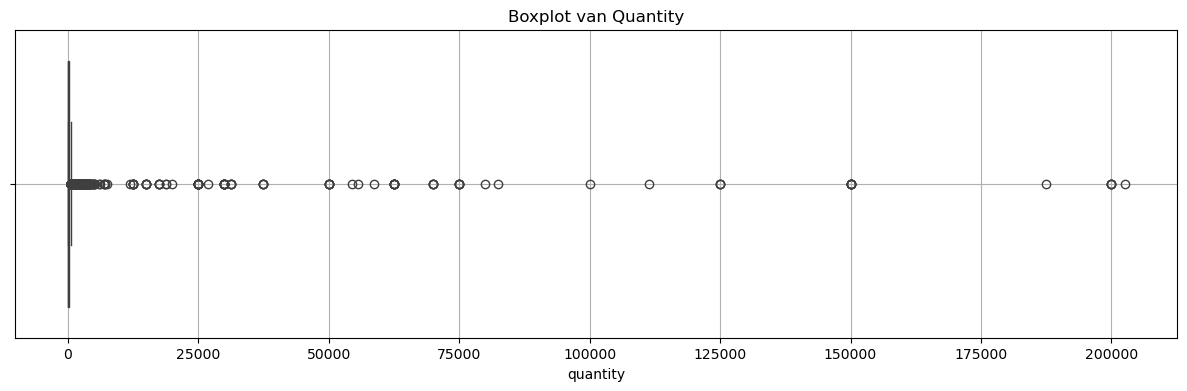

In [183]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind

ingr_schoon=pd.read_csv('tabellen/data_ingr_clean.csv') 
recepten=pd.read_csv('tabellen/data_recipes.csv') 
plt.figure(figsize=(15,4))
sns.boxplot(x=ingr_schoon['quantity'])
plt.title('Boxplot van Quantity')
plt.xlabel('quantity')
plt.grid()
plt.show()


In [184]:
gr_dan =  ingr_schoon.copy()[(ingr_schoon["quantity"] > 10000)]
meest_voorkomend = gr_dan["ingredient"].value_counts().index.tolist()
tabel_ds= gr_dan.loc[gr_dan['ingredient'].isin(meest_voorkomend)]
gr_dan

,Unnamed: 0,recipe,ingredient,quantity,unit
1337,1772,Vijgenchutney,bruinebasterdsuiker,25000.0,g
1338,1773,Vijgenchutney,balsamicoazijn,25000.0,g
1502,1958,Zomerse kruidencocktail,bruinerum,30000.0,g
2909,3790,Gin vlierbloesem-limoen fizz,bruisendmineraalwatermunt,62500.0,g
3739,4918,Fish and chips,azijn,25000.0,g
...,...,...,...,...,...
46837,67824,Broccoligratin met karbonade,broccoli,150000.0,g
47243,68361,Grapefruit-bosvruchtensmoothie,bosvruchtensorbetijs,62500.0,g
47967,69265,Risotto champignons met ham,bospaddenstoelenbouillonvantablet,200000.0,g
49352,71194,Frietje Vlaamse stoof,bruinbier,75000.0,g


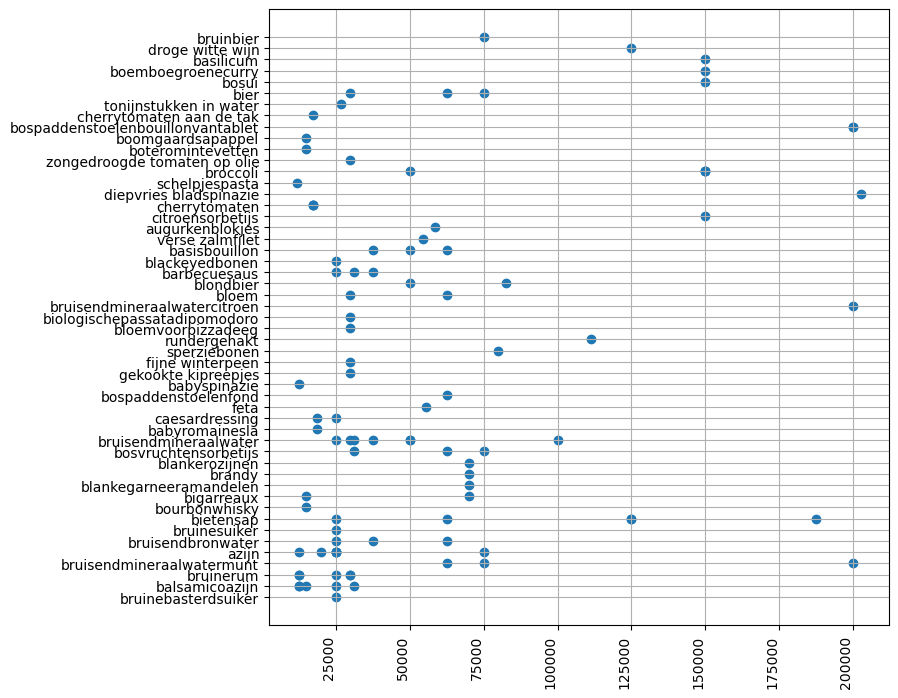

In [185]:
plt.figure(figsize=(8,8))
plt.scatter(tabel_ds['quantity'], tabel_ds['ingredient'])
plt.xticks(rotation = 90, ha='right')
plt.grid()
plt.show()

In [1]:
for i in gr_dan['ingredient']:   
    median_i = ingr_schoon['quantity'].loc[ingr_schoon['ingredient']== i].median() #De hoeveelheden van ingredienten > 10k overzetten naar mediaan van ingredient
    gr_dan['quantity'].mask(gr_dan['ingredient'] == i, median_i, inplace=True)
       
gr_dan

NameError: name 'gr_dan' is not defined

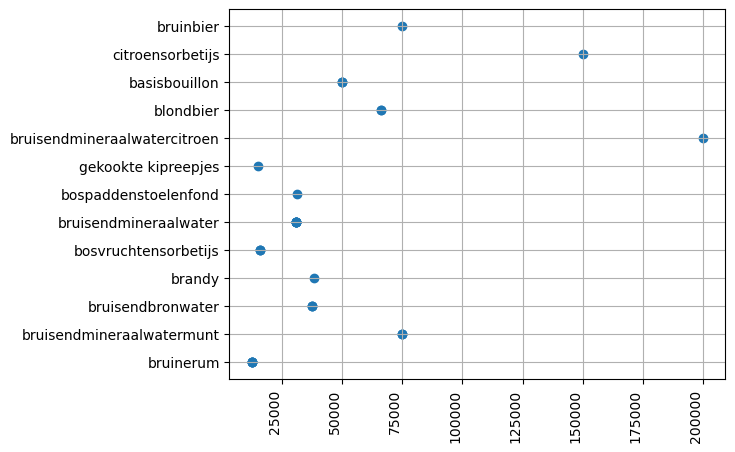

In [187]:
gr_dan_plot = gr_dan[(gr_dan["quantity"] > 10000)]
meest_voorkomend = gr_dan_plot["ingredient"].value_counts().index.tolist()
tabel_ds= gr_dan_plot.loc[gr_dan_plot['ingredient'].isin(meest_voorkomend)] #Kijken welke ingredienten ondanks mediaan toch nog boven 10k zitten
plt.scatter(tabel_ds['quantity'], tabel_ds['ingredient'])
plt.xticks(rotation = 90, ha='right')
plt.grid()
plt.show()

In [188]:
for i in gr_dan['ingredient']:
    quantity_i = gr_dan['quantity'].loc[gr_dan['ingredient']== i]
    ingr_schoon['quantity'].mask(ingr_schoon['ingredient'] == i, quantity_i, inplace=True)
    
ingr_schoon.iloc[5252]
gr_dan2 =  ingr_schoon.copy()[(ingr_schoon["quantity"] > 10000)]
meest_voorkomend = gr_dan2["ingredient"].value_counts().index.tolist()
tabel_ds= gr_dan2.loc[gr_dan2['ingredient'].isin(meest_voorkomend)]
gr_dan2 #Tabel gemaakt van ingredienten die nogsteeds groter dan 10k zijn

,Unnamed: 0,recipe,ingredient,quantity,unit
1502,1958,Zomerse kruidencocktail,bruinerum,12500.0,g
2909,3790,Gin vlierbloesem-limoen fizz,bruisendmineraalwatermunt,75000.0,g
3742,4921,Fish and chips,bruisendbronwater,37500.0,g
5181,6711,Dark and stormy,bruinerum,12500.0,g
5254,6799,Christmascake,brandy,38125.0,g
5617,7202,Spoom alcoholvrij,bosvruchtensorbetijs,15750.0,g
5618,7203,Spoom alcoholvrij,bruisendmineraalwatermunt,75000.0,g
7655,9761,Limoncello spritz,bruisendmineraalwater,30625.0,g
7661,9767,Mojito strawberry,bruisendmineraalwater,30625.0,g
10376,13316,Varkenshaas champignon-roomsaus,bospaddenstoelenfond,31375.0,g


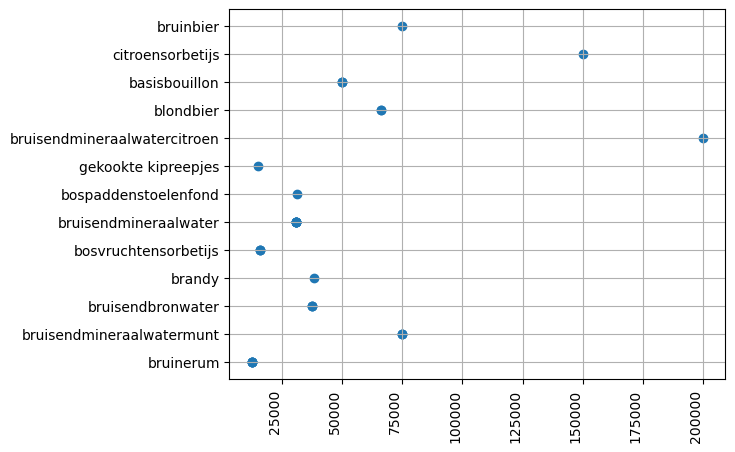

In [189]:
plt.scatter(tabel_ds['quantity'], tabel_ds['ingredient'])
plt.xticks(rotation = 90, ha='right')
plt.grid()
plt.show()

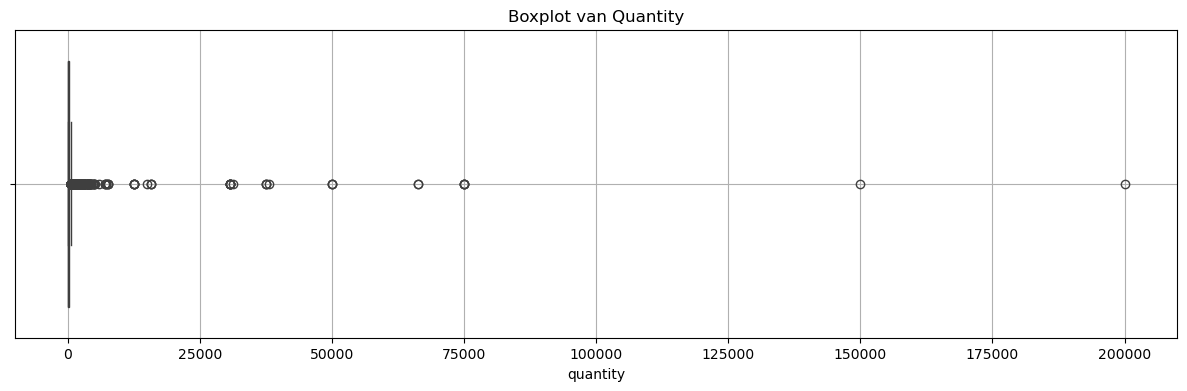

In [190]:
plt.figure(figsize=(15,4))
sns.boxplot(x=ingr_schoon['quantity'])
plt.title('Boxplot van Quantity')
plt.xlabel('quantity')
plt.grid()
plt.show()

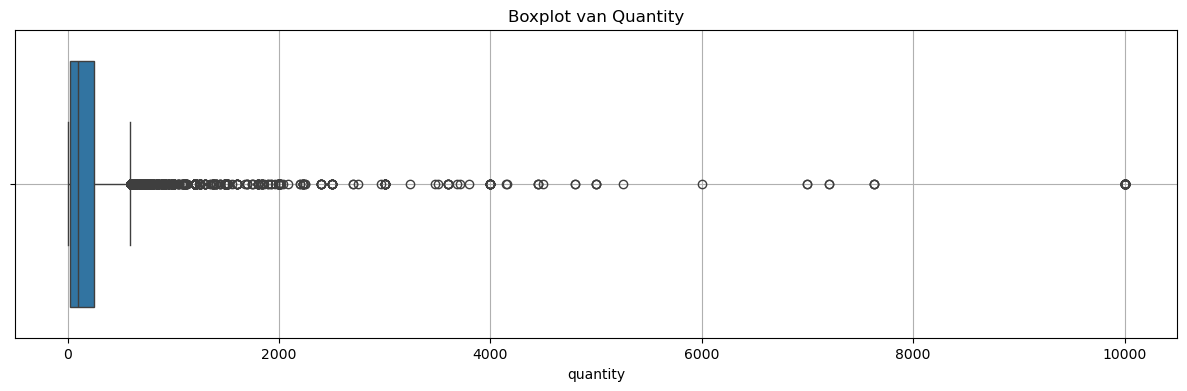

In [191]:
gr_dan3 = ingr_schoon.copy()[(ingr_schoon["quantity"] > 10000)]
for i in gr_dan3['ingredient']:
    ingr_schoon['quantity'].mask(ingr_schoon['ingredient'] == i, 10000, inplace=True) #Ingredienten > 10k vervangen door 10k

ingr_schoon
plt.figure(figsize=(15,4))
sns.boxplot(x=ingr_schoon['quantity'])
plt.title('Boxplot van Quantity')
plt.xlabel('quantity')
plt.grid()
plt.show()

## Hypothesetoetsen
formuleer een vermoeden en bijbehorende hypothesen waarin de extra eis verwerkt is en toets het vermoeden aan de hand van de dataset. Bijvoorbeeld: over bepaalde keukens bestaan vooroordelen. Zo zou de Franse keuken veel gerechten met knoflook bevatten. Als jullie extra eis met knoflook te maken heeft zou je dus kunnen toetsen of de Franse keuken inderdaad vaker knoflook bevat dan gemiddeld.

- Denk na over een bepaalde groep recepten (een keuken, of gebruik de tags) en formuleer hier een vermoeden over.
- Zorg er daarbij voor dat je dat vermoeden op basis van de gegevens over die recepten kunt toetsen. Denk daarbij vooral aan de nutriënten of ingrediënten (in relatie met jullie extra eis).
- Formuleer dit vermoeden in de vorm van een hypothese en toets deze hypothese.

**Ons vermoeden:**
De Amerikaanse keuken bevat meer calorieën dan de Hollandse keuken.

**Onze hypothese:**  
A = de gemiddelde hoeveelheid calorieën in de Amerikaanse keuken  
H = de gemiddelde hoeveelheid calorieën in de Hollandse keuken

H_0: A <= H vs. H_1: A > H 

**Gekozen significantieniveau** 
a= 0.05

In [356]:
tags = pd.read_csv('tabellen/data_tags.csv')
nutri = pd.read_csv('tabellen/data_nutritions.csv') 

amerikaans = tags[(tags['tag'] == 'amerikaans')]
hollands = tags[(tags['tag'] == 'hollands')]

#Tabel maken van ingredienten met de tags, de nutrition energie, en de waarde ervan
nutri_a = nutri[nutri['recipe'].isin(amerikaans['recipe'])]
nutri_h = nutri[nutri['recipe'].isin(hollands['recipe'])]

cal_a = nutri_a['value'].loc[nutri_a['nutrition']=='energie'].tolist()
cal_h = nutri_h['value'].loc[nutri_h['nutrition']=='energie'].tolist()  

h = nutri_h[(nutri_h['nutrition']=='energie')] 
h['value'].describe()
a= nutri_a[(nutri_a['nutrition']=='energie')]  
a 
h

,Unnamed: 0,recipe,nutrition,value
0,0,Kruidnoten met choco-discodip,energie,260 kcal
8,8,Kruidnoten in marsepein,energie,265 kcal
16,16,Kruidnoten met chocodips,energie,335 kcal
24,24,Pepernotentaart met marsepeinstrik,energie,560 kcal
64,87,Bloemkoolschotel,energie,765 kcal
...,...,...,...,...
40532,58270,Bietenstamppot met spek en appel,energie,595 kcal
40568,58310,Hollands draadjesvlees,energie,525 kcal
40579,58321,Kaasplank met zilveruitjes,energie,210 kcal
40830,58625,Appeljachtschotel,energie,605 kcal


In [2]:
tags=pd.read_csv('tabellen/data_tags.csv')
tags[tags['tag']=='hollands'] 


NameError: name 'pd' is not defined

In [3]:
a= [int(i[0:-5]) for i in cal_a]  #Kcal verwijderen zodat het int wordt ipv string
h = [int(i[0:-5]) for i in cal_h]   

df_a = pd.DataFrame({'col':a}) 
df_h = pd.DataFrame({'col':h})  

df_a['group'] = 'Amerikaans'
df_h['group'] = 'Hollands'

combined_df = pd.concat([df_a, df_h])
sns.boxplot(x='group', y='col', data=combined_df)
plt.show()

NameError: name 'cal_a' is not defined

In [334]:
ttest_ind(df_a['col'], df_h['col'], equal_var=True) #Ttest van calorien hollands vs amerikaans


TtestResult(statistic=-27.367102354454833, pvalue=3.27471709436585e-119, df=863.0)

**Conclusie**
Uit de t-test volgt een p-waarde, die groter is dan het gekozen significantieniveau. Dit houdt in dat de nulhypothese behouden blijft, dus ons vermoeden niet klopt.

## Regressie Analyse



De nutrient waar we rekening mee zullen houden in onze analyse is: koolhydraten. Koolhydraten dragen bij aan onze eis: "het tellen van caloriën", omdat we vermoeden dat het van alle nutriënten het meest invloed heeft op het aantal caloriën.  


In [335]:
tags=pd.read_csv('tabellen/data_tags.csv') 
tags

,Unnamed: 0,recipe,tag
0,0,Kruidnoten met choco-discodip,hollands
1,1,Kruidnoten met choco-discodip,gebak
2,2,Kruidnoten met choco-discodip,gebak
3,3,Kruidnoten met choco-discodip,sinterklaas
4,4,Kruidnoten met choco-discodip,sinterklaasavond
...,...,...,...
32309,46030,Ceviche met sint-jakobsschelpen,voorgerecht
32310,46036,Biefstuk met rodewijnsaus en ham,snel
32311,46037,Biefstuk met rodewijnsaus en ham,mediterraan
32312,46038,Biefstuk met rodewijnsaus en ham,hoofdgerecht


In [336]:
tags_gebak = tags[(tags['tag'] == 'gebak')] 
tags_gebak 


,Unnamed: 0,recipe,tag
1,1,Kruidnoten met choco-discodip,gebak
2,2,Kruidnoten met choco-discodip,gebak
6,6,Kruidnoten in marsepein,gebak
7,7,Kruidnoten in marsepein,gebak
11,11,Kruidnoten met chocodips,gebak
...,...,...,...
32117,45759,Bessensandwiches,gebak
32118,45760,Bessensandwiches,gebak
32140,45790,Pecan pie,gebak
32141,45791,Pecan pie,gebak


In [337]:
gebak_i = ingr_schoon[ingr_schoon['recipe'].isin(tags_gebak['recipe'])] 
a= gebak_i.ingredient.value_counts()  


In [338]:
recepten_tbs =gebak_i[(gebak_i['ingredient'] == 'tarwebloem') | (gebak_i['ingredient'] == 'fijne kristalsuiker') | (gebak_i['ingredient'] == 'bakpoeder')]  
recepten_tbs


,Unnamed: 0,recipe,ingredient,quantity,unit
17,17,Pepernotentaart met marsepeinstrik,tarwebloem,200.0,g
18,18,Pepernotentaart met marsepeinstrik,bakpoeder,500.0,g
25,25,Perencake,fijne kristalsuiker,200.0,g
28,28,Perencake,tarwebloem,250.0,g
29,29,Perencake,bakpoeder,500.0,g
...,...,...,...,...,...
48200,69579,Citroen-amandelcake,bakpoeder,250.0,g
48817,70387,Berry-cherry-brownies,tarwebloem,100.0,g
48845,70425,Apfelstrudel,tarwebloem,200.0,g
49078,70804,Witte - &amp; pure chocolade-letterkoekjes,bakpoeder,500.0,g


In [339]:
aantal_personen = recepten[recepten['title'].isin(recepten_tbs['recipe'])]  
aantal_personen[:5]

,Unnamed: 0,title,persons,time,calories,stars,url,image
3,0,Pepernotentaart met marsepeinstrik,10,30,560,0,https://www.ah.nl/allerhande/recept/R-R1195887...,https://static.ah.nl/static/recepten/img_RAM_P...
4,0,Perencake,12,10,265,0,https://www.ah.nl/allerhande/recept/R-R1195790...,https://static.ah.nl/static/recepten/img_RAM_P...
7,0,Appelkruimeltaart,12,30,435,0,https://www.ah.nl/allerhande/recept/R-R1195784...,https://static.ah.nl/static/recepten/img_RAM_P...
26,0,Koffie-chocoladecake met kardamom,8,20,530,0,https://www.ah.nl/allerhande/recept/R-R1195718...,https://static.ah.nl/static/recepten/img_RAM_P...
33,0,Pompoencheesecake met speculaas,12,20,360,0,https://www.ah.nl/allerhande/recept/R-R1195709...,https://static.ah.nl/static/recepten/img_RAM_P...


In [340]:
ingredienten_tbs = ingr_schoon[ingr_schoon['recipe'].isin(recepten_tbs['recipe'])] 
ingredienten_tbs = ingredienten_tbs.reset_index()
ingredienten_tbs

,index,Unnamed: 0,recipe,ingredient,quantity,unit
0,12,12,Pepernotentaart met marsepeinstrik,ongezouten roomboter,350.0,g
1,13,13,Pepernotentaart met marsepeinstrik,witte basterdsuiker,100.0,g
2,14,14,Pepernotentaart met marsepeinstrik,vanille-extract,4.0,g
3,15,15,Pepernotentaart met marsepeinstrik,zout,2.0,g
4,16,16,Pepernotentaart met marsepeinstrik,middelgroot ei,180.0,g
...,...,...,...,...,...,...
2562,49217,71033,Koekjes met 2 soorten jam,bloem,NaN,g
2563,49218,71034,Koekjes met 2 soorten jam,bakpoeder,250.0,g
2564,49219,71035,Koekjes met 2 soorten jam,ei,50.0,g
2565,49220,71036,Koekjes met 2 soorten jam,frambozenjam,36.0,g


In [341]:
hvl_pp = []

for i in aantal_personen['title']:
    personen = aantal_personen['persons'].loc[aantal_personen['title']==i]
    hoeveelheid = ingredienten_tbs['quantity'].loc[ingredienten_tbs['recipe']==i]

    for j in hoeveelheid:
        #print(j/personen)
        hvl_pp.append(j/personen)
 
hvl_pp
hoeveelheden = [round(float(rij.iloc[0]),1) for rij in hvl_pp]    
hoeveelheden_df = pd.DataFrame(hoeveelheden, columns=['quantity_1'])
hoeveelheden_df
ingr_pp = ingredienten_tbs.merge(hoeveelheden_df, how='left',left_index=True, right_index=True)
ingr_pp['quantity'] = ingr_pp['quantity_1']
ingr_pp.drop(columns=['quantity_1'], inplace=True)
ingr_pp


,index,Unnamed: 0,recipe,ingredient,quantity,unit
0,12,12,Pepernotentaart met marsepeinstrik,ongezouten roomboter,35.0,g
1,13,13,Pepernotentaart met marsepeinstrik,witte basterdsuiker,10.0,g
2,14,14,Pepernotentaart met marsepeinstrik,vanille-extract,0.4,g
3,15,15,Pepernotentaart met marsepeinstrik,zout,0.2,g
4,16,16,Pepernotentaart met marsepeinstrik,middelgroot ei,18.0,g
...,...,...,...,...,...,...
2562,49217,71033,Koekjes met 2 soorten jam,bloem,NaN,g
2563,49218,71034,Koekjes met 2 soorten jam,bakpoeder,20.8,g
2564,49219,71035,Koekjes met 2 soorten jam,ei,4.2,g
2565,49220,71036,Koekjes met 2 soorten jam,frambozenjam,3.0,g


In [342]:
ingr_pp['bakpoeder'] = (ingr_pp['ingredient'] == 'bakpoeder').astype(int)
ingr_pp['tarwebloem'] = (ingr_pp['ingredient'] == 'tarwebloem').astype(int)
ingr_pp['fijne kristalsuiker'] = (ingr_pp['ingredient'] == 'fijne kristalsuiker').astype(int)
ingr_pp

,index,Unnamed: 0,recipe,ingredient,quantity,unit,bakpoeder,tarwebloem,fijne kristalsuiker
0,12,12,Pepernotentaart met marsepeinstrik,ongezouten roomboter,35.0,g,0,0,0
1,13,13,Pepernotentaart met marsepeinstrik,witte basterdsuiker,10.0,g,0,0,0
2,14,14,Pepernotentaart met marsepeinstrik,vanille-extract,0.4,g,0,0,0
3,15,15,Pepernotentaart met marsepeinstrik,zout,0.2,g,0,0,0
4,16,16,Pepernotentaart met marsepeinstrik,middelgroot ei,18.0,g,0,0,0
...,...,...,...,...,...,...,...,...,...
2562,49217,71033,Koekjes met 2 soorten jam,bloem,NaN,g,0,0,0
2563,49218,71034,Koekjes met 2 soorten jam,bakpoeder,20.8,g,1,0,0
2564,49219,71035,Koekjes met 2 soorten jam,ei,4.2,g,0,0,0
2565,49220,71036,Koekjes met 2 soorten jam,frambozenjam,3.0,g,0,0,0


In [343]:
ingr_pp['bakpoeder'] = (ingr_pp['bakpoeder'] * ingr_pp['quantity'])
ingr_pp['tarwebloem'] = (ingr_pp['tarwebloem'] * ingr_pp['quantity'])
ingr_pp['fijne kristalsuiker'] = (ingr_pp['fijne kristalsuiker'] * ingr_pp['quantity'])
ingr_pp

,index,Unnamed: 0,recipe,ingredient,quantity,unit,bakpoeder,tarwebloem,fijne kristalsuiker
0,12,12,Pepernotentaart met marsepeinstrik,ongezouten roomboter,35.0,g,0.0,0.0,0.0
1,13,13,Pepernotentaart met marsepeinstrik,witte basterdsuiker,10.0,g,0.0,0.0,0.0
2,14,14,Pepernotentaart met marsepeinstrik,vanille-extract,0.4,g,0.0,0.0,0.0
3,15,15,Pepernotentaart met marsepeinstrik,zout,0.2,g,0.0,0.0,0.0
4,16,16,Pepernotentaart met marsepeinstrik,middelgroot ei,18.0,g,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2562,49217,71033,Koekjes met 2 soorten jam,bloem,NaN,g,NaN,NaN,NaN
2563,49218,71034,Koekjes met 2 soorten jam,bakpoeder,20.8,g,20.8,0.0,0.0
2564,49219,71035,Koekjes met 2 soorten jam,ei,4.2,g,0.0,0.0,0.0
2565,49220,71036,Koekjes met 2 soorten jam,frambozenjam,3.0,g,0.0,0.0,0.0


In [344]:
ingr_pp = ingr_pp[(ingr_pp['ingredient'] == 'tarwebloem') | (ingr_pp['ingredient'] == 'fijne kristalsuiker') | (ingr_pp['ingredient'] == 'bakpoeder')]  
ingr_pp

,index,Unnamed: 0,recipe,ingredient,quantity,unit,bakpoeder,tarwebloem,fijne kristalsuiker
5,17,17,Pepernotentaart met marsepeinstrik,tarwebloem,20.0,g,0.0,20.0,0.0
6,18,18,Pepernotentaart met marsepeinstrik,bakpoeder,50.0,g,50.0,0.0,0.0
13,25,25,Perencake,fijne kristalsuiker,16.7,g,0.0,0.0,16.7
16,28,28,Perencake,tarwebloem,20.8,g,0.0,20.8,0.0
17,29,29,Perencake,bakpoeder,41.7,g,41.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2525,48200,69579,Citroen-amandelcake,bakpoeder,25.0,g,25.0,0.0,0.0
2533,48817,70387,Berry-cherry-brownies,tarwebloem,6.2,g,0.0,6.2,0.0
2537,48845,70425,Apfelstrudel,tarwebloem,25.0,g,0.0,25.0,0.0
2554,49078,70804,Witte - &amp; pure chocolade-letterkoekjes,bakpoeder,20.0,g,20.0,0.0,0.0


In [345]:
nutri_recepten = nutri[nutri['recipe'].isin(ingr_pp['recipe'])]  

In [346]:
agg_functions = {'index': 'first', 'bakpoeder': 'sum', 'tarwebloem': 'sum', 'fijne kristalsuiker': 'sum'}
ingrpp_new = ingr_pp.groupby(ingr_pp['recipe']).aggregate(agg_functions)
ingrpp_new

,index,bakpoeder,tarwebloem,fijne kristalsuiker
recipe,,,,
5 spices kerstfiguurtjes,29165,10.0,7.0,3.5
Aardbeienfeesttaart,16969,0.0,25.0,1.2
Aardbeienkwarkcake,37004,20.8,0.0,10.4
Aardbeientaartjes met mascarpone,36296,187.5,37.5,31.2
Ananascrumble met kokos en limoen,13966,0.0,30.8,0.0
...,...,...,...,...
Zoet pompoenbrood,6764,1.3,0.0,0.0
Zoete-aardappelcake,23702,20.8,0.0,0.0
Zomerse fruittiramisu,45005,0.0,0.0,15.6


In [347]:
recepten_koolhydraten = nutri_recepten[(nutri_recepten['nutrition'] == 'koolhydraten')] 
recepten_koolhydraten

,Unnamed: 0,recipe,nutrition,value
25,25,Pepernotentaart met marsepeinstrik,koolhydraten,60 g
33,33,Perencake,koolhydraten,36 g
57,80,Appelkruimeltaart,koolhydraten,61 g
209,304,Koffie-chocoladecake met kardamom,koolhydraten,42 g
261,372,Pompoencheesecake met speculaas,koolhydraten,24 g
...,...,...,...,...
39735,57181,Citroen-amandelcake,koolhydraten,36 g
40209,57775,Berry-cherry-brownies,koolhydraten,32 g
40242,57819,Apfelstrudel,koolhydraten,50 g
40387,58044,Witte - &amp; pure chocolade-letterkoekjes,koolhydraten,8 g


In [348]:
ingr_plusk = ingrpp_new.merge(recepten_koolhydraten, how='left', left_on = 'recipe', right_on = 'recipe')
# ingr_pp['quantity'] = ingr_pp['quantity_1']
# ingr_pp.drop(columns=['quantity_1'], inplace=True)
# ingr_pp

In [349]:
ingr_plusk.drop(columns=['Unnamed: 0', 'nutrition', 'index'], inplace = True) 
ingr_plusk

,recipe,bakpoeder,tarwebloem,fijne kristalsuiker,value
0,5 spices kerstfiguurtjes,10.0,7.0,3.5,13 g
1,Aardbeienfeesttaart,0.0,25.0,1.2,40 g
2,Aardbeienkwarkcake,20.8,0.0,10.4,29 g
3,Aardbeientaartjes met mascarpone,187.5,37.5,31.2,76 g
4,Ananascrumble met kokos en limoen,0.0,30.8,0.0,57 g
...,...,...,...,...,...
268,Zoet pompoenbrood,1.3,0.0,0.0,24 g
269,Zoete-aardappelcake,20.8,0.0,0.0,55 g
270,Zomerse fruittiramisu,0.0,0.0,15.6,35 g
271,Zomerse sinaasappel-aardbeitiramisu,0.0,0.0,6.0,28 g


In [350]:
koolhy = ingr_plusk['value'].tolist()
k = [int(i[0:-1]) for i in koolhy]  
waarde_koolhy = pd.DataFrame({'koolhydraten':k})

ingr_alles = ingr_plusk.merge(waarde_koolhy, how='left', left_index = True , right_index = True )

ingr_alles.drop(columns=['value'], inplace = True)  

ingr_alles

,recipe,bakpoeder,tarwebloem,fijne kristalsuiker,koolhydraten
0,5 spices kerstfiguurtjes,10.0,7.0,3.5,13
1,Aardbeienfeesttaart,0.0,25.0,1.2,40
2,Aardbeienkwarkcake,20.8,0.0,10.4,29
3,Aardbeientaartjes met mascarpone,187.5,37.5,31.2,76
4,Ananascrumble met kokos en limoen,0.0,30.8,0.0,57
...,...,...,...,...,...
268,Zoet pompoenbrood,1.3,0.0,0.0,24
269,Zoete-aardappelcake,20.8,0.0,0.0,55
270,Zomerse fruittiramisu,0.0,0.0,15.6,35
271,Zomerse sinaasappel-aardbeitiramisu,0.0,0.0,6.0,28


In [ ]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "id": "e44fb2da-54ed-466b-a5e1-31f24d3bdce4",
   "metadata": {},
   "source": [
    "## Dataverkenning "
   ]
  },
  {
   "cell_type": "markdown",
   "id": "fee66f62-24f9-4da7-a36f-8c593bd6bf4a",
   "metadata": {},
   "source": [
    "Bedenk dat de recepten niet allemaal voor evenveel personen zijn en dat de nutriënten wel per persoon zijn.\n",
    "\n",
    "Overtuig je ervan dat er geen fouten meer in de data zitten. Dit kan o.a. door gebruik te maken van visualisaties.\n",
    "Beschrijf of je fouten (of uitbijters) hebt gevonden en geef aan hoe je dat hebt opgelost (gecorrigeerd of buiten beschouwing gelaten of iets anders)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 98,
   "id": "06f5fb7c-8ebe-4478-be10-1c923c5a7540",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABKMAAAGHCAYAAABs/5GWAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAA+hklEQVR4nO3deZQV5Zk/8KeBptlbWZtFwQ03UBGMW0ZQDLKpiZpIRAW3GVBc4jLKEIMxMiSTcZufohERdNwTERXccEETBeUoikpcw6IiYBAakK1p6vcH09e+dDebUN02n885nNNd9Vbd97713LrVX2rJSZIkCQAAAABIQY3K7gAAAAAAOw9hFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFADsJMaNGxc5OTlZ/5o1axbdunWLiRMnVnb3Mtq1axcDBw7c6uVWrlwZ1113XUyZMmW79ylNf//732PgwIGx++67R15eXjRr1iz69u0bzz//fGV3Lcumxruk1ubMmZOZ9uCDD8Ytt9ySWv8AgKpLGAUAO5mxY8fG1KlT4/XXX4+77roratasGSeeeGI89dRTld2172XlypXx29/+9gcdRo0fPz46deoUb775Zlx77bUxefLkGDVqVKxfvz5OOOGEuPbaayu7ixmbGu8+ffrE1KlTo2XLlplpwigAoEStyu4AAJCuDh06RJcuXTK/9+zZM3bdddd46KGH4sQTT6zEnu3cPvvsszjrrLOiY8eOMWXKlKhfv35m3s9//vMYPHhw3HDDDXHooYfGz372s0rs6eY1a9YsmjVrVtndAACqKGdGAcBOrk6dOlG7du3Izc3Nmv7NN9/EhRdeGK1bt47atWvHnnvuGcOGDYs1a9ZERMTq1aujU6dOsffee0dhYWFmuQULFkRBQUF069YtiouLIyJi4MCB0aBBg/jggw+ie/fuUb9+/WjWrFkMGTIkVq5cudk+zps3L84888xo3rx55OXlxf777x833nhjrF+/PiIi5syZkwk/fvvb32YuQ6zocr+vv/46ateuXe6ZRh9++GHk5OTE//zP/2TaXnjhhXHAAQdEgwYNonnz5nHcccfFX//616zl5syZEzk5OfHf//3fcdNNN8Uee+wRDRo0iCOPPDKmTZu22fd48803x8qVK+P//b//lxVElbjxxhtjl112id/97neZadddd13k5OSUaVveZXKPPPJI9OjRI1q2bBl169aN/fffP6655pr49ttvs5Yt2Vaffvpp9O7dOxo0aBC77bZbXHHFFZltv7nx3vj1u3XrFpMmTYq5c+dmXSaaJEnss88+ccIJJ5R5DytWrIj8/Py46KKLNjt2AMAPizAKAHYyxcXFsW7duigqKoovvvgiLrvssvj222/jjDPOyLRZvXp1HHvssXHffffF5ZdfHpMmTYozzzwz/uu//itOOeWUiNgQYj366KOxaNGiOPfccyMiYv369dG/f/9IkiQeeuihqFmzZmadRUVF0bt37+jevXtMmDAhhgwZEn/605/i9NNP32R/v/766zjqqKPi+eefj9/97nfx5JNPxvHHHx9XXnllDBkyJCIiWrZsGc8++2xERJx33nkxderUmDp1aoWXtZXch+nee+/NBFolxo4dG7Vr147+/ftHxIZQLiJi+PDhMWnSpBg7dmzsueee0a1bt3IvUbv99ttj8uTJccstt8QDDzwQ3377bfTu3TsrsCvP5MmTo0WLFnHEEUeUO79evXrRo0ePmDFjRixatGiT6yrPJ598Er17944xY8bEs88+G5dddlk8+uij5Z4NV1RUFCeddFJ07949nnjiiTj33HPj5ptvjj/84Q8RsfXjPWrUqDj66KOjoKAg03bq1KmRk5MTF198cUyePDk++eSTrGXuu+++WLZsmTAKAKqjBADYKYwdOzaJiDL/8vLyklGjRmW1vfPOO5OISB599NGs6X/4wx+SiEief/75zLRHHnkkiYjklltuSX7zm98kNWrUyJqfJEkyYMCAJCKSW2+9NWv6iBEjkohI/va3v2WmtW3bNhkwYEDm92uuuSaJiOSNN97IWnbw4MFJTk5O8tFHHyVJkiRff/11EhHJ8OHDt2g8nnzyyTLvZd26dUmrVq2SU089tcLl1q1blxQVFSXdu3dPfvazn2Wmz549O4mIpGPHjsm6desy0998880kIpKHHnpok/2pU6dOcsQRR2yyzdVXX51ERDJ9+vQkSZJk+PDhSXmHcyXbevbs2eWuZ/369UlRUVHyyiuvJBGRvPvuu5l5Jdtq423fu3fvZN999838vqnxLu/1+/Tpk7Rt27ZM22XLliUNGzZMLr300qzpBxxwQHLssceW238A4IfNmVEAsJO57777Yvr06TF9+vR45plnYsCAAXHRRRfFbbfdlmnz0ksvRf369eO0007LWrbkMqwXX3wxM+0Xv/hFDB48OK666qq44YYb4j/+4z/iJz/5SbmvXXK2UYmSs7FefvnlCvv70ksvxQEHHBA/+tGPyvQlSZJ46aWXNv+my9GrV68oKCiIsWPHZqY999xzMX/+/MyZXiXuvPPOOPTQQ6NOnTpRq1atyM3NjRdffDH+/ve/l1lvnz59ss4IO+iggyIiYu7cudvUz9KSJImIKPfSvM35xz/+EWeccUYUFBREzZo1Izc3N7p27RoRUeZ95OTklDlj6qCDDtou72FjDRs2jHPOOSfGjRuXuWTwpZdeilmzZmXOfAMAqhdhFADsZPbff//o0qVLdOnSJXr27Bl/+tOfokePHvHv//7vsXTp0oiIWLx4cRQUFJQJPZo3bx61atWKxYsXZ00/99xzo6ioKGrVqhWXXHJJua9bq1ataNKkSda0goKCzOtVZPHixVlPZSvRqlWrzS67KbVq1YqzzjorHn/88cz7HjduXLRs2TLrHkY33XRTDB48OA4//PB47LHHYtq0aTF9+vTo2bNnrFq1qsx6N36PeXl5ERHlti1t9913j9mzZ2+yTck9mHbbbbfNvb0sK1asiH/5l3+JN954I2644YaYMmVKTJ8+PcaPH19u3+rVqxd16tTJmpaXlxerV6/eqtfdUhdffHEsX748HnjggYiIuO2226JNmzZx8skn75DXAwAqlzAKAIiDDjooVq1aFR9//HFEbAhUFi5cmDkTp8SiRYti3bp10bRp08y0b7/9Ns4666xo37591K1bN84///xyX2PdunVlgqMFCxZkXq8iTZo0ia+++qrM9Pnz50dEZPVla51zzjmxevXqePjhh2PJkiXx5JNPxtlnn511ZtP9998f3bp1izvuuCP69OkThx9+eHTp0iWWL1++za9bnh49esTChQsrvNn5ypUrY/LkyXHggQdG8+bNIyIygVHJjcVL/POf/8z6/aWXXor58+fHPffcE+eff34cc8wx0aVLl2jYsOF2fQ/bau+9945evXrF7bffHp9//nk8+eSTMWjQoKztAABUH8IoACDeeeediIjME9K6d+8eK1asiAkTJmS1u++++zLzSwwaNCjmzZsX48ePjzFjxsSTTz4ZN998c7mvU3LmS4kHH3wwIjY8ba0i3bt3j1mzZsXbb79dpi85OTlx7LHHRsSWn4FU2v777x+HH354jB07Nh588MFYs2ZNnHPOOVltcnJyMusuMXPmzJg6deoWv86WuOyyy6JevXpx8cUXl3nCXUTElVdeGUuWLInLLrssM61du3aZ/pT21FNPZf1ecobbxu/jT3/60zb3d2vHOy8vb5NtL7300pg5c2YMGDAgatasGRdccME29w0AqNpqVXYHAIB0vf/++7Fu3bqI2HCJ2/jx42Py5Mnxs5/9LPbYY4+IiDj77LPj9ttvjwEDBsScOXOiY8eO8be//S3+8z//M3r37h3HH398RETcfffdcf/998fYsWPjwAMPjAMPPDCGDBkSV199dRx99NFZ93mqXbt23HjjjbFixYo47LDD4vXXX48bbrghevXqFT/+8Y8r7O+vfvWruO+++6JPnz5x/fXXR9u2bWPSpEkxatSoGDx4cLRv3z4iNtx7qG3btvHEE09E9+7do3HjxtG0adNMYFORc889N/7t3/4t5s+fH0cddVTsu+++WfP79u0bv/vd72L48OHRtWvX+Oijj+L666+PPfbYIzOO28Nee+0V9913X/Tv3z8OO+ywuPzyy2PfffeNhQsXxj333BPPPPNMnHPOOVlnnvXu3TsaN24c5513Xlx//fVRq1atGDduXHz++edZ6z7qqKNi1113jUGDBsXw4cMjNzc3HnjggXj33Xe3ub9bO94dO3aM8ePHxx133BGdO3eOGjVqRJcuXTLzf/KTn8QBBxwQL7/8cpx55pmZs78AgGqokm+gDgCkpLyn6eXn5yeHHHJIctNNNyWrV6/Oar948eJk0KBBScuWLZNatWolbdu2TYYOHZppN3PmzKRu3bpZT75LkiRZvXp10rlz56Rdu3bJkiVLkiTZ8IS2+vXrJzNnzky6deuW1K1bN2ncuHEyePDgZMWKFVnLb/w0vSRJkrlz5yZnnHFG0qRJkyQ3NzfZd999kz/+8Y9JcXFxVrsXXngh6dSpU5KXl5dERJn1lKewsDCpW7duEhHJ6NGjy8xfs2ZNcuWVVyatW7dO6tSpkxx66KHJhAkTkgEDBmQ9Ha7kaXp//OMfy6wjtuIpf++//35y9tlnJ23atElq1aqVRESSk5OTjBkzptz2b775ZnLUUUcl9evXT1q3bp0MHz48ufvuu8s8ze71119PjjzyyKRevXpJs2bNkvPPPz95++23k4hIxo4dm2lXsq02Vt6T+yoa7/KepvfNN98kp512WrLLLrskOTk55T4F8LrrrksiIpk2bdoWjRUA8MOUkyQb3QwCAGA7GzhwYPzlL3+JFStWVHZXfnBefPHF6N27d5xyyinxwAMPRI0a1fcuC126dImcnJyYPn16ZXcFANiBXKYHAFCFde/ePcaNGxf9+/eP+vXrx+jRo8s85fCHbNmyZfH+++/HxIkT46233orHH3+8srsEAOxgwigAgCrul7/8Zfzyl7+s7G7sEG+//XYce+yx0aRJkxg+fHj89Kc/rewuAQA7mMv0AAAAAEhN9b3pAAAAAABVjjAKAAAAgNQIowAAAABIzTbfwHz9+vUxf/78aNiwYbV6ogsAAAAAWydJkli+fHm0atUqatTY9LlP2xxGzZ8/P3bbbbdtXRwAAACAaubzzz+PNm3abLLNNodRDRs2zLxIo0aNtnU1VUpRUVE8//zz0aNHj8jNza3s7lBJ1AEl1AIR6oDvqAUi1AHfUQtEqAM2UAcbLFu2LHbbbbdMXrQp2xxGlVya16hRo2oVRtWrVy8aNWq0UxfQzk4dUEItEKEO+I5aIEId8B21QIQ6YAN1kG1LbuXkBuYAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYBQAAAEBqhFEAAAAApEYYtZFly5bFokWLKrsbAAAAANWSMKqUjz76KO65554YMPCcWLhwYWV3BwAAAKDaEUaV8sUXX0SSJLGuaG0UFhZWdncAAAAAqh1hFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphFAAAAACpEUYBAAAAkBphVClFRUWZn9esWRMff/xxrF69uhJ7BAAAAFC9CKNKWbx4cebnBQsWxL/+67/GvHnzKrFHAAAAANWLMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEiNMAoAAACA1AijAAAAAEhNrcruQFU1YsSIiIj413/9161etl69erFmzZooLi7Omt60adOoV69eJEkSq1evjjZt2kS/fv2iU6dO8d5778U777wTERGHHHJIHHDAATFhwoR47bXXIiJijz32iA4dOkTz5s3joIMOipo1a36/N/h/iouLY+bMmfHNN99E7dq1Y8yYMbF48eJo0qRJ3HTTTdG4ceNNLl9YWBjDhg2LhQsXRosWLWLEiBGRn5+/yWVWrFgRI0eOjPnz50erVq1i6NCh0aBBg4iIWLt2bTzxxBOZeSeffHLUrl07q5+NGzfermNQ2qeffhoXXHBBJEkSt9xyS4wePTr23nvvMu2+b3+++OKLOP/882PNmjWRl5cXd999d7Rp0yYiNj0+aajs168qCgsLY+jQoTFv3rx47rnnYuTIkZut7S1VUf1837ra3p+TBQsWxODBg2PFihXRoEGDuOOOO6KgoGCb17c9pVWnO7IOStuWbZfWfpENiouL4913340PP/wwWrduHZ06daq24622KrZq1aoYNWpUvPvuu/Hpp5/GhRdeGHXr1q3sblEJvv766xgyZEgsXrw4HnzwwbjtttuiWbNmld0tSJ3vjA3HpSNGjIiPP/44pk2bFsOGDdui49KdfexykiRJtmXBZcuWRX5+fhQWFkajRo22d78qxbhx42LcuHGV3Y3NKigoiAsvvDCOOeaY77WeV199NUaNGhULFiyosE3jxo1j/Pjx5c7r379/fPnll2Wmt27dOh544IFylxk0aFB8+OGHZabvt99+ccghh8Sf//znrBCvZs2accQRR8Rnn32W1c/tNQaldevWrcJ5U6ZMyfxc3rhtTX+6d+9eJqiM2PBe99lnnwrH584779zsur+vTW2fNF6/qtiW2t5SFdVPt27dYsqUKdtcV9+3LjfWs2fPWL16dZnpderUiWeffXar17c9pVWnO7IOStuWbbe9tzebtjON9870XrfWsGHDMv9JWNrRRx+d+U9Mdg59+/aNFStWlJneoEGDmDhxYiX0iMpUVFQUTz/9dPTu3Ttyc3Mruzup8p2x7cel1XXstiYncpleKZUdRA0cOLDcQKRt27aRl5eX+b1GjRoxfPjwePXVV7f5tV599dUYPnx47LnnnllFUpLgtm7dOiIivvnmmzjllFPKLF/6j7Qf/ehHcdttt8WPfvSjiIj48ssvo3///mWWKfmg5uTkRI8ePeLuu++OHj16RE5OTnz44Yfx8MMPR6NGjeLKK6+Mxx57LK688sqoU6dOvPbaa1GjRo24/fbb4+mnn47bb7899txzz+89BqWVHveaNWtGly5dslLpkvmlx21b+lM6iGrUqFFcccUVmfEvLi7e5PgMGjRou7zXimxu++zo168qStf2YYcdFr/4xS/isMMOi4iKa3tLVVQ/+fn58fDDD0d+fv421dX3rcuNlQ6iCgoKYvjw4ZkzolavXh09e/bctgHYDtKq0x1ZB6Vty7bb3tubTSs93rfeemtcdNFFceutt1bL8VZbFSsJonJzc6Nfv34xcODA6NevX+Tm5sZrr70Ww4YNq+wukpLSQVS7du3ixBNPjHbt2kXEhrMj+vbtW4m9g/T4zsg+Lj3++OOjf//+cfzxx2/2uNTYbeDMqP+zqbNi0tKsWbP45z//GUmSRK1atWLdunWRl5cXEydOjJycnDj11FOjsLAwatasGYcddljMnTs37r///q0+la+4uDj69+8fe+65Z1x++eVx2mmnRUTExIkTo169evHrX/86Zs+eHXfeeWecfPLJERExfvz4zCV7hYWFmelPP/101KtXL7PulStXRu/evSMi4oknnshczlLy5ZyTkxPPPPNM1KlTJ7PMsmXL4qSTToqIiAkTJsQuu+yS1c/FixdHcXFxPPvss1G7du2IiFi/fn2mn9syBqV9+umncf7550dExP333x8tWrTI/O/GwoUL48wzz4yIiLvuuit+85vfxJ577hk33HBD1KjxXZa7Jf354osvMuv6y1/+Ek2bNs3Mmzt3bgwYMCAiIsaMGRN77bVXZt7q1aujV69ekSRJTJw4cYdcirSp7ZPG61cVG9d2bm5uphaKiorKre0tVfpzV7p+iouL44wzzoi1a9dGnTp1supnS+qqovVu6fIbW7BgQfTr1y8isj+PERFLly6Nn/70pxER8fDDD6d+yV5adboj66C0bdl223t7s2kbj3dxcXGmFmrWrFmtxlttVWzVqlXRq1evyM3NjUmTJkVOTk6mDpIkiT59+kRRUVE888wzLtmr5r7++uv4+c9/HhERTz75ZNStWzdTC6tWrcocz/75z392yd5OZGc8M8p3Rtnj0po1a2bqoLi4uMLj0uo+dluTE23xPaPWrFkTa9asyXqRiA0fvqKiom3sKqV9/fXXmZ+POeaYeOmll2LNmjXx7rvvxsEHHxznnHNO3HLLLVFcXBwFBQUxbdq0mDFjRhx88MFb9TrvvvtuLFiwIIYOHRpXXHFFRETsv//+kZeXF8XFxXH66afHpZdeGp988knsu+++8dFHH8WvfvWruPvuuyMiYujQoRGx4WyB3NzcrO2fm5sbnTt3jrfeeiuGDh0at956a0R8dw+u7t27R82aNbOWefrppzM//+EPf4jrr78+q5+nn356PPLIIzF+/Pg49dRTM21L+rktY1DaBRdcEBEbzohq0aJFpm9FRUXRokWLzL18Su4fNnTo0CguLi5zqd3m+lMSeDVq1Cjy8/OzxqD0KZwXXXRRPPXUU5nfa9asGccee2y89NJLMWLEiMz4bE+b2j5pvH5VUVFtFxUVVVjbW6r05650/bz77ruxcOHCuOyyy+KWW24pUz+bq6uK1ruly29s8ODBEbHhjKj69etn1UL9+vWjRYsWsXDhwhg8eHA8+uijWzUG31dadboj66C0bdl223t7s2kbj3fpWoioXuOttio2atSoiIg49dRTIycnp8w+4Wc/+1k8+uijMWrUqLjkkksqs6vsYEOGDImIDWdE1a1bN6sW6tatG7vvvnvMmzcvhgwZEvfff39ldpUUbfzdsDPwnVHxcWnJd0NFx6XVfey25nOwxWHUyJEj47e//W2Z6c8//3zWmTFsH6U34osvvhhffvllfPvtt5lpn376ada8rVFyTevHH3+cuUZ1v/32y4RCa9euzax7//33j48++igWLFiQmT9v3ryI2HBT9dJBUok999wz3nrrrZg3b15m/scffxwRkTnrqLSpU6dmfv74448z80v6WfK/jFOnTs36H8fS/dzaMSit5OTATp06ZfVt8uTJERFx0EEHxYwZM7L6OGfOnDLr2Vx/Si576ty5c5kxKBmfknYbzy85A6X0+GxPm9o+abx+VVFRbZfUQnm1vaVKf+5K10/J9JLP98b1s7m6qmi9W7r8xgoLCyOi7OehxCGHHBLPPfdcFBYWpl4LadXpjqyD0rZl223v7c2mVTTeJbVQncZbbVXs3XffjYgN98wrb59Qcmzy7rvvVuvvSCIWL14cEREdO3YstxY6duwY8+bNi8WLF6uFnVBJHewMfGdUfFxaUgcVHZdW97FbuXLlFrfd4jBq6NChcfnll2d+X7ZsWey2227Ro0ePanGZ3s0331zZXchS+hTP7t27x8EHHxyTJk3KTNt7773j/fffz8zbGq1bt45nnnkm2rdvHwUFBTF37tz48MMP48ILL4yIiFmzZmVed/To0RGx4cNUcmnKc889F7NmzYrZs2dnzioq7ZprromIiN133z2zzLRp02Lq1KmxcOHCGDhwYFb7VatWZQ702rdvn1mmpJ+rVq2KiIgjjzwyM2/jfn6f1PiWW26JJElixowZMXLkyCgqKorJkyfHT37yk8jNzY3/+Z//yWrfvn37OOCAA8qsZ3P9ueOOO2L16tXx1ltvxX/8x39kzSsZn4gNB7ul32fEhjC45LU3nrc9bGr7pPH6VcXGtb1xLZRX21uq9OeudP2UTK9fv35ElK2fzdVVRevd0uU3Nm7cuFiyZEnMmDEja59f4sEHH4yIiPz8/NRrIa063ZF1UNq2bLvtvb3ZtI3He+NaqE7jrbYq9umnn8a8efNi9erVmct1S9dBybHSwQcfXK2/I9nwHbhw4cJ477334pJLLilTC4899lhERDRp0kQt7EQ2roOdge+MsselG9dBRcel1X3sSq6g2xJbHEbl5eVl3US7RG5u7k7zodvRSt8zquSmZXl5eXHwwQdHTk5OjB07NiI2XI6yYMGCaNmy5TY9WrpTp05RUFAQjzzySNx4441x2mmnxd///vdYs2ZN1KtXLx555JFo2bJl7LPPPvHRRx9FxIawrmQ7jxw5Mk4++eSYPn16FBUVlbln1FtvvZVpV7LMsGHDom/fvvHiiy9mbkxeonfv3pnL1K6++urMMiX9HD9+fNSoUSNOOeWUzLz169dn+vl9H689evToOP/886O4uDgWLlwYLVq0iIgNtb1w4cLMqZMl94x65JFHyr2+d3P9ufvuu+PMM8+MZcuWRWFhYdY9owYNGpQJo26//fasz9Tq1avj5Zdfzozjjvi8bWr7pPH6VcXGtV3yXksu1SqvtrdU6c9d6frp1KlTtGjRIu69994y9bMldVXRerd0+Y3dcccd0a9fv1iwYEF8++23Ze4ZtXDhwky7tGshrTrdkXVQ2rZsu+29vdm0jce7RG5ubtSsWbNajbfaqtiFF14YTz31VDz22GNx7rnnZu0TkiSJxx9/PNOuOn9HEnHbbbfFz3/+85gzZ06sWrUqc1Zcbm5urFq1KnNm7W233aYWdkI709/FvjPKHpeW/m4oLi6u8Li0uo/d1nwGPE3v/0yZMqWyuxC9e/eOrl27RkTEunXrImLDvbrOO++86NOnT+bymRYtWsQbb7wRgwcP3qYCrVmzZlx44YUxderUuOmmmzJntvXt2zdOPPHEeP3116NGjRqZG/g2btw4c/PyiA1nRJQ8ba93795x1VVXxcyZM+Oqq67KOqup9I19GzRoEPvtt18kSRK9evWKESNGxMcffxwjRozIvE5ExDnnnBNPPfVU/POf/4ynn346li9fHkVFRVFQUBCffPJJrFy5Mj744IP49a9/HVOnTt3mMSht7733zvx85plnRs+ePWPKlCnRs2fPzA3HIzak2iXj9utf/zo++OCDrepPmzZtMvNOO+20OPHEE2P8+PFx4oknZm5eHrHh3lKlx6fk5nf77bffDrt5+Ka2TxqvX1VsXNvXXHNNfPHFF3HNNddUWNtbqvTnrnT9fPjhh7HLLrvEkiVLolGjRvHhhx9uVV1VtN5t/ZwUFBRkQp6f/vSn0a9fv5g8eXL069cvc/PyOnXqpH7z8oj06nRH1kFp27Lttvf2ZtM2Hu9Zs2bF2rVrY9asWdVuvNVWxerWrRtHH310FBUVRZ8+fWL06NHxzTffxOjRozM3Lz/66KPdvHwn0KxZs8x3zEknnRTnnXdefPzxx3Heeedlbl7eoEEDNy+n2vOdUfa4dOTIkbFw4cIYOXLkJo9Ljd13PE2vlHHjxsW4ceMquxub1bJlyxg8eHAcc8wx32s9r776aowaNSpz36jyNG7cOMaPH1/uvNKPPi+tdevW8cADD5S7TMnjLze23377xSGHHBJ//vOfs27iVrNmzTjiiCPis88+y+rn9hqD0jb1RMXSYWV547Y1/enevXuZG9VFbHiv++yzT4XjU/om5zvKprZPGq9fVWxLbW+piuqna9euMWXKlG2uq+9blxvr2bNn5j5npdWpUyeeffbZrV7f9pRWne7IOihtW7bd9t7ebNrONN4703vdWsOGDYvXXnutzPSjjz46cyNbdg59+/aNFStWlJneoEGDmDhxYiX0iMq0Mz5Nr4TvjG0/Lq2uY7c1OZEwqpTtFUbVq1cv1qxZUyZwaNq0adSrVy+SJInVq1dHmzZtol+/ftGpU6d477334p133omIDTcIPuCAA2LChAmZg5499tgjOnToEM2bN4+DDjpouyWlxcXFMXPmzPjmm2+idu3aMWbMmFi8eHE0adIkbrrppqwzospTWFgYw4YNy1zeNmLEiM2eLbBixYoYOXJkzJ8/P1q1ahVDhw7NJMZr166NJ554IjPv5JNPjtq1a2f1s3Hjxtt1DEr79NNP44ILLogkSSInJydGjx6ddeZUie/bny+++CLOP//8WLNmTeTl5cXdd98dbdq0iYhNj08aKvv1q4rCwsIYOnRozJs3L3bfffcYOXLk9z4TpkRF9fN962p7f04WLFgQgwcPjhUrVkSDBg3ijjvuqJQzosqTVp3uyDoobVu2XVr7RTYoLi6OGTNmxIsvvhjdu3f/wZ4+vyXUVsVWrVoVo0aNyjzp+MILL3RG1E7q66+/jiFDhmSOm2+77TZnRO2kduYwKsJ3RsSG49KSM/bbt28fw4YN26Lj0uo4dsKobVQ6jBo2bFiMGDEi7rrrrmjfvn3ldoxU7exfKHxHLRChDviOWiBCHfAdtUCEOmADdbDB1uRE7hkFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUQAAAACkRhgFAAAAQGqEUaU0adIk83NBQUHcddddsfvuu1dijwAAAACql1qV3YGqJDc3N/NzXl5etG/fvhJ7AwAAAFD9ODMKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNQIowAAAABIjTAKAAAAgNTUquwOVCVt2rSJnJycqFkrN/Lz8yu7OwAAAADVjjCqlH333TfOPffcOO6446JFixaV3R0AAACAasdlehtp1KhRNG/evLK7AQAAAFAtCaMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASI0wCgAAAIDUCKMAAAAASE2tbV0wSZKIiFi2bNl260xlKyoqipUrV8ayZcsiNze3srtDJVEHlFALRKgDvqMWiFAHfEctEKEO2EAdbFCSD5XkRZuyzWHU8uXLIyJit91229ZVAAAAAFCNLF++PPLz8zfZJifZksiqHOvXr4/58+dHw4YNIycnZ5s6WNUsW7Ysdtttt/j888+jUaNGld0dKok6oIRaIEId8B21QIQ64DtqgQh1wAbqYIMkSWL58uXRqlWrqFFj03eF2uYzo2rUqBFt2rTZ1sWrtEaNGu3UBcQG6oASaoEIdcB31AIR6oDvqAUi1AEbqIPY7BlRJdzAHAAAAIDUCKMAAAAASI0wqpS8vLwYPnx45OXlVXZXqETqgBJqgQh1wHfUAhHqgO+oBSLUARuog623zTcwBwAAAICt5cwoAAAAAFIjjAIAAAAgNcIoAAAAAFIjjAIAAAAgNcKo/zNq1KjYY489ok6dOtG5c+f461//WtldYguNHDkyDjvssGjYsGE0b948fvrTn8ZHH32U1WbgwIGRk5OT9e+II47IarNmzZq4+OKLo2nTplG/fv046aST4osvvshqs2TJkjjrrLMiPz8/8vPz46yzzoqlS5dmtZk3b16ceOKJUb9+/WjatGlccsklsXbt2h3y3sl23XXXldnOBQUFmflJksR1110XrVq1irp160a3bt3igw8+yFqHOvjha9euXZk6yMnJiYsuuigi7A+qs1dffTVOPPHEaNWqVeTk5MSECROy5le1fcB7770XXbt2jbp160br1q3j+uuvD8+V+f42VQdFRUVx9dVXR8eOHaN+/frRqlWrOPvss2P+/PlZ6+jWrVuZ/US/fv2y2qiDqm1z+4Oq9l2gDnaczdVCeccMOTk58cc//jHTxj7hh29L/mZ0nJCyhOThhx9OcnNzk9GjRyezZs1KLr300qR+/frJ3LlzK7trbIETTjghGTt2bPL+++8n77zzTtKnT59k9913T1asWJFpM2DAgKRnz57JV199lfm3ePHirPUMGjQoad26dTJ58uTk7bffTo499tjk4IMPTtatW5dp07Nnz6RDhw7J66+/nrz++utJhw4dkr59+2bmr1u3LunQoUNy7LHHJm+//XYyefLkpFWrVsmQIUN2/ECQDB8+PDnwwAOztvOiRYsy83//+98nDRs2TB577LHkvffeS04//fSkZcuWybJlyzJt1MEP36JFi7JqYPLkyUlEJC+//HKSJPYH1dnTTz+dDBs2LHnssceSiEgef/zxrPlVaR9QWFiYtGjRIunXr1/y3nvvJY899ljSsGHD5L//+7933ADtJDZVB0uXLk2OP/745JFHHkk+/PDDZOrUqcnhhx+edO7cOWsdXbt2TS644IKs/cTSpUuz2qiDqm1z+4Oq9F2gDnaszdVC6Rr46quvknvuuSfJyclJPvvss0wb+4Qfvi35m9FxQrqEUUmS/OhHP0oGDRqUNW2//fZLrrnmmkrqEd/HokWLkohIXnnllcy0AQMGJCeffHKFyyxdujTJzc1NHn744cy0L7/8MqlRo0by7LPPJkmSJLNmzUoiIpk2bVqmzdSpU5OISD788MMkSTZ82dWoUSP58ssvM20eeuihJC8vLyksLNxeb5EKDB8+PDn44IPLnbd+/fqkoKAg+f3vf5+Ztnr16iQ/Pz+58847kyRRB9XVpZdemuy1117J+vXrkySxP9hZbPwHR1XbB4waNSrJz89PVq9enWkzcuTIpFWrVpla5fsr7w/Pjb355ptJRGT9J2TXrl2TSy+9tMJl1MEPS0VhVFX5LlAH6dmSfcLJJ5+cHHfccVnT7BOqn43/ZnSckL6d/jK9tWvXxltvvRU9evTImt6jR494/fXXK6lXfB+FhYUREdG4ceOs6VOmTInmzZtH+/bt44ILLohFixZl5r311ltRVFSUVQetWrWKDh06ZOpg6tSpkZ+fH4cffnimzRFHHBH5+flZbTp06BCtWrXKtDnhhBNizZo18dZbb23/N0sZn3zySbRq1Sr22GOP6NevX/zjH/+IiIjZs2fHggULsrZxXl5edO3aNbP91EH1s3bt2rj//vvj3HPPjZycnMx0+4OdT1XbB0ydOjW6du0aeXl5WW3mz58fc+bM2f4DQIUKCwsjJycndtlll6zpDzzwQDRt2jQOPPDAuPLKK2P58uWZeeqgeqgq3wXqoOpYuHBhTJo0Kc4777wy8+wTqpeN/2Z0nJC+nT6M+uc//xnFxcXRokWLrOktWrSIBQsWVFKv2FZJksTll18eP/7xj6NDhw6Z6b169YoHHnggXnrppbjxxhtj+vTpcdxxx8WaNWsiImLBggVRu3bt2HXXXbPWV7oOFixYEM2bNy/zms2bN89qs3Et7brrrlG7dm31lILDDz887rvvvnjuuedi9OjRsWDBgjjqqKNi8eLFmfHf1GddHVQ/EyZMiKVLl8bAgQMz0+wPdk5VbR9QXpuS39VHelavXh3XXHNNnHHGGdGoUaPM9P79+8dDDz0UU6ZMiWuvvTYee+yxOOWUUzLz1cEPX1X6LlAHVce9994bDRs2zPq8R9gnVDfl/c3oOCF9tSq7A1VF6f8xj9hQoBtPo+obMmRIzJw5M/72t79lTT/99NMzP3fo0CG6dOkSbdu2jUmTJpX5silt4zoorya2pQ07Rq9evTI/d+zYMY488sjYa6+94t57783clHRbPuvq4IdrzJgx0atXr6z/ebI/2LlVpX1AeX2paFm2v6KioujXr1+sX78+Ro0alTXvggsuyPzcoUOH2GeffaJLly7x9ttvx6GHHhoR6uCHrqp9F6iDquGee+6J/v37R506dbKm2ydULxX9zRjhOCFNO/2ZUU2bNo2aNWuWSRcXLVpUJomkarv44ovjySefjJdffjnatGmzybYtW7aMtm3bxieffBIREQUFBbF27dpYsmRJVrvSdVBQUBALFy4ss66vv/46q83GtbRkyZIoKipST5Wgfv360bFjx/jkk08yT9Xb1GddHVQvc+fOjRdeeCHOP//8TbazP9g5VLV9QHltSi4RUh87XlFRUfziF7+I2bNnx+TJk7POiirPoYceGrm5uVn7CXVQvVTmd4E6qBr++te/xkcffbTZ44YI+4Qfsor+ZnSckL6dPoyqXbt2dO7cOSZPnpw1ffLkyXHUUUdVUq/YGkmSxJAhQ2L8+PHx0ksvxR577LHZZRYvXhyff/55tGzZMiIiOnfuHLm5uVl18NVXX8X777+fqYMjjzwyCgsL480338y0eeONN6KwsDCrzfvvvx9fffVVps3zzz8feXl50blz5+3yftlya9asib///e/RsmXL2GOPPaKgoCBrG69duzZeeeWVzPZTB9XL2LFjo3nz5tGnT59NtrM/2DlUtX3AkUceGa+++mrWY5yff/75aNWqVbRr1277DwAZJUHUJ598Ei+88EI0adJks8t88MEHUVRUlNlPqIPqpzK/C9RB1TBmzJjo3LlzHHzwwZtta5/ww7O5vxkdJ1SCHXyD9B+Ehx9+OMnNzU3GjBmTzJo1K7nsssuS+vXrJ3PmzKnsrrEFBg8enOTn5ydTpkzJetzqypUrkyRJkuXLlydXXHFF8vrrryezZ89OXn755eTII49MWrduXeYxnW3atEleeOGF5O23306OO+64ch/TedBBByVTp05Npk6dmnTs2LHcx3R27949efvtt5MXXnghadOmjUe5p+SKK65IpkyZkvzjH/9Ipk2blvTt2zdp2LBh5rP8+9//PsnPz0/Gjx+fvPfee8kvf/nLch/Xqg5++IqLi5Pdd989ufrqq7Om2x9Ub8uXL09mzJiRzJgxI4mI5KabbkpmzJiReUpaVdoHLF26NGnRokXyy1/+MnnvvfeS8ePHJ40aNapWj2yuLJuqg6KiouSkk05K2rRpk7zzzjtZxw1r1qxJkiRJPv300+S3v/1tMn369GT27NnJpEmTkv322y/p1KmTOvgB2VQdVLXvAnWwY23uuyFJkqSwsDCpV69ecscdd5RZ3j6hetjc34xJ4jghbcKo/3P77bcnbdu2TWrXrp0ceuihmUc8UvVFRLn/xo4dmyRJkqxcuTLp0aNH0qxZsyQ3NzfZfffdkwEDBiTz5s3LWs+qVauSIUOGJI0bN07q1q2b9O3bt0ybxYsXJ/37908aNmyYNGzYMOnfv3+yZMmSrDZz585N+vTpk9StWzdp3LhxMmTIkKxHcrLjnH766UnLli2T3NzcpFWrVskpp5ySfPDBB5n569evT4YPH54UFBQkeXl5yTHHHJO89957WetQB9XDc889l0RE8tFHH2VNtz+o3l5++eVyvw8GDBiQJEnV2wfMnDkz+Zd/+ZckLy8vKSgoSK677rpq87jmyrSpOpg9e3aFxw0vv/xykiRJMm/evOSYY45JGjdunNSuXTvZa6+9kksuuSRZvHhx1uuog6ptU3VQFb8L1MGOs7nvhiRJkj/96U9J3bp1k6VLl5ZZ3j6hetjc34xJ4jghbTlJ8n93wQIAAACAHWynv2cUAAAAAOkRRgEAAACQGmEUAAAAAKkRRgEAAACQGmEUAAAAAKkRRgEAAACQGmEUAAAAAKkRRgEAAACQGmEUAEDKpkyZEjk5ObF06dLK7goAQOqEUQAAO1C3bt3isssuy5p21FFHxVdffRX5+fkRETFu3LjYZZdd0u8cAEAlqFXZHQAA2NnUrl07CgoKKrsbAACVwplRAEC19O2338bZZ58dDRo0iJYtW8aNN96YdZZSTk5OTJgwIWuZXXbZJcaNG5f5/eqrr4727dtHvXr1Ys8994xrr702ioqKMvOvu+66OOSQQ+J///d/o127dpGfnx/9+vWL5cuXR0TEwIED45VXXolbb701cnJyIicnJ+bMmZN1md6UKVPinHPOicLCwkyb6667Lq6//vro2LFjmffVuXPn+M1vfrPdxwsAIC3CKACgWrrqqqvi5Zdfjscffzyef/75mDJlSrz11ltbtY6GDRvGuHHjYtasWXHrrbfG6NGj4+abb85q89lnn8WECRNi4sSJMXHixHjllVfi97//fURE3HrrrXHkkUfGBRdcEF999VV89dVXsdtuu2Utf9RRR8Utt9wSjRo1yrS58sor49xzz41Zs2bF9OnTM21nzpwZM2bMiIEDB27boAAAVAEu0wMAqp0VK1bEmDFj4r777ouf/OQnERFx7733Rps2bbZqPb/+9a8zP7dr1y6uuOKKeOSRR+Lf//3fM9PXr18f48aNi4YNG0ZExFlnnRUvvvhijBgxIvLz86N27dpRr169Ci/Lq127duTn50dOTk5WmwYNGsQJJ5wQY8eOjcMOOywiIsaOHRtdu3aNPffcc6veBwBAVeLMKACg2vnss89i7dq1ceSRR2amNW7cOPbdd9+tWs9f/vKX+PGPfxwFBQXRoEGDuPbaa2PevHlZbdq1a5cJoiIiWrZsGYsWLfp+b+D/XHDBBfHQQw/F6tWro6ioKB544IE499xzt8u6AQAqizAKAKh2kiTZbJucnJwy7UrfD2ratGnRr1+/6NWrV0ycODFmzJgRw4YNi7Vr12Ytk5ubW2a969ev/x69/86JJ54YeXl58fjjj8dTTz0Va9asiVNPPXW7rBsAoLK4TA8AqHb23nvvyM3NjWnTpsXuu+8eERFLliyJjz/+OLp27RoREc2aNYuvvvoqs8wnn3wSK1euzPz+2muvRdu2bWPYsGGZaXPnzt3qvtSuXTuKi4u3qU2tWrViwIABMXbs2MjLy4t+/fpFvXr1troPAABViTAKAKh2GjRoEOedd15cddVV0aRJk2jRokUMGzYsatT47qTw4447Lm677bY44ogjYv369XH11VdnneW09957x7x58+Lhhx+Oww47LCZNmhSPP/74VvelXbt28cYbb8ScOXOiQYMG0bhx43LbrFixIl588cU4+OCDo169epnQ6fzzz4/9998/IjYEZAAAP3Qu0wMAqqU//vGPccwxx8RJJ50Uxx9/fPz4xz+Ozp07Z+bfeOONsdtuu8UxxxwTZ5xxRlx55ZVZZx2dfPLJ8atf/SqGDBkShxxySLz++utx7bXXbnU/rrzyyqhZs2YccMAB0axZszL3nIrY8ES9QYMGxemnnx7NmjWL//qv/8rM22effeKoo46KfffdNw4//PCtfn0AgKomJ9mSmyoAAFQD3bp1i0MOOSRuueWWyu7KFkuSJPbbb7/4t3/7t7j88ssruzsAAN+by/QAAKqoRYsWxf/+7//Gl19+Geecc05ldwcAYLsQRgEAVFEtWrSIpk2bxl133RW77rprZXcHAGC7cJkeAAAAAKlxA3MAAAAAUiOMAgAAACA1wigAAAAAUiOMAgAAACA1wigAAAAAUiOMAgAAACA1wigAAAAAUiOMAgAAACA1/x9kqs4NVO5qPQAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 1500x400 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "import pandas as pd \n",
    "import numpy as np\n",
    "import seaborn as sns\n",
    "import matplotlib.pyplot as plt \n",
    "from scipy.stats import ttest_ind\n",
    "import statsmodels.formula.api as smf\n",
    "\n",
    "ingr_schoon=pd.read_csv('tabellen/data_ingr_clean.csv') \n",
    "recepten=pd.read_csv('tabellen/data_recipes.csv') \n",
    "plt.figure(figsize=(15,4))\n",
    "sns.boxplot(x=ingr_schoon['quantity'])\n",
    "plt.title('Boxplot van Quantity')\n",
    "plt.xlabel('quantity')\n",
    "plt.grid()\n",
    "plt.show()\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 99,
   "id": "5209943a-cddd-4cad-a411-552c579d6194",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1337</th>\n",
       "      <td>1772</td>\n",
       "      <td>Vijgenchutney</td>\n",
       "      <td>bruinebasterdsuiker</td>\n",
       "      <td>25000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1338</th>\n",
       "      <td>1773</td>\n",
       "      <td>Vijgenchutney</td>\n",
       "      <td>balsamicoazijn</td>\n",
       "      <td>25000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1502</th>\n",
       "      <td>1958</td>\n",
       "      <td>Zomerse kruidencocktail</td>\n",
       "      <td>bruinerum</td>\n",
       "      <td>30000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2909</th>\n",
       "      <td>3790</td>\n",
       "      <td>Gin vlierbloesem-limoen fizz</td>\n",
       "      <td>bruisendmineraalwatermunt</td>\n",
       "      <td>62500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3739</th>\n",
       "      <td>4918</td>\n",
       "      <td>Fish and chips</td>\n",
       "      <td>azijn</td>\n",
       "      <td>25000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>46837</th>\n",
       "      <td>67824</td>\n",
       "      <td>Broccoligratin met karbonade</td>\n",
       "      <td>broccoli</td>\n",
       "      <td>150000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>47243</th>\n",
       "      <td>68361</td>\n",
       "      <td>Grapefruit-bosvruchtensmoothie</td>\n",
       "      <td>bosvruchtensorbetijs</td>\n",
       "      <td>62500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>47967</th>\n",
       "      <td>69265</td>\n",
       "      <td>Risotto champignons met ham</td>\n",
       "      <td>bospaddenstoelenbouillonvantablet</td>\n",
       "      <td>200000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49352</th>\n",
       "      <td>71194</td>\n",
       "      <td>Frietje Vlaamse stoof</td>\n",
       "      <td>bruinbier</td>\n",
       "      <td>75000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49356</th>\n",
       "      <td>71198</td>\n",
       "      <td>Frietje Vlaamse stoof</td>\n",
       "      <td>azijn</td>\n",
       "      <td>75000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>97 rows × 5 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       Unnamed: 0                          recipe  \\\n",
       "1337         1772                   Vijgenchutney   \n",
       "1338         1773                   Vijgenchutney   \n",
       "1502         1958         Zomerse kruidencocktail   \n",
       "2909         3790    Gin vlierbloesem-limoen fizz   \n",
       "3739         4918                  Fish and chips   \n",
       "...           ...                             ...   \n",
       "46837       67824    Broccoligratin met karbonade   \n",
       "47243       68361  Grapefruit-bosvruchtensmoothie   \n",
       "47967       69265     Risotto champignons met ham   \n",
       "49352       71194           Frietje Vlaamse stoof   \n",
       "49356       71198           Frietje Vlaamse stoof   \n",
       "\n",
       "                              ingredient  quantity unit  \n",
       "1337                 bruinebasterdsuiker   25000.0    g  \n",
       "1338                      balsamicoazijn   25000.0    g  \n",
       "1502                           bruinerum   30000.0    g  \n",
       "2909           bruisendmineraalwatermunt   62500.0    g  \n",
       "3739                               azijn   25000.0    g  \n",
       "...                                  ...       ...  ...  \n",
       "46837                           broccoli  150000.0    g  \n",
       "47243               bosvruchtensorbetijs   62500.0    g  \n",
       "47967  bospaddenstoelenbouillonvantablet  200000.0    g  \n",
       "49352                          bruinbier   75000.0    g  \n",
       "49356                              azijn   75000.0    g  \n",
       "\n",
       "[97 rows x 5 columns]"
      ]
     },
     "execution_count": 99,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "gr_dan =  ingr_schoon.copy()[(ingr_schoon[\"quantity\"] > 10000)]\n",
    "meest_voorkomend = gr_dan[\"ingredient\"].value_counts().index.tolist()\n",
    "tabel_ds= gr_dan.loc[gr_dan['ingredient'].isin(meest_voorkomend)]\n",
    "gr_dan"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 100,
   "id": "88ec2c76-a47b-41a6-8adb-cdbbdf4c346b",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA4IAAAK6CAYAAABsV+IVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdeVhV1frA8e8BkUEQBVFQUVQGRZwQSRwQc6acspxFHCDHnMUJgbQcUdR+WdlNSEyvlZoDqeSUSs5aKihikFZ4yTAQRKbD7w8u+3oE5GgmR3k/z8OTe+291177PVs6r2vttVQFBQUFCCGEEEIIIYSoMPTKuwFCCCGEEEIIIZ4vSQSFEEIIIYQQooKRRFAIIYQQQgghKhhJBIUQQgghhBCigpFEUAghhBBCCCEqGEkEhRBCCCGEEKKCkURQCCGEEEIIISqYSuXdACHEi0OtVvP7779jZmaGSqUq7+YIIYQQQohHFBQUcO/ePWrXro2eXun9fpIICiG09vvvv2Nra1vezRBCCCGEEGW4desWdevWLXW/JIJCCK2ZmZkBhb9YqlatWs6tKV+5ubkcOHCA7t27Y2BgUN7N0VkSJ+1InLQjcSqbxEg7EiftSJy0o2txSk9Px9bWVvneVhpJBIUQWisaDlq1alVJBHNzMTExoWrVqjrxS19XSZy0I3HSjsSpbBIj7UictCNx0o6uxqms13hkshghhBBCCCGEqGAkERRCCCGEEEKICkYSQSGEEEIIIYSoYCQRFEIIIYQQQogKRhJBIYQQQgghhKhgJBEUQgghhBBCiApGEkEhhBBCCCGEqGAkERRCCCGEEEKICkYSQSGEEEIIIYSoYCQRFEIIIYQQQogKRhJBIYQQQgghhKhgJBEUQgghhBBCiApGEkEhhBBCCCGEqGAkERRCCCGEEEKICkYSQSGEEEIIIYSoYCQRFEIIIYQQQogKRhJBIYQQQgghhKhgJBEUQgghhBBCiApGEkEhhBBCCCGEqGAkERRCCCGEEEKICkYSQSGEEKIc5asLOJ2YCsDpxFTy1QXl3CIhhBAVgSSCQpTAy8uLqVOnPvN6w8PDqVat2jNvi52dHWFhYU/dLiFE+dh3OZkOyw4xOuIMAKMjztBh2SH2XU4u55YJIYR42UkiKMRzNGjQIOLj4595vWfOnMHf3/+Z1yuE+Ofsu5zM+MjzJKc90Ci/nfaA8ZHnJRkUQgjxj5JEUIhnICcnR6vjjI2NqVmz5jO/vpWVFSYmJk99fm5u7jNsjRCiLPnqAkJ2x1LSINCispDdsTJMVAghxD+mUnk3QAhdlZeXx6RJk4iMjERfX5/x48ezaNEiVCoVdnZ2jB07loSEBHbs2EG/fv0YNWoUnTt35u7du8rwz4sXL9KqVSsSExOxs7MjPDycqVOn8tdffwEQHBzMzp07mTFjBoGBgdy9e5devXqxYcMGzMzMtGoLFA4NnTp1qjKENC0tjVmzZrFz504ePHiAm5sbq1evpkWLFhrXfeedd1i8eDFJSUnk5+cr9RXJzs4mOztb2U5PTwcKE8eKnjwW3X9Fj0NZJE4lO52YSmpGFob6hduGegUa/wVIzcjiZEIK7g0syqOJOkmep7JJjLQjcdKOxEk7uhYnbdshiaAQpYiIiGDMmDGcOnWKs2fP4u/vT/369fHz8wNgxYoVBAYGsmDBAgB+/fXXp7rOjRs32LlzJ3v27OHu3bsMHDiQpUuX8t5772ndlocVFBTw2muvYWFhQVRUFObm5nz88cd06dKF+Ph4LCwKv1QmJCSwbds2vv76a/T19Uts25IlSwgJCSlWfuDAgb/VA/kyiY6OLu8mvBAkTsUtdy9etshNrbF9J+4kUXHPqUEvEHmeyiYx0o7ESTsSJ+3oSpzu37+v1XGSCApRCltbW1avXo1KpcLJyYlLly6xevVqJfl69dVXmTlzpnL80yaCarWa8PBwpQdwxIgRHDx4UCMRLKstDzt8+DCXLl0iJSUFQ0NDAFauXMnOnTv56quvlHcJc3Jy2LRpE1ZWVqW2be7cuUyfPl3ZTk9Px9bWlu7du1O1atWnut+XRW5uLtHR0XTr1g0DA4Pybo7OkjiV7HRiqjJBDBT2BC5yUxN4Vo9s9f965j8b2UZ6BB8iz1PZJEbakThpR+KkHV2LU9EIrrJIIihEKdq2basxVNLDw4PQ0FDy8/MBcHNzeybXsbOz0xgGamNjQ0pKitZtebQ379y5c2RkZGBpaalRnpWVxY0bN5Tt+vXrPzYJBDA0NFSSyYcZGBjoxC86XSCx0I7ESVNb+5pYmBpzO+2BxnuC2WoV2fkqVIC1uRFt7Wuir6cqrZoKS56nskmMtCNx0o7ESTu6Eidt2yCJoBBPqUqVKhrbenqFcy8VFPzva502Y7Qf/cuqUqlQq9WlHF02tVqNjY0NR44cKbbv4aUrHm2/EOL50ddTEdTbmfGR53k0zSvaDurtLEmgEEKIf4wkgkKU4uTJk8W2HRwcSn2frqh3LTk5merVqwOFk8U877a4urpy+/ZtKlWqhJ2d3TO5vhDi2evpYsP64a6E7I4lNSNLKbc2NyKotzM9XWzKsXVCCCFedrJ8hBCluHXrFtOnT+fatWts2bKFdevWMWXKlFKPt7e3x9bWluDgYOLj49m7dy+hoaHPvS1du3bFw8ODfv36sX//fpKSkoiJiWHBggWcPXv2mbRHCPFs9HSx4XjAq3w2sg1Q+E7g8YBXJQkUQgjxj5MeQSFK4ePjQ1ZWFu7u7ujr6zN58uTHLtpuYGDAli1bGD9+PC1atKBNmzYsXryYt95667m2RaVSERUVxfz58xk9ejR//PEH1tbWeHp6UqtWrb/dFiHEs6Wvp8K9gQVRceDewEKGg4qnlq8u4HRiKlA4IZG8YyqEeBxVwcMvNAnxD/Hy8qJly5aEhYWVd1P+Nl2+F19fX/766y927txZ4vbflZ6ejrm5OWlpaTJraG4uUVFReHt768SL4bpK4qQdiZN2JE6l23c5WRlmvNw9n9mn9bEwNZZhxqWQZ0k7Eift6FqctP2+Jj2CQjyh7du3a/wlf3Qxd6DYwvHPy5o1azQmq3l0WwghxMtn3+VkxkeepwAwfOjV8dtpDxgfeZ71w10lGRRCFCPvCAqdkJOTU95N0JqFhYXGcg+6xNzcXGNm0Ee3hRBCvFzy1QWE7I6lpH/yKyoL2R1Lvlr+UVAIoUl6BMUzl5mZyfjx49m+fTtmZmYai64XsbOzY+zYsSQkJLBjxw769etHREQEX3/9NQsXLiQhIQEbGxsmT57MjBkzlPOSk5MZO3Yshw4dwtramvfee4958+Zp9MilpaUxa9Ysdu7cyYMHD3Bzc2P16tW0aNGixPYOGDCA2rVrs27dOgCmTp3KmjVruHz5Mk2bNiUvL4/q1avz1Vdf0aNHD42hoV5eXvzyyy9MmzaNadOmAYULuo8aNQpAWfsvKCiI4OBgcnJyWLBgAZs3b+avv/7CxcWFZcuW4eXlVWLbZsyYQXx8PLt37wYgLCyMadOmsWfPHl577TUAnJycmD59Om+//XaZQ0O9vLxo3rw5RkZGfPrpp1SuXJlx48YRHBxc4vWzs7PJzs5WtosWKM3NzdVqaYyXWdH9V/Q4lEXipB2Jk3YkTsWdTkwlNSNL6Qk01CvQ+C9AakYWJxNScG9gUR5N1EnyLGlH4qQdXYuTtu2QRFA8c7NmzeLw4cPs2LEDa2tr5s2bx7lz52jZsqXGcStWrCAwMJAFCxYAhQuhDxw4kODgYAYNGkRMTAwTJkzA0tISX19foHDSlDt37nDkyBEMDAyYPn26xuLrBQUFvPbaa1hYWBAVFYW5uTkff/wxXbp0IT4+HguL4v8T9PLy4pNPPlG2jx49So0aNTh69ChNmzblzJkzPHjwgPbt2xc7d/v27bRo0QJ/f3/8/PyAwh7DsLAwFi5cyLVr1wAwNTUFYNSoUSQlJbF161Zq167Njh076NmzJ5cuXcLBwaHEtv3rX/9CrVajp6en0bbXXnuN27dvEx8fT6dOnbT+fCIiIpg+fTqnTp3ihx9+wNfXl/bt29OtW7dixy5ZsoSQkJBi5QcOHMDExETra77MoqOjy7sJLwSJk3YkTtqROGla7l68bJGb5nq0d+JOEhX3nBr0ApFnSTsSJ+3oSpzu37+v1XGSCIpnKiMjg3/96198/vnnSmIRERFB3bp1ix376quvavQWDhs2jC5duhAYGAiAo6MjsbGxrFixAl9fX65evcp3333HmTNncHNzA+DTTz/VSKAOHz7MpUuXSElJwdDQEICVK1eyc+dOvvrqqxJn2vTy8mLKlCncuXMHfX19rly5QlBQEEeOHGHChAkcOXKE1q1bK8ncwywsLNDX18fMzAxra2ul3NzcHJVKpVF248YNtmzZwq+//krt2rUBmDlzJvv27WPjxo28//77xer39PTk3r17XLhwAVdXV44dO8bMmTPZvn27cr+1atWicePGpX0kxTRv3pygoCAAHBwc+OCDDzh48GCJieDcuXOZPn26sp2eno6trS3du3eXyWJyc4mOjqZbt2468WK4rpI4aUfipB2JU3GnE1MZHXFG2TbUK2CRm5rAs3pkq/83Y+hnI9tIj+BD5FnSjsRJO7oWp6IRXGWRRFA8Uzdu3CAnJwcPDw+lzMLCAicnp2LHFiVzReLi4ujbt69GWfv27QkLCyM/P59r165RqVIlXF1dlf329vbK4u1Q2KuYkZGBpaWlRj1ZWVncuHGjxDa7uLhgaWnJ0aNHMTAwoEWLFvTp04e1a9cCcOTIkSfqcSvN+fPnKSgowNHRUaM8Ozu7WHuLmJub07JlS6UHVE9Pj7fffpugoCDu3bv3VG1r3ry5xraNjY1Gr+rDDA0NlYT6YQYGBjrxi04XSCy0I3HSjsRJOxKn/2lrXxMLU2Nupz3QeE8wW60iO1+FCrA2N5KlJEohz5J2JE7a0ZU4adsGSQTFM/UkM1RWqVKl2LlF79SVVF9pdT9crlarsbGx4ciRI8WOK23SFJVKhaenJ0eOHKFy5cp4eXnh4uJCfn4+ly5dIiYmRmNG0KelVqvR19fn3Llz6Ovra+wrqbexiJeXl9K2Tp06Ub16dZo2bcqJEyc4cuTIE7ft0V8OKpUKtVpdytFCCCF0mb6eiqDezoyPPM+jaV7RdlBvZ0kChRDFyKyh4pmyt7fHwMCAkydPKmV3794lPj6+zHOdnZ05fvy4RllMTAyOjo7o6+vTuHFj8vLyuHDhgrI/ISFBY4kGV1dXbt++TaVKlbC3t9f4qVGjRqnXLkq2jhw5gpeXFyqVio4dO7Jy5UqysrJKfD+wSOXKlcnPzy+zrFWrVuTn55OSklKsbQ8PIS2pbceOHePQoUPKpDKdOnVi69atT/x+oBBCiJdPTxcb1g93xdrcSKPc2txIlo4QQpRKEkHxTJmamjJmzBhmzZrFwYMHuXz5Mr6+vujplf2ozZgxg4MHD7Jo0SLi4+OJiIjggw8+UN4jbNy4MV27dsXf35/Tp09z4cIF/P39MTY2VnoSu3btioeHB/369WP//v0kJSURExPDggULOHv2bKnX9vLy4sqVK1y6dImOHTsqZZs3b8bV1fWx78PZ2dnx/fff89tvv3Hnzh2lLCMjg4MHD3Lnzh3u37+Po6Mjw4YNw8fHh+3bt5OYmMiZM2dYtmwZUVFRpdZf9J7g7t27lUTQy8uLyMhIrKyscHZ2LjO2QgghXm49XWw4HvAqn41sAxS+E3g84FVJAoUQpZJEUDxzK1aswNPTkz59+tC1a1c6dOhA69atyzzP1dWVbdu2sXXrVlxcXFi4cCHvvvuuMmMowOeff06tWrXw9PSkf//++Pn5YWZmhpFR4b+CqlQqoqKi8PT0ZPTo0Tg6OjJ48GCSkpKoVatWqdd2cXGhRo0atGjRQkn6OnXqRH5+fpk9bu+++y5JSUk0atQIKysrANq1a8e4ceMYNGgQVlZWLF++HICNGzfi4+PDjBkzcHJyok+fPpw6dQpbW9tS6zc3N6dVq1ZYWFgoSV/Hjh1Rq9XSGyiEEEKhr6dSJoRxb2Ahw0FLka8u4HRiKlA42Y6ssSgqKlXBk7zUJYSO+fXXX7G1teW7776jS5cuT13Pw2sDPmtJSUk0aNCACxcuKBO/dO7cmbt371KtWjXCw8OZOnWqxhDXZ2XIkCHo6+sTGRn5TOpLT0/H3NyctLQ0mTU0N5eoqCi8vb114sVwXSVx0o7ESTsSp7JJjB5v3+VkQnbHkpqRxXL3fGaf1sfC1Jig3s7Se1oCeZ60o2tx0vb7mvQIihfKoUOH2LVrF4mJicTExDB48GDs7Ozw9PQs76aVytbWluTkZFxcXErcP2jQIK3eoXwSeXl5xMbG8sMPP9C0adNnWrcQQgjxItp3OZnxkedJTnugUX477QHjI8+z73JyObVMiPIhiaB4oeTm5jJv3jyaNm1K//79sbKyUpZW0FX6+vpYW1tTqVLJk/QaGxtTs2bNZ3rNy5cv4+bmRtOmTRk3btwzrVsIIYR40eSrCwjZHUtJw+CKykJ2x8owUVGhyPIR4oXSo0cPevTo8Y/UnZeXx6RJk4iMjERfX5/x48ezaNEiVCoVkZGRhIWFce3aNapUqcKrr75KWFiYksDdvXuXSZMmceDAATIyMqhbty7z5s1j1KhRxYaGPqqkoaG7du3i3Xff5fLly5iamuLp6aksIq9SqdixYwf9+vVTjq9WrRphYWH4+vqSlJREq1at+Pe//826deuoXbs2Li4ubN68mbS0NMaPH8/Vq1fp0KEDmzZtUt5rLEl2djbZ2dnKdtECpbm5ueTm5v6NaL/4iu6/osehLBIn7UictCNxKpvEqGSnE1NJzcjC8L+rNxnqFWj8FyA1I4uTCSnKe5ZCnidt6VqctG2HJIJC/FdERARjxozh1KlTnD17Fn9/f+rXr4+fnx85OTksWrQIJycnUlJSmDZtGr6+vspsn4GBgcTGxvLtt99So0YNEhISyMrKeqp27N27lzfeeIP58+ezadMmcnJy2Lt37xPXExQURFhYGPXq1WP06NEMGTKEqlWrsmbNGkxMTBg4cCALFy5k/fr1pdaxZMkSQkJCipUfOHAAExOTJ27Tyyg6Orq8m/BCkDhpR+KkHYlT2SRGxS13L162yE1zHd07cSeJintODXqByPOkHV2J0/3797U6ThJBIf7L1taW1atXo1KpcHJy4tKlS6xevRo/Pz9Gjx6tHNewYUPWrl2Lu7s7GRkZmJqacvPmTVq1aoWbmxtQuHzE03rvvfcYPHiwRgLWokWLJ65n5syZSu/plClTGDJkCAcPHlTWRBwzZgzh4eGPrWPu3LlMnz5d2U5PT8fW1pbu3bvLZDG5uURHR9OtWzedHppc3iRO2pE4aUfiVDaJUclOJ6YyOuKMsm2oV8AiNzWBZ/XIVv9vdtXPRraRHsGHyPOkHV2LU9EIrrJIIijEf7Vt21ZZjxDAw8OD0NBQ8vPz+emnnwgODubixYukpqaiVhf+C+LNmzdxdnZm/PjxDBgwgPPnz9O9e3f69etHu3btnqodFy9exM/P72/fT/PmzZU/Fy2d0axZM42ylJSUx9ZhaGiIoaFhsXIDAwOd+EWnCyQW2pE4aUfipB2JU9kkRpra2tfEwtSY22kPNN4TzFaryM5XoQKszY1oa19Tlt0ogTxP2tGVOGnbBpksRogyPHjwgO7du2NqakpkZCRnzpxhx44dAOTk5ADQq1cvfvnlF6ZOncrvv/9Oly5dmDlz5lNdz9jY+LH7VSoVj676UtJY8Id/CRQluI+WFSW0QgghxMtMX09FUO/CtXgfTfOKtoN6O0sSKCoUSQSF+K+TJ08W23ZwcODq1avcuXOHpUuX0rFjRxo3blxiT5qVlRW+vr7KxDKffPLJU7WjefPmHDx4sNT9VlZWJCf/b4rr69evaz0WXAghhKioerrYsH64K9bmRhrl1uZGrB/uKusIigpHhoYK8V+3bt1i+vTpvP3225w/f55169YRGhpKvXr1qFy5MuvWrWPcuHFcvnyZRYsWaZy7cOFCWrduTdOmTcnOzmbPnj00adLkqdoRFBREly5daNSoEYMHDyYvL49vv/2W2bNnA/Dqq6/ywQcf0LZtW9RqNQEBAToxDEEIIYTQdT1dbOjmbM3JhBTuxJ3ks5FtZDioqLCkR1CI//Lx8SErKwt3d3cmTpzI5MmT8ff3x8rKivDwcL788kucnZ1ZunQpK1eu1Di3cuXKzJ07l+bNm+Pp6Ym+vj5bt259qnZ4eXnx5ZdfsmvXLlq2bMmrr77KqVOnlP2hoaHY2tri6enJ0KFDmTlzpszgKYQQQmhJX0+lTAjj3sBCkkBRYakKHn3ZSLwwvLy8aNmyJWFhYeXdFA0lrYsnXg7p6emYm5uTlpYms4bm5hIVFYW3t7f0yD6GxEk7EiftSJzKJjEqW766QOkRrNGkrfQIPoY8T9rRtThp+31NegSFEEIIIUSFsO9yMh2WHVKWkhgdcYYOyw6x73JyGWcK8fKRRFBUKEWzfL6sSpo99HHlQgghREWx73Iy4yPPk5z2QKP8dtoDxkeel2RQVDiSCL7g8vLymDRpEtWqVcPS0pIFCxYoSwvcvXsXHx8fqlevjomJCb169eL69esa58fExODp6YmxsTG2tra88847ZGZmKvvt7OxYvHgxPj4+mJqaUr9+fb755hv++OMP+vbti6mpKc2aNePs2bPF2rZz504cHR0xMjKiW7du3Lp1S2P/+vXradSoEZUrV8bJyYlNmzZp7E9LS8Pf35+aNWtStWpVXn31VX788UeNYxYvXkzNmjUxMzNj7NixzJkzh5YtWyr7fX196devH0uWLKF27do4OjoCcOnSJV599VWMjY2xtLTE39+fjIwMjbo3btxIkyZNMDIyonHjxnz44YfKvqSkJFQqFdu3b6dz586YmJjQokULfvjhhyeKb3Z2NrNnz8bW1hZDQ0McHBz417/+BRQOsa1WrVqxmD681mFwcDAtW7bks88+o2HDhhgaGlJQUIBKpeKjjz6ib9++VKlShcWLF2Nvb1/s3cbLly+jp6fHjRs3in1+QgghxMsiX11AyO5YSnofqqgsZHcs+Wp5Y0pUHDJr6AsuIiKCMWPGcOrUKc6ePYu/vz/169fHz88PX19frl+/zq5du6hatSoBAQF4e3sTGxuLgYEBly5dokePHixatIh//etf/PHHH0yaNIlJkyaxceNG5RqrV6/m/fffJzAwkNWrVzNixAjat2/P6NGjWbFiBQEBAfj4+HDlyhUlSbl//z7vvfceERERVK5cmQkTJjB48GBOnDgBwI4dO5gyZQphYWF07dqVPXv2MGrUKOrWrUvnzp0pKCjgtddew8LCgqioKMzNzfn444/p0qUL8fHxWFhYsHnzZt577z0+/PBD2rdvz9atWwkNDaVBgwYaMTp48CBVq1YlOjqagoIC7t+/T8+ePWnbti1nzpwhJSWFsWPHMmnSJMLDwwHYsGEDQUFBfPDBB7Rq1YoLFy7g5+dHlSpVGDlypFL3/PnzWblyJQ4ODsyfP58hQ4aQkJBApUqVtIqvj48PP/zwA2vXrqVFixYkJiZy586dJ3oGEhIS2LZtG19//TX6+vpKeVBQEEuWLGH16tXo6+tjaGjIxo0bNdY3/Oyzz+jYsSONGjUqse7s7Gyys7OV7fT0dKCwh7Gi9zIW3X9Fj0NZJE7akThpR+JUNolRyU4nppKakYXhf/83aahXoPFfgNSMLE4mpCgTyQh5nrSla3HSth0yWcwLzMvLi5SUFI0EbM6cOezatYtvvvkGR0dHTpw4Qbt27QD4888/sbW1JSIigrfeegsfHx+MjY35+OOPlTqPHz9Op06dyMzMxMjICDs7Ozp27Kj01t2+fRsbGxsCAwN59913gcL19jw8PEhOTsba2prw8HBGjRrFyZMneeWVVwC4evUqTZo04dSpU7i7u9O+fXuaNm2qsdbewIEDyczMZO/evRw6dIj+/fuTkpKCoaGhcoy9vT2zZ8/G39+ftm3b4ubmxgcffKDs79ChAxkZGVy8eBEo7BHct28fN2/epHLlykBhkhcQEMCtW7eoUqUKAFFRUfTu3Zvff/+dWrVqUa9ePZYtW8aQIUOUuhcvXkxUVBQxMTEkJSXRoEEDPv30U8aMGQNAbGwsTZs2JS4ujsaNG5cZ35s3b+Lk5ER0dDRdu3Yt9vmWNOnOzp076d+/v9LrGxwczPvvv89vv/2GlZWVcpxKpWLq1KmsXr1aKUtOTsbW1paYmBjc3d3Jzc2lTp06rFixQiO5fVhwcDAhISHFyr/44guZqVQIIYQQQgfdv3+foUOHljlZjPQIvuDatm2rMVTQw8OD0NBQYmNjqVSpkpKIAVhaWuLk5ERcXBwA586dIyEhgc2bNyvHFBQUoFarSUxMVNbBa968ubK/Vq1aADRr1qxYWUpKCtbW1gBUqlQJNzc35ZjGjRtTrVo14uLicHd3Jy4uDn9/f417ad++PWvWrFHalpGRgaWlpcYxWVlZyjDGa9euMWHCBI397u7uHDp0SKOsWbNmShIIEBcXR4sWLZQksOjaarWaa9euoaenx61btxgzZgx+fn7KMXl5eZibm2vU/XBsbGxslDg0bty4zPheunQJfX19OnXqxN9Rv359jSSwyMPxL2rfa6+9xmeffYa7uzt79uzhwYMHvPXWW6XWPXfuXKZPn65sp6enY2trS/fu3WXW0NxcoqOj6datm07MEKarJE7akThpR+JUNolRyU4npioTxEBhT+AiNzWBZ/XIVv/ve9RnI9tIj+BD5HnSjq7FqWgEV1kkEaxgit4fA1Cr1bz99tu88847xY6rV6+e8ueHH+iic0sqU6vVGnU8nKCWVPbo/kfbZmNjw5EjR4rV8fB7cyXV8aiHE75Hr1NS+4ruY8OGDRqJNKAx9BIeH4ey4puQkFBiG4ro6ekVu5+Suvofvb/HlY8dO5YRI0awevVqNm7cyKBBgx7bs2doaKjRI1vEwMBAJ37R6QKJhXYkTtqROGlH4lQ2iZGmtvY1sTA15nbaA433BLPVKrLzVagAa3MjWUqiFPI8aUdX4qRtGyQRfMGdPHmy2LaDgwPOzs7k5eVx6tQpjaGh8fHxSk+fq6srV65cwd7e/pm3Ky8vj7Nnz+Lu7g4U9t799ddfNG7cGIAmTZpw/PhxfHx8lHNiYmI02nb79m0qVaqEnZ1diddwcnLi9OnTjBgxQikradKaRzk7OxMREUFmZqaSLJ04cQI9PT0cHR2pVasWderU4eeff2bYsGFPdf9F9/C4+DZr1gy1Ws3Ro0dLHBpqZWXFvXv3NNpZNOT1aXl7e1OlShXWr1/Pt99+y/fff/+36hNCCCFeBPp6KoJ6OzM+8jyPpnlF20G9nSUJFBWKzBr6grt16xbTp0/n2rVrbNmyhXXr1jFlyhQcHBzo27cvfn5+HD9+nB9//JHhw4dTp04d+vbtC0BAQAA//PADEydO5OLFi8rEMpMnT/7b7TIwMGDy5MmcOnWK8+fPM2rUKNq2baskhrNmzSI8PJyPPvqI69evs2rVKrZv365MZNK1a1c8PDzo168f+/fvJykpiZiYGBYsWKAke5MnT+Zf//oXERERXL9+ncWLF/PTTz+V2ttXZNiwYRgZGTFy5EguX77M4cOHmTx5MiNGjFCGuQYHB7NkyRLWrFlDfHw8ly5dYuPGjaxatUrrGJQVXzs7O0aOHMno0aPZuXMniYmJHDlyhG3btgHwyiuvYGJiwrx580hISOCLL75QJrN5Wvr6+vj6+jJ37lzs7e3x8PD4W/UJIYQQL4qeLjasH+6KtbmRRrm1uRHrh7vS08WmnFomRPmQRPAF5+PjQ1ZWFu7u7kycOJHJkycr795t3LiR1q1b8/rrr+Ph4UFBQQFRUVFKd3Hz5s05evQo169fp2PHjrRq1YrAwEDlXbe/w8TEhICAAIYOHYqHhwfGxsZs3bpV2d+vXz/WrFnDihUraNq0KR9//DEbN27Ey8sLKBxmGRUVhaenJ6NHj8bR0ZHBgweTlJSkJGvDhg1j7ty5zJw5E1dXVxITE/H19cXIyKikJmm0bf/+/aSmptKmTRvefPNNunTpojHpzNixY/n0008JDw+nWbNmdOrUifDw8GIzkj6ONvFdv349b775JhMmTKBx48b4+fkpy0tYWFgQGRlJVFQUzZo1Y8uWLQQHB2t9/dKMGTOGnJwcRo8e/bfrEkIIIV4kPV1sOB7wKp+NbAMUvhN4POBVSQJFhSSzhoqXSrdu3bC2ti62JqEu8vLyomXLloSFhT3X6544cQIvLy+mTJnCd99990TDTdPT0zE3Ny9zFqqKIDc3l6ioKLy9vXXifQBdJXHSjsRJOxKnskmMypavLuBkQgp34k5So0lbeS/wMeR50o6uxUnb72vyjqB4Yd2/f5+PPvqIHj16oK+vz5YtW/juu++Ijo4u76bppOzsbG7dukVgYCADBw4kODiYuXPnlnezhBBCiOdm3+VkQnbHkpqRxXJ3GB1xBgtTY4J6O0uvoKhwZGioeGEVDR/t2LEjrVu3Zvfu3Xz99dclTrwiYMuWLTg5OZGWlsby5csxNTUttjyHEEII8bLadzmZ8ZHnSU57oFF+O+0B4yPPs+9ycjm1TIjyIYmgeGEZGxvz3XffkZqaSmZmJufPn+eNN94o72Y9kby8PCZNmkS1atWwtLRkwYIFypIRd+/excfHh+rVq2NiYkKvXr24fv26cu4vv/xC7969qV69OlWqVKFp06ZERUUBhYvRP7zMBhQuu6FWqzl37hx16tQhODiYli1bPq9bFUIIIcpNvrqAkN2xlPQ+VFFZyO5Y8tXyxpSoOGRoqBDlKCIigjFjxnDq1CnOnj2Lv78/9evXx8/PD19fX2Wm0apVqxIQEIC3tzexsbEYGBgwceJEcnJy+P7776lSpQqxsbGYmpo+0/ZlZ2eTnZ2tbBctUJqbm1vimoYVSdH9V/Q4lEXipB2Jk3YkTmWTGJXsdGIqqRlZGP53OWBDvQKN/wKkZmRxMiFFFpR/iDxP2tG1OGnbDkkEhShHtra2rF69GpVKhZOTE5cuXWL16tV4eXmxa9cuTpw4oawDuXnzZmxtbdm5cydvvfUWN2/eZMCAATRr1gyAhg0bPvP2LVmyhJCQkGLlBw4ceOxC9BWJvJOqHYmTdiRO2pE4lU1iVNxy9+Jli9zUGtt34k4SFfecGvQCkedJO7oSp/v372t1nCSCQpSjtm3baqx76OHhQWhoKLGxsVSqVIlXXnlF2WdpaYmTkxNxcYX/h3rnnXcYP348Bw4coGvXrgwYMIDmzZs/0/bNnTuX6dOnK9vp6enY2trSvXt3mTU0N5fo6Gi6deumEzOE6SqJk3YkTtqROJVNYlSy04mpjI44o2wb6hWwyE1N4Fk9stX/+//wZyPbSI/gQ+R50o6uxaloBFdZJBEU4gVSUFCgJI5jx46lR48e7N27lwMHDrBkyRJCQ0OZPHkyenp6PLoyzNMMVzA0NMTQ0LBYuYGBgU78otMFEgvtSJy0I3HSjsSpbBIjTW3ta2JhaszttAca7wlmq1Vk56tQUbiwvCwlUTJ5nrSjK3HStg0yWYwQ5ejkyZPFth0cHHB2diYvL49Tp04p+/7880/i4+Np0qSJUmZra8u4cePYvn07M2bMYMOGDQBYWVlx7949ZXF64InWCxRCCCFeJvp6KoJ6OwPwaJpXtB3U21mSQFGhSCIoRDm6desW06dP59q1a2zZsoV169YxZcoUHBwc6Nu3L35+fhw/fpwff/yR4cOHU6dOHfr27QvA1KlT2b9/P4mJiZw/f55Dhw4pSeIrr7yCiYkJ8+bNIyEhgS+++ILw8PByvFMhhBCifPV0sWH9cFeszY00yq3NjVg/3FXWERQVjgwNFaIc+fj4kJWVhbu7O/r6+kyePBl/f38ANm7cyJQpU3j99dfJycnB09OTqKgopbs/Pz+fiRMn8uuvv1K1alV69uzJ6tWrAbCwsCAyMpJZs2bxySef0LVrV4KDg5W6hRBCiIqop4sN3ZytOZmQwp24k3w2so0MBxUVliSCQpSTI0eOKH9ev359sf3Vq1fn888/L/X8devWPbb+fv360a9fP40yPz8/5c/BwcEEBwdr1VbxbOSrCzidmErKvQfUNDPCvYGFfPl4znTxMyhqExROaCFfSoX4Z+nrqXBvYEFUHDrxO0CI8iKJoBAvAC8vL1q2bElYWFiJ++3s7Jg6dSpTp059ru0S2tt3OZmQ3bEkpz1QymzMjQjq7SzDkZ4TXfwMitqUmpHFcncYHXEGC1NjeS6EEEL84+QdQSFeAmfOnJFhnzps3+Vkxkee10hAAG6nPWB85Hn2XU4up5ZVHLr4Gehim4QQQlQckggK8RKwsrL6Wwu8P83SEkI7+eoCQnbHUlDCvqKykN2x5KtLOkI8C7r4Gehim4QQQlQsMjRUiBdEXl4ekyZNIjIyEn19fcaPH8+iRYtQqVTFhoampaUxa9Ysdu7cyYMHD3Bzc2P16tW0aNECKHw/cOfOnbzzzjssXryYpKQk8vPzNRa3B8jOziY7O1vZLlqgNDc3t8Inj0X3X1YcTiemkpqRhaF+6cekZmRxMiHlpVzEWNs4/ZN08TN4tE2GegUa/y2PNr0IdOF50nUSI+1InLQjcdKOrsVJ23aoCh5ddVoIoXO8vLw4d+4cY8aMYfz48Zw9exZ/f3/CwsLw8/PTSAQLCgro2LEjFhYWLFy4EHNzcz7++GPCw8OJj4/HwsKC4OBgVq5cSYcOHViyZAn6+vo0a9asWCIYHBxMSEhIsfZ88cUXf6sHUgghhBBC/DPu37/P0KFDSUtLo2rVqqUeJz2CQrwgbG1tWb16NSqVCicnJy5dusTq1as1ZgIFOHz4MJcuXSIlJQVDQ0MAVq5cyc6dO/nqq6+UdwlzcnLYtGkTVlZWpV5z7ty5TJ8+XdlOT0/H1taW7t27P/YXS0WQm5tLdHQ03bp1U5b0KMnpxFRGR5wps77PRrZ5KXt+tI3TP0kXP4NH22SoV8AiNzWBZ/XIVv/vH2Re1ufiaenC86TrJEbakThpR+KkHV2LU9EIrrJIIijEC6Jt27YaPXYeHh6EhoaSn5+vcdy5c+fIyMjA0tJSozwrK4sbN24o2/Xr139sEghgaGioJJMPMzAw0IlfdLqgrFi0ta+Jhakxt9MelPg+mIrCxYxf9iUDyvOZ0cXPoLQ2ZatVZOerKsxz8bTkd1DZJEbakThpR+KkHV2Jk7ZtkERQiJeMWq3GxsZGY53CItWqVVP+XKVKlefXqApMX09FUG9nxkeeRwUaX/qLvt4H9XaWL/v/IF38DB5t08PkuRBCCPE8yKyhQrwgTp48WWzbwcEBfX3NGTBcXV25ffs2lSpVwt7eXuOnRo0az7PJ4r96utiwfrgr1uZGGuXW5kasH+4q68U9B7r4Gehim4QQQlQc0iMoxAvi1q1bTJ8+nbfffpvz58+zbt06QkNDix3XtWtXPDw86NevH8uWLcPJyYnff/+dqKgo+vXrh5ubWzm0XvR0saGbszWnE1NJufeAmmZGuDewkB6f50gXP4OiNp1MSOFO3Ek+G9lGhoMKIYR4LiQRFOIF4ePjQ1ZWFu7u7ujr6zN58uQSF5FXqVRERUUxf/58Ro8ezR9//IG1tTWenp7UqlWrHFpeMeSrC8pMMPT1VHg0siylBvE86OJnoK+nwr2BBVFxlHtiKoQQouKQRLCCU6lU7Nixg379+pW4rSvtetSj6+Y9D76+vvz111/s3LnzuV2zyMPv+61fv77Y/qSkJI1tMzMz1q5dy9q1a0usLzg4mODg4GfYwopt3+VkQnbHkpz2QCmzMTciqLezDO8TQgghhE6SdwRfAF5eXv9YwpOcnEyvXr1K3f47jhw5gkql4q+//nom9ZW3NWvWEB4eXt7N0ODr61vuSXtF913cfxgfeV4jCQS4nfaA8ZHn2Xc5uZxaJoQQQghROkkEKzhra2uN5QEe3Rb/Y25urjHr5sskJyenvJvwwlr67dUSlyQoKgvZHUu+uqQjhBBCCCHKjwwN1XG+vr4cPXqUo0ePsmbNGgASExOxs7Pj6NGjzJo1ix9//BELCwtGjhzJ4sWLqVSp8GP18vKiefPmGBkZ8emnn1K5cmXGjRunMSTwcUNDk5KSaNCgAV9//TXr1q3j1KlTODg48NFHH+Hh4QHAL7/8wqRJkzh+/Dg5OTnY2dmxYsUKnJ2d6dy5MwDVq1cHYOTIkYSHh5c4rLNly5b069ev1OGK7777Lv/3f//H/v37admyZbH9GzduZOrUqXz11Vd069aN2NhYZs6cyffff0+VKlXo3r07q1evVmbN1CY2JX0WDw8NfdI6Ll26RIsWLUhJSaFGjRrcvXsXS0tLBgwYwJdffgnAkiVL2LVrFz/88AP5+fn4+/tz6NAhbt++Tb169ZgwYQJTpkwBCod3RkREKJ8bFC4m7+XlxW+//cb06dM5cOAAenp6dOjQgTVr1mBnZ6dxL6+88grr1q2jcuXKxYaXAmRnZ5Odna1sFy1QmpubS25ubqmxqgiK7v9uRhaG+qW/05WakcXJhJQKuyh4UZwq+vNSFomTdiROZZMYaUfipB2Jk3Z0LU7atkMSQR23Zs0a4uPjcXFx4d133wXAysqK3377DW9vb3x9ffn888+5evUqfn5+GBkZaSQiERERTJ8+nVOnTvHDDz/g6+tL+/bt6datm9ZtmD9/PitXrsTBwYH58+czZMgQEhISqFSpEhMnTiQnJ0dJuGJjYzE1NcXW1pavv/6aAQMGcO3aNapWrYqxsfET339BQQFTp05l586dHD9+HAcHh2LHrFy5kiVLlrB//37atm1LcnIynTp1ws/Pj1WrVpGVlUVAQAADBw7k0KFDzzQ2T1KHi4sLlpaWHD16lAEDBvD9999jaWnJ999/rxxz5MgROnXqBBSuB1i3bl22bdtGjRo1iImJwd/fHxsbGwYOHMjMmTOJi4sjPT2djRs3AmBhYcH9+/fp3LkzHTt25Pvvv6dSpUosXryYnj178tNPP1G5cmUADh48SNWqVYmOjqagoOQeqyVLlhASElKs/MCBA5iYmGgdp5fZIjd1mcfciTtJVNxzaIwOi46OLu8mvBAkTtqROJVNYqQdiZN2JE7a0ZU43b9/X6vjJBHUcebm5lSuXBkTExOsra2V8g8//BBbW1s++OADVCoVjRs35vfffycgIICFCxeip1c46rd58+YEBQUB4ODgwAcffMDBgwefKNmZOXMmr732GgAhISE0bdqUhIQEGjduzM2bNxkwYADNmjUDoGHDhsp5FhaFPSA1a9Z8qiGVeXl5+Pj4cPbsWU6cOEHdunWLHTN37lwiIiI4cuSI0ob169fj6urK+++/rxz32WefYWtrS3x8PI6OjsCzic2T1KFSqfD09OTIkSMMGDCAI0eOMHLkSCIiIoiNjcXR0ZGYmBimTZsGgIGBgUYS1qBBA2JiYti2bRsDBw7E1NQUY2NjsrOzNZ6NyMhI9PT0+PTTT5Wewo0bN1KtWjWOHDlC9+7dgcIF5Yt6Mkszd+5cpk+frmynp6dja2tL9+7dqVq1qtZxehnl5uYSHR1N4Fk9stWPn+Xxs5FtKnSPYHR0NN26dcPAwKC8m6OzJE7akTiVTWKkHYmTdiRO2tG1OBWN4CqLJIIvqLi4ODw8PJQv+gDt27cnIyODX3/9lXr16gGFicrDbGxsSElJeaJrPVyHjU3hDIgpKSk0btyYd955h/Hjx3PgwAG6du3KgAEDil3zaU2bNg1DQ0NOnjxZ4kLooaGhZGZmcvbsWY0E9Ny5cxw+fBhTU9Ni59y4cUMjEXzY342NNnV4eXnxySefAHD06FEWLVpEYmIiR48eJS0tjaysLNq3b68c/9FHH/Hpp5/yyy+/kJWVRU5OTolDYx927tw5EhISMDMz0yh/8OABN27cULabNWv22CQQwNDQsMR3Rg0MDHTiF50uqG5qzM272SW+J6iicHFwWRdOnhltSZy0I3Eqm8RIOxIn7UictKMrcdK2DTJZzAuqoKBAIwksKgM0yh99EFQqFWp12UPZHvZwHUV1F9UxduxYfv75Z0aMGMGlS5dwc3Nj3bp1j61PT0+v2FDEksYyd+vWjd9++439+/eXWE/Hjh3Jz89n27ZtGuVqtZrevXtz8eJFjZ/r16/j6elZ4n0V3dvfiY02dXh5eXHlyhUSEhK4fPkyHTt2pFOnThw9epQjR47QunVrJYHbtm0b06ZNY/To0Rw4cICLFy8yatSoMid2UavVtG7dutj9x8fHM3ToUOW4KlWqPNG9ipLN6dUYKEz6Hla0HdTbucIngUIIIYTQPdIj+AKoXLky+fn5GmXOzs58/fXXGglhTEwMZmZm1KlT57m2z9bWlnHjxjFu3Djmzp3Lhg0bmDx5stLb9GjbraysSE7+35T66enpJCYmFqu3T58+9O7dm6FDh6Kvr8/gwYM19ru7uzN58mR69OiBvr4+s2bNAsDV1ZWvv/4aOzs7ZeIcXVH0nuDixYtp0aIFVatWpVOnTixZsoS7d+8q7wcCHDt2jHbt2jFhwgSl7OEePSj52XB1deXf//43NWvWrPDDN5+Hrk1qsX64a7F1BK1lHUEhhBBC6DDpEXwB2NnZcerUKZKSkrhz5w5qtZoJEyZw69YtJk+ezNWrV/nmm28ICgpi+vTpyvuBz8PUqVPZv38/iYmJnD9/nkOHDtGkSRMA6tevj0qlYs+ePfzxxx9kZGQA8Oqrr7Jp0yaOHTvG5cuXGTlyJPr6+iXW379/fzZt2sSoUaP46quviu338PDg22+/5d1332X16tUATJw4kdTUVIYMGcLp06f5+eefOXDgAKNHjy6WND1vRe8JRkZG4uXlBRQOL83JyeHgwYNKGYC9vT1nz55l//79xMfHExgYyJkzZzTqs7Oz46effuLatWvcuXOH3Nxchg0bRo0aNejbty/Hjh1Thp5OmTKFX3/99TnebcXR08WG4wGvssWvLWsGt2SLX1uOB7wqSaAQQgghdJYkgi+AmTNnoq+vj7OzM1ZWVty8eZM6deoQFRXF6dOnadGiBePGjWPMmDEsWLDgubYtPz+fiRMn0qRJE3r27ImTkxMffvghAHXq1CEkJIQ5c+ZQq1YtJk2aBBROQOLp6cnrr7+Ot7c3/fr1o1GjRqVe48033yQiIoIRI0awffv2Yvvbt2/P3r17CQwMZO3atdSuXZsTJ06Qn59Pjx49cHFxYcqUKZibmz/XJLk0nTt3Jj8/X0n6VCoVHTt2BKBDhw7KcePGjeONN95g0KBBvPLKK/z5558avYMAfn5+ODk54ebmhpWVFSdOnMDExITvv/+eevXq8cYbb9CkSRNGjx5NVlZWheohzFcX8MONP/nm4m/8cOPPf3wtP309FR6NLOnbsg4ejSxlOKgQQgghdJqqoLR548VTK1p/78KFC2VO7KFLsrOzMTIyIjo6mq5du5Z3c15aXl5etGzZkrCwsOd+7ZLWcHwS6enpmJubk5aWptNJ5b7LycWGato846Gaubm5REVF4e3trRMvhusqiZN2JE7akTiVTWKkHYmTdiRO2tG1OGn7fa38u0fEcxEeHv7YJRzS09PZsmULenp6NG7c+B9vz5EjR1CpVPz111//+LVeRiqVSlnYXmjadzmZ8ZHnNZJAgNtpDxgfeZ59l5NLOVMIIYQQouKQRPAFUtJskfn5+U8802VJgoKCCAgIYNmyZSWu1yfEiyBfXUDI7tgSl3IoKgvZHfuPDxMVQgghhNB1kgg+JbVazbJly7C3t8fQ0JB69erx3nvvaRzz888/07lzZ0xMTGjRogU//PCDxv6YmBg8PT0xNjbG1taWd955h8zMTGW/nZ0dixcvxtfXF3Nzc/z8/JSevT179uDs7IyhoSHHjh3DwMCA27dva9Q/Y8YMZQHzUaNGkZaWhkqlQqVSERwcDMDdu3fx8fEhPDyce/fucfDgQa5fv67U8fD1nJycMDEx4c033yQzM5OIiAjs7OyoXr06kydP1piIJTIyEjc3N8zMzLC2tmbo0KHK+npJSUl07twZgOrVq6NSqfD19QUKl8BYvnw5DRs2xNjYmBYtWmhMElPUk3jw4EHc3NwwMTGhXbt2XLt27bGfV0BAAI6OjpiYmNCwYUMCAwM1lqy4ceMGffv2pVatWpiamtKmTRu+++47jTrs7Ox4//33GT16NGZmZtSrV09ZE7A0mZmZ+Pj4YGpqio2NDaGhocWOycnJYfbs2dSpU4cqVarwyiuvcOTIkVLrtLOzAwon0lGpVMq2NvfwqI0bN2Jubk50dHSJ+7Ozs0lPT9f4gcIhELr4czIhhdSMLAz1C0r8qaxfQGpGFicTUp7J9XQ5Frr0I3GSOEmcJEa6+CNxkji9zHHShm7Nrf8CKVomYfXq1XTo0IHk5GSuXr2qccz8+fNZuXIlDg4OzJ8/nyFDhpCQkEClSpW4dOkSPXr0YNGiRfzrX//ijz/+YNKkSUyaNImNGzcqdaxYsYLAwEBlEpjjx49z//59lixZwqeffoqlpSV169alYcOGbNq0SVlCIS8vj8jISJYuXUq7du0ICwtj4cKFSsJUtNi6r68v169fZ9euXVStWpWAgAC8vb2JjY1Vxjjfv3+ftWvXsnXrVu7du8cbb7zBG2+8QbVq1YiKiuLnn39mwIABdOjQgUGDBgGFyc2iRYtwcnIiJSWFadOm4evrS1RUFLa2tnz99dcMGDCAa9euUbVqVYyNjQFYsGAB27dvZ/369Tg4OPD9998zfPhwrKysNJZWmD9/PqGhoVhZWTFu3DhGjx7NiRMnSv28zMzMCA8Pp3bt2ly6dAk/Pz/MzMyYPXs2ABkZGXh7e7N48WKMjIyIiIigd+/eXLt2jXr16in1hIaGsmjRIubNm8dXX33F+PHj8fT0LHU47axZszh8+DA7duzA2tqaefPmce7cOY13R0eNGkVSUhJbt26ldu3a7Nixg549e3Lp0iUcHByK1XnmzBlq1qzJxo0b6dmzpzLjqrb3UGTlypUsWbKE/fv307Zt2xLbv2TJEkJCQoqVHzhwABMTk1LjXZ6Wu5d9zJ24k0TFPZvrlZZEC00SJ+1InLQjcSqbxEg7EiftSJy0oytxun//vlbHyWQxT+HevXtYWVnxwQcfMHbs2GL7iyaL+fTTTxkzZgwAsbGxNG3alLi4OBo3boyPjw/GxsZ8/PHHynnHjx+nU6dOZGZmYmRkhJ2dHa1atWLHjh3KMeHh4YwaNYqLFy/SokULpXz58uWEh4cTGxsLwDfffMPw4cO5ffs2VapUITw8nKlTp2q8k3f9+nUcHR05ceIE7dq1A+DPP//E1taWiIgI3nrrLeV6CQkJysye48aNY9OmTfznP/9REsqePXtiZ2fHRx99VGLMzpw5g7u7O/fu3cPU1JQjR47QuXNn7t69q7y7mJmZSY0aNTh06BAeHh7KuWPHjuX+/ft88cUXynnfffcdXbp0ASAqKorXXnuNrKwsjIyMtPoMV6xYwb///W/Onj1b6jFNmzZl/PjxymyndnZ2dOzYkU2bNgGFvZfW1taEhIQwbty4YudnZGRgaWnJ559/riTIqamp1K1bF39/f8LCwrhx4wYODg78+uuv1K5dWzm3a9euuLu78/7775fYNpVKxY4dO+jXr99j77Oke5g6dSr/+c9/iIiIYP/+/TRr1qzU87Ozs8nOzla209PTsbW15c6dOzo5WczpxFRGR5wp87jPRrbBvYHF37pWbm4u0dHRdOvWTSdeDNdVEiftSJy0I3Eqm8RIOxIn7UictKNrcUpPT6dGjRplThYjPYJPIS4ujuzsbCURKU3z5s2VP9vYFM5UmJKSQuPGjTl37hwJCQls3rxZOaagoAC1Wk1iYqKyFp+bm1uxeitXrqxRNxT27C1YsICTJ0/Stm1bPvvsMwYOHEiVKlUeex+VKlXilVdeUcosLS1xcnIiLu5/3SUmJiYayzvUqlULOzs7JQksKisa+glw4cIFgoODuXjxIqmpqcp7jDdv3sTZ2bnE9sTGxvLgwQO6deumUZ6Tk0OrVq00ykqLbUk9XwBfffUVYWFhJCQkkJGRQV5ensZfjMzMTEJCQtizZw+///47eXl5ZGVlcfPmzVKvq1KpsLa21rjvh924cYOcnByNpNbCwgInJydl+/z58xQUFODo6KhxbnZ2NpaWliXWWxpt7yE0NJTMzEzOnj1Lw4YNH1unoaEhhoaGxcoNDAx04hfdo9ra18TC1JjbaQ9KfE9QReFC723taz6z5R10NRa6RuKkHYmTdiROZZMYaUfipB2Jk3Z0JU7atkESwadQNIyxLA9/CCpV4ZfOooRIrVbz9ttv88477xQ77+FkpqREztjYWKmvSM2aNenduzcbN26kYcOGREVFPfY9MyhMPEsrf7j+Rx8mlUpVYlnRvWVmZtK9e3e6d+9OZGSksvZhjx49SpzwpkjR+Xv37qVOnToa+x5NRh4X20edPHmSwYMHExISQo8ePTA3N2fr1q0a7+vNmjWL/fv3s3LlSuzt7TE2NubNN98s1t7H3fejtOlsV6vV6Ovrc+7cOWWIZ5GHE21taHsPHTt2ZO/evWzbto05c+Y80TV0nb6eiqDezoyPPI8KNJLBoic6qLezrPEnhBBCiApPEsGn4ODggLGxMQcPHixxaKg2XF1duXLlCvb29s+sXWPHjmXw4MHUrVuXRo0a0b59e2Vf5cqVNSZzAXB2diYvL49Tp05pDA2Nj49XeiSfxtWrV7lz5w5Lly7F1tYWoNgQzMqVKwNotKlo8pubN29qvA/4d504cYL69eszf/58peyXX37ROObYsWP4+vrSv39/oHBYZ1JS0t+6rr29PQYGBpw8eVJJ7u/evUt8fLxyf61atSI/P5+UlBRlUXltGBgYFPs8tb0Hd3d3Jk+eTI8ePdDX11feK31Z9HSxYf1w12LrCFo/43UEhRBCCCFeZJIIPgUjIyMCAgKYPXs2lStXpn379vzxxx9cuXJFeSewLAEBAbRt25aJEyfi5+dHlSpViIuLIzo6mnXr1j1Vu4p6uxYvXsy7776rsc/Ozo6MjAwOHjxIixYtMDExwcHBgb59++Ln58fHH3+MmZkZc+bMoU6dOvTt2/ep2gCFPZqVK1dm3bp1jBs3jsuXL7No0SKNY+rXr49KpWLPnj14e3tjbGyMmZkZM2fOZNq0aajVajp06EB6ejoxMTGYmpoycuTIp2qPvb09N2/eZOvWrbRp04a9e/dqvHdZdMz27dvp3bs3KpWKwMDAv70sh6mpKWPGjGHWrFlYWlpSq1Yt5s+fj57e/ybrdXR0ZNiwYfj4+BAaGkqrVq24c+cOhw4dolmzZnh7e5dYt52dHQcPHqR9+/YYGhpSvXr1J7oHDw8Pvv32W3r27EmlSpWYNm3a37pXXdPTxYZuztacTkwl5d4DapoZ4d7AQnoChRBCCCH+S5aPeEqBgYHMmDGDhQsX0qRJEwYNGlTqu2Ilad68OUePHuX69et07NiRVq1aERgYqLzv9jT09PTw9fUlPz8fHx8fjX3t2rVj3LhxDBo0CCsrK5YvXw4ULh/QunVrXn/9dTw8PCgoKCAqKupvjW+2srIiPDycL7/8EmdnZ5YuXcrKlSs1jqlTpw4hISHMmTOHWrVqKZOZLFq0iIULF7JkyRKaNGlCjx492L17Nw0aNHjq9vTt25dp06YxadIkWrZsSUxMDIGBgRrHrF69murVq9OuXTt69+5Njx49cHV1feprFlmxYgWenp706dOHrl270qFDB1q3bq1xzMaNG/Hx8WHGjBk4OTnRp08fTp06pfSmliQ0NJTo6GhsbW2V9yef9B7at2/P3r17CQwMZO3atX/7XnWNvp4Kj0aW9G1ZB49GlpIECiGEEEI8rOAJdOrUqWDKlClPcopO0Kbd9evXL1i9evVzac8/adCgQQVAwYULF55pvUDBjh07nmmdJXn0c3j4uomJif/Ivemyw4cPFwAFd+/eLfWYjRs3Fpibmz+X9qSlpRUABWlpac/lerosJyenYOfOnQU5OTnl3RSdJnHSjsRJOxKnskmMtCNx0o7EqWzZufkF/zoaX7Bz586Cfx2NL8jOzS/vJmn9fU16BMuJr69vmVP/P4m0tDS+++47vvnmm2dWZ3k4c+YM/v7+5d2MZy48PFxZJkMXqFQqdu7cWd7NEEIIIYR4YS2JiqVx4Lcs21+4Tvey/ddoHPgtS6Jiy7ll2pFE8CXRt29f+vTpw9ChQ8u7KX+LlZWVzi5ULoQQQgghBBQmgR9/n4j6kUni1QXw8feJL0Qy+MSJYF5eHpMmTaJatWpYWlqyYMECZZr8u3fv4uPjQ/Xq1TExMaFXr15cv35dOfeXX36hd+/eVK9enSpVqtC0aVOioqIAOHLkCCqVir1799KiRQuMjIx45ZVXuHTpknL+n3/+yZAhQ6hbty4mJiY0a9aMLVu2aLQvMzMTHx8fTE1NsbGx0VgioEhKSgq9e/fG2NiYBg0aaKzlVyQtLQ1/f39q1qxJ1apVefXVV/nxxx+V/cHBwbRs2ZJNmzZhZ2eHubk5gwcP5t69e8oxX331Fc2aNcPY2BhLS0u6du1KZmYmwcHBRERE8M0336BSqVCpVMpSD5cuXeLVV19VzvH39ycjI0OjbRs3bqRJkyYYGRnRuHFjPvzwQ44cOcL9+/eLvfsGhevzeXt7Y2pqSq1atRgxYgR37txR9nt5efHOO+8we/ZsLCwssLa2Jjg4uFg9ycnJ9OrVS4nbl19+qbG/rLZ7eXkxdepUjXP69euHr6+vsm1nZ0dYWFixa5fm6NGjuLu7Y2hoiI2NDXPmzCEvL0/rexsyZAiDBw/WqDM3N5caNWqwceNGAPbt20eHDh2UZ/7111/nxo0byvFJSUmoVCq2b99O586dMTExoUWLFvzwww9A4bM9atQo0tLSlM+7qA2RkZG4ublhZmaGtbU1Q4cOLfFd0xMnTpT696Iku3fvpnXr1hgZGdGwYUNCQkKUuNjZ2QHQv39/VCqVsi2EEEIIIcqWk6dmw7HExx6z4VgiOXl/b+LBf9oTzxoaERHBmDFjOHXqFGfPnsXf35/69evj5+eHr68v169fZ9euXVStWpWAgAC8vb2JjY3FwMCAiRMnkpOTw/fff0+VKlWIjY0ttlbarFmzWLNmDdbW1sybN48+ffoQHx+PgYEBDx48oHXr1gQEBFC1alX27t3LiBEjaNiwobIo+qxZszh8+DA7duxQ6jh37hwtW7ZUruHr68utW7c4dOgQlStX5p133tH48l1QUMBrr72GhYUFUVFRmJub8/HHH9OlSxfi4+OxsLAAChcM37lzJ3v27OHu3bsMHDiQpUuX8t5775GcnMyQIUNYvnw5/fv35969exw7doyCggJmzpxJXFwc6enpSrJhYWHB/fv36dmzJ23btuXMmTOkpKQwduxYJk2aRHh4OAAbNmwgKCiIDz74gFatWnHhwgVl1tGSZtVMTk6mU6dO+Pn5sWrVKrKysggICGDgwIEcOnRI43OdPn06p06d4ocffsDX15f27dtrLO4eGBjI0qVLWbNmDZs2bWLIkCG4uLjQpEkTrdr+rP322294e3vj6+vL559/ztWrV/Hz88PIyEgj2XvcvQ0bNoyBAweSkZGhPIv79+8nMzOTAQMGAIX/uDB9+nSaNWtGZmYmCxcupH///ly8eFFjBtD58+ezcuVKHBwcmD9/PkOGDCEhIYF27doRFhbGwoULuXatcOhA0bVycnJYtGgRTk5OpKSkMG3aNHx9fZV/ICnyuL8Xj9q/fz/Dhw9n7dq1dOzYkRs3bijDbYOCgjhz5gw1a9Zk48aN9OzZs9j6hQ/Lzs4mOztb2U5PTwcKk+Xc3FytP6uXUdH9V/Q4lEXipB2Jk3YkTmWTGGlH4qQdiVPJIn9IwkDvf12Bhv/9s6GeZvdgZMwNRnjYPc+mAdp/XqqCAi1Wvf4vLy8vUlJSuHLlirKI95w5c9i1axfffPMNjo6OnDhxQmNNOltbWyIiInjrrbdo3rw5AwYMICgoqFjdR44coXPnzmzdupVBgwYBkJqaSt26dQkPD2fgwIEltum1116jSZMmrFy5koyMDCwtLfn888+L1eHv709YWBjx8fE4OTlx8uRJJXm8evUqTZo0YfXq1UydOpVDhw7Rv39/UlJSNBYyt7e3Z/bs2fj7+xMcHMyKFSu4ffs2ZmZmAMyePZvvv/+ekydPcv78eVq3bk1SUhL169cv1m5fX1/++usvjfe0NmzYQEBAALdu3VIWko+KiqJ37978/vvv1KpVi3r16rFs2TKGDBminLd48WKioqKIiYkhKSmJBg0acOHCBVq2bMnChQs5deoU+/fvV47/9ddfsbW15dq1azg6OuLl5UV+fj7Hjh1TjnF3d+fVV19l6dKlQOE7ZePGjWP9+vXKMW3btsXV1ZUPP/xQq7Z7eXnRsmVLjR6/fv36Ua1aNSVZtLOzY+rUqUrPoUqlYseOHfTr16/Yvc2fP5+vv/6auLg45Xn88MMPCQgIIC0tDT09vTLvLTc3l9q1a7Nq1SpGjBgBwNChQ8nLy2Pbtm0lPnN//PEHNWvW5NKlS7i4uCjt+vTTT5XlQ2JjY2natClxcXE0btyY8PBwpk6dyl9//VVinUXOnDmDu7s79+7dw9TUVKu/F4/W7enpSa9evZg7d65Sb2RkJLNnz+b3338vFtfHCQ4OJiQkpFj5F198IUN4hRBCCCF00P379xk6dChpaWlUrVq11OOeuEewbdu2ypduKFyPLDQ0lNjYWCpVqqQkVwCWlpY4OTkRFxcHwDvvvMP48eM5cOAAXbt2ZcCAATRv3lyjfg8PD+XPFhYWGufn5+ezdOlS/v3vf/Pbb78pvRVFiceNGzfIyckpsY4icXFxVKpUCTc3N6WscePGGhN5nDt3TkkqH5aVlaUxJNDOzk5JAgFsbGyUnsUWLVrQpUsXmjVrRo8ePejevTtvvvkm1atXLzW2cXFxtGjRQrkfKJziX61Wc+3aNfT09Lh16xZjxozBz89POSYvLw9zc/MS6zx37hyHDx8u1vNaFC9HR0eAYp/Dw/dS5OG4Fm1fvHhRq7bXqlWr1Pt+WnFxcXh4eGg8j+3btycjI4Nff/1VWcT9cfdmYGDAW2+9xebNmxkxYgSZmZl88803fPHFF8rxN27cIDAwkJMnT3Lnzh1lbb6bN2/i4uKiHPfwdYqWAUlJSaFx48al3sOFCxcIDg7m4sWLpKamatTt7OysHPe4vxePOnfuHGfOnOG9995TyvLz83nw4AH3799/ogRu7ty5TJ8+XdlOT0/H1taW7t27P/YXS0WQm5tLdHQ03bp1+1vLrbzsJE7akThpR+JUNomRdiRO2pE4lWzTD0nKBDFQ2BO4yE1N4Fk9stX/+14a0MOpXHoEi0ZwleUfX1C+oKBA+aI+duxYevTowd69ezlw4ABLliwhNDSUyZMnP7aOovNDQ0NZvXo1YWFhNGvWjCpVqjB16lRycnKUa2nTnofrLIlarcbGxkZ5b+9hDyeMj/6FUKlUyhd5fX19oqOjiYmJ4cCBA6xbt4758+dz6tSpUtfEezhWj3q47g0bNmgk3EXXK+1eevfuzbJly4rte3jNwsfdy+MUtbestkPhOoePfkZ/Z6hBSdcs6fMt696GDRtGp06dSElJITo6GiMjI3r16qXs7927N7a2tmzYsIHatWujVqtxcXFRnruSrlN0/cfFMDMzk+7du9O9e3ciIyOxsrLi5s2b9OjRo1jdJSkt3mq1mpCQEN54441i+4yMjMqs92GGhoYaveJFDAwM5H8I/yWx0I7ESTsSJ+1InMomMdKOxEk7EidNw9s1YvG38cUmislWq8jO/+/3XlXhcQaVnv/cnNp+Vk/cspMnTxbbdnBwwNnZmby8PE6dOqXs+/PPP4mPj6dJkyZKma2tLePGjWP79u3MmDGDDRs2lFr/3bt3iY+PV3pUjh07Rt++fRk+fDgtWrSgYcOGGpPR2NvbY2BgUGIdRZo0aUJeXh5nz55Vyq5du6YxZM/V1ZXbt29TqVIl7O3tNX5q1KihdaxUKhXt27cnJCSECxcuULlyZXbs2AFA5cqVyc/P1zje2dmZixcvkpmZqZSdOHECPT09HB0dqVWrFnXq1OHnn38u1q7SkktXV1euXLmCnZ1dsXMe7r3TRkmffdFnU1bboXBG0OTkZGV/fn4+ly9ffqI2PMzZ2ZmYmBiN5DImJgYzMzPq1KmjdT3t2rXD1taWf//732zevJm33nqLypUrA4XPcFxcHAsWLKBLly40adKEu3fvPnFbS/q8r169yp07d1i6dCkdO3akcePGJU4UA4//e/EoV1dXrl27Vuzztre3V95pNDAwKNYeIYQQQghRtsqV9PDrWPJ37yJ+HRtQuRySwCfxxK27desW06dP59q1a2zZsoV169YxZcoUHBwc6Nu3L35+fhw/fpwff/yR4cOHU6dOHfr27QvA1KlT2b9/P4mJiZw/f55Dhw5pJIkA7777LgcPHuTy5cv4+vpSo0YN5T0me3t7pZctLi6Ot99+m9u3byvnmpqaMmbMGGbNmqVRx8MTejg5OdGzZ0/8/Pw4deoU586dY+zYsRgbGyvHdO3aFQ8PD/r168f+/ftJSkoiJiaGBQsWaCSQj3Pq1Cnef/99zp49y82bN9m+fTt//PGHcr92dnb89NNPXLt2jTt37pCbm8uwYcMwMjJi5MiRXL58mcOHDzN58mRGjBihDK0MDg5myZIlrFmzhvj4eC5dusTGjRtZtWpVie2YOHEiqampDBkyhNOnT/Pzzz9z4MABRo8e/cSJwJdffslnn31GfHw8QUFBnD59mkmTJgFo1fZXX32VvXv3snfvXq5evcqECRPKfGfucSZMmMCtW7eYPHkyV69e5ZtvviEoKIjp06drfOZlUalUDB06lI8++ojo6GiGDx+u7KtevTqWlpZ88sknJCQkcOjQIY2hktqys7MjIyODgwcPcufOHe7fv0+9evWoXLky69at4+eff2bXrl0sWrSoxPMf9/fiUQsXLuTzzz8nODiYK1euEBcXx7///W8WLFig0Z6DBw9y+/btp0pshRBCCCEqsrnezrzt2QC9RwZo6angbc8GzPV2LvlEHfLEiaCPjw9ZWVm4u7szceJEJk+erMxIuHHjRlq3bs3rr7+Oh4cHBQUFREVFKd2T+fn5TJw4kSZNmtCzZ0+cnJz48MMPNepfunQpU6ZMoXXr1iQnJ7Nr1y6ldyYwMBBXV1d69OiBl5cX1tbWxb4Mr1ixAk9PT/r06UPXrl3p0KEDrVu31jhm48aN2Nra0qlTJ9544w1lmYgiKpWKqKgoPD09GT16NI6OjgwePJikpCSt33WrWrUq33//Pd7e3jg6OrJgwQJCQ0OVIYd+fn44OTnh5uaGlZUVJ06cwMTEhP3795OamkqbNm1488036dKlCx988IFS79ixY/n0008JDw+nWbNmdOrUifDw8FJ7BGvXrs2JEyfIz8+nR48euLi4MGXKFMzNzZ8oWQIICQlh69atNG/enIiICDZv3qy8x6ZN20ePHs3IkSPx8fGhU6dONGjQgM6dOz9RGx5Wp04doqKiOH36NC1atGDcuHGMGTNGI+HR1rBhw4iNjaVOnTq0b99eKdfT02Pr1q2cO3cOFxcXpk2bxooVK564/nbt2jFu3DgGDRqElZUVy5cvx8rKivDwcL788kucnZ1ZunQpK1euLPH8x/29eFSPHj3Ys2cP0dHRtGnThrZt27Jq1SqNSYtCQ0OJjo7G1taWVq1aPfH9CCGEEEJUdHO9nbm6qBcBPQrnIwno4cTVRb1eiCQQnnDW0H9S0eyId+/e1XgPTzy5kmbnFCWryLHSdibTh6Wnp2Nubl7mLFTPS766gNOJqaTce0BNMyPcG1ig/+g/zf1DcnNziYqKwtvbW96beAyJk3YkTtqROJVNYqQdiZN2JE7a0bU4aft97R+fLEYIIf4J+y4nE7I7luS0B0qZjbkRQb2d6eli85gzhRBCCCGEbr/BKMQzUFBQQF5eXnk3QzxD+y4nMz7yvEYSCHA77QHjI8+z73JyKWcKIYQQQgjQoUTQy8uLgoICGRb6jOTl5TFp0iSqVauGpaUlCxYsUGbXvHv3Lj4+PlSvXh0TExN69eqlMfsqwNdff03Tpk0xNDTEzs6O0NBQjf12dnYsXrwYHx8fTE1NqV+/Pt988w1//PEHffv2xdTUlGbNmhWbXGfDhg3Y2tpiYmJC//79WbVqlcZnfuPGDfr27UutWrUwNTWlTZs2fPfddxp1REZG4ubmhpmZGdbW1gwdOlRjts0jR46gUqnYv38/bm5uGBoacuzYMTIzM5X22tjYFLsnKFyQ3sHBASMjI2rVqsWbb76p7Nu3bx8dOnRQYvr6669rrCuZlJSESqVi69attGvXDiMjI5o2baqxDEl+fj5jxoyhQYMGGBsb4+TkxJo1azTa4OvrS79+/QgJCaFmzZpUrVqVt99+W2NJCS8vLyZNmlTqZwyQk5PD7NmzqVOnDlWqVOGVV14pcUmUF02+uoCQ3bGUNKa9qCxkdyz5j87pLIQQQgghFDI09CUVERHBmDFjOHXqFGfPnsXf35/69evj5+eHr68v169fZ9euXVStWpWAgAC8vb2JjY3FwMCAc+fOMXDgQIKDgxk0aBAxMTFMmDABS0tLfH19lWusXr2a999/n8DAQFavXs2IESNo3749o0ePZsWKFQQEBODj48OVK1dQqVScOHGCcePGsWzZMvr06cN3331HYGCgRrszMjLw9vZm8eLFGBkZERERQe/evbl27ZqyQHxOTg6LFi3CycmJlJQUpk2bhq+vL1FRURp1zZ49m5UrV9KwYUOqVavGrFmzOHz4MDt27MDa2pp58+Zx7tw5WrZsCcDZs2d555132LRpE+3atSM1NZVjx44p9WVmZjJ9+nSaNWtGZmYmCxcupH///ly8eFFj4p1Zs2YRFhaGs7Mzq1atok+fPiQmJmJpaYlaraZu3bps27aNGjVqEBMTg7+/PzY2NgwcOFCp4+DBgxgZGXH48GGSkpIYNWoUNWrU0Fgk/nGfMcCoUaNISkpi69at1K5dmx07dtCzZ08uXbqEg4ODVs9RdnY22dnZynbRAqW5ubl/aw3Iv+N0YiqpGVkYlrx0JgCpGVmcTEjBvYHFP9aOovsvrzi8KCRO2pE4aUfiVDaJkXYkTtqROGlH1+KkbTt0ZrIY8ex4eXmRkpKiJGAAc+bMYdeuXXzzzTc4Ojpy4sQJ2rVrBxSulWdra0tERARvvfUWw4YN448//uDAgQNKnbNnz2bv3r1cuXIFKOwR7NixI5s2bQLg9u3b2NjYEBgYyLvvvgsUrn3n4eFBcnIy1tbWDB48mIyMDPbs2aPUO3z4cPbs2fPYCUuaNm3K+PHjlaUqHnXmzBnc3d25d+8epqamysRDO3fuVJYuycjIwNLSks8//5xBgwYBkJqaSt26dfH39ycsLIzt27czatQofv31V8zMzMqM8x9//EHNmjW5dOkSLi4uJCUl0aBBA5YuXUpAQABQ2DPboEEDJk+ezOzZs0usZ+LEifznP//hq6++Agp7BHfv3s2tW7cwMTEB4KOPPmLWrFmkpaWhp6f32M84NjaWGzdu4ODgwK+//krt2rWVa3Xt2hV3d3fef/99rSaLCQ4OJiQkpFj5F198obRNCCGEEELojvv37zN06FCZLKaiatu2rZIgAHh4eBAaGkpsbCyVKlXilVdeUfZZWlri5OREXFwcAHFxcUoCVaR9+/aEhYWRn5+Pvn5hV0zz5s2V/UXLajRr1qxYWUpKCtbW1ly7do3+/ftr1Ovu7q6RGGZmZhISEsKePXv4/fffycvLIysri5s3byrHXLhwgeDgYC5evEhqaipqtRqAmzdvKstZALi5uSl/vnHjBjk5OXh4eChlFhYWODk5KdvdunWjfv36NGzYkJ49e9KzZ0/69++vJDw3btwgMDCQkydPcufOHY3ruri4aMS6SKVKlXBzc1NiC4VJ3aeffsovv/xCVlYWOTk5Sq9kkRYtWmgkWh4eHmRkZHDr1i1lGYjSPuP8/HzOnz9PQUEBjo6OGvVmZ2djaWmJtubOnauxbmJ6ejq2trZ079693GYNPZ2YyuiIM2Ue99nINv94j2B0dDTdunXTiRnCdJXESTsSJ+1InMomMdKOxEk7Eift6FqcikZwlUUSQQEUTqhSlFQ8/OeH9z/q4Qe96PiSyooSJm3qnTVrFvv372flypXY29tjbGzMm2++qbwfl5mZSffu3enevTuRkZFYWVlx8+ZNevToofEOHUCVKlUe2/5HmZmZcf78eY4cOcKBAwdYuHAhwcHBnDlzhmrVqtG7d29sbW3ZsGEDtWvXRq1W4+LiUuy6JSm6723btjFt2jRCQ0Px8PDAzMyMFStWcOrUqTLreLiesqjVavT19Tl37pySuBcxNTXVqg4AQ0NDDA0Ni5UbGBiU2y+6tvY1sTA15nbagxLfE1QB1uZGtLWv+VyWkijPWLxIJE7akThpR+JUNomRdiRO2pE4aUdX4qRtG3RmshjxbJ08ebLYtoODA87OzuTl5WkkHn/++Sfx8fE0adIEAGdnZ44fP65xfkxMDI6OjsWSiifRuHFjTp8+rVH26GQyx44dw9fXl/79+9OsWTOsra1JSkpS9l+9epU7d+6wdOlSOnbsSOPGjTUmiimNvb09BgYGGnG5e/cu8fHxGsdVqlSJrl27snz5cn766SeSkpI4dOgQf/75J3FxcSxYsIAuXbrQpEkT7t69W+K1Hr5GXl4e586do3Hjxsr9tWvXjgkTJtCqVSvs7e01Jpwp8uOPP5KVlaVRp6mpKXXr1i3xOkXbDg4O6Ovr06pVK/Lz80lJScHe3l7jx9rausx46TJ9PRVBvQt7fh9N84q2g3o7P7f1BIUQQgghXkSSCL6kbt26xfTp07l27Rpbtmxh3bp1TJkyBQcHB/r27Yufnx/Hjx/nxx9/ZPjw4dSpU0cZDjpjxgwOHjzIokWLiI+PJyIigg8++ICZM2f+rTZNnjyZqKgoVq1axfXr1/n444/59ttvNXq57O3t2b59OxcvXuTHH39k6NChSo8iQL169ahcuTLr1q3j559/ZteuXSxatKjMa5uamjJmzBhmzZrFwYMHuXz5Mr6+vhqTvOzZs4e1a9dy8eJFfvnlFz7//HPUajVOTk5Ur14dS0tLPvnkExISEjh06JDGkMmH/d///R87duzg6tWrTJw4kbt37zJ69Gjl/s6ePcv+/fuJj48nMDCQM2eKD3PMyclhzJgxxMbG8u233xIUFMSkSZM02lvaZwzg6OjIsGHD8PHxYfv27SQmJnLmzBmWLVtWbFKdF1FPFxvWD3fF2txIo9za3Ij1w11lHUEhhBBCiDLI0NCXlI+PD1lZWbi7u6Ovr8/kyZPx9/cHYOPGjUyZMoXXX3+dnJwcPD09iYqKUrqRXV1d2bZtGwsXLmTRokXY2Njw7rvvaswY+jTat2/PRx99REhICAsWLKBHjx5MmzaNDz74QDlm9erVjB49mnbt2lGjRg0CAgI0xjlbWVkRHh7OvHnzWLt2La6urqxcuZI+ffqUef0VK1aQkZFBnz59MDMzY8aMGaSlpSn7q1Wrxvbt2wkODubBgwc4ODiwZcsWmjZtCsDWrVt55513cHFxwcnJibVr1+Ll5VXsOkuXLmXZsmVcuHCBRo0a8c0331CjRg0Axo0bx8WLFxk0aBAqlYohQ4YwYcIEvv32W406unTpgoODA56enmRnZzN48GCCg4M1jnncZwyFn/PixYuZMWMGv/32G5aWlnh4eODt7V1mrF4EPV1s6OZszenEVFLuPaCmmRHuDSykJ1AIIYQQQgsya6goV35+fly9elVjmYYXVdGsoRcuXCg2+cuT8PX15a+//mLnzp2lHuPl5UXLli0JCwt76us8jfT0dMzNzcuchep5yVcXlFsimJubS1RUFN7e3jrxPoCukjhpR+KkHYlT2SRG2pE4aUfipB1di5O239ekR1AAzy+xWLlyJd26daNKlSp8++23RERE8OGHH/6j13yYnZ0dU6dOZerUqc/tmuKfse9yMiG7Y0lOe6CU2ZgbEdTbWYaGCiGEEEKUQd4RFM9EeHg41apVK/O406dP061bN5o1a8ZHH33E2rVrGTt27D/fwP86c+aMxvDJshw5cgSVSvXYtfb+KcHBwSX2LKpUKu7cufPc26NL9l1OZnzkeY0kEOB22gPGR55n3+XkcmqZEEIIIcSLQXoExXO1bdu2x+7Pz89HpVJpTIryLFlZWf0j9UJhb+OzGGkdHh4OUOydwIctXryYfv36/e1rvYjy1QWE7I4tcemIAgpnDg3ZHUs3Z2t5X1AIIYQQohSSCApFXl4ekyZNIjIyEn19fcaPH8+iRYtQqVTcvXuXKVOmsHv3brKzs+nUqRNr167FwcGBI0eOMGrUKOB/69wFBQURHBxMTk4OCxYsYPPmzfz111+4uLiwbNkyZZKV8PBwpk6dSmRkJLNnzyY+Pp7r169TrVq1Uq/36HkzZszg1q1beHt7ExERwVdffUVQUBBpaWkMHz6csLAwZdmLR4eGqlQqNmzYwN69e9m/fz916tQhNDSUPn36kJSUROfOnQGoXr06ACNHjiQ8PJyCggJWrFjBRx99RHJyMo6OjgQGBvLmm2+iVqupV68eCxYsYNy4cUp8z58/T+vWrblx4wYNGzYkLS2NWbNmsXPnTh48eICbmxurV6+mRYsWhIeHExISohHTjRs3Kslh//79Aahfv76yvMbu3bsJDg7mypUr1K5dm5EjRzJ//nwqVapU5r2WJjs7m+zsbGW7aOKe3NxccnNzn+TxemZOJ6aSmpGF4WNWMknNyOJkQso/vqD8w/8VJZM4aUfipB2JU9kkRtqROGlH4qQdXYuTtu2QRFAoIiIiGDNmDKdOneLs2bP4+/tTv359/Pz88PX15fr16+zatYuqVasSEBCAt7c3sbGxtGvXjrCwMBYuXMi1a9eA/y1aPmrUKJKSkti6dSu1a9dmx44d9OzZk0uXLilJ3f3791myZAmffvoplpaW1KxZk6FDh5Z6vaKXcO/fv8/atWvZunUr9+7d44033uCNN96gWrVqREVF8fPPPzNgwAA6dOjAoEGDSr3vkJAQli9fzooVK1i3bh3Dhg3jl19+wdbWlq+//poBAwZw7do1qlatirGxMQALFixg+/btrF+/HgcHB77//nuGDx+OlZUVnTp1YvDgwWzevFkjEfziiy/w8PCgYcOGFBQU8Nprr2FhYUFUVBTm5uZ8/PHHdOnShfj4eAYNGsTly5fZt28f3333HQDm5ua89tpr1KxZk40bN9KzZ08lwd2/fz/Dhw9n7dq1dOzYkRs3bihDYIOCgsq8VwuLkhOmJUuWKAnpww4cOICJiYkWT9U/Y7l72cfciTtJVNw/35bo6Oh//iIvAYmTdiRO2pE4lU1ipB2Jk3YkTtrRlTjdv39fq+Nk1lABFE4Wk5KSwpUrV5QeqDlz5rBr1y6++eYbHB0dOXHiBO3atQMKF6G3tbUlIiKCt956S+mhe/hduhs3buDg4MCvv/5K7dq1lfKuXbvi7u7O+++/T3h4OKNGjeLixYu0aNECgOvXr2t1vVGjRpGQkECjRo2AwqUZNm3axH/+8x8lEe3Zsyd2dnZ89NFHQMk9ggsWLFDWIszMzMTMzIyoqCh69uzJkSNH6Ny5M3fv3lXegczMzKRGjRocOnQIDw8P5b7Gjh3L/fv3+eKLL7hw4QKtW7cmMTGR+vXrK72E8+bNY8KECRw6dIj+/fuTkpKCoaGhUoe9vT2zZ8/G39+f4OBgdu7cycWLFzU+K5VKxY4dOzSGhnp6etKrVy/mzp2rlBX1sv7+++9a3WtJSuoRtLW15c6dO+U2a+jpxFRGRxRfe/FRn41s84/3CEZHR9OtWzedmCFMV0mctCNx0o7EqWwSI+1InLQjcdKOrsUpPT2dGjVqyKyhQntt27bVWNzdw8OD0NBQYmNjqVSpEq+88oqyz9LSEicnJ+LiSu9yOX/+PAUFBTg6OmqUZ2dnY2lpqWxXrlyZ5s2bK9txcXFaXc/ExERJAgFq1aqFnZ2dkgQWlaWkpDz2vh++dpUqVTAzM3vsObGxsTx48IBu3bpplOfk5NCqVSsAWrVqRePGjdmyZQtz5szh6NGjpKSkMHDgQADOnTtHRkaGRhwAsrKyuHHjxmPbW5Jz585x5swZ3nvvPaUsPz+fBw8ecP/+faX37knv1dDQUCNRLWJgYFBuv+ja2tfEwtSY22kPSnxPUEXhwvJt7Ws+l3cEyzMWLxKJk3YkTtqROJVNYqQdiZN2JE7a0ZU4adsGSQTFUysoKNBIHB+lVqvR19fn3LlzyhDGIg8na8bGxhr1lNZJ/ej1Hn3IVSpViWVqtfqx9/Gk5xTt27t3L3Xq1NHY93DSNGzYML744gvmzJnDF198QY8ePZSF5dVqNTY2Nhw5cqRY/drMvlpSm0JCQnjjjTeK7TMyMlL+/DTx0TX6eiqCejszPvI8KtBIBouejqDezjJRjBBCCCHEY0giKBQnT54stu3g4ICzszN5eXmcOnVKY6hmfHw8TZo0AQp79fLz8zXOb9WqFfn5+aSkpNCxY0et26HN9Z6XypUrA2jcm7OzM4aGhty8eZNOnTqVeu7QoUNZsGAB586d46uvvmL9+vXKPldXV27fvk2lSpWws7Mr9dqPxhQKk7lHy11dXbl27Rr29vZPcnsvrJ4uNqwf7lpsHUFrWUdQCCGEEEIrkggKxa1bt5g+fTpvv/0258+fZ926dYSGhuLg4EDfvn3x8/Pj448/xszMjDlz5lCnTh369u0LFL57l5GRwcGDB2nRogUmJiY4OjoybNgwfHx8CA0NpVWrVty5c4dDhw7RrFkzvL29S2yHNtd7XurXr49KpWLPnj14e3tjbGyMmZkZM2fOZNq0aajVajp06EB6ejoxMTGYmpoycuRIABo0aEC7du0YM2YMeXl5Gm3v2rUrHh4e9OvXj2XLluHk5MTvv/9OVFQU/fr1w83NDTs7OxITE7l48SJ169bFzMwMQ0ND7OzsOHjwIO3bt8fQ0JDq1auzcOFCXn/9dWxtbXnrrbfQ09Pjp59+4tKlSyxevPi5xux56eliQzdna04nppJy7wE1zYxwb2AhPYFCCCGEEFqQBeWFwsfHh6ysLNzd3Zk4cSKTJ09WZp7cuHEjrVu35vXXX8fDw4OCggKioqKUoYbt2rVj3LhxDBo0CCsrK5YvX66c5+Pjw4wZM3BycqJPnz6cOnUKW1vbx7alrOs9L3Xq1CEkJIQ5c+ZQq1YtJk2aBMCiRYtYuHAhS5YsoUmTJvTo0YPdu3fToEEDjfOHDRvGjz/+yBtvvKHMOAqFQzKjoqLw9PRk9OjRODo6MnjwYJKSkqhVqxYAAwYMoGfPnnTu3BkrKyu2bNkCQGhoKNHR0dja2irvJPbo0YM9e/YQHR1NmzZtaNu2LatWraJ+/frPI0zlRl9PhUcjS/q2rINHI0udTwLz1QX8cONPvrn4Gz/c+JN8tczVJYQQQojyIbOGlhMvLy9atmxJWFhYeTelRKXNWCl026OznJY0m+vfkZ6ejrm5eZmzUFUEubm5REVF4e3trdU/UOy7nFxsKKtNBRjK+qRxqqgkTtqROJVNYqQdiZN2JE7a0bU4aft9TXoExT/Gy8tLWaZBF/j6+mosuVARDBo0iPj4+PJuRoW373Iy4yPPaySBALfTHjA+8jz7LieXU8uEEEIIUVFJIqijcnJyyrsJ4iVgbGxMzZo1y7sZFVq+uoCQ3bElLnVRVBayO1aGiQohhBDiuXphE8GkpCRUKlWxHy8vL+WYr7/+mqZNmyoTbISGhmrUYWdnx/vvv8/o0aMxMzOjXr16fPLJJxrHxMTE0LJlS4yMjHBzc2Pnzp2oVCqNIZOxsbF4e3tjampKrVq1GDFiBHfu3FH2Z2Zm4uPjg6mpKTY2NsXaUdSWxYsX4+vri7m5OX5+flrdw927d/Hx8aF69eqYmJjQq1cvrl+/rnHMhg0bsLW1xcTEhP79+7Nq1apiSxQsXbqUWrVqYWZmxpgxY3jwQLPnAgrf22vSpAlGRkY0btyYDz/8sPgH81++vr4cPXqUNWvWKJ9NUlISAEePHsXd3R1DQ0NsbGyYM2cOeXl5yrleXl5MnjyZqVOnUr16dWrVqsUnn3xCZmYmo0aNwszMjEaNGvHtt98q5+Tn5zNmzBgaNGiAsbExTk5OrFmzRtkfHBxMREQE33zzjdKeoqUbfvvtNwYNGkT16tWxtLSkb9++SluL7qVfv36sXLkSGxsbLC0tmThxIrm5uaXeP8D69etp1KgRlStXxsnJiU2bNmnsV6lUrF+/nl69emFsbEyDBg348ssvH1tndnY277zzDjVr1sTIyIgOHTpw5kzpi6uHh4cX+6x3795N69atMTIyomHDhoSEhGjE/9Hrpaena/xA4RAI+cnVKhYnE1JIzcjCUL+gxJ/K+gWkZmRxMiGl3O+nPOMkPxIniZPESOKkmz8SpxczTtp4YWcNtbW1JTn5f8Opbt++TdeuXfH09AQKF9geOHAgwcHBDBo0iJiYGCZMmIClpSW+vr7KeaGhoSxatIh58+bx1VdfMX78eDw9PWncuDH37t2jd+/eeHt788UXX/DLL78UG+qYnJxMp06d8PPzY9WqVWRlZREQEMDAgQM5dOgQALNmzeLw4cPs2LEDa2tr5s2bx7lz52jZsqVGXStWrCAwMJAFCxZofQ++vr5cv36dXbt2UbVqVQICAvD29iY2NhYDAwNOnDjBuHHjWLZsGX369OG7774jMDBQ47rbtm0jKCiI//u//6Njx45s2rSJtWvX0rBhQ+WYDRs2EBQUxAcffECrVq24cOECfn5+VKlSRZkl82Fr1qwhPj4eFxcX3n33XQCsrKz47bff8Pb2xtfXl88//5yrV6/i5+eHkZERwcHByvkRERHMnj2b06dP8+9//5vx48ezc+dO+vfvz7x581i9ejUjRozg5s2bmJiYoFarqVu3Ltu2baNGjRrExMTg7++PjY0NAwcOZObMmcTFxZGens7GjRsBsLCw4P79+3Tu3JmOHTvy/fffU6lSJRYvXkzPnj356aeflOUjDh8+jI2NDYcPHyYhIYFBgwbRsmVLJWF/1I4dO5gyZQphYWF07dqVPXv2MGrUKOrWrUvnzp2V4wIDA1m6dClr1qxh06ZNDBkyBBcXl1KXyZg9ezZff/01ERER1K9fn+XLl9OjRw8SEhKwsLAo8ZyH7d+/n+HDh7N27Vo6duzIjRs3lAmBgoKCih2/ZMkSQkJCipUfOHBAWaS+oouOji7zmOXuZddzJ+4kUXHPoEE6Sps4CYmTtiROZZMYaUfipB2Jk3Z0JU7379/X6riXYrKYBw8e4OXlhZWVFd988w16enoMGzaMP/74gwMHDijHzZ49m71793LlyhWgsBeuKPGBwgXLra2tCQkJYdy4cXz00UcsWLCAX3/9VVmU+9NPP8XPz48LFy7QsmVLFi5cyKlTp9i/f79ynV9//RVbW1uuXbtG7dq1sbS05PPPP2fQoEEApKamUrduXfz9/ZXJYuzs7GjVqhU7duxQ6inrHq5fv46joyMnTpzQWG/P1taWiIgI3nrrLQYPHkxGRgZ79uxR6hg+fDh79uxRJhBp164dLVq00Fjnrm3btjx48EDp+axXrx7Lli1jyJAhyjGLFy8mKiqKmJiYEj+XkibEmT9/Pl9//TVxcXHK4vAffvghAQEBpKWloaenh5eXF/n5+Rw7dgwo7O0zNzfnjTfe4PPPPwcKE38bGxt++OEH2rZtW+L1J06cyH/+8x+++uoroDBp/uuvv9i5c6dyzGeffcby5cs12pOTk0O1atXYuXMn3bt3x9fXlyNHjnDjxg309fUBGDhwIHp6emzdurXEa7dv356mTZtq9DAPHDiQzMxM9u7dCxT2CI4bN65Y3F1dXUvsbc3MzKR69eqEh4czdOhQoPBfnuzs7Jg6dSqzZs0qc7IYT09PevXqxdy5c5V6IyMjmT17Nr///nuxa2ZnZ5Odna1sp6enY2try507d2SymNxcoqOj6dat22NfDD+dmMroiNJ7bYt8NrIN7g3KTuZfNNrGqaKTOGlH4lQ2iZF2JE7akThpR9filJ6eTo0aNcqcLOaF7RF82JgxY7h37x7R0dHo6RWOdo2Liyu25lz79u0JCwsjPz9f+ULfvHlzZb9KpcLa2pqUlBQArl27RvPmzZUkEMDdXfOf9s+dO8fhw4cxNTUt1q4bN26QlZVFTk4OHh4eSrmFhQVOTk7Fjndzc9PYLuse4uLiqFSpEq+88oqy39LSEicnJ+Li4pR76N+/v0Yd7u7uGolhXFwc48aN0zjGw8ODw4cPA/DHH39w69YtxowZo9EDlpeXh7m5ebH7eJy4uDg8PDyUpKvonjIyMvj111+pV68eoPm56OvrY2lpSbNmzZSyoiUWij4rgI8++ohPP/2UX375RYn7o72ujzp37hwJCQmYmZlplD948IAbN24o202bNlWeGQAbGxsuXbr02Pss6ml7+D4fHq4KaDwXRdulzdR648YNcnNzad++vVJmYGCAu7u78nmX5dy5c5w5c4b33ntPKcvPz+fBgwfcv3+/WC+foaEhhoaGxeoxMDDQiV90uqCsWLS1r4mFqTG30x6U+J6gCrA2N6KtfU2dX/7i75BnRjsSJ+1InMomMdKOxEk7Eift6EqctG3DC58ILl68mH379nH69GmNL/MFBQUayUZR2aMeDZRKpUKtVmtdh1qtpnfv3ixbtqxY3TY2NsXe13ucKlWqFLvW465fWmfuw+dpG4fHKYrHhg0bNJJOQCM50sbj2vNweUmfy8NlRccWtW3btm1MmzaN0NBQPDw8MDMzY8WKFZw6deqx7VGr1bRu3ZrNmzcX22dlZfXY9hRduzQl3eejZdqc9/D5f6deKLzfkJAQ3njjjWL7Hv4HD/Hs6OupCOrtzPjI86hAIxks+tSCeju/1EmgEEIIIXTPCztZDBROpPLuu++ybds2GjVqpLHP2dmZ48ePa5TFxMTg6OiodfLSuHFjfvrpJ42hcWfPntU4xtXVlStXrmBnZ4e9vb3GT5UqVbC3t8fAwICTJ08q59y9e1erKf3LugdnZ2fy8vI0kp0///yT+Ph45R2zxo0bc/r0aY06Hr2HJk2aaLQP0NiuVasWderU4eeffy52j48uoP6wypUrk5+fX+yeYmJiNJLRmJgYzMzMqFOnzuPC8VjHjh2jXbt2TJgwgVatWmFvb6/Ro1dae1xdXbl+/To1a9Ysdm9P2tv5sCZNmpT42T367l9JcW/cuHGJddrb21O5cmWNenNzczl79myp7xQ+ytXVlWvXrhW7V3t7e6U3XTx7PV1sWD/cFWtzzWTb2tyI9cNdX+p1BIUQQgihm17YHsHLly/j4+NDQEAATZs25fbt20Dhl30LCwtmzJhBmzZtWLRoEYMGDeKHH37ggw8+eOxMl48aOnQo8+fPx9/fnzlz5nDz5k1WrlwJ/K9XZuLEiWzYsIEhQ4Ywa9YsatSoQUJCAlu3bmXDhg2YmpoyZswYZs2ahaWlJbVq1WL+/Plafeku6x4cHBzo27cvfn5+fPzxx5iZmTFnzhzq1KmjDCmdPHkynp6erFq1it69e3Po0CG+/fZbjR6kKVOmMHLkSNzc3OjQoQObN2/mypUrGpPFBAcH884771C1alV69epFdnY2Z8+e5e7du0yfPr3E9tvZ2XHq1CmSkpIwNTXFwsKCCRMmEBYWxuTJk5k0aRLXrl0jKCiI6dOn/61ExN7ens8//5z9+/fToEEDNm3axJkzZzQSVTs7O/bv38+1a9ewtLTE3NycYcOGsWLFCvr27cu7775L3bp1uXnzJtu3b2fWrFnUrVv3qdoza9YsBg4ciKurK126dGH37t1s376d7777TuO4L7/8UiPup0+f5l//+leJdVapUoXx48cza9YsLCwsqFevHsuXL+f+/fuMGTNGq3YtXLiQ119/HVtbW9566y309PT46aefuHTpEosXL36qexXa6eliQzdna04nppJy7wE1zYxwb2AhPYFCCCGEKBcvbBfA2bNnuX//PosXL8bGxkb5KRry5urqyrZt29i6dSsuLi4sXLiQd999V2PG0LJUrVqV3bt3c/HiRVq2bMn8+fNZuHAh8L9hdLVr1+bEiRPk5+fTo0cPXFxcmDJlCubm5kpis2LFCjw9PenTpw9du3alQ4cOtG7duszra3MPGzdupHXr1rz++ut4eHhQUFBAVFSUMpSxffv2fPTRR6xatYoWLVqwb98+pk2bpjEMcNCgQSxcuJCAgABat27NL7/8wvjx4zXaMnbsWD799FPCw8Np1qwZnTp1Ijw8/LE9gjNnzlR6Lq2srLh58yZ16tQhKiqK06dP06JFC8aNG8eYMWOUmVKf1rhx43jjjTcYNGgQr7zyCn/++ScTJkzQOMbPzw8nJyfc3NywsrLixIkTmJiY8P3331OvXj3eeOMNmjRpwujRo8nKyvpbk6H069ePNWvWsGLFCpo2bcrHH3/Mxo0bNZY3AQgJCWHr1q00b96ciIgINm/ejLOzc6n1Ll26lAEDBjBixAhcXV1JSEhg//79VK9eXat29ejRgz179hAdHU2bNm1o27Ytq1aton79+k99r0J7+noqPBpZ0rdlHTwaWb70SWC+uoDTialA4aQ5slaiEEIXZOXks3hvLACL98aSlZNfxhlCvJxeillDn6fNmzczatQo0tLSMDY2Lu/mPBU/Pz+uXr2qzMopnlxJM6I+KZVKxY4dO+jXr98za9fjJCUl0aBBA2XG20dnGNVGeno65ubmZc5CVRHk5uYSFRWFt7e3TrwYrmv2XU4mZHcsqRlZLHfPZ/ZpfSxMjQnq7SxDYUsgz5N2JE5lkxg9nt/nZ4iOTcFQv0D53ZSdr6Kbc002+LQp7+bpHHmetKNrcdL2+9oL2yP4vHz++eccP36cxMREdu7cqawR+CIlgStXruTHH38kISGBdevWERERUeLaf6JiadeuHcnJyX/rXUghSrLvcjLjI8+TnPZAo/x22gPGR55n3+XkUs4UQoh/TlESWJLo2BT8Pi97qR8hXiYv7DuCz8vt27dZuHChsm7dW2+9pTH1/ovg9OnTLF++nHv37tGwYUPWrl3L2LFjy7tZFUpOTo6yOL2uqFy5MtbW1uXdDPGSyVcXELI7tsSlMgoonCk1ZHcs3ZytX/qhsUII3ZGVk19qElgkOjaFrJx8jCs/2YzoQryoJBEsw+zZs5k9e3Z5N+Nv2bZtW3k34aWUl5fHpEmTiIyMRF9fn/Hjx7No0SJUKhV2dnaMHTuWhIQEZfhnREQEX3/9NQsXLiQhIYH69esXm9k0OzubwMBAtmzZQkpKCvXq1WPOnDnKZDBXrlxh9uzZHDt2jIKCAlq2bEl4eDiNGjVCrVazePFiPvnkE/744w+aNGnC0qVL6dmzZ4nt12ZoaEkLykPhEIjc3NxnEMUXV9H9V/Q4POp0YiqpGVkY/vd7lKFegcZ/AVIzsjiZkIJ7A4vyaKJOkudJOxKnskmMSrY0KhZD/f/9Hirpd1PhcZdZ8Frp7+pXNPI8aUfX4qRtOyQRFOIpRUREMGbMGE6dOsXZs2fx9/enfv36+Pn5AYWTBAUGBioT4Zw7d46BAwcSHBzMoEGDiImJYcKECVhaWioTAPn4+PDDDz+wdu1aWrRoQWJiInfu3AHgt99+w9PTEy8vLw4dOkTVqlU5ceIEeXl5AKxZs4bQ0FA+/vhjWrVqxWeffUafPn24cuUKDg4OT3WPS5YsISQkpFj5gQMHii0+X1FFR0eXdxN0znL34mWL3DTX3bwTd5KouOfUoBeIPE/akTiVTWKkyVUFrlr8boIkoqKSnkeTXijyPGlHV+J0//59rY6TyWKEeApeXl6kpKRw5coVZSmOOXPmsGvXLmJjY7Gzs6NVq1bs2LFDOWfYsGH88ccfHDhwQCmbPXs2e/fu5cqVK8THx+Pk5ER0dDRdu3Ytds158+axdetWrl27VuKLyHXq1GHixInMmzdPKXN3d6dNmzb83//931NNFlNSj6CtrS137tyRyWJyc4mOjqZbt2468WK4rjidmMroiP+9Z2OoV8AiNzWBZ/XIVv9vKOhnI9tIj+BD5HnSjsSpbBKjki3eG8vWM7eU7dJ+Nw1uYys9gg+R50k7uhan9PR0atSoUeZkMdIjKMRTatu2rcZ6jB4eHoSGhiqL1ru5uWkcHxcXp6zvWKR9+/aEhYWRn5/PxYsX0dfXp1OnTiVe7+LFi3Ts2LHEXzDp6en8/vvvtG/fvlj9P/7441PdH4ChoSGGhobFyg0MDHTiF50ukFhoamtfEwtTY26nPdB4TzBbrSI7X4UKsDY3oq19TXlHsATyPGlH4lQ2iZGmOd4uRJz8tVh50e+mh48zMJB3BB8lz5N2dCVO2rZBZg0V4h9SpUoVje2CggKNxLGorEhZM9FqM1NtSfU/WibEP0lfT0VQ78J/TX/0ySvaDurtLEmgEOK5Mq6sTzfnmo89pptzTZkoRlQokggK8ZROnjxZbNvBwQF9/ZL/J+Ls7Mzx48c1ymJiYnB0dERfX59mzZqhVqs5evRoiec3b96cY8eOlfgCcNWqValdu3aJ9Tdp0uRJbkuIv62niw3rh7tibW6kUW5tbsT64a6yjqAQolxs8GlTajIo6wiKikiGhgrxlG7dusX06dN5++23OX/+POvWrSM0NLTU42fMmEGbNm1YtGgRgwYN4ocffuCDDz7gww8/BMDOzo6RI0cyevRoZbKYX375hZSUFAYOHMikSZNYt24dgwcPZu7cuZibm3Py5Enc3d1xcnJi1qxZBAUF0ahRI1q2bMnGjRu5ePEimzdvfl4hEULR08WGbs7WnExI4U7cST4b2UaGgwohyt0GnzZk5eSzNOoykMTgNrbM8XaRnkBRIUkiKMRT8vHxISsrC3d3d/T19Zk8eTL+/v6lHu/q6sq2bdtYuHAhixYtwsbGhnfffVeZMRRg/fr1zJs3jwkTJvDnn39Sr149ZfIXS0tLDh06xKxZs+jUqRP6+vq0bNlSeS/wnXfeIT09nRkzZpCSkoKzszO7du166hlDhfi79PVUuDewICoO3BtYSBIohNAJxpX1WfCaM1FRSSx4zVneCRQVliSC4oWiUqmUdfmelpeXFy1btiQsLEzrc+zs7Jg6dSpTp04FCtfgK7J+/fpixyclJZVYz4ABAxgwYECp1zEyMmLVqlWsWrWqxP3Nmzdn//79Je7T09Nj4cKFLFy4sNR7ePidRC8vL3R50uB8dQGnE1NJufeAmmZGkkgIIYQQQjxDkggKoYUzZ84Um/xFlz1NsqtL9l1OJmR3LMlpD5QyG3Mjgno7y/tlQgghhBDPgEwWI4QWrKysZAH152Tf5WTGR57XSAIBbqc9YHzkefZdTi6nlgkhhBBCvDwkERTl4quvvqJZs2YYGxtjaWlJ165dyczMBOCzzz6jadOmGBoaYmNjw6RJkzTOvXPnDv3798fExAQHBwd27dqlsT82NhZvb29MTU2pVasWI0aM4M6dO6W2xc7OjkWLFjF06FBMTU2pXbs269atK3bMw71raWlp+Pv7U7NmTapWrcqrr76qsV7fjz/+SOfOnTEzM6Nq1aq0bt2as2fPAhAeHk61atXYuXMnjo6OGBkZ0a1bN27d+t9Ctzdu3KBv377UqlULU1NT2rRpw3fffafRpg8//BAHBweMjIyoVasWb775JgC+vr4cPXqUNWvWoFKpUKlUJCUlkZ+fz5gxY2jQoAHGxsY4OTmxZs2asj6q5ypfXUDI7lhKGrBaVBayO5Z8te4OaRVCCCGEeBHI0FDx3CUnJzNkyBCWL19O//79uXfvHseOHaOgoID169czffp0li5dSq9evUhLS+PEiRMa54eEhLB8+XJWrFjBunXrGDZsGL/88gsWFhYkJyfTqVMn/Pz8WLVqFVlZWQQEBDBw4EAOHTpUaptWrFjBvHnz/p+9O4/rKfsfOP76FO2bFDVElqLsoZE1gyRf68xgYpJ1REzW7EpmrNmaGeNrvmhkmc0uSzN2ppQ0M5SIiJkIpaS9Pr8/+nWnjz7pmrGE83w8ekz33nPPPff9uTUd59zzxs/Pj8OHDzN58mQaN25Mjx49ypRVKpX07t0bU1NTQkNDMTY2Zv369XTr1o0rV65gamrK0KFDadWqFevWrUNTU5OYmBiV5J5ZWVl89tlnBAcHo6Wlxfjx4xkyZIh0r5mZmbi5ubFo0SJ0dHQIDg6mT58+xMfHU6dOHaKiopg0aRJbtmyhffv2pKamcurUKQDWrFnDlStXaNq0KQsXLgSKRzSLioqoXbs233//PWZmZpw9e5axY8diaWnJoEGD1MYlNzeX3NxcaTsjIwOA/Px8tWks/q1ziamkZmaj/ZT39lMzswlPSMGxnulzv/6zKLn/FxGHN4mIkzwiTvKIOFVMxEgeESd5RJzkqWxxktsOhbIyrxYhvJGio6Np3bo1N27coG7duirHatWqxYgRI1i0aJHacxUKBXPnziUgIACAx48fY2hoSGhoKK6ursyfP5+IiAiVBVVu376NlZUV8fHx2Nralnl/ztraGjs7Ow4ePCidM2TIEDIyMggNDZXKlCwWc/ToUQYMGEBKSgra2trSOQ0bNmTGjBmMHTsWIyMjgoKCGD58eJl72Lx5MyNGjCA8PJx3330XgMuXL2NnZ0dERASOjo5q771JkyZ4eXnh7e3Nzp07GTFiBLdv38bQ0LBMWbnvCE6YMIG7d+/y448/qj3u5+eHv79/mf3btm0TU2UFQRAEQRAqoaysLNzd3UlPT8fIyKjccmJEUHjpWrRoQbdu3WjWrBk9e/bExcWFDz74gPz8fP766y+6dev21PObN28ufa+vr4+hoSEpKSkAnD9/nmPHjmFgYFDmvGvXrmFra6u2TicnpzLb5XWizp8/T2ZmJtWrV1fZn52dzbVr1wCYMmUKo0ePZsuWLXTv3p0PP/yQBg0aSGWrVKlCmzZtpO3GjRtjYmJCXFwcjo6OPH78GH9/f/bv389ff/1FQUEB2dnZJCUlAdCjRw/q1q1L/fr1cXV1xdXVVZou+zRff/0133zzDTdv3iQ7O5u8vDxatmxZbvlZs2YxZcoUaTsjIwMrKytcXFye+ovlnzqXmMrI4MgKy20c3rZSjAiGhYXRo0cPldFeQZWIkzwiTvKIOFVMxEgeESd5RJzkqWxxKpnBVRHRERReOk1NTcLCwjh79ixHjhwhKCiIOXPm8Msvv8g6/8kfMIVCQVFREQBFRUX06dOHpUuXljnP0vLZVptUKNSnKigqKsLS0lIlhUQJExMToHgkzd3dnQMHDnDw4EEWLFjAjh07GDBgwFPrL9k3ffp0Dh8+zIoVK2jYsCG6urp88MEH5OXlAWBoaEh0dDTHjx/nyJEjzJ8/Hz8/PyIjI6U2POn7779n8uTJBAYG4uTkhKGhIcuXLyciIqLcGGhra6uMepaoWrXqC/lF165hDUwNdLmTnqP2PUEFYGGsU6kSk7+oWLxpRJzkEXGSR8SpYiJG8og4ySPiJE9liZPcNojFYoRXQqFQ0KFDB/z9/blw4QJaWlqEhYVhbW0tu0OojoODA5cuXcLa2pqGDRuqfD0t/UN4eHiZ7caNG5d7jTt37lClSpUy1zAzM5PK2draMnnyZI4cOcLAgQPZtGmTdKygoEBaPAYgPj6ehw8fStc8deoUnp6eDBgwgGbNmmFhYVEmN2GVKlXo3r07y5Yt4/fff+fGjRvSe5BaWloUFhaqlD916hTt27dn/PjxtGrVioYNG0ojmJWFpoaCBX3sgeJOX2kl2wv62FeaTqAgCIIgCMLrSnQEhZcuIiKCzz//nKioKJKSkti5cyf37t3Dzs4OPz8/AgMDWbt2LVevXiU6OrrMCp5PM2HCBFJTU/noo484d+4c169f58iRI4wcObJMx6i0M2fOsGzZMq5cucKXX37JDz/8wKeffqq2bPfu3XFycqJ///4cPnyYGzducPbsWebOnUtUVBTZ2dl4e3tz/Phxbt68yZkzZ4iMjMTOzk6qo2rVqkycOJGIiAiio6MZMWIE7dq1k94PbNiwITt37iQmJobffvsNd3d3adQTYP/+/axdu5aYmBhu3rzJt99+S1FREY0aNQKK32mMiIjgxo0b3L9/n6KiIho2bEhUVBSHDx/mypUrzJs3j8jIiqdhvmyuTS1ZN8wBC2Mdlf0WxjqsG+Yg8ggKgiAIgiA8B2JqqPDSGRkZcfLkSVavXk1GRgZ169YlMDCQXr16AZCTk8OqVauYNm0aZmZmUloEOd555x3OnDmDr68vPXv2JDc3l7p16+Lq6oqGRvn/7jF16lTOnz+Pv78/hoaGBAYG0rNnT7VlFQoFoaGhzJkzh5EjR3Lv3j0sLCzo3LkzNWvWRFNTkwcPHuDh4cHdu3cxMzNj4MCBKouu6Onp4evri7u7O7dv36Zjx45s3LhROr5q1SpGjhxJ+/btMTMzw9fXV2W+t4mJCTt37sTPz4+cnBxsbGzYvn07TZo0AWDatGkMHz4ce3t7srOzSUxMZNy4ccTExDB48GAUCgUfffQR48ePV1kkp7JwbWpJD3sLziWmkvIohxqGOjjWMxUjgYIgCIIgCM+LUngtdenSRfnpp59K23Xr1lWuWrXqlbWntOHDhyv79ev3wup/8t7VeZZ4lFd206ZNSmNjY6VSqVRaWFgoN2zY8GwNfcKCBQuULVq0UKn3RXvez0V6eroSUKanpz+3Ol9XeXl5yt27dyvz8vJedVMqNREneUSc5BFxqpiIkTwiTvKIOMnztDgVFBYpzybcV+6+cFt5NuG+sqCw6IW3R+7fa2JE8A0RGRn51HfgXqY1a9agfEOykiiVSsLCwrh796402vZPTZs2jYkTJ7Jv377n1LqKVabnQhAEQRAE4W1y6GIy/vtiSU7PkfZZGuuwoI99pXjVRbwj+IYwNzd/5XndCgsLKSoqwtjYuNyVK183eXl5DBkyBB8fnzIpJp6VgYFBmZQTL1pleC4EQRAEQRDeNocuJuMVEq3SCQS4k56DV0g0hy4mv6KW/U10BF8Djx8/xsPDAwMDAywtLQkMDCxTxtraWiXvXXp6OmPHjqVGjRoYGRnx3nvv8dtvv0nH/fz8aNmyJevXr8fKygo9PT0+/PBDHj58CMDhw4fR0dGRtktMmjSJLl26AMWJ0U1MTNi/fz/29vZoa2tz8+ZNPD096d+/v3SOUqlk2bJl1K9fH11dXVq0aKGSwDwtLY2hQ4dibm6Orq4uNjY2KitsqlNQUIC3tzcmJiZUr16duXPnPnUUcuXKlTRr1gx9fX2srKwYP348mZmZANy4cQMfHx82b95MnTp10NPTY8CAATx48ABtbW0ePHjAypUr+e233+jatSuGhoYYGRnRunVraeXPkljs3r0bW1tbdHR06NGjB7du3SoTc09PTx4+fCjFacWKFVhaWlK9enUmTJhAfn6+dE5ISAht2rTB0NAQCwsL3N3dpZyJAJ6enigUijJfJaktnvW5EARBEARBEP6dwiIl/vti1abCKtnnvy+WwqJXO4NOTA19DUyfPp1jx46xa9cuLCwsmD17NufPny83EbhSqaR3796YmpoSGhqKsbEx69evp1u3bly5cgVT0+JE3AkJCXz//ffs27ePjIwMRo0axYQJE9i6dSvdu3fHxMSEn376iVGjRgHFI37ff/89CxculK6VlZXF4sWL+eabb6hevTo1atQo0565c+eyc+dO1q1bh42NDSdPnmTYsGGYm5vTpUsX5s2bR2xsLAcPHsTMzIyEhASys7OfGpPg4GBGjRpFREQEUVFRjB07lrp16zJmzBi15TU0NFi7di3W1tYkJiYyfvx4ZsyYwVdffQUUr2Q6cuRIPv/8cwYOHMihQ4dYsGCBSh1Dhw6lVatWrFu3Dk1NTWJiYlTytGRlZfHZZ58RHByMlpYW48ePZ8iQIZw5c6bc+zh27BiWlpYcO3aMhIQEBg8eTMuWLaX7yMvLIyAggEaNGpGSksLkyZPx9PQkNDQUKJ6Gu2TJEqm+JUuWsH37drWpL+Q+F6Xl5uaSm5srbZcsWJOfn6/SYX0bldz/2x6Hiog4ySPiJI+IU8VEjOQRcZJHxEmeJ+N0LjGV1MxstDXLPyc1M5vwhBQc65X9++t5taciCuWb8jLXGyozM5Pq1avz7bffMnjwYABSU1OpXbs2Y8eOlUZ7rK2t8fHxwcfHh6NHjzJgwABSUlJUkoE3bNiQGTNmMHbsWPz8/Fi0aBE3btygdu3aABw6dIjevXvz559/YmFhwaeffsrFixelvH5HjhyhT58+3Llzh2rVqrF582ZGjBhBTEwMLVq0kK5TMuK1e/duHj9+jJmZGUePHlWZWjl69GiysrLYtm0bffv2xczMTGXVzKdxdnYmJSWFS5cuSQnYZ86cyd69e4mNjS0TD3V++OEHvLy8uH//PgDu7u6kpaWprKA5ZMgQDh06JI2KGhkZERQUxPDhw8vUVxKL8PBw3n33XQAuX76MnZ0dERERODo64ufnx+7du4mJiZHidPz4ca5du4amZvFvikGDBqGhocGOHTvUtjsyMhJHR0cePXqEgYGByrGdO3fi7u7Ozz//TMeOHcvEQc5z8SQ/Pz+V1U5LbNu2TUw5FQRBEARBqISysrJwd3cnPT0dIyOjcsuJEcFK7tq1a+Tl5al0okxNTaV8ceqcP39e6kCWlp2drZJAvE6dOlInEMDJyYmioiLi4+OxsLBg6NChODk58ddff/HOO++wdetW3NzcqFatmnSOlpYWzZs3L7ctsbGx5OTk0KNHD5X9eXl5tGrVCgAvLy/ef/99oqOjcXFxoX///rRv3/6pcWnXrp3UCSxpe2BgIIWFhVKnqrRjx47x+eefExsbS0ZGBgUFBeTk5PD48WP09fWJi4tjwIABKuc4OTlx6NAhaXvKlCmMHj2aLVu20L17dz788EMaNGggHa9SpQpt2rSRths3boyJiQlxcXFSfsAnNWnSRKW9lpaW/PHHH9L2hQsX8PPzIyYmhtTUVCmXYFJSEvb29irlPDw8+PLLL6VO4JPkPhelzZo1iylTpkjbGRkZWFlZ4eLi8tRfLG+D/Px8wsLC6NGjh8rIsKBKxEkeESd5RJwqJmIkj4iTPCJO8jwZp3OJqYwMrjhX88bhbV/IiGDplGNPIzqCldw/GbAtKirC0tJSek+stKct4lLSsSr5r6OjIw0aNGDHjh14eXmxa9euMu/u6erqqnTI1LUF4MCBA9SqVUvlWMmoVK9evbh58yYHDhzg559/plu3bkyYMIEVK1ZUeK9y3Lx5Ezc3N8aNG0dAQACmpqacPn2aUaNGSUPncuLs5+eHu7s7Bw4c4ODBgyxYsIAdO3aodCDVxeJp8Xnyl6pCoZBi9vjxY1xcXHBxcSEkJARzc3OSkpLo2bMneXl50jl37tyhb9++jBo1SprGq84/eS60tbVVRg9Lt1v8D6GYiIU8Ik7yiDjJI+JUMREjeUSc5BFxkqckTu0a1sDUQJc76Tlq3xNUABbGOrRrWOOF5EiW+1mJjmAl17BhQ6pWrUp4eDh16tQBihdXuXLlirRoy5McHBy4c+cOVapUwdrauty6k5KSpNE+gF9//RUNDQ1sbW2lMu7u7mzdupXatWujoaFB7969n6n9JYvIJCUlldteKF7d0tPTE09PTzp16sT06dOf2hEMDw8vs21jY6N2NDAqKoqCggICAwOlpPLff/99mXaqq/NJtra22NraMnnyZD766CM2bdokdQQLCgqIioqSRv/i4+N5+PCh2vf15Lh8+TL3799nyZIlWFlZSfdSWk5ODv369aNx48asXLnyqfXJfS4EQRAEQRCEf05TQ8GCPvZ4hUSjAJXOYEm3b0Ef+xfSCXwWYtXQSs7AwIBRo0Yxffp0fvnlFy5evIinp6fUoVGne/fuODk50b9/fw4fPsyNGzc4e/Ysc+fOVelI6OjoMHz4cH777TdOnTrFpEmTGDRoEBYWFlKZoUOHEh0dzWeffcYHH3yAjo7OM7Xf0NCQadOmMXnyZIKDg7l27RoXLlzgyy+/JDg4GID58+ezZ88eEhISuHTpEvv378fOzu6p9d66dYspU6YQHx/P9u3bCQoK4tNPP1VbtkGDBhQUFBAUFMT169fZsmULX3/9tUqZSZMmcejQIZYtW8aVK1f44osvVKaFZmdn4+3tzfHjx7l58yZnzpwhMjJSpZ1Vq1Zl4sSJREREEB0dzYgRI2jXrl2500IrUqdOHbS0tKR27927l4CAAJUyn3zyCbdu3WLt2rXcu3ePO3fucOfOHZURwxJynwtBEARBEATh33Ftasm6YQ5YGKv+7WxhrMO6YQ6VIo+gGBF8DSxfvpzMzEz69u2LoaEhU6dOJT09vdzyCoWC0NBQ5syZw8iRI7l37x4WFhZ07tyZmjVrSuUaNmzIwIEDcXNzIzU1FTc3N2kVzRI2Nja0bduWyMhIlTQEzyIgIIAaNWqwePFirl+/jomJCQ4ODsyePRsofs9w1qxZ3LhxA11dXTp16lTuYiklPDw8yM7OxtHREU1NTSZOnKh2sROAli1bsnLlSpYuXcqsWbPo3LkzixcvxsPDQyrTrl07vvnmGxYsWICfnx/du3dn7ty5UsdLU1OTBw8e4OHhwd27dzEzM2PgwIEqC6no6enh6+uLu7s7t2/fpmPHjrIXwFHH3NyczZs3M3v2bNauXYuDgwMrVqygb9++UpkTJ06QnJys8r4gFL8T6ezsrLJP7nMhCIIgCIIg/HuuTS3pYW/BucRUUh7lUMNQB8d6pq98JLCEWDX0LfXkCpbCv7N582Z8fHzK5F1802RkZGBsbFzhKlSVQXZeIZ+HxnLjQRbW1fWY7WaPrtZT1nF+Rvn5+YSGhuLm5ibem3gKESd5RJzkEXGqmIiRPCJO8og4yVPZ4iT37zUxIihUKjdu3KBevXpcuHCh3DyJglCRMd9GEhabIm2fugpbwpPoYV+DDR5tX2HLBEEQBEEQKgfxjqAgVGDz5s1PXW31ZTt+/DgKheKNH338p57sBJYWFpvCmG8rXs5ZEARBEAThTSc6gm+pktx0bwt1i6cUFhZKqRr+LU9PT9ExqwSy8wrL7QSWCItNITuv8CW1SBAEQRAEoXISU0OFV6KoqIjly5ezYcMGbt26Rc2aNfnkk08YOnQoANevX2fy5MlERERgY2PD119/jZOTk3T+2bNnmTlzJpGRkZiZmTFgwAAWL16Mvr4+ANbW1owePZqEhAR27dpF//796dq1Kz4+PoSEhDBjxgyuXLnCL7/8Qvfu3bl165bKaqlTp04lMjKShQsXMmLECODvfIAlC8qkpaXx6aefsm/fPnJzc+nSpQtr167FxsYG+Pu9wZCQEKZOncqtW7dwc3MjODiYH3/8kQULFpCens6wYcNYvXq1lPoiJCSE1atXEx8fj76+Pu+99x6rV6+mRo0a3Lhxg65duwJQrVo1AIYPH87mzZtRKpUsX76cr7/+muTkZGxtbZk3bx4ffPABUDyS2LVrV37++Wd8fX2JjY2lZcuWbNq0iUaNGqn9nHJzc8nNzZW2SxKU5ufnSzkYK5MlobFoa1b82vOS0IvM7W1fYbmnKbn/yhiHykTESR4RJ3lEnComYiSPiJM8Ik7yVLY4yW2HWCxGeCV8fX3ZsGEDq1atomPHjiQnJ3P58mW6d+9OvXr1aNy4MStWrMDGxoY5c+YQGRlJQkICVapU4Y8//qB9+/YEBATQu3dv7t27h7e3Ny1atJAS3ltbW5OWlsa8efPo378/AKdPn2bs2LG0bduW5cuXU716dWrXro2DgwOjR49m+vTpQHE+wFq1arFkyRKGDh3KunXrmD9/PvHx8UBxSg8DAwP69evH1atXWb9+PUZGRvj6+nLt2jViY2OpWrUqmzdvZuzYsTg7O7N06VIePXrEwIEDad26NSYmJixYsIDr16/z/vvv8+233zJ48GAANm7ciKWlJY0aNSIlJYXJkydTrVo1QkNDKSwsZM+ePbz//vvEx8djZGSErq4uxsbGzJkzh507d7J69WpsbGw4efIk48aN4/Dhw3Tp0kXqCL777rssXboUc3Nzxo0bR2FhIWfOnFH7Ofn5+amsjFpi27Zt6OnpPe/HQhAEQRAEQfiXsrKycHd3r3CxGNERFF66R48eYW5uzhdffMHo0aNVjpUsFvPNN98watQoAGJjY2nSpAlxcXE0btwYDw8PdHV1Wb9+vXTe6dOn6dKlC48fP0ZHRwdra2tatWrFrl27pDKbN29mxIgRxMTE0KJFC2n/smXL2Lx5M7GxsQDs2bOHYcOGcefOHfT19dWuCHr16lVsbW05c+YM7du3B+DBgwdYWVkRHBzMhx9+KF0vISGBBg0aADBu3Di2bNnC3bt3MTAwAMDV1RVra+syuQ1LREZG4ujoyKNHjzAwMJA6dGlpadK7i48fP8bMzIyjR4+qjJyOHj2arKwstm3bpjIi2K1bNwBCQ0Pp3bs32dnZanNEqhsRtLKy4v79+5Vy1dBFB2LZEXmrwnJD2lo9lxHBsLAwevToUSlWCKusRJzkEXGSR8SpYiJG8og4ySPiJE9li1NGRgZmZmZi1VCh8omLiyM3N1fqjKjTvHlz6XtLy+KEmykpKTRu3Jjz58+TkJDA1q1bpTJKpZKioiISExOlJO9t2rQpU6+WlpZK3VD8ft/cuXMJDw+nXbt2bNy4kUGDBknTTMu7hypVqvDuu+9K+6pXr06jRo2Ii4uT9unp6UmdQICaNWtibW0tdQJL9qWk/P1e24ULF6R3OFNTU6X3GJOSksrkCywRGxtLTk4OPXr0UNmfl5dHq1atVPaVF9s6deqUqVdbWxttbe0y+6tWrVopftE9aaZbU4LDb8sqV7Xq80klUVljUdmIOMkj4iSPiFPFRIzkEXGSR8RJnsoSJ7ltEB1B4aXT1dWtsEzpB7jk3bySDlFRURGffPIJkyZNKnNe6c6Muo6crq6uVF+JGjVq0KdPHzZt2kT9+vUJDQ3l+PHjT21feQPpSqVSpf4nfxAVCoXafSX39vjxY1xcXHBxcSEkJARzc3OSkpLo2bOn2gVvSpScf+DAAWrVqqVy7MmO3NNi+7rT1dKkh32Npy4Y08O+xnPNJygIgiAIgvA6Eh1B4aWzsbFBV1eXX375pczUUDkcHBy4dOkSDRs2fG5tGj16NEOGDKF27do0aNCADh06SMe0tLQoLFRdZdLe3p6CggIiIiJUpoZeuXJFGpH8Jy5fvsz9+/dZsmQJVlZWAERFRamU0dLSAlBpk729Pdra2iQlJdGlS5d/fP03wQaPtuWmkBB5BAVBEARBEIqJjqDw0uno6ODr68uMGTPQ0tKiQ4cO3Lt3j0uXLj11umgJX19f2rVrx4QJExgzZgz6+vrExcURFhZGUFDQP2pTz549MTY2ZtGiRSxcuFDlmLW1NZmZmfzyyy+0aNECPT09bGxs6NevH2PGjGH9+vUYGhoyc+ZMatWqRb9+/f5RG6B4RFNLS4ugoCDGjRvHxYsXCQgIUClTt25dFAoF+/fvx83NDV1dXQwNDZk2bRqTJ0+mqKiIjh07kpGRwdmzZzEwMGD48OH/uE2vow0ebcnOK+Tz0FhuPMjCuroes93sxUigIAiCIAjC/xN5BIVXYt68eUydOpX58+djZ2fH4MGDVd6Te5rmzZtz4sQJrl69SqdOnWjVqhXz5s2T3nf7JzQ0NPD09KSwsBAPDw+VY+3bt2fcuHEMHjwYc3Nzli1bBsCmTZto3bo1//nPf3ByckKpVBIaGvqv5oabm5uzefNmfvjhB+zt7VmyZAkrVqxQKVOrVi38/f2ZOXMmNWvWxNvbG4CAgADmz5/P4sWLsbOzo2fPnuzbt4969er94/a8znS1NAno34wto94loH8z0QkUBEEQACgsUnIuMRWAc4mpFBaJdROFt5NYNVR4ZUpWCL1w4QItW7Z81c1hzJgx3L17l717977Q67zI+35yRVF1K4z+GxkZGRgbG1e4CtXbID8/n9DQUNzc3CrFi+GVlYiTPCJO8og4VUzE6OkOXUzGf18sqZnZLHMsZMY5TUwNdFnQxx7Xpv/8H5TfVOJ5kqeyxUnu32tiRFB4ZaysrEhOTqZp06ZAcSdGoVCopGl4GdLT0/n555/ZunUrEydOfKnX/jecnZ3x8fFR2de+fXuSk5MxNjZWuy0IgiAIb6tDF5PxCokmOT1HZf+d9By8QqI5dDH5FbVMEF4N0REUXhlNTU0sLCyoUuXZXlV92uqZ/0S/fv3o27cvn3zySZn0C8/b8277k7S0tLCwsJBWA31yWxAEQRDeRoVFSvz3xaJuGlzJPv99sWKaqPBWEYvFCC9cUVERy5cvZ8OGDdy6dYuaNWvyySefMHToUGmKpImJCV27dgWgWrVqAAwfPpzNmzfj7OxM06ZN0dLS4ttvv6VJkyacOHGCEydOMH36dH777TdMTU0ZPnw4ixYtkjqWSqWS5cuX8/XXX5OcnIytrS3z5s3jgw8+AFBJsO7r68v69euJiIhg06ZNNGrUCIDffvsNHx8foqKiUCgU2NjYsH79eilH4U8//cT8+fNJSEjA0tKSiRMnMnXqVOnera2tGT16NAkJCezatYv+/fvj7+8PFK8QOn78eKKjo2nQoAFffvklzs7O0rmxsbFMmzaNkydPoq+vj4uLC6tWrcLMzAxPT08pBmvWrAEgMTGRGzduPHVq6M2bN/H29ub06dPk5eVhbW3N8uXLcXNzU/vZqUsoD8VTIPLz8//dg/GaK7n/tz0OFRFxkkfESR4Rp4qJGKl3LjGV1MxstP//dXFtDaXKfwFSM7MJT0jBsZ7pq2hipSSeJ3kqW5zktkO8Iyi8cL6+vmzYsIFVq1bRsWNHkpOTuXz5Mt27d5c6gs2aNWPPnj28//77xMfHY2RkhK6uLsbGxjg7O3P+/Hm8vLwYNWoUSqUSQ0NDbG1t8fT0ZOLEiVy+fJkxY8YwYcIE/Pz8AJgzZw47d+5k9erV2NjYcPLkScaNG8fhw4fp0qWL1El69913Wbp0Kebm5owbN47CwkLOnDkDQNOmTWnVqhVz5sxBU1OTmJgYbG1tadGiBefPn8fR0RE/Pz8GDx7M2bNnGT9+PF999RWenp5AcUcwLS2NefPm0b9/fwCqVKlCvXr1qF27NqtXr8be3p6VK1fy3XffkZiYSPXq1UlOTqZ58+aMGTMGDw8PsrOz8fX1paCggKNHj5Kenk6vXr1o2rSptMqpubk5p06dempH8D//+Q95eXkEBgair69PbGwsRkZGdO7cWe1n5+fnJ3VcS9u2bRt6enrP90ERBEEQBEEQ/rWsrCzc3d0rfEdQdASFF+rRo0eYm5vzxRdflMkZ+OSiKeUtbOLs7Ex6ejoXLlyQ9s2ZM4effvqJuLg4adrjV199ha+vL+np6WRnZ2NmZsbRo0dxcnKSzhs9ejRZWVls27ZNZUSwJG1FaGgovXv3Jjs7Gx0dHYyMjAgKClKbfmHo0KHcu3ePI0eOSPtmzJjBgQMHuHTpElDcEWzVqhW7du0qc99LlizB19cXgIKCAurVq8fEiROZMWMG8+fPJyIigsOHD0vn3b59GysrK+Lj47G1tcXZ2ZmWLVuyevVqqUxFi8U0b96c999/nwULFsj6/NSNCFpZWXH//n2xWEx+PmFhYfTo0aNSvBheWYk4ySPiJI+IU8VEjNQ7l5jKyOBIaVtbQ0lAmyLmRWmQW/T36xMbh7cVI4KliOdJnsoWp4yMDMzMzCrsCIqpocILFRcXR25urqz8gE9TMhWzdL1OTk4q77516NCBzMxMbt++zd27d8nJySnzzl9eXh6tWrVS2de8eXPp+5IUFCkpKdSpU4cpU6YwevRotmzZQvfu3fnwww9p0KCB1IYncwZ26NCB1atXU1hYiKamptq2lyjdQa1SpQpt2rQhLi4OgPPnz3Ps2DEMDAzKnHft2jVsbW3V1lmRSZMm4eXlxZEjR+jevTvvv/++yv0/SVtbG21t7TL7q1atWil+0VUGIhbyiDjJI+Ikj4hTxUSMVLVrWANTA13upOeovCeYW6Qgt1CBArAw1qFdwxpoaoj36p8knid5Kkuc5LZBLBYjvFC6urrPpR59fX2VbaVSWWYBlJLBbYVCQVFREQAHDhwgJiZG+oqNjeXHH39UOa/0D0tJnSXn+/n5cenSJXr37s3Ro0ext7eXRvee1oantf1pSl+/T58+Km2PiYnh6tWr5U7jlGP06NFcv36djz/+mD/++IM2bdoQFBT0j+sTBEEQhNeBpoaCBX3sAXiym1eyvaCPvegECm8V0REUXigbGxt0dXX55ZdfKiyrpaUFQGFhYYVl7e3tOXv2rErH6+zZsxgaGlKrVi3s7e3R1tYmKSmJhg0bqnxZWVk90z3Y2toyefJkjhw5wsCBA9m0aZPUhtOnT6uUPXv2LLa2ttJo4NOEh4dL3xcUFHD+/HkaN24MgIODA5cuXcLa2rpM+0s6llpaWrJi9SQrKyvGjRvHzp07mTp1Khs2bHjmOgRBEAThdePa1JJ1wxywMNZR2W9hrMO6YQ4ij6Dw1hFTQ4UXSkdHB19fX2bMmIGWlhYdOnTg3r17XLp0qcx00bp166JQKNi/fz9ubm7o6uqqnRoJMH78eFavXs3EiRPx9vYmPj6eBQsWMGXKFDQ0NDA0NGTatGlMnjyZoqIiOnbsSEZGBmfPnsXAwEDtO39Pys7OZvr06XzwwQfUq1eP27dvExkZyfvvvw/A1KlTadu2LQEBAQwePJhff/2VL774gq+++kpWbL788ktsbGyws7Nj1apVpKWlMXLkSAAmTJjAhg0b+Oijj5g+fTpmZmYkJCSwY8cONmzYgKamJtbW1kRERHDjxg0MDAwwNa34nQYfHx969eqFra0taWlpHD16FDs7O1ntFQRBEITXnWtTS3rYWxCekML9uHA2Dm8rpoMKby3RERReuHnz5lGlShXmz5/PX3/9haWlJePGjStTrlatWvj7+zNz5kxGjBiBh4cHmzdvVltnrVq1CA0NZfr06bRo0QJTU1NGjRrF3LlzpTIBAQHUqFGDxYsXc/36dUxMTHBwcGD27Nmy2q2pqcmDBw/w8PDg7t27mJmZMXDgQGkVTQcHB77//nvmz59PQEAAlpaWLFy4UFoxtCJLlixh6dKlXLhwgQYNGrBnzx7MzMwAeOeddzhz5gy+vr707NmT3Nxc6tati6urKxoaxQP506ZNY/jw4djb25OdnU1iYmKF1ywsLGTChAncvn0bIyMjXF1dWbVqlaz2CkJlVFik5FxiKimPcqhhqINjPVPxB50gCE+lqaHAsZ4poXGI3xnCW02sGiq8NRQKhZTL70V4chVUdcpbGfVprK2t8fHxwcfHR+1xT09PHj58yO7du8scO3z4ML169SInJ0eaevtvZGRkYGxsXOEqVG+D/Px8QkNDcXNzqxQvhldWLzJOhy4m478vluT0HGmfpbEOC/rYv3ZTvMTzJI+IU8VEjOQRcZJHxEmeyhYnuX+viRFBQXjNrVmzRu0iNXfv3mXPnj3Y2Ng8l06gIFQmhy4m4xUSzZNP/p30HLxCosX7PoIgCIJQAdERFN54eXl5b3RHyNjYWO1+Nzc3Hj16JPudRUF4XRQWKfHfF1umEwigpHgFQP99sfSwtxBTvgRBEAShHKIjKDw3hw4dYtGiRVy8eBFNTU2cnJxYs2YNDRo0UDslMiYmhlatWpGYmIi1tTUAGzZsYOHChTx48ICePXvSqVMnFi5cyMOHDwH10yB9fHyIiYnh+PHjQHEC+qZNm6KlpcW3335LkyZNOHHiRJn2Lly4kC+//JLDhw/TsmVLzp49y8yZM4mMjMTMzIwBAwawePFiaZVOa2trxo4dS0JCAj/88APVqlVj7ty5jB07VqXey5cvM378eKKjo2nQoAFffvklzs7O5cbtp59+Yv78+SQkJGBpacnEiROZOnVqueU3bdqEj48PP/74Iz169CgTE6VSyfLly0lLSyM5OZmpU6cyb948PvjgAwDS0tLw9vbmyJEjZGZmUrt2bWbPns2IESPKXEtdQnkongKRn59fbhvfBiX3/7bHoSIvIk7nElNJzcxG+ymL86ZmZhOekPLaJIYWz5M8Ik4VEzGSR8RJHhEneSpbnOS2Q3QEhefm8ePHTJkyhWbNmvH48WPmz5/PgAEDiImJkXX+mTNnGDduHEuXLqVv3778/PPPzJs37x+1JTg4GC8vL86cOVNm2qRSqcTHx4fdu3dz+vRpbGxs+OOPP+jZsycBAQH873//4969e3h7e+Pt7S2liwAIDAwkICCA2bNn8+OPP+Ll5UXnzp2ltA8A06dPZ/Xq1djb27Ny5Ur69u1LYmIi1atXL9PO8+fPM2jQIPz8/Bg8eDBnz55l/PjxVK9eXe2iMytWrGDx4sUcPnyYdu3aqb33uXPnsnPnTtatW4eNjQ0nT55k2LBhmJub06VLF+bNm0dsbCwHDx6UViPNzs5WW9fixYulxXFKO3LkCHp6emrPeduEhYW96ia8Fp53nJY5Vlzmflw4oXHP9bIvnHie5BFxqpiIkTwiTvKIOMlTWeKUlZUlq5xYLEZ4Ye7du0eNGjX4448/uH//foUjgkOGDCEzM5P9+/dLdQwbNoz9+/c/84hgeno6Fy5cUGmPQqHghx9+YM+ePURFRREWFkbt2rUB8PDwQFdXl/Xr10vlT58+TZcuXXj8+DE6OjpYW1vTqVMntmzZAhR3KC0sLPD392fcuHHSYjFLlizB19cXKM4PWK9ePSZOnMiMGTPKjIwOHTqUe/fuceTIEem6M2bM4MCBA1y6dAn4e7GYu3fvEhwczOHDh2nWrJlUvnRMHj9+jJmZGUePHsXJyUkqM3r0aLKysti2bRt9+/bFzMyMjRs3VvgZqhsRtLKy4v79+2KxmPx8wsLC6NGjR6V4MbyyehFxOpeYysjgyArLbRze9rUaERTPU8VEnComYiSPiJM8Ik7yVLY4ZWRkYGZmJhaLEV6ea9euMW/ePMLDw7l//z5FRUUAJCUlyRo9io+PZ8CAASr7HB0dVTqGcrVp00bt/smTJ6OtrU14eLiUqgGKR+YSEhLYunWrtE+pVFJUVERiYqKUa6958+bScYVCgYWFBSkpKSrXKN0Bq1KlCm3atCEuTv2wRFxcHP369VPZ16FDB1avXk1hYaGUmD4wMJDHjx8TFRVF/fr1y73v2NhYcnJy6NGjh8r+vLw8WrVqBYCXlxfvv/8+0dHRuLi40L9/f9q3b6+2Pm1tbbS1tcvsr1q1aqX4RVcZiFjI8zzj1K5hDUwNdLmTnqP2PUEFxQmiX8fcYOJ5kkfEqWIiRvKIOMkj4iRPZYmT3DZovOB2CG+RPn368ODBAzZs2EBERAQRERFAcSekJPdd6QHoJ+cvK5VKFApFmX2laWholNmnbh50yXt9T+rRowd//vknhw8fVtlfVFTEJ598QkxMjPT122+/cfXqVRo0aCCVe/IHS6FQSB3ep3nyvkrIuWeATp06UVhYyPfff//U65S05cCBAyr3Ehsby48//ghAr169uHnzJj4+Pvz1119069aNadOmVXgPglBZaGooWNDHHiju9JVWsr2gj/1r1wkUBEEQhJdJdASF5+LBgwfExcUxd+5cunXrhp2dHWlpadJxc3NzAJKTk6V9T7472LhxY86dO6eyLyoqSmXb3NxcpQ519TxN37592bZtG6NHj2bHjh3SfgcHBy5dukTDhg3LfD3riqPh4eHS9wUFBZw/f17lHcLS7O3tOX36tMq+s2fPYmtrK40GQvHI6KFDh/j8889Zvnx5ude2t7dHW1ubpKSkMvdhZWUllTM3N8fT05OQkBBWr17Nf//732e6R0F41VybWrJumAMWxjoq+y2MdUTqCEEQBEGQQUwNFZ6LatWqUb16df773/9iaWlJUlISM2fOlI6XdET8/PxYtGgRV69eJTAwUKWOiRMn0rlzZ1auXEmfPn04evQoBw8eVBkxe++991i+fDnffvstTk5OhISEcPHiRWnaoxwDBgxgy5YtfPzxx1SpUoUPPvgAX19f2rVrx4QJExgzZgz6+vrExcURFhZGUFDQM8Xiyy+/xMbGBjs7O1atWkVaWhojR45UW3bq1Km0bduWgIAABg8ezK+//soXX3yhNuWDk5MTBw8exNXVlSpVqjB58uQyZQwNDZk2bRqTJ0+mqKiIjh07kpGRwdmzZzEwMGD48OHMnz+f1q1b06RJE3Jzc9m/f7809VUQXieuTS3pYW/BucRUUh7lUMNQB8d6pmIkUBAEQRBkECOCwnOhoaHBjh07OH/+PE2bNmXy5MkqI1dVq1Zl+/btXL58mRYtWrB06VIWLVqkUkeHDh34+uuvWblyJS1atODQoUNMnjwZHZ2//8W/Z8+ezJs3jxkzZtC2bVsePXqEh4fHM7f3gw8+IDg4mI8//pidO3fSvHlzTpw4wdWrV+nUqROtWrVi3rx5WFo++6jCkiVLWLp0KS1atODUqVPs2bNH5X3E0hwcHPj+++/ZsWMHTZs2Zf78+SxcuFDtiqFQHKMDBw4wb9481q5dq7ZMQEAA8+fPZ/HixdjZ2dGzZ0/27dtHvXr1ANDS0mLWrFk0b96czp07o6mpqTI6KgivE00NBU4NqtOvZS2cGlQXnUBBEARBkEmsGipUamPGjOHy5cucOnXqVTflH1GXP/GfyMrK4uOPPyYsLIxHjx6RlpZGy5Yt8fHxISIiAk1NTbZu3cquXbvo37//c2v/kzIyMjA2Nq5wFaq3QX5+PqGhobi5uVWKF8Mrq2eNU2GR8q0c4RPPkzwiThUTMZJHxEkeESd5Kluc5P69JqaGCpXKihUr6NGjB/r6+hw8eJDg4GC10yTfNsHBwZw6dYqzZ89iZmaGsbExv/76K3/99RerV6/mk08+eeY61aXiEIRX6dDFZPz3xZKcniPtszTWYUEfe/HOnyAIgiA8Z2JqqFCpnDt3jh49etCsWTO+/vpr1q5dy+jRo2Wdq2710DfFtWvXsLOzo2nTplhYWKBQKLh79y6dOnWiSZMmjBs37lU3URD+lUMXk/EKiVbpBALcSc/BKySaQxeTyzlTEARBEIR/QnQEhZdu/fr11KpVq0zahb59+6Krq0tKSgrZ2dksWbKEDRs2oKOjQ/369fH396egoEAqr1Ao+Prrr+nXrx/6+vosWrSItLQ0hg4dirm5Obq6utjY2LBp0ybpnD///JPBgwdLi9v069ePGzdulNtWT09PFApFma+S5PUhISG0adMGQ0NDLCwscHd3L5NXsLTNmzdjYmLC/v37adSoEXp6enzwwQc8fvyY4OBgrK2tqVatGhMnTqSwsBAAZ2dnAgMDOXnyJAqFAmdnZwD69+/P559/zoEDB6hWrVqZaz3tXv38/AgODmbPnj1l7kkQXrbCIiX++2LV5gQs2ee/L5bCIvEmgyAIgiA8L2JqqPDSffjhh0yaNIljx47RrVs3ANLS0jh8+DD79u0D4PDhwwwbNoy1a9fSqVMnrl27xtixYwFYsGCBVNeCBQtYvHgxq1atQlNTk3nz5hEbG8vBgwcxMzMjISGB7OxsoPg9u65du9KpUydOnjxJlSpVWLRoEa6urvz+++9q00SsWbOGJUuWSNtLlixh+/btUjqIvLw8AgICaNSoESkpKUyePBlPT09CQ0PLvf+srCzWrl3Ljh07ePToEQMHDmTgwIGYmJgQGhrK9evXef/99+nYsSODBw9m586dzJw5k4sXL7Jz505Z6Swqutdp06YRFxdHRkaG1FE2NTUtU09ubi65ubnSdkZGBlA8+vomj8DKUXL/b3scKiInTucSU0nNzEZbs9wipGZmE56QgmO9ss/pm0A8T/KIOFVMxEgeESd5RJzkqWxxktsO0REUXjpTU1NcXV3Ztm2b1BH84YcfMDU1lbY/++wzZs6cyfDhwwGoX78+AQEBzJgxQ6Uj6O7urpKaISkpiVatWtGmTRsArK2tpWM7duxAQ0ODb775RkpJsWnTJkxMTDh+/DguLi5l2mpsbIyxsTEAO3fu5Ouvv+bnn3/GwsICQOXa9evXZ+3atTg6OpKZmYmBgYHa+8/Pz2fdunVSovoPPviALVu2cPfuXQwMDLC3t6dr164cO3aMwYMHY2pqip6eHlpaWtJ1KyLnXnV1dcnNzX1qnYsXL8bf37/M/iNHjqCnpyerLW+6sLCwV92E10JFcVrmWHEd9+PCCY17Tg2qpMTzJI+IU8VEjOQRcZJHxEmeyhKnrKwsWeVER1B4JYYOHcrYsWP56quv0NbWZuvWrQwZMkRKon7+/HkiIyP57LPPpHMKCwvJyckhKytL6oSUdPhKeHl58f777xMdHY2Liwv9+/enffv2Up0JCQkYGhqqnJOTk8O1a9ee2t4LFy7g4eHBl19+SceOHVX2+/n5ERMTQ2pqqjTdNSkpCXt7e7V16enpSZ1AgJo1a2Jtba3ScaxZs+ZTp5hW5N/ca2mzZs1iypQp0nZGRgZWVla4uLiIVUPz8wkLC6NHjx6VYoWwykpOnM4lpjIyOLLCujYOb/tGjwiK56liIk4VEzGSR8RJHhEneSpbnEpmcFVEdASFV6JPnz4UFRVx4MAB2rZty6lTp1i5cqV0vKioCH9/fwYOHFjm3NJ5BfX19VWO9erVi5s3b3LgwAF+/vlnunXrxoQJE1ixYgVFRUW0bt2arVu3lqnT3Ny83LbeuXOHvn37MmrUKEaNGiXtf/z4MS4uLri4uBASEoK5uTlJSUn07NmTvLy8cut78heEQqFQu+/JdyifxT+91ydpa2ujra1dZn/VqlUrxS+6ykDEQp6nxaldwxqYGuhyJz1H7XuCCsDCWId2DWu88akkxPMkj4hTxUSM5BFxkkfESZ7KEie5bRAdQeGV0NXVZeDAgWzdupWEhARsbW1p3bq1dNzBwYH4+HgaNmz4zHWbm5vj6emJp6cnnTp1Yvr06axYsQIHBwe+++47atSoIXs0Kycnh379+tG4cWOVjirA5cuXuX//PkuWLMHKygqAqKioZ27viyDnXrW0tKQFaQThVdLUULCgjz1eIdEoQKUzWNLtW9DH/o3vBAqCIAjCyyRWDRVemaFDh3LgwAE2btzIsGHDVI7Nnz+fb7/9Fj8/Py5dukRcXBzfffcdc+fOfWqd8+fPZ8+ePSQkJHDp0iX279+PnZ2ddD0zMzP69evHqVOnSExM5MSJE3z66afcvn1bbX2ffPIJt27dYu3atdy7d487d+5w584d8vLyqFOnDlpaWgQFBXH9+nX27t1LQEDA8wnOvyTnXq2trfn999+Jj4/n/v37leYFZ+Ht5NrUknXDHLAw1lHZb2Gsw7phDiKPoCAIgiA8Z6IjKLwy7733HqampsTHx+Pu7q5yrGfPnuzfv5+wsDDatm1Lu3btWLlyJXXr1n1qnVpaWsyaNYvmzZvTuXNnNDU12bFjB1D8bt7JkyepU6cOAwcOxM7OjpEjR5KdnV3uqNmJEydITk7G3t4eS0tL6evs2bOYm5uzefNmfvjhB+zt7VmyZAkrVqx4PsH5l+Tc65gxY2jUqBFt2rTB3NycM2fOvOJWC28716aWnPZ9j+1j2rFmSEu2j2nHad/3RCdQEARBEF4AhVKpFImZhErP2dmZli1bsnr16ude940bN6hXrx4XLlygZcuWz63sv6VQKNi1axf9+/cvc93jx4/TtWtX0tLSMDExeaHtKC0jIwNjY2PS09PFYjH5+YSGhuLm5lYp3gcoLFJyLjGVlEc51DDUwbGe6SufSllYpCQ8IYX7ceGY2bWrFO/4VcY4QeV7niorEaeKiRjJI+Ikj4iTPJUtTnL/XhPvCApvPSsrK5KTkzEzM3vVTVGRnJysNlG8IDzp0MVk/PfFkpyeI+2zNNZhQR/7VzaaVtKm1MxsljnCyOBITA10K0WbKlOcBEEQBOFVEVNDhbeepqYmFhYWVKlSuf5dxMLCQu2KnYJQ2qGLyXiFRKt0bgDupOfgFRLNoYvJok2VtE2CIAiC8CqJjqDw2igoKMDb2xsTExOqV6/O3LlzKZnZHBISQps2bTA0NMTCwgJ3d3eVPHxpaWkMHToUc3NzdHV1sbGxYdOmTUDxdE+FQkFMTEyFZUtcvnyZ9u3bo6OjQ5MmTTh+/LjK8RMnTuDo6Ii2tjaWlpbMnDmTgoIC6bi1tXWZaa4tW7bEz89P2lYoFOzevVt2fH766SeaNGmCtrY21tbWBAYGqhy3trbm888/Z+TIkRgaGlKnTh3++9//yq5fqHwKi5T474tVm3KhZJ//vlgKi17eGwCiTYIgCILweqhcQyCC8BTBwcGMGjWKiIgIoqKiGDt2LHXr1mXMmDHk5eUREBBAo0aNSElJYfLkyXh6ehIaGgrAvHnziI2N5eDBg5iZmZGQkEB2drba68gpO336dFavXo29vT0rV66kb9++JCYmUr16df7880/c3Nzw9PTk22+/5fLly4wZMwYdHR2Vjt7zdP78eQYNGoSfnx+DBw/m7NmzjB8/nurVq+Pp6SmVCwwMJCAggNmzZ/Pjjz/i5eVF586dady4sdp6c3Nzyc3NlbZLEpTm5+e/9auMltz/q4zDucRUUjOz0dYsv0xqZjbhCSkvLRH7k23S1lCq/LcytEmdl92mJ1WG5+l1IOJUMREjeUSc5BFxkqeyxUluO8RiMcJrwdnZmZSUFC5duoRCUbyww8yZM9m7dy+xsbFlykdGRuLo6MijR48wMDCgb9++mJmZsXHjxjJln1yIRU7ZJUuW4OvrCxSPVNarV4+JEycyY8YM5syZw08//URcXJzU1q+++gpfX1/S09PR0NDA2toaHx8ffHx8pLpbtmxJ//79pc7isywWM3ToUO7du8eRI0ek+mbMmMGBAwe4dOkSUDwi2KlTJ7Zs2QKAUqnEwsICf39/xo0bpzbufn5++Pv7l9m/bds29PT01J4jCIIgCIIgvDpZWVm4u7uLxWKEN0e7du2kjhWAk5MTgYGBFBYW8vvvv+Pn50dMTAypqakUFRUBkJSUhL29PV5eXrz//vtER0fj4uJC//79ad++vdrryCnr5OQkfV+lShXatGlDXFwcAHFxcTg5Oam0tUOHDmRmZnL79m3q1Knz3GJSIi4ujn79+qns69ChA6tXr6awsBBNzeKhkObNm0vHFQoFFhYWKlNonzRr1iymTJkibWdkZGBlZYWLi4tYNTQ/n7CwMHr06PHKVgg7l5jKyODICsttHN72pY6+lW6TtoaSgDZFzIvSILfo75+JV9mm8rzMNj2pMjxPrwMRp4qJGMkj4iSPiJM8lS1OJTO4KiI6gsJrLycnBxcXF1xcXAgJCcHc3JykpCR69uxJXl4eAL169eLmzZscOHCAn3/+mW7dujFhwgS1ef+epWxpJR0/pVKp0gks2Ve6jIaGBk8Oxv+b6QRPu2ZpT/5yUigUUqdZHW1tbbUL1lStWrVS/KKrDF5lLNo1rIGpgS530nPUvv+moDgh+8tM21Bem3KLFOQWKipVm0q8ijaVR/xsySPiVDERI3lEnOQRcZKnssRJbhvEYjHCayM8PLzMto2NDZcvX+b+/fssWbKETp060bhxY7WjXObm5nh6ehISEsLq1aufulBKRWVLt6WgoIDz589L79nZ29tz9uxZlY7Y2bNnMTQ0pFatWlL9ycl/r1KYkZFBYmLiM0RDlb29PadPn1bZd/bsWWxtbaXRQOHNo6mhYEEfe6C4M1NayfaCPvYvtXMj2iQIgiAIrwfRERReG7du3WLKlCnEx8ezfft2goKC+PTTT6lTpw5aWloEBQVx/fp19u7dS0BAgMq58+fPZ8+ePSQkJHDp0iX279+PnZ2d2uvIKfvll1+ya9cuLl++zIQJE0hLS2PkyJEAjB8/nlu3bjFx4kQuX77Mnj17WLBgAVOmTEFDo/hH7r333mPLli2cOnWKixcvMnz48H/VYZs6dSq//PILAQEBXLlyheDgYL744gumTZv2j+sUXg+uTS1ZN8wBC2Mdlf0WxjqsG+bwSvLjiTYJgiAIQuUnpoYKrw0PDw+ys7NxdHREU1OTiRMnMnbsWBQKBZs3b2b27NmsXbsWBwcHVqxYQd++faVztbS0mDVrFjdu3EBXV5dOnTqxY8cOtdeRU3bJkiUsXbqUCxcu0KBBA/bs2SMlpK9VqxahoaFMnz6dFi1aYGpqyqhRo5g7d650/qxZs7h+/Tr/+c9/MDY2JiAg4F+NCDo4OPD9998zf/58AgICsLS0ZOHChSorhgpvLtemlvSwt+BcYiopj3KoYaiDYz3TVzrCVdKm8IQU7seFs3F421c+9bIyxkkQBEEQXhWxaqggCLJlZGRgbGxc4SpUb7rCIqXUwTGza/fKOziVWX5+PqGhobi5uVWK9yYqKxEneUScKiZiJI+IkzwiTvJUtjjJ/XtNTA0VngtnZ2eVVAhPUpdA/UVe71V58j6fNSm8UPkduphMx6VHpVUoRwZH0nHpUQ5dTK7gTEEQBEEQhMpDdAQFQRBkOnQxGa+QaJLTc1T230nPwSskWnQGBUEQBEF4bYiOoCAIggyFRUr898WqTT9Qss9/XyyFRWK2vSAIgiAIlZ9YLEZ4bgoKCvD29iYkJARNTU28vLwICAgok98OYOXKlWzatInr169jampKnz59WLZsGQYGBlKZM2fOMHv2bCIjI9HW1sbR0ZEdO3ZQrVq1MvUdOnSIwYMHExQUhIeHB3/++SdTpkzhyJEjaGho0LFjR9asWYO1tTUnT56kW7du3Lp1CwsLC6mOqVOnEhkZycmTJ4Hi9AszZ84kMjISMzMzBgwYwOLFi9HX1wcgJSWFUaNG8fPPP2NhYcGiRYvUxiU5OZlevXpx/PhxLCwsWLZsGR9++KF0/I8//uDTTz/l119/RU9Pj/fff5+VK1dKsfD09OThw4d07NiRwMBA8vLyGDJkCKtXr5bmoefl5TF37ly2bt3Kw4cPadq0KUuXLsXZ2RmAzZs34+Pjw3fffYePjw+3bt2iY8eObNq0CUvL8ldLzM3NJTc3V9ouSVCan5//r/Ievo7OJaaSmpmN9v8v7qqtoVT5L0BqZjbhCSmvLCl5ZVTynLxtz8uzEnGSR8SpYiJG8og4ySPiJE9li5PcdoiOoPDcBAcHM2rUKCIiIoiKimLs2LHUrVuXMWPGlCmroaHB2rVrsba2JjExkfHjxzNjxgy++uorAGJiYujWrRsjR45k7dq1VKlShWPHjlFYWFimrh07djB27Fi2bNlCv379yMrKomvXrnTq1ImTJ09SpUoVFi1ahKurK7///judO3emfv36bNmyhenTpwPFndiQkBCWLFkCFHfOevbsSUBAAP/73/+4d+8e3t7eeHt7s2nTJqC4g3br1i2OHj2KlpYWkyZNUpu/cN68eSxZsoQ1a9awZcsWPvroI5o2bYqdnR1ZWVm4urrSrl07IiMjSUlJYfTo0Xh7e7N582apjmPHjmFpacmxY8dISEhg8ODBtGzZUortiBEjuHHjBjt27OCdd95h165duLq68scff2BjYwNAVlYWK1asYMuWLWhoaDBs2DCmTZvG1q1by/1MFy9ejL+/f5n9R44cQU9Pr9zz3lTLHMvuC2hTpLJ9Py6c0LiX1KDXSFhY2KtuwmtBxEkeEaeKiRjJI+Ikj4iTPJUlTllZWbLKiVVDhefC2dmZlJQULl26JI0Azpw5k7179xIbG4u1tTU+Pj7lLvDyww8/4OXlxf379wFwd3cnKSmpTJL00tdr2bIltra2zJ49m127dtG1a1cANm7cyLJly4iLi5PakpeXh4mJCbt378bFxYVly5axefNmYmNjAdizZw/Dhg3jzp076Ovr4+Hhga6uLuvXr5euefr0abp06cLjx49JSkqiUaNGhIeH8+677wJw+fJl7OzsWLVqlXSfCoWCcePGsW7dOqmedu3a4eDgwFdffcWGDRvw9fXl1q1b0khjaGgoffr04a+//qJmzZp4enpy/Phxrl27JuUaHDRoEBoaGuzYsYNr165hY2PD7du3eeedd6TrdO/eHUdHRz7//HM2b97MiBEjSEhIoEGDBgB89dVXLFy4kDt37pT7uaobEbSysuL+/ftv3aqh5xJTpQVioHgkMKBNEfOiNMgt+nvUe+PwtmJEsJT8/HzCwsLo0aNHpVhJrbIScZJHxKliIkbyiDjJI+IkT2WLU0ZGBmZmZhWuGipGBIXnpl27dirTQJ2cnAgMDFQ7infs2DE+//xzYmNjycjIoKCggJycHB4/foy+vj4xMTEq0yfV+emnn7h79y6nT5/G0fHvoZrz58+TkJCAoaGhSvmcnByuXbsGFI/mzZ07l/DwcNq1a8fGjRsZNGiQ1BkrqaP0aJlSqaSoqIjExESuXLlClSpVaNOmjXS8cePGmJiYlGmnk5NTme2YmBgA4uLiaNGihXRdgA4dOlBUVER8fDw1a9YEoEmTJioJ5y0tLfnjjz8AiI6ORqlUYmtrq3Kd3NxcqlevLm3r6elJncCSOtSNYJamra2NtrZ2mf1Vq1atFL/oXqZ2DWtgaqDLnfQclfcEc4sU5BYqUFCcnFykklDvbXxm/gkRJ3lEnComYiSPiJM8Ik7yVJY4yW2D6AgKL93Nmzdxc3Nj3LhxBAQEYGpqyunTpxk1apQ0p1lXV7fCelq2bEl0dDSbNm2ibdu2Uie0qKiI1q1bq53yaG5uDkCNGjXo06cPmzZton79+oSGhnL8+HGpXFFREZ988gmTJk0qU0edOnWIj48HUPv+oxwl5ymVynLrKL3/yR9ohUJBUVGR1FZNTU3Onz+v0lkEVN65VFeHmBAgn6aGggV97PEKiebJT6xke0Efe9EJFARBEAThtSA6gsJzEx4eXmbbxsamTOckKiqKgoICAgMD0dAoXrj2+++/VynTvHlzfvnlF7Xvp5Vo0KABgYGBODs7o6mpyRdffAGAg4MD3333HTVq1HjqcPjo0aMZMmQItWvXpkGDBnTo0EE65uDgwKVLl2jYsKHac+3s7CgoKCAqKkoajYyPj+fhw4dlyoaHh+Ph4aGy3apVKwDs7e0JDg6WRkKheJEcDQ2NMiN85WnVqhWFhYWkpKTQqVMnWecI/4xrU0vWDXPAf18sqZnZ0n4LYx0W9LHHtWn5C+8IgiAIgiBUJiJ9hPDc3Lp1iylTphAfH8/27dsJCgri008/LVOuQYMGFBQUEBQUxPXr19myZQtff/21SplZs2YRGRnJ+PHj+f3337l8+TLr1q2T3iEsYWtry7Fjx/jpp5+k9/KGDh2KmZkZ/fr149SpUyQmJnLixAk+/fRTbt++LZ3bs2dPjI2NWbRoESNGjFCp19fXl19//ZUJEyYQExPD1atX2bt3LxMnTgSgUaNGuLq6MmbMGCIiIjh//jyjR49WO5L5ww8/sHHjRq5cucKCBQs4d+4c3t7eUlt1dHQYPnw4Fy9e5NixY0ycOJGPP/5YmhZaEVtbW4YOHYqHhwc7d+4kMTGRyMhIli5dSmhoqKw6BPlcm1py2vc9Ng5vCxS/E3ja9z3RCRQEQRAE4bUiOoLCc+Ph4UF2djaOjo5MmDCBiRMnMnbs2DLlWrZsycqVK1m6dClNmzZl69atLF68WKWMra0tR44c4bfffsPR0REnJyf27NlDlSplB7EbNWrE0aNH2b59O1OnTkVPT4+TJ09Sp04dBg4ciJ2dHSNHjiQ7O1tlhFBDQwNPT08KCwtVRuygeETyxIkTXL16lU6dOtGqVSvmzZunkmph06ZNWFlZ0aVLFwYOHMjYsWOpUaNGmfb5+/uzY8cOmjdvTnBwMFu3bsXe3h4ofm/v8OHDpKam0rZtWz744AO6desmjW7KtWnTJjw8PJg6dSqNGjWib9++REREYGVl9Uz1CC9XYZGSX689YE/Mn/x67cG/ykH4POsSBEEQBOHNJ1YNFSqNkpVAV69e/Vzr9fPzY/fu3dICLaWNGTOGu3fvsnfv3ud6zTdVRkYGxsbGFa5C9SY7dDFZmhq6zLGQGec0MTXQfeapoSX1JKfnSPss/+EU0+dZ1/OWn59PaGgobm5uleIF+spKxEkeEaeKiRjJI+Ikj4iTPJUtTnL/XhMjgsJbKT09nZ9//pmtW7dK0z0FoSKHLibjFRKt0uECuJOeg1dINIcuJr/Uep53XYIgCIIgvD1ER1B4YymVSgoKCtQe69evH3379uWTTz6hR48eL7llwuuosEiJ/75Y1E2hKNnnvy+2wimZz6ue512XIAiCIAhvF7FqqFCpFBQU4O3tTUhICJqamnh5eREQEIBCoSAkJITVq1cTHx+Pvr4+7733HqtXr5beyzt+/Dhdu3bl0KFDzJkzh99//53Dhw9Lda9fv55Fixbx4MEDevfuzV9//aWS92/Tpk0sW7aMxMRErK2tmTRpEuPHj5eO3759m2nTpnHkyBFyc3Oxs7Pjyy+/5N1338XT05OHDx+ye/duqbyPjw8xMTFSWgqlUsny5cv5+uuvSU5OxtbWlnnz5vHBBx8AkJaWhre3N0eOHCEzM5PatWsze/ZsaSEbX19fdu3axe3bt7GwsGDo0KHMnz9fmoIgpw0//vgj/v7+JCQkoKenR6tWrdizZ49KHsPS1CWUh+IpECWpPt4W5xJTSc3MRvv/F8HV1lCq/BcgNTOb8ISUpyaUf7IedeTU87zrelFKnpO37Xl5ViJO8og4VUzESB4RJ3lEnOSpbHGS2w7RERQqleDgYEaNGkVERARRUVGMHTuWunXrMmbMGPLy8ggICKBRo0akpKQwefJkPD09y6yMOWPGDFasWEH9+vUxMTHhxIkTJCQk8P3337Nv3z4yMjIYNWoUEyZMkHINbtiwgQULFvDFF1/QqlUrLly4wJgxY9DX12f48OFkZmbSpUsXatWqxd69e7GwsCA6OlrK5SfH3Llz2blzJ+vWrcPGxoaTJ08ybNgwzM3N6dKlC/PmzSM2NpaDBw9iZmZGQkIC2dl/pygwNDRk8+bNvPPOO/zxxx+MGTMGQ0NDZsyYIev6ycnJfPTRRyxbtowBAwbw6NEjTp069dRcgosXL1abwuPIkSPo6enJvvc3xTLHsvsC2qg+A/fjwgmNe/Z6niSnnudd14sUFhb2ahvwmhBxkkfEqWIiRvKIOMkj4iRPZYlTVlaWrHKiIyhUKlZWVqxatQqFQkGjRo34448/WLVqFWPGjGHkyJFSufr167N27VocHR3JzMxUSZy+cOHCMtM9c3JyCA4Opnbt2gAEBQXRu3dvAgMDsbCwICAggMDAQAYOHAhAvXr1iI2NZf369QwfPpxt27Zx7949IiMjMTUtHlkpL8egOo8fP2blypUcPXoUJycn6R5Onz7N+vXr6dKlC0lJSbRq1Yo2bdoAYG1trVLH3Llzpe+tra2ZOnUq33333TN1BAsKChg4cCB169YFoFmzZk89Z9asWUyZMkXazsjIwMrKChcXl7dusZhziamMDI6UtrU1lAS0KWJelAa5RX8nkd84vG2FI4Kl6ylPRfU877pelPz8fMLCwujRo0eleIG+shJxkkfEqWIiRvKIOMkj4iRPZYtTyQyuioiOoFCptGvXDoXi7z+qnZycCAwMpLCwkN9//x0/Pz9iYmJITU2VRuOSkpKkdAyA1JEqrU6dOlInsKTeoqIi4uPj0dTU5NatW4waNYoxY8ZIZQoKCjA2NgYgJiaGVq1aSZ3AZxUbG0tOTk6ZDmpeXp6UXN7Ly4v333+f6OhoXFxc6N+/P+3bt5fK/vjjj6xevZqEhAQyMzMpKCh4ps5YixYt6NatG82aNaNnz564uLjwwQcfUK1atXLP0dbWRltbu8z+qlWrVopfdC9Tu4Y1MDXQ5U56jso7eblFCnILFSgoTizfrmENNDUU5VVTbj0l5NbzvOt60d7GZ+afEHGSR8SpYiJG8og4ySPiJE9liZPcNojFYoTXQk5ODi4uLhgYGBASEkJkZCS7du0CijtTpZX3vltpJZ1NhUIhdSg3bNhATEyM9HXx4kXCw8MB1CaKL01DQ6PMFMvS87NLrnHgwAGVa8TGxvLjjz8C0KtXL27evImPjw9//fUX3bp1Y9q0aQCEh4czZMgQevXqxf79+7lw4QJz5sxRufeK2qCpqUlYWBgHDx7E3t6eoKAgGjVqRGJiYoXxEkBTQ8GCPsX/4PBkl6pke0Ef+wo7XM+rnuddlyAIgiAIbxfRERQqlZKOV+ltGxsbLl++zP3791myZAmdOnWicePGpKSkyK43KSmJv/76S9r+9ddf0dDQwNbWlpo1a1KrVi2uX79Ow4YNVb7q1asHFCeYLxmJVMfc3JzkZNVl+kvnLbS3t0dbW5ukpKQy1yid9N3c3BxPT09pYZz//ve/AJw5c4a6desyZ84c2rRpg42NDTdv3nymNkBxx7dDhw74+/tz4cIFtLS0pA61UDHXppasG+aAhbGOyn4LYx3WDXOQnbPvedXzvOsSBEEQBOHtIaaGCpXKrVu3mDJlCp988gnR0dEEBQURGBhInTp10NLSIigoiHHjxnHx4kUCAgJk16ujo8Pw4cNZsWIFGRkZTJo0iUGDBmFhYQEUJ52fNGkSRkZG9OrVi9zcXKKiokhLS2PKlCl89NFHfP755/Tv35/FixdjaWnJhQsXeOedd3BycuK9995j+fLlfPvttzg5ORESEsLFixelaZ+GhoZMmzaNyZMnU1RURMeOHcnIyODs2bMYGBgwfPhw5s+fT+vWrWnSpAm5ubns378fOzs7oPh9xKSkJHbs2EHbtm05cOBAmQ5cRW2IiIjgl19+wcXFhRo1ahAREcG9e/ekawjyuDa1pIe9BeEJKdyPC2fj8Lb/aOplST3nElNJeZRDDUMdHOuZ/qPRu+dZlyAIgiAIbwfRERQqFQ8PD7Kzs3F0dERTU5OJEycyduxYFAoFmzdvZvbs2axduxYHBwdWrFhB3759ZdXbsGFDBg4ciJubG6mpqbi5ufHVV19Jx0ePHo2enh7Lly9nxowZ6Ovr06xZM3x8fADQ0tLiyJEjTJ06FTc3NwoKCrC3t+fLL78EoGfPnsybN48ZM2aQk5PDyJEj8fDw4I8//pCuERAQQI0aNVi8eDHXr1/HxMQEBwcHZs+eLV1j1qxZ3LhxA11dXTp16sSOHTuA4ryHkydPxtvbm9zcXHr37s28efPw8/OT6q+oDUZGRpw8eZLVq1eTkZFB3bp1CQwMpFevXv/483pbaWoocKxnSmgc/6rDpamhwKlB9efWpudV1/NSWKTkXGLxKPq5xNRK8a7i26Qk/uIfBwRBEAR1FMqnrR0vCG8RZ2dnWrZsyerVq9Uet7a2xsfHR+ocvqx2yLmuQqFg165d9O/f/4W2LSMjA2NjY9LT09+6VUOflJ+fT2hoKG5ubpXixfDK5tDFZPz3xZKamc0yx0JmnNPE1ECXBX3sxXRVNZ7381QS/+T0HGmfpbHOax9/8XNXMREjeUSc5BFxkqeyxUnu32viHUFBeAMkJyeLkT2h0jh0MRmvkGiVTgjAnfQcvEKiOXQxuZwzhedBxF8QBEGQQ3QEBeENYGFhoTbNg1xPrrwqCP9UYZES/32xatNZlOzz3xdLYZGYjPIiiPgLgiAIcol3BAWhlIKCAry9vQkJCUFTUxMvLy8CAgJUchuWSEpKYuLEifzyyy9oaGjg6upKUFAQNWvWBIoXoNm9ezdTp05l3rx5pKWl0atXLzZs2IChoSFQnGjey8uLnTt3SgvKqPPo0SPc3d3Zu3cvRkZGzJo1i4kTJ0rHn5wa+ueffzJlyhSOHDmChoYGHTt2ZM2aNVKSek9PTx4+fMi7775LUFAQWlpa3Lhxo8x1c3Nzyc3NlbZLEpTm5+erpKZ4G5Xc/9sehyedS0wlNTMbbc3ibW0Npcp/AVIzswlPSHllSe4ro+f1PD0Zf3Ve5/iLn7uKiRjJI+Ikj4iTPJUtTnLbITqCglBKcHAwo0aNIiIigqioKMaOHUvdunVVEs0DKJVK+vfvj76+PidOnKCgoIDx48czePBgjh8/LpW7du0au3fvZv/+/aSlpTFo0CCWLFnCZ599BsD06dM5duwYu3btwsLCgtmzZ3P+/Hlatmypcr3ly5cze/Zs/Pz8OHz4MJMnT6Zx48ZlEtQDZGVl0bVrVzp16sTJkyepUqUKixYtwtXVld9//x0tLS0AfvnlF4yMjAgLCyuTf7DE4sWL8ff3L7P/yJEj6OnpPUto31hhYWGvugmVzjLHsvsC2hSpbN+PCyc07iU16DXyPJ4ndfF/0usef/FzVzERI3lEnOQRcZKnssQpKytLVjnRERSEUqysrFi1ahUKhYJGjRrxxx9/sGrVqjIdwZ9//pnff/+dxMREKQ/gli1baNKkCZGRkbRt2xYoTiS/efNmaQTw448/5pdffuGzzz4jMzOT//3vf3z77bdShy44OJjatWuXaVeHDh2YOXMmALa2tpw5c4ZVq1ap7Qju2LEDDQ0NvvnmG2kkc9OmTZiYmHD8+HFcXFwA0NfX55tvvpE6hurMmjWLKVOmSNsZGRlYWVnh4uIiFovJzycsLIwePXpUihfDK4tziamMDI6UtrU1lAS0KWJelAa5RX+PrG8c3va1HJF6UZ7X8/Rk/MvzusZf/NxVTMRIHhEneUSc5KlscSqZwVUR0REUhFLatWunMg3UycmJwMBACgsLVcrFxcVhZWWlkgze3t4eExMT4uLipI6gtbW11AkEsLS0JCUlBSgeLczLy8PJyUk6bmpqSqNGjcq0q3SZku3yVjc9f/48CQkJKtcFyMnJ4dq1a9J2s2bNntoJBNDW1lb77mHVqlUrxS+6ykDEQlW7hjUwNdDlTnqOyntquUUKcgsVKChOdi9SSaj3b5+n8uJf4k2Jv/i5q5iIkTwiTvKIOMlTWeIktw2iIygI/4BSqVT73uCT+5/8QVQoFBQVFUll/w1114fiUcjWrVuzdevWMsfMzc2l7/X19f/V9QVBHU0NBQv62OMVEs2TT2jJ9oI+9q91J6QyezL+pX/LiPgLgiAIpYlVQwWhlPDw8DLbNjY2aGqqrrxgb29PUlISt27dkvbFxsaSnp6OnZ2drGs1bNiQqlWrqlwzLS2NK1euyGpX48aN1dbr4ODA1atXqVGjBg0bNlT5MjY2ltU2Qfg3XJtasm6YAxbGOir7LYx1WDfM4bXOY/c6EPEXBEEQ5BAjgoJQyq1bt5gyZQqffPIJ0dHRBAUFERgYWKZc9+7dad68OUOHDmX16tXSYjFdunShTZs2sq5lYGDAqFGjmD59OtWrV6dmzZrMmTMHDY2y/z5z5swZli1bRv/+/QkLC+OHH37gwIEDausdOnQoy5cvp1+/fixcuJDatWuTlJTEzp07mT59utp3EAXheXNtakkPewvCE1K4HxfOxuFtX/vpiK+TkvifS0wl5VEONQx1cKxnKuIvCIIgSERHUBBK8fDwIDs7G0dHRzQ1NZk4cSJjx44tU06hULB7924mTpxI586dVdJHPIvly5eTmZlJ3759MTQ0ZOrUqaSnp5cpN3XqVM6fP4+/vz+GhoYEBgbSs2dPtXXq6elx8uRJfH19GThwII8ePaJWrVp069btrV/gRXi5NDUUONYzJTQO0Ql5BTQ1FDg1qP6qmyEIgiBUUqIjKAj/r3Tah3Xr1pU5/mSevTp16rBnz55y6/Pz88PPzw9nZ2datmzJ6tWr8fHxwcfHRypjYGDAqVOn+Oyzz6T906dPf+p11XnyfUMLCwuCg4PLLb958+YK6xSev8IipRihecXEZyAIgiAIxURHUBAE4SU4dDEZ/32xJKfnSPssjXVY0MdevLP1kojPQBAEQRD+JhaLEQRBeMEOXUzGKyRapQMCcCc9B6+QaA5dTH5FLXt7iM9AEARBEFSJjqAgvAQFBQV4e3tjYmJC9erVmTt3brnpI5KSkujXrx8GBgYYGRkxaNAg7t69q1Jm3759tG7dGh0dHerXr4+/vz8FBQXScYVCwfr16/nPf/6Dnp4ednZ2/PrrryQkJODs7Iy+vj5OTk4qeQWFF6OwSIn/vli1Od1K9vnvi6Ww6N+lExHKJz4DQRAEQShLTA0VhJcgODiYUaNGERERQVRUFGPHjqVu3bqMGTNGpZxSqaR///7o6+tz4sQJaTXSwYMHS+8wHj58mGHDhrF27Vo6derEtWvXpAVtFixYINUVEBDAypUrWblyJb6+vri7u1O/fn1mzZpFnTp1GDlyJN7e3hw8eLDcdufm5pKbmyttZ2RkAJCfn09+fv7zCs9rqeT+K4rDucRUUjOz0dYsv0xqZjbhCSk41jN9nk2sFOTG6UV6HT6DyhCn14GIU8VEjOQRcZJHxEmeyhYnue1QKP9tVmtBEJ7K2dmZlJQULl26JCWBnzlzJnv37iU2NhZra2tpEZmwsDB69epFYmIiVlZWQHF+wiZNmnDu3Dnatm1L586d6dWrF7NmzZKuERISwowZM/jrr7+A4hHBuXPnEhAQABTnHXRycuJ///sfI0eOBGDHjh2MGDGC7Ozsctvu5+eHv79/mf3btm1DT0/v+QRIEARBEARBeG6ysrJwd3cnPT39qSvGixFBQXgJ2rVrJ3UCAZycnAgMDKSwsFClXFxcHFZWVlInEIqT15uYmBAXF0fbtm05f/48kZGRfPbZZ1KZwsJCcnJyyMrKkjpozZs3l47XrFkTgGbNmqnsy8nJISMjo9xfErNmzWLKlCnSdkZGBlZWVri4uLz1qSjy8/MJCwujR48eVK1atdxy5xJTGRkcWWF9G4e3fWNHBOXE6UV6HT6DyhCn14GIU8VEjOQRcZJHxEmeyhankhlcFREdQUGoRJRKpUqHUd3+oqIi/P39GThwYJlyOjo60velfxGVnKtuX1FRUbnt0dbWRltbu8z+qlWrVopfdJVBRbFo17AGpga63EnPUfuOmgKwMNZ545Otv8pn5nX6DMTPljwiThUTMZJHxEkeESd5Kkuc5LZBLBYjCC9BeHh4mW0bGxs0NVVfWrK3tycpKYlbt25J+2JjY0lPT8fOzg4ABwcH4uPjadiwYZkvDQ3xI13ZaGooWNDHHijucJRWsr2gj/0r74C8ycRnIAiCIAhlib8aBeEluHXrFlOmTCE+Pp7t27cTFBTEp59+WqZc9+7dad68OUOHDiU6Oppz587h4eFBly5daNOmDQDz58/n22+/xc/Pj0uXLhEXF8d3333H3LlzX/ZtCTK5NrVk3TAHLIx1VPZbGOuwbpiDyGH3EojPQBAEQRBUiamhgvASeHh4kJ2djaOjI5qamkycOFFa6bM0hULB7t27mThxIp07d0ZDQwNXV1eCgoKkMj179mT//v0sXLiQZcuWUbVqVRo3bszo0aNf5i0Jz8i1qSU97C04l5hKyqMcahjq4FjPVIxCvUTiMxAEQRCEv71RHUFnZ2datmzJ6tWrn2u9mzdvxsfHh4cPHz7Xep/FjRs3qFevHhcuXKBly5b/uJ4XFaMXxdPTk4cPH7J79+5X3ZR/rCTtg6enJ127di1zLzdu3FDZrlOnDnv27HlqnT179qRnz57lHn9yMWBra+sy+5ydncvNZSi8GJoaCpwaVH/VzXiric9AEARBeJ4Ki5ScS0wFihcnqwzvm8v1RnUEX5TBgwfj5ub2qpvxXOzcubNSvMRaWbzMjvGaNWtUOl6vW6dcEARBEARB+Nuhi8n474slNTObZY4wMjgSUwNdFvSxfy1eOXir3xHMy8uTVU5XV5caNWq84Na8HKamphgaGr7Qa8iN65tEzj0bGxtjYmLyTPUqlUoKCgr+YasEQRAEQRCEF+HQxWS8QqJJTs9R2X8nPQevkGgOXUx+RS2T743rCBYUFODt7Y2JiQnVq1dn7ty50iiMtbU1ixYtwtPTE2NjY8aMGcPx48dRKBQq0z5jYmJQKBTSlL3Nmzer/AH/22+/0bVrVwwNDTEyMqJ169ZERUVJx8+ePUvnzp3R1dXFysqKSZMm8fjxY+m4tbU1n3/+OSNHjsTQ0JA6derw3//+V+U+zp07R6tWrdDR0aFNmzZcuHBB5XhJuw8fPkyrVq3Q1dXlvffeIyUlhYMHD2JnZ4eRkREfffQRWVlZ0nnOzs74+Pg8U1v+/PNPBg8eTLVq1ahevTr9+vVTmc7o6elJ//79Wbx4Me+88w62trZAcZLzNm3aYGhoiIWFBe7u7qSkpEjnFRYWMmrUKOrVq4euri6NGjVizZo15X62+/btw8TEREp3UPI5TZ8+XSrzySef8NFHHwHw4MEDPvroI2rXro2enh7NmjVj+/btKu0+ceIEa9asQaFQqHzmsbGxuLm5YWBgQM2aNfn444+5f/++Shy9vb2ZMmUKZmZm9OjRA4BLly7Ru3dvjIyMMDQ0pFOnTly7dk0lTk+7dunPtU2bNmhra3Pq1Clyc3OZNGkSNWrUQEdHh44dOxIZqZoXTU6bJ02axIwZMzA1NcXCwgI/P79y4y0IgiAIgiCUVVikxH9frNqURCX7/PfFUlhUuV/BeeOmhgYHBzNq1CgiIiKIiopi7Nix1K1blzFjxgCwfPly5s2bJ62wePv27We+xtChQ2nVqhXr1q1DU1OTmJgYabrlH3/8Qc+ePQkICOB///sf9+7dw9vbG29vbzZt2iTVERgYSEBAALNnz+bHH3/Ey8uLzp0707hxYx4/fsx//vMf3nvvPUJCQkhMTFS7wiSAn58fX3zxBXp6egwaNIhBgwahra3Ntm3byMzMZMCAAQQFBeHr61vu/TytLVlZWXTt2pVOnTpx8uRJqlSpwqJFi3B1deX3339HS0sLgF9++QUjIyPCwsKkjndeXh4BAQE0atSIlJQUJk+ejKenJ6GhoUBx/rratWvz/fffY2ZmxtmzZxk7diyWlpYMGjSoTDs7d+7Mo0ePuHDhAq1bt+bEiROYmZlx4sQJqczx48eZPHkyADk5ObRu3RpfX1+MjIw4cOAAH3/8MfXr1+fdd99lzZo1XLlyhaZNm7Jw4UIAzM3NSU5OpkuXLowZM4aVK1eSnZ2Nr68vgwYN4ujRo9K1goOD8fLy4syZMyiVSv788086d+6Ms7MzR48excjIiDNnzqgd0Svv2iUd0RkzZrBixQrq16+PiYkJM2bM4KeffiI4OJi6deuybNkyevbsSUJCAqamps/U5ilTphAREcGvv/6Kp6cnHTp0kDqyT8rNzSU3N1faLklQmp+fT35+frnP1Nug5P7f9jhURMRJHhEneUScKiZiJI+IkzwiTuqdS0wlNTMb7f/PAqatoVT5L0BqZjbhCSk41jN96e2T+3kplG/QahHOzs6kpKRw6dIlKVn2zJkz2bt3L7GxsVhbW9OqVSt27dolnXP8+HG6du1KWlqaNOoXExNDq1atSExMxNrausxiMUZGRgQFBTF8+PAybfDw8EBXV5f169dL+06fPk2XLl14/PgxOjo6WFtb06lTJ7Zs2QIUT/+zsLDA39+fcePG8d///pdZs2Zx69Yt9PT0APj666/x8vKSFospaffPP/9Mt27dAFiyZAmzZs3i2rVr1K9fH4Bx48Zx48YNDh06JMWo9HtpFbVl48aNLFu2jLi4OCmmeXl5mJiYsHv3blxcXPD09OTQoUMkJSVJHUN1IiMjcXR05NGjRxgYGKgtM2HCBO7evcuPP/4IlF0spnXr1ri7uzN16lQGDBhA27Zt8ff35/79+zx+/BhLS0vi4uJo3Lix2vp79+6NnZ0dK1asUBsPKE7PEBERweHDh6V9t2/fxsrKivj4eGxtbXF2diY9PV1lpHb27Nns2LGD+Ph4te9hPnkv6q5d8rnu3r2bfv36AfD48WOqVavG5s2bcXd3B4p/wK2trfHx8WH69Omy21xYWMipU6ekMo6Ojrz33nssWbJEbbz8/Pzw9/cvs3/btm3SsykIgiAIgiBUHllZWbi7u5Oeno6RkVG55d64EcF27dpJHRYAJycnAgMDKSwsBJBysf0bU6ZMYfTo0WzZsoXu3bvz4Ycf0qBBAwDOnz9PQkICW7dulcorlUqKiopITEyUkoI3b95cOq5QKLCwsJCmTcbFxdGiRQuVP7SdnJzUtqV0PTVr1kRPT0/qBJbsO3fu3FPv52ltKbmfJ98rzMnJkaY8AjRr1qxMJ/DChQv4+fkRExNDamqqNKUzKSkJe/vi5M5ff/0133zzDTdv3iQ7O5u8vLynrorq7OzM8ePHmTJlCqdOnWLRokX89NNPnD59mocPH1KzZk2pE1hYWMiSJUv47rvv+PPPP6XRLX19/afG4/z58xw7dkxtZ/XatWvS1Ncnn6WYmBg6der0XBbjKV33tWvXyM/Pp0OHDtK+qlWr4ujoSFxc3DO1ufRnDWBpaakyXfdJs2bNYsqUKdJ2RkYGVlZWuLi4PPUXy9sgPz+fsLAwevToIRZgegoRJ3lEnOQRcaqYiJE8Ik7yiDipdy4xlZHBf7+io62hJKBNEfOiNMgt+rsfsnF421cyIlgyg6sib1xHsCJPdgI0NIpfkyw9MFrRcKqfnx/u7u4cOHCAgwcPsmDBAnbs2MGAAQMoKirik08+YdKkSWXOq1OnjvT9kz9MCoVC6ig9yyBt6XoUCsVT65VTx5PnFBUV0bp1a5WObQlzc3Pp+yfj+vjxY1xcXHBxcSEkJARzc3OSkpLo2bOntLDK999/z+TJkwkMDMTJyQlDQ0OWL19OREREuW11dnbmf//7H7/99hsaGhrY29vTpUsXTpw4QVpaGl26dJHKBgYGsmrVKlavXk2zZs3Q19fHx8enwoVdioqK6NOnD0uXLi1zzNLy7xWgnrxnXV3dp9b7LErXXfI8lP4HjpL9JfvktvlZnw9tbW20tbXL7K9atar4H8L/E7GQR8RJHhEneUScKiZiJI+IkzwiTqraNayBqYEud9JzVN4TzC1SkFuoQAFYGOu8slQScj+rN64jGB4eXmbbxsYGTU1NteVLOjPJyclUq1YNKB7ZqYitrS22trZMnjyZjz76iE2bNjFgwAAcHBy4dOkSDRs2/Mf3YG9vz5YtW8jOzpY6F0/e18vi4ODAd999R40aNZ5pBOjy5cvcv3+fJUuWYGVlBaCyoA7AqVOnaN++PePHj5f2lR5lVKfkPcHVq1fTpUsXFAoFXbp0YfHixaSlpam8S3nq1Cn69evHsGHDgOLO0tWrV6VRWQAtLS1ptLj0Pf/0009YW1tTpYr8H5HmzZsTHBxMfn6+rB9AdddWp2HDhmhpaXH69GmVqaFRUVHSwj//tM2CIAiCIAjCs9HUULCgjz1eIdE82c0r2V7Qx77S5xN841YNvXXrFlOmTCE+Pp7t27cTFBRU7kIrUPxHtpWVFX5+fly5coUDBw4QGBhYbvns7Gy8vb05fvw4N2/e5MyZM0RGRkqdC19fX3799VcmTJhATEwMV69eZe/evUycOFH2Pbi7u6OhocGoUaOIjY0lNDRUeqftZRs6dChmZmb069ePU6dOkZiYyIkTJ/j000+futBOnTp10NLSIigoiOvXr7N3714CAgJUyjRs2JCoqCgOHz7MlStXmDdvXpmVMJ9kbGxMy5YtCQkJwdnZGSjuHEZHR3PlyhVpX0n9YWFhnD17lri4OD755BPu3LmjUp+1tTURERHcuHGD+/fvU1RUxIQJE0hNTeWjjz7i3LlzXL9+nSNHjjBy5Mindty8vb3JyMhgyJAhREVFcfXqVbZs2UJ8fLza8uqurY6+vj5eXl5Mnz6dQ4cOERsby5gxY8jKymLUqFEA/7jNgiAIgiAIwrNzbWrJumEOWBjrqOy3MNZh3TAHkUfwVfDw8CA7OxtHR0cmTJjAxIkTGTt2bLnlq1atyvbt27l8+TItWrRg6dKlLFq0qNzympqaPHjwAA8PD2xtbRk0aBC9evWSFtRo3rw5J06c4OrVq3Tq1IlWrVoxb948lel5FTEwMGDfvn3ExsbSqlUr5syZo3bK38ugp6fHyZMnqVOnDgMHDsTOzo6RI0eSnZ391BFCc3NzNm/ezA8//IC9vT1Lliwp05kdN24cAwcOZPDgwbz77rs8ePBAZXSwPF27dqWwsFDq9FWrVg17e3vMzc1VRvvmzZuHg4MDPXv2xNnZGQsLCyl9Q4lp06ahqakpnZ+UlMQ777zDmTNnKCwspGfPnjRt2pRPP/0UY2NjaSqxOtWrV+fo0aNkZmbSpUsXWrduzYYNG8odHVR37fIsWbKE999/n48//hgHBwcSEhI4fPiwNIr9T9ssCIIgCIIg/DOuTS057fseG4e3BYrfCTzt+95r0QmEN2zVUEEQXqyMjAyMjY0rXIXqbZCfn09oaChubm6y5+IXFik5l5hKyqMcahjq4FjPtNJPG/m3/kmc3kYiTvKIOFVMxEgeESd5RJzkqWxxkvv32ms3VPBkQvQnWVtbqyzHXxE/P7+nrlL5T6hLUv9PlU5CLsjz5DOgUCiklA2vo4qeeeH1cOhiMh2XHuWjDeF8uiOGjzaE03HpUQ5dTH7VTRMEQRAE4S302nUEKxIZGfnUqaAvQ/v27UlOTsbY2PiVtuN18iI7a8nJyfTq1euF1C0Ichy6mIxXSDTJ6Tkq+++k5+AVEi06g4IgCIIgvHRvXEfQ3Nz8lSe61tLSwsLCosxy/8KrYWFhoTYFwtuisLCwwhQiwotTWKTEf18s6ubgl+zz3xdLYZGYpS8IgiAIwsvzWnYECwoK8Pb2xsTEhOrVqzN37lwp19qT0wKTkpLo168fBgYGGBkZMWjQIO7evVtu3UVFRSxcuJDatWujra1Ny5YtOXTokEqZs2fP0rJlS3R0dGjTpg27d+9GoVBIaSeenBp68+ZN+vTpQ7Vq1dDX16dJkyaEhoZK9V26dInevXtjZGSEoaEhnTp1KpNGYcWKFVhaWlK9enUmTJigkuswLy+PGTNmUKtWLfT19Xn33Xc5fvy4dHzz5s2YmJiwe/dubG1t0dHRoUePHty6dUsqc+3aNfr160fNmjUxMDCgbdu2/Pzzzypt+Oqrr7CxsUFHR4eaNWvywQcfSMd+/PFHmjVrhq6uLtWrV6d79+48fvwYKB6l7dGjB2ZmZhgbG9OlSxeio6Olc62trQEYMGAACoVC2pbTppSUFPr06YOuri716tVTm++w9GjjjRs3UCgU7Nixg/bt26Ojo0OTJk1U4gVw4sQJHB0d0dbWxtLSkpkzZ1JQUCAdd3Z2ZuLEifj4+FCtWjVq1qzJf//7Xx4/fsyIESMwNDSkQYMGHDx48Jnqffz4MR4eHhgYGGBpaal2Bdu0tDQ8PDyoVq0aenp69OrVi6tXr0rHSz7v/fv3Y29vj7a2Njdv3qzwPHVyc3PJyMhQ+YLiufDiK19WLMITUkjNzEZbU6n2S0tTSWpmNuEJKa/8fl5lnMSXiJOIk4iRiFPl/BJxej3jJMdrmXAsODiYUaNGERERQVRUFGPHjqVu3bqMGTNGpZxSqaR///7o6+tz4sQJCgoKGD9+PIMHDy7zh3+JNWvWEBgYyPr162nVqhUbN26kb9++XLp0CRsbGx49ekSfPn1wc3Nj27Zt3Lx5s8L3tyZMmEBeXh4nT55EX1+f2NhYDAwMAPjzzz/p3Lkzzs7OHD16FCMjI86cOaPSOTh27BiWlpYcO3aMhIQEBg8eTMuWLaX7HTFiBDdu3GDHjh2888477Nq1C1dXV/744w9sbGwAyMrK4rPPPiM4OBgtLS3Gjx/PkCFDOHPmDACZmZm4ubmxaNEidHR0CA4Opk+fPsTHx1OnTh2ioqKYNGkSW7ZsoX379qSmpnLq1CmgeOrlRx99xLJlyxgwYACPHj3i1KlTUuf80aNHDB8+nLVr1wLFid7d3Ny4evUqhoaGREZGUqNGDTZt2oSrq6uU87GiNkHxO5S3bt3i6NGjaGlpMWnSJFJSUip8hqZPn87q1auxt7dn5cqV9O3bl8TERKpXr86ff/6Jm5sbnp6efPvtt1y+fJkxY8ago6ODn5+fVEdwcDAzZszg3LlzfPfdd3h5ebF7924GDBjA7NmzWbVqFR9//DFJSUno6enJqnf69OkcO3aMXbt2YWFhwezZszl//rzKe6yenp5SWhIjIyN8fX1xc3MjNjZWekE5KyuLxYsX880331C9enVq1KiBu7t7hec9afHixdKKuKUdOXLklY+8VxZhYWEVllnmWHE99+PCCY17Dg2qpOTESRBxkkvEqWIiRvKIOMkj4iRPZYlTVlaWvILK10yXLl2UdnZ2yqKiImmfr6+v0s7OTqlUKpV169ZVrlq1SqlUKpVHjhxRampqKpOSkqSyly5dUgLKc+fOKZVKpXLBggXKFi1aSMffeecd5WeffaZyzbZt2yrHjx+vVCqVynXr1imrV6+uzM7Olo5v2LBBCSgvXLigVCqVymPHjikBZVpamlKpVCqbNWum9PPzU3s/s2bNUtarV0+Zl5en9vjw4cOVdevWVRYUFEj7PvzwQ+XgwYOVSqVSmZCQoFQoFMo///xT5bxu3bopZ82apVQqlcpNmzYpAWV4eLh0PC4uTgkoIyIi1F5XqVQq7e3tlUFBQUqlUqn86aeflEZGRsqMjIwy5c6fP68ElDdu3Ci3rtIKCgqUhoaGyn379kn7AOWuXbsqPLd0m+Lj48u9r5Jn4Mm6ExMTlYByyZIl0vH8/Hxl7dq1lUuXLlUqlUrl7NmzlY0aNVJ5xr788kulgYGBsrCwUKlUFj+HHTt2VLknfX195ccffyztS05OVgLKX3/9VVa9jx49UmppaSl37NghHX/w4IFSV1dX+emnnyqVSqXyypUrSkB55swZqcz9+/eVurq6yu+//16pVP79ecfExEhl5JynTk5OjjI9PV36unXrlhJQ3r9/X5mXl/dWfz1+/Fi5e/du5ePHj59a7nT8HaXt7H0Vfp2Ov/PK7+lVxult/xJxEnESMRJxqoxfIk6vZ5zu37+vBJTp6enl/o2nVCqVr+WIYLt27VTev3NyciIwMLBM4uy4uDisrKywsrKS9tnb22NiYkJcXBxt27ZVKZ+RkcFff/1Fhw4dVPZ36NCB3377DYD4+HiaN2+Ojs7fySMdHZ/+z/2TJk3Cy8uLI0eO0L17d95//32aN28OQExMDJ06dXrqUrNNmjSRRskALC0t+eOPPwCIjo5GqVRia2urck5ubi7Vq1eXtqtUqUKbNm2k7caNG0txcHR05PHjx/j7+7N//37++usvCgoKyM7OlnLb9ejRg7p161K/fn1cXV1xdXVlwIAB6Onp0aJFC7p160azZs3o2bMnLi4ufPDBB1KOu5SUFObPn8/Ro0e5e/cuhYWFZGVlPTVvjA3pEwABAABJREFUHlBhm+Li4sq9r4o4OTmViU1cXJxUr5OTk8oz1qFDBzIzM7l9+7Y0GlnyGUJxfsnq1avTrFkzaV/NmjWl+5dTb1paGnl5eSptMzU1pVGjRtJ2yT2/++670r7q1avTqFEjqf1Q/J5q6fbJPe9J2traat+vrFq1aqVYHrkyqCgW7RrWwNRAlzvpOWrfE1RQnHy2XcMab3QqCfHMyCPiJI+IU8VEjOQRcZJHxEmeyhInuW14Ld8RlEupVKpdsKW8/SWePFa6vLpzlRWkYhw9ejTXr1/n448/5o8//qBNmzYEBQUBoKurW+F9PPlhKhQKafGPoqIiNDU1OX/+PDExMdJXXFwca9aseep9ld43ffp0fvrpJz777DNOnTpFTEwMzZo1Iy8vDwBDQ0Oio6PZvn07lpaWzJ8/nxYtWvDw4UM0NTUJCwvj4MGD2NvbExQURKNGjUhMTASKpzKeP3+e1atXc/bsWWJiYqhevbpUd3kqalNJ3J/XojxyPuPS+9V9LqX3lZQt+awqqrei56h0eXX7S9etq6ursi33POH509RQsKCPPVDc6SutZHtBH/s3uhMoCIIgCELl81p2BMPDw8ts29jYqIyaQfHoX1JSksqiKLGxsaSnp2NnZ1emXiMjI9555x1Onz6tsv/s2bNS+caNG/P777+Tm5srHY+KiqqwzVZWVowbN46dO3cydepUNmzYABSPKp06dUr2S51PatWqFYWFhaSkpNCwYUOVLwsLC6lcQUGBSjvj4+N5+PAhjRs3BuDUqVN4enoyYMAAmjVrhoWFBTdu3FC5VpUqVejevTvLli3j999/58aNGxw9ehQo7sh06NABf39/Lly4gJaWFrt27ZLqnjRpEm5ubjRp0gRtbW3u37+vUnfVqlXLjOhW1CY7O7ty76sipZ+hgoICzp8/L8XC3t6es2fPqnSezp49i6GhIbVq1aqw7vJUVG/Dhg2pWrWqStvS0tK4cuWKSh0FBQVERERI+x48eMCVK1fUPtP/9jzh+XBtasm6YQ5YGOuo7Lcw1mHdMAdcm1q+opYJgiAIgvC2ei07grdu3WLKlCnEx8ezfft2goKC+PTTT8uU6969O82bN2fo0KFER0dz7tw5PDw86NKli8p0wtKmT5/O0qVL+e6774iPj2fmzJnExMRI9bu7u1NUVMTYsWOJi4vj8OHDrFixAih/ZMrHx4fDhw+TmJhIdHQ0R48elf749vb2JiMjgyFDhhAVFcXVq1fZsmUL8fHxsmJha2vL0KFD8fDwYOfOnSQmJhIZGcnSpUtVViatWrUqEydOJCIigujoaEaMGEG7du2kaa0NGzZk586dxMTE8Ntvv0n3WWL//v2sXbuWmJgYbt68ybfffktRURGNGjUiIiKCzz//nKioKJKSkti5cyf37t2T7rFhw4Zs2bKFuLg4IiIiGDp0aJmRUGtra3755Rfu3LlDWlqarDY1atQIV1dXxowZQ0REBOfPn2f06NGyRlm//PJLdu3axeXLl5kwYQJpaWmMHDkSgPHjx3Pr1i0mTpzI5cuX2bNnDwsWLGDKlCloaPzzH5mK6jUwMGDUqFFMnz6dX375hYsXL+Lp6alyTRsbG/r168eYMWM4ffo0v/32G8OGDaNWrVr069ev3Gv/0/OE58e1qSWnfd9j+5h2rBnSku1j2nHa9z3RCRQEQRAE4ZV4LTuCHh4eZGdn4+joyIQJE5g4caLaJPIlaQOqVatG586d6d69O/Xr1+e7774rt+5JkyYxdepUpk6dSrNmzTh06BB79+6VVt80MjJi3759xMTE0LJlS+bMmcP8+fMBVN4bLK2wsJAJEyZgZ2eHq6srjRo14quvvgKK39M6evQomZmZdOnShdatW7Nhw4Znml+8adMmPDw8mDp1Ko0aNaJv375ERESovBupp6eHr68v7u7uODk5oaury44dO6Tjq1atolq1arRv354+ffrQs2dPHBwcpOMmJibs3LmT9957Dzs7O77++mu2b99OkyZNMDIy4uTJk7i5uWFra8vcuXMJDAyUkrhv3LiRtLQ0WrVqxccff8ykSZOoUaOGyj0EBgYSFhaGlZUVrVq1ktWmknu3srKiS5cuDBw4kLFjx5apW50lS5awdOlSWrRowalTp9izZw9mZmYA1KpVi9DQUM6dO0eLFi0YN24co0aNYu7cubI/E3Xk1Lt8+XI6d+5M37596d69Ox07dqR169Zl7rl169b85z//wcnJCaVSSWhoaIXPzD89TxAEQRAEQXjzKJRyXkwSnmrr1q2MGDGC9PR0WaNRL4qzszMtW7ZUyaMIxXnlfHx8MDExwcfHp8J0F2+yGzduUK9ePS5cuKCSkqE0T09PHj58KOUefNlKPi85U1xftoyMDIyNjUlPT8fIyOhVN+eVys/PJzQ0FDc3N1md6UMXk/HfF0tyeo60z9JYhwV97N/oUcFnjdPbSsRJHhGniokYySPiJI+IkzyVLU5y/157LVcNfdW+/fZb6tevT61atfjtt9/w9fVl0KBBr7QTKDw/a9askbVwiyDIdehiMl4h0WVWDb2TnoNXSLR4T1AQBEEQhJdOdAT/gTt37jB//nzu3LmDpaUlH374IZ999tmrbpbwFEqlssxiNOUxNjZ+wa0R3iaFRUr898WqTR2hpHjlUP99sfSwtxArhwqCIAiC8NKIjuA/MGPGDGbMmPGqm6FWQUEB3t7ehISEoKmpiZeXFwEBAXh6emJtba1SNikpiYkTJ/LLL7+goaGBq6srQUFBUv47gH379uHn58elS5d45513GD58OHPmzKFKleJHR6FQ8PXXX7Nv3z6OHj1K3bp12bhxI+bm5owePZrIyEiaN29OSEgIDRo0ID4+nsaNGxMXFyet0gmwcuVK1q5dS2JiIgqFghMnTjB9+nR+++03TE1NGT58OIsWLZKum5uby/Tp09mxYwcZGRm0adOGVatWSbkhjx8/TteuXTl06BBz5szh999/5/Dhw5w4cYIWLVoQERFBnz59ePDgAb1792bDhg1S/sHSU0NLppI+qUuXLhw/fhxnZ2dOnDhR5nhiYiLW1tasXLmSTZs2cf36dUxNTenTpw/Lli3DwMBAKrt582bmz5/P/fv36dmzJx07dixTX0WfQ3p6OtOnT2f37t3k5ORI8WjRooVUx6JFi1i7di3Z2dkMHjwYMzMzDh06RExMTLnPU25ursoKuRkZGUDxFIh/utLtm6Lk/iuKw7nEVFIzs9HWLL9MamY24QkpONYzfZ5NrBTkxultJ+Ikj4hTxUSM5BFxkkfESZ7KFie57RAdwTdMcHAwo0aNIiIigqioKMaOHUvdunUZM2aMSjmlUkn//v3R19fnxIkTFBQUMH78eAYPHszx48cBOHz4MMOGDWPt2rV06tSJa9euSYvyLFiwQKorICCAlStXsnLlSmlBmvr16zNr1izq1KnDyJEj8fb25uDBgzRq1IjWrVuzdetWAgICpDq2bduGu7s7CoWCP//8Ezc3Nzw9Pfn222+5fPkyY8aMQUdHBz8/P6C4M/7TTz8RHBxM3bp1WbZsGT179iQhIQFT07//mJ4xYwYrVqygfv36mJiYcOLECRISEvj+++/Zt28fGRkZjBo1igkTJrB169Yy8bSysiI5OVnavnPnDt27d6dz584A7Ny5UyUf4oQJE7h06ZLUmdbQ0GDt2rVYW1uTmJjI+PHjmTFjhrRYUEREBCNHjuTzzz9n4MCBHDp0SCW2cj4HpVJJ7969MTU1JTQ0FGNjY9avX0+3bt24cuUKpqambN26lc8++4yvvvqKDh06sGPHDgIDA9V2cktbvHgx/v7+ZfYfOXIEPT29p577tggLC6uwzDLHiuu5HxdOaNxzaFAlJSdOgoiTXCJOFRMxkkfESR4RJ3kqS5yysrJklROLxbxBnJ2dSUlJ4dKlS1Iqi5kzZ7J3715iY2OxtraWFosJCwujV69eJCYmSquLxsbG0qRJE86dO0fbtm3p3LkzvXr1YtasWdI1QkJCmDFjBn/99RdQPCI4d+5cqVMXHh6Ok5MT//vf/6R0DDt27GDEiBFkZ2cDxauBfvHFF1y7dg2AK1eu0KhRIy5duoS9vT1z5szhp59+Ii4uTrqPr776Cl9fX9LT08nOzqZatWps3rwZd3d3oPhfPkrub/r06dKI4O7du1XSI/j5+bFo0SJu3LhB7dq1ATh06BC9e/fmzz//xMLCotzFYnJycnB2dsbc3Jw9e/aUSSWxatUqFi5cSEREBLa2tmo/ox9++AEvLy8pj6K7uztpaWkcPHhQKjNkyBAOHTokLRZT0edw9OhRBgwYQEpKCtra2lKZhg0bMmPGDMaOHUu7du1o06YNX3zxhXS8Y8eOZGZmPvOIoJWVFffv3xeLxeTnExYWRo8ePZ76Yvi5xFRGBkdWWN/G4W3f2BFBOXF624k4ySPiVDERI3lEnOQRcZKnssUpIyMDMzMzsVjM26Zdu3Yq+QydnJwIDAws835cXFwcVlZWKikm7O3tMTExIS4ujrZt23L+/HkiIyNV3n8sLCwkJyeHrKwsaUSoefPm0vGSkbBmzZqp7MvJySEjIwMjIyOGDBnC9OnTCQ8Pp127dmzdupWWLVtib28vtc3p/9i797ge7//x4493obOopBChlJySNDmVEcnMYZs5jUhozg05rpItIqKNGVNNNjbM16GhjRyXchxKRJZtWchKR51+f/Tr+njrdDGbN173263buq73db2u1/V8v2s9vV7X6+noqHQf3bp1Izs7m99//52///6bwsJCunXrJr1eu3ZtHBwcSExUHlKprF5k06ZNpSSwPEYlJSUkJSVhYmJSZWw9PDx4+PAh0dHRFZLAH3/8kXnz5rF3716lJPDIkSN8+umnJCQkkJWVRVFREfn5+eTk5KCjo0NiYiJDhgxRasvR0ZEDBw5I2zW9D2fPniU7OxtDQ0OldvLy8qRkOykpiQ8//FDpdQcHBw4fPlzl/QJoaGgoJZflateurRK/6FRBTbHoYmGMga4WdzLzK31OUEFZYfkuFsav9DOC4jMjj4iTPCJONRMxkkfESR4RJ3lUJU5y+yASwddUaWmpUqJV2f6SkhL8/f0ZOnRoheMer5n4+Iet/NzK9pUXgzc1NaVXr1588803dOnShW+//ZZJkyZV27fygWuFQqH0fU33pKOjU+n9P678nMriUW7p0qUcOHCAuLg49PT0lF5LSEhg+PDhLFu2jL59+0r7f/vtN9zc3Jg8eTIBAQEYGBhw4sQJPDw8pLnbcgbka3ofSkpKMDU1lab0Pq78ucfK7k9MBvhvqKsp8B1og1fkORSglAyWvyO+A21e6SRQEARBEATVIxLBV0xsbGyFbUtLS9TVlVeqsLGxITU1ldu3bytNDc3MzKR169YA2NnZkZSUhIWFxXPv56hRo/Dx8WHEiBHcuHGD4cOHK/Vt586dSondqVOn0NPTo3HjxhgYGFCnTh1OnDihNDX0zJkzsmokpqam8ueff9KoUSMAfvnlF9TU1Kqczrlz506WLFnCjz/+SMuWLZVeu3//PgMHDmTo0KHMmjVL6bUzZ85QVFREcHCwNIL43XffKR1jY2NT6Xv2uJreBzs7O+7cuUOtWrUqLAhUzsrKiri4OD744AOl/gn/Dde2pqwfbVehjqDJa1BHUBAEQRAE1SQSwVfM7du38fb2ZtKkSZw7d47Q0FCCg4MrHNenTx/at2/PqFGjCAkJkRaLcXJykqZTfvzxx7z11luYmZnx3nvvoaamxq+//sqlS5dYunTpP+rn0KFD8fLywsvLi169etG4cWPptQ8//JCQkBCmTZvG1KlTSUpKwtfXF29vb9TU1NDR0cHLy4s5c+ZgYGBA06ZNCQoKIjc3Fw8PjxqvrampydixY1m5ciVZWVlMnz6dYcOGVTot9PLly4wZMwYfHx/atGnDnTt3AKhTpw4GBgYMHToULS0t/Pz8pNcAGjRoQMuWLSkqKiI0NJSBAwdy8uRJvvjiC6X2p0+fTteuXQkKCmLw4MEcOnRIaVoo1Pw+9OnTB0dHRwYPHszy5cuxsrLizz//JCoqisGDB2Nvb8+0adPw9PTE3t6erl27sn37dn799VdatGjxVO+b8Oxc25riYmNCXEoG6Q/zMdbTxKG5gRgJFARBEAThhVCr+RDhZTJmzBjy8vJwcHBgypQpTJs2TVph8nEKhYLdu3dTv359evbsSZ8+fWjRogXbt2+XjunXrx/79u0jOjqazp0706VLF1atWkWzZs3+cT/r1q3LwIEDuXjxIqNGjVJ6rXHjxkRFRREXF0eHDh2YPHkyHh4eLFq0SDpm2bJlvPPOO3zwwQfY2dmRnJzMwYMHqV+/fo3XtrCwYOjQobi5udG3b1/atm0rreL5pDNnzpCbm8vSpUsxNTWVvsqnaR47dowrV65gbm6u9Prt27extbVl1apVLF++nLZt27J161YCAwOV2u/SpQubNm0iNDQUW1tbDh06pHSfUPP7oFAoiIqKomfPnowfP55WrVoxfPhwbt26JT2zOWrUKObPn8/s2bOxs7MjJSUFd3d3pSm+wr9PXU2BY0tDBtk2xrGloUgCBeElU1xSyi837vN/F/7glxv3KS4RU+wFQXh5iVVDhdeKn58fu3fvVlops7J9L0r5aqcPHjxQer7vaT2+QmxVXFxcMDExYcuWLbLbzcrKQl9fv8ZVqF4HhYWFREVF4ebmphIPhqsqESd5RJzkeZFxOnA5rcL0blMVnN4tPkvyiDjJI+Ikj6rFSe7fa2JEUBBeA7m5uaxatYorV65w9epVzM3N+emnnxg7duyL7pogCILKO3A5Da/Ic0pJIMCdzHy8Is9x4HJaFWcKgiCoLpEICi+Fx4u2q6LyVUBVVfn00R49etCpUyfu37/PgAED6NOnz4vumiAIgkorLinFf29CpeVfyvf5700Q00QFQXjpiMViBJXk7OxM27ZtqVOnDl9//TU6OjqkpqZy/vx5bG1tAfj777+pX78+R44cwdnZWZpW+dNPP+Hj40NCQgK2traEhYVhZWUFlE0D1dTUpGHDhuTm5jJs2DAaNGhQ4fphYWEEBQWRkpKCubk506dPl+rw3bp1i+bNm7N9+3bWrVtHbGws69ev54MPPsDb25uvv/4adXV1JkyYwJ07d8jMzJSK05eWlrJixQq++OIL0tLSaNWqFYsXL+bdd99Vuv7Zs2ervIcbN27g7e1NbGwsOTk5tG7dmsDAwGqTum3bthEfH8+OHTvYunUrERER7N+/X1qVtfw+n1RZQXkoS3xVPfn9t5Xf/+seh5qIOMkj4iTPi4hTXEoGGdl5aKhXfUxGdh6xyek4NDf4z/pVFfFZkkfESR4RJ3lULU5y+yESQUFlRURE4OXlxcmTJyktLZXKWtRk4cKFBAcH06BBAyZPnsz48eM5efIkUFa+wdfXl88//5wePXqwZcsW1q5dq7R65saNG/H19eWzzz6jY8eOnD9/Hk9PT3R0dJSmUvr4+BAcHExYWBgaGhosX76crVu3EhYWRuvWrVmzZg27d++mV69e0jmLFi1i165drF+/HktLS44dO8bo0aNp0KABTk5Osu4hOzsbNzc3li5diqamJhEREQwcOJCkpCSaNm1aIR4rV64kMDCQgwcP0qVLFxwcHLh27Rpt27ZlyZIlAJUmwwCBgYH4+/tX2H/o0CG0tbVlvR+vuujo6BfdhZeCiJM8Ik7y/NdxCnKo+Zh7ibFEJf77fZFLfJbkEXGSR8RJHlWJU25urqzjxGIxgkpydnYmMzOT8+fPA/8bhZM7Iti7d28AoqKiGDBgAHl5eWhqatK1a1c6dOjA+vXrpWt16dKF/Px8abGYpk2bsnz5ckaMGCEds3TpUqKiojh16pTUl5CQEGbMmCEdY2JiwuzZs5k9ezYAxcXFtGjRgo4dO7J7925ycnIwMjLi8OHDODo6SudNmDCB3NxcvvnmG1n3UJk2bdrg5eXF1KlTgf8tFvPXX38RERHBwYMHadeunVJ8bW1tCQkJqfZ9qGxE0MzMjHv37onFYgoLiY6OxsXFRSUeDFdVIk7yiDjJ8yLiFJeSwfiI+BqP2zy2s8qMCIrPUs1EnOQRcZJH1eKUlZWFkZFRjYvFiBFBQWWV1zN8Wu3bt5e+NzUtW8ktPT2dpk2bkpiYyOTJk5WOd3R05MiRIwDcvXuX27dv4+Hhgaenp3RMUVER+vr6VfYvMzOTv/76CweH//2zsbq6Op06daKkpASAhIQE8vPzcXFxUWrn0aNHdOzYUfY95OTk4O/vz759+/jzzz8pKioiLy+P1NRUpTaCg4PJycnhzJkzz1wvUENDAw0NjQr7a9eurRK/6FSBiIU8Ik7yiDjJ81/GqYuFMQa6WtzJzK/0OUEFYKKvSRcLY5UqCSM+S/KIOMkj4iSPqsRJbh9EIiioLB0dHel7NbWydY0eH8Cuav7z4x/+8mfgypOxmpQft3HjRt544w2l19TVlR8Qebx/T16v3OP9LW97//79NG7cWOm4J5Ot6u5hzpw5HDx4kJUrV2JhYYGWlhbvvvtuhQV1evTowf79+/nuu++YN29eFXcsCIIgVEddTYHvQBu8Is+hAKVksPw3vu9AG5VKAgVBEOQQq4YKL4XyZ9jS0v63RPez1P1r3bo1sbGxSvse327YsCGNGzfm5s2bWFhYKH01b968ynb19fVp2LAhcXFx0r7i4mJpaiuAjY0NGhoapKamVmjbzMxM9j0cP34cd3d3hgwZQrt27TAxMeHWrVsVjnNwcODAgQN8+umnrFixQum1OnXqUFxcLPuagiAIrzPXtqasH22Hib7y9HwTfU3Wj7ZTqTqCgiAIcokRQeGloKWlRZcuXVi2bBnm5ubcu3ePRYsWPXU7M2bMYOzYsdjb29O9e3e2bt3KlStXlKZO+vn5MX36dOrWrUv//v0pKCjgzJkzPHjwAG9v7yrbnjZtGoGBgVhYWGBtbU1oaCgPHjyQRvT09PSYPXs2s2bNoqSkhO7du5OVlcWpU6fQ1dWVXdPPwsKCXbt2MXDgQBQKBYsXL65yxNPR0ZEff/wRV1dXatWqxaxZs4CyZwhPnz7NrVu30NXVxcDAQBp1FQRBECpybWuKi40JcSkZpD/Mx1hPE4fmBmIkUBCEl5ZIBIWXxubNmxk/fjz29vZYWVkRFBRE3759n6qN999/nxs3buDj40N+fj7vvPMOXl5eHDx4UDpmwoQJaGtrs2LFCubOnYuOjg7t2rVj5syZ1bbt4+PDnTt3GDNmDOrq6kycOJF+/fopTSkNCAjA2NiYwMBAbt68Sb169bCzs2PBggWy72H16tWMHz+erl27YmRkhI+Pj1TWoTLdunVj//79uLm5oa6uzvTp05k9ezZjx47FxsaGvLy8KstHCIIgCP+jrqbAsaXhi+6GIAjCcyFWDRWEp1DZ6qVVKSkpoXXr1uTn5zNkyJAaV+h8GWRlZaGvr1/jKlSvg8LCQqKionBzc1OJB8NVlYiTPM8Sp+KS0tdudEp8nmomYiSPiJM8Ik7yqFqc5P69JkYEBeEpmJmZkZaWhpGRUYXXfvvtNw4dOoSTkxMFBQV89tlnpKSk0KFDhxfQU0EQXmUHLqfhvzeBtMx8aZ+pvia+A23E82qCIAiCLOKhIEH4/0pLSykqKqr2GHV1dUxMTKhVq+K/oaipqREeHk7nzp3p1q0bly5d4qeffqp0dVFBEIRndeByGl6R55SSQIA7mfl4RZ7jwOW0Ks4UBEEQhP8RiaCg0nbs2EG7du3Q0tLC0NCQPn36kJOTg7u7O4MHD8bf3x9jY2Pq1q3LpEmTlEoolJaWEhQURIsWLdDS0qJDhw7s2LFDej0mJgaFQsHBgwext7dHQ0OD48ePY25ujkKhqPAFZVNDFQqF0oqlCQkJuLm50bp1a5KTk3n77be5efMmp06domfPnkBZHcKpU6dSr149DA0NWbRokVJpiQcPHjBmzBjq16+PtrY2/fv35/r169Lr4eHh1KtXj4MHD9K6dWt0dXVxdXVVWkUVICwsjNatW6OpqYm1tTXr1q2TXivv+65du+jVqxfa2tp06NCBX3755fm8WYIg/OuKS0rx35tQaT278n3+exMoLhFPfQiCIAjVE1NDBZWVlpbGiBEjCAoKYsiQITx8+JDjx49LCdTPP/+MpqYmR44c4datW4wbNw4jIyM++eQTABYtWsSuXbtYv349lpaWHDt2jNGjR9OgQQOcnJyk68ydO5eVK1fSokUL6tWrR3x8vFRaobi4mHfffbfK+d5paWk4OTnh6enJqlWryMvLw8fHh2HDhnH48GHpuIiICDw8PDh9+jRnzpxh4sSJNGvWTCpa7+7uzvXr19mzZw9169bFx8cHNzc3EhISpGvn5uaycuVKtmzZgpqaGqNHj2b27Nls3boVKKt96Ovry2effUbHjh05f/48np6e6OjoKK1IunDhQlauXImlpSULFy5kxIgRJCcnVzrKWVBQQEFBgbRdvihNYWFhlXUcXxfl9/+6x6EmIk7yyI1TXEoGGdl5aKhXfUxGdh6xyek4NDd4nl1UCeLzVDMRI3lEnOQRcZJH1eIktx9isRhBZZ07d45OnTpx69YtmjVrpvSau7s7e/fu5fbt22hrawPwxRdfMGfOHDIzM8nLy8PIyIjDhw/j6OgonTdhwgRyc3P55ptviImJoVevXuzevZtBgwZV2ocZM2bwf//3f8THx9OgQYMKi8V8/PHHnD59WmnV0d9//x0zMzOSkpJo1aoVzs7OpKenc+XKFWlkcd68eezZs4eEhASuX79Oq1atOHnyJF27dgXg/v37mJmZERERwXvvvUd4eDjjxo0jOTmZli1bArBu3TqWLFnCnTt3AGjatCnLly9nxIgRUl+WLl1KVFQUp06dkvq+adMmPDw8gLLRzDZt2pCYmIi1tXWF+/fz88Pf37/C/m+++UaKuyAIgiAIgqA6cnNzGTlypFgsRnh5dejQgd69e9OuXTv69etH3759effdd6lfv770+uPJiKOjI9nZ2dy+fZv09HTy8/NxcXFRavPRo0d07NhRaZ+9vX2l1//yyy/56quvOHnypFTQ/klnz57lyJEj6OrqVnjtxo0btGrVCoAuXbpISWB5X4ODgykuLiYxMZFatWrxxhtvSK8bGhpiZWVFYmKitE9bW1tKAgFMTU1JT08H4O7du9y+fRsPDw9plBHKpqTq6+sr9at9+/ZKbQCkp6dXmgjOnz9fqXZiVlYWZmZm9O3bV6waWlhIdHQ0Li4uKrFCmKoScZJHbpziUjIYHxFfY3ubx3Z+ZUcExeepeiJG8og4ySPiJI+qxam6smKPE4mgoLLU1dWJjo7m1KlTHDp0iNDQUBYuXMjp06erPU+hUEgF1vfv30/jxo2VXtfQ0FDarmwxl5iYGKZNm8a3335b7aqfJSUlDBw4kOXLl1d4rTzJqklVg/KlpaVKyeOTv1gUCoV0bvn9bty4USmhBJTqGD7ZTnn7VRWk19DQqBCv8jZU4RedKhCxkEfESZ6a4tTFwhgDXS3uZOZX+pygAjDR16SLhfErXUpCfJ5qJmIkj4iTPCJO8qhKnOT2QSSCgkpTKBR069aNbt268fHHH9OsWTN++OEHAC5evEheXh5aWloAxMbGoqurS5MmTahfvz4aGhqkpqYqPQ8oR3JyMu+88w4LFixg6NCh1R5rZ2fHzp07MTc3r/QZu3KxsbEVti0tLVFXV8fGxoaioiJOnz6tNDX02rVrtG7dWlafGzZsSOPGjbl58yajRo2SdY4gCC8fdTUFvgNt8Io8hwKUksHytM93oM0rnQQKgiAIz4dYNVRQWadPn+bTTz/lzJkzpKamsmvXLu7evSslR48ePcLDw4OEhAR+/PFHfH19mTp1Kmpqaujp6TF79mxmzZpFREQEN27c4Pz583z++edERERUec28vDwGDhyIra0tEydO5M6dO9JXZaZMmUJGRgYjRowgLi6OmzdvcujQIcaPHy8tOANw+/ZtvL29SUpK4ttvvyU0NJQZM2YAYGlpyaBBg/D09OTEiRNcvHiR0aNH07hx4yqfXayMn58fgYGBrFmzhmvXrnHp0iXCwsJYtWqV7DYEQVB9rm1NWT/aDhN9TaX9JvqarB9tJ+oICoIgCLKIEUFBZdWtW5djx44REhJCVlYWzZo1Izg4mP79+7N9+3Z69+6NpaUlPXv2pKCggOHDh+Pn5yedHxAQgLGxMYGBgdy8eZN69ephZ2fHggULqrzmX3/9xdWrV7l69SqNGjVSeq2yKZyNGjXi5MmT+Pj40K9fPwoKCmjWrBmurq6oqf3v31nGjBlDXl4eDg4OqKurM23aNCZOnCi9HhYWxowZM3jrrbd49OgRPXv2JCoq6qmmF0yYMAFtbW1WrFjB3Llz0dHRoV27dsycOVN2G4IgvBxc25riYmNCXEoG6Q/zMdbTxKG5gRgJFARBEGQTq4YKz01paSmTJk1ix44dPHjwgPPnzzNz5kxsbW0JCQkBwNnZWWn7Wbm7u/P333+ze/fuf9xvc3NzZs6cKRImGbKystDX169xFarXQWFhIVFRUbi5uclO2ItLSl+7P9yfJU6vIxEneUScaiZiJI+IkzwiTvKoWpzk/r0mRgSF5+bAgQOEh4cTExNDixYtMDIyYteuXUo/EE9uq4L4+PhKF4ypSnnZiQcPHlCvXr1/r2PCK+XA5TT89yaQlpkv7TPV18R3oI2YyicIgiAIwn9OPCMoPDc3btzA1NSUrl27YmJiQq1atTAwMEBPT0865sltVdCgQYMXUhOvtLSUoqKi//y6wn/vwOU0vCLPKSWBAHcy8/GKPMeBy2kvqGeCIAiCILyuRCIoPBfu7u5MmzaN1NRUFAoF5ubmQNlU0MenXD65bW5uzqeffsr48ePR09OjadOmfPnll0pt//HHH7z//vvUr18fQ0NDBg0ahJ+fX5XTQjt16kRwcLC0PXjwYGrVqiXVVLlz5w4KhYKkpCSpD49PVVUoFGzatIkhQ4agra2NpaUle/bsAeDWrVv06tULgPr166NQKHB3dwfKErugoCBatGiBlpYWHTp0YMeOHVK7MTExKBQKDh48iL29PRoaGhw/fhw/Pz9sbW3ZsGEDZmZmaGtr89577/H3338r3VdYWBitW7dGU1MTa2tr1q1bV2Ocbt26pfQeDR48mJUrV2JqaoqhoSFTpkyhsLCw0jgKz0dxSSn+exMqXeq/fJ//3gSKS8QsfUEQBEEQ/jtiaqjwXKxZs4aWLVvy5ZdfEh8fX6F2XXWCg4MJCAhgwYIF7NixAy8vL3r27Im1tTW5ubn06tWLHj16cOzYMWrVqsXSpUtxdXXl119/pU6dOhXac3Z2JiYmho8++ojS0lKOHz9O/fr1OXHiBG5ubhw5cgQTExOsrKyq7JO/vz9BQUGsWLGC0NBQRo0axW+//YaZmRk7d+7knXfeISkpibp160rlKxYtWsSuXbtYv349lpaWHDt2jNGjR9OgQQOlEhZz585l5cqVtGjRgnr16nH06FGSk5P57rvv2Lt3L1lZWXh4eDBlyhS2bt0KlNUH9PX15bPPPqNjx46cP38eT09PdHR0GDt2rOw4HTlyBFNTU44cOUJycjLvv/8+tra2SkXoH1dQUEBBQYG0XZ5MFxYWvvYJZPn91xSHuJQMMrLz0KjmRyIjO4/Y5PRXtgD44/8VKifiJI+IU81EjOQRcZJHxEkeVYuT3H6IRFB4LvT19dHT00NdXR0TE5OnOtfNzY0PP/wQAB8fH1avXk1MTAzW1tZs27YNNTU1Nm3aJBU/DwsLo169esTExNC3b98K7Tk7O/PVV19RUlLCpUuXUFdXZ/To0cTExODm5kZMTEyNtQXd3d0ZMWIEAJ9++imhoaHExcXh6uqKgUHZH+vGxsbSM4I5OTmsWrWKw4cP4+joCECLFi04ceIEGzZsULrekiVLcHFxUbpefn4+ERERNGnSBIDQ0FAGDBhAcHAwJiYmBAQEEBwcLNU1bN68OQkJCWzYsIGxY8fKjlP9+vX57LPPUFdXx9ramgEDBvDzzz9XmQgGBgbi7+9fYf+hQ4deyHRaVRQdHV3jMUEONbdzLzGWqMTn0CEVJSdOgoiTXCJONRMxkkfESR4RJ3lUJU65ubmyjhOJoPDCtW/fXvpeoVBgYmJCeno6AGfPniU5ObnCc4X5+fncuHGj0vZ69uzJw4cPOX/+PCdPnsTJyYlevXqxdOlSoGyKZk0rhD7eJx0dHfT09KQ+VSYhIYH8/PwKCd6jR4/o2LGj0j57e/sK5zdt2lRKAgEcHR0pKSkhKSkJdXV1bt++jYeHh1LCVlRUhL6+PiA/Tm3atFEarTU1NeXSpUtV3tf8+fPx9vaWtrOysjAzM6Nv375i1dDCQqKjo3Fxcal2AaS4lAzGR8TX2N7msZ1f2RFBOXF63Yk4ySPiVDMRI3lEnOQRcZJH1eJUPoOrJiIRFF64J39gFAoFJSUlAJSUlNCpUydpiuTjGjRoUGl7+vr62NraEhMTw6lTp3jzzTfp0aMHFy5c4Pr161y7dg1nZ+dn7lNlyl/bv38/jRs3VnpNQ0NDaVvOCqXlo3qPX3fjxo288cYbSseVJ3Vy4/S096WhoVGh/+XtqMIvOlVQUyy6WBhjoKvFncz8Sp8TVFBWCLyLhfErXUpCfGbkEXGSR8SpZiJG8og4ySPiJI+qxEluH0QiKKg0Ozs7tm/fjrGx8VONQDk7O3PkyBFOnz7NkiVLqFevHjY2NixduhRjY2Nat279zH0qf96uuLhY2mdjY4OGhgapqak1TjutTGpqKn/++adUxP6XX35BTU2NVq1a0bBhQxo3bszNmzcZNWpUpec/a5yEf5+6mgLfgTZ4RZ5DAUrJYHna5zvQ5pVOAgVBEARBUD1i1VBBpY0aNQojIyMGDRrE8ePHSUlJ4ejRo8yYMYPff/+9yvOcnZ05cOAACoUCGxsbad/WrVufKVF7XLNmzVAoFOzbt4+7d++SnZ2Nnp4es2fPZtasWURERHDjxg3Onz/P559/TkRERI1tampqMnbsWC5evMjx48eZPn06w4YNk5639PPzIzAwkDVr1nDt2jUuXbpEWFgYq1at+kdxEv4brm1NWT/aDhN9TaX9JvqarB9tJ+oICoIgCILwnxMjgoJK09bW5tixY/j4+DB06FAePnxI48aN6d27d7UjXz179gTAyclJmmbp5ORESEjIP04EGzdujL+/P/PmzWPcuHGMGTOG8PBwAgICMDY2JjAwkJs3b1KvXj3s7OxYsGBBjW1aWFgwdOhQ3NzcyMjIwM3NTak8xIQJE9DW1mbFihXMnTsXHR0d2rVrJz3r+KxxEv47rm1NcbExIS4lg/SH+RjraeLQ3ECMBAqCIAiC8EKIRFB4bmbOnFlhEZaYmBil7YKCAnR1daXtx+vclbtw4YLStomJiaxRtcfp6+tXKNY+ePBgSksrPqX1ZB8qO+bJmn6LFy9m8eLFSvsUCgXTp09n+vTplfbJ2dm50rbLeXl54eXlVeXrI0eOZOTIkVW+XlOcwsPDK+x7vH6iIAiCIAiC8PoQU0OFGoWHh0tlEp5VQUEBZ86c4cqVK7Rp06bC608Wmv+3lBd1fzKxK3fr1i0UCkWFZFSVmZubi4TuJXDgchrdlx9mxMZYZmy7wIiNsXRffpgDl9NedNcEQRAEQXgNiRFB4T/x448/MmbMGAYOHMi777771Oe7u7vz999/s3v37uffuceYmZmRlpaGkZHRv3qd5yk+Pl7WSqTCi3PgchpekecqrBp6JzMfr8hz4jlBQRAEQRD+c2JEUPhPDB48mKysLLZu3aoSy+pWRV1dHRMTE2rVevZ/IykuLq62JMOT/Pz8/tEIZIMGDURxdxVWXFKK/96ESktHlO/z35tAcUnV04YFQRAEQRCeNzEi+Ip7+PAhkydPZvfu3dStW5e5c+fyf//3f9ja2krTCR89esSiRYvYunUrf//9N23btmX58uVV1tq7f/8+/fv3x8TEhO+++w6FQsGcOXPYtm0bWVlZ2Nvbs3r1ajp37iydc/ToUebMmcPFixcxMDBg7NixLF26tMqE68CBA7z//vuEhoZy8+ZN6dm38oVfjhw5grOzM3/88Qfe3t4cOnQINTU1unfvzpo1azA3N5cVn7y8PN59913u379PVFQUWVlZNG/enPPnz0u1CHv16sW+fftYsGABSUlJdOjQgU2bNtGuXTugbOrszJkziYyMZO7cuVy7do3r16/TuHHjGuN66tQp5s2bR3x8PEZGRgwZMoTAwEBphM/c3BwPDw8SExPZs2cPdevWZf78+UybNk1qw9zcXOn5zMzMTObMmcPu3bvJz8+X3o8OHToAcPHiRWbOnMmZM2dQKBRYWlqyYcOGSgvdFxQUUFBQIG2XFygtLCyksLBQVoxfVeX3X1Mc4lIyyMjOQ0O96mMysvOITU5/ZQvKP/5foXIiTvKIONVMxEgeESd5RJzkUbU4ye2HSARfcd7e3pw8eZI9e/bQsGFDPv74Y86dO4etra10zLhx47h16xbbtm2jUaNG/PDDD7i6unLp0iUsLS2V2vv999/p27cv9vb2bN68mVq1ajFjxgx27txJREQEzZo1IygoiH79+pGcnIyBgQF//PEHbm5uuLu78/XXX3P16lU8PT3R1NTEz8+vQp+3bdvGxIkT2bJlC4MGDSI7O5vExESysrIICwsDwMDAgNzcXHr16kWPHj04duwYtWrVYunSpbi6uvLrr79K9f6qkpmZyVtvvYWmpiY///wzOjo6UqLzpDlz5rBmzRpMTExYsGABb7/9NteuXZNGN3NzcwkMDGTTpk0YGhpibGxcY1wvXbpEv379CAgI4KuvvuLu3btMnTqVqVOnSvcJsGLFChYsWICfnx8HDx5k1qxZWFtb4+LiUqGfpaWlDBgwAAMDA6KiotDX12fDhg307t2ba9euYWBgwKhRo+jYsSPr169HXV2dCxcuVDlKGxgYiL+/f4X9hw4dEqOQ/190dHSNxwQ51NzOvcRYohKfQ4dUlJw4CSJOcok41UzESB4RJ3lEnORRlTjl5ubKOk5RWt0yhsJL7eHDhxgaGvLNN99Iz+VlZmbSqFEjPD09CQkJ4caNG1haWvL7779LxcwB+vTpg4ODA59++qk04hUXF4eLiwuDBg1izZo1KBQKcnJyqF+/PuHh4dKKloWFhdIo1Zw5c1i4cCE7d+4kMTFRGtFbt24dPj4+ZGZmoqamhrOzM7a2trRq1YoFCxbwww8/0KtXL6k/lT0juHnzZoKCgpTaffToEfXq1WP37t307du3QkzKR/iuXr3K+++/T8uWLfn222+lpPHWrVuVjghu27aN999/H4CMjAyaNGlCeHg4w4YNIzw8nHHjxnHhwgVp1E1OXMeMGYOWlhYbNmyQXj9x4gROTk7k5OSgqamJubk5rVu35scff5SOGT58OFlZWURFRQHKI4KHDx9myJAhpKeno6GhIZ1jYWHB3LlzmThxInXr1iU0NJSxY8fW+BmqbETQzMyMe/fuvfZlKQoLC4mOjsbFxaXa6c5xKRmMj4ivsb3NYzu/siOCcuL0uhNxkkfEqWYiRvKIOMkj4iSPqsUpKysLIyMjMjMzq/17TYwIvsJu3rxJYWEhDg7/G47Q19fHyspK2j537hylpaW0atVK6dyCggIMDQ2l7by8PLp3786IESNYs2aNtP/GjRsUFhbSrVs3aV/t2rVxcHAgMbFseCMxMRFHR0cpWQPo1q0b2dnZ/P777zRt2hSAnTt38tdff3HixAmlPlfl7NmzJCcno6enp7Q/Pz+fGzduVHtunz596Ny5M9999x3q6tXM2fv/HB0dpe8NDAywsrKS7g+gTp06tG/fXtqWE9fy/m/dulV6vbS0lJKSElJSUmjdunWFa5dvV7VK6NmzZ8nOzlZ676Ds/SuPibe3NxMmTGDLli306dOH9957j5YtW1banoaGhlJCWa527doq8YtOFdQUiy4WxhjoanEnM7/S5wQVlBWW72Jh/ErXFBSfGXlEnOQRcaqZiJE8Ik7yiDjJoypxktsHkQi+wsoHex9PwB7fD1BSUoK6ujpnz56tkBA9Xu9PQ0ODPn36sH//fubMmUOTJk1qvEb5vse/r65vtra2nDt3jrCwMDp37lzhnCeVlJTQqVMnpUSqXIMGDao9d8CAAezcuZOEhATpWb+n9Xj/tLS0lLblxLWkpIRJkyZVWnewPDmWc+3HlZSUYGpqWqF+IyCVAPHz82PkyJHs37+fH3/8EV9fX7Zt28aQIUOqvabwbNTVFPgOtMEr8hwKUEoGy99F34E2r3QSKAiCIAiC6hGJ4CusZcuW1K5dm7i4OMzMzICyoeLr16/j5OQEQMeOHSkuLiY9PZ0ePXpU2Zaamhpbtmxh5MiRvPnmm8TExNCoUSMsLCyoU6cOJ06cUJoaeubMGWnxEhsbG3bu3KmUEJ46dQo9PT0aN26s1N/g4GCcnZ1RV1fns88+k16rU6cOxcXFSn2ys7Nj+/btGBsbP/U0xWXLlqGrq0vv3r2JiYnBxsam2uNjY2Ol5OzBgwdcu3YNa2vrKo+XE1c7OzuuXLmChYVFjdd+cruqa9vZ2XHnzh1q1apV7YI5rVq1olWrVsyaNYsRI0YQFhYmEsF/kWtbU9aPtsN/bwJpmfnSfhN9TXwH2ojSEYIgCIIg/OdE+YhXmJ6eHmPHjmXOnDkcOXKEK1euMH78eNTU1KSErFWrVowaNYoxY8awa9cuUlJSiI+PZ/ny5dIzaOXU1dXZunUrHTp04M033+TOnTvo6Ojg5eXFnDlzOHDgAAkJCXh6epKbm4uHhwcAH374Ibdv32batGlcvXqV//u//8PX1xdvb2/U1JQ/gq1ateLIkSPs3LlTqcC8ubk5v/76K0lJSdy7d4/CwkJGjRqFkZERgwYN4vjx46SkpHD06FFmzJjB77//XmN8Vq5cyahRo3jzzTe5evVqtccuWbKEn3/+mcuXL+Pu7o6RkRGDBw+u8ng5cfXx8eGXX35hypQpXLhwgevXr7Nnzx6lFUEBTp48SVBQENeuXePzzz/n+++/Z8aMGZVet0+fPjg6OjJ48GAOHjzIrVu3OHXqFIsWLeLMmTPk5eUxdepUYmJi+O233zh58iTx8fHSNFTh3+Pa1pQTPm/yrWcX1gy35VvPLpzweVMkgYIgCIIgvBBiRPAVt2rVKiZPnsxbb70llY+4ffs2mpqa0jFhYWEsXbqUjz76iD/++ANDQ0McHR1xc3Or0F6tWrX49ttvef/996WRwWXLllFSUsIHH3zAw4cPsbe35+DBg9SvXx+Axo0bExUVxZw5c+jQoQMGBgZ4eHiwaNGiSvtsZWXF4cOHpZHB4OBgPD09iYmJwd7enuzsbKl8xLFjx/Dx8WHo0KE8fPiQxo0b07t3b9kjhKtXr6a4uFi6l6pWGl22bBkzZszg+vXrdOjQgT179tS4KmlNcW3fvj1Hjx5l4cKF9OjRg9LSUlq2bCktSlPuo48+4uzZs/j7+6Onp0dwcDD9+vWr9JoKhYKoqCgWLlzI+PHjuXv3LiYmJvTs2ZOGDRuirq7O/fv3GTNmDH/99RdGRkYMHTq00pVBVUVxSSlxKRmkP8zHWE8Th+YGL+00SnU1BY4tDWs+UBAEQRAE4V8mVg19zeTk5NC4cWOCg4OlETtVV76iaFULpNSkfOXPBw8eSM/J/RfnPu7J1UjlerJGYGVMTU0JCAhgwoQJSvv9/PzYvXv3PypW/6SsrCz09fVrXIXqeTlwOa3CdEpTFZlOWVhYSFRUFG5ubirxYLiqEnGSR8RJHhGnmokYySPiJI+IkzyqFie5f6+JqaGvuPPnz/Ptt99y48YNzp07x6hRowAYNGjQC+7Z68XMzIy0tDTatm373NrMzc0lOjqav/76izZt2lR4ffbs2fz888/P7Xr/tQOX0/CKPKeUBALcyczHK/IcBy6nvaCeCYIgCIIgvPxEIvgaWLlyJR06dKBPnz7k5ORw/PhxjIyMXnS3Xivq6uqYmJhQq9bzm4395ZdfMnz4cGbOnFmhxASUrU76ZBmJl0VxSSn+exMqLbdQvs9/bwLFJWJCgyAIgiAIwrMQzwi+4jp27MjZs2dfdDf+saKiIqZOnUpkZCTq6up4eXkREBCAQqEgMjKSkJAQkpKS0NHR4c033yQkJARjY2OlNk6ePMmCBQtISkqiQ4cObNq0iXbt2pGTk4OpqSmbN2/m3XfflY7fu3evVLxdQ0ODqVOnsnPnTh48eICJiQmTJk1i/vz5QNmzeevWrWPPnj3ExMRgYmJCUFAQ7733HlB1ofqffvoJHx8fEhISsLW1JSwsTKrzeOPGDTp06EBgYCCLFi2idevWBAYG0qdPH6Cs3EZGRgarV69m9erVUr/Hjh1LeHh4pVNDw8LCCAoKIiUlBXNzc6ZPn86HH35YZdwrKygPZVMgCgsLn+WtlCUuJYOM7Dw0qinxmJGdR2xy+gsrwl5+//9mHF4FIk7yiDjJI+JUMxEjeUSc5BFxkkfV4iS3HyIRFF4KEREReHh4cPr0ac6cOcPEiRNp1qwZnp6ePHr0iICAAKysrEhPT2fWrFm4u7tXWPV0zpw5rFmzBhMTExYsWMDbb7/NtWvX0NHRYfjw4YSFhSklguXbenp6rFy5kj179vDdd9/RtGlTbt++ze3bt5XaX7x4McuWLWPNmjVs2bKFESNG0LZt22pX5Fy4cCHBwcE0aNCAyZMnM378eE6ePAlAdnY2bm5uLF26FE1NTSIiIhg4cCBJSUk0bdqUrl27kpb2v+mRiYmJuLm50bNnz0qvtXHjRnx9ffnss8/o2LEj58+fx9PTEx0dHcaOHVvpOYGBgZUuJHPo0CG0tbWrvK/nIcih5mPuJcYSlfivdqNG0dHRL7YDLwkRJ3lEnOQRcaqZiJE8Ik7yiDjJoypxys3NlXWcWCxGUHnOzs6kp6dz5coVqezFvHnz2LNnDwkJCRWOj4+Px8HBgYcPH6KrqyuNvm3btk1akTMjI4MmTZoQHh7OsGHDiIuLo2vXrqSmptKoUSPu3btHo0aNiI6OxsnJienTp3PlyhV++umnSou5KxQKJk+ezPr166V9Xbp0wc7OjnXr1lU7Iti7d28AoqKiGDBgAHl5eUqruj6uTZs2eHl5MXXqVKX99+/f54033qBfv358/vnnQMXFYpo2bcry5csZMWKEdN7SpUuJiori1KlTlV6vshFBMzMz7t27968uFhOXksH4iPgaj9s8tvMLHRGMjo7GxcVFJR4MV1UiTvKIOMkj4lQzESN5RJzkEXGSR9XilJWVhZGRUY2LxYgRQeGl0KVLF6UEzNHRkeDgYIqLi/n111/x8/PjwoULZGRkUFJSAkBqaqpSofjHn6MzMDDAysqKxMSy4SQHBwfatGnD119/zbx589iyZQtNmzaVRtfc3d1xcXHBysoKV1dX3nrrLfr27avUxyef03N0dKxxxc727dtL35ualq2CmZ6eTtOmTcnJycHf3599+/bx559/UlRURF5eHqmpqUptFBYW8s4779C0aVPWrFlT6XXu3r3L7du38fDwwNPTU9pfVFSEvr5+lf3T0NBAQ0Ojwv7atWv/q7/oulgYY6CrxZ3M/EqfE1RQVoy9i4XxCy8l8W/H4lUh4iSPiJM8Ik41EzGSR8RJHhEneVQlTnL7IBaLEV5q+fn59O3bF11dXSIjI4mPj+eHH34A4NGjRzWe/3hyOWHCBMLCwoCyaaHjxo2TXrezsyMlJYWAgADy8vIYNmyY0jRSOe1X5vEf1PJjyxPZOXPmsHPnTj755BOOHz/OhQsXaNeuXYX78vLyIjU1le+//77KxWjK29y4cSMXLlyQvi5fvkxsbGyN9/FfU1dT4DuwLIl/MoLl274DbV54EigIgiAIgvCyEomg8FJ4MlmJjY3F0tKSq1evcu/ePZYtW0aPHj2wtrYmPT29xjYePHjAtWvXsLa2lvaNHj2a1NRU1q5dy5UrVyo8N1e3bl3ef/99Nm7cyPbt29m5cycZGRnV9vHx9p/W8ePHcXd3Z8iQIbRr1w4TExNu3bqldMyqVavYvn07e/bsqXaF0IYNG9K4cWNu3ryJhYWF0lfz5s2fuY//Jte2pqwfbYeJvvI0WRN9TdaPtnvhdQQFQRAEQRBeZmJqqPBSuH37Nt7e3kyaNIlz584RGhpKcHAwTZs2pU6dOoSGhjJ58mQuX75MQEBApW0sWbIEQ0NDGjZsyMKFCzEyMmLw4MHS6/Xr12fo0KHMmTOHvn370qRJE+m11atXY2pqiq2tLWpqanz//feYmJgoFZn//vvvsbe3p3v37mzdupW4uDi++uqrZ75nCwsLdu3axcCBA1EoFCxevFga2QP46aefmDt3Lp9//jlGRkbcuXMHAC0trUqne/r5+TF9+nTq1q1L//79KSgo4MyZMzx48ABvb+9n7ue/ybWtKS42JsSlZJD+MB9jPU0cmhuIkUBBEARBEIR/SIwICi+FMWPGkJeXh4ODA1OmTGHatGlMnDiRBg0aEB4ezvfff4+NjQ3Lli1j5cqVlbaxbNkyZsyYQadOnUhLS2PPnj3UqVNH6RgPDw8ePXrE+PHjlfbr6uqyfPly7O3t6dy5M7du3SIqKgo1tf/9CPn7+7Nt2zbat29PREQEW7duVXpG8WmtXr2a+vXr07VrVwYOHEi/fv2ws7OTXj9x4gTFxcVMnjwZU1NT6WvGjBmVtjdhwgQ2bdpEeHg47dq1w8nJifDwcJUdESynrqbAsaUhg2wb49jSUCSBwj9SXFLKLzfu838X/uCXG/dFLUpBEAThtSVGBFWUs7Mztra2hISEvOiuPBU5/TY3N2fmzJnMnDlTVpsxMTHS94+vylluxIgRSithAjy+GK6zs7O0/dZbb1V7rbS0NAwNDRk0aJDSfk9PT6VFVqCsNqBCoeD8+fMANGrUiEOHDlXarrm5eZV9Kmdra0tpaSl37tzBxcWFU6dOUbt2baUlgKdMmSJ97+fnh5+fX5X3UtnrI0eOZOTIkUr9OHr0KEOGDKmyHUF4VRy4nIb/3gTSMvOlfab6mvgOtBFTjQVBEITXjhgRFF557u7uSlNAK5Obm8uVK1cIDAxk0qRJFUYK/0urV68mLS2NCxcucO3atRfWD0F4lRy4nIZX5DmlJBDgTmY+XpHnOHA5rYozBUEQBOHVJBJBQQCCgoKwtbWlYcOGzJ8//4X25caNG3Tq1AlLS0uMjY1faF8E4VVQXFKK/96ESkuRlO/z35sgpokKgiAIrxUxNVSFFRUVMXXqVCIjI1FXV8fLy4uAgAAUCgUPHjxgxowZ7N27l4KCApycnFi7di2WlpYA/Pbbb0ydOpUTJ07w6NEjzM3NWbFiBW5ublIx83379rFgwQKSkpLo0KEDmzZtol27dkBZgfKpU6dy/PhxMjIyaNmyJQsWLFCagpmTk4OXlxe7du1CT0+P2bNnV7iH9PR0PDw8+OmnnzAxMWHp0qUVjsnMzGTOnDns3r2b/Px87O3tWb16NR06dAD+Vxj9o48+YvHixTx48ID+/fuzceNG9PT0ANixYwf+/v4kJyejra1Nx44d+b//+z9WrFhBREQE8L/yDEeOHMHZ2ZlLly4xY8YMfvnlF7S1tRk3bhyrVq1CV1dX6ltYWBhBQUGkpKRgbm7O9OnT+fDDDyvcQ/k0z4SEBGbPns2xY8fQ0dGhb9++rF69GiMjI6BsKmb79u3R1NRk06ZN1KlTh8mTJ0tTOM3Nzfntt98A+Prrrxk7dizh4eGkpqYybdo0fv75Z9TU1HB1dSU0NJSGDRvKjpGc9+tJlRWUh7LahYWFhTWe/yorv//XPQ41UYU4xaVkkJGdh4Z61cdkZOcRm5yOQ3OD/65jj1GFOL0MRJxqJmIkj4iTPCJO8qhanOT2QySCKiwiIgIPDw9Onz7NmTNnmDhxIs2aNcPT0xN3d3euX7/Onj17qFu3Lj4+Pri5uZGQkEDt2rWZMmUKjx49khKShIQEpQQHyurUrVmzBhMTExYsWMDbb7/NtWvXqF27Nvn5+XTq1AkfHx/q1q3L/v37+eCDD2jRogVvvPGGdP6RI0f44YcfpDbOnj2Lra2tdA13d3du377N4cOHqVOnDtOnT1cq71BaWsqAAQMwMDAgKioKfX19NmzYQO/evbl27RoGBmV/lN24cYPdu3ezb98+Hjx4wLBhw1i2bBmffPIJaWlpjBgxgqCgIIYMGcLDhw85fvw4paWlzJ49m8TERLKysqQagQYGBuTm5uLq6kqXLl2Ij48nPT2dCRMmMHXqVMLDw4Gymnu+vr589tlndOzYkfPnz+Pp6YmOjk6F0hJQ9nyhk5MTnp6erFq1iry8PHx8fBg2bBiHDx9Wel+9vb05ffo0v/zyC+7u7nTr1g0XFxfi4+MZM2YMdevWZc2aNWhpaVFaWsrgwYPR0dHh6NGjFBUV8eGHH/L+++8rPT9ZXYzkvl9PCgwMxN/fv8L+Q4cOoa2tXeV5r5Po6OgX3YWXwouOU5BDzcfcS4wlKvHf70t1XnScXhYiTjUTMZJHxEkeESd5VCVOj68vUR2RCKowMzMzVq9ejUKhwMrKikuXLrF69WqcnZ3Zs2cPJ0+epGvXrgBs3boVMzMzdu/ezXvvvUdqairvvPOONMLXokWLCu37+vri4uIClCUnTZo04YcffmDYsGE0btxYacRo2rRpHDhwgO+//5433niD7OxsvvrqK77++usKbZS7du0aP/74I7GxsVLy+NVXX9G6dWvpmCNHjnDp0iXS09PR0NAAYOXKlezevZsdO3YwceJEoKwgenh4uDS69cEHH/Dzzz9LiWBRURFDhw6lWbNmANJ9Q1k5hYKCAkxMTKR9ERER5OXl8fXXX6OjowPAZ599xsCBA1m+fDkNGzYkICCA4OBghg4dCkDz5s1JSEhgw4YNlSaC69evx87Ojk8//VTat3nzZszMzLh27RqtWrUCoH379vj6+gJgaWnJZ599xs8//4yLiwsNGjRAQ0MDLS0tqb/R0dH8+uuvpKSkYGZmBsCWLVto06YN8fHxdO7cucYYyXm/KjN//nyl0hJZWVmYmZnRt29f6tatW+25r7rCwkKio6NxcXGhdu3aL7o7KksV4hSXksH4iPgaj9s8tvMLHRF80XF6GYg41UzESB4RJ3lEnORRtTiVz+CqiUgEVViXLl2k6YwAjo6OBAcHk5CQQK1ataTkCsDQ0BArKysSE8v+OXv69Ol4eXlx6NAh+vTpwzvvvEP79u2V2nd0dJS+NzAwUDq/uLiYZcuWsX37dv744w9pimB50nTjxg0ePXpUaRvlEhMTqVWrFvb29tI+a2trpdp7Z8+eJTs7u0Ix9Ly8PG7cuCFtm5ubSwkOgKmpqTSy2KFDB3r37k27du3o168fffv25d1336V+/fpVxjYxMZEOHTpI9wPQrVs3SkpKSEpKQk1Njdu3b+Ph4aG0WmhRUVGlNfrK7+XIkSMVRl7L4/V4Ivi4x++lqr6amZlJSSCAjY0N9erVIzExUUoEq4uRnPerMhoaGlKC/rjatWurxC86VSBiIc+LjFMXC2MMdLW4k5lf6XOCCsBEX5MuFsYvvDyJ+DzJI+JUMxEjeUSc5BFxkkdV4iS3DyIRfIWUlpZKieOECRPo168f+/fv59ChQwQGBhIcHMy0adOqbaP8/ODgYFavXk1ISAjt2rVDR0eHmTNn8ujRI+lacvrzeJuVKSkpwdTUVGmKY7nHE8YnP9AKhUIqrq6urk50dDSnTp3i0KFDhIaGsnDhQk6fPl1ljbzHY/Wkx9veuHGjUsJdfr2q7qV8RPFJpqb/W5q+unt5mr4+ub+6duW8X4LwqlJXU+A70AavyHMoQCkZLP8J8h1o88KTQEEQBEH4L4lVQ1VYbGxshW1LS0tsbGwoKiri9OnT0mv379/n2rVrStMuzczMmDx5Mrt27eKjjz5i48aNVbb/4MEDrl27hrW1NQDHjx9n0KBBjB49mg4dOtCiRQuuX78uHW9hYUHt2rUrbaNc69atKSoq4syZM9K+pKQk/v77b2nbzs6OO3fuUKtWLSwsLJS+yhdYkUOhUNCtWzf8/f05f/48derU4YcffgCgTp06FBcXKx1vY2PDhQsXyMnJkfadPHkSNTU1WrVqRcOGDWncuDE3b96s0K+qkks7OzuuXLmCubl5hXMeH3l8WjY2NqSmpnL79m1pX0JCApmZmUrvd3XkvF+C8CpzbWvK+tF2mOhrKu030ddk/Wg7UUdQEARBeO2IEUEVdvv2bby9vZk0aRLnzp0jNDSU4OBgLC0tGTRoEJ6enmzYsAE9PT3mzZtH48aNpULoM2fOpH///rRq1YoHDx5w+PDhCknDkiVLMDQ0pGHDhixcuBAjIyOp3p6FhQU7d+7k1KlT1K9fn1WrVnHnzh2pDV1dXTw8PJgzZ45SG2pq//u3BSsrK1xdXfH09OTLL7+kVq1azJw5Ey0tLemYPn364OjoyODBg1m+fDlWVlb8+eefREVFMXjwYKVppVU5ffo0P//8M3379sXY2JjTp09z9+5dqa/m5uYcPHiQpKQkDA0N0dfXZ9SoUfj6+jJ27Fj8/Py4e/cu06ZN44MPPlBaiXP69OnUrVuX/v37U1BQwJkzZ3jw4IHSc3PlpkyZwsaNGxkxYgRz5szByMiI5ORktm3bxsaNG6scSaxJnz59aN++PaNGjSIkJERaLMbJyUlWfEDe+yUIrzrXtqa42JgQl5JB+sN8jPU0cWhuIEYCBUEQhNeS+CtQhY0ZM4a8vDwcHByYMmUK06ZNkxZPCQsLo1OnTrz11ls4OjpSWlpKVFSUND2wuLiYKVOm0Lp1a1xdXbGysmLdunVK7S9btowZM2bQqVMn0tLS2LNnj1RIffHixdjZ2dGvXz+cnZ0xMTGpUJR9xYoV9OzZk7fffps+ffrQvXt3OnXqpHRMWFgYZmZmODk5MXToUCZOnKhUG0+hUBAVFUXPnj0ZP348rVq1Yvjw4dy6dUtKyGpSt25djh07hpubG61atWLRokUEBwfTv39/ADw9PbGyssLe3p4GDRpw8uRJtLW1OXjwIBkZGXTu3Jl3332X3r1789lnn0ntTpgwgU2bNhEeHk67du1wcnIiPDy8yhHBRo0acfLkSYqLi+nXrx9t27ZlxowZ6Ovr/6OES6FQsHv3burXr0/Pnj3p06cPLVq0YPv27U/Vjpz3SxBedepqChxbGjLItjGOLQ1FEigIgiC8thSl4uGh1055HcEHDx4oPYcnqKbS0lImTZrEjh07ePDgAefPn6+25MO/KSsrC319fTIzM8WqoYWFREVF4ebmphIPhquqfxKn4pLS12b0Tnye5BFxqpmIkTwiTvKIOMmjanGS+/eamBoqCCruwIEDhIeHExMTQ4sWLWp8dlIk+sKr4MDlNPz3JpCWmS/tM9XXxHegjXieTxAEQRCeAzE1VBBU3I0bNzA1NaVr166YmJhQq5b49xvh1XbgchpekeeUkkCAO5n5eEWe48DltBfUM0EQBEF4dYhE8DXk7OxMaWmpGC16Cbi7uzNt2jRSU1NRKBSYm5tTWlpKUFAQLVq0QEtLiw4dOrBjxw4Abt26Ra9evQCoX78+CoUCd3d3oGxksXv37tSrVw9DQ0PeeustpVqNgqAKiktK8d+bUGm9v/J9/nsTKC4RTzUIgiAIwj8hhhYEQYWtWbOGli1b8uWXXxIfH4+6ujqLFi1i165drF+/HktLS44dO8bo0aNp0KAB3bt3Z+fOnbzzzjskJSVRt25daZXWnJwcvL29adeuHTk5OXz88ccMGTKECxcuVLmYTUFBAQUFBdJ2VlYWUDYXvrCw8N8PgAorv//XPQ41edo4xaVkkJGdh0Y1i+xmZOcRm5yOQ3OD59FFlSA+T/KIONVMxEgeESd5RJzkUbU4ye2HWCxGEFRcSEgIISEh3Lp1i5ycHIyMjDh8+DCOjo7SMRMmTCA3N5dvvvlG9jOCd+/exdjYmEuXLtG2bdtKj/Hz88Pf37/C/m+++QZtbe1/fG+CIAiCIAjC85Wbm8vIkSPFYjGC8CpJSEggPz8fFxcXpf2PHj2iY8eO1Z5748YNFi9eTGxsLPfu3aOkpASA1NTUKhPB+fPnK9VMzMrKwszMjL59+4pVQwsLiY6OxsXFRSVWCFNVTxunuJQMxkfE13jc5rGdX7kRQfF5qpmIU81EjOQRcZJHxEkeVYtT+QyumohEUBBeIuXJ2/79+2ncuLHSaxoaGtWeO3DgQMzMzNi4cSONGjWipKSEtm3b8ujRoyrP0dDQqLTd2rVrq8QvOlUgYiGP3Dh1sTDGQFeLO5n5lT4nqABM9DXpYmH8SpaSEJ8neUScaiZiJI+IkzwiTvKoSpzk9kEkgoLwErGxsUFDQ4PU1FScnJwqPaZOnToAFBcXS/vu379PYmIiGzZsoEePHgCcOHHi3++wIDwldTUFvgNt8Io8hwKUksHytM93oM0rmQQKgiAIwn9JJIKC8BLR09Nj9uzZzJo1i5KSErp3705WVhanTp1CV1eXsWPH0qxZMxQKBfv27cPNzQ0tLS3q16+PoaEhX375JaampqSmpjJv3rwXfTuCUCnXtqasH21XoY6giagjKAiCIAjPjUgEBeElExAQgLGxMYGBgdy8eZN69ephZ2fHggULAGjcuDH+/v7MmzePcePGMWbMGMLDw9m2bRvTp0+nbdu2WFlZsXbtWpydnV/szQhCFVzbmuJiY0JcSgbpD/Mx1tPEobmBGAkUBEEQhOdEJIKC8AycnZ2xtbUlJCTkX7/WzJkzmTlzprStUCg4d+4c1tbWXL16tdJzFi9ezOLFi5X29enTh4SEBKV9r9OiwcUlpc8tqShvC8oWN3lVn1d70dTVFDi2NHzR3RAEQRCEV5JIBAXhJbRmzZrXKon7pw5cTqswzdD0GacZlreVkZ1HkAOMj4jHQFdLTFkUBEEQBOGlUnkVaUEQKC0tpaio6JnOrW4lzudBX1+/2hqBwv8cuJyGV+Q5pSQQ4E5mPl6R5zhwOe2FtCUIgiAIgvAiiURQ+E+VlJSwfPlyLCws0NDQoGnTpnzyyScA+Pj40KpVK7S1tWnRogWLFy+msLBQ6fy9e/fSqVMnNDU1adGiBf7+/krJmp+fH02bNkVDQ4NGjRoxffp06bXIyEjs7e3R09PDxMSEkSNHkp6eLr0eExODQqHg4MGD2Nvbo6GhwfHjx8nJyWHMmDHo6upiampKcHBwhfsyNzdn6dKluLu7o6+vj6enJwCnTp2iZ8+eaGlpYWZmxvTp08nJyZHOW7duHZaWlmhqatKwYUPeffdd6bUdO3bQrl07tLS0MDQ0pE+fPtK57u7uDB48WDrW2dmZ6dOnM3fuXAwMDDAxMcHPz0+pj1evXqV79+5oampiY2PDTz/9hEKhYPfu3TLfvZdPcUkp/nsTKi1DUL7Pf28CxSU1j64+z7YEQRAEQRBeNDE1VPhPzZ8/n40bN7J69Wq6d+9OWlqa9Jybnp4e4eHhNGrUiEuXLuHp6Ymenh5z584F4ODBg4wePZq1a9fSo0cPbty4wcSJEwHw9fVlx44drF69mm3bttGmTRvu3LnDxYsXpWs/evSIgIAArKysSE9PZ9asWbi7uxMVFaXUx7lz57Jy5UpatGhBvXr1mDNnDkeOHOGHH37AxMSEBQsWcPbsWWxtbZXOW7FiBYsXL2bRokUAXLp0iX79+hEQEMBXX33F3bt3mTp1KlOnTiUsLIwzZ84wffp0tmzZQteuXcnIyOD48eMApKWlMWLECIKCghgyZAgPHz7k+PHj1U4HjYiIwNvbm9OnT/PLL7/g7u5Ot27dcHFxoaSkhMGDB9O0aVNOnz7Nw4cP+eijj2p8vwoKCigoKJC2ywuUFhYWVkjSVVFcSgYZ2XloqFd9TEZ2HrHJ6TUWJ3+yLQ21UqX/Pk1br5Pyz8nL8Hl5kUSc5BFxqpmIkTwiTvKIOMmjanGS2w9FqXjQSPiPPHz4kAYNGvDZZ58xYcKEGo9fsWIF27dv58yZMwD07NmT/v37M3/+fOmYyMhI5s6dy59//smqVavYsGEDly9fllVIMz4+HgcHBx4+fIiuri4xMTH06tWL3bt3M2jQIACys7MxNDTk66+/5v333wcgIyODJk2aMHHiRGmxGHNzczp27MgPP/wgtT9mzBi0tLTYsGGDtO/EiRM4OTmRk5NDVFQU48aN4/fff0dPT0+pb+fOnaNTp07cunWLZs2aVei7u7s7f//9tzSa5+zsTHFxsZRIAjg4OPDmm2+ybNkyDhw4wMCBA7l9+zYmJiYA/PTTT7i4uPDDDz8ojS4+zs/PD39//wr7v/nmG7S1tWuIsCAIgiAIgvBfy83NZeTIkWRmZlK3bt0qjxMjgsJ/JjExkYKCAnr37l3p6zt27CAkJITk5GSys7MpKipS+vCePXuW+Ph4aSoplBVNz8/PJzc3l/fee4+QkBBatGiBq6srbm5uDBw4kFq1yj7m58+fx8/PjwsXLpCRkUFJSQkAqamp2NjYSG3a29tL39+4cYNHjx7h6Ogo7TMwMMDKyqpC/x8/r7y/ycnJbN26VdpXWlpKSUkJKSkpuLi40KxZM6m/rq6uDBkyBG1tbTp06EDv3r1p164d/fr1o2/fvrz77rvUr1+/yvi2b99eadvU1FSa+pqUlISZmZmUBEJZoliT+fPn4+3tLW1nZWVhZmZG3759q/3FoiriUjIYHxFf43Gbx3aWNSL4eFsaaqUE2Jew+IwaBSX/WzFUTluvk8LCQqKjo3FxcZH1DzSvKxEneUScaiZiJI+IkzwiTvKoWpzKZ3DVRCSCwn9GS0urytdiY2MZPnw4/v7+9OvXD319fbZt26b0PF5JSQn+/v4MHTq0wvmampqYmZmRlJREdHQ0P/30Ex9++CErVqzg6NGjPHr0iL59+9K3b18iIyNp0KABqamp9OvXr8LCLjo6OtL3TzNg/vh55f2dNGmS0nOK5Zo2bUqdOnU4d+4cMTExHDp0iI8//hg/Pz/i4+OpV68e0dHRnDp1ikOHDhEaGsrChQs5ffo0zZs3r/T6T/7iUSgUUrJbWlqKQvH05Q00NDTQ0NCo9Fqq8IuuJl0sjDHQ1eJOZn6lz/YpKCtSLqf8Q1VtFZQoKChWPFVbr6OX5TPzook4ySPiVDMRI3lEnOQRcZJHVeIktw9isRjhP2NpaYmWlhY///xzhddOnjxJs2bNWLhwIfb29lhaWvLbb78pHWNnZ0dSUhIWFhYVvtTUyj7KWlpavP3226xdu5aYmBh++eUXLl26xNWrV7l37x7Lli2jR48eWFtbKy0UUxULCwtq165NbGystO/Bgwdcu3atxnPt7Oy4cuVKpf2tU6cOALVq1aJPnz4EBQXx66+/cuvWLQ4fPgyUJXLdunXD39+f8+fPU6dOHaWpp0/D2tqa1NRU/vrrL2lffHzNI2UvO3U1Bb4Dy0Z7n0zNyrd9B9rIStyeZ1uCIAiCIAgvmhgRFP4zmpqa+Pj4MHfuXOrUqUO3bt24e/eulCylpqaybds2OnfuzP79+yskPR9//DFvvfUWZmZmvPfee6ipqfHrr79y6dIlli5dSnh4OMXFxbzxxhtoa2uzZcsWtLS0aNasGSUlJdSpU4fQ0FAmT57M5cuXCQgIqLHPurq6eHh4MGfOHAwNDWnYsCELFy6UEs/q+Pj40KVLF6ZMmYKnpyc6OjokJiYSHR1NaGgo+/bt4+bNm/Ts2ZP69esTFRVFSUkJVlZWnD59mp9//pm+fftibGzM6dOnuXv3Lq1bt36m2Lu4uNCyZUvGjh1LUFAQDx8+ZOHChQDPNFL4MnFta8r60XYV6giaPEMdwcfbysjO+0dtCYIgCIIgvEgiERT+U4sXL6ZWrVp8/PHH/Pnnn5iamjJ58mQ8PDyYNWsWU6dOpaCggAEDBrB48WKlEgj9+vVj3759LFmyhKCgIGrXro21tbW08Ey9evVYtmwZ3t7eFBcX065dO/bu3YuhoSEA4eHhLFiwgLVr12JnZ8fKlSt5++23a+zzihUryM7O5u2330ZPT4+PPvqIzMzMGs9r3749R48eZeHChfTo0YPS0lJatmwpLTpTr149du3ahZ+fH/n5+VhaWvLtt9/Spk0bEhMTOXbsGCEhIWRlZdGsWTOCg4Pp37//M0Qd1NXV2b17NxMmTKBz5860aNGCFStWMHDgQDQ1NZ+pzZeJa1tTXGxMiEvJIP1hPsZ6mjg0N3im0bvytmKT07mXGMvmsZ3FdFBBEARBEF46YtVQQXhNnTx5ku7du5OcnEzLli1lnZOVlYW+vn6Nq1CpouKS0ueSCJYrLCwkKioKNzc3lXgeQFWJOMkj4iSPiFPNRIzkEXGSR8RJHlWLk9y/18SIoPDcOTs7Y2trK5VWeFrlZRwePHhAvXr1nmvfXiSFQlFtqYbn7cn34YcffkBXVxdLS0uSk5OZMWMG3bp1k50EvswOXE6rMDXUVEznFARBEAThNSYSQUH4j6SlpVVb/uHf9vDhQ+bOncvt27cxMjKiT58+SquyvqoOXE7DK/JchVVD72Tm4xV5jvWj7UQyKAiCIAjCa0ckgsJro7Cw8IUO1z9ew+9FGDNmDGPGjHmhffivFZeU4r83odLSEaWUrfbpvzcBFxsT8YyfIAiCIAivFZEICv+KoqIipk6dSmRkJOrq6nh5eREQEIBCoSAyMpKQkBCSkpLQ0dHhzTffJCQkBGNjY6U2Tp48yYIFC0hKSqJDhw5s2rSJdu3akZOTg6mpKZs3b+bdd9+Vjt+7dy/Dhw/nzp073L9/n+bNm7N9+3bWrVtHbGws69evZ+zYsSxdupQvv/xSWoVz2bJluLq6AnDr1i3pvNDQUM6cOUPbtm3ZunUrmZmZeHl5cfXqVbp3786WLVto0KABUFaKYcGCBZw/f57CwkJsbW1ZvXo1dnZ2Uv8enxpafp2dO3cSGhrK6dOnsbS05IsvvlAqXn/q1CnmzZtHfHw8RkZGDBkyhMDAQKlm4bp161i9ejW3b99GX1+fHj16sGPHjkrfE7lxf1xBQQEFBQXSdnmB0sLCQgoLC2V9Fl6kuJQMMrLz0FCv+piM7Dxik9Ofugh8+f2/DHF4kUSc5BFxkkfEqWYiRvKIOMkj4iSPqsVJbj/EYjHCc+fs7MzZs2fx8PDAy8uLM2fOMHHiREJCQvD09GTz5s2YmppiZWVFeno6s2bNksonwP+eEWzdujVr1qzBxMSEBQsWcPnyZa5du0bt2rWZOHEif/zxB/v375euO3ToUPT09IiIiJASLXNzc4KDg+nYsSMaGhps374dPz8/NmzYQMeOHdm8eTOrV6/mypUrWFpaSudZW1sTEhJC06ZNGT9+PI8ePaJu3bosXboUbW1thg0bRp8+fVi/fj0Ahw8f5s8//6RTp04ABAcHs2/fPq5fv46enh5QeSJobW3NypUrsbS0ZOHChcTHx5OcnEytWrW4dOkSXbt2JSAggAEDBnD37l2mTp1Khw4dCAsL48yZM3Tp0oUtW7bQtWtXMjIyOH78uFTA/slnBGuKe2X8/Pzw9/evsP+bb75BW1v7n39YBEEQBEEQhOcqNzeXkSNH1rhYjEgEhefO2dmZ9PR0rly5ItWomzdvHnv27CEhIaHC8fHx8Tg4OPDw4UN0dXWlRHDbtm1SqYWMjAyaNGlCeHg4w4YNIy4ujq5du5KamkqjRo24d+8ejRo1Ijo6GicnJynRCgkJYcaMGdK1GjduzJQpU1iwYIG0z8HBgc6dO/P5559L523atAkPDw8Atm3bxogRI/j555958803AVi2bBnh4eFcvXq10hgUFxdTv359vvnmG9566y2g8kTw8eskJCRIpSOsra0ZM2YMWlpabNiwQWr3xIkTODk5kZOTQ1RUFOPGjeP333+Xks0n34fqFu15Mu6VqWxE0MzMjHv37r0Uq4bGpWQwPiK+xuM2j+38TCOC0dHRuLi4qMQKYapKxEkeESd5RJxqJmIkj4iTPCJO8qhanLKysjAyMhKrhgovRpcuXZQKlTs6OhIcHExxcTG//vorfn5+XLhwgYyMDEpKSgBITU3FxsZG6ZxyBgYGWFlZkZiYCJQlb23atOHrr79m3rx5bNmyhaZNm9KzZ0+lftjb20vfZ2Vl8eeff9KtWzelY7p168bFixeV9rVv3176vmHDhgC0a9dOaV96erq0nZ6ezscff8zhw4f566+/KC4uJjc3l9TU1Grj9Ph1TE1Npbasra05e/YsycnJbN26VTqmtLSUkpISUlJScHFxoVmzZrRo0QJXV1dcXV0ZMmRIlSN158+flxX3x2loaKChoVFhf+3atVXiF11NulgYY6CrxZ3M/EqfE1RQVgz+n9QBfFli8aKJOMkj4iSPiFPNRIzkEXGSR8RJHlWJk9w+qP3L/RAEJfn5+fTt2xddXV0iIyOJj4/nhx9+AODRo0c1nv94cjlhwgTCwsIACAsLY9y4cUqvA9KzdFW1AWXJ1ZP7Hv8BKn/tyX3liRSAu7s7Z8+eJSQkhFOnTnHhwgUMDQ1rvKfKrlPebklJCZMmTeLChQvS18WLF7l+/TotW7ZET0+Pc+fO8e2332JqasrHH39Mhw4d+PvvvytcJycn5x/F/WWlrqbAd2BZkvtkmle+7TvQRiwUIwiCIAjCa0ckgsK/IjY2tsK2paUlV69e5d69eyxbtowePXpgbW2tNLJWVRsPHjzg2rVrWFtbS/tGjx5Namoqa9eu5cqVK4wdO7baPtWtW5dGjRpx4sQJpf2nTp2idevWT3uLSsqfzXNzc6NNmzZoaGhw7969f9SmnZ0dV65cwcLCosJXnTp1AKhVqxZ9+vQhKCiIX3/9lVu3bnH48OEKbT1N3F81rm1NWT/aDhN9TaX9JvqaonSEIAiCIAivLTE1VPhX3L59G29vbyZNmsS5c+cIDQ0lODiYpk2bUqdOHUJDQ5k8eTKXL18mICCg0jaWLFmCoaEhDRs2ZOHChRgZGSkVY69fvz5Dhw5lzpw59O3blyZNmtTYrzlz5uDr60vLli2xtbUlLCyMCxcuKE2/fBYWFhZs2bIFe3t7srKymDNnDlpaWv+oTR8fH7p06cKUKVPw9PRER0eHxMREoqOjCQ0NZd++fdy8eZOePXtKi76UlJRgZWVVoa2nifuryLWtKS42JsSlZJD+MB9jPU0cmhuIkUBBEARBEF5bYkRQ+FeMGTOGvLw8HBwcmDJlCtOmTWPixIk0aNCA8PBwvv/+e2xsbFi2bBkrV66stI1ly5YxY8YMOnXqRFpaGnv27JFGwsp5eHjw6NEjxo8fL6tf06dP56OPPuKjjz6iXbt2HDhwgD179mBpafmP7nfz5s08ePCAjh078sEHHzB9+vRqyzLI0b59e44ePcr169fp0aMHHTt2ZPHixdKzhPXq1WPXrl28+eabtG7dmi+++IJvv/2WNm3aVGjraeL+qlJXU+DY0pBBto1xbGn4j5LA4pJS4lIygLIFaYpL5K25VVxSyi837vN/F/7glxv3eVRUorQttx05bf+Ttp6XR0UlbPnlFgBbfrnFo6KS6k8QhGo868+dIAiCUDmxaqgKqWmVx2cVHh7OzJkzK3127L9Svkrm+fPnsbW1feZ2nozR1q1bmTFjBn/++WeFJFEVuLu78/fff7N79+4X3ZXnIisrC319/RpXoXqVHbichv/eBDKy8whyKGZunDoGulr4DrSpdppp+XlpmfnSPjUFPP63rKm+Zo3tyG37Wdt6XgKjEth4PIXaaqVSnApLFHj2aM58t8oXJ3qdFRYWEhUVhZubm0osNKBqnvXn7nUkPkvyiDjJI+Ikj6rFSe7fa2JE8DXw/vvvc+3atRfdjedi165dBAQEkJuby5UrVwgMDGTSpEkqmQT+F5ydnZk5c+aL7sZr48DlNLwizyklXAB3MvPxijzHgctpT3XekwMaNbXzPPv0bwqMSmDDsZQK91dSChuOpRAYVbGMjCBURRU/44IgCK8CkQi+xOSu9qilpfWPpymqCgMDA/T09AgKCsLW1paGDRsyf/7853qNV3kVzaq8jvf8tIpLSvHfm1BpGYryff57EypMV6vuvKdp53n26d/0qKiEjcdTqj1m4/EUMU1UkEUVP+OCIAivCrFYjIopKipi6tSpREZGoq6ujpeXFwEBASgUCszNzZkwYQLJyclSYfJx48bRq1cvHjx4QL169QC4cOECHTt2JCUlBXNz8wpTQy9evMjMmTM5c+YMCoUCS0tLNmzYINXcO3XqFPPmzSM+Ph4jIyOGDBlCYGCgVIrB3NyciRMnkpyczPfff0/9+vVZtGgREydOlO4jLi6OSZMmkZiYSNu2bVm4cKHSfZYXjT9w4ADz5s3j6tWrODo6sm3bNs6ePYu3tzd//PEHAwYM4KuvvpJq4z0+NdTPzw9zc3PWrl1bbV/++OMPvL29OXToEGpqanTv3p01a9Zgbm4O/G/65htvvEFoaCh16tTh1q1bREZGEhISQlJSEjo6Orz55puEhIRISXVxcTETJ07k8OHD3Llzh6ZNm/Lhhx8qFbB/3N69e/nggw/IyMhATU1Nep9mz57NihUrAJg0aRJZWVl8++233L9/n6lTp3L8+HEyMjJo2bIlCxYsYMSIEVK/jx49ytGjR1mzZg2A9J4nJCQwe/Zsjh07ho6ODn379mX16tUYGRlJcWzbti116tTh66+/pk2bNhw9erRCnysrKA9lUyAKCwur/By/iuJSMsjIzkNDvWxbQ61U6b8AGdl5xCanKxWnf/I8OSprR06f/klbz0vkL7eo/VhMKosTQOSpG3zgaP6f9OllUP7z9Lr9XNXkWX/uXmfisySPiJM8Ik7yqFqc5PZDJIIqJiIiAg8PD06fPs2ZM2eYOHEizZo1w9PTE4AVK1awePFiFi1aBMDvv//+1NcYNWoUHTt2ZP369airq3PhwgVpPvOlS5fo168fAQEBfPXVV9y9e5epU6cydepUqWYfQHBwMAEBASxYsIAdO3bg5eVFz549sba2Jicnh7feeos333yTyMhIUlJSqkyO/Pz8+Oyzz9DW1mbYsGEMGzYMDQ0NvvnmG7KzsxkyZAihoaH4+PhUeT/V9SU3N5devXrRo0cPjh07Rq1atVi6dCmurq78+uuv0pTSn3/+mbp16xIdHU35Y7OPHj0iICAAKysr0tPTmTVrFu7u7kRFRQFldf6aNGnCd999h5GREadOnWLixImYmpoybNiwCv3s2bMnDx8+5Pz583Tq1ImjR49iZGSklIDFxMQwa9YsoKzmYqdOnfDx8aFu3brs37+fDz74gBYtWvDGG2+wZs0arl27Rtu2bVmyZAlQtihMWloaTk5OeHp6smrVKvLy8vDx8WHYsGFKpSUiIiLw8vLi5MmTVPWocGBgIP7+/hX2Hzp0qMrC9a+yIIeK+wLslUe27iXGEpVY83k1qawduX161raeB0PkxYkHCUSJKaIVREdHv+guqJxn/bl73YnPkjwiTvKIOMmjKnHKzc2VdZxYLEaFODs7k56ezpUrV6Ti4vPmzWPPnj0kJCRgbm5Ox44dpULg8L+RtacZEaxbty6hoaGV1t0bM2YMWlpabNiwQdp34sQJnJycyMnJQVNTE3Nzc3r06MGWLVuAsoLsJiYm+Pv7M3nyZL788kvmz5/P7du3pWThiy++wMvLS1osprzfP/30E7179wbKVgmdP38+N27coEWLFgBMnjyZW7duceDAASlGjy8WU1NfNm/eTFBQEImJiVJMHz16RL169di9ezd9+/bF3d2dAwcOkJqaWu2zhvHx8Tg4OPDw4UN0dXUrPWbKlCn89ddf7NixA6i4WEynTp0YOXIkH330EUOGDKFz5874+/tz7949cnJyMDU1JTExUale4uMGDBhA69atpRU/K1tg6OOPP+b06dMcPHhQ2vf7779jZmZGUlISrVq1wtnZmczMTM6fP1/l/ULlI4JmZmbcu3fvtVssJi4lg/ER8dK2hlopAfYlLD6jRkHJ/1Yg3Ty2c4URwcfPk+vJduT06Z+09bxs+eUWyw8mSdtVxcmnn5UYEXxMYWEh0dHRuLi4qMRCA6riWX/uXmfisySPiJM8Ik7yqFqcsrKyMDIyqnGxGDEiqGK6dOkiJSwAjo6OBAcHU1xcDCBN3/wnvL29mTBhAlu2bKFPnz689957tGzZEoCzZ8+SnJysVFevtLSUkpISUlJSpMLr7du3l15XKBSYmJhIBcoTExPp0KGD0oiRo6NjpX15vJ2GDRuira0tJYHl++Li4qq9n+r6Un4/enp6Sufk5+dz48YNabtdu3YVksDz58/j5+fHhQsXyMjIoKSk7F+gU1NTsbEpW/Xwiy++YNOmTfz222/k5eXx6NGjaldFdXZ2JiYmBm9vb44fP87SpUvZuXMnJ06c4O+//6Zhw4ZSElhcXMyyZcvYvn07f/zxh5SUlU/RrcrZs2c5cuRIpcnqjRs3aNWqFSDvs6ShoYGGhkaF/bVr11aJX3T/pS4WxhjoanEnM1/peaWCEgUFxQoUlBWp72JhrFSaoqrzqlJVO0/Tp2dp63kZ3bUlS3+8VmGhmPI4QdlqqaO7tqR2LfGY+pNex5+t6jzrz50gPktyiTjJI+Ikj6rESW4fxP+FXzJPJgFqamVv4eMDuzXNC/bz8+PKlSsMGDCAw4cPY2NjI40ylpSUMGnSJC5cuCB9Xbx4kevXr0vJIlT8gCkUCilReppB5sfbUSgU1bYrp40nzykpKaFTp05K93PhwgWuXbvGyJEjpXOejGtOTg59+/ZFV1eXyMhI4uPjpRiVL6zy3XffMWvWLMaPH8+hQ4e4cOEC48aNq3bhFWdnZ44fP87FixdRU1PDxsYGJycnjh49SkxMDE5OTtKxwcHBrF69mrlz53L48GEuXLhAv379alzYpaSkhIEDB1a45+vXr9OzZ88q71monrqaAt+BZf8A8OSfm+XbvgNtKvwxWt15T6qunefZp39TnVpqePZoXu0xnj2aU0ckgYIMqvgZFwRBeFWIEUEVExsbW2Hb0tISdfXKV4No0KABAGlpadSvXx8omxpak1atWtGqVStmzZrFiBEjCAsLY8iQIdjZ2XHlyhUsLCye+R5sbGzYsmULeXl5aGlpVXpf/xU7Ozu2b9+OsbHxU01lvHr1Kvfu3WPZsmWYmZkBcObMGaVjjh8/TteuXfnwww+lfY+PMlam/DnBkJAQnJycUCgUODk5ERgYyIMHD5SepTx+/DiDBg1i9OjRQFmCd/36dWlUFqBOnTrSaPHj97xz507Mzc2pVUv8iD9Prm1NWT/aTqpnVs6khpp9j59XXR3Bmtp5mrafpa3npbxO4JOrh6opEHUEhaf2rD93giAIQvXEX4kq5vbt23h7ezNp0iTOnTtHaGgowcHBVR5vYWGBmZkZfn5+LF26lOvXr1d7fF5eHnPmzOHdd9+lefPm/P7778THx/POO+8A4OPjQ5cuXZgyZQqenp7o6OiQmJhIdHQ0oaGhsu5h5MiRLFy4EA8PDxYtWsStW7ekZ9r+a6NGjWLFihUMGjSIJUuW0KRJE1JTU9m1axdz5syhSZMmlZ7XtGlT6tSpQ2hoKJMnT+by5csEBAQoHWNhYcHXX3/NwYMHad68OVu2bCE+Pp7mzaseDdHX18fW1pbIyEhppc+ePXvy3nvvUVhYiLOzs1L7O3fu5NSpU9SvX59Vq1Zx584dpUTQ3Nyc06dPc+vWLXR1dTEwMGDKlCls3LiRESNGMGfOHIyMjEhOTmbbtm1s3Lixyn9UEORxbWuKi40Jscnp3EuMZfPYzrKmpZWfF5eSQfrDfIz1NOnUrD5nf3sgbTs0N3imkY3K2n7Wtp6X+W42fNTXmshTN+BBAj79rBjdtaUYCRSeybP+3AmCIAhVE/9HVjFjxowhLy8PBwcHpkyZwrRp05RKITypdu3afPvtt1y9epUOHTqwfPlyli5dWuXx6urq3L9/nzFjxtCqVSuGDRtG//79pZUh27dvz9GjR7l+/To9evSgY8eOLF68GFNT+f/iqqury969e0lISKBjx44sXLiQ5cuXyw/Cc6Strc2xY8do2rQpQ4cOpXXr1owfP568vLxqRwgbNGhAeHg433//PTY2NixbtqxCMjt58mSGDh3K+++/zxtvvMH9+/eVRger0qtXL4qLi6Wkr379+tjY2NCgQQOlJG/x4sXY2dnRr18/nJ2dMTExYfDgwUptzZ49G3V1den81NRUGjVqxMmTJykuLqZfv360bduWGTNmoK+vL00lFv4ZdTWFtDDF0yRc6moKHFsaMsi2MY4tDZ/rH7H/ZtvPqk4tNWlBmA8czVUiCSwuKeWXG/f5vwt/8MuN+ypRf664pJS4lAygbHEUVeiTKnrWnztBEAShcmLV0FdIZStIvgrMzc2ZOXMmM2fOfNFdeW4UCoVUC/J5unXrFs2bN5dWZ31y+5/KyspCX1+/xlWoXgeFhYVERUXh5ub2TA+GH7icVmE6p+krONXtn8bpeVLFmJf3KSM7jyCHYubGqWOgq/XKfQ6eF1X6PKkqESN5RJzkEXGSR9XiJPfvtRf/z7OC8A/dunULhUIh69nIV4m7u3uFRNLMzIy0tDTatm1b6bagGg5cTsMr8pxSQgJwJzMfr8hzHLic9oJ69upSxZirYp8EQRCE14dIBIV/TU2rl76Oalrx859SV1fHxMREWiTmyW3hxSsuKcV/b0Kl5R7K9/nvTRDTA58jVYy5KvZJEARBeL2Ivw5fMUVFRUydOpXIyEjU1dXx8vIiICAAhUIhrUq5d+9eCgoKcHJyYu3atVhaWgLw22+/MXXqVE6cOMGjR48wNzdnxYoVuLq60rRpUxYtWsTkyZOla507d45OnTpJBeAVCgXr16/nxx9/5KeffmL27Nk0b95cqZg9wO7duxkyZIhSmYk9e/awZMkSLl++jK6uLj179mTXrl3S67m5uYwfP57vv/+e+vXrs2jRIunZyfLFWTp27AiAk5MTMTExAISFhREUFERKSgrm5uZMnz5deo6vfNrkzp07CQ0N5fTp01haWvLFF19IdQ+riombmxsAR48eZc6cOVy8eBEDAwPGjh3L0qVLpcTL2dmZtm3bUqdOHb7++mvatGnD0aNHgbKVXvv3709MTAwmJiYEBQXx3nvvSff8xx9/4O3tzaFDh1BTU6N79+6sWbMGc3Nz/Pz8iIiIAJDqTh45cgRzc/Nqp4Y+ePCAqVOncujQIbKzs2nSpAkLFixg3LhxlX6eKisoD2VJ/uue6Jff/9PGIS4lg4zsPDSqWbMnIzuP2OT0V6JA9rPG6XlSxZg/2ScNtVKl/76IPr0MVOHzpOpEjOQRcZJHxEkeVYuT3H6IRPAVExERgYeHB6dPn+bMmTNMnDiRZs2a4enpibu7O9evX2fPnj3UrVsXHx8f3NzcSEhIoHbt2kyZMoVHjx5x7NgxdHR0SEhIQFdXFzU1NYYPH87WrVuVEsFvvvkGR0dHpQLwvr6+BAYGsnr1atTV1Tly5EiNfd6/fz9Dhw5l4cKFbNmyhUePHrF//36lY4KDgwkICGDBggXs2LEDLy8vevbsibW1NXFxcTg4OPDTTz/Rpk0bqTD8xo0b8fX15bPPPqNjx46cP39eWgl17NixUtsLFy5k5cqVWFpasnDhQkaMGEFycjK1atWqMiZQlqi5ubnh7u7O119/zdWrV/H09ERTUxM/Pz+l98TLy4uTJ08qJb+LFy9m2bJlrFmzhi1btjBixAjatm1L69atyc3NpVevXvTo0YNjx45Rq1Ytli5diqurK7/++iuzZ88mMTGRrKwswsLCADAwMODPP/+sNtaLFy8mISGBH3/8UVpNNC8vr8rjAwMDpYWEHnfo0CG0tbWrvdbrIjo6+qnPCXKo+Zh7ibFEJT5Dh1TUs8TpeVLFmFfWpwB75bqpr9rn4Hl50Z+nl4GIkTwiTvKIOMmjKnHKzc2VdZxIBF8xZmZmrF69GoVCgZWVFZcuXWL16tU4OzuzZ88eTp48SdeuXQHYunUrZmZm7N69m/fee4/U1FTeeecd2rVrB6CU4I0aNYpVq1bx22+/0axZM0pKSti2bRsLFixQuv7IkSMZP378U/X5k08+Yfjw4UoJR4cOHZSOcXNzk0byfHx8WL16NTExMVhbW0u1FA0NDTExMZHOCQgIIDg4mKFDhwJlI4cJCQls2LBBKRGcPXs2AwYMAMDf3582bdqQnJyMtbV1tTFZt24dZmZmfPbZZygUCqytrfnzzz/x8fHh448/llbotLCwICgoqMJ9v/fee0yYMEHqa3mJjnXr1rFt2zbU1NTYtGmTNOIXFhZGvXr1iImJoW/fvmhpaVFQUKB0zzVJTU2lY8eO2NvbA2UL8VRn/vz5eHt7S9tZWVmYmZnRt29fsVhMYSHR0dG4uLg81YPhcSkZjI+Ir/G4zWM7vxIjQc8ap+dJFWP+ZJ801EoJsC9h8Rk1Ckr+txrmq/I5eF5U4fOk6kSM5BFxkkfESR5Vi1P5DK6aiETwFdOlSxcpcQBwdHQkODiYhIQEatWqxRtvvCG9ZmhoiJWVFYmJZf/cPH36dLy8vDh06BB9+vThnXfeoX379kDZtEtra2u+/fZb5s2bx9GjR0lPT2fYsGFK1y9PMJ7GhQsX8PT0rPaY8n5A2VRIExMT0tPTqzz+7t273L59Gw8PD6W2i4qK0NfXr7Lt8jIZ6enpWFtbVxuTxMREHB0dleLdrVs3srOz+f3332natClQdUzKp58+vl2+4M3Zs2dJTk5GT09P6Zj8/Pwai9ZXx8vLi3feeYdz587Rt29fBg8eLP3DQGU0NDTQ0NCosL927doq8YtOFTxtLLpYGGOgq8WdzPxKnw9TUFYo+1WrkfYiPzOqGPOq+lRQoqCgWPHKfg6eF/E7qGYiRvKIOMkj4iSPqsRJbh/EYjGvudLSUimRmTBhAjdv3uSDDz7g0qVL2NvbKxWRHzVqFN988w1QNi20X79+GBkZKbWno6OjtK2mpsaTFUqenLespaVVYz+f/EArFApKSkqqOBrptY0bN3LhwgXp6/Lly8TGxlbZdnksys+vLiaPx65c+b0+vv/JmFTn8et36tRJqe8XLlzg2rVrjBw5UnZ7T+rfvz+//fYbM2fO5M8//6R3797Mnj37mdsTnp66mgLfgTZAWQLyuPJt34E24o//50gVY66KfRIEQRBeLyIRfMU8meTExsZiaWmJjY0NRUVFnD59Wnrt/v37XLt2TamIuZmZGZMnT2bXrl189NFHbNy4UXpt5MiRXLp0ibNnz7Jjxw5GjRpVY38aNGjAw4cPycnJkfY9Weahffv2/Pzzz097q5LyZwKLi4ulfQ0bNqRx48bcvHkTCwsLpa/yxWXkqiomNjY2nDp1SinRPXXqFHp6ejRu3LjGdit7r6ytrQGws7Pj+vXrGBsbV+h/+YhmnTp1lO5ZrgYNGuDu7k5kZCQhISF8+eWXT92G8M+4tjVl/Wg7TPQ1lfab6GuyfrSdqB/3L1DFmKtinwRBEITXh5ga+oq5ffs23t7eTJo0iXPnzhEaGkpwcDCWlpYMGjQIT09PNmzYgJ6eHvPmzaNx48YMGjQIgJkzZ9K/f39atWrFgwcPOHz4sFKS2Lx5c7p27YqHhwdFRUXSedV544030NbWZsGCBUybNo24uDjCw8OVjvH19aV37960bNmS4cOHU1RUxI8//sjcuXNl3bOxsTFaWlocOHCAJk2aoKmpib6+Pn5+fkyfPp26devSv39/CgoKOHPmDA8ePFB67q061cXkww8/JCQkhGnTpjF16lSSkpLw9fXF29tbej6wOt9//z329vZ0796drVu3EhcXx1dffQWUjb6uWLGCQYMGsWTJEpo0aUJqaiq7du1izpw5NGnSBHNzcw4ePEhSUhKGhoYVprxW5uOPP6ZTp060adOGgoIC9u3bp/QeC/8d17amuNiYEJeSQfrDfIz1NHFobiBGgP5Fqhjz8j7FJqdzLzGWzWM7i+mggiAIwn9CjAi+YsaMGUNeXh4ODg5MmTKFadOmSWUWwsLC6NSpE2+99RaOjo6UlpYSFRUlTY0sLi5mypQptG7dGldXV6ysrFi3bp1S+6NGjeLixYsMHTpU1pROAwMDIiMjiYqKol27dnz77bdKK2pCWYmF77//nj179mBra8ubb76pNHJZk1q1arF27Vo2bNhAo0aNpAR1woQJbNq0ifDwcNq1a4eTkxPh4eFPNSJYXUwaN25MVFQUcXFxdOjQgcmTJ+Ph4cGiRYtkte3v78+2bdto3749ERERbN26FRubsqli2traHDt2jKZNmzJ06FBat27N+PHjycvLkxZp8fT0xMrKCnt7exo0aMDJkydrvGadOnWYP38+7du3p2fPnqirq7Nt2zbZ8RCeL3U1BY4tDRlk2xjHlobij///gCrGXF1NIS0I86ITU0EQBOH1oSh98gEuQfiPODs7Y2trS0hISKWvm5ubM3PmTGbOnPncrunu7s7ff//N7t27n1ub/9STtf6e3P4nkpKSsLa25vr161hYWPzjvmZlZaGvr09mZqZYNbSwkKioKNzc3FTiwXBV9brEqbik9B+NNL4ucfqnRJxqJmIkj4iTPCJO8qhanOT+vSamhgrCC2ZmZkZaWpq08M6T288qIyODHTt2ULduXczMzJ5HVwVBqMSBy2n4700gLTNf2meqr4nvQBvxnJ8gCIKgssTUUEH4B55cAfVZqKurY2JiQq1atSrdflYeHh5s2LCB9evXV1oCQhCEf+7A5TS8Is8pJYEAdzLz8Yo8x4HLaS+oZ4IgCIJQPZEICi9UUVERU6dOpV69ehgaGrJo0aIK5SbKrVq1inbt2qGjo4OZmRkffvgh2dnZ0uvh4eHUq1ePgwcP0rp1a3R1dXF1dSUtreo/xM6ePYuxsTGffPIJAJmZmUycOBFjY2Pq1q3Lm2++ycWLF6Xj/fz8sLW1ZfPmzbRo0QINDQ1KS0tJTU1l0KBB6OrqUrduXYYNG8Zff/0lnWdubo5CoajwBWVTQxUKhbSa6pPbMTExKBQKfv75Z+zt7dHW1qZr164kJSUp3cvevXvp1KkTmpqatGjRAltbW27evCmVm1AoFGzatIkhQ4agra2NpaUle/bskflOCYLwpOKSUvz3JlRam7B8n//eBIpLxBMYgiAIguoRU0OFFyoiIgIPDw9Onz7NmTNnmDhxIs2aNau0wLyamhpr167F3NyclJQUPvzwQ+bOnau0oE1ubi4rV65ky5YtqKmpMXr0aGbPns3WrVsrtBcTE8PgwYMJDAzEy8uL0tJSBgwYgIGBAVFRUejr67NhwwZ69+7NtWvXMDAoW8whOTmZ7777jp07d6Kurg7A4MGD0dHR4ejRoxQVFfHhhx/y/vvvExMTA0B8fLxU6qG4uJh33333qeeQL1y4kODgYBo0aMDkyZMZP368tEDMwYMHGT16NGvXrqVHjx7cuHFDWiTI19dXasPf35+goCBWrFhBaGgoo0aN4rfffpPu7UkFBQUUFBRI21lZWUDZSOjzGA19mZXf/+seh5q8ynGKS8kgIzsPDfWqj8nIziM2OV1aDKYqr3KcnicRp5qJGMkj4iSPiJM8qhYnuf0Qi8UIL4yzszPp6elcuXJFGh2bN28ee/bsISEhocbFYr7//nu8vLy4d+8eUDYiOG7cOJKTk2nZsiUA69atY8mSJdy5cwf432Ix48aN44MPPmDDhg2MGDECgMOHDzNkyBDS09OVplJaWFgwd+5cJk6ciJ+fH59++il//PEHDRo0ACA6Opr+/fuTkpIiPYuXkJBAmzZtiIuLo3Pnzkr9njFjBv/3f/9HfHw8DRo0qHGxmJiYGHr16sVPP/1E7969AYiKimLAgAHk5eWhqalJz5496d+/P/Pnz5euExkZydy5c/nzzz+BshHBRYsWERAQAEBOTg56enpERUXh6upaaYz9/Pzw9/evsP+bb75BW1u70nMEQRAEQRCEFyc3N5eRI0eKxWIE1dalSxcpCQRwdHQkODi40kLpR44c4dNPPyUhIYGsrCyKiorIz88nJycHHR0doKzsQnkSCGBqakp6erpSO6dPn2bfvn18//33DBkyRNp/9uxZsrOzMTQ0VDo+Ly+PGzduSNvNmjWTkkCAxMREzMzMlBZksbGxoV69eiQmJiolgl9++SVfffUVJ0+eVGpDjvbt2yvdF0B6ejpNmzbl7NmzxMfHS1NcoWzkMT8/n9zcXClpe7wNHR0d9PT0KsTncfPnz1equZiVlYWZmRl9+/YVq4YWFhIdHY2Li4tKrBCmql7lOMWlZDA+Ir7G4zaP7SxrRPBVjdPzJOJUMxEjeUSc5BFxkkfV4lQ+g6smIhEUXgq//fYbbm5uTJ48mYCAAAwMDDhx4gQeHh5Kw99P/vApFIoKzxy2bNkSQ0NDNm/ezIABA6hTpw4AJSUlmJqaStM5H1evXj3p+/Kks1xpaalSMlvV/piYGKZNm8a3335Lhw4dZN97ucfvrbzdkpIS6b/+/v4MHTq0wnmampqVtlHeTnkbldHQ0Kh0oZnatWurxC86VSBiIc+rGKcuFsYY6GpxJzO/0ucEFYCJvuZTFYh/FeP0bxBxqpmIkTwiTvKIOMmjKnGS2weRCAovVGxsbIVtS0tL6dm7cmfOnKGoqIjg4GDU1MrWOPruu++e6ZpGRkbs2rULZ2dn3n//fb777jtq166NnZ0dd+7coVatWpibm8tuz8bGhtTUVG7fvq00NTQzM5PWrVsDZc8VvvPOOyxYsKDSZO2fsrOzIykp6bnUChQEQR51NQW+A23wijyHApSSwfK0z3egjSgQLwiCIKgksWqo8ELdvn0bb29vkpKS+PbbbwkNDWXGjBkVjmvZsiVFRUWEhoZy8+ZNtmzZwhdffPHM1zU2Nubw4cNcvXqVESNGUFRURJ8+fXB0dGTw4MEcPHiQW7ducerUKRYtWsSZM2eqbKtPnz60b9+eUaNGce7cOeLi4hgzZgxOTk7Y29uTl5fHwIEDsbW1ZeLEidy5c0f6el4+/vhjvv76a/z8/Lhy5QqJiYls376dRYsWPbdrCIJQkWtbU9aPtsNEX1Npv4m+JutH24k6goIgCILKEiOCwgs1ZswY8vLycHBwQF1dnWnTpkmrXT7O1taWVatWsXz5cubPn0/Pnj0JDAxkzJgxz3xtExMTDh8+jLOzM6NGjeKbb74hKiqKhQsXMn78eO7evYuJiQk9e/akYcOGVbajUCjYvXs306ZNo2fPnqipqeHq6kpoaCgAf/31F1evXuXq1as0atRI6dzntVZTv3792LdvH0uWLCEoKIjatWtjbW3NhAkTnkv7giBUzbWtKS42JsSlZJD+MB9jPU0cmhuIkUBBEARBpYlVQwXhOXF2dsbW1paQkJB/1E5SUhLW1tZcv379H031fF79eVxWVhb6+vo1rkL1OigsLCQqKgo3NzeVeB5AVb0ucSouKf1HieDrEqd/SsSpZiJG8og4ySPiJI+qxUnu32tiRFAQVEhGRgY7duygbt26SquQCoKgug5cTsN/bwJpmfnSPlN9TXwH2oipoYIgCILKEs8ICsIL8ujRowr7PDw82LBhA+vXr690tU5BEFTLgctpeEWeU0oCAe5k5uMVeY4Dl9NeUM8EQRAEoXoiERSE56ioqIipU6dSr149DA0NWbRokfQcoLm5OUuXLsXd3R19fX08PT0B8PHxoVWrVmhra3Px4kXGjh3Le++9J7Xp5+eHra0tW7ZswdzcHH19fYYPH87Dhw+lY3JychgzZgy6urqYmpoSHBys1K8lS5bQrl27Cv3t1KkTH3/88b8RCkF45RWXlOK/N6HS0hHl+/z3JlBcIp7AEARBEFSPmBoqCM9RREQEHh4enD59mjNnzjBx4kSaNWsmJX0rVqxg8eLFSqt56unpER4eTqNGjbh06RKenp7o6ekxd+5c6ZgbN26we/du9u3bx4MHDxg2bBjLli2TCsjPmTOHI0eO8MMPP2BiYsKCBQs4e/Ystra2AIwfPx5/f3/i4+OlAve//vor58+f5/vvv6/yfgoKCigoKJC2ywuUFhYWKtVvfB2V3//rHoeavMpxikvJICM7Dw31qo/JyM4jNjldVkH5x/8rVE7EqWYiRvKIOMkj4iSPqsVJbj/EYjGC8Jw4OzuTnp7OlStXpILv8+bNY8+ePSQkJGBubk7Hjh354Ycfqm1nxYoVbN++XSpZ4efnx4oVK7hz5w56enoAzJ07l2PHjhEbG0t2djaGhoZ8/fXXvP/++0DZs4ZNmjRh4sSJ0mIxbm5umJubs27dOgBmzZrFhQsXOHLkSJV98fPzw9/fv8L+b775Bm1t7acLkCAIgiAIgvCvy83NZeTIkWKxGEH4L3Xp0kVKAgEcHR0JDg6muLgYAHt7+wrn7Nixg5CQEJKTk8nOzqaoqKjCD625ubmUBAKYmpqSnp4OlI0WPnr0CEdHR+l1AwMDrKyslNrw9PRk/PjxrFq1CnV1dbZu3VphCumT5s+fj7e3t7SdlZWFmZkZffv2FauGFhYSHR2Ni4uLSqwQpqpe5TjFpWQwPiK+xuM2j+0sa0TwVY3T8yTiVDMRI3lEnOQRcZJH1eJUPoOrJiIRFIT/kI6OjtJ2bGwsw4cPx9/fn379+qGvr8+2bdsqJGhP/lJRKBSUlJQA8msRDhw4EA0NDX744Qc0NDQoKCjgnXfeqfYcDQ2NShetqV27tkr8olMFIhbyvIpx6mJhjIGuFncy8yt9TlBBWWH5LhbGsktJvIpx+jeIONVMxEgeESd5RJzkUZU4ye2DSAQF4TmKjY2tsG1paYm6euUPEZ08eZJmzZqxcOFCad9vv/32VNe0sLCgdu3axMbG0rRpUwAePHjAtWvXcHJyko6rVasWY8eOJSwsDA0NDYYPHy6mdwrCP6CupsB3oA1ekedQgFIyWJ72+Q60EYXlBUEQBJUkEkFBeI5u376Nt7c3kyZN4ty5c4SGhlY7/dLCwoLU1FS2bdtG586d2b9/f43PED5JV1cXDw8P5syZg6GhIQ0bNmThwoWoqVVcFHjChAm0bt0aKEtCBUH4Z1zbmrJ+tF2FOoImoo6gIAiCoOJEIigIz9GYMWPIy8vDwcEBdXV1pk2bxsSJE6s8ftCgQcyaNYupU6dSUFDAgAEDWLx4MX5+fk913RUrVpCdnc3bb7+Nnp4eH330EZmZmRWOs7S0pGvXrty/f5833njjaW9PEIRKuLY1xcXGhLiUDNIf5mOsp4lDcwMxEigIgiCoNJEICsJzEhMTI32/fv36Cq/funWr0vOCgoIICgpS2jdz5kzpez8/vwqJ4cyZM5WO0dXVZcuWLWzZskXaN2fOnArXKi0t5a+//mLSpElV34ggCIIgCILwyhMF5Z8TZ2dnpT/Mn2Rubi4t4/+8uLu7M3jw4OfapvBilBeNl+vWrVsoFAouXLgg+5z09HRWrVrFH3/8wbhx456+k4IgVOrA5TS6Lz/MiI2xzNh2gREbY+m+/DAHLqe96K4JgiAIQpXEiKAgvCYaNmyIkZERX375JfXr13/R3RGEV8KBy2l4RZ6rsGroncx8vCLPsX60nXhOUBAEQVBJIhEUnrvCwsIXtnTuo0ePqFOnzgu5tqqTW2ZCEAR5iktK8d+bUGnpiFLKVg7135uAi42JeF5QEARBUDliauhzVFRUxNSpU6lXrx6GhoYsWrSoyj++V61aRbt27dDR0cHMzIwPP/yQ7Oxs6fXw8HDq1avHwYMHad26Nbq6uri6upKWVvVUo7Nnz2JsbMwnn3wCQGZmJhMnTsTY2Ji6devy5ptvcvHiRaVzli5dirGxMXp6ekyYMIF58+YpTVGMj4/HxcUFIyMj9PX1cXJy4ty5c0ptKBQKvvjiCwYNGoSOjg5Lly6Vpjpu2bIFc3Nz9PX1GT58OA8fPpTOKy0tJSgoiBYtWqClpUWHDh3YsWOHUtsJCQm4ubmhq6tLw4YN+eCDD7h37570urOzM1OnTsXb2xsjIyNcXFyeKr779u3DysoKbW1t3n33XXJycoiIiMDc3Jz69eszbdo0qRg8QGRkJPb29ujp6WFiYsLIkSOlwu5Q9pygQqHg559/xt7eHm1tbbp27UpSUpLSfS1btoyGDRuip6eHh4cH+fn5PCksLIzWrVujqamJtbU169atq/yNf4pYTZ8+nblz52JgYICJiUmNi9IUFBSQlZWl9AVlyb74KhSxeM3jFJucTkZ2HhrqpZV+1VEvJSM7j9jk9Nc6Ts/7S8RJxEjEScRJFb9ULU5yiBHB5ygiIgIPDw9Onz7NmTNnmDhxIs2aNcPT07PCsWpqaqxduxZzc3NSUlL48MMPmTt3rtIf+7m5uaxcuZItW7agpqbG6NGjmT17Nlu3bq3QXkxMDIMHDyYwMBAvLy9KS0sZMGAABgYGREVFoa+vz4YNG+jduzfXrl3DwMCArVu38sknn7Bu3Tq6desmFTJv3ry51O7Dhw8ZO3Ysa9euBSA4OBg3NzeuX7+Onp6edJyvry+BgYGsXr0adXV1wsLCuHHjBrt372bfvn08ePCAYcOGsWzZMilRXbRoEbt27WL9+vVYWlpy7NgxRo8eTYMGDXByciItLQ0nJyc8PT1ZtWoVeXl5+Pj4MGzYMA4fPqwUdy8vL06ePCkl3nLju3btWrZt28bDhw8ZOnQoQ4cOpV69ekRFRXHz5k3eeecdunfvzvvvvw+UjTgGBARgZWVFeno6s2bNwt3dnaioKKX3Y+HChQQHB9OgQQMmT57M+PHjpXIN3333Hb6+vnz++ef06NGDLVu2sHbtWlq0aCGdv3HjRnx9ffnss8/o2LEj58+fx9PTEx0dHf5fe/cel+P9P3D8dRel6EAHhciZ5hQW2RBboTnuwJwbKzMMOc1pasxxzaHfZgdfh6+MYWMOOWQWhiJkyIRFbBFzSDrocP/+6Ns1t0oX0n2r9/Px6MF1uK/7fb3vy+169/lcn8/gwYPzfP5Pkit/f38iIyM5fPgwPj4+vPLKK0oB/ag5c+YQGBiYZ/3u3btlDsL/CQsL03cIL4SSmqf5boXvc/NsBKFn1R2vpOapqEmeCic5UkfypI7kSR1DyVNKSoqq/TRa6S9WJDw8PEhMTOTMmTNoNDldgD7++GO2bNlCTEwMzs7OeUZ6fNiGDRsYPny40oKzcuVK3nvvPS5cuEDt2rUB+Oqrr/j000+5du0akDNYzJ07d3jvvfcYOHAg33zzDX379gVg79699OrVi8TERExNTZX3qVOnDhMnTsTPz4/WrVvTsmVL/u///k/Z/uqrr5KcnFzgICRZWVlUrFiR77//nq5duwI5LYJjxoxh4cKFyn4BAQEsWLCAa9euKQXjxIkT2b9/PxEREdy/fx9bW1v27t2Lu7u78rr333+flJQUvv/+ez755BMiIyPZtWuXsv3q1as4OTlx7tw56tWrh4eHB3fv3uXEiROP/XzU5PeDDz5g9erVXL9+nQoVKgDQuXNnnJ2d+frrr/M97tGjR3Fzc+PevXtUqFCB8PBwOnTowJ49e3jttdcACA0N5Y033iA1NZVy5crRpk0bmjZtqjOyaOvWrUlLS1PyXr16debNm6d8npDTehsaGsqhQ4e4dOkSNWvW5MSJEzRr1kx1rrKysjhw4ICyj5ubGx07dmTu3Ln5nl96ejrp6enKclJSEk5OTty8eRNLS8vH5ryky8jIICwsDE9PT711hX4RlOQ8HYm7xZBVRwvdb/ngl3GrWemx+5TkPBUlyVPhJEfqSJ7UkTypY2h5SkpKwtbWlrt37z72fk1aBItQ69atlSIQwN3dnaCgIJ2uhbl+/fVXZs+eTUxMDElJSWRmZpKWlsb9+/cpX748AObm5kqRAuDo6KjTDREgMjKSbdu2sWHDBnr16qWsP3bsGMnJydjY2Ojsn5qaysWLFwE4d+4cH374oc52Nzc3nRakxMREPvnkE/bu3cv169fJysoiJSWF+Ph4nde1bNkyzzk6OzvrtBo+HH9MTAxpaWl5WqIePHiAq6urcg6//vqrUpQ97OLFi9SrV6/A936a/FauXBlnZ2ed96tcubJOzk+cOEFAQADR0dHcunWL7OxsAOLj43FxcVH2a9Kkic555+ayevXqnD17lg8++EAnXnd3d3799VcAbty4wZUrVxg6dKhOa3JmZiZWVlZ5zvVJcvVwXLmxPXpNPczU1FTnFwm5ypYtaxBfdIZAcqFOScxT6zr2VKpgxrW7afk+J6ghZ2L51nXsVT8jWBLz9DxIngonOVJH8qSO5EkdQ8mT2hikENSDy5cv4+3tzQcffMDMmTOpVKkSv/32G0OHDtXp0/voh6jRaPI8c1i7dm1sbGxYvnw5b7zxhjJQSnZ2No6Ojjpz2+WytrbWOebDHj2+j48PN27cYNGiRdSoUQNTU1Pc3d158OCBzn65xdXD8os/t3DK/XP79u1UrVpVZ7/cwiM7O5tu3boxb968PMfOLa7ye+9nye/jYr5//z5eXl54eXkREhKCnZ0d8fHxdOrUKU8+Hj5Obo5zj1OY3P2+++67PJO+GxsbF/gaNbl63PkJIZ6MsZGGGd1cGB5yHA3oFIO536wzurnIQDFCCCEMkhSCRSgiIiLPct26dfPcvEdFRZGZmUlQUBBGRjnj9axfv/6p3tPW1paffvoJDw8P+vTpw/r16ylbtizNmzfn2rVrlClTBmdn53xfW79+fY4cOcLAgQN1YnvYgQMH+Oqrr/D29gbgypUrOgOQPC0XFxdMTU2Jj4+nffv2+e7TvHlzfvzxR5ydnSlTRv2lWpT5fdgff/zBzZs3mTt3Lk5OTsp7PamGDRsSERHBoEGDlHUPXzuVK1ematWq/Pnnn/Tv31/VMZ82V0KIZ9O5kSNLBzQncGsMCXf/HfTJwaocM7q5yNQRQgghDJbcMRahK1eu4O/vz7Bhwzh+/DjBwcEEBQXl2a927dpkZmYSHBxMt27dOHjwYIHPoKlhb2/P3r176dChA3379mXdunW8/vrruLu707NnT+bNm0f9+vX5+++/CQ0NpWfPnrRs2ZJRo0bh6+tLy5YtadOmDT/88AO///67zqAlderUYfXq1bRs2ZKkpCQmTJiAmZnZU8eay8LCgvHjxzN27Fiys7N59dVXSUpK4tChQ1SoUIHBgwczYsQIvvvuO/r27cuECROwtbXlwoULrFu3ju+++67A1rGizm+u6tWrY2JiQnBwMB988AGnT59m5syZT3yc0aNHM3jwYFq2bMmrr77KmjVrOHPmjE7eAwIC+Oijj7C0tKRLly6kp6cTFRXF7du38ff3z3PMp82VEOLZdW7kiKeLA0fibpF4Lw17i3K41awkLYFCCCEMmkwfUYQGDRpEamoqbm5ujBgxglGjRuHn55dnv2bNmvHFF18wb948GjVqxJo1a5gzZ84zvbeDgwN79+7l1KlT9O/fn+zsbEJDQ2nXrh1DhgyhXr16vPvuu1y6dInKlSsD0L9/fyZPnsz48eNp3rw5cXFx+Pj4UK5cOeW4y5cv5/bt27i6ujJw4EA++ugj7O3tnynWXDNnzuSTTz5hzpw5NGzYkE6dOrF161Zl1NIqVapw8OBBsrKy6NSpE40aNWL06NFYWVkpLX35eR75BbCzs2PlypVs2LABFxcX5s6dy+eff/7Ex+nTpw+ffPIJkyZNokWLFly+fJnhw4fr7PP++++zbNkyVq5cSePGjWnfvj0rV67UGdH1YU+bqxddVraWwxf/4efovzh88R+ysmXsKyGEEEIINWTUUKHD09MTBwcHVq9ere9QioyHhwfNmjVj0aJF+W4vbERX8a+kpCSsrKwKHYWqOOw8nZCnO55jMXbHy8jIIDQ0FG9vb4N4MNxQlYY8FcW1WBryVBQkT4WTHKkjeVJH8qSOoeVJ7f2adA0txVJSUvj666/p1KkTxsbGrF27lj179hjMHCjF5ejRo/kOdiMM187TCQwPOZ5npMZrd9MYHnKcpQOay7NZoljItSiEEOJFVXL7jIlCaTQaQkNDadu2LS1atGDr1q38+OOPvP766/oOrVjZ2dk998nRHx6tVM16UbCsbC2BW2PyHa4/d13g1hjpJiqeO7kWhRBCvMikRbAUMzMzY8+ePfoOo1hkZmYycuRIQkJCMDY2Zvjw4cycORONRpOna+gff/zB+++/T1RUFLVq1WLJkiV4enqyadMmevbsCcCkSZPYtGkTV69excHBgf79+/PJJ58o3QECAgLYvHkzH330EbNmzeLSpUtkZWVhZGTE0qVL2bFjB3v27GH8+PEEBgaydetWAgICOHPmDFWqVGHw4MFMnTpVGQH0iy++YMWKFfz5559UqlSJbt26MX/+fGXewNz3y52QHmDRokUsWrSIS5cukZaWRosWLXjllVf49ttvAYiLi6NZs2Z8/vnnOvMVPiy/CeUhp4DVVxF7JO4Wt5JTMX3M+De3klOJuJBY6CTezyL3/KWYf7ySnKeivBZLcp6KkuSpcJIjdSRP6kie1DG0PKmNQwpBUSqsWrWKoUOHEhkZSVRUFH5+ftSoUSNPAZSdnU3Pnj2pXr06kZGR3Lt3j3HjxuU5noWFBStXrqRKlSqcOnUKX19fLCwsmDhxorLPhQsXWL9+PT/++KPOqJ0zZsxgzpw5LFy4EGNjY3bt2sWAAQNYsmQJbdu25eLFi8ogQzNmzADAyMiIJUuW4OzsTFxcHB9++CETJ07kq6++UnX+5cqVY82aNbRq1Qpvb2+6devGwIED6dChQ4FFIMCcOXMIDAzMs3737t3PvRX1cea7Fb7PzbMRhJ59/rGUtq7UT6uk5qmor8WSmqeiJnkqnORIHcmTOpIndQwlTykpKar2k0JQlApOTk4sXLgQjUZD/fr1OXXqFAsXLsxTBO3evZuLFy8SHh6Og4MDAJ999hmenp46+02bNk35u7OzM+PGjeOHH37QKQQfPHjA6tWrsbOz03ltv379GDJkiLI8cOBAPv74YwYPHgxArVq1mDlzJhMnTlQKwYcHsqlZsyYzZ85k+PDhqgtByBlNddasWfj6+tK3b18uXrzI5s2bH/uayZMn60xXkZSUhJOTE15eXnobLOZI3C2GrDpa6H7LB7/83FsEw8LC8PT0NIgHww1VSc5TUV6LJTlPRUnyVDjJkTqSJ3UkT+oYWp5ye3AVRgpBUSq0bt0ajebfOb3c3d0JCgoiKytLZ79z587h5OSkFIEAbm55f+W/ceNGFi1axIULF0hOTiYzMzNPYVSjRo08RSBAy5YtdZaPHTvG0aNH+eyzz5R1WVlZpKWlkZKSgrm5Ob/++iuzZ88mJiaGpKQkMjMzSUtL4/79+0800M24ceP4+eefCQ4OZseOHdja2j52f1NTU0xNTfOsL1u2rN6+6FrXsadSBTOu3U3L99ksDTmTebeuY18s87jpMxcvkpKYp+dxLZbEPD0PkqfCSY7UkTypI3lSx1DypDYGGSxGiIdotVqdgjE/ERERvPvuu3Tp0oVt27Zx4sQJpk6dyoMHD3T2K6hAe3R9dnY2gYGBREdHKz+nTp3i/PnzlCtXjsuXL+Pt7U2jRo348ccfOXbsGF9++SXwbx9wIyMjHp0JJr/+4YmJiZw7dw5jY2POnz//+GQYKGMjDTO6uQA5N9oPy12e0c1FJvMWz51ci0IIIV5k0iIoSoWIiIg8y3Xr1tV5dg+gQYMGxMfHc/36dSpXrgzkTC/xsIMHD1KjRg2mTp2qrLt8+fJTx9a8eXPOnTtHnTp18t0eFRVFZmYmQUFByuTw69ev19nHzs6Oa9eu6RSyDw8ck2vIkCE0atQIX19fhg4dymuvvYaLi8tTx64vnRs5snRA8zxztzkU4zyCQoBci0IIIV5cUgiKUuHKlSv4+/szbNgwjh8/TnBwMEFBQXn28/T0pHbt2gwePJj58+dz7949peDLLbDq1KlDfHw869at4+WXX2b79u1s2rTpqWP75JNP6Nq1K05OTrzzzjsYGRnx+++/c+rUKWbNmkXt2rXJzMwkODiYbt26cfDgQb7++mudY3h4eHDjxg3mz5/P22+/zc6dO9mxY4dOd9Uvv/ySw4cP8/vvv+Pk5MSOHTvo378/kZGRmJiYPHX8+tK5kSOeLg4cibtF4r007C3K4VazkrS+iGIn16IQQogXkXQNFaXCoEGDSE1Nxc3NjREjRjBq1ChlZM6HGRsbs3nzZpKTk3n55Zd5//33lYFhypUrB0CPHj0YO3YsI0eOpFmzZhw6dIjp06c/dWydOnVi27ZthIWF8fLLL9O6dWu++OILatSoAeQM8vLFF18wb948GjVqxJo1a5gzZ47OMRo2bMhXX33Fl19+SdOmTTly5Ajjx49Xtv/xxx9MmDCBr776CicnJyCnMLxz584zxS6EyGFspMG9tg09mlXFvbaNFIFCCCEMnrQIimLl4eFBs2bNWLRoUbG9Z3h4OJAzumdgYKDOCJwAly5d0llu0KABv/32m7J88OBBAJ2um/Pnz2f+/Pk6r3v4uAEBAQQEBOSJ5dHn+FauXMmYMWO4c+cOnTp1yjd+Hx8f7ty5w99//62zfuDAgTrLH3zwAREREdy5c4dVq1YBMGXKFOWcHh1K2NLSkri4uHzf80Ww83RCnu54jtIdTwghhBBCFSkEhXjEpk2bqFChAnXr1uXChQuMHj2aV155hdq1a+slnsWLF+cpIEu7nacTGB5yPM9IjdfupjE85DhLBzSXYlAIIYQQ4jGka6go8R4dzbMw9+7d48MPP6RBgwb4+Pjw8ssv8/PPPz+n6ApnZWWFtbW13t7f0GRlawncGpPvcP256wK3xpCVLcWzEEIIIURBpEVQFLvMzExGjhxJSEgIxsbGDB8+nJkzZ6LRaLh9+zajR49m69atpKen0759e5YsWULdunWBnC6Xmzdv1hkRc9GiRSxatEjp4pnblbJVq1YEBwdjYmKibLt37x79+vVjy5YtWFpaMnnyZEaNGqUcKz4+nh9//JGEhARMTExo06YN8+bNw8bGRuf9x40bx/Tp07l9+zZdunThu+++w8LCgq1btzJw4EBu3bqFkZER0dHRuLq6Mn78eBYsWADAsGHDSEpKYu3atcr77tq1izFjxnDlyhVeffVVVqxYgaOjo8755E7+vnHjRgIDA7lw4QLm5ua4urry888/5ztdxbFjx+jSpQujR4/m4sWLJCYmsm3bNp3Polq1asyePVtnkvtc6enppKenK8u5E5RmZGTkOz1FcTgSd4tbyamYGhe8z63kVCIuJD73CeUf/lPkT/KkjuRJHclT4SRH6kie1JE8qWNoeVIbhxSCotitWrWKoUOHEhkZSVRUFH5+ftSoUQNfX198fHw4f/68UqhNmjQJb29vYmJinmiCzl9++QVLS0vCwsJ0ulUuWLCAKVOmEBAQwK5duxg7diwNGjTA09MTrVZLz549KV++PPv27SMzM5MPP/yQPn36KM8ZAly8eJHNmzezbds2bt++Te/evZk7dy6fffYZ7dq14969e5w4cYIWLVqwb98+bG1t2bdvn/L68PBwxo4dqyynpKTw+eefs3r1aoyMjBgwYADjx49nzZo1ec4rISGBvn37Mn/+fHr16sW9e/c4cOBAvl1Hw8PD6dmzJ3PmzGH48OEcOnSIdu3akZCQoBSZoaGhJCcn07t373zzOGfOHAIDA/Os3717N+bm5oV/EM/JfLfC97l5NoLQs88/lrCwsOf/JiWA5EkdyZM6kqfCSY7UkTypI3lSx1Dy9Oi4EAWRQlAUOycnJxYuXIhGo6F+/fqcOnWKhQsX4uHhwZYtWzh48CBt2rQBYM2aNTg5ObF582beeecd1e9Rvnx5li1blmdahFdeeYWPP/4YgHr16nHw4EEWLlyIp6cne/bs4ffffycuLk4ZWXP16tW89NJLHD16lJdffhnImQB+5cqVWFhYADmDtvzyyy989tlnWFlZ0axZM8LDw2nRooVS9AUGBnLv3j3u379PbGwsHh4eSkwZGRl8/fXXyjOII0eO5NNPP833vBISEsjMzOTNN99URhVt3Lhxnv1+/vlnBg4cyDfffEPfvn0BaNOmDfXr12f16tVMnDgRgBUrVvDOO+9QoUKFfN9v8uTJ+Pv7K8tJSUk4OTnh5eWlMzVFcToSd4shq44Wut/ywS8/9xbBsLAwPD09n+iXFKWN5EkdyZM6kqfCSY7UkTypI3lSx9DylNuDqzBSCIpi17p1a2VOPgB3d3eCgoKIiYmhTJkytGrVStlmY2ND/fr1OXv2yZp2GjdunO/ceO7u7nmWc0cwPXv2LE5OTkoRCODi4oK1tTVnz55VCkFnZ2elCARwdHQkMTFRWfbw8CA8PBx/f38OHDjArFmz+PHHH/ntt9+4c+cOlStXpkGDBsr+5ubmOgPRPHq8hzVt2pTXXnuNxo0b06lTJ7y8vHj77bepWLGisk9kZCTbtm1jw4YN9OrVS+f177//Pt9++y0TJ04kMTGR7du388svvxSYR1NTU0xNTfOsL1u2rN6+6FrXsadSBTOu3U3L9zlBDTmTebeuY18sQ/jrMxcvEsmTOpIndSRPhZMcqSN5UkfypI6h5EltDDJYjDB4Wq1WKRyNjIzydIPMrx90fs/LFST32A+/T0HvD3n/cWk0GrKzs5VlDw8PDhw4wMmTJzEyMsLFxYX27duzb98+wsPDad++vc7r8zteQaOEGhsbExYWxo4dO3BxcSE4OJj69evrTANRu3ZtGjRowPLly/MMlDNo0CD+/PNPDh8+TEhICM7OzrRt2/Zx6TE4xkYaZnRzAXKKvoflLs/o5iLzuAkhhBBCPIYUgqLYRURE5FmuW7cuLi4uZGZmEhkZqWz7559/iI2NpWHDhgDY2dlx7do1nULp4YFjnua9c1vnXFxciI+P58qVK8r2mJgY7t69q7y/GrnPCS5atIj27duj0Who37494eHh+RaCT0qj0fDKK68QGBjIiRMnMDExYdOmTcp2W1tb9u7dy8WLF+nTp49OoWxjY0PPnj1ZsWIFK1as4L333numWPSlcyNHlg5ojoNVOZ31DlblZOoIIYQQQggVpGuoKHZXrlzB39+fYcOGcfz4cYKDgwkKCqJu3br06NEDX19fvvnmGywsLPj444+pWrUqPXr0AHJa227cuMH8+fN5++232blzJzt27FD9vNrBgweZP38+PXv2JCwsjA0bNrB9+3YAXn/9dZo0aUL//v1ZtGiRMlhM+/btadmyperzy31OMCQkhMWLFwM5xeE777xDRkaGzvOBTyoyMpJffvkFLy8v7O3tiYyM5MaNG3kKVXt7e/bu3UuHDh3o27cv69ato0yZnH/u77//Pl27diUrK4vBgwc/dSz61rmRI54uDhyJu0XivTTsLcrhVrOStAQKIYQQQqggLYKi2A0aNIjU1FTc3NwYMWIEo0aNws/PD8gZvKRFixZ07doVd3d3tFotoaGhSvfJhg0b8tVXX/Hll1/StGlTjhw5wvjx41W/97hx4zh27Biurq7MnDmToKAgOnXqBOS0tG3evJmKFSvSrl07Xn/9dWrVqsUPP/zwxOfYoUMHsrKylKKvYsWKuLi4YGdn90Sti4+ytLRk//79eHt7U69ePaZNm0ZQUBBdunTJs6+DgwN79+7l1KlT9O/fn6ysLCCn4HV0dKRTp05UqVLlqWMxBMZGGtxr29CjWVXca9tIESiEEEIIoZJGW9DDSEKUAh4eHjRr1kwZMOZRzs7OjBkzhjFjxhRrXM9TSkoKVapUYfny5bz55ptP9NqkpCSsrKy4e/eu3kYNNQRZ2VoiLiRy82wEtg1bF9vANC+ijIwMQkND8fb2NogH6LOytQbZimxoeTJUkqfHe5CZTcihi9jcjuGfii4MaFMbkzLyO//8yLWkjqHlSb7D1VF7vyZdQ4V4jKNHjz7RwDP5TXhvKLKzs7l27RpBQUFYWVnRvXt3fYf0Qtp5OoHArTHcSk5lvhsMWXWUShXMmNHNRZ5NNHC5n13C3TRlnaNVOfnsRIkwJzSG7w7EUdZIy3w3mLfrHLN2xOLbtiaTvV30HZ4Qz0y+w4ue/JpIiMews7PT68TpRSk+Pp6qVauyfv16li9frjwzKNTbeTqB4SHHdf4TArh2N43hIcfZeTpBT5GJwshnJ0qyOaExfLM/juxH+nhla+Gb/XHMCY3RT2BCFBH5Dn8+pBAUpV5mZiYjR47E2toaGxsbpk2bpoxK6uzsrNNt9O7du/j5+WFvb4+lpSUdO3bk5MmTAKxcuZLAwEBOnjyJRqNBo9GwcuXKQl8HOS2JzZo1Y/Xq1Tg7O2NlZcW7777LvXv3lH02btxI48aNMTMzw8bGhtdff5379+8DOS2Xnp6e2NraYmVlRfv27Tl+/LjOedasWZOvvvqKRo0a0bVrV2rWrMmGDRueR0pLpKxsLYFbY/KduzB3XeDWGLIevRMTeiefnSjJHmRm892BuMfu892BOB5kZj92HyEMlXyHPz/SJCBKvVWrVjF06FAiIyOJiorCz8+PGjVq4Ovrq7OfVqvljTfeoFKlSoSGhmJlZcU333zDa6+9RmxsLH369OH06dPs3LmTPXv2ADkjiBb2ukqVKgFw8eJFNm/ezLZt27h9+za9e/dm7ty5fPbZZyQkJNC3b1/mz59Pr169uHfvHgcOHFAK1nv37jF48GCWLFkCQFBQEN7e3pw/fx4LCwvlHKZPn87cuXNZvHgxq1evpm/fvjRq1KjAAWzS09NJT09XlpOSkoCcvvD5zd9Ykh2Ju8Wt5FRMjXOWTY20On8C3EpOJeJCIm41K+kjRIOUe53o83p59LPLj74/O0PI04tA8pRXyOFLlH3oeyi/7yaAkEMXGejuXJyhGTS5ltQxhDzJd/iTUxuHDBYjSjUPDw8SExM5c+aMMmn8xx9/zJYtW4iJidEZLGbv3r306tWLxMRETE1NlWPUqVOHiRMn4ufnl+8zgmpft2DBAq5du6YUbhMnTmT//v1ERERw/PhxWrRowaVLl6hRo0ah55WVlUXFihX5/vvv6dq1K5AzKuoHH3zA0qVLlf1at25N8+bN+eqrr/I9TkBAAIGBgXnWf//99yWmy6wQQgghREmSkpJCv379ZLAYIQrTunVrpQgEcHd3JygoSJluIdexY8dITk7GxsZGZ31qaioXL14s8PhqX+fs7KzTeufo6EhiYiIATZs25bXXXqNx48Z06tQJLy8v3n77bSpWrAhAYmIin3zyCXv37uX69etkZWWRkpJCfHy8znu6u7vnWX7cwDaTJ0/G399fWU5KSsLJyQkvL69SN2rokbhbDFl1VFk2NdIys2U206OMSM/+9/pZPvhlaRF8SEZGBmFhYXh6euptJLVHP7uC6POzM4Q8vQgkT3mtPnyJebvOKcsFfTdN6lRfWgQfIteSOoaQJ/kOf3K5PbgKI4WgECplZ2fj6OhIeHh4nm3W1tbP/LpHvzg0Gg3Z2TnPdBgbGxMWFsahQ4fYvXs3wcHBTJ06lcjISGrWrImPjw83btxg0aJF1KhRA1NTU9zd3Xnw4EGh5/VwEfwoU1NTnVbMh2M1hC+64tS6jj2VKphx7W6aznMK6dka0rM0aAAHq3IylUQB9HnNFPTZ5TKkz640/tt6GpKnfw1oU5tZO2LzDBST+90EYKTJ2a+sTCWRh1xL6sh3uDqGcj2pjUG+EUSpFxERkWe5bt26GBvrdkZv3rw5165do0yZMtSpU0fnx9bWFgATE5M8LYlqXqeGRqPhlVdeITAwkBMnTmBiYsKmTZsAOHDgAB999BHe3t689NJLmJqacvPmTVXn2qBBA9UxlGbGRhpmdMsZgv3R/2Zyl2d0c9H7f0IiL/nsRElmUsYI37Y1H7uPb9uaMp+geGHJd/jzI98KotS7cuUK/v7+nDt3jrVr1xIcHMzo0aPz7Pf666/j7u5Oz5492bVrF5cuXeLQoUNMmzaNqKgoIKd7Z1xcHNHR0dy8eZP09HRVrytMZGQks2fPJioqivj4eH766Sdu3LihDPJSp04dVq9ezdmzZ4mMjKR///6YmZnlOc6GDRtYvnw5sbGxzJgxgyNHjjBy5MhnyF7p0rmRI0sHNMfBqpzOegerciwd0FzmMTJg8tmJkmyytwvD2tXk0ftgIw0MayfzCIoXn3yHPx/SNVSUeoMGDSI1NRU3NzeMjY0ZNWoUfn5+efbTaDSEhoYydepUhgwZwo0bN3BwcKBdu3ZUrlwZgLfeeouffvqJDh06cOfOHVasWIGPj0+hryuMpaUl+/fvZ9GiRSQlJVGjRg2CgoLo0qULAMuXL8fPzw9XV1eqV6/O7NmzGT9+fJ7jBAYGsm7dOj788EMcHBxYs2YNLi5yg/AkOjdyxNPFgYgLidw8G8HywS8bRHcUUbjcz+5I3C0S76Vhb1EOt5qV5LMTJcJkbxfGeTUg5NBFuB3DpE71GdCmtrQEihJDvsOLnowaKl5IHh4eNGvWTGeOv6KwcuVKxowZw507d4r0uM/i0ZjyG5lUDY1Gw6ZNm+jZs+dTx5KUlISVlVWho1CVdFnZWqUQtG3YWgrBx8jIyCA0NBRvb2+DeG7CUEme1JE8FU5ypI7kSR3JkzqGlie192vyayIhHtKnTx9iY2P1HYYOQ4ypNNt5OoFX5+1VRjAbsuoor87by87TCXqOTAghhBBCPSkERamgZvRMADMzM+zt7Z9zNE/meceUlZWljE4qHm/n6QSGhxwn4W6azvprd9MYHnJcikEhhBBCvDCkEBQvrMzMTEaOHIm1tTU2NjZMmzaN3J7Ozs7OzJo1Cx8fH6ysrPD19SU8PByNRqPT7TM6OhqNRsOlS5eAnG6YD0/pEBAQQLNmzVi9ejXOzs5YWVnx7rvvcu/ePWUfrVbL/PnzqVWrFmZmZjRt2pSNGzcq22/fvk3//v2xs7PDzMyMunXrsmLFCoCniulRcXFx1KlTh+HDh5Odnc2DBw+YOHEiVatWpXz58rRq1Yrw8HC0Wi09e/ZUjrdt2zZcXFwwNTXl8uXLT/chlCJZ2VoCt8bkO3R17rrArTFkPTqGuxBCCCGEAZLBYsQLa9WqVQwdOpTIyEiioqLw8/OjRo0a+Pr6ArBgwQKmT5/OtGnTALh69epTvc/FixfZvHkz27Zt4/bt2/Tu3Zu5c+fy2WefATBt2jR++uknli5dSt26ddm/fz8DBgzAzs6O9u3bM336dGJiYtixYwe2trZcuHCB1NTUIsnB6dOn8fLyYvDgwcyZMweA9957j0uXLrFu3TqqVKnCpk2b6Ny5M6dOnaJu3boApKSkMGfOHJYtW4aNjU2BLY7p6emkp6cry7kTlGZkZJCRkVEk5/CiOBJ3i1vJqZj+b1YRUyOtzp8At5JTibiQKBPKPyT3Oilt18uTkjypI3kqnORIHcmTOpIndQwtT2rjkEJQvLCcnJxYuHAhGo2G+vXrc+rUKRYuXKgUgh07dtQZOfNpC8Hs7GxWrlyJhYUFAAMHDuSXX37hs88+4/79+3zxxRfs3bsXd3d3AGrVqsVvv/3GN998Q/v27YmPj8fV1ZWWLVsCOa2VReHw4cN07dqVyZMnK+d58eJF1q5dy9WrV6lSpQoA48ePZ+fOnaxYsYLZs2cDOV8QX331FU2bNn3se8yZM4fAwMA863fv3o25uXmRnMeLZL5b3nUzW+p2q715NoLQs8UU0AskLCxM3yG8ECRP6kieCic5UkfypI7kSR1DyVNKSoqq/aQQFC+s1q1bo9H8O1Kju7s7QUFByoTuuYXXs3J2dlaKQABHR0cSExMBiImJIS0tDU9PT53XPHjwAFdXVwCGDx/OW2+9xfHjx/Hy8qJnz560adPmmWKKj4/n9ddfZ9asWYwdO1ZZf/z4cbRaLfXq1dPZPz09HRsbG2XZxMSEJk2aFPo+kydPxt/fX1lOSkrCyckJLy+vUjdq6JG4W8oAMZDTEjizZTbTo4xIz/73Olw++GVpEXxIRkYGYWFheHp6GsRIaoZK8qSO5KlwkiN1JE/qSJ7UMbQ85fbgKowUgqLEKl++vM6ykVHOI7EPz5iipun80X/QGo1GGVwl98/t27dTtWpVnf1MTU0B6NKlC5cvX2b79u3s2bOH1157jREjRvD5558/dUx2dnZUqVKFdevWMXToUKUoy87OxtjYmGPHjmFsbKzzmgoVKih/NzMz0ymiC2Jqaqqcx8PKli1rEF90xal1HXsqVTDj2t00necE07M1pGdp0JAzsa1MJZG/0njNPA3JkzqSp8JJjtSRPKkjeVLHUPKkNgYZLEa8sCIiIvIs161bN08BlMvOzg6AhIR/R3Z80rn4HpU72Ep8fDx16tTR+XFyctJ5bx8fH0JCQli0aBHffvvtM8VkZmbGtm3bKFeuHJ06dVIGr3F1dSUrK4vExMQ88Tg4ODzTuZZ2xkYaZnRzAeDRMi93eUY3FykChRBCCPFCkEJQvLCuXLmCv78/586dY+3atQQHBzN69OgC988tzgICAoiNjWX79u0EBQU9UwwWFhaMHz+esWPHsmrVKi5evMiJEyf48ssvWbVqFQCffPIJP//8MxcuXODMmTNs27aNhg0bPnNM5cuXZ/v27ZQpU4YuXbqQnJxMvXr16N+/P4MGDeKnn34iLi6Oo0ePMm/ePEJDQ5/pXAV0buTI0gHNcbAqp7PewaocSwc0p3MjRz1FJoQQQgjxZKRrqHhhDRo0iNTUVNzc3DA2NmbUqFH4+fkVuH/ZsmVZu3Ytw4cPp2nTprz88svMmjWLd95555nimDlzJvb29syZM4c///wTa2trmjdvzpQpU4Cc5/EmT57MpUuXMDMzo23btqxbt65IYqpQoQI7duygU6dOeHt7s2PHDlasWMGsWbMYN24cf/31FzY2Nri7u+Pt7f1M5ylydG7kiKeLAxEXErl5NoLlg1+W7qBCCCGEeOFotA8/nCSEEI+RlJSElZUVd+/eLXWDxTwsK1urFIK2DVsbRCGYla3lSNwtEu+lYW9RDrealfQeE+Q88xoaGoq3t7dBPDcheXqxSZ4KJzlSR/KkjuRJHUPLk9r7NWkRFHh4eNCsWTMWLVpUpMdduXIlY8aM0ZksvbhdunSJmjVrcuLECZo1a0Z4eDgdOnTg9u3bj52kXYiC7DydQODWGG4lpzLfDYasOkqlCmbM6Oait66huTEl3E1T1jlaldNrTIZI8iSEEEL8S54RFM9Nnz59iI2N1XcYJZqPjw89e/bUdxilxs7TCQwPOa5TSABcu5vG8JDj7DydUMArS1dMhkjyJIQQQuiSQlA8sQcPHqjaz8zMDHt7++cczfOXlZWlTBNRUqn9TEuzrGwtgVtjyK8vfe66wK0xZGUXX297Q4zJEEmehBBCiLyka6gAIDMzk5EjRxISEoKxsTHDhw9n5syZaDQanJ2def/997lw4QKbNm2iZ8+evPfee3m6WEZHR+Pq6kpcXBzOzs55uoaePHmSMWPGEBUVhUajoW7dunzzzTfKxO+HDh3i448/5ujRo9ja2tKrVy/mzJmjzAfo7OyMn58fFy5cYMOGDVSsWJFp06bpDBBz5MgRhg0bxtmzZ2nUqBFTp07N93wPHjzIlClTOHfuHE2bNmXZsmU0btwY+LdLa0hICBMnTiQ2Npbz589jbW3N6NGj2bp1K+np6bRv354lS5ZQt25dndf98MMPjBkzhitXrvDqq6+yYsUKHB0dOXXqFE2bNiUxMRFbW1tu376NjY0Nb731Fhs2bABgzpw5bNmyhcOHD5OVlYWfnx979+7l2rVrVK9enQ8//FAZGTUgIEAZmTR3TsBff/0VDw8P/vrrL/z9/dm9ezdGRka8+uqrLF68GGdnZyCnJfHOnTu0atWK4OBgTExMuHTpUp48paenk56eriznTlCakZGhar7DkuRI3C1uJadi+r/ZSUyNtDp/AtxKTiXiQmKxTSj/aEz5Ke6YHpV7nejzepE8lRySp8JJjtSRPKkjeVLH0PKkNg4pBAUAq1atYujQoURGRhIVFYWfnx81atTA19cXgAULFjB9+nSmTZsGwNWrV5/4Pfr374+rqytLly7F2NiY6Oho5YHaU6dO0alTJ2bOnMl//vMfbty4wciRIxk5ciQrVqxQjhEUFMTMmTOZMmUKGzduZPjw4bRr144GDRpw//59unbtSseOHQkJCSEuLq7A6SQmTJjA4sWLcXBwYMqUKXTv3p3Y2FglnpSUFObMmcOyZcuwsbHB3t6efv36cf78ebZs2YKlpSWTJk3C29ubmJgYndd9/vnnrF69GiMjIwYMGMD48eNZs2YNjRo1wsbGhn379vHWW2+xf/9+bGxs2L9/vxJXeHg47du3B3Imh69WrRrr16/H1taWQ4cO4efnh6OjI71792b8+PGcPXuWpKQkJUeVKlUiJSWFDh060LZtW/bv30+ZMmWYNWsWnTt35vfff8fExASAX375BUtLS8LCwihozKg5c+YQGBiYZ/3u3bsxNzd/os+/JJjvlnfdzJa6rcU3z0YQeraYAiL/mB5V3DHlJywsTK/vL3kqWSRPhZMcqSN5UkfypI6h5CklJUXVflIICgCcnJxYuHAhGo2G+vXrc+rUKRYuXKgUgh07dmT8+PHK/k9TCMbHxzNhwgQaNGgAoLSkQU6h2a9fP8aMGaNsW7JkCe3bt2fp0qWUK5czb5u3tzcffvghAJMmTWLhwoWEh4fToEED1qxZQ1ZWFsuXL8fc3JyXXnqJq1evMnz48DyxzJgxA09PTyCnCK5WrRqbNm2id+/eQM5vUr766iuaNm0KoBSABw8epE2bNgCsWbMGJycnNm/erEz3kJGRwddff03t2rUBGDlyJJ9++imQ02rXrl07wsPDeeuttwgPD2fw4MGsWrWKmJgY6tWrx6FDhxg7diyQM7XEw0VYzZo1OXToEOvXr6d3795UqFABMzMz0tPTdSaLDwkJwcjIiGXLlikthStWrMDa2prw8HC8vLyAnHkIly1bphSG+Zk8eTL+/v7KclJSEk5OTnh5eZW6UUOPxN1iyKqjyrKpkZaZLbOZHmVEeva/o04uH/xysbYIPhxTQYozpkdlZGQQFhaGp6en3kZSkzyVHJKnwkmO1JE8qSN5UsfQ8pTbg6swUggKAFq3bq0UDQDu7u4EBQWRlZUFoHTffBb+/v68//77rF69mtdff5133nlHKZiOHTvGhQsXWLNmjbK/VqslOzubuLg4ZQL2Jk2aKNs1Gg0ODg4kJiYCcPbsWZo2barTUuXu7p5vLA+vr1SpEvXr1+fs2X+bAkxMTHTe6+zZs5QpU4ZWrVop62xsbPK8ztzcXDknAEdHRyU+yBmh9dtvvwVg3759zJw5k7i4OPbt28fdu3dJTU3llVdeUfb/+uuvWbZsGZcvXyY1NZUHDx7QrFmzfM8pV24uLSwsdNanpaVx8eJFZblx48aPLQIBTE1NMTU1zbO+bNmyBvFFV5xa17GnUgUzrt1N03nWLD1bQ3qWBg05E8sX51QSBcWUSx8xFUSf14zkqeSRPBVOcqSO5EkdyZM6hpIntTHIYDFCldzn9HIZGeVcOg93KSysP3JAQABnzpzhjTfeYO/evbi4uLBp0yYgpxvksGHDiI6OVn5OnjzJ+fPndQqrRy9sjUajDOTyrFNiPlwIm5mZ6SwXdGytVquzX37xPfxaDw8Pzpw5w4ULFzh9+jRt27alffv27Nu3j/DwcFq0aKEUcOvXr2fs2LEMGTKE3bt3Ex0dzXvvvVfowC7Z2dm0aNFCJ5fR0dHExsbSr18/Zb9HP1PxeMZGGmZ0cwFyCoeH5S7P6OZSrIWEIcZkiCRPQgghRF5SCAoAIiIi8izXrVsXY+P8R1ews7MDICHh3yHXo6OjC32fevXqMXbsWHbv3s2bb76pPNvWvHlzzpw5Q506dfL8FNZqlcvFxYWTJ0+Smppa4Hnlt/727dvExsYqXVYLOnZmZiaRkZHKun/++YfY2FiltVKN3OcEZ82aRdOmTbG0tNQpBHOfDwQ4cOAAbdq04cMPP8TV1ZU6derotOhBTstlbqttrubNm3P+/Hns7e3z5NLKykp1rCKvzo0cWTqgOQ5W5XTWO1iVY+mA5nqZi84QYzJEkichhBBCl3QNFQBcuXIFf39/hg0bxvHjxwkODiYoKKjA/evUqYOTkxMBAQHMmjWL8+fPP3b/1NRUJkyYwNtvv03NmjW5evUqR48e5a233gJynvdr3bo1I0aMwNfXl/Lly3P27FnCwsIIDg5WdQ79+vVj6tSpDB06lGnTpnHp0iU+//zzfPf99NNPsbGxoXLlykydOhVbW9vHzsdXt25devToga+vL9988w0WFhZ8/PHHVK1alR49eqiKD/59TjAkJER5FrBJkyY8ePCAX375RWdwmzp16vDf//6XXbt2UbNmTVavXs3Ro0epWbOmso+zszO7du3i3Llz2NjYYGVlRf/+/VmwYAE9evTg008/pVq1asTHx/PTTz8xYcIEqlWrpjpekVfnRo54ujgQcSGRm2cjWD74Zb13KcyN6UjcLRLvpWFvUQ63mpWkhesRkichhBDiX9IiKAAYNGgQqampuLm5MWLECEaNGqUzLcOjypYty9q1a/njjz9o2rQp8+bNY9asWQXub2xszD///MOgQYOoV68evXv3pkuXLspgKE2aNGHfvn2cP3+etm3b4urqyvTp03F0VP9b+goVKrB161ZiYmJwdXVl6tSpzJs3L999586dy+jRo2nRogUJCQls2bKl0JbHFStW0KJFC7p27Yq7uztarZbQ0NAn7gveoUMHsrKy8PDwAHKKw7Zt2wLw6quvKvt98MEHvPnmm/Tp04dWrVrxzz//KAPl5PL19aV+/fq0bNkSOzs7Dh48iLm5Ofv376d69eq8+eabNGzYkCFDhpCamvpCDvCSla3l8MV/+Dn6Lw5f/KfI5np7luOmPsgi5PAlAEIOXyL1QdbjX1AMjI00uNe2oUezqrjXtpHipgCGmKesbC1H4m4BOQPbyHyGQgghioNG+6wPVgkhDIaHhwfNmjVj0aJF+S4/q6SkJKysrLh7926xFJU7TycQuDWGhLtpyjpHq3LM6ObyTF35nuW43f/vAL9fTcLUWMt8tywmHjEmPUtDk2qWbBnZ9qljKqkyMjIIDQ3F29vbIB6gNzS51+Kt5FTleqpUweyZr/GSSq6nwkmO1JE8qSN5UsfQ8qT2fk1aBIUoQX766SdmzpxZ4PKLZOfpBIaHHNcp1gCu3U1jeMhxdp5OKOCVz++4uUVgfn6/mkT3/zvwVDGJ0ul5XeNCCCGEGlIIClGCVKpUSWfaiEeXXxRZ2VoCt8bkO9R/7rrArTFP3IXuWY6bnJZZYBGY6/erSSSnZT5RTKJ0el7XuBBCCKGWDBYjhIHZuXMns2bN4vTp0xgbG+Pu7s7ixYupXbs2AQEBOpPM51qxYgU+Pj6Fdg11dnbGz8+PCxcusGHDBipWrMi0adMKfB40PT2d9PR0ZTl3gtKMjIxCpwt5FkfibnErORXT/AetBeBWcioRFxKfaALwZznuhB+OY2r87025qZFW589/9zvGkn7NVcdU0uVeJ8/zenkRPXot5nc9Pc01XtLJ9VQ4yZE6kid1JE/qGFqe1MYhzwgKYWB+/PFHNBoNjRs35v79+3zyySdcunSJ6OhoUlJSSE5OVvZds2YNn3zyCZGRkTRq1EhVIXjv3j1mzpyJl5cXGzduZOrUqZw5cybf6TMKKjy///57zM3Nn8v5CyGEEEKIp5eSkkK/fv0KfUZQCkEhDNyNGzewt7fn1KlTNGrUSFkfERFBhw4dWLVqFb179wYKHyzG2dmZtm3bsnr1agC0Wi0ODg4EBgbywQcf5Hnv/FoEnZycuHnz5nMdLOZI3C2GrDpa6H7LB7/8xC2CT3vcj74/zt7YG8qyqZGWmS2zmR5lRHr2vyNPdqxnJy2CD8nIyCAsLAxPT0+DeIDeUDx6LRZ0PT3pNV7SyfVUOMmROpIndSRP6hhanpKSkrC1tS20EJSuoUIYmIsXLzJ9+nQiIiK4efMm2dnZAMTHxyuFYHx8PD179mT8+PFKEahWkyZNlL9rNBocHBxITEzMd19TU1NMTU3zrC9btuxz/aJrXceeShXMuHY3Ld9nqDTkTAT+pPP3PctxF/RpQaOAXXlek56tIT1Lo7Nf2bLy1fqo533NvGgKuhZzr6envcZLC7meCic5UkfypI7kSR1DyZPaGGSwGCEMTLdu3fjnn3/47rvviIyMJDIyEoAHDx4AcP/+fbp37467uzuffvrpEx//0S8HjUajFJuGwthIw4xuLkBOcfaw3OUZ3Vye+Ab5WY5boVwZmlR7fCtok2qWVCgnRaAo3PO6xoUQQgi1pBAUwoD8888/nD17lmnTpvHaa6/RsGFDbt++rWzXarUMGDCA7OxsVq9ejUZTcm8SOzdyZOmA5jhYldNZ72BVjqUDmj/1HGvPctwtI9sWWAzKPILiST2va1wIIYRQQ351LYQBqVixIjY2Nnz77bc4OjoSHx/Pxx9/rGwPCAhgz5497N69m+TkZGXgGCsrK8zMzPQV9nPTuZEjni4OHIm7ReK9NOwtyuFWs9Izt5I8y3G3jGxLclomE344BlyjYz07FvRpIS2B4qnkXosRFxK5eTaC5YNflu6gQgghioXcuQhhQIyMjFi3bh0fffQRjRo1on79+ixZsgQPDw8A9u3bR3JyMm3atNF5Xe70ESWRsZEG99o2BnXcCuXKsKRfc0JDQ1nSr7k8E/gCycrWFvkvFoQQQpReuf+vQM5AYC/SL/NK7d3Lo6MpFpWVK1cyZswY7ty5U6THfRKXLl2iZs2anDhxgmbNmj31cZ5Xjp4XHx8f7ty5w+bNm/UdyjN5/fXXiYmJ0VmXO7hvz549H/va8PBwneX09HQqVKigLF+6dCnPa6Kjo58mTCFeODtPJxC4NYaEu2nKOkercszo5qK3bpi5Md1KTmW+GwxZdZRKFcz0GpMQQgh1XvTvcHlGsIj16dOH2NhYfYdRJH766Sdmzpyp7zAMhoeHB2PGjNF3GKqkp6cTFRXFmTNneOmll3S2hYeHo9Fo9PrLCiGK287TCQwPOa5TBAJcu5vG8JDj7DydIDEJIYRQrSR8h0shqFLuiI2FMTMzw97e/jlHUzwqVaqEhYXFc30PtXktSYrjnHfs2EHHjh3p1q0bb7/99nN/PyEMWVa2lsCtMflOGZK7LnBrDFnZxTetriHGJIQQQp2S8h1eqgvBzMxMRo4cibW1NTY2NkybNk3pgufs7MysWbPw8fHBysoKX1/ffFtSoqOj0Wg0Spe7lStXYm1trWw/efIkHTp0wMLCAktLS1q0aEFUVJSy/dChQ7Rr1w4zMzOcnJz46KOPuH//vrLd2dmZ2bNnM2TIECwsLKhevTrffvutznkcOXIEV1dXypUrR8uWLTlx4oTO9ty4d+3ahaurK2ZmZnTs2JHExER27NhBw4YNsbS0pG/fvqSkpCive7QFTE0sf/31F3369FEGPenRo4dOd0QfHx969uzJnDlzqFKlCvXq1QMgJCSEli1bYmFhgYODA/369dOZ2y4rK4uhQ4dSs2ZNzMzMqF+/PosXLy7ws926dSvW1tbKtAi5n9OECROUfYYNG0bfvn2BnNE6+/btS7Vq1TA3N6dx48asXbtWJ+59+/axePFiNBqNzmceExODt7c3FSpUoHLlygwcOJCbN2/q5HHkyJH4+/tja2uLp6fnU38mzs7OebrqNmvWjICAAGVZo9Fw8+ZNXnvtNTZt2oSLiwtbtmwBcrqGdujQAcgZmEaj0Tz22cL09HSSkpJ0fiBn4lT5yZBcvCB5iriQyK3kVEyNtfn+mBhruZWcSsSFRP3FZJTzf4+pkf5ielF+9H09vQg/kiPJk+Tp+f68CN/hapTaZwQBVq1axdChQ4mMjCQqKgo/Pz9q1KiBr68vAAsWLGD69OlMmzYNgKtXrz7xe/Tv3x9XV1eWLl2KsbEx0dHRyjxup06dolOnTsycOZP//Oc/3Lhxg5EjRzJy5EhWrFihHCMoKIiZM2cyZcoUNm7cyPDhw2nXrh0NGjTg/v37dO3alY4dOxISEkJcXByjR4/ON5aAgAD+7//+D3Nzc3r37k3v3r0xNTXl+++/Jzk5mV69ehEcHMykSZMKPJ/HxZKSkkKHDh1o27Yt+/fvp0yZMsyaNYvOnTvz+++/Y2JiAsAvv/yCpaUlYWFhSuH94MEDZs6cSf369UlMTGTs2LH4+PgQGhoKQHZ2NtWqVWP9+vXY2tpy6NAh/Pz8cHR0zHdC9Xbt2nHv3j1OnDhBixYt2LdvH7a2tuzbt0/ZJzw8nLFjxwKQlpZGixYtmDRpEpaWlmzfvp2BAwdSq1YtWrVqxeLFi4mNjaVRo0bK3H12dnYkJCTQvn17fH19+eKLL0hNTWXSpEn07t2bvXv3Ku+1atUqhg8fzsGDB9FqtVy7dq3IPpP8BAYGMn/+fBYsWEBwcDD9+/fn8uXLODk58eOPP/LWW29x7tw5LC0tHzva6Jw5cwgMDMyzfvfu3Zibmz9RTCVVWFiYvkN4Ieg7T/PdCt/n5tkIQs8+/1hy5RfTzJa6c3oWd0wvCn1fTy8CyZE6kid1JE95GfJ3+MONCI9TqgtBJycnFi5ciEajoX79+pw6dYqFCxcqhWDHjh0ZP368sv/TFILx8fFMmDCBBg0aAFC3bl1l24IFC+jXr5/S6la3bl2WLFlC+/btWbp0KeXK5cwt5e3tzYcffgjApEmTWLhwIeHh4TRo0IA1a9aQlZXF8uXLMTc356WXXuLq1asMHz48TyyzZs3ilVdeAWDo0KFMnjyZixcvUqtWLQDefvttfv3118cWHY+LZd26dRgZGbFs2TJlfrsVK1ZgbW1NeHg4Xl5eAJQvX55ly5YphSHAkCFDlL/XqlWLJUuW4ObmRnJyMhUqVKBs2bI6BUnNmjU5dOgQ69evz7cQtLKyolmzZoSHh9OiRQul6AsMDOTevXvcv3+f2NhYZTTOqlWr6nzWo0aNYufOnWzYsIFWrVphZWWFiYkJ5ubmODg4KPstXbqU5s2bM3v2bGXd8uXLcXJyIjY2VmnxrFOnDvPnz1f2yS0Ei+IzyY+Pj4/S2jl79myCg4M5cuQInTt3plKlSgDY29vrtF7nZ/Lkyfj7+yvLSUlJODk54eXlhaXl4ydXL+kyMjIICwvD09NT+eWOyMsQ8nQk7hZDVh0tdL/lg1/GrWalYogob0ymRlpmtsxmepQR6dn/jjZXnDG9CAzhejJ0kiN1JE/qSJ7yZ+jf4bk9uApTqgvB1q1b60zI7e7uTlBQEFlZWQC0bNnymd/D39+f999/n9WrV/P666/zzjvvULt2bQCOHTvGhQsXWLNmjbK/VqslOzubuLg4GjZsCECTJk2U7RqNBgcHB6Xb5NmzZ2natKlO64y7u3u+sTx8nMqVK2Nubq4UHLnrjhw58tjzeVwsuefz6HOFaWlpXLx4UVlu3LixThEIcOLECQICAoiOjubWrVtKl874+HhcXFwA+Prrr1m2bBmXL18mNTWVBw8ePHZUVA8PD8LDw/H39+fAgQPMmjWLH3/8kd9++407d+5QuXJlpUDPyspi7ty5/PDDD/z111+kp6eTnp5O+fLlH5uPY8eO8euvv+qMzJnr4sWLSiFY0LVUFJ9JYcctX748FhYWOl1t1TI1NcXU1DTP+rJly8p/CP8juVBHn3lqXceeShXMuHY3Ld/nOTTkTOJenEN+FxRTeraG9CyNXmJ6kci/u8JJjtSRPKkjedJl6N/haj+rUv2MYGEeLQKMjHLSldudESi0D25AQABnzpzhjTfeYO/evbi4uLBp0yYgp7vjsGHDiI6OVn5OnjzJ+fPnlWIR8n6YGo1GKZQejqUwDx9Ho9E89rhqjvHoa7Kzs2nRooXO+URHRxMbG0u/fv2U1zya1/v37+Pl5UWFChUICQnh6NGjSo5yB1ZZv349Y8eOZciQIezevZvo6Gjee++9xw684uHhwYEDBzh58iRGRka4uLjQvn179u3bR3h4OO3bt1f2DQoKYuHChUycOJG9e/cSHR1Np06dCh3YJTs7m27duuU55/Pnz9OuXbsCzzm/fKr5TIyMjPJ85vldg0/z2QpRUhkbaZjRLecXSo/+d5y7PKObS7H+Z22IMQkhhFCnpHyHl+oWwYiIiDzLdevWxdjYON/97ezsAEhISKBixYqAujnY6tWrR7169Rg7dix9+/ZlxYoV9OrVi+bNm3PmzBnq1Knz1Ofg4uLC6tWrSU1NVZ71evS8ikvz5s354YcfsLe3f6Jug3/88Qc3b95k7ty5ODk5AegMqANw4MAB2rRpo3RLBXRaGfOT+5zgokWLaN++PRqNhvbt2zNnzhxu376t8yzlgQMH6NGjBwMGDAByCrzz588rrbIAJiYmSmvxw+f8448/4uzsTJkyz/+fU+5zibmSkpKIi4t7omPktsY+ei5ClGSdGzmydEDzPPMIOuhxHsGHY7qVnGoQMQkhhFCnJHyHl+oWwStXruDv78+5c+dYu3YtwcHBBQ60AjnPeTk5OREQEEBsbCzbt28nKCiowP1TU1MZOXIk4eHhXL58mYMHD3L06FGluJg0aRKHDx9mxIgRSivSli1bGDVqlOpz6NevH0ZGRgwdOpSYmBhCQ0P5/PPP1SehCPXv3x9bW1t69OjBgQMHiIuLY9++fYwePfqxz1dWr14dExMTgoOD+fPPP9myZUue+Qvr1KlDVFQUu3btIjY2lunTp3P06OOf+cl9TjAkJER5FrBdu3YcP35c5/nA3OOHhYVx6NAhzp49y7Bhw5Tn+HI5OzsTGRnJpUuXuHnzJtnZ2YwYMYJbt27Rt29fjhw5wp9//snu3bsZMmTIcym0OnbsyOrVqzlw4ACnT59m8ODBBf7ioiA1atRAo9Gwbds2bty4QXJycpHHKYQh6tzIkd8mdWStb2sWv9uMtb6t+W1SR73+Z50b0/LBLwM5z5PoOyYhhBDqvOjf4aW6EBw0aBCpqam4ubkxYsQIRo0ahZ+fX4H7ly1blrVr1/LHH3/QtGlT5s2bx6xZswrc39jYmH/++YdBgwZRr149evfuTZcuXZRBT5o0acK+ffs4f/48bdu2xdXVlenTp+PoqP7iqVChAlu3biUmJgZXV1emTp3KvHnz1CehCJmbm7N//36qV6/Om2++ScOGDRkyZAipqamPbSG0s7Nj5cqVbNiwARcXF+bOnZunmP3ggw9488036dOnD61ateKff/7RaR0sSIcOHcjKylKKvooVK+Li4oKdnZ1Oa9/06dNp3rw5nTp1wsPDAwcHB3r27KlzrPHjx2NsbKy8Pj4+nipVqnDw4EGysrLo1KkTjRo1YvTo0VhZWSldiYvS5MmTadeuHV27dsXb25uePXvqdCNWo2rVqgQGBvLxxx9TuXJlRo4cWeRxCmGojI00uNe2oUezqrjXtjGIbjvGRhplMAG3mpUMIiYhhBDqvMjf4RrtkzxkJsQLzsPDg2bNmuWZi+9ZrVy5kjFjxujMMVkSJSUlYWVlxd27d4tt1NAHmdmsPnyJy7dSqFHJnIHuzpiU0e/vsLKytURcSOTm2QhsG7ZW/TC4IZ7L85aRkUFoaCje3t4y0MBjSJ7UkTwVTnKkjuRJHcmTOoaWJ7X3a6X6GUEhikqfPn3w9vbWdxglzpzQGL47EEf2Q7+u+iz0LL5tazLZ20UvMe08naA8DzDfDYasOkqlCmaFPg9giOcihBBCiNKrZP8qWohnVNioobnMzMywt7d/rrFotVoyMzOf63sYkjmhMXyzX7dwAsjWwjf745gTGlPsMe08ncDwkOM6g40AXLubxvCQ4+w8nZDv6wzxXIQQQghRukkhKEqdzMxMRo4cibW1NTY2NkybNk2ZksHZ2ZlZs2bh4+ODlZUVvr6+hIeHo9FodLp9RkdHo9FouHTpEpDTNfThydkDAgJo1qwZq1evxtnZGSsrK959913u3bun7KPVapk/fz61atXCzMyMpk2bsnHjRmV77vvu2rWLli1bYmpqyoEDB/Dx8cnz/OKYMWN0Br/x8PBg1KhRjBkzhooVK1K5cmW+/fZb7t+/z3vvvYeFhQW1a9dmx44dRZbXovQgM5vvDjx+NNTvDsTxILP4psTIytYSuDUm33noctcFbo0h65FqzxDPRQghhBBCuoaKUmfVqlUMHTqUyMhIoqKi8PPzo0aNGvj6+gKwYMECpk+fzrRp0wAeO+Lp41y8eJHNmzezbds2bt++Te/evZk7dy6fffYZANOmTeOnn35i6dKl1K1bl/379zNgwADs7Ox05jicOHEin3/+ObVq1dIpNtWc58SJEzly5Ag//PADw4cPZ/PmzfTq1YspU6awcOFCBg4cSHx8PObm5vkeIz09nfT0dGU5KSkJyOkLX9gcms8i5PAlyhoV/vhyyKGLDHR3fm5xPOxI3C1uJadi+r9BWk3/F5/pQ3HeSk4l4kKi8tA4GOa5FKfc6+R5Xi8lgeRJHclT4SRH6kie1JE8qWNoeVIbhwwWI0oVDw8PEhMTOXPmDBpNzuAeH3/8MVu2bCEmJgZnZ2dcXV2VCe0hp2WuQ4cO3L59WynEoqOjcXV1JS4uDmdn5zyDxQQEBLBgwQKuXbuGhYUFkFPQ7d+/n4iICO7fv4+trS179+7F3d1dea/333+flJQUvv/+e+V9N2/eTI8ePZR9fHx8uHPnDps3b1bWjRkzhujoaMLDw5XzzMrK4sCBA0DOnIFWVla8+eab/Pe//wXg2rVrODo6cvjwYVq3bp1vvgICApRRbh/2/fffF1g8CiGEEEII/UlJSaFfv34yWIwQj2rdurVSBAK4u7sTFBSkzPvXsmXLInkfZ2dnpQgEcHR0JDExEYCYmBjS0tLw9PTUec2DBw9wdXXVWfe08TRp0kT5u7GxMTY2NjRu3FhZV7lyZQAlpvxMnjwZf39/ZTkpKQknJye8vLye66ihqw9fYt6uc4XuN6lT/WJtERyy6t+5K02NtMxsmc30KCPSs/+9npYPflmnRdAQz6U4ZWRkEBYWhqenp0GMpGaoJE/qSJ4KJzlSR/KkjuRJHUPLU24PrsJIISjEI8qXL6+znDsf4MON52qa3B/9ItBoNGRn5zwHlvvn9u3bqVq1qs5+pqamhcbzaEN+fvHk9/4Pr8sthnNjyY+pqWmeeHKP/Ty/6Aa0qc2sHbF5Bld5mJEmZ7+yxTT9Qus69lSqYMa1u2k6zwmmZ2tIz9KgARysyuWZSsIQz0Ufnvc1U1JIntSRPBVOcqSO5EkdyZM6hpIntTGU3LsOIQoQERGRZ7lu3boYGxvnu7+dnR0ACQn/jggZHR39TDG4uLhgampKfHw8derU0flxcnJ67Gvt7Ox0YimKeAyNSRkjfNvWfOw+vm1rFuscfMZGGmZ0y5nm4dEZA3OXZ3RzyTOfoCGeixBCCCGE3HmIUufKlSv4+/tz7tw51q5dS3BwMKNHjy5w/9ziLCAggNjYWLZv305QUNAzxWBhYcH48eMZO3Ysq1at4uLFi5w4cYIvv/ySVatWPfa1HTt2JCoqiv/+97+cP3+eGTNmcPr06WeKxxBN9nZhWLuaPDpPu5EGhrXTz9x7nRs5snRAcxysyumsd7Aqx9IBzQucR9AQz0UIIYQQpZt0DRWlzqBBg0hNTcXNzQ1jY2NGjRqFn59fgfuXLVuWtWvXMnz4cJo2bcrLL7/MrFmzeOedd54pjpkzZ2Jvb8+cOXP4888/sba2pnnz5kyZMuWxr+vUqRPTp09n4sSJpKWlMWTIEAYNGsSpU6eeKR5DNNnbhXFeDVh9+BKXb6VQo5I5A92d9dp61rmRI54uDkRcSOTm2QiWD345T3fQ/BjiuQghhBCi9JJRQ0Wx8/DwoFmzZixatOipXp/fKJ7F7dKlS9SsWZMTJ07QrFkzvcTwuHieV3xJSUlYWVkVOgpVUXqQmV1g8ZSVreVI3C0S76Vhb1EOt5qVCi3IikJWtlYpBG0btlZVCBZ0HH3EX5wyMjIIDQ3F29vbIJ6bMFSSJ3UkT4WTHKkjeVJH8qSOoeVJ7f2atAgK8RScnJxISEjA1tZW36EAeeMxtPie1pzQGL47EKcz0MpnoWfxbVsT1+oVCdwaQ8LdNGWbo1U5ZnRzKbCLZlHYeTqBwK0x3EpOZb4bDFl1lEoVzJ74fXOPU9zxCyGEEEKAPCMoxFMxNjbGwcGBMmUM43cpj8ZjaPE9jTmhMXyzPy7PaJvZWvhmfxwfhBzXKaIArt1NY3jIcXae1h1Mp6jsPJ3A8CJ436I6jhBCCCHE05JCUOhFZmYmI0eOxNraGhsbG6ZNm6ZMiRASEkLLli2xsLDAwcGBfv36PXauu8uXL9OtWzcqVqxI+fLleemllwgNDQVyJlIfOnQoNWvWxMzMjPr167N48WKd1/v4+NCzZ09mz55N5cqVsba2JjAwkMzMTCZMmEClSpWoVq0ay5cvV15z6dIlNBqNzmidZ86c4Y033sDS0hILCwvatm3LxYsXgZwpGj799FOqVauGqakpzZo1Y+fOnTpxTJo0iXr16mFubk6tWrWYPn26zrQQzs7OaDSaPD/5xfPocnh4OBqNhl9++YWWLVtibm5OmzZtOHeu8Pnt9OFBZjbfHYh74tfl1oyBW2PIetx8DU8hK1tL4NYY8jvqk7xvUR1HCCGEEOJZvLjNBeKFtmrVKoYOHUpkZCRRUVH4+flRo0YNfH19efDgATNnzqR+/fokJiYyduxYfHx8lOLuUSNGjODBgwfs37+f8uXLExMTQ4UKFYCcAqxatWqsX78eW1tbDh06hJ+fH46OjvTu3Vs5xt69e6lWrRr79+/n4MGDDB06lMOHD9OuXTsiIyP54Ycf+OCDD/D09Mx3eoe//vqLdu3a4eHhwd69e7G0tOTgwYNkZmYCsHjxYoKCgvjmm29wdXVl+fLldO/enTNnzlC3bl0gZyTRlStXUqVKFU6dOoWvry8WFhZMnDgRgKNHjyqT3mdlZfH2228/cT/0qVOnEhQUhJ2dHR988AFDhgzh4MGDBe6fnp5Oenq6spw7QWlGRoaquRSfVsjhS5Q1evpC6FZyKhEXEnUmdn9WR+JucSs5FdP/zTJi+r/4TB+KU837Pnqc/DyP+PUl9zp5ntdLSSB5UkfyVDjJkTqSJ3UkT+oYWp7UxiGDxYhi5+HhQWJiImfOnFFatD7++GO2bNlCTExMnv2PHj2Km5sb9+7do0KFCnkGi2nSpAlvvfUWM2bMUPX+I0aM4Pr162zcuBHIaREMDw/nzz//VCaPb9CgAfb29uzfvx/IKbysrKxYtmwZ7777bp7BWKZMmcK6des4d+5cvsVZ1apVGTFihM6IoG5ubrz88st8+eWX+ca5YMECfvjhB6KiovJsGz16ND///DNHjx7Fzs6u0MFicnO2Z88eXnvtNQBCQ0N54403SE1NpVy5cnneAyAgIIDAwMA867///nvMzc0fl2YhhBBCCKEHKSkp9OvXTwaLEYapdevWShEI4O7uTlBQEFlZWfz+++8EBAQQHR3NrVu3yM7OBiA+Ph4Xl7zzrX300UcMHz6c3bt38/rrr/PWW2/RpEkTZfvXX3/NsmXLuHz5MqmpqTx48CDPSJovvfSSUgQCVK5cmUaNGinLxsbG2NjYFNhFNTo6mrZt2+ZbBCYlJfH333/zyiuv6Kx/5ZVXOHnypLK8ceNGFi1axIULF0hOTiYzMzPff7zffvst//nPfzh48KAy2b1aD+fF0TFnQJLExESqV6+e7/6TJ0/G399f51ycnJzw8vJ6rqOGrj58iXm7nq3b6vLBLxd5i+CQVUeVZVMjLTNbZjM9yoj07H+v5cLe99HjFKSo49eXjIwMwsLC8PT0NIiR1AyV5EkdyVPhJEfqSJ7UkTypY2h5yu3BVRgpBIVBSUtLw8vLCy8vL0JCQrCzsyM+Pp5OnTrx4MGDfF/z/vvv06lTJ7Zv387u3buZM2cOQUFBjBo1ivXr1zN27FiCgoJwd3fHwsKCBQsWEBkZqXOMR//RajSafNflFqWPMjMzK/TcHi58AbRarbIuIiKCd999l8DAQDp16oSVlRXr1q3LM3F9eHg4o0aNYu3atTRt2rTQ93zUw+eU+94FnROAqakppqam+R7neX7RDWhTm1k7YvMMFKOGhpwJ3p92SoeCtK5jT6UKZly7m6bzfF96tob0LI3q9y3oOM87fn173tdMSSF5UkfyVDjJkTqSJ3UkT+oYSp7UxiCDxQi9iIiIyLNct25d/vjjD27evMncuXNp27YtDRo0eOxAMbmcnJz44IMP+Omnnxg3bhzfffcdAAcOHKBNmzZ8+OGHuLq6UqdOHWUAl6LUpEkTDhw4kG+fbEtLS6pUqcJvv/2ms/7QoUM0bNgQgIMHD1KjRg2mTp1Ky5YtqVu3LpcvX9bZ/8KFC7z11ltMmTKFN998s8jPwZCYlDHCt23NQvd7tEzKXZ7RzaXIiyhjIw0zurk88/sW1XGEEEIIIZ6FFIJCL65cuYK/vz/nzp1j7dq1BAcHM3r0aKpXr46JiQnBwcH8+eefbNmyhZkzZz72WGPGjGHXrl3ExcVx/Phx9u7dqxRYderUISoqil27dhEbG8v06dM5erTwbnlPauTIkSQlJfHuu+8SFRXF+fPnWb16tTIq54QJE5g3bx4//PAD586d4+OPPyY6OprRo0crccbHx7Nu3TouXrzIkiVL2LRpk3L81NRUunXrRrNmzfDz8+PatWvKT0k12duFYe1q8mg9ZKSBYe1q8vWA5jhY6T7b6GBVjqUDmj+3efg6N3JkaRG8b1EdRwghhBDiaUnXUKEXgwYNIjU1FTc3N4yNjRk1ahR+fn5oNBpWrlzJlClTWLJkCc2bN+fzzz+ne/fuBR4rKyuLESNGcPXqVSwtLencuTMLFy4E4IMPPiA6Opo+ffqg0Wjo27cvH374ITt27CjS87GxsWHv3r1MmDCB9u3bY2xsTLNmzZTnAj/66COSkpIYN24ciYmJuLi4sGXLFmXE0B49ejB27FhGjhxJeno6b7zxBtOnTycgIACA69ev88cff/DHH39QpUoVnfcuyeM9TfZ2YZxXA1YfvsTlWynUqGTOQHdnTMrk/A7L08WBI3G3SLyXhr1FOdxqVnruLWmdGzni6eJAxIVEbp6NYPngl5+qG2fucYo7fiGEEEIIkFFDhSiRzp07R4MGDTh//jx16tQpsuMmJSVhZWVV6ChUJV1WtlYpBG0bti5xz/MVpYyMDEJDQ/H29jaI5yYMleRJHclT4SRH6kie1JE8qWNoeVJ7vyZdQ0sBDw8PxowZU+THXblyJdbW1kV6zNyJz+/cuVOkxy1O+U02/ywezXNAQECeUU8fduvWLTZu3IilpWW+cx6KZ7PzdAKvzturjPw5ZNVRXp23l52nE/QcmRBCCCGEelIIiqfWp08fYmNj9R3GE/Px8aFnz576DkO1J83z0KFD+eabb1i6dGm+I36Kp7fzdALDQ46TcDdNZ/21u2kMDzkuxaAQQgghXhjyjKDI48GDB5iYmBS6n5mZmappE0oqtXl6Vk+a54cHmVEjKysLjUajM4+iyCsrW0vg1ph8p3zQkjPiZ+DWGDxdHKSbqBBCCCEMnhSCpURmZiYjR44kJCQEY2Njhg8fzsyZM9FoNDg7O/P+++9z4cIFNm3aRM+ePXnvvffo0KEDt2/fVrolRkdH4+rqSlxcHM7OzqxcuZIxY8Yo3TgDAgLYvHkz48aNY/r06dy+fZsuXbrw3XffYWFhAeQMbLJgwQK+/vprEhISqFevHtOnT+ftt9/WiffgwYNMmTKFc+fO0bRpU5YtW0bjxo0B+Oeffxg5ciQHDhzg1q1b1K5dmylTptC3b1/l9Rs3biQwMJALFy5gbm6Oq6srP//8MwsWLGDVqlXAv/Po/frrr3h4ePDXX3/h7+/P7t27MTIy4tVXX2Xx4sU4OzsDOS2Jd+7coVWrVgQHB2NiYsKlS5c4cuQIw4YN4+zZszRq1IipU6fqnMvt27cZOXIku3fvJjk5mWrVqjFlyhTee+89wsPDnzjPj4qLi8PT0xNPT0++/PJLMjMzmTZtGmvWrOHOnTs0atSIefPm4eHhAaAcLyQkhIkTJxIbG8v58+epWTPvdA3p6emkp6cry7kTlGZkZOQ7VUZJdiTuFreSUzE1zlk2NdLq/AlwKzmViAuJJWIi+KKSe52UtuvlSUme1JE8FU5ypI7kSR3JkzqGlie1cUghWEqsWrWKoUOHEhkZSVRUFH5+ftSoUQNfX18AFixYwPTp05k2bRoAV69efar3uXjxIps3b2bbtm3cvn2b3r17M3fuXD777DMApk2bxk8//cTSpUupW7cu+/fvZ8CAAdjZ2dG+fXvlOBMmTGDx4sU4ODgwZcoUunfvTmxsLGXLliUtLY0WLVowadIkLC0t2b59OwMHDqRWrVq0atWKhIQE+vbty/z58+nVqxf37t3jwIEDaLVaxo8fz9mzZ0lKSmLFihUAVKpUiZSUFDp06EDbtm3Zv38/ZcqUYdasWXTu3Jnff/9dafn75ZdfsLS0JCwsDK1Wy/379+natSsdO3YkJCSEuLg4ZUqIXNOnTycmJoYdO3Zga2vLhQsXSE1Nfar8Pur06dN4eXkxePBg5syZA8B7773HpUuXWLduHVWqVGHTpk107tyZU6dOKaOUpqSkMGfOHJYtW4aNjQ329vb5Hn/OnDkEBgbmWb97927Mzc2L5BxeJPPd8q6b2TJbZ/nm2QhCzxZTQC+QsLAwfYfwQpA8qSN5KpzkSB3JkzqSJ3UMJU8pKSmq9pNCsJRwcnJi4cKFaDQa6tevz6lTp1i4cKFSCHbs2JHx48cr+z9tIZidnc3KlSuVFsCBAwfyyy+/8Nlnn3H//n2++OIL9u7di7u7OwC1atXit99+45tvvtEpBGfMmIGnpyeQU8RWq1aNTZs20bt3b6pWraoT66hRo9i5cycbNmxQCsHMzEzefPNNatSoAaC0JkJOV8v09HQcHByUdSEhIRgZGbFs2TKlpXDFihVYW1sTHh6Ol5cXAOXLl2fZsmVKYfjtt9+SlZXF8uXLMTc356WXXuLq1asMHz5cOXZ8fDyurq60bNkSQGlhfFaHDx+ma9euTJ48WcnHxYsXWbt2LVevXlWmmRg/fjw7d+5kxYoVzJ49G8j5TdFXX31F06ZNH/sekydPxt/fX1lOSkrCyckJLy+vUjdq6JG4W8oAMZDTEjizZTbTo4xIz/63K+jywS9Li+BDMjIyCAsLw9PT0yBGUjNUkid1JE+FkxypI3lSR/KkjqHlKbcHV2GkECwlWrdurRQ4AO7u7gQFBZGVlQWgFCnPytnZWSkCARwdHUlMTAQgJiaGtLQ0pcDL9eDBA1xdXXXW5RaKkNNiV79+fc6ezWlmycrKYu7cufzwww/89ddfSvfF8uXLA9C0aVNee+01GjduTKdOnfDy8uLtt9+mYsWKBcZ97NgxLly4oBM7QFpaGhcvXlSWGzdurPNc4NmzZ2natKlO69jDsQMMHz6ct956i+PHj+Pl5UXPnj1p06ZNgbGoER8fz+uvv86sWbMYO3assv748eNotVrq1auns396ejo2NjbKsomJCU2aNCn0fUxNTfMdcKZs2bIG8UVXnFrXsadSBTOu3U3TeU4wPVtDepYGDTkTwstUEvkrjdfM05A8qSN5KpzkSB3JkzqSJ3UMJU9qY5BCUAAoRVSu3IFDHp5mUk1/40cvPI1GQ3Z2Tte53D+3b99O1apVdfZTM7plbiEbFBTEwoULWbRoEY0bN6Z8+fKMGTOGBw8eAGBsbExYWBiHDh1i9+7dBAcHM3XqVCIjI/N9Di43thYtWrBmzZo82+zs7JS/P5onNdNwdunShcuXL7N9+3b27NnDa6+9xogRI/j888+fOs92dnZUqVKFdevWMXToUKV1Ljs7G2NjY44dO4axsbHOaypUqKD83czMTOcXA6JwxkYaZnRzYXjIcR7NXO7yjG4uUgQKIYQQ4oUgwwSWEhEREXmW69atm6dYyJVb/CQk/Dsc/rPOi+fi4oKpqSnx8fHUqVNH5+fR+e4ejvf27dvExsbSoEEDAA4cOECPHj0YMGAATZs2pVatWpw/f17n9RqNhldeeYXAwEBOnDiBiYmJMpqmiYmJ0hKaq3nz5pw/fx57e/s8sVlZWT32nE6ePKnzzN+juYacfPr4+BASEsKiRYv49ttvlfXw5Hk2MzNj27ZtlCtXjk6dOnHv3j0AXF1dycrKIjExMc95PNwVVjydzo0cWTqgOQ5W5XTWO1iVY+mA5nRu5KinyIQQQgghnowUgqXElStX8Pf359y5c6xdu5bg4OA8g5o8LLc4CwgIIDY2lu3btxMUFPRMMVhYWDB+/HjGjh3LqlWruHjxIidOnODLL79URvLM9emnn/LLL79w+vRpfHx8sLW1Veb+q1OnjtLid/bsWYYNG8a1a9eU10ZGRjJ79myioqKIj4/np59+4saNGzRs2BDI6b76+++/c+7cOW7evElGRgb9+/fH1taWHj16cODAAeLi4ti3bx+jR49+7POS/fr1w8jIiKFDhxITE0NoaCiff/65zj6ffPIJP//8MxcuXODMmTNs27ZNieVZ8ly+fHm2b99OmTJl6NKlC8nJydSrV4/+/fszaNAgfvrpJ+Li4jh69Cjz5s0jNDRU1XHF43Vu5MhvkzqyfPDLQM4zgb9N6ihFoBBCCCFeKFIIlhKDBg0iNTUVNzc3RowYwahRo/Dz8ytw/7Jly7J27Vr++OMPmjZtyrx585g1a9YzxzFz5kw++eQT5syZQ8OGDenUqRNbt27N02Vz7ty5jB49mhYtWpCQkMCWLVuUZ/OmT59O8+bN6dSpEx4eHjg4OOhMEG9pacn+/fvx9vamXr16TJs2jaCgILp06QKAr68v9evXp2XLltjZ2XHw4EHMzc3Zv38/1atX580336Rhw4YMGTKE1NTUxw6KUqFCBbZu3UpMTAyurq5MnTqVefPm6exjYmLC5MmTadKkCe3atcPY2Jh169YVSZ4rVKjAjh070Gq1eHt7c//+fVasWMGgQYMYN24c9evXp3v37kRGRuZpdRVPz9hIowwI41azknQHFUIIIcQLR6NV85CTEEKQMwqVlZUVd+/eLXWjhj4qIyOD0NBQvL29DeLBcEMleVJH8qSO5KlwkiN1JE/qSJ7UMbQ8qb1fkxZBIYQQQgghhChlpBAUQgghhBBCiFJGCkEhhBBCCCGEKGWkEBRCCCGEEEKIUkYKQSGEEEIIIYQoZaQQFEIIIYQQQohSRgpBIYQQQgghhChlpBAUQgghhBBCiFJGCkEhhBBCCCGEKGWkEBRCCCGEEEKIUkYKQSGEEEIIIYQoZaQQFEIIIYQQQohSRgpBIYQQQgghhChlpBAUQgghhBBCiFJGCkEhhBBCCCGEKGWkEBRCCCGEEEKIUkYKQSGEEEIIIYQoZaQQFEIIIYQQQohSRgpBIYQQQgghhChlyug7ACHEi0Or1QKQlJSk50j0LyMjg5SUFJKSkihbtqy+wzFYkid1JE/qSJ4KJzlSR/KkjuRJHUPLU+59Wu59W0GkEBRCqHbv3j0AnJyc9ByJEEIIIYR4nHv37mFlZVXgdo22sFJRCCH+Jzs7m7///hsLCws0Go2+w9GrpKQknJycuHLlCpaWlvoOx2BJntSRPKkjeSqc5EgdyZM6kid1DC1PWq2We/fuUaVKFYyMCn4SUFoEhRCqGRkZUa1aNX2HYVAsLS0N4kvf0Eme1JE8qSN5KpzkSB3JkzqSJ3UMKU+PawnMJYPFCCGEEEIIIUQpI4WgEEIIIYQQQpQyUggKIcRTMDU1ZcaMGZiamuo7FIMmeVJH8qSO5KlwkiN1JE/qSJ7UeVHzJIPFCCGEEEIIIUQpIy2CQgghhBBCCFHKSCEohBBCCCGEEKWMFIJCCCGEEEIIUcpIISiEEEIIIYQQpYwUgkIIIYQQQghRykghKIQQQgghhBClTBl9ByCEEIYkOTmZY8eOce3aNTQaDZUrV6ZFixZUqFBB36EJIYQQophdvnxZ556gRo0a+g6pyEghKIQQQGZmJuPGjeO7774jLS0NExMTtFotGRkZlCtXDj8/PxYsWEDZsmX1HapBkIJZHcmTeiX5ZqsoSZ7UkTypI3kq2MKFC/niiy/4+++/yZ12XaPRUKVKFcaNG8eYMWP0G2BR0AohhNB+9NFH2qpVq2rXrVunvX37trL+9u3b2nXr1mmdnJy0o0eP1lt8hiIjI0P70Ucfac3MzLQajUZramqqNTEx0Wo0Gq2ZmZl29OjR2gcPHug7TL2TPKn3xRdfaKtVq6Y1MjLSajQarUaj0RoZGWmrVaumXbhwob7DMxiSJ3UkT+pInh7v008/1VpaWmrnzp2rPXHihPbvv//W/vXXX9oTJ05o586dq7WystLOnDlT32E+MykEhRBCq9Xa2tpqf/nllwK379mzR2tra1uMERkmKZjVkTypU1putp6V5EkdyZM6kqfCVatWTbtp06YCt//000/aKlWqFF9Az4kUgkIIodVqy5cvrz158mSB20+cOKEtX758MUZkmKRgVkfypE5pudl6VpIndSRP6kieCmdmZqaNiYkpcPvp06e1ZmZmxRjR8yGjhgohBNChQwf8/f25fv16nm3Xr19n4sSJdOzYUQ+RGZbU1FRsbW0L3G5jY0NqamoxRmSYJE/q/PPPP9SvX7/A7fXq1eP27dvFGJFhkjypI3lSR/JUODc3Nz777DMyMzPzbMvMzGT27Nm4ubnpIbKipdFq//f0oxBClGJXrlzB29ubP/74g0aNGlG5cmU0Gg3Xrl3j9OnTuLi4sH37dqpVq6bvUPWqW7dupKamsmbNGipXrqyz7fr16wwcOJBy5cqxZcsWPUVoGCRP6nh4eFCtWjVWrlxJmTK649dlZmYyePBg/vrrL8LDw/UToIGQPKkjeVJH8lS4U6dO4eXlRXp6Ou3bt9e5J9i/fz+mpqaEhYXx0ksv6TvUZyKFoBBC/E92dja7du0iIiKCa9euAeDg4IC7uzteXl4YGUknCimY1ZE8qVNabraeleRJHcmTOpInde7du0dISEi+9wT9+vXD0tJSzxE+OykEhRBCPBEpmNWRPKlTGm62ioLkSR3JkzqSJwFSCAohhI7z589z6NAhnXmV2rRpQ926dfUdmhBCCCGK0aNzwTo4ONC8efMSMxesTCgvhBDA3bt3GTRoEFu3bsXKygp7e3u0Wi03btwgKSmJbt268d///ld+S/o/UjCrI3lSp6TfbBUVyZM6kid1JE8Fy8zMZNy4cXz33XekpaVhYmKCVqslI5sJdcoAABHQSURBVCODcuXK4efnx4IFCyhbtqy+Q302+hquVAghDMnAgQO1jRs31kZEROTZFhERoW3SpIl20KBBeojMsNy5c0fbvXt3rUaj0VpbW2vr1aunrVu3rtba2lprZGSk7dGjh/bu3bv6DlPvJE/qZGRkaD/66COtmZmZVqPRaE1NTbUmJiZajUajNTMz044ePVr74MEDfYepd5IndSRP6kieClda5oKVQlAIIbRarZWVVb5FYK7Dhw9rraysii8gAyUFszqSJ3VKy83Ws5I8qSN5UkfyVLjSMhesFIJCCKHNKQQjIyML3B4RESGFoFYKZrUkT+qUlputZyV5UkfypI7kqXDly5fXnjx5ssDtJ06c0JYvX74YI3o+ZMgyIYQgZ943X19foqKi8myLiorigw8+oHv37nqIzPBoNJqn2lbaSJ4Kl5qaiq2tbYHbbWxsSE1NLcaIDJPkSR3JkzqSp8J16NABf39/rl+/nmfb9evXmThxIh07dtRDZEVLCkEhhACCg4OpUqUKbm5uVKpUiQYNGtCwYUMqVapEq1atcHR0ZMmSJfoOU++kYFZH8qROabnZelaSJ3UkT+pIngr31Vdfcf36dapVq4arqyudO3emS5cuuLq6Uq1aNa5fv85XX32l7zCfmUwfIYQQDzl79my+8yo1aNBAz5EZhjt37tC3b1927dqFtbU19vb2aDQarl+/zt27d+nUqRPff/891tbW+g5VryRP6ly5cgVvb2/++OMPGjVqpDOx9enTp3FxcWH79u1Uq1ZN36HqleRJHcmTOpIndUrDXLBSCAohhHhiUjCrI3kqXGm42SoKkid1JE/qSJ4ESCEohBAKrVbLnj178sz79sorr/Daa6/Jc11CCCFEKVLS54KVQlAIIYC//vqLrl27curUKaWrjFarJTExkdOnT9O0aVO2bNlC1apV9R2q3knBrI7kSb2SfrNVVCRP6kie1JE8Fezu3bsMGjSIrVu3YmVlhb29PVqtlhs3bpCUlES3bt3473//i6Wlpb5DfSZSCAohBNCjRw+Sk5MJCQnB0dFRZ1tCQgIDBgzAwsKCzZs36ydAAyEFszqSJ3VKy83Ws5I8qSN5UkfyVLhBgwYRHR3Nd999R6tWrXS2RUZG4ufnR7NmzVi1apWeIiwixTpZhRBCGKjy5ctro6OjC9x+/PjxEjFn0LPq3r27tmPHjtq///47z7a///5b27FjR22PHj2KPzADI3lSZ+DAgdrGjRvnO+diRESEtkmTJtpBgwbpITLDInlSR/KkjuSpcKVlLlhpERRCCMDOzo7169fToUOHfLfv3buXPn36cOPGjWKOzLBUqFCBgwcP0rRp03y3nzhxgrZt25KcnFzMkRkWyZM61tbW7Nq1K89v3HNFRETQuXNn7ty5U7yBGRjJkzqSJ3UkT4WztrZm9+7duLm55bs9MjKSTp06vfA5kiGBhBACePfddxk8eDAbN27k7t27yvq7d++yceNG3nvvPfr166fHCA2DmZkZt27dKnD77du3MTMzK8aIDJPkSb3HPSspz1H+S/KkjuRJHcnT45WWuWClEBRCCCAoKIg33niD/v37U6lSJczMzDAzM6NSpUr079+fN954gwULFug7TL2TglkdyZM6peVm61lJntSRPKkjeSpccHAwVapUwc3NjUqVKtGgQQMaNmxIpUqVaNWqFY6OjixZskTfYT4z6RoqhBAPSUpK4tixYzrzKrVo0aJUPzT/sAcPHjB69GiWL19OZmYmJiYmyvoyZcowdOhQFi1apKwvrSRP6ty5c4e+ffuya9curK2tsbe3R6PRcP36de7evUunTp34/vvvsba21neoeiV5UkfypI7kSb2SPhesFIJCCCGeWFJSElFRUVy/fh2Qgrkg8osFdUr6zVZR+eOPPzh8+LDkqRByPakj15OQQlAIIfKRkZHB9u3bOX/+PI6OjvTq1Yvy5cvrOywhhBBCFANtKZgLVgpBIYQA2rRpQ2hoKNbW1ty4cYOOHTsSGxtLjRo1uHLlCvb29hw6dKjUz/sGcP/+fb7//vt8/3Ps27evFMz5kF8sFKw03Gw9D9HR0cr19Morr0ie/keup6cj15Ou0jIXrBSCQggBGBkZce3aNezt7fHz8+Po0aPs2LEDBwcH/vnnH7p3706DBg34z3/+o+9Q9SomJgZPT09SUlJo3769zn+O+/bto3z58uzevRsXFxd9h6pX8osFdUrLzdaz6tevH9988w0WFhYkJyfz1ltvERYWRtmyZcnIyKBFixaEhYWV+me65HpSR66nwvXo0YPk5GRCQkJwdHTU2ZaQkMCAAQOwsLBg8+bN+gmwqBTzvIVCCGGQNBqN9vr161qtVqutV6+edtu2bTrbf/31V62zs7M+QjMoHh4e2nfffVebnp6eZ1t6erq2b9++Wg8PDz1EZlgevp58fX21zZo10yYkJGi1Wq325s2b2jZt2miHDBmizxANQvfu3bUdO3bU/v3333m2/f3339qOHTtqe/ToUfyBGRgjIyPleho/fry2Zs2a2mPHjmm1Wq321KlT2oYNG2rHjh2rzxANglxP6sj1VLjy5ctro6OjC9x+/Phxbfny5YsxoudDCkEhhNDm3LgnJiZqtVqt1t7eXnvmzBmd7ZcuXdKamprqIzSDYmZmlic3Dzt16pTWzMysGCMyTPKLBXVKy83Ws3r4enrppZe0P/zwg8727du3a+vWrauP0AyKXE/qyPVUOFtbW+3evXsL3P7LL79obW1tizGi50PmERRCiP/x8fHhzTffJCMjg8uXL+tsS0hIKNXdZHJVrFiR8+fPF7j9woULVKxYsRgjMly5z9jcuXOHmjVr6myrWbMmCQkJ+gjLoJiZmXHr1q0Ct9++fRszM7NijMhw5V5P169fp1GjRjrbXnrpJa5cuaKPsAyKXE/qyfX0eKVlLtgy+g5ACCEMweDBg5W/5z4b8LAff/yRZs2aFXNUhsfX15fBgwczbdo0PD09qVy5MhqNhmvXrhEWFsbs2bMZM2aMvsM0CD4+Ppiamiq/WHj4uUn5xUKO3JutL774Ak9PT6ysrICcm62wsDDGjRtXIm62isL06dMxNzdXnmd++Hq6efMmFSpU0GN0hkGuJ/Xkenq8oKAgMjMz6d+/f4FzwS5YsEDPUT47KQSFEAJYsWLFY7cHBARgbGxcTNEYroCAAMzMzPjiiy+YOHGi8ltlrVaLg4MDH3/8MRMnTtRzlPo3aNAgJTfyi4WClZabrWfVrl07zp07B4CLiwtxcXE620NDQ3nppZf0EZpBketJHbmeCmdiYsLSpUuZN29eiZ4zV0YNFUII8VTi4uJ0JiJ+tPujKNj9+/cxNjamXLly+g7FICQlJZXom63n7c8//8TExIRq1arpOxSDkJSUxLFjx3S+n+R6Uk+up9JDCkEhhPif1NRUjh07RqVKlfJMf5CWlsb69esZNGiQnqIzTLdv32bVqlWcP3+eKlWqMGjQIJycnPQdlt6NGjWK3r1707ZtW32HIoQQ4imUhjlzpRAUQgggNjYWLy8v4uPj0Wg0tG3blrVr1yrzB12/fp0qVaqQlZWl50j1q0qVKpw6dQobGxvi4uJ45ZVX0Gq1NG7cmLNnz3Lv3j0iIiJo0KCBvkPVKyMjIzQaDbVr12bo0KEMHjwYBwcHfYdlkErDzVZRuXr1KtbW1nme38rIyODw4cO0a9dOT5EZpoyMDLZv365MlN6rVy+5nsjpQvv2229To0YNfYdisErLnLlSCAohBNCrVy8yMzNZsWIFd+7cwd/fn9OnTxMeHk716tWlEPyf3IEF7O3t6du3L9euXWP79u2Ym5uTnp7O22+/Tbly5diwYYO+Q9UrIyMjwsLC2Lp1K2vWrOHu3bt06dIFX19fvL29MTKSQbuh9NxsPauEhAR69OjBsWPH0Gg09O/fny+//FIpCOX7KUebNm0IDQ3F2tqaGzdu0LFjR2JjY6lRowZXrlzB3t6eQ4cOlfoJ5Y2MjDAyMqJDhw68//779OrVS3meUuTo0KEDDg4OrFq1Kk9uHjx4gI+PDwkJCfz66696irBoSCEohBBA5cqV2bNnD40bN1bWjRgxgm3btvHrr79Svnx5udFCtxCsVasWy5Yto2PHjsr2yMhI3n777VI/9PjDecrIyGDTpk0sX76cPXv2ULlyZXx8fHjvvfeoU6eOvkPVq9Jys/WsBg8eTGxsLMHBwdy5c4fJkyej1WoJCwujYsWKXL9+HUdHR7Kzs/Udql49/O/Oz8+Po0ePsmPHDhwcHPjnn3/o3r07DRo04D//+Y++Q9UrIyMjli9fzubNmwkNDcXS0pIBAwbw/vvv55lKorQyNzcnKiqqwF9CnT59Gjc3N1JSUoo5sqIlv5IUQghyng8sU0Z3IOUvv/yS7t270759e2JjY/UUmeHJHQ0zPT2dypUr62yrXLkyN27c0EdYBqts2bL07t2bnTt38ueff+Lr68uaNWuoX7++vkPTu8jISKZPn55va4SJiQlTpkwhMjJSD5EZlj179rB48WJatmzJ66+/zm+//Ua1atXo2LGjMm9e7r9LkWPfvn3MmjVL6ZJtY2PDZ599xt69e/UcmWHw9vZm8+bNXL16lYkTJ7Jr1y6aNm2Km5sb3333Hffu3dN3iHpVWubMlUJQCCGABg0aEBUVlWd9cHAwPXr0oHv37nqIyjC99tprNG/enKSkpDwFcnx8PLa2tnqKzPBVr16dgIAA4uLi2Llzp77D0bvScrP1rO7evauTB1NTUzZu3IizszMdOnQgMTFRj9EZltyC+M6dO3lGMq5ZsyYJCQn6CMtg2dvbM3HiRM6ePUt4eDguLi6MHTtWeT6+tMqdM/fzzz/n5MmTXLt2jevXr3Py5Ek+//xzhgwZwrBhw/Qd5jOTeQSFEIKcZwTXrl3LwIED82z7v//7P7Kzs/n666/1EJlhmTFjhs6yubm5zvLWrVtlpEygRo0aj513UqPR4OnpWYwRGabcm61p06bh6elJ5cqV0Wg0XLt2jbCwMGbPns2YMWP0Habe1apVi99//526desq68qUKcOGDRt455136Nq1qx6jMyw+Pj6YmpqSkZHB5cuXdbr2JSQkYG1trb/gDERBrcdt27albdu2LFmyhB9++KGYozIspWXOXHlGUAghhBB6M2/ePBYvXqyMGAr/3myNGTOmRNxsPatJkyYRHR3Nrl278mzLzMzkrbfeYuvWraX+GcH33ntPZ9nb25t33nlHWZ4wYQKnTp0q9a3xDz9LKQpXkufMlUJQCCGEEHpXkm+2nlVmZiYpKSkFToielZXF1atXZTqAQty/fx9jY2PKlSun71CEMAjyjKAQQggh9K5mzZq4u7vj7u6uFIFXrlxhyJAheo5M/8qUKVNgEQjw999/ExgYWIwRvZhu3brFhx9+qO8wDJ78u8uRmprKb7/9RkxMTJ5taWlp/Pe//9VDVEVLWgSFEEIIYZBOnjxJ8+bNS/20LYWRPKkjeVJH8gSxsbF4eXkRHx+PRqOhbdu2rF27VhlEp6TM3SmDxQghhBBCL7Zs2fLY7X/++WcxRWLYJE/qSJ7UkTwVbtKkSTRu3JioqCju3LmDv78/r7zyCuHh4VSvXl3f4RUZaREUQgghhF4YGRmh0Wh43K2IRqN54X/r/qwkT+pIntSRPBWucuXK7Nmzh8aNGyvrRowYwbZt2/j1118pX758iWgRlGcEhRBCCKEXjo6O/Pjjj2RnZ+f7c/z4cX2HaBAkT+pIntSRPBUuNTWVMmV0O05++eWXdO/enfbt2+eZQ/dFJYWgEEIIIfSiRYsWj73pLKzVorSQPKkjeVJH8lS4Bg0aEBUVlWd9cHAwPXr0oHv37nqIqujJM4JCCCGE0IsJEyZw//79ArfXqVOHX3/9tRgjMkySJ3UkT+pIngrXq1cv1q5dy8CBA/Ns+7//+z+ys7P5+uuv9RBZ0ZJnBIUQQgghhBCilJGuoUIIIYQQQghRykghKIQQQgghhBCljBSCQgghhBBCCFHKSCEohBBCCCGEEKWMFIJCCCGEEEIIUcpIISiEEEIIIYQQpYwUgkIIIYQQQghRyvw/QmIuTS5dOnYAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 800x800 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.figure(figsize=(8,8))\n",
    "plt.scatter(tabel_ds['quantity'], tabel_ds['ingredient'])\n",
    "plt.xticks(rotation = 90, ha='right')\n",
    "plt.grid()\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 101,
   "id": "044d8ead-69dc-4a3d-8334-06dfa6f2a42b",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1337</th>\n",
       "      <td>1772</td>\n",
       "      <td>Vijgenchutney</td>\n",
       "      <td>bruinebasterdsuiker</td>\n",
       "      <td>250.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1338</th>\n",
       "      <td>1773</td>\n",
       "      <td>Vijgenchutney</td>\n",
       "      <td>balsamicoazijn</td>\n",
       "      <td>500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1502</th>\n",
       "      <td>1958</td>\n",
       "      <td>Zomerse kruidencocktail</td>\n",
       "      <td>bruinerum</td>\n",
       "      <td>12500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2909</th>\n",
       "      <td>3790</td>\n",
       "      <td>Gin vlierbloesem-limoen fizz</td>\n",
       "      <td>bruisendmineraalwatermunt</td>\n",
       "      <td>75000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3739</th>\n",
       "      <td>4918</td>\n",
       "      <td>Fish and chips</td>\n",
       "      <td>azijn</td>\n",
       "      <td>250.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>46837</th>\n",
       "      <td>67824</td>\n",
       "      <td>Broccoligratin met karbonade</td>\n",
       "      <td>broccoli</td>\n",
       "      <td>500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>47243</th>\n",
       "      <td>68361</td>\n",
       "      <td>Grapefruit-bosvruchtensmoothie</td>\n",
       "      <td>bosvruchtensorbetijs</td>\n",
       "      <td>15750.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>47967</th>\n",
       "      <td>69265</td>\n",
       "      <td>Risotto champignons met ham</td>\n",
       "      <td>bospaddenstoelenbouillonvantablet</td>\n",
       "      <td>625.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49352</th>\n",
       "      <td>71194</td>\n",
       "      <td>Frietje Vlaamse stoof</td>\n",
       "      <td>bruinbier</td>\n",
       "      <td>75000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49356</th>\n",
       "      <td>71198</td>\n",
       "      <td>Frietje Vlaamse stoof</td>\n",
       "      <td>azijn</td>\n",
       "      <td>250.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>97 rows × 5 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       Unnamed: 0                          recipe  \\\n",
       "1337         1772                   Vijgenchutney   \n",
       "1338         1773                   Vijgenchutney   \n",
       "1502         1958         Zomerse kruidencocktail   \n",
       "2909         3790    Gin vlierbloesem-limoen fizz   \n",
       "3739         4918                  Fish and chips   \n",
       "...           ...                             ...   \n",
       "46837       67824    Broccoligratin met karbonade   \n",
       "47243       68361  Grapefruit-bosvruchtensmoothie   \n",
       "47967       69265     Risotto champignons met ham   \n",
       "49352       71194           Frietje Vlaamse stoof   \n",
       "49356       71198           Frietje Vlaamse stoof   \n",
       "\n",
       "                              ingredient  quantity unit  \n",
       "1337                 bruinebasterdsuiker     250.0    g  \n",
       "1338                      balsamicoazijn     500.0    g  \n",
       "1502                           bruinerum   12500.0    g  \n",
       "2909           bruisendmineraalwatermunt   75000.0    g  \n",
       "3739                               azijn     250.0    g  \n",
       "...                                  ...       ...  ...  \n",
       "46837                           broccoli     500.0    g  \n",
       "47243               bosvruchtensorbetijs   15750.0    g  \n",
       "47967  bospaddenstoelenbouillonvantablet     625.0    g  \n",
       "49352                          bruinbier   75000.0    g  \n",
       "49356                              azijn     250.0    g  \n",
       "\n",
       "[97 rows x 5 columns]"
      ]
     },
     "execution_count": 101,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "for i in gr_dan['ingredient']:   \n",
    "    median_i = ingr_schoon['quantity'].loc[ingr_schoon['ingredient']== i].median()\n",
    "    gr_dan['quantity'].mask(gr_dan['ingredient'] == i, median_i, inplace=True)\n",
    "       \n",
    "gr_dan"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 102,
   "id": "8dc8afc3-be84-40a3-9c76-8c71c245d20c",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAt8AAAHECAYAAADh80YBAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAACcD0lEQVR4nOzdeVwW5fr48c/DvoMsCiqKpijkxiJKHQVN0SjD5ZsmJnJESBMVKcU1ITmJGqnHTp6yUtLUFnMpyeWo4Ja7mAqKC7gdjNzABQGB3x/+mOMji5DyoA/X+/XqFTNzzz3XNcNyPffcM6pKSkpKEEIIIYQQQtQ4ndoOQAghhBBCiLpCim8hhBBCCCE0RIpvIYQQQgghNESKbyGEEEIIITREim8hhBBCCCE0RIpvIYQQQgghNESKbyGEEEIIITREr7YDEEL8T3FxMf/9738xNzdHpVLVdjhCCCGEqIKSkhJu3bpFw4YN0dGpfGxbim8hniH//e9/cXR0rO0whBBCCPEXXLx4kcaNG1faRopvIZ4h5ubmwIMfXgsLi1qO5ukoLCxk8+bN+Pn5oa+vX9vh1DjJV7vVtXyh7uUs+Wq3mso3NzcXR0dH5e94ZaT4FuIZUjrVxMLCQquKbxMTEywsLOrML3bJV3vVtXyh7uUs+Wq3ms63KlNG5YFLIYQQQgghNESKbyGEEEIIITREim8hhBBCCCE0RIpvIYQQQgghNESKbyGEEEIIITREim8hhBBCCCE0RIpvIYQQQgghNESKbyGEEEIIITREim8hhBBCCCE0RIpvUSt8fX2JiIh46v0uXboUKyurpx6Lk5MT8+fP/8txCaGNiopL2J9xHYD9GdcpKi6p5YiEEOLZJ/+8vNAqgwYNwt/f/6n3e+DAAUxNTZ96v0I8rzYezyLm51Su385jjhcMTziAtZkxM/q40ruNQ22HJ4QQzywZ+RbPhYKCgiq1MzY2pn79+k/9+HZ2dpiYmPzl/QsLC59iNELUro3Hsxi1/DBZOffU1l/Juceo5YfZeDyrliITQohnnxTfotbcv3+f8PBwrKyssLGxYdq0aZSUPLht7eTkRGxsLMHBwVhaWhIaGkpSUhIqlYqbN28qfaSkpKBSqcjMzATKTjuJjo6mQ4cOLFu2DCcnJywtLXnrrbe4detWlWMpjefhaSc5OTmEhYVRv359LCws6N69O0ePHi1z3K+//prmzZtjaGio1p8Qz6ui4hJifk6lvO/m0nUxP6fKFBQhhKiATDsRtSYhIYGQkBD27dvHwYMHCQsLo2nTpoSGhgIwd+5cpk+fzrRp0wC4dOnSXzrO2bNnWbt2Lb/88gs3btxg4MCBxMXF8Y9//KPKsTyspKSE1157DWtraxITE7G0tOTzzz/nlVdeIT09HWtrawDOnDnD999/z+rVq9HV1S03tvz8fPLz85Xl3Nxc4MFIubaMlpfmoS35PI6257s/4zrXb+dh+P+/pQ11StT+D3D9dh57z2Tj1cy6NkKsUdp+fctT13KWfLVbTeVbnf6k+Ba1xtHRkXnz5qFSqWjVqhXHjh1j3rx5SsHbvXt33n//faX9Xy2+i4uLWbp0Kebm5gAMHTqUrVu3qhXfj4vlYdu3b+fYsWNkZ2djaGgIwMcff8zatWv58ccfCQsLAx5MlVm2bBl2dnYVxjZr1ixiYmLKrN+8efMTTXN5Fm3ZsqW2Q9Aobc53jlfZdTM9i9WWr6btJTFNQwHVAm2+vhWpazlLvtrtaed79+7dKreV4lvUms6dO6NSqZRlb29v4uPjKSoqAsDT0/OpHMfJyUkpvAEcHBzIzs6uciyPjlofOnSI27dvY2Njo7Y+Ly+Ps2fPKstNmzattPAGmDx5MpGRkcpybm4ujo6O+Pn5YWFhUfUkn2GFhYVs2bKFnj17oq+vX9vh1Dhtz3d/xnWGJxxQlg11SpjpWcz0gzrkF//vZ+jrYR21duRbm69veepazpKvdqupfEvvXFeFFN/imfXo20V0dB48ovDw3Omq3OZ59IdLpVJRXFxcQevHKy4uxsHBgaSkpDLbHp5vXpW3oxgaGiqj5w/T19fXul+C2phTZbQ1384t6mNtZsyVnHtq877zi1XkF6lQAfaWRnRuUR9dHVVF3Tz3tPX6Vqau5Sz5arennW91+pLiW9SavXv3lllu2bJlhfOjS0eRs7KyqFevHvDggUtNx+Lu7s6VK1fQ09PDycnpqRxfiOeFro6KGX1cGbX8MI+W1qXLM/q4anXhLYQQT0LediJqzcWLF4mMjOTUqVOsXLmShQsXMm7cuArbt2jRAkdHR6Kjo0lPT2fDhg3Ex8drPJYePXrg7e1N37592bRpE5mZmezZs4dp06Zx8ODBpxKPEM+y3m0cWPS2O/aWRmrr7S2NWPS2u7znWwghKiEj36LWBAUFkZeXh5eXF7q6uowZM0Z5WLE8+vr6rFy5klGjRtG+fXs6duxIbGwsb775pkZjUalUJCYmMnXqVIYPH86ff/6Jvb09Xbt2pUGDBk8cixDPg95tHOjpas/eM9lcTdvL18M6av1UEyGEeBpUJfLyYSGeGbm5uVhaWpKTk6NVD1wmJibi7+9fJ+YTSr7ara7lC3UvZ8lXu9VUvtX5+y3TToQQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb61XGZmJiqVipSUlNoORaNqMu+kpCRUKhU3b94sd1kIIcTzqai4hP0Z1wHYn3GdouKSWo5IaCMpvrWco6MjWVlZtGnTBpBCsbp8fX2JiIhQW/fSSy+RlZWFpaVluctCCCGePxuPZ/G32dsYnnAAgOEJB/jb7G1sPJ5Vy5EJbSPFt5bT1dXF3t4ePT29au1XUFBQQxHVvJqO3cDAAHt7e1QqVbnLQgghni8bj2cxavlhsnLuqa2/knOPUcsPSwEuniopvrVEcXExs2fPpkWLFhgaGtKkSRP+8Y9/qE2/yMzMpFu3bgDUq1cPlUpFcHAw8GCENzw8nMjISGxtbenZsycAycnJeHl5YWhoiIODA5MmTeL+/fvKcUtKSpgzZw7NmzfH2NiY9u3b8+OPPyrbS0fat27diqenJyYmJrz00kucOnVKaXP06FG6deuGubk5FhYWeHh4cPDgQWX76tWrefHFFzE0NMTJyYn4+Hi13J2cnIiNjSU4OBhLS0tCQ0OVbSdPnuSll17CyMiIF198kaSkJLV9U1NT8ff3x8zMjAYNGjB06FCuXr0KQHBwMMnJySxYsACVSoVKpSIzM/Ox007Onz9Pnz59qFevHqamprz44oskJib+hasqhBCiphUVlxDzcyrlTTApXRfzc6pMQRFPTfWGQ8Uza/LkySxevJh58+bxt7/9jaysLE6ePKnWxtHRkdWrVzNgwABOnTqFhYUFxsbGyvaEhARGjRrF7t27KSkp4fLly/j7+xMcHMw333zDyZMnCQ0NxcjIiOjoaACmTZvGTz/9xKJFi2jZsiU7duzg7bffxs7ODh8fH6XvqVOnEh8fj52dHSNHjmT48OHs3r0bgCFDhuDm5saiRYvQ1dUlJSUFfX19AA4dOsTAgQOJjo5m0KBB7Nmzh3fffRcbGxvlgwPA3LlzmT59OtOmTVPLecKECcyfPx9XV1c++eQT3njjDTIyMrCxsSErKwsfHx9CQ0P55JNPyMvLIyoqioEDB7Jt2zYWLFhAeno6bdq04cMPPwTAzs6OzMzMSq/F6NGjKSgoYMeOHZiampKamoqZmVm5bfPz88nPz1eWc3NzASgsLKSwsLDS4zwvSvPQlnweR/LVbnUtX9D+nPdnXOf67TwMdR8sG+qUqP0f4PrtPPaeycarmXVthFijtP36Pqqm8q1Of6qSkhL5KPecu3XrFnZ2dnz66aeMGDFCbVtmZibNmjXjyJEjdOjQgaSkJLp168aNGzewsrJS2vn6+pKTk8ORI0eUdVOnTmX16tWkpaUpUyo+++wzoqKiyMnJIS8vD1tbW7Zt24a3t7ey34gRI7h79y4rVqxQjvef//yHV155BYDExERee+018vLyMDIywsLCgoULFzJs2LAyuQ0ZMoQ///yTzZs3K+smTpzIhg0bOHHiBPBg5NvNzY01a9aUyTsuLo6oqCgA7t+/T7NmzRgzZgwTJ07kgw8+YN++fWzatEnZ79KlSzg6OnLq1CmcnZ3x9fWlQ4cOzJ8/X2nz6Dl8dLldu3YMGDCAGTNmPPbaRUdHExMTU2b9ihUrMDExeez+QgghhKh9d+/eJTAwkJycHCwsLCptKyPfWiAtLY38/HyluP2rPD09y/Tr7e2tNpf55Zdf5vbt21y6dIk//viDe/fuKVNUShUUFODm5qa2rl27dsrXDg4OAGRnZ9OkSRMiIyMZMWIEy5Yto0ePHrz55pu88MILSgwBAQFqfb388svMnz+foqIidHV1y4291MMfCvT09PD09CQtLQ14MKq+ffv2ckelz549i7Ozc7l9Ps7YsWMZNWoUmzdvpkePHgwYMEAt/4dNnjyZyMhIZTk3NxdHR0f8/Pwe+8P7vCgsLGTLli307NlTuaOhzSRf7VbX8gXtz3l/xnXlIUt4MOI907OY6Qd1yC/+39+/r4d11NqRb22+vo+qqXxL71xXhRTfWuDhqSNPwtTUVG25pKSkzEOEpTdKVCoVxcXFAGzYsIFGjRqptTM0NFRbfvgbvLTP0v2jo6MJDAxkw4YN/Prrr8yYMYNVq1bRr1+/SmOoLPbKPHz8Pn36MHv27DJtSj8g/BUjRoygV69ebNiwgc2bNzNr1izi4+MZM2ZMmbaGhoZlzhU8OF/a9ktQG3OqjOSr3epavqC9OXduUR9rM2Ou5NxTm/edX6wiv0iFCrC3NKJzi/ro6mjvg/Xaen0r8rTzrU5f8sClFmjZsiXGxsZs3br1sW0NDAwAKCoqemxbV1dX9uzZo1bs7tmzB3Nzcxo1aoSrqyuGhoZcuHCBFi1aqP3n6OhYrRycnZ0ZP348mzdvpn///ixZskSJYdeuXWpt9+zZg7OzszLqXZm9e/cqX9+/f59Dhw7RunVrANzd3Tlx4gROTk5l4i8t5g0MDKp0rh7l6OjIyJEj+emnn3jvvfdYvHhxtfsQQghR83R1VMzo4wrAo6V16fKMPq5aXXgLzZLiWwsYGRkRFRXFxIkT+eabbzh79ix79+7lq6++KtO2adOmqFQqfvnlF/78809u375dYb/vvvsuFy9eZMyYMZw8eZJ169YxY8YMIiMj0dHRwdzcnPfff5/x48eTkJDA2bNnOXLkCP/6179ISEioUux5eXmEh4eTlJTE+fPn2b17NwcOHMDFxQWA9957j61btzJz5kzS09NJSEjg008/5f33369S///6179Ys2YNJ0+eZPTo0dy4cYPhw4cDDx6MvH79OoMHD2b//v2cO3eOzZs3M3z4cKXgdnJyYt++fWRmZnL16lVltL4yERERbNq0iYyMDA4fPsy2bduUfIQQQjx7erdxYNHb7thbGqmtt7c0YtHb7vRu89fvhgrxKJl2oiWmT5+Onp4eH3zwAf/9739xcHBg5MiRZdo1atSImJgYJk2axN///neCgoJYunRpuX02atSIxMREJkyYQPv27bG2tiYkJETtjSIzZ86kfv36zJo1i3PnzmFlZYW7uztTpkypUty6urpcu3aNoKAg/vjjD2xtbenfv7/yEKK7uzvff/89H3zwATNnzsTBwYEPP/xQ7U0nlYmLi2P27NkcOXKEF154gXXr1mFrawtAw4YN2b17N1FRUfTq1Yv8/HyaNm1K79690dF58Ln0/fffZ9iwYbi6upKXl0dGRsZjj1lUVMTo0aO5dOkSFhYW9O7dm3nz5lUpXiGEELWjdxsHerras/dMNlfT9vL1sI5aP9VE1A5524kQT2jTpk28+uqr3Lt3T5nW81fl5uZiaWlZpaelnxeFhYUkJibi7+9fJ+YTSr7ara7lC3UvZ8lXu9VUvtX5+y3TToR4An/88Qfr1q2jZcuWT1x4CyGEEEL7ybQTIZ6Av78/t27d4rPPPqvtUIQQQgjxHJDiW4gncOjQodoOQQghhBDPEZl2IoQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S0A8PX1JSIiokb6zszMRKVSkZKS8lTbPimVSsXatWvLPW5SUhIqlYqbN2/WeBxCe+QVFBG7IRWA2A2p5BUU1XJEQgghnjV6tR2A0H6Ojo5kZWVha2tb26GoycrKol69erUdhtASod8cYEtqNoa6Jbh7waoDF0nYe4mervVZHNSxtsMTQgjxjJCRb1HjdHV1sbe3R0/v2fqsZ29vj6GhYW2HIbRAaeFdni2p2YR+c0DDEQkhhHhWSfEtFPfv3yc8PBwrKytsbGyYNm0aJSUlACxfvhxPT0/Mzc2xt7cnMDCQ7Oz/FRs3btxgyJAh2NnZYWxsTMuWLVmyZAlQdkpHZW1LnTx5kpdeegkjIyNefPFFkpKS1LYnJyfj5eWFoaEhDg4OTJo0ifv37yvbnZycmD9/vto+HTp0IDo6Wll+eNpJVaxevZoXX3wRQ0NDnJyciI+PV9vu5OTERx99xPDhwzE3N6dJkyZ88cUXVe5fPJ/yCooqLLxLbUnNlikoQgghAJl2Ih6SkJBASEgI+/bt4+DBg4SFhdG0aVNCQ0MpKChg5syZtGrViuzsbMaPH09wcDCJiYkATJ8+ndTUVH799VdsbW05c+YMeXl55R6nKm0nTJjA/PnzcXV15ZNPPuGNN94gIyMDGxsbLl++jL+/P8HBwXzzzTecPHmS0NBQjIyM1Irrp+nQoUMMHDiQ6OhoBg0axJ49e3j33XexsbEhODhYaRcfH8/MmTOZMmUKP/74I6NGjaJr1660bt263H7z8/PJz89XlnNzcwEoLCyksLCwRnLRtNI8tCWfR8UlpmKoW6IsG+qUqP3/f+2OM+01V43Gpgnafn0fVdfyhbqXs+Sr3Woq3+r0J8W3UDg6OjJv3jxUKhWtWrXi2LFjzJs3j9DQUIYPH660a968Of/85z/x8vLi9u3bmJmZceHCBdzc3PD09AQejAJXpCptw8PDGTBgAACLFi1i48aNfPXVV0ycOJHPPvsMR0dHPv30U1QqFa1bt+a///0vUVFRfPDBB+joPP0bOp988gmvvPIK06dPB8DZ2ZnU1FTmzp2rVnz7+/vz7rvvAhAVFcW8efNISkqqsPieNWsWMTExZdZv3rwZExOTp55HbdqyZUtth1Aj3FXg7lV2/UzP4kfWZJKYmKmJkGqFtl7fitS1fKHu5Sz5arenne/du3er3FaKb6Ho3LkzKpVKWfb29iY+Pp6ioiJ+//13oqOjSUlJ4fr16xQXPygsLly4gKurK6NGjWLAgAEcPnwYPz8/+vbty0svvVTucarS1tvbW/laT08PT09P0tLSAEhLS8Pb21st1pdffpnbt29z6dIlmjRp8tTOSam0tDQCAgLU1r388svMnz+foqIidHV1AWjXrp2yXaVSYW9vrzY951GTJ08mMjJSWc7NzcXR0RE/Pz8sLCyecha1o7CwkC1bttCzZ0/09fVrO5ynLnZDKqsOXFSWDXVKmOlZzPSDOuQX/+979K2Ojlo78q3N1/dRdS1fqHs5S77arabyLb1zXRVSfIvHunfvHn5+fvj5+bF8+XLs7Oy4cOECvXr1oqCgAIBXX32V8+fPs2HDBv7zn//wyiuvMHr0aD7++OMy/VWn7cNKi+2SkhK1wrt03cNtdHR0lHWlnuQWU2XHfNijP8gqlUr5oFIeQ0PDch/61NfX17pfgtqYE8Ak/zYk7L1UZn1+sYr8IpVaO319XU2GplHaen0rUtfyhbqXs+Sr3Z52vtXpSx64FIq9e/eWWW7ZsiUnT57k6tWrxMXF0aVLF1q3bl3uaK6dnR3BwcEsX76c+fPnV/qw4ePaPhzL/fv3OXTokDJ1w9XVlT179qgVv3v27MHc3JxGjRop/WdlZSnbc3NzycjIqMbZUOfq6squXbvU1u3ZswdnZ2dl1FvUTcYGuvR0rV9pm56u9TE2kO8TIYQQUnyLh1y8eJHIyEhOnTrFypUrWbhwIePGjaNJkyYYGBiwcOFCzp07x/r165k5c6bavh988AHr1q3jzJkznDhxgl9++QUXF5dyj1OVtv/6179Ys2YNJ0+eZPTo0dy4cUOZd/7uu+9y8eJFxowZw8mTJ1m3bh0zZswgMjJSme/dvXt3li1bxs6dOzl+/DjDhg17oiL5vffeY+vWrcycOZP09HQSEhL49NNPef/99/9yn0J7LA7qWGEBLu/5FkII8TCZdiIUQUFB5OXl4eXlha6uLmPGjCEsLAyVSsXSpUuZMmUK//znP3F3d+fjjz/mjTfeUPY1MDBg8uTJZGZmYmxsTJcuXVi1alW5x6lK27i4OGbPns2RI0d44YUXWLdunfKP9DRq1IjExEQmTJhA+/btsba2JiQkhGnTpin7T548mXPnzvH6669jaWnJzJkzn2jk293dne+//54PPviAmTNn4uDgwIcffqj2sKWo2xYHdSSvoIi4xONAJm91dGSSfxsZ8RZCCKFGVVLexFUhRK3Izc3F0tKSnJwcrXrgMjExEX9//zoxn1Dy1W51LV+oezlLvtqtpvKtzt9vmXYihBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLTTG19eXiIiICrc7OTkxf/58jcdRleOqVCrWrl1bo3EJUZMK7hfz1c5zfLDuOF/tPEfB/eLaDkkIIeokvdoOQIjnQVZWFvXq1avtMIT4S2YlprJ4ZwbFJf9b94/ENEK7NGOyv2vtBSaEEHWQFN9CVIG9vf0T7V9QUICBgcFTikaIqpuVmMrnOzLKrC8uQVkvBbgQQmiOTDsRGnX//n3Cw8OxsrLCxsaGadOmUVJSUm7bCxcuEBAQgJmZGRYWFgwcOJA//vhD2R4dHU2HDh1YtmwZTk5OWFpa8tZbb3Hr1i2lzZ07dwgKCsLMzAwHBwfi4+PLPdatW7cIDAzEzMyMhg0bsnDhQrXtj047uXz5MoMGDaJevXrY2NgQEBBAZmamsj04OJi+ffsya9YsGjZsiLOz8184W0I8mYL7xSzeWbbwftjinRkyBUUIITRIRr6FRiUkJBASEsK+ffs4ePAgYWFhNG3alNDQULV2JSUl9O3bF1NTU5KTk7l//z7vvvsugwYNIikpSWl39uxZ1q5dyy+//MKNGzcYOHAgcXFx/OMf/wBgwoQJbN++nTVr1mBvb8+UKVM4dOgQHTp0UDve3LlzmTJlCtHR0WzatInx48fTunVrevbsWSaHu3fv0q1bN7p06cKOHTvQ09MjNjaW3r178/vvvysj3Fu3bsXCwoItW7ZU+AEjPz+f/Px8ZTk3NxeAwsJCCgsLq31+n0WleWhLPo/zLOW7/LdM9HXK/95Ta7fnLEO9nf7SMZ6lfDWhruULdS9nyVe71VS+1elPVVJRVSDEU+br60t2djYnTpxApVIBMGnSJNavX09qaipOTk5EREQQERHBli1bePXVV8nIyMDR0RGA1NRUXnzxRfbv30/Hjh2Jjo5m7ty5XLlyBXNzcwAmTpzIjh072Lt3L7dv38bGxoZvvvmGQYMGAXD9+nUaN25MWFiY8pClk5MTLi4u/Prrr0qsb731Frm5uSQmJgIPRr7XrFlD3759+frrr5kzZw5paWlKHgUFBVhZWbF27Vr8/PwIDg5m48aNXLhwodLpJtHR0cTExJRZv2LFCkxMTJ7wjAshhBBCE+7evUtgYCA5OTlYWFhU2lZGvoVGde7cWSlYAby9vYmPj6eoqEitXVpaGo6OjkrhDeDq6oqVlRVpaWl07NgReFA4lxbeAA4ODmRnZwMPRsULCgrw9vZWtltbW9OqVasycT3cpnS5ojegHDp0iDNnzqgdF+DevXucPXtWWW7btu1j53lPnjyZyMhIZTk3NxdHR0f8/Pwe+8P7vCgsLGTLli307NkTfX392g6nxj1L+S77LZPZm049tl1Ur1ZPNPL9rOSrCXUtX6h7OUu+2q2m8i29c10VUnyLZ1JJSYlakV7R+kd/cFQqFcXFxUrbJ1He8QGKi4vx8PDg22+/LbPNzs5O+drU1PSxxzA0NMTQ0LDMen19fa37JaiNOVXmWcj37ZdeIPbXdLW3nDxKR/Wgnb7ekz0C9Czkq0l1LV+oezlLvtrtaedbnb7kgUuhUXv37i2z3LJlS3R1ddXWu7q6cuHCBS5evKisS01NJScnBxcXlyodq0WLFujr66sd88aNG6Snp1cprtatW5fbr7u7O6dPn6Z+/fq0aNFC7T9LS8sqxSaEJhjo6RDapVmlbUK7NMPgCQtvIYQQVSe/cYVGXbx4kcjISE6dOsXKlStZuHAh48aNK9OuR48etGvXjiFDhnD48GH2799PUFAQPj4+eHp6VulYZmZmhISEMGHCBLZu3crx48cJDg5GR6fst/3u3buZM2cO6enp/Otf/+KHH34oNy6AIUOGYGtrS0BAADt37iQjI4Pk5GTGjRvHpUuXqndChKhhk/1deadrM3QeuZGjo4J3usp7voUQQtNk2onQqKCgIPLy8vDy8kJXV5cxY8YQFhZWpl3pq/3GjBlD165d0dHRoXfv3mVeAfg4c+fO5fbt27zxxhuYm5vz3nvvkZOTU6bde++9x6FDh4iJicHc3Jz4+Hh69epVbp8mJibs2LGDqKgo+vfvz61bt2jUqBGvvPKK1szTFtplsr8r7/m1ZtlvmZy/fpem1iYM9XaSEW8hhKgF8rYTIZ4hubm5WFpaVulp6edFYWEhiYmJ+Pv714n5hJKvdqtr+ULdy1ny1W41lW91/n7LsIcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaUq3i29fXl4iIiKcexNKlS7Gysnrq/VZHZmYmKpWKlJSUJ+qnps5RTQkODqZv3761HcZToU25CCGEEOLpKiouYX/GdQD2Z1ynqLikVuLQq5WjPmLQoEH4+/vXdhhPxU8//YS+vn5th/HM8PX1pUOHDsyfP7/Gj7VgwQJKSv73g6TJYwshhBDi2bXxeBYxP6dy/XYec7xgeMIBrM2MmdHHld5tHDQaS41OOykoKKhSO2NjY+rXr1+ToWiMtbU15ubmNXqMqp5XbVKVnC0tLat9B6WkpIT79+//xaiEEEII8azbeDyLUcsPk5VzT239lZx7jFp+mI3HszQaT7WL7/v37xMeHo6VlRU2NjZMmzZNGW10cnIiNjaW4OBgLC0tCQ0NJSkpCZVKxc2bN5U+UlJSUKlUZGZmAmWnnRw9epRu3bphbm6OhYUFHh4eHDx4UNm+Z88eunbtirGxMY6OjowdO5Y7d+4o252cnPjoo48YPnw45ubmNGnShC+++EItj/379+Pm5oaRkRGenp4cOXJEbXtp3Js2bcLNzQ1jY2O6d+9OdnY2v/76Ky4uLlhYWDB48GDu3r2r7PfotJOqxHL58mUGDRpEvXr1sLGxISAgQDk38L/pFLNmzaJhw4Y4OzsDsHz5cjw9PTE3N8fe3p7AwECys7OV/YqKiggJCaFZs2YYGxvTqlUrFixYUOG1/fnnn7GysqK4uFjtOk2YMEFp88477zB48GAArl27xuDBg2ncuDEmJia0bduWlStXqsWdnJzMggULUKlUatc8NTUVf39/zMzMaNCgAUOHDuXq1atq5zE8PJzIyEhsbW3p2bMnACdOnOC1117DwsICc3NzunTpwtmzZ9XOU2XHfvi6enp6YmhoyM6dO8nPz2fs2LHUr18fIyMj/va3v3HgwAG181OVmMeOHcvEiROxtrbG3t6e6OjoCs+3EEIIIWpWUXEJMT+nUt4Ek9J1MT+nanQKSrWnnSQkJBASEsK+ffs4ePAgYWFhNG3alNDQUADmzp3L9OnTmTZtGgCXLl2qdlBDhgzBzc2NRYsWoaurS0pKijKV49ixY/Tq1YuZM2fy1Vdf8eeffxIeHk54eDhLlixR+oiPj2fmzJlMmTKFH3/8kVGjRtG1a1dat27NnTt3eP311+nevTvLly8nIyODcePGlRtLdHQ0n376KSYmJgwcOJCBAwdiaGjIihUruH37Nv369WPhwoVERUVVmE9lsdy9e5du3brRpUsXduzYgZ6eHrGxsfTu3Zvff/8dAwMDALZu3YqFhQVbtmxRPuwUFBQwc+ZMWrVqRXZ2NuPHjyc4OJjExEQAiouLady4Md9//z22trbs2bOHsLAwHBwcGDhwYJk4u3btyq1btzhy5AgeHh4kJydja2tLcnKy0iYpKYnx48cDcO/ePTw8PIiKisLCwoINGzYwdOhQmjdvTqdOnViwYAHp6em0adOGDz/8EAA7OzuysrLw8fEhNDSUTz75hLy8PKKiohg4cCDbtm1TjpWQkMCoUaPYvXs3JSUlXL58ma5du+Lr68u2bduwsLBg9+7d5Y5cV3Ts0uJ/4sSJfPzxxzRv3hwrKysmTpzI6tWrSUhIoGnTpsyZM4devXpx5swZrK2tqxVzZGQk+/bt47fffiM4OJiXX35Z+fDwqPz8fPLz85Xl3NxcAAoLCyksLKzwe+p5UpqHtuTzOJKvdqtr+ULdy1ny1S77M65z/XYehroPlg11StT+D3D9dh57z2Tj1cz6Lx+nOudPVfLwJNnH8PX1JTs7mxMnTqBSqQCYNGkS69evJzU1FScnJ9zc3FizZo2yT1JSEt26dePGjRvK6HZKSgpubm5kZGTg5OTE0qVLiYiIUEbHLSwsWLhwIcOGDSsTQ1BQEMbGxnz++efKul27duHj48OdO3cwMjLCycmJLl26sGzZMuDB1AJ7e3tiYmIYOXIkX3zxBZMnT+bixYuYmJgA8O9//5tRo0Zx5MgROnTooMT9n//8h1deeQWAuLg4Jk+ezNmzZ2nevDkAI0eOJDMzk40bNyrn6OF5xo+L5euvv2bOnDmkpaUp57SgoAArKyvWrl2Ln58fwcHBbNy4kQsXLijFeHkOHDiAl5cXt27dwszMrNw2o0eP5o8//uDHH38EHowQ37x5k7Vr1wLg4eFBYGAg7733Hv369aNjx47ExMRw9epV7ty5g4ODA2lpabRu3brc/l977TVcXFz4+OOPyz0fAB988AH79u1j06ZNyrpLly7h6OjIqVOncHZ2xtfXl5ycHLU7ElOmTGHVqlWcOnWq3Hn1j+ZS3rFLr+vatWsJCAgA4M6dO9SrV4+lS5cSGBgIPPghcnJyIiIiggkTJlQ55qKiInbu3Km08fLyonv37sTFxZV7vqKjo4mJiSmzfsWKFcr3phBCCCGebXfv3iUwMJCcnBwsLCwqbVvtke/OnTsrRSKAt7c38fHxFBUVAeDp6VndLsuIjIxkxIgRLFu2jB49evDmm2/ywgsvAHDo0CHOnDnDt99+q7QvKSmhuLiYjIwMXFxcAGjXrp2yXaVSYW9vr0zJSEtLo3379mrFjbe3d7mxPNxPgwYNMDExUQrv0nX79++vNJ/KYinN59F54vfu3VOmUwC0bdu2TOF95MgRoqOjSUlJ4fr168p0kQsXLuDq6go8+FDx5Zdfcv78efLy8igoKKBDhw4Vxurr60tSUhKRkZHs3LmT2NhYVq9eza5du7h58yYNGjRQCu+ioiLi4uL47rvvuHz5sjKKa2pqWun5OHToENu3by/3A8LZs2eVaTWPfi+lpKTQpUuXp/JA68N9nz17lsLCQl5++WVlnb6+Pl5eXqSlpVUr5oevNYCDg4PaVKBHTZ48mcjISGU5NzcXR0dH/Pz8HvvD+7woLCxky5Yt9OzZs048jCz5are6li/UvZwlX+2yP+M6wxP+N43UUKeEmZ7FTD+oQ37x/+rZr4d1fKKR79I711Xx1N928mjhpaPzYFr5wwPsjxuaj46OJjAwkA0bNvDrr78yY8YMVq1aRb9+/SguLuadd95h7NixZfZr0qSJ8vWj30AqlUopTqsx2K/Wj0qlqrTfqvTx6D7FxcV4eHiofZgoZWdnp3z96Hm9c+cOfn5++Pn5sXz5cuzs7Lhw4QK9evVSHk78/vvvGT9+PPHx8Xh7e2Nubs7cuXPZt29fhbH6+vry1VdfcfToUXR0dHB1dcXHx4fk5GRu3LiBj4+P0jY+Pp558+Yxf/582rZti6mpKREREY99OLK4uJg+ffowe/bsMtscHP73xPGjORsbG1fab3U83Hfp98PDHypL15euq2rM1f3+MDQ0xNDQsMx6fX19rfslqI05VUby1W51LV+oezlLvtqhc4v6WJsZcyXnntq87/xiFflFKlSAvaURnVvUR1dHVVE3j1Wdc1ft4nvv3r1lllu2bImurm657UsLyKysLOrVqwdQpXdpOzs74+zszPjx4xk8eDBLliyhX79+uLu7c+LECVq0aFHd0BWurq4sW7aMvLw8paB7NC9NcXd357vvvqN+/frVGuk8efIkV69eJS4uDkdHRwC1h1IBdu7cyUsvvcS7776rrHt4NL08pfO+58+fj4+PDyqVCh8fH2bNmsWNGzfU5sbv3LmTgIAA3n77beBBgXr69Gnl7gOAgYGBclfk4ZxXr16Nk5MTenpV/xZs164dCQkJFBYWVumbvLxjl6dFixYYGBiwa9cutWknBw8eVB6e/asxCyGEEKL26OqomNHHlVHLD/NoaV26PKOP6xMV3tVV7bedXLx4kcjISE6dOsXKlStZuHBhhQ8rwoPCxtHRkejoaNLT09mwYQPx8fEVts/LyyM8PJykpCTOnz/P7t27OXDggFLQRUVF8dtvvzF69GhSUlI4ffo069evZ8yYMVXOITAwEB0dHUJCQkhNTSUxMVGZo6xpQ4YMwdbWloCAAHbu3ElGRgbJycmMGzeu0odVmzRpgoGBAQsXLuTcuXOsX7+emTNnqrVp0aIFBw8eZNOmTaSnpzN9+vQyb/B4lKWlJR06dGD58uX4+voCDwryw4cPk56erqwr7X/Lli3s2bOHtLQ03nnnHa5cuaLWn5OTE/v27SMzM5OrV69SXFzM6NGjuX79OoMHD2b//v2cO3eOzZs3M3z48EqL5fDwcHJzc3nrrbc4ePAgp0+fZtmyZZw6darc9uUduzympqaMGjWKCRMmsHHjRlJTUwkNDeXu3buEhIQA/OWYhRBCCFG7erdxYNHb7thbGqmtt7c0YtHb7s/+e76DgoLIy8vDy8uL0aNHM2bMGMLCwipsr6+vz8qVKzl58iTt27dn9uzZxMbGVtheV1eXa9euERQUhLOzMwMHDuTVV19VHkpr164dycnJnD59mi5duuDm5sb06dPVbv0/jpmZGT///DOpqam4ubkxderUcqcTaIKJiQk7duygSZMm9O/fHxcXF4YPH05eXl6lI+F2dnYsXbqUH374AVdXV+Li4sp8gBg5ciT9+/dn0KBBdOrUiWvXrqmNglekW7duFBUVKYV2vXr1cHV1xc7OTm1Ue/r06bi7u9OrVy98fX2xt7cv8y9Mvv/+++jq6ir7X7hwgYYNG7J7926Kioro1asXbdq0Ydy4cVhaWirTlMpjY2PDtm3buH37Nj4+Pnh4eLB48eIKR8HLO3ZF4uLiGDBgAEOHDsXd3Z0zZ86wadMm5W7NX41ZCCGEELWvdxsHdkV15+thHYEHc7x3RXXXeOEN1XzbiRCiZuXm5mJpaVmlp6WfF4WFhSQmJuLv76+V8wkfJflqt7qWL9S9nCVf7VZT+Vbn77cM2QkhhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnw/A5YuXYqVlVWNHsPX15eIiIgaPQZAUlISKpWKmzdvlrs9MzMTlUpFSkpKjcfytDg5OTF//vzaDqNGFBWX8NvZa6xLucxvZ69RVFxS2yEJIYQQWk2vtgMQz4bg4GBu3rzJ2rVra/Q4jo6OZGVlYWtrW6PHeZoOHDiAqalpbYfx1G08nkXMz6lk5dxT1jlYGjGjjyu92zjUYmRCCCGE9pKRb6FRurq62Nvbo6f31z/3FRUVUVxc/BSjqpydnR0mJiYaO54mbDyexajlh9UKb4ArOfcYtfwwG49n1VJkQgghhHaT4vsJ3bp1iyFDhmBqaoqDgwPz5s0rM8WjoKCAiRMn0qhRI0xNTenUqRNJSUkV9nnt2jW8vLx44403uHfvHvn5+YwdO5b69etjZGTE3/72Nw4cOKC2T3JyMl5eXhgaGuLg4MCkSZO4f/9+hcfYuHEjlpaWfPPNN0RHR5OQkMC6detQqVSoVColvsuXLzNo0CDq1auHjY0NAQEBZGZmVvn85OXl8dprr9G5c2euX79eZtpJ6TSVDRs20L59e4yMjOjUqRPHjh1T+iidlvPLL7/g6uqKoaEh58+fr9J53bNnD127dsXY2BhHR0fGjh3LnTt3lO1OTk7MnDmTwMBAzMzMaNiwIQsXLlTr49FpJzk5OYSFhVG/fn0sLCzo3r07R48eVbYfPXqUbt26YW5ujoWFBR4eHhw8eLDK56ymFRWXEPNzKuVNMCldF/NzqkxBEUIIIWqATDt5QpGRkezevZv169fToEEDPvjgAw4fPkyHDh2UNn//+9/JzMxk1apVNGzYkDVr1tC7d2+OHTtGy5Yt1fq7dOkSfn5+eHp68vXXX6Onp8e4ceNYvXo1CQkJNG3alDlz5tCrVy/OnDmDtbU1ly9fxt/fn+DgYL755htOnjxJaGgoRkZGREdHl4l51apVhIWFsWzZMgICArh9+zZpaWnk5uayZMkSAKytrbl79y7dunWjS5cu7NixAz09PWJjY+nduze///47BgYGlZ6bnJwcXn/9dYyMjNi6dSumpqbk5uaW23bChAksWLAAe3t7pkyZwhtvvEF6ejr6+voA3L17l1mzZvHll19iY2ND/fr1H3tejx07Rq9evZg5cyZfffUVf/75J+Hh4YSHhyt5AsydO5cpU6YQHR3Npk2bGD9+PK1bt6Znz55l4iwpKeG1117D2tqaxMRELC0t+fzzz3nllVdIT0/H2tqaIUOG4ObmxqJFi9DV1SUlJUXJ41H5+fnk5+cry6Xnp7CwkMLCwkrP71+1P+M612/nYahbcZvrt/PYeyYbr2bWT3y80jxqKp9njeSr3epavlD3cpZ8tVtN5Vud/lQlJSUyvPUX3bp1CxsbG1asWMH//d//AQ8KzoYNGxIaGsr8+fM5e/YsLVu25NKlSzRs2FDZt0ePHnh5efHRRx+xdOlSIiIi2L9/Pz179iQgIIAFCxagUqm4c+cO9erVY+nSpQQGBgIPLrCTkxMRERFMmDCBqVOnsnr1atLS0lCpVAB89tlnREVFkZOTg46ODr6+vnTo0AFnZ2emTJnCmjVr6NatmxJPeXO+v/76a+bMmaPWb0FBAVZWVqxduxY/P78y5yQpKYlu3bpx8uRJBg0axAsvvMDKlSuVQj0zM5NmzZpx5MgROnTooLRftWoVgwYNAuD69es0btyYpUuXMnDgQJYuXcrf//53UlJSaN++PUCVzmtQUBDGxsZ8/vnnyvZdu3bh4+PDnTt3MDIywsnJCRcXF3799VelzVtvvUVubi6JiYkAyrmOiIhg27Zt9OvXj+zsbAwNDZV9WrRowcSJEwkLC8PCwoKFCxcybNiwx34PRUdHExMTU2b9ihUrtG6qixBCCKGt7t69S2BgIDk5OVhYWFTaVka+n8C5c+coLCzEy8tLWWdpaUmrVq2U5cOHD1NSUoKzs7Pavvn5+djY2CjLeXl5/O1vf2Pw4MEsWLBAWX/27FkKCwt5+eWXlXX6+vp4eXmRlpYGQFpaGt7e3kqBDPDyyy9z+/ZtLl26RJMmTQBYvXo1f/zxB7t27VKLuSKHDh3izJkzmJubq62/d+8eZ8+erXTfHj160LFjR77//nt0dSsZYv3/vL29la+tra1p1aqVkh+AgYEB7dq1U5arcl5L4//222+V7SUlJRQXF5ORkYGLi0uZY5cuV/R2k0OHDnH79m21awcPrl/pOYmMjGTEiBEsW7aMHj168Oabb/LCCy+U29/kyZOJjIxUlnNzc3F0dMTPz++xP7x/1f6M6wxPOPDYdl8P6/jURr63bNlCz549K7wDoE0kX+1W1/KFupez5Kvdairfiu7sl0eK7ydQetPg4aL34fUAxcXF6OrqcujQoTJFqJmZmfK1oaEhPXr0YMOGDUyYMIHGjRs/9hil6x7+urLYOnTowOHDh1myZAkdO3Yss8+jiouL8fDwUCteS9nZ2VW672uvvcbq1atJTU2lbdu2lbatyMPxGRsbqy1X5bwWFxfzzjvvMHbs2DJ9l34gqcqxH1ZcXIyDg0O5c/ZLXxcZHR1NYGAgGzZs4Ndff2XGjBmsWrWKfv36ldnH0NBQbQS9lL6+fo39Euzcoj7WZsZcyblX7rxvFWBvaUTnFvXR1an8e6Q6ajKnZ5Hkq93qWr5Q93KWfLXb0863On1J8f0EXnjhBfT19dm/fz+Ojo7Ag08+p0+fxsfHBwA3NzeKiorIzs6mS5cuFfalo6PDsmXLCAwMpHv37iQlJdGwYUNatGiBgYEBu3btUpt2cvDgQeWhTldXV1avXq1WhO/Zswdzc3MaNWqkFm98fDy+vr7o6ury6aefKtsMDAwoKipSi8nd3Z3vvvtOebCwOuLi4jAzM+OVV14hKSkJV1fXStvv3btXKYhv3LhBeno6rVu3rrB9Vc6ru7s7J06coEWLFo899qPLFR3b3d2dK1euoKenh5OTU4V9Ojs74+zszPjx4xk8eDBLliwpt/iuDbo6Kmb0cWXU8sOoQK0ALy21Z/RxfaqFtxBCCCEekLedPAFzc3OGDRvGhAkT2L59OydOnGD48OHo6OgoRbCzszNDhgwhKCiIn376iYyMDA4cOMDs2bOVOcWldHV1+fbbb2nfvj3du3fnypUrmJqaMmrUKCZMmMDGjRtJTU0lNDSUu3fvEhISAsC7777LxYsXGTNmDCdPnmTdunXMmDGDyMhIdHTUL7GzszPbt29n9erVam9kcXJy4vfff+fUqVNcvXqVwsJChgwZgq2tLQEBAezcuZOMjAySk5MZN24cly5deuz5+fjjjxkyZAjdu3fn5MmTlbb98MMP2bp1K8ePHyc4OBhbW1v69u1bYfuqnNeoqCh+++03Ro8eTUpKCqdPn2b9+vWMGTNGra/du3czZ84c0tPT+de//sUPP/zAuHHjyj1ujx498Pb2pm/fvmzatInMzEz27NnDtGnTOHjwIHl5eYSHh5OUlMT58+fZvXs3Bw4cUKa4PCt6t3Fg0dvu2Fsaqa23tzRi0dvu8p5vIYQQoobIyPcT+uSTTxg5ciSvv/46FhYWTJw4kYsXL2Jk9L+iZsmSJcTGxvLee+9x+fJlbGxs8Pb2xt/fv0x/enp6rFy5kkGDBikj4HFxcRQXFzN06FBu3bqFp6cnmzZtol69egA0atSIxMREJkyYQPv27bG2tiYkJIRp06aVG3OrVq3Ytm2bMgIeHx9PaGgoSUlJeHp6cvv2bbZv346vry87duwgKiqK/v37c+vWLRo1asQrr7xS5ZHwefPmUVRUpORS0RtS4uLiGDduHKdPn6Z9+/asX7/+sW9Tedx5bdeuHcnJyUydOpUuXbpQUlLCCy+8oDzYWeq9997j0KFDxMTEYG5uTnx8PL169Sr3mCqVisTERKZOncrw4cP5888/sbe3p2vXrjRo0ABdXV2uXbtGUFAQf/zxB7a2tvTv37/chyprW+82DvR0tWd/xnWyb92jvrkRXs2sZcRbCCGEqEkl4qm6fft2iaWlZcmXX35Z26E8F7Zv314ClNy4caNWjt+0adOSefPmVdrG3t6+ZPHixRqJJycnpwQoycnJ0cjxNKGgoKBk7dq1JQUFBbUdikZIvtqtruVbUlL3cpZ8tVtN5Vudv98y8v2Ejhw5wsmTJ/Hy8iInJ4cPP/wQgICAgFqOTDypu3fvsnv3bv744w9efPHF2g5HCCGEEFpA5nw/BR9//DHt27enR48e3Llzh507d2Jra1vbYYkn9MUXX/DWW28RERFR5nWEQgghhBB/hYx8PyE3NzcOHTpU22E8t3x9fdVezahpmZmZFW4r/Yd1hBBCCCGeFhn5FkIIIYQQQkOk+BZCCCGEEEJDpPgWQgghhBBCQ6T4FkIIIYQQQkOk+BZCCCGEEEJDpPgWQgghhBBCQ6T4FkIIIYQQQkOk+BZCCCGEEEJDpPgWQgghhBBCQ6T4FkIIIYQQQkOk+BZCCCGEEEJDpPgWQgghhBBCQ6T4FkIIIYQQQkPqbPHt6+tLREREbYdRbVWJ28nJifnz52sknpqUmZmJSqUiJSXlqfZ75coVevbsiampKVZWVk+170c9r99nz4Ki4hJ+O3uNdSmX+e3sNYqKS2o7JCGEEOKJ6dV2AOL5FxwczM2bN1m7dm1th1Il8+bNIysri5SUFCwtLWs7HFGOjceziPk5layce8o6B0sjZvRxpXcbh1qMTAghhHgydXbkW9RdZ8+excPDg5YtW1K/fv3aDkc8YuPxLEYtP6xWeANcybnHqOWH2Xg8q5YiE0IIIZ5cnS6+79+/T3h4OFZWVtjY2DBt2jRKSh7c2r5x4wZBQUHUq1cPExMTXn31VU6fPq3se/78efr06UO9evUwNTXlxRdfJDExEYCkpCRUKhUbNmygffv2GBkZ0alTJ44dO6bsf+3aNQYPHkzjxo0xMTGhbdu2rFy5Ui2+O3fuEBQUhJmZGQ4ODsTHx5fJITs7mz59+mBsbEyzZs349ttvy7TJyckhLCyM+vXrY2FhQffu3Tl69KiyPTo6mg4dOrBs2TKcnJywtLTkrbfe4tatW0qbH3/8kbZt22JsbIyNjQ09evTgzp07REdHk5CQwLp161CpVKhUKpKSkgA4duwY3bt3V/YJCwvj9u3barEtWbIEFxcXjIyMaN26NZ999lml1yw1NRV/f3/MzMxo0KABQ4cO5erVq8p2X19fxo4dy8SJE7G2tsbe3p7o6Ghlu5OTE6tXr+abb75BpVIRHBwMwIULFwgICMDMzAwLCwsGDhzIH3/8Ua1zVJXrJSpXVFxCzM+plDfBpHRdzM+pMgVFCCHEc6tOTztJSEggJCSEffv2cfDgQcLCwmjatCmhoaEEBwdz+vRp1q9fj4WFBVFRUfj7+5Oamoq+vj6jR4+moKCAHTt2YGpqSmpqKmZmZmr9T5gwgQULFmBvb8+UKVN44403SE9PR19fn3v37uHh4UFUVBQWFhZs2LCBoUOH0rx5czp16qTsv337dtasWaP0cejQITp06KAcIzg4mIsXL7Jt2zYMDAwYO3Ys2dnZyvaSkhJee+01rK2tSUxMxNLSks8//5xXXnmF9PR0rK2tgQejwWvXruWXX37hxo0bDBw4kLi4OP7xj3+QlZXF4MGDmTNnDv369ePWrVvs3LmTkpIS3n//fdLS0sjNzWXJkiUAWFtbc/fuXXr37k3nzp05cOAA2dnZjBgxgvDwcJYuXQrA4sWLmTFjBp9++ilubm4cOXKE0NBQTE1NGTZsWJnrlZWVhY+PD6GhoXzyySfk5eURFRXFwIED2bZtm9p1jYyMZN++ffz2228EBwfz8ssv07NnTw4cOEBQUBAWFhYsWLAAY2NjSkpK6Nu3L6ampiQnJ3P//n3effddBg0apHyQeNw5qur1elR+fj75+fnKcm5uLgCFhYUUFhZWuN/zpDSPquSzP+M612/nYahbcZvrt/PYeyYbr2bWTyvEp6o6+WoDyVf71bWcJV/tVlP5Vqc/VUnpUG8d4+vrS3Z2NidOnEClUgEwadIk1q9fz7p163B2dmb37t289NJLwIORakdHRxISEnjzzTdp164dAwYMYMaMGWX6TkpKolu3bqxatYpBgwYBcP36dRo3bszSpUsZOHBguTG99tpruLi48PHHH3P79m1sbGz45ptvyvQRFhbG/PnzSU9Pp1WrVuzdu1cp2E+ePImLiwvz5s0jIiKCbdu20a9fP7KzszE0NFSO1aJFCyZOnEhYWBjR0dHMnTuXK1euYG5uDsDEiRPZsWMHe/fu5fDhw3h4eJCZmUnTpk3LxF3enO/FixcTFRXFxYsXMTU1BSAxMZE+ffrw3//+lwYNGtCkSRNmz57N4MGDlf1iY2NJTExkz549ZGZm0qxZM44cOUKHDh344IMP2LdvH5s2bVLaX7p0CUdHR06dOoWzszO+vr4UFRWxc+dOpY2Xlxfdu3cnLi4OgL59+2JlZaV8CNiyZQuvvvoqGRkZODo6Ag9G2F988UX2799Px44dH3uOqnK9yhMdHU1MTEyZ9StWrMDExKTcfYQQQgjxbLl79y6BgYHk5ORgYWFRads6PfLduXNnpfAG8Pb2Jj4+ntTUVPT09JSCFsDGxoZWrVqRlpYGwNixYxk1ahSbN2+mR48eDBgwgHbt2qn17+3trXxtbW2ttn9RURFxcXF89913XL58WRkBLS1Uz549S0FBQbl9lEpLS0NPTw9PT09lXevWrdXe4HHo0CGlMHxYXl4eZ8+eVZadnJyUohLAwcFBGUFv3749r7zyCm3btqVXr174+fnxf//3f9SrV6/Cc5uWlkb79u2VfABefvlliouLOXXqFDo6Oly8eJGQkBBCQ0OVNvfv36/wIchDhw6xffv2MncYSs+Xs7MzQJnr8HAuFcXq6OioFN4Arq6uWFlZkZaWRseOHR97jqpyvcozefJkIiMjleXc3FwcHR3x8/N77A/v86KwsJAtW7bQs2dP9PX1K227P+M6wxMOPLbPr4d1fKZHvquarzaQfLVfXctZ8tVuNZVv6Z3rqqjTxXd1lZSUKMX6iBEj6NWrFxs2bGDz5s3MmjWL+Ph4xowZU2kfpfvHx8czb9485s+fT9u2bTE1NSUiIoKCggLlWFWJ5+E+y1NcXIyDg4Pa9IlSDxfpj34DqlQqiouLAdDV1WXLli3s2bOHzZs3s3DhQqZOncq+ffto1qxZhbFVFNfDfS9evFjtQ07p8SrKpU+fPsyePbvMNgeH/70Bo7JcqhPro+sr6/ev3kAyNDRUuyPx8LG07ZdgVXLq3KI+1mbGXMm5V+68bxVgb2lE5xb10dWp+Pv+WaCN17Aykq/2q2s5S77a7WnnW52+6vQDl3v37i2z3LJlS1xdXbl//z779u1Ttl27do309HRcXFyUdY6OjowcOZKffvqJ9957j8WLF1fY/40bN0hPT6d169YA7Ny5k4CAAN5++23at29P8+bN1R7obNGiBfr6+uX2UcrFxYX79+9z8OBBZd2pU6e4efOmsuzu7s6VK1fQ09OjRYsWav/Z2tpW+VypVCpefvllYmJiOHLkCAYGBqxZswYAAwMDioqK1Nq7urqSkpLCnTt3lHW7d+9GR0cHZ2dnGjRoQKNGjTh37lyZuCoq6N3d3Tlx4gROTk5l9nl4hL26XF1duXDhAhcvXlTWpaamkpOTo3a9K1OV6yUeT1dHxYw+rsCDQvthpcsz+rg+84W3EEIIUZE6XXxfvHiRyMhITp06xcqVK1m4cCHjxo2jZcuWBAQEEBoayq5duzh69Chvv/02jRo1IiAgAICIiAg2bdpERkYGhw8fZtu2bWUKtQ8//JCtW7dy/PhxgoODsbW1pW/fvsCDYq10NDktLY133nmHK1euKPuamZkREhLChAkT1PrQ0fnfJWvVqhW9e/cmNDSUffv2cejQIUaMGIGxsbHSpkePHnh7e9O3b182bdpEZmYme/bsYdq0aWpFe2X27dvHRx99xMGDB7lw4QI//fQTf/75p5Kvk5MTv//+O6dOneLq1asUFhYyZMgQjIyMGDZsGMePH2f79u2MGTOGoUOH0qBBA+DBfOdZs2axYMEC0tPTOXbsGEuWLOGTTz4pN47Ro0dz/fp1Bg8ezP79+zl37hybN29m+PDhZYr/6ujRowft2rVjyJAhHD58mP379xMUFISPj4/alJ7KVOV6iarp3caBRW+7Y29ppLbe3tKIRW+7y3u+hRBCPNfq9LSToKAg8vLy8PLyQldXlzFjxhAWFgY8eAXeuHHjeP311ykoKKBr164kJiYqtxWKiooYPXo0ly5dwsLCgt69ezNv3jy1/uPi4hg3bhynT5+mffv2rF+/HgMDAwCmT59ORkYGvXr1wsTEhLCwMPr27UtOTo6y/9y5c7l9+zZvvPEG5ubmvPfee2rbS+McMWIEPj4+NGjQgNjYWKZPn65sV6lUJCYmMnXqVIYPH86ff/6Jvb09Xbt2VYrgx7GwsGDHjh3Mnz+f3NxcmjZtSnx8PK+++ioAoaGhJCUl4enpye3bt9m+fTu+vr5s2rSJcePG0bFjR0xMTBgwYIBaYT1ixAhMTEyYO3cuEydOxNTUlLZt21b4L0I2bNiQ3bt3ExUVRa9evcjPz6dp06b07t37iYpclUrF2rVrGTNmDF27dkVHR4fevXuzcOHCavVTleslqqZ3Gwd6utqzP+M62bfuUd/cCK9m1jLiLYQQ4rlXZ992UpNK33Zy48aNGv/ny4V2yc3NxdLSskpPSz8vCgsLSUxMxN/fv07MJ5R8tVtdyxfqXs6Sr3arqXyr8/db7okLIYQQQgihIVJ8CyGEEEIIoSF1es53TfH19f3Lr54TQgghhBDaS0a+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0JA6VXz7+voSERHx1PtdunQpVlZWT73f6sjMzESlUpGSkvJE/dTUOaopwcHB9O3bt7bDEE/Zn7n5/C1uK67TN/K3uK38mZtf2yEJIYQQT4VebQegDQYNGoS/v39th/FU/PTTT+jr69d2GM8MX19fOnTowPz582s7lDqjXfQmcu/dV5bv3iyi40f/wcJIj9+je9ViZEIIIcSTq1Mj39VVUFBQpXbGxsbUr1+/hqPRDGtra8zNzWv0GFU9r9qkLub8VzxaeD8s99592kVv0nBEQgghxNNV54rv+/fvEx4ejpWVFTY2NkybNo2SkhIAnJyciI2NJTg4GEtLS0JDQ0lKSkKlUnHz5k2lj5SUFFQqFZmZmUDZaSdHjx6lW7dumJubY2FhgYeHBwcPHlS279mzh65du2JsbIyjoyNjx47lzp07ynYnJyc++ugjhg8fjrm5OU2aNOGLL75Qy2P//v24ublhZGSEp6cnR44cUdteGvemTZtwc3PD2NiY7t27k52dza+//oqLiwsWFhYMHjyYu3fvKvs9Ou2kKrFcvnyZQYMGUa9ePWxsbAgICFDODfxvasisWbNo2LAhzs7OACxfvhxPT0/Mzc2xt7cnMDCQ7OxsZb+ioiJCQkJo1qwZxsbGtGrVigULFlR4bX/++WesrKwoLi5Wu04TJkxQ2rzzzjsMHjwYgGvXrjF48GAaN26MiYkJbdu2ZeXKlWpxJycns2DBAlQqldo1T01Nxd/fHzMzMxo0aMDQoUO5evWq2nkMDw8nMjISW1tbevbsWWHc4oE/c/MrLLxL5d67L1NQhBBCPNfq3LSThIQEQkJC2LdvHwcPHiQsLIymTZsSGhoKwNy5c5k+fTrTpk0D4NKlS9U+xpAhQ3Bzc2PRokXo6uqSkpKiTOU4duwYvXr1YubMmXz11Vf8+eefhIeHEx4ezpIlS5Q+4uPjmTlzJlOmTOHHH39k1KhRdO3aldatW3Pnzh1ef/11unfvzvLly8nIyGDcuHHlxhIdHc2nn36KiYkJAwcOZODAgRgaGrJixQpu375Nv379WLhwIVFRURXmU1ksd+/epVu3bnTp0oUdO3agp6dHbGwsvXv35vfff8fAwACArVu3YmFhwZYtW5QPOwUFBcycOZNWrVqRnZ3N+PHjCQ4OJjExEYDi4mIaN27M999/j62tLXv27CEsLAwHBwcGDhxYJs6uXbty69Ytjhw5goeHB8nJydja2pKcnKy0SUpKYvz48QDcu3cPDw8PoqKisLCwYMOGDQwdOpTmzZvTqVMnFixYQHp6Om3atOHDDz8EwM7OjqysLHx8fAgNDeWTTz4hLy+PqKgoBg4cyLZt25RjJSQkMGrUKHbv3q3k/Kj8/Hzy8/9XTObm5gJQWFhIYWFhhdfkeVKax+PyGfTvnRjqln+eHm23abzPU4mtJlQ1X20h+Wq/upaz5Kvdairf6vSnKqmoKtBCvr6+ZGdnc+LECVQqFQCTJk1i/fr1pKam4uTkhJubG2vWrFH2SUpKolu3bty4cUMZ3U5JScHNzY2MjAycnJxYunQpERERyui4hYUFCxcuZNiwYWViCAoKwtjYmM8//1xZt2vXLnx8fLhz5w5GRkY4OTnRpUsXli1bBkBJSQn29vbExMQwcuRIvvjiCyZPnszFixcxMTEB4N///jejRo3iyJEjdOjQQYn7P//5D6+88goAcXFxTJ48mbNnz9K8eXMARo4cSWZmJhs3blTO0cNznB8Xy9dff82cOXNIS0tTzmlBQQFWVlasXbsWPz8/goOD2bhxIxcuXFCK8fIcOHAALy8vbt26hZmZWbltRo8ezR9//MGPP/4IPBidvnnzJmvXrgXAw8ODwMBA3nvvPfr160fHjh2JiYnh6tWr3LlzBwcHB9LS0mjdunW5/b/22mu4uLjw8ccfl3s+AD744AP27dvHpk3/mwJx6dIlHB0dOXXqFM7Ozvj6+pKTk1PmjsSjoqOjiYmJKbN+xYoVyrUVQgghxLPt7t27BAYGkpOTg4WFRaVt69zId+fOnZUiEcDb25v4+HiKiooA8PT0fOJjREZGMmLECJYtW0aPHj148803eeGFFwA4dOgQZ86c4dtvv1Xal5SUUFxcTEZGBi4uLgC0a9dO2a5SqbC3t1emZKSlpdG+fXu14szb27vcWB7up0GDBpiYmCiFd+m6/fv3V5pPZbGU5vPoPPF79+5x9uxZZblt27ZlCu8jR44QHR1NSkoK169fV6aLXLhwAVdXV+DBh4ovv/yS8+fPk5eXR0FBAR06dKgwVl9fX5KSkoiMjGTnzp3ExsayevVqdu3axc2bN2nQoIFSeBcVFREXF8d3333H5cuXlVFoU1PTSs/HoUOH2L59e7kfEM6ePatMq6nK99LkyZOJjIxUlnNzc3F0dMTPz++xP7zPi8LCQrZs2ULPnj0rfZi317xkLufce2x/jSyNnvmR76rkqy0kX+1X13KWfLVbTeVbeue6Kupc8f04jxZeOjoPpsU/fIPgcbcWoqOjCQwMZMOGDfz666/MmDGDVatW0a9fP4qLi3nnnXcYO3Zsmf2aNGmifP3oN4RKpVKK0+rcrHi4H5VKVWm/Venj0X2Ki4vx8PBQ+zBRys7OTvn60fN6584d/Pz88PPzY/ny5djZ2XHhwgV69eqlPJz4/fffM378eOLj4/H29sbc3Jy5c+eyb9++CmP19fXlq6++4ujRo+jo6ODq6oqPjw/JycncuHEDH5//FW3x8fHMmzeP+fPn07ZtW0xNTYmIiHjsw5HFxcX06dOH2bNnl9nm4OBQYc7lMTQ0xNDQsMx6fX19rfsl+LicvhvZhY4f/eex/Xw3sstzcW608RpWRvLVfnUtZ8lXuz3tfKvTV50rvvfu3VtmuWXLlujq6pbbvrSAzMrKol69egBVepe2s7Mzzs7OjB8/nsGDB7NkyRL69euHu7s7J06coEWLFn85B1dXV5YtW0ZeXh7Gxsbl5qUp7u7ufPfdd9SvX79aI7UnT57k6tWrxMXF4ejoCKD2UCrAzp07eemll3j33XeVdQ+PppendN73/Pnz8fHxQaVS4ePjw6xZs7hx44ba3PidO3cSEBDA22+/DTwoqk+fPq3cfQAwMDBQ7oo8nPPq1atxcnJCT6/O/QjVGDsLQyyM9Cp96NLCSA87i7IfVoQQQojnRZ1728nFixeJjIzk1KlTrFy5koULF1b4sCJAixYtcHR0JDo6mvT0dDZs2EB8fHyF7fPy8ggPDycpKYnz58+ze/duDhw4oBR0UVFR/Pbbb4wePZqUlBROnz7N+vXrGTNmTJVzCAwMREdHh5CQEFJTU0lMTFTmKGvakCFDsLW1JSAggJ07d5KRkUFycjLjxo2r9GHVJk2aYGBgwMKFCzl37hzr169n5syZam1atGjBwYMH2bRpE+np6UyfPp0DBw5UGo+lpSUdOnRg+fLl+Pr6Ag8K8sOHD5Oenq6sK+1/y5Yt7Nmzh7S0NN555x2uXLmi1p+TkxP79u0jMzOTq1evUlxczOjRo7l+/TqDBw9m//79nDt3js2bNzN8+PAyhbqont+je2FhVP4HGnnPtxBCCG1Q54rvoKAg8vLy8PLyYvTo0YwZM4awsLAK2+vr67Ny5UpOnjxJ+/btmT17NrGxsRW219XV5dq1awQFBeHs7MzAgQN59dVXlYfq2rVrR3JyMqdPn6ZLly64ubkxffp0tekKj2NmZsbPP/9Mamoqbm5uTJ06tdwpEJpgYmLCjh07aNKkCf3798fFxYXhw4eTl5dX6Ui4nZ0dS5cu5YcffsDV1ZW4uLgyHyBGjhxJ//79GTRoEJ06deLatWtqo+AV6datG0VFRUqhXa9ePVxdXbGzs1Mb1Z4+fTru7u706tULX19f7O3ty/xrme+//z66urrK/hcuXKBhw4bs3r2boqIievXqRZs2bRg3bhyWlpbKNCXx1/0e3YsDU3rQ2MoIE31dGlsZcWBKDym8hRBCaIU69bYTIZ51ubm5WFpaVulp6edFYWEhiYmJ+Pv714n5hJKvdqtr+ULdy1ny1W41lW91/n7LMJ0QQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsV3Nfj6+hIREVHbYTx1Tk5OzJ8/v7bDeKpUKhVr16596v1mZmaiUqlISUkpd/l5lVdQxPS1xxj61T6mrz1GXkFRbYckhBBCaCW92g5APPsyMzNp1qwZR44coUOHDrUdjsYEBwdz8+ZNtSLe0dGRrKwsbG1ty11+HoV+c4AtqdnK8s7TsGzvBXq61mdxUMdajEwIIYTQPjLy/RwrLCys7RCeOQUFBTXav66uLvb29ujp6ZW7/Lx5tPB+2JbUbEK/OaDhiIQQQgjtJsV3Nd2/f5/w8HCsrKywsbFh2rRplJSUAHDjxg2CgoKoV68eJiYmvPrqq5w+fVrZ9/z58/Tp04d69ephamrKiy++SGJiIsXFxTRu3Jh///vfasc6fPgwKpWKc+fOAQ+mUvz73/8mICAAU1NTYmNjWbp0KVZWVmr7rV27FpVKpbZu/fr1eHp6YmRkhK2tLf3791fbfvfuXYYPH465uTlNmjThiy++ULY1a9YMADc3N1QqFb6+vsq2JUuW4OLigpGREa1bt+azzz5TtpVOyfjpp5/o1q0bJiYmtG/fnt9+++2x56RUcnIyXl5eGBoa4uDgwKRJk7h//76y3dfXl/DwcCIjI7G1taVnz57KtqysLF599VWMjY1p1qwZP/zwg1rOly9fZtCgQdSrVw8bGxsCAgLIzMwEIDo6moSEBNatW4dKpUKlUpGUlPTYaSc3btxgyJAh2NnZYWxsTMuWLVmyZAnPoryCogoL71JbUrNlCooQQgjxFD2fw3W1KCEhgZCQEPbt28fBgwcJCwujadOmhIaGEhwczOnTp1m/fj0WFhZERUXh7+9Pamoq+vr6jB49moKCAnbs2IGpqSmpqamYmZmho6PDW2+9xbfffsvIkSOVY61YsQJvb2+aN2+urJsxYwazZs1i3rx56Orqsn379sfGvGHDBvr378/UqVNZtmwZBQUFbNiwQa1NfHw8M2fOZMqUKfz444+MGjWKrl270rp1a/bv34+Xlxf/+c9/ePHFFzEwMABg8eLFzJgxg08//RQ3NzeOHDlCaGgopqamDBs2TOl76tSpfPzxx7Rs2ZKpU6cyePBgzpw5g56eXoXnBB4Ux/7+/gQHB/PNN99w8uRJQkNDMTIyIjo6Wu2ajBo1it27dysfhACmT59OXFwcCxYsYNmyZQwePJg2bdrg4uLC3bt36datG126dGHHjh3o6ekRGxtL7969+f3333n//fdJS0sjNzdXKZ6tra3573//W+m5nj59Oqmpqfz666/Y2tpy5swZ8vLyKmyfn59Pfn6+spybmws8uKtR03c24hJTMdQtqUK740x7zfUvH6c0j7pyp0by1W51LV+oezlLvtqtpvKtTn+qkoerFVEpX19fsrOzOXHihDKyPGnSJNavX8+6detwdnZm9+7dvPTSSwBcu3YNR0dHEhISePPNN2nXrh0DBgxgxowZZfo+cuQIHh4eZGRk0LRpU4qLi2nSpAlTpkzh3XffBR6MfEdERDBv3jxlv6VLlxIREcHNmzeVdWvXrqVfv35KIfrSSy/RvHlzli9fXm5eTk5OdOnShWXLlgFQUlKCvb09MTExjBw5ssI5302aNGH27NkMHjxYWRcbG0tiYiJ79uxR9vvyyy8JCQkBIDU1lRdffJG0tDRat25d6TmZOnUqq1evJi0tTTnfn332GVFRUeTk5KCjo4Ovry85OTkcOXJEbV+VSsXIkSNZtGiRsq5z5864u7vz2Wef8fXXXzNnzhy1vgsKCrCysmLt2rX4+fmVO+f70XPx6PIbb7yBra0tX3/9dbnn+lHR0dHExMSUWb9ixQpMTEyq1IcQQgghatfdu3cJDAwkJycHCwuLStvKyHc1de7cWW1Kh7e3N/Hx8aSmpqKnp0enTp2UbTY2NrRq1Yq0tDQAxo4dy6hRo9i8eTM9evRgwIABtGvXDngwpaN169asXLmSSZMmkZycTHZ2NgMHDlQ7vqenZ7VjTklJITQ0tNI2pXHAg8LV3t6e7OyKpyT8+eefXLx4kZCQELW+79+/j6WlZYV9Ozg4AJCdnU3r1q0rPSdpaWl4e3urne+XX36Z27dvc+nSJZo0aQJUfE68vb3LLJdODzl06BBnzpzB3Nxcrc29e/c4e/ZshXk/zqhRoxgwYACHDx/Gz8+Pvn37Kh/GyjN58mQiIyOV5dzcXBwdHfHz83vsD++Tit2QyqoDFx/b7q2Ojk888r1lyxZ69uyJvr7+X+7neSH5are6li/UvZwlX+1WU/mW3rmuCim+a1hJSYlSPI4YMYJevXqxYcMGNm/ezKxZs4iPj2fMmDEADBkyhBUrVjBp0iRWrFhBr169yrxFw9TUVG1ZR0eHR29ePHrrw9jY+LFxPvoNqFKpKC4urrB96bbFixerfeCABw8hVtR36bko3b+yc/LwuStVmuvD6x89J5V5+PgeHh58++23ZdrY2dlVub9Hvfrqq5w/f54NGzbwn//8h1deeYXRo0fz8ccfl9ve0NAQQ0PDMuv19fVr/JfgJP82JOy9VKV2+vq6j233OJrI6Vki+Wq3upYv1L2cJV/t9rTzrU5f8sBlNe3du7fMcsuWLXF1deX+/fvs27dP2Xbt2jXS09NxcXFR1jk6OjJy5Eh++ukn3nvvPRYvXqxsCwwM5NixYxw6dIgff/yRIUOGPDYeOzs7bt26xZ07d5R1j75zul27dmzdurW6qSpK53gXFf3vwbsGDRrQqFEjzp07R4sWLdT+K31As6oqOieurq7s2bNH7cPFnj17MDc3p1GjRo/tt7xr1bp1awDc3d05ffo09evXLxN/6ci9gYGBWs5VZWdnR3BwMMuXL2f+/PlqD68+S4wNdOnpWr/SNj1d62Ns8OSFtxBCCCEekOK7mi5evEhkZCSnTp1i5cqVLFy4kHHjxtGyZUsCAgIIDQ1l165dHD16lLfffptGjRoREBAAQEREBJs2bSIjI4PDhw+zbds2tcK8WbNmvPTSS4SEhHD//n1lv8p06tQJExMTpkyZwpkzZ1ixYgVLly5VazNjxgxWrlzJjBkzSEtL49ixY8yZM6fKOdevXx9jY2M2btzIH3/8QU5ODvBgvvKsWbNYsGAB6enpHDt2jCVLlvDJJ59Uue/Kzsm7777LxYsXGTNmDCdPnmTdunXMmDGDyMhIdHQe/637ww8/8PXXX5Oens6MGTPYv38/4eHhwIO7DLa2tgQEBLBz504yMjJITk5m3LhxXLr0YDTYycmJ33//nVOnTnH16tUqPUzxwQcfsG7dOs6cOcOJEyf45Zdf1K7xs2ZxUMcKC3B5z7cQQgjx9EnxXU1BQUHk5eXh5eXF6NGjGTNmDGFhYcCD1+55eHjw+uuv4+3tTUlJCYmJicqtiKKiIkaPHo2Liwu9e/emVatWaq/mgwdF4dGjR+nfv3+VpotYW1uzfPlyEhMTadu2LStXrlR7Ewg8eFD0hx9+YP369XTo0IHu3burjdA/jp6eHv/85z/5/PPPadiwofKhYMSIEXz55ZcsXbqUtm3b4uPjw9KlS6s18l3ZOWnUqBGJiYns37+f9u3bM3LkSEJCQpg2bVqV+o6JiWHVqlW0a9eOhIQEvv32W1xdH8xdNjExYceOHTRp0oT+/fvj4uLC8OHDycvLU+Zah4aG0qpVKzw9PbGzs2P37t2PPaaBgQGTJ0+mXbt2dO3aFV1dXVatWlXl81EbFgd1JO3D3gzt3IQuLW0Z2rkJaR/2lsJbCCGEqAHythMhnsCpU6do3bo1p0+fpkWLFk/cX25uLpaWllV6Wvp5UVhYSGJiIv7+/nViPqHkq93qWr5Q93KWfLVbTeVbnb/fMvItxF90/fp1fvzxRywsLHB0dKztcIQQQgjxHJC3nQjxF4WEhHDo0CEWLVpU7htLhBBCCCEeJcW3EH/RmjVrajsEIYQQQjxnZNqJEEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFt3iu+Pr6EhERUdthKJ61eIS6ouISfjt7jXUpl/nt7DWKiktqOyQhhBB1nF5tByCEEDVh4/EsYn5OJSvnnrLOwdKIGX1c6d3GoRYjE0IIUZfJyLfQagUFBbUdgqgFG49nMWr5YbXCG+BKzj1GLT/MxuNZtRSZEEKIuk6Kb/HcuX//PuHh4VhZWWFjY8O0adMoKXkwncDJyYnY2FiCg4OxtLQkNDQUgKioKJydnTExMaF58+ZMnz6dwsJCpc/o6Gg6dOjAsmXLcHJywtLSkrfeeotbt24pbe7cuUNQUBBmZmY4ODgQHx+vFteHH35I27Zty8Tr4eHBBx98UBOnQpSjqLiEmJ9TKW+CSem6mJ9TZQqKEEKIWiHTTsRzJyEhgZCQEPbt28fBgwcJCwujadOmSqE9d+5cpk+fzrRp05R9zM3NWbp0KQ0bNuTYsWOEhoZibm7OxIkTlTZnz55l7dq1/PLLL9y4cYOBAwcSFxfHP/7xDwAmTJjA9u3bWbNmDfb29kyZMoVDhw7RoUMHAIYPH05MTAwHDhygY8eOAPz+++8cOXKEH374odxc8vPzyc/PV5Zzc3MBKCwsVPtw8DwrzUNT+ezPuM7123kY6lbc5vrtPPaeycarmfVTP76m861tkq/2q2s5S77arabyrU5/qpLSIUMhngO+vr5kZ2dz4sQJVCoVAJMmTWL9+vWkpqbi5OSEm5sba9asqbSfuXPn8t1333Hw4EHgwcj33LlzuXLlCubm5gBMnDiRHTt2sHfvXm7fvo2NjQ3ffPMNgwYNAuD69es0btyYsLAw5s+fD4C/vz9OTk589tlnAIwfP56UlBS2b99ebhzR0dHExMSUWb9ixQpMTEyqf4KEEEIIoXF3794lMDCQnJwcLCwsKm0rI9/iudO5c2el8Abw9vYmPj6eoqIiADw9Pcvs8+OPPzJ//nzOnDnD7du3uX//fpkfDicnJ6XwBnBwcCA7Oxt4MCpeUFCAt7e3st3a2ppWrVqp9REaGsrw4cP55JNP0NXV5dtvvy0zPeVhkydPJjIyUlnOzc3F0dERPz+/x/7wPi8KCwvZsmULPXv2RF9fv8aPtz/jOsMTDjy23dfDOtbYyLcm861tkq/2q2s5S77arabyLb1zXRVSfAutY2pqqra8d+9e3nrrLWJiYujVqxeWlpasWrWqTFH86A+hSqWiuLgYgKreIOrTpw+GhoasWbMGQ0ND8vPzGTBgQIXtDQ0NMTQ0LLNeX19f634Jaiqnzi3qY21mzJWce+XO+1YB9pZGdG5RH10dVTktng5tvIaVkXy1X13LWfLVbk873+r0JcW3eO7s3bu3zHLLli3R1S1/ku/u3btp2rQpU6dOVdadP3++Wsds0aIF+vr67N27lyZNmgBw48YN0tPT8fHxUdrp6ekxbNgwlixZgqGhIW+99ZZMH9EwXR0VM/q4Mmr5YVSgVoCXltoz+rjWaOEthBBCVESKb/HcuXjxIpGRkbzzzjscPnyYhQsXVjq1o0WLFly4cIFVq1bRsWNHNmzY8Ng54Y8yMzMjJCSECRMmYGNjQ4MGDZg6dSo6OmVfGDRixAhcXFyAB4W/0LzebRxY9LZ7mfd828t7voUQQtQyKb7FcycoKIi8vDy8vLzQ1dVlzJgxhIWFVdg+ICCA8ePHEx4eTn5+Pq+99hrTp08nOjq6WsedO3cut2/f5o033sDc3Jz33nuPnJycMu1atmzJSy+9xLVr1+jUqVN10xNPSe82DvR0tWd/xnWyb92jvrkRXs2sZcRbCCFErZLiWzxXkpKSlK8XLVpUZntmZma5+82ZM4c5c+aorXv4n4WPjo4uU4xHRESotTEzM2PZsmUsW7ZMWTdhwoQyxyopKeGPP/7gnXfeqTgRoRG6Oiq8X7Cp7TCEEEIIhRTfQjxF2dnZLFu2jMuXL/P3v/+9tsMRQgghxDNGim8hnqIGDRpga2vLF198Qb169Wo7HCGEEEI8Y6T4FuIpkn+zSgghhBCVKfuqBiGEEEIIIUSNkOJbCCGEEEIIDZHiWwghhBBCCA2R4lsIIYQQQggNkeJbCCGEEEIIDZHiWwghhBBCCA2R4lsIIYQQQggNkeJbCCGEEEIIDZHiWwghhBBCCA2R4lsIIYQQQggNkeJbCCGEEEIIDZHiWwghhBBCCA2R4lsIIYQQQggNkeJbA3x9fYmIiHjq/S5duhQrK6un3m91ZGZmolKpSElJASApKQmVSsXNmzdrNS5Rt+UVFDF97TGGfrWP6WuPkVdQVNshCSGEEADo1XYA4q8bNGgQ/v7+tR2GVgsODubmzZusXbu2tkMRVRT6zQG2pGYryztPw7K9F+jpWp/FQR1rMTIhhBBCRr6fSQUFBVVqZ2xsTP369Ws4mppXVFREcXFxbYdRo6p6TcWTebTwftiW1GxCvzmg4YiEEEIIdVJ8a8j9+/cJDw/HysoKGxsbpk2bRklJCQBOTk7ExsYSHByMpaUloaGh5U7fSElJQaVSkZmZCZSddnL06FG6deuGubk5FhYWeHh4cPDgQWX7nj176Nq1K8bGxjg6OjJ27Fju3LmjbHdycuKjjz5i+PDhmJub06RJE7744gu1PPbv34+bmxtGRkZ4enpy5MiRcvPdvXs37du3x8jIiE6dOnHs2DFlW2ncv/zyC66urhgaGnL+/Hlu3LhBUFAQ9erVw8TEhFdffZXTp0+X2W/Tpk24uLhgZmZG7969ycrKAuDYsWPo6Ohw9epVAG7cuIGOjg5vvvmm0sesWbPw9vYGHhT9ISEhNGvWDGNjY1q1asWCBQuUttHR0SQkJLBu3TpUKhUqlYqkpCQALl++zKBBg6hXrx42NjYEBAQo1wUejJj37duXWbNm0bBhQ5ydncs9T+LpySsoqrDwLrUlNVumoAghhKhVMu1EQxISEggJCWHfvn0cPHiQsLAwmjZtSmhoKABz585l+vTpTJs2DYBLly5V+xhDhgzBzc2NRYsWoaurS0pKCvr6+sCDwrRXr17MnDmTr776ij///JPw8HDCw8NZsmSJ0kd8fDwzZ85kypQp/Pjjj4waNYquXbvSunVr7ty5w+uvv0737t1Zvnw5GRkZjBs3rtxYJkyYwIIFC7C3t2fKlCm88cYbpKenK/HcvXuXWbNm8eWXX2JjY0P9+vUJDAzk9OnTrF+/HgsLC6KiovD39yc1NVVtv48//phly5aho6PD22+/zfvvv8+3335LmzZtsLGxITk5mQEDBrBjxw5sbGzYsWOHEldSUhI+Pj4AFBcX07hxY77//ntsbW3Zs2cPYWFhODg4MHDgQN5//33S0tLIzc1VzpG1tTV3796lW7dudOnShR07dqCnp0dsbCy9e/fm999/x8DAAICtW7diYWHBli1blA9aj8rPzyc/P19Zzs3NBaCwsJDCwsJqfw88i0rzqOl84hJTMdQt/zyrtzvOtNdcaywOTeX7rJB8tV9dy1ny1W41lW91+lOVVFQViKfG19eX7OxsTpw4gUqlAmDSpEmsX7+e1NRUnJyccHNzY82aNco+SUlJdOvWjRs3biij2ykpKbi5uZGRkYGTkxNLly4lIiJCGR23sLBg4cKFDBs2rEwMQUFBGBsb8/nnnyvrdu3ahY+PD3fu3MHIyAgnJye6dOnCsmXLACgpKcHe3p6YmBhGjhzJF198weTJk7l48SImJiYA/Pvf/2bUqFEcOXKEDh06KHGvWrWKQYMGAXD9+nUaN27M0qVLGThwIEuXLuXvf/87KSkptG/fHoDTp0/j7OzM7t27eemllwC4du0ajo6OJCQk8Oabbyr7nTlzhhdeeAGAzz77jA8//JArV64AMGDAABo2bMjChQsZP348urq6JCQkkJycjLOzM/Xq1eOHH36gd+/e5V6r0aNH88cff/Djjz8C5c/5/vrrr5kzZw5paWnK9SwoKMDKyoq1a9fi5+dHcHAwGzdu5MKFC0oxXp7o6GhiYmLKrF+xYoVyjoUQQgjxbLt79y6BgYHk5ORgYWFRaVsZ+daQzp07K4UagLe3N/Hx8RQVPbgF7unp+cTHiIyMZMSIESxbtowePXrw5ptvKkXqoUOHOHPmDN9++63SvqSkhOLiYjIyMnBxcQGgXbt2ynaVSoW9vT3Z2Q9u5aelpdG+fXu1orB0CsejHl5vbW1Nq1atSEtLU9YZGBioHSstLQ09PT06deqkrLOxsSmzn4mJiZITgIODgxIfPPigUzpVJjk5mZkzZ5KRkUFycjI5OTnk5eXx8ssvK+3//e9/8+WXX3L+/Hny8vIoKCigQ4cO5eZUqvRcmpubq62/d+8eZ8+eVZbbtm1baeENMHnyZCIjI5Xl3NxcHB0d8fPze+wP7/OisLCQLVu20LNnT+UORk2I3ZDKqgMXH9vurY6ONT7yrYl8nxWSr/arazlLvtqtpvItvXNdFVJ8PyNMTU3VlnV0HkzHf/jGxONuaURHRxMYGMiGDRv49ddfmTFjBqtWraJfv34UFxfzzjvvMHbs2DL7NWnSRPn60W9ElUqlPAz5pDdJHv7wYWxsrLZcUd8lJSVq7cqL7+F9fX19GTduHGfOnOH48eN06dKFs2fPkpyczM2bN/Hw8FCK5u+//57x48cTHx+Pt7c35ubmzJ07l3379lWaR3FxMR4eHmofZErZ2dkpXz96TctjaGiIoaFhmfX6+vpa90uwpnOa5N+GhL2Pn641yb8N+vq6NRZHKW28hpWRfLVfXctZ8tVuTzvf6vQlxbeG7N27t8xyy5Yt0dUtvwgoLeKysrKoV68egPIu7co4Ozvj7OzM+PHjGTx4MEuWLKFfv364u7tz4sQJWrRo8ZdzcHV1ZdmyZeTl5WFsbFxuXqX27t2rFPU3btwgPT2d1q1bV9r3/fv32bdvn9q0k/T0dGVUvipK533HxsbSvn17LCws8PHxYdasWdy4cUOZ7w2wc+dOXnrpJd59911l3cMj1/BghL707kQpd3d3vvvuO+rXr681o9PawNhAl56u9St96LKna32MDWq+8BZCCCEqIm870ZCLFy8SGRnJqVOnWLlyJQsXLqzwYUWAFi1a4OjoSHR0NOnp6WzYsIH4+PgK2+fl5REeHk5SUhLnz59n9+7dHDhwQClco6Ki+O233xg9ejQpKSnKg41jxoypcg6BgYHo6OgQEhJCamoqiYmJfPzxx+W2/fDDD9m6dSvHjx8nODgYW1tb+vbtW2HfLVu2JCAggNDQUHbt2sXRo0d5++23adSoEQEBAVWOUaVS0bVrV5YvX46vry/wYCpNQUEBW7duVdbBg3N88OBBNm3aRHp6OtOnT+fAAfVX0Tk5OfH7779z6tQprl69SmFhIUOGDMHW1paAgAB27typTGsZN27cX3pQVjw9i4M60tO1/Ndvynu+hRBCPAuk+NaQoKAg8vLy8PLyYvTo0YwZM4awsLAK2+vr67Ny5UpOnjxJ+/btmT17NrGxsRW219XV5dq1awQFBeHs7MzAgQN59dVXlYf52rVrR3JyMqdPn6ZLly64ubkxffp0HBwcqpyDmZkZP//8M6mpqbi5uTF16lRmz55dbtu4uDjGjRuHh4cHWVlZrF+//rHzn5csWYKHhwevv/463t7elJSUkJiYWO3bQt26daOoqEgptFUqFV26dAHgb3/7m9Ju5MiR9O/fn0GDBtGpUyeuXbumNgoOEBoaSqtWrfD09MTOzo7du3djYmLCjh07aNKkCf3798fFxYXhw4eTl5cnI+HPgMVBHUn7sDdDOzehS0tbhnZuQtqHvaXwFkII8UyQt50I8QzJzc3F0tKySk9LPy8KCwtJTEzE39+/TswnlHy1W13LF+pezpKvdqupfKvz91tGvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNCQGi2+fX19iYiIeOr9Ll26FCsrq6feb3VkZmaiUqlISUl5on5q6hzVlODgYPr27VvbYQghngF5BUXEbkgFIHZDKnkFRbUckRBCPPuey5HvQYMGkZ6eXtthPBU//fQTM2fOrO0wnhnP24eRiiQlJaFSqbh582ZthyJEjQj95gAuH2xk1YGLAKw6cBGXDzYS+s2BWo5MCCGebc9U8V1QUFCldsbGxtSvX7+Go9EMa2trzM3Na/QYVT2v2qQu5iyEpoR+c4AtqdnlbtuSmi0FuBBCVKLGi+/79+8THh6OlZUVNjY2TJs2jZKSEgCcnJyIjY0lODgYS0tLQkNDyx0xTElJQaVSkZmZCZSddnL06FG6deuGubk5FhYWeHh4cPDgQWX7nj176Nq1K8bGxjg6OjJ27Fju3LmjbHdycuKjjz5i+PDhmJub06RJE7744gu1PPbv34+bmxtGRkZ4enpy5MgRte2lcW/atAk3NzeMjY3p3r072dnZ/Prrr7i4uGBhYcHgwYO5e/eust+jI71VieXy5csMGjSIevXqYWNjQ0BAgHJu4H9TQ2bNmkXDhg1xdnYGYPny5Xh6emJubo69vT2BgYFkZ//vD2hRUREhISE0a9YMY2NjWrVqxYIFCyq8tj///DNWVlYUFxerXacJEyYobd555x0GDx4MwLVr1xg8eDCNGzfGxMSEtm3bsnLlSrW4k5OTWbBgASqVSu2ap6am4u/vj5mZGQ0aNGDo0KFcvXpV7TyGh4cTGRmJra0tPXv2/MvXxMnJifnz56vl2qFDB6Kjo5VllUrFl19+Sb9+/TAxMaFly5asX78eeDAlqVu3bgDUq1cPlUpFcHBwhedRiOdJXkFRhYV3qS2p2TIFRQghKqBX0wdISEggJCSEffv2cfDgQcLCwmjatCmhoaEAzJ07l+nTpzNt2jQALl26VO1jDBkyBDc3NxYtWoSuri4pKSno6+sDcOzYMXr16sXMmTP56quv+PPPPwkPDyc8PJwlS5YofcTHxzNz5kymTJnCjz/+yKhRo+jatSutW7fmzp07vP7663Tv3p3ly5eTkZHBuHHjyo0lOjqaTz/9FBMTEwYOHMjAgQMxNDRkxYoV3L59m379+rFw4UKioqIqzKeyWO7evUu3bt3o0qULO3bsQE9Pj9jYWHr37s3vv/+OgYEBAFu3bsXCwoItW7YoH3YKCgqYOXMmrVq1Ijs7m/HjxxMcHExiYiIAxcXFNG7cmO+//x5bW1v27NlDWFgYDg4ODBw4sEycXbt25datWxw5cgQPDw+Sk5OxtbUlOTlZaZOUlMT48eMBuHfvHh4eHkRFRWFhYcGGDRsYOnQozZs3p1OnTixYsID09HTatGnDhx9+CICdnR1ZWVn4+PgQGhrKJ598Ql5eHlFRUQwcOJBt27Ypx0pISGDUqFHs3r2bkpISrly58tSuSXliYmKYM2cOc+fOZeHChQwZMoTz58/j6OjI6tWrGTBgAKdOncLCwgJjY+Ny+8jPzyc/P19Zzs3NBaCwsJDCwsJqxfOsKs1DW/J5HG3PNy4xFUPdEmXZUKdE7f//a3ecaa+5ajQ2TdD261ueupaz5Kvdairf6vRX48W3o6Mj8+bNQ6VS0apVK44dO8a8efOU4rt79+68//77Svu/UnxfuHCBCRMm0Lp1awBatmypbJs7dy6BgYHK6HLLli355z//iY+PD4sWLcLIyAgAf39/3n33XQCioqKYN28eSUlJtG7dmm+//ZaioiK+/vprTExMePHFF7l06RKjRo0qE0tsbCwvv/wyACEhIUyePJmzZ8/SvHlzAP7v//6P7du3V1roVRbLqlWr0NHR4csvv0SlUgGwZMkSrKysSEpKws/PDwBTU1O+/PJLpRgHGD58uPJ18+bN+ec//4mXlxe3b9/GzMwMfX19YmJilDbNmjVjz549fP/99+UW35aWlnTo0IGkpCQ8PDyUQjsmJoZbt25x584d0tPT8fX1BaBRo0Zq13rMmDFs3LiRH374gU6dOmFpaYmBgQEmJibY29sr7RYtWoS7uzsfffSRsu7rr7/G0dGR9PR0ZWS/RYsWzJkzR2lTWnw/jWtSnuDgYGVU/6OPPmLhwoXs37+f3r17Y21tDUD9+vUrfTh41qxZaue81ObNmzExMalWPM+6LVu21HYIGqWt+bqrwN2r7PqZnsWPrMkkMTFTEyHVCm29vpWpazlLvtrtaef78B30x6nx4rtz585KkQjg7e1NfHw8RUUPbkl6eno+8TEiIyMZMWIEy5Yto0ePHrz55pu88MILABw6dIgzZ87w7bffKu1LSkooLi4mIyMDFxcXANq1a6dsV6lU2NvbK1My0tLSaN++vVox5O3tXW4sD/fToEEDTExMlCKvdN3+/fsrzaeyWErzeXSe+L179zh79qyy3LZtW7XCG+DIkSNER0eTkpLC9evXlekiFy5cwNX1wQjVv//9b7788kvOnz9PXl4eBQUFdOjQocJYfX19SUpKIjIykp07dxIbG8vq1avZtWsXN2/epEGDBsqHoqKiIuLi4vjuu++4fPmyMuprampa6fk4dOgQ27dvx8zMrMy2s2fPKsV3Rd9LT+OaPK5fU1NTzM3N1abxVMXkyZOJjIxUlnNzc3F0dMTPzw8LC4tqx/QsKiwsZMuWLfTs2VO5I6XNtD3f2A2pykOW8GDEe6ZnMdMP6pBf/L/f9W91dNTakW9tvr7lqWs5S77arabyLb1zXRU1Xnw/zqOFl47Og2nopVMl4PFD+dHR0QQGBrJhwwZ+/fVXZsyYwapVq+jXrx/FxcW88847jB07tsx+TZo0Ub5+9AKoVCqlOH04lsd5uB+VSlVpv1Xp49F9iouL8fDwUPswUcrOzk75+tHzeufOHfz8/PDz82P58uXY2dlx4cIFevXqpTyc+P333zN+/Hji4+Px9vbG3NycuXPnsm/fvgpj9fX15auvvuLo0aPo6Ojg6uqKj48PycnJ3LhxAx8fH6VtfHw88+bNY/78+bRt2xZTU1MiIiIe+3BkcXExffr0Yfbs2WW2OTg4VJhzqepeEx0dnTLXvLzvwb9ybR9laGiIoaFhuX1r2y9BbcypMtqa7yT/NiTsLXuHMr9YRX6RSq2dvr6uJkPTKG29vpWpazlLvtrtaedbnb5qvPjeu3dvmeWWLVuiq1v+L+XSAjIrK4t69eoBVOld2s7Ozjg7OzN+/HgGDx7MkiVL6NevH+7u7pw4cYIWLVr85RxcXV1ZtmwZeXl5ytzdR/PSFHd3d7777jvq169frZHRkydPcvXqVeLi4nB0dARQeygVYOfOnbz00kvKlBdAbTS9PKXzvufPn4+Pjw8qlQofHx9mzZrFjRs31ObG79y5k4CAAN5++23gQVF9+vRp5e4DgIGBgXJX5OGcV69ejZOTE3p6Nf95sXSeeanc3FwyMjKq1UfpXYdHcxHieWdsoEtP1/qVPnTZ07U+xgbaW3gLIcSTqPG3nVy8eJHIyEhOnTrFypUrWbhwYYUPK8KDebuOjo5ER0eTnp7Ohg0biI+Pr7B9Xl4e4eHhJCUlcf78eXbv3s2BAweUgi4qKorffvuN0aNHk5KSwunTp1m/fj1jxoypcg6BgYHo6OgQEhJCamoqiYmJfPzxx1U/CU/RkCFDsLW1JSAggJ07d5KRkUFycjLjxo2rdL58kyZNMDAwYOHChZw7d47169eXeb94ixYtOHjwIJs2bSI9PZ3p06dz4EDlrwwrnfe9fPlyZW53165dOXz4sNp879L+t2zZwp49e0hLS+Odd95R5mWXcnJyYt++fWRmZnL16lWKi4sZPXo0169fZ/Dgwezfv59z586xefNmhg8fXiPFbffu3Vm2bBk7d+7k+PHjDBs2rMIPixVp2rQpKpWKX375hT///JPbt28/9TiFqC2LgzrS07X81732dK3P4qCOGo5ICCGeHzVefAcFBZGXl4eXlxejR49mzJgxhIWFVdheX1+flStXcvLkSdq3b8/s2bOJjY2tsL2uri7Xrl0jKCgIZ2dnBg4cyKuvvqo8xNauXTuSk5M5ffo0Xbp0wc3NjenTp6tNV3gcMzMzfv75Z1JTU3Fzc2Pq1KnlToHQBBMTE3bs2EGTJk3o378/Li4uDB8+nLy8vEpHwu3s7Fi6dCk//PADrq6uxMXFlfkAMXLkSPr378+gQYPo1KkT165dUxsFr0i3bt0oKipSCu169erh6uqKnZ2d2qj29OnTcXd3p1evXvj6+mJvb1/mX8t8//330dXVVfa/cOECDRs2ZPfu3RQVFdGrVy/atGnDuHHjsLS0VKYpPU2TJ0+ma9euvP766/j7+9O3b1/lGYKqatSoETExMUyaNIkGDRoQHh7+1OMUojYtDupI2oe9eavjgztpb3V0JO3D3lJ4CyHEY6hKqjOhWQhRo3Jzc7G0tCQnJ0erHrhMTEzE39+/TswnlHy1W13LF+pezpKvdqupfKvz9/uZ+hcuhRBCCCGE0GZSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEL8v/buPiqqOv8D+PsOyjASDgjyMA6CFkaagg+5PhwT6aDpSVgrWzVF1HCz9QE1qfXokZ51fdrNtXbb365ipblaclRsDU2y3cTExCAsWSVFYbCUJ+VZvr8/WiZGRCFm5nLvfb/O6eTMd4DPu5vcz71z536InITNNxERERGRk7D5JiIiIiJyEjbfREREREROwuabiIiIiMhJ2HwTERERETkJm28iIiIiIidh8012FxERgYSEBLt/361bt8LT09Pu31cLyirr8MRb/8HwNw7jibf+g7LKOrlLIiIi0qROchdA1Fq/+c1vMGHCBLnLUJzRaz/FhatV1sdFZdUIe/kTBHkb8NmySBkrIyIi0h6e+SbZ1dbWtup1BoMBvr6+Dq1FCIH6+nqH/gxnurXxburC1SqMXvupkysiIiLSNjbf5BD19fWYP38+PD094e3tjRUrVkAIAQAIDg7Gq6++iri4OBiNRsTHxyM9PR2SJKG0tNT6PbKysiBJEr7//nsAzS87SUpKQnh4ON59910EBwfDaDRiypQpqKiosL5GCIE//OEP6N27NwwGA8LCwrB7927reuPPPXjwIIYMGQK9Xo/PP/8ccXFx+PWvf22TKSEhAREREdbHERERWLBgARISEuDl5QU/Pz+88847uHHjBmbNmgUPDw/ce++9+Pjjj+3237UtyirrWmy8G124WsVLUIiIiJyIl52QQyQnJ2POnDk4fvw4MjMzMXfuXAQFBSE+Ph4AsHbtWqxcuRIrVqwAAFy6dOkX/Zxz584hJSUF+/fvR0lJCZ566imsXr0ar732GgBgxYoV+Oijj/D2228jJCQER48exfTp09G9e3eMHj3a+n0SExOxbt069O7du03XlScnJyMxMRFffvkldu7ciXnz5iElJQWTJk3C8uXLsXHjRsyYMQMXL15Ely5dmn19TU0NampqrI/Ly8sBAHV1daira19T/NvkDOhdRKte9+4zw9r1s+6kMUd78ygF86qb1vIC2svMvOrmqLxt+X6SaDwdSWQnERERuHLlCr755htIkgQAePHFF7F3717k5uYiODgYAwcOxJ49e6xfk56ejjFjxqCkpMTa/GZlZWHgwIHIz89HcHAwtm7dioSEBOvZ8aSkJKxduxYWiwUeHh4Afmqijx49ioyMDNy4cQM+Pj749NNPMXz4cOvPeuaZZ1BZWYnt27dbf25KSgpiYmKsr4mLi0NpaSlSUlKszyUkJCArKwvp6enWnDdv3sTnn38OALh58yaMRiMef/xxbNu2DQBgsVgQEBCAY8eOYdiw5g1uUlISXnrppWbPb9++/bbNOhEREXU8lZWVmDZtGsrKytC1a9c7vpZnvskhhg0bZm28AWD48OFYv349bt68CQAYMmSIXX5OcHCwtfEGgICAAFy5cgUAkJubi+rqakRFRdl8TW1tLQYOHGjz3C+tZ8CAAdY/u7i4wNvbG/3797c+5+fnBwDWmm71+9//HkuWLLE+Li8vR2BgIMaOHXvXv7x3M+P/MnDqUtldXzfQbHT4me+0tDRERUWhc+fODvs5HQXzqpvW8gLay8y86uaovI3vXLcGm2+Shbu7u81jne6njx80fSOmNW/h3PoXR5IkNDQ0AID136mpqejRo4fN6/R6/V3rufVNodvVc7uf3/S5xgOQxlpupdfrm9XS+H3b+0vhrzOHIezlT1r1Omf8wrVHJiVhXnXTWl5Ae5mZV93snbct34vNNzlERkZGs8chISFwcXG57eu7d+8OACgqKoKXlxeAny47aY++fftCr9fj4sWLNtd3t0b37t2Rk5Nj81xWVpaifjEZu3RGkLfhjh+6DPI2wNhFOZmIiIiUjnc7IYcoKCjAkiVL8N1332HHjh3YtGkTFi1a1OLr77vvPgQGBiIpKQlnz55Famoq1q9f364aPDw88Pzzz2Px4sVITk7GuXPncOrUKWzevBnJycl3/NrIyEhkZmZi27ZtyMvLw6pVq5o140rw2bJIBHkbbrvG+3wTERE5H898k0PExsaiqqoKQ4cOhYuLCxYsWIC5c+e2+PrOnTtjx44dmDdvHsLCwvDQQw/h1VdfxeTJk9tVxyuvvAJfX1+88cYbOH/+PDw9PTFo0CAsX778jl83btw4rFy5EomJiaiursbs2bMRGxuL7OzsdtUjh8+WRaKssg6zt36JwrJqmIxu+EfcUJ7xJiIikgHvdkLUgZSXl8NoNLbq09JKUVdXhwMHDmDChAmKumznl2JeddNaXkB7mZlX3RyVty37b152QkRERETkJGy+iYiIiIichM03EREREZGTsPkmIiIiInISNt9ERERERE7C5puIiIiIyEnYfBMREREROQmbbyIiIiIiJ2HzTURERETkJBwvT9SBNA6cLS8vl7kS+6mrq0NlZSXKy8s1Mz2NedVLa3kB7WVmXnVzVN7G/XZrBsez+SbqQCoqKgAAgYGBMldCREREbVVRUQGj0XjH10iiNS06ETlFQ0MDCgsL4eHhAUmS5C7HLsrLyxEYGIiCggJ07dpV7nIcjnnVTWt5Ae1lZl51c1ReIQQqKipgMpmg0935qm6e+SbqQHQ6Hcxms9xlOETXrl018Yu9EfOqm9byAtrLzLzq5oi8dzvj3YgfuCQiIiIichI230RERERETsLmm4gcSq/XY9WqVdDr9XKX4hTMq25aywtoLzPzqltHyMsPXBIREREROQnPfBMREREROQmbbyIiIiIiJ2HzTURERETkJGy+iYiIiIichM03EREREZGTsPkmIiIiInISjpcnol/k+vXrOHnyJCwWCyRJgp+fHwYPHox77rlH7tKIiEiDLly4YLNPCgoKkruk22LzTURtUl9fj6VLl+Jvf/sbqqur4erqCiEE6urq4Obmhrlz52Lt2rXo3Lmz3KXaldYONrSWt5FSdt72wrzMqwYbN27Ehg0bUFhYiMbxNZIkwWQyYenSpUhISJC3wFsJIqI2WLhwoejRo4f44IMPRElJifX5kpIS8cEHH4jAwECxaNEi2eqzt7q6OrFw4UJhMBiEJElCr9cLV1dXIUmSMBgMYtGiRaK2tlbuMu1Ga3kbbdiwQZjNZqHT6YQkSUKSJKHT6YTZbBYbN26Uuzy7Y17mVYuXX35ZdO3aVaxevVqcOnVKFBYWisuXL4tTp06J1atXC6PRKF555RW5y7TB5puI2sTHx0ccPny4xfVDhw4JHx8fJ1bkWFo72NBaXiGUufNuD+ZlXjXlNZvNYs+ePS2uf/TRR8JkMjmvoFZg801EbeLu7i5Onz7d4vqpU6eEu7u7EytyLK0dbGgtrxDK3Hm3B/PaYl5lMxgMIjc3t8X1nJwcYTAYnFjR3fFuJ0TUJmPGjMGSJUtQXFzcbK24uBiJiYmIjIyUoTLHqKqqgo+PT4vr3t7eqKqqcmJFjqW1vABw9epV3H///S2u9+nTByUlJU6syLGY1xbzKtvQoUPx2muvob6+vtlafX09Xn/9dQwdOlSGylomCfG/K9OJiFqhoKAAEyZMwLfffosHH3wQfn5+kCQJFosFOTk56Nu3L1JTU2E2m+Uu1S4mTpyIqqoqvP/++/Dz87NZKy4uxowZM+Dm5oa9e/fKVKF9aS0vAERERMBsNmPr1q3o1Mn2PgT19fWYOXMmLl++jPT0dHkKtDPm/RnzKl92djbGjh2LmpoajB492mafdPToUej1eqSlpaFfv35yl2rF5puI2qyhoQEHDx5ERkYGLBYLAMDf3x/Dhw/H2LFjodOp5001rR1saC0voMydd3swL/OqKS8AVFRU4L333rvtPmnatGno2rWrzBXaYvNNRHQXWjrYALSXF1Dezru9mJd5ST5svonoF8nLy8MXX3xhcw/ZESNGICQkRO7SiIhIY26dTeDv749BgwZ1yNkEHLJDRG1SVlaG2NhY7Nu3D0ajEb6+vhBC4IcffkB5eTkmTpyIbdu2qe7MitYONrSWF1DWztsemJd51UCRg9/kus0KESnTjBkzRP/+/UVGRkaztYyMDDFgwAARGxsrQ2WOUVpaKqKjo4UkScLT01P06dNHhISECE9PT6HT6URMTIwoKyuTu0y70VpeIbQ3WIh5mVdNeZU4m4DNNxG1idFovG3j3ejYsWPCaDQ6ryAH09rBhtbyCqHMnXd7MO9PmFcdlDibgM03EbWJ0WgUx48fb3E9IyNDVc231g42tJZXCGXuvNuDeW0xr7IpcfCb+j6yTkQONXHiRMTHxyMzM7PZWmZmJp599llER0fLUJnjSJL0i9aUSmt5tTZYiHltMa+yKXHwG5tvImqTTZs2wWQyYejQoejWrRtCQ0PxwAMPoFu3bvjVr36FgIAAvPnmm3KXaTdaO9jQWl5AmTvv9mDenzGv8r311lsoLi6G2WzGwIED8eijj2L8+PEYOHAgzGYziouL8dZbb8ldpg3eapCIfpEzZ87c9h6yoaGhMldmX6WlpZg6dSoOHjwIT09P+Pr6QpIkFBcXo6ysDOPGjcP27dvh6ekpd6l2obW8gPYGCzEv86opL6C82QRsvomIWkErBxuNtJZXaTvv9mJe5iX5sPkmojYTQuDQoUPN7gM9cuRIPPLII6q8LpiIiDouJc0mYPNNRG1y+fJlPPbYY8jOzra+pSmEwJUrV5CTk4OwsDDs3bsXPXr0kLtUu9HawYbW8jZS0s7bHpiXedVAkYPfZLnHChEpVnR0tIiMjBSFhYXN1goLC0VkZKSIiYlxfmEOcunSJREeHi5cXFxEWFiYGDt2rIiKihJhYWHCxcVFDBo0SFy6dEnuMu1Ga3mF0N5gIeZlXjXlVeJsAjbfRNQm7u7uIisrq8X1r776qsPdU7U9tHawobW8Qihz590ezPsz5lU+Jc4mYPNNRG3i4+MjPv300xbXDx8+rLoBDlo62NBaXiGUufNuD+a1xbzKpsTBb/y4KxG1yZQpUzBz5kzs3r0bZWVl1ufLysqwe/duzJo1C9OmTZOxQvsyGAy4du1ai+slJSUwGAxOrMixtJa3kdYGCzFv69aUSkt5FTmbQO7un4iUpaamRjz77LPC1dVV6HQ64ebmJtzc3IROpxOurq5i3rx5oqamRu4y7Wb+/PkiMDBQ7Nq1S5SWllqfLy0tFbt27RI9e/YUCxculLFC+9JaXiGEmD59uhgwYIA4ceJEs7UTJ06I8PBwMWPGDBkqcwzm/RnzKl9JSYl49NFHhSRJwsvLS9x///0iNDRUeHl5CZ1OJ8aPHy9KSkrkLtMG73ZCRL9IeXk5Tp48aXMP2cGDB3esT5TbQW1tLRYtWoR//OMfqK+vh6urq/X5Tp06Yc6cOfjjH/9ofV7ptJYX0N5gIeZlXjXlbaSk2QRsvomIWqG8vByZmZnWkc1qPdhopJWDq6aUtPO2h2+//RbHjh3TTF5uX3XnVRI230TULnV1dUhNTUVeXh4CAgIwadIkuLu7y10WERFphFDYbAI230TUJiNGjMCBAwfg6emJH374AZGRkTh79iyCgoJQUFAAX19ffPHFF6oasnPjxg1s3779tr/Yp06dquqDDa0cXClt521vWVlZ1m08cuRI1eXl9lXv9lXi4Dc230TUJjqdDhaLBb6+vpg7dy5OnDiBjz/+GP7+/rh69Sqio6MRGhqKv//973KXahe5ubmIiopCZWUlRo8ebfOL/bPPPoO7uzs++eQT9O3bV+5S7UKLB1dK3Hm3x7Rp0/DXv/4VHh4euH79Op544gmkpaWhc+fOqKurw+DBg5GWlqaaa4K5fdW9fWNiYnD9+nW89957CAgIsFkrKirC9OnT4eHhgZSUFHkKvB2nf8STiBRNkiRRXFwshBCiT58+Yv/+/TbrR44cEcHBwXKU5hARERFiypQpt72DS01NjZg6daqIiIiQoTLHaLp94+PjRXh4uCgqKhJCCPHjjz+KESNGiNmzZ8tZot1pbbCQTqezbuPnn39e9OrVS5w8eVIIIUR2drZ44IEHxOLFi+Us0a64fdW9fZU4m4DNNxG1iSRJ4sqVK0IIIXx9fcU333xjs/79998LvV4vR2kOYTAYmmVsKjs7WxgMBidW5FhaO7gSQpk77/Zouo379esndu7cabOempoqQkJC5CjNIbh91b19lTj4jUN2iKjN4uLi8Pjjj6Ourg4XLlywWSsqKlLN25kA4OXlhby8vBbX//vf/8LLy8uJFTle4/WgpaWl6NWrl81ar169UFRUJEdZDqPFwUKN27i4uBgPPvigzVq/fv1QUFAgR1kOwe2r7u2rxMFvneQugIiUZebMmdY/N15r19SHH36I8PBwJ1flOPHx8Zg5cyZWrFiBqKgo+Pn5QZIkWCwWpKWl4fXXX0dCQoLcZdpVXFwc9Hq99eCq6fXsaju4An7eeW/YsAFRUVEwGo0Aftp5p6WlYenSpR1u591eK1euRJcuXayf4Wi6jX/88Ufcc889MlZnX9y+6t6+69evR319PZ5++ukWZxOsXbtW5iptsfkmojbZsmXLHdeTkpLg4uLipGocLykpCQaDARs2bEBiYqL1jJIQAv7+/njxxReRmJgoc5X2Exsba82ohYMrQJk77/Z4+OGH8d133wEA+vbti/z8fJv1AwcOoF+/fnKU5hDcvurevq6urnj77bexZs0axcxi4N1OiIhaKT8/32Zgxa2XZGjBjRs34OLiAjc3N7lLsTutDVJqyfnz5+Hq6gqz2Sx3KXalxcFRt6PW7askbL6JqM2qqqpw8uRJdOvWrdkt9qqrq/HPf/4TsbGxMlXnWCUlJUhOTkZeXh5MJhNiY2MRGBgod1l2s2DBAjz11FMYNWqU3KUQEbWK0mYxsPkmojY5e/Ysxo4di4sXL0KSJIwaNQo7duyw3l+1uLgYJpMJN2/elLlS+zCZTMjOzoa3tzfy8/MxcuRICCHQv39/nDlzBhUVFcjIyFDNyGadTgdJknDvvfdizpw5mDlzJvz9/eUuy+GUtvO2h0uXLsHT07PZ9b91dXU4duwYHn74YZkqcyy1D45av349nnzySQQFBcldilMocRYDm28iapNJkyahvr4eW7ZsQWlpKZYsWYKcnBykp6ejZ8+eqmu+mw4Vmjp1KiwWC1JTU9GlSxfU1NTgySefhJubG3bt2iV3qXah0+mQlpaGffv24f3330dZWRnGjx+P+Ph4TJgwATqd+m6SpcSdd3sUFRUhJiYGJ0+ehCRJePrpp7F582ZrE662v8NaGxyl0+mg0+kwZswYPPPMM5g0aZL1Onc1GjNmDPz9/ZGcnNwsZ21tLeLi4lBUVIQjR47IVOFtyHOHQyJSKl9fX/H111/bPPfcc8+Jnj17inPnzgmLxSJ0Op1M1dlf03vm9urVSxw+fNhmPSMjQ5jNZjlKc4imeWtra8XOnTvFuHHjhIuLizCZTGL58uUiLy9P5irtS2uDlGJjY8WwYcPEiRMnRFpamhgyZIgYPHiwuHbtmhBCCIvFIiRJkrlK+9Ha4ChJksSWLVtETEyM6Ny5s/D29haLFi0S2dnZcpfmEEqcxcDmm4jaxMPDQ+Tm5jZ7fv78+cJsNoujR4+qrvluHCpkMplETk6OzXp+fr6qhgo1bVSaunDhgli1apUICgpS1fYVQpk77/YwmUzi+PHj1sfV1dUiJiZGhIeHi6tXr6r6AFoLg6Oa5i0uLhZr1qwRoaGhQqfTiYceeki88847ory8XOYq7cdkMomUlJQW1/fs2SNMJpMTK7o79b1/SEQOFRoaiszMzGbPb9q0CTExMYiOjpahKsd65JFHMGjQIJSXl+Ps2bM2axcvXoSPj49MlTlPz549kZSUhPz8fPzrX/+Suxy70togpbKyMps8er0eu3fvRnBwMMaMGYMrV67IWJ1jaG1wVCNfX18kJibizJkzSE9PR9++fbF48WLrZ3TUoHEWw7p163D69GlYLBYUFxfj9OnTWLduHWbPno3f/va3cpdpg/f5JqI2mTRpEnbs2IEZM2Y0W/vzn/+MhoYG/OUvf5GhMsdYtWqVzeMuXbrYPN63b5+q7gwSFBR0x/u0S5KEqKgoJ1bkeFobpNS7d298/fXXCAkJsT7XqVMn7Nq1C5MnT8Zjjz0mY3WOoaXBUY0HGrcaNWoURo0ahTfffBM7d+50clWOo8RZDPzAJRERad6aNWvwpz/9yXqnE+DnnXdCQkKH23m3xwsvvICsrCwcPHiw2Vp9fT2eeOIJ7Nu3Dw0NDTJUZ3+zZs2yeTxhwgRMnjzZ+njZsmXIzs5WzTs6TT8krjVKmcXA5puIiOh/lLLzbo/6+npUVla2OFzm5s2buHTpkmZuVafmwVHUMfGabyIiov/p1asXhg8fjuHDh1sb74KCAsyePVvmyuynU6dOd5zqWFhYiJdeesmJFcnr2rVreO655+Quw2nU9v8z8NPgt3//+9/Izc1ttlZdXY1t27bJUFXLeOabiIjoDk6fPo1Bgwap5r7Xd8O86qa2vEoc/MYPXBIRkabt3bv3juvnz593UiXOwby2mFfZXnjhBfTv3x+ZmZnWwW8jR460Dn7riHjmm4iINE2n00GSJNxpdyhJUoc6c9YezNsc8yqXn58fDh06hP79+1uf+93vfof9+/fjyJEjcHd373BnvnnNNxERaVpAQAA+/PBDNDQ03Pafr776Su4S7Yp5mVdNqqqq0KmT7YUcmzdvRnR0NEaPHt1sNkNHwOabiIg0bfDgwXdsSO52FlFpmNcW8yqbEge/8ZpvIiLStGXLluHGjRstrt933304cuSIEytyLOa1xbzKpsTBb7zmm4iIiIjISXjZCRERERGRk7D5JiIiIiJyEjbfREREREROwuabiIiIiMhJ2HwTERERETkJm28iIiIiIidh801ERERE5CT/D5nWNmhpP8dEAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "gr_dan_plot = gr_dan[(gr_dan[\"quantity\"] > 10000)]\n",
    "meest_voorkomend = gr_dan_plot[\"ingredient\"].value_counts().index.tolist()\n",
    "tabel_ds= gr_dan_plot.loc[gr_dan_plot['ingredient'].isin(meest_voorkomend)]\n",
    "plt.scatter(tabel_ds['quantity'], tabel_ds['ingredient'])\n",
    "plt.xticks(rotation = 90, ha='right')\n",
    "plt.grid()\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 103,
   "id": "b10111d8-6622-4695-804d-7ba6d194fe17",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1502</th>\n",
       "      <td>1958</td>\n",
       "      <td>Zomerse kruidencocktail</td>\n",
       "      <td>bruinerum</td>\n",
       "      <td>12500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2909</th>\n",
       "      <td>3790</td>\n",
       "      <td>Gin vlierbloesem-limoen fizz</td>\n",
       "      <td>bruisendmineraalwatermunt</td>\n",
       "      <td>75000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3742</th>\n",
       "      <td>4921</td>\n",
       "      <td>Fish and chips</td>\n",
       "      <td>bruisendbronwater</td>\n",
       "      <td>37500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5181</th>\n",
       "      <td>6711</td>\n",
       "      <td>Dark and stormy</td>\n",
       "      <td>bruinerum</td>\n",
       "      <td>12500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5254</th>\n",
       "      <td>6799</td>\n",
       "      <td>Christmascake</td>\n",
       "      <td>brandy</td>\n",
       "      <td>38125.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5617</th>\n",
       "      <td>7202</td>\n",
       "      <td>Spoom alcoholvrij</td>\n",
       "      <td>bosvruchtensorbetijs</td>\n",
       "      <td>15750.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5618</th>\n",
       "      <td>7203</td>\n",
       "      <td>Spoom alcoholvrij</td>\n",
       "      <td>bruisendmineraalwatermunt</td>\n",
       "      <td>75000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7655</th>\n",
       "      <td>9761</td>\n",
       "      <td>Limoncello spritz</td>\n",
       "      <td>bruisendmineraalwater</td>\n",
       "      <td>30625.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7661</th>\n",
       "      <td>9767</td>\n",
       "      <td>Mojito strawberry</td>\n",
       "      <td>bruisendmineraalwater</td>\n",
       "      <td>30625.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10376</th>\n",
       "      <td>13316</td>\n",
       "      <td>Varkenshaas champignon-roomsaus</td>\n",
       "      <td>bospaddenstoelenfond</td>\n",
       "      <td>31375.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11558</th>\n",
       "      <td>14957</td>\n",
       "      <td>Rösti-maaltijdsoep</td>\n",
       "      <td>gekookte kipreepjes</td>\n",
       "      <td>15100.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13345</th>\n",
       "      <td>17506</td>\n",
       "      <td>Mocktail met kiwi, limoen &amp;amp; gingerale</td>\n",
       "      <td>bruisendmineraalwater</td>\n",
       "      <td>30625.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16168</th>\n",
       "      <td>22336</td>\n",
       "      <td>Virgin cranberrysangria</td>\n",
       "      <td>bruisendbronwater</td>\n",
       "      <td>37500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16336</th>\n",
       "      <td>22559</td>\n",
       "      <td>Donut ijssandwiches</td>\n",
       "      <td>bosvruchtensorbetijs</td>\n",
       "      <td>15750.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16340</th>\n",
       "      <td>22570</td>\n",
       "      <td>Fresh fizz</td>\n",
       "      <td>bruisendmineraalwatermunt</td>\n",
       "      <td>75000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16352</th>\n",
       "      <td>22582</td>\n",
       "      <td>Lemon spritzer</td>\n",
       "      <td>bruisendmineraalwatercitroen</td>\n",
       "      <td>200000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>18125</th>\n",
       "      <td>25924</td>\n",
       "      <td>Kurkumapannenkoek met appel</td>\n",
       "      <td>blondbier</td>\n",
       "      <td>66250.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20717</th>\n",
       "      <td>30116</td>\n",
       "      <td>Zoete aardappel met geitenkaas en cashewnoten ...</td>\n",
       "      <td>basisbouillon</td>\n",
       "      <td>50000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>20731</th>\n",
       "      <td>30145</td>\n",
       "      <td>Slasoep (7-9 maanden)</td>\n",
       "      <td>basisbouillon</td>\n",
       "      <td>50000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>23302</th>\n",
       "      <td>33836</td>\n",
       "      <td>Teisseire Strawberry Celebration</td>\n",
       "      <td>bruisendmineraalwater</td>\n",
       "      <td>30625.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>23481</th>\n",
       "      <td>34150</td>\n",
       "      <td>Punch met ananas en kardemom</td>\n",
       "      <td>bruinerum</td>\n",
       "      <td>12500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>26086</th>\n",
       "      <td>37974</td>\n",
       "      <td>Opperdepop: bloemkool met broccoli 6 mnd</td>\n",
       "      <td>basisbouillon</td>\n",
       "      <td>50000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>29108</th>\n",
       "      <td>42504</td>\n",
       "      <td>Gingersgroppino</td>\n",
       "      <td>citroensorbetijs</td>\n",
       "      <td>150000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31309</th>\n",
       "      <td>45702</td>\n",
       "      <td>Mojito met gember en jalapeño</td>\n",
       "      <td>bruisendmineraalwater</td>\n",
       "      <td>30625.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>31817</th>\n",
       "      <td>46525</td>\n",
       "      <td>Tempura van groene en witte asperges</td>\n",
       "      <td>bruisendmineraalwater</td>\n",
       "      <td>30625.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>35052</th>\n",
       "      <td>51448</td>\n",
       "      <td>Lekkerbekje met broccolipesto</td>\n",
       "      <td>bruisendmineraalwater</td>\n",
       "      <td>30625.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>40011</th>\n",
       "      <td>58443</td>\n",
       "      <td>Cakejes met rum</td>\n",
       "      <td>bruinerum</td>\n",
       "      <td>12500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>40740</th>\n",
       "      <td>59445</td>\n",
       "      <td>Blanco de verano-sorbet</td>\n",
       "      <td>bruisendbronwater</td>\n",
       "      <td>37500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>43461</th>\n",
       "      <td>63265</td>\n",
       "      <td>Chocolademousse met wittechocoladesaus</td>\n",
       "      <td>bruinerum</td>\n",
       "      <td>12500.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>45623</th>\n",
       "      <td>66209</td>\n",
       "      <td>Mosselpannetje met bier</td>\n",
       "      <td>blondbier</td>\n",
       "      <td>66250.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>47243</th>\n",
       "      <td>68361</td>\n",
       "      <td>Grapefruit-bosvruchtensmoothie</td>\n",
       "      <td>bosvruchtensorbetijs</td>\n",
       "      <td>15750.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49352</th>\n",
       "      <td>71194</td>\n",
       "      <td>Frietje Vlaamse stoof</td>\n",
       "      <td>bruinbier</td>\n",
       "      <td>75000.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "       Unnamed: 0                                             recipe  \\\n",
       "1502         1958                            Zomerse kruidencocktail   \n",
       "2909         3790                       Gin vlierbloesem-limoen fizz   \n",
       "3742         4921                                     Fish and chips   \n",
       "5181         6711                                    Dark and stormy   \n",
       "5254         6799                                      Christmascake   \n",
       "5617         7202                                  Spoom alcoholvrij   \n",
       "5618         7203                                  Spoom alcoholvrij   \n",
       "7655         9761                                  Limoncello spritz   \n",
       "7661         9767                                  Mojito strawberry   \n",
       "10376       13316                    Varkenshaas champignon-roomsaus   \n",
       "11558       14957                                Rösti-maaltijdsoep   \n",
       "13345       17506          Mocktail met kiwi, limoen &amp; gingerale   \n",
       "16168       22336                            Virgin cranberrysangria   \n",
       "16336       22559                                Donut ijssandwiches   \n",
       "16340       22570                                         Fresh fizz   \n",
       "16352       22582                                     Lemon spritzer   \n",
       "18125       25924                       Kurkumapannenkoek met appel    \n",
       "20717       30116  Zoete aardappel met geitenkaas en cashewnoten ...   \n",
       "20731       30145                              Slasoep (7-9 maanden)   \n",
       "23302       33836                   Teisseire Strawberry Celebration   \n",
       "23481       34150                       Punch met ananas en kardemom   \n",
       "26086       37974           Opperdepop: bloemkool met broccoli 6 mnd   \n",
       "29108       42504                                    Gingersgroppino   \n",
       "31309       45702                      Mojito met gember en jalapeño   \n",
       "31817       46525               Tempura van groene en witte asperges   \n",
       "35052       51448                      Lekkerbekje met broccolipesto   \n",
       "40011       58443                                   Cakejes met rum    \n",
       "40740       59445                            Blanco de verano-sorbet   \n",
       "43461       63265             Chocolademousse met wittechocoladesaus   \n",
       "45623       66209                            Mosselpannetje met bier   \n",
       "47243       68361                     Grapefruit-bosvruchtensmoothie   \n",
       "49352       71194                              Frietje Vlaamse stoof   \n",
       "\n",
       "                         ingredient  quantity unit  \n",
       "1502                      bruinerum   12500.0    g  \n",
       "2909      bruisendmineraalwatermunt   75000.0    g  \n",
       "3742              bruisendbronwater   37500.0    g  \n",
       "5181                      bruinerum   12500.0    g  \n",
       "5254                         brandy   38125.0    g  \n",
       "5617           bosvruchtensorbetijs   15750.0    g  \n",
       "5618      bruisendmineraalwatermunt   75000.0    g  \n",
       "7655          bruisendmineraalwater   30625.0    g  \n",
       "7661          bruisendmineraalwater   30625.0    g  \n",
       "10376          bospaddenstoelenfond   31375.0    g  \n",
       "11558           gekookte kipreepjes   15100.0    g  \n",
       "13345         bruisendmineraalwater   30625.0    g  \n",
       "16168             bruisendbronwater   37500.0    g  \n",
       "16336          bosvruchtensorbetijs   15750.0    g  \n",
       "16340     bruisendmineraalwatermunt   75000.0    g  \n",
       "16352  bruisendmineraalwatercitroen  200000.0    g  \n",
       "18125                     blondbier   66250.0    g  \n",
       "20717                 basisbouillon   50000.0    g  \n",
       "20731                 basisbouillon   50000.0    g  \n",
       "23302         bruisendmineraalwater   30625.0    g  \n",
       "23481                     bruinerum   12500.0    g  \n",
       "26086                 basisbouillon   50000.0    g  \n",
       "29108              citroensorbetijs  150000.0    g  \n",
       "31309         bruisendmineraalwater   30625.0    g  \n",
       "31817         bruisendmineraalwater   30625.0    g  \n",
       "35052         bruisendmineraalwater   30625.0    g  \n",
       "40011                     bruinerum   12500.0    g  \n",
       "40740             bruisendbronwater   37500.0    g  \n",
       "43461                     bruinerum   12500.0    g  \n",
       "45623                     blondbier   66250.0    g  \n",
       "47243          bosvruchtensorbetijs   15750.0    g  \n",
       "49352                     bruinbier   75000.0    g  "
      ]
     },
     "execution_count": 103,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "for i in gr_dan['ingredient']:\n",
    "    quantity_i = gr_dan['quantity'].loc[gr_dan['ingredient']== i]\n",
    "    ingr_schoon['quantity'].mask(ingr_schoon['ingredient'] == i, quantity_i, inplace=True)\n",
    "    \n",
    "ingr_schoon.iloc[5252]\n",
    "gr_dan2 =  ingr_schoon.copy()[(ingr_schoon[\"quantity\"] > 10000)]\n",
    "meest_voorkomend = gr_dan2[\"ingredient\"].value_counts().index.tolist()\n",
    "tabel_ds= gr_dan2.loc[gr_dan2['ingredient'].isin(meest_voorkomend)]\n",
    "gr_dan2"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 104,
   "id": "5fc7d90d-f5f1-4a6f-90a8-88ae80d343af",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAt8AAAHECAYAAADh80YBAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAACcD0lEQVR4nOzdeVwW5fr48c/DvoMsCiqKpijkxiJKHQVN0SjD5ZsmJnJESBMVKcU1ITmJGqnHTp6yUtLUFnMpyeWo4Ja7mAqKC7gdjNzABQGB3x/+mOMji5DyoA/X+/XqFTNzzz3XNcNyPffcM6pKSkpKEEIIIYQQQtQ4ndoOQAghhBBCiLpCim8hhBBCCCE0RIpvIYQQQgghNESKbyGEEEIIITREim8hhBBCCCE0RIpvIYQQQgghNESKbyGEEEIIITREr7YDEEL8T3FxMf/9738xNzdHpVLVdjhCCCGEqIKSkhJu3bpFw4YN0dGpfGxbim8hniH//e9/cXR0rO0whBBCCPEXXLx4kcaNG1faRopvIZ4h5ubmwIMfXgsLi1qO5ukoLCxk8+bN+Pn5oa+vX9vh1DjJV7vVtXyh7uUs+Wq3mso3NzcXR0dH5e94ZaT4FuIZUjrVxMLCQquKbxMTEywsLOrML3bJV3vVtXyh7uUs+Wq3ms63KlNG5YFLIYQQQgghNESKbyGEEEIIITREim8hhBBCCCE0RIpvIYQQQgghNESKbyGEEEIIITREim8hhBBCCCE0RIpvIYQQQgghNESKbyGEEEIIITREim8hhBBCCCE0RIpvUSt8fX2JiIh46v0uXboUKyurpx6Lk5MT8+fP/8txCaGNiopL2J9xHYD9GdcpKi6p5YiEEOLZJ/+8vNAqgwYNwt/f/6n3e+DAAUxNTZ96v0I8rzYezyLm51Su385jjhcMTziAtZkxM/q40ruNQ22HJ4QQzywZ+RbPhYKCgiq1MzY2pn79+k/9+HZ2dpiYmPzl/QsLC59iNELUro3Hsxi1/DBZOffU1l/Juceo5YfZeDyrliITQohnnxTfotbcv3+f8PBwrKyssLGxYdq0aZSUPLht7eTkRGxsLMHBwVhaWhIaGkpSUhIqlYqbN28qfaSkpKBSqcjMzATKTjuJjo6mQ4cOLFu2DCcnJywtLXnrrbe4detWlWMpjefhaSc5OTmEhYVRv359LCws6N69O0ePHi1z3K+//prmzZtjaGio1p8Qz6ui4hJifk6lvO/m0nUxP6fKFBQhhKiATDsRtSYhIYGQkBD27dvHwYMHCQsLo2nTpoSGhgIwd+5cpk+fzrRp0wC4dOnSXzrO2bNnWbt2Lb/88gs3btxg4MCBxMXF8Y9//KPKsTyspKSE1157DWtraxITE7G0tOTzzz/nlVdeIT09HWtrawDOnDnD999/z+rVq9HV1S03tvz8fPLz85Xl3Nxc4MFIubaMlpfmoS35PI6257s/4zrXb+dh+P+/pQ11StT+D3D9dh57z2Tj1cy6NkKsUdp+fctT13KWfLVbTeVbnf6k+Ba1xtHRkXnz5qFSqWjVqhXHjh1j3rx5SsHbvXt33n//faX9Xy2+i4uLWbp0Kebm5gAMHTqUrVu3qhXfj4vlYdu3b+fYsWNkZ2djaGgIwMcff8zatWv58ccfCQsLAx5MlVm2bBl2dnYVxjZr1ixiYmLKrN+8efMTTXN5Fm3ZsqW2Q9Aobc53jlfZdTM9i9WWr6btJTFNQwHVAm2+vhWpazlLvtrtaed79+7dKreV4lvUms6dO6NSqZRlb29v4uPjKSoqAsDT0/OpHMfJyUkpvAEcHBzIzs6uciyPjlofOnSI27dvY2Njo7Y+Ly+Ps2fPKstNmzattPAGmDx5MpGRkcpybm4ujo6O+Pn5YWFhUfUkn2GFhYVs2bKFnj17oq+vX9vh1Dhtz3d/xnWGJxxQlg11SpjpWcz0gzrkF//vZ+jrYR21duRbm69veepazpKvdqupfEvvXFeFFN/imfXo20V0dB48ovDw3Omq3OZ59IdLpVJRXFxcQevHKy4uxsHBgaSkpDLbHp5vXpW3oxgaGiqj5w/T19fXul+C2phTZbQ1384t6mNtZsyVnHtq877zi1XkF6lQAfaWRnRuUR9dHVVF3Tz3tPX6Vqau5Sz5arennW91+pLiW9SavXv3lllu2bJlhfOjS0eRs7KyqFevHvDggUtNx+Lu7s6VK1fQ09PDycnpqRxfiOeFro6KGX1cGbX8MI+W1qXLM/q4anXhLYQQT0LediJqzcWLF4mMjOTUqVOsXLmShQsXMm7cuArbt2jRAkdHR6Kjo0lPT2fDhg3Ex8drPJYePXrg7e1N37592bRpE5mZmezZs4dp06Zx8ODBpxKPEM+y3m0cWPS2O/aWRmrr7S2NWPS2u7znWwghKiEj36LWBAUFkZeXh5eXF7q6uowZM0Z5WLE8+vr6rFy5klGjRtG+fXs6duxIbGwsb775pkZjUalUJCYmMnXqVIYPH86ff/6Jvb09Xbt2pUGDBk8cixDPg95tHOjpas/eM9lcTdvL18M6av1UEyGEeBpUJfLyYSGeGbm5uVhaWpKTk6NVD1wmJibi7+9fJ+YTSr7ara7lC3UvZ8lXu9VUvtX5+y3TToQQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb61XGZmJiqVipSUlNoORaNqMu+kpCRUKhU3b94sd1kIIcTzqai4hP0Z1wHYn3GdouKSWo5IaCMpvrWco6MjWVlZtGnTBpBCsbp8fX2JiIhQW/fSSy+RlZWFpaVluctCCCGePxuPZ/G32dsYnnAAgOEJB/jb7G1sPJ5Vy5EJbSPFt5bT1dXF3t4ePT29au1XUFBQQxHVvJqO3cDAAHt7e1QqVbnLQgghni8bj2cxavlhsnLuqa2/knOPUcsPSwEuniopvrVEcXExs2fPpkWLFhgaGtKkSRP+8Y9/qE2/yMzMpFu3bgDUq1cPlUpFcHAw8GCENzw8nMjISGxtbenZsycAycnJeHl5YWhoiIODA5MmTeL+/fvKcUtKSpgzZw7NmzfH2NiY9u3b8+OPPyrbS0fat27diqenJyYmJrz00kucOnVKaXP06FG6deuGubk5FhYWeHh4cPDgQWX76tWrefHFFzE0NMTJyYn4+Hi13J2cnIiNjSU4OBhLS0tCQ0OVbSdPnuSll17CyMiIF198kaSkJLV9U1NT8ff3x8zMjAYNGjB06FCuXr0KQHBwMMnJySxYsACVSoVKpSIzM/Ox007Onz9Pnz59qFevHqamprz44oskJib+hasqhBCiphUVlxDzcyrlTTApXRfzc6pMQRFPTfWGQ8Uza/LkySxevJh58+bxt7/9jaysLE6ePKnWxtHRkdWrVzNgwABOnTqFhYUFxsbGyvaEhARGjRrF7t27KSkp4fLly/j7+xMcHMw333zDyZMnCQ0NxcjIiOjoaACmTZvGTz/9xKJFi2jZsiU7duzg7bffxs7ODh8fH6XvqVOnEh8fj52dHSNHjmT48OHs3r0bgCFDhuDm5saiRYvQ1dUlJSUFfX19AA4dOsTAgQOJjo5m0KBB7Nmzh3fffRcbGxvlgwPA3LlzmT59OtOmTVPLecKECcyfPx9XV1c++eQT3njjDTIyMrCxsSErKwsfHx9CQ0P55JNPyMvLIyoqioEDB7Jt2zYWLFhAeno6bdq04cMPPwTAzs6OzMzMSq/F6NGjKSgoYMeOHZiampKamoqZmVm5bfPz88nPz1eWc3NzASgsLKSwsLDS4zwvSvPQlnweR/LVbnUtX9D+nPdnXOf67TwMdR8sG+qUqP0f4PrtPPaeycarmXVthFijtP36Pqqm8q1Of6qSkhL5KPecu3XrFnZ2dnz66aeMGDFCbVtmZibNmjXjyJEjdOjQgaSkJLp168aNGzewsrJS2vn6+pKTk8ORI0eUdVOnTmX16tWkpaUpUyo+++wzoqKiyMnJIS8vD1tbW7Zt24a3t7ey34gRI7h79y4rVqxQjvef//yHV155BYDExERee+018vLyMDIywsLCgoULFzJs2LAyuQ0ZMoQ///yTzZs3K+smTpzIhg0bOHHiBPBg5NvNzY01a9aUyTsuLo6oqCgA7t+/T7NmzRgzZgwTJ07kgw8+YN++fWzatEnZ79KlSzg6OnLq1CmcnZ3x9fWlQ4cOzJ8/X2nz6Dl8dLldu3YMGDCAGTNmPPbaRUdHExMTU2b9ihUrMDExeez+QgghhKh9d+/eJTAwkJycHCwsLCptKyPfWiAtLY38/HyluP2rPD09y/Tr7e2tNpf55Zdf5vbt21y6dIk//viDe/fuKVNUShUUFODm5qa2rl27dsrXDg4OAGRnZ9OkSRMiIyMZMWIEy5Yto0ePHrz55pu88MILSgwBAQFqfb388svMnz+foqIidHV1y4291MMfCvT09PD09CQtLQ14MKq+ffv2ckelz549i7Ozc7l9Ps7YsWMZNWoUmzdvpkePHgwYMEAt/4dNnjyZyMhIZTk3NxdHR0f8/Pwe+8P7vCgsLGTLli307NlTuaOhzSRf7VbX8gXtz3l/xnXlIUt4MOI907OY6Qd1yC/+39+/r4d11NqRb22+vo+qqXxL71xXhRTfWuDhqSNPwtTUVG25pKSkzEOEpTdKVCoVxcXFAGzYsIFGjRqptTM0NFRbfvgbvLTP0v2jo6MJDAxkw4YN/Prrr8yYMYNVq1bRr1+/SmOoLPbKPHz8Pn36MHv27DJtSj8g/BUjRoygV69ebNiwgc2bNzNr1izi4+MZM2ZMmbaGhoZlzhU8OF/a9ktQG3OqjOSr3epavqC9OXduUR9rM2Ou5NxTm/edX6wiv0iFCrC3NKJzi/ro6mjvg/Xaen0r8rTzrU5f8sClFmjZsiXGxsZs3br1sW0NDAwAKCoqemxbV1dX9uzZo1bs7tmzB3Nzcxo1aoSrqyuGhoZcuHCBFi1aqP3n6OhYrRycnZ0ZP348mzdvpn///ixZskSJYdeuXWpt9+zZg7OzszLqXZm9e/cqX9+/f59Dhw7RunVrANzd3Tlx4gROTk5l4i8t5g0MDKp0rh7l6OjIyJEj+emnn3jvvfdYvHhxtfsQQghR83R1VMzo4wrAo6V16fKMPq5aXXgLzZLiWwsYGRkRFRXFxIkT+eabbzh79ix79+7lq6++KtO2adOmqFQqfvnlF/78809u375dYb/vvvsuFy9eZMyYMZw8eZJ169YxY8YMIiMj0dHRwdzcnPfff5/x48eTkJDA2bNnOXLkCP/6179ISEioUux5eXmEh4eTlJTE+fPn2b17NwcOHMDFxQWA9957j61btzJz5kzS09NJSEjg008/5f33369S///6179Ys2YNJ0+eZPTo0dy4cYPhw4cDDx6MvH79OoMHD2b//v2cO3eOzZs3M3z4cKXgdnJyYt++fWRmZnL16lVltL4yERERbNq0iYyMDA4fPsy2bduUfIQQQjx7erdxYNHb7thbGqmtt7c0YtHb7vRu89fvhgrxKJl2oiWmT5+Onp4eH3zwAf/9739xcHBg5MiRZdo1atSImJgYJk2axN///neCgoJYunRpuX02atSIxMREJkyYQPv27bG2tiYkJETtjSIzZ86kfv36zJo1i3PnzmFlZYW7uztTpkypUty6urpcu3aNoKAg/vjjD2xtbenfv7/yEKK7uzvff/89H3zwATNnzsTBwYEPP/xQ7U0nlYmLi2P27NkcOXKEF154gXXr1mFrawtAw4YN2b17N1FRUfTq1Yv8/HyaNm1K79690dF58Ln0/fffZ9iwYbi6upKXl0dGRsZjj1lUVMTo0aO5dOkSFhYW9O7dm3nz5lUpXiGEELWjdxsHerras/dMNlfT9vL1sI5aP9VE1A5524kQT2jTpk28+uqr3Lt3T5nW81fl5uZiaWlZpaelnxeFhYUkJibi7+9fJ+YTSr7ara7lC3UvZ8lXu9VUvtX5+y3TToR4An/88Qfr1q2jZcuWT1x4CyGEEEL7ybQTIZ6Av78/t27d4rPPPqvtUIQQQgjxHJDiW4gncOjQodoOQQghhBDPEZl2IoQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S0A8PX1JSIiokb6zszMRKVSkZKS8lTbPimVSsXatWvLPW5SUhIqlYqbN2/WeBxCe+QVFBG7IRWA2A2p5BUU1XJEQgghnjV6tR2A0H6Ojo5kZWVha2tb26GoycrKol69erUdhtASod8cYEtqNoa6Jbh7waoDF0nYe4mervVZHNSxtsMTQgjxjJCRb1HjdHV1sbe3R0/v2fqsZ29vj6GhYW2HIbRAaeFdni2p2YR+c0DDEQkhhHhWSfEtFPfv3yc8PBwrKytsbGyYNm0aJSUlACxfvhxPT0/Mzc2xt7cnMDCQ7Oz/FRs3btxgyJAh2NnZYWxsTMuWLVmyZAlQdkpHZW1LnTx5kpdeegkjIyNefPFFkpKS1LYnJyfj5eWFoaEhDg4OTJo0ifv37yvbnZycmD9/vto+HTp0IDo6Wll+eNpJVaxevZoXX3wRQ0NDnJyciI+PV9vu5OTERx99xPDhwzE3N6dJkyZ88cUXVe5fPJ/yCooqLLxLbUnNlikoQgghAJl2Ih6SkJBASEgI+/bt4+DBg4SFhdG0aVNCQ0MpKChg5syZtGrViuzsbMaPH09wcDCJiYkATJ8+ndTUVH799VdsbW05c+YMeXl55R6nKm0nTJjA/PnzcXV15ZNPPuGNN94gIyMDGxsbLl++jL+/P8HBwXzzzTecPHmS0NBQjIyM1Irrp+nQoUMMHDiQ6OhoBg0axJ49e3j33XexsbEhODhYaRcfH8/MmTOZMmUKP/74I6NGjaJr1660bt263H7z8/PJz89XlnNzcwEoLCyksLCwRnLRtNI8tCWfR8UlpmKoW6IsG+qUqP3/f+2OM+01V43Gpgnafn0fVdfyhbqXs+Sr3Woq3+r0J8W3UDg6OjJv3jxUKhWtWrXi2LFjzJs3j9DQUIYPH660a968Of/85z/x8vLi9u3bmJmZceHCBdzc3PD09AQejAJXpCptw8PDGTBgAACLFi1i48aNfPXVV0ycOJHPPvsMR0dHPv30U1QqFa1bt+a///0vUVFRfPDBB+joPP0bOp988gmvvPIK06dPB8DZ2ZnU1FTmzp2rVnz7+/vz7rvvAhAVFcW8efNISkqqsPieNWsWMTExZdZv3rwZExOTp55HbdqyZUtth1Aj3FXg7lV2/UzP4kfWZJKYmKmJkGqFtl7fitS1fKHu5Sz5arenne/du3er3FaKb6Ho3LkzKpVKWfb29iY+Pp6ioiJ+//13oqOjSUlJ4fr16xQXPygsLly4gKurK6NGjWLAgAEcPnwYPz8/+vbty0svvVTucarS1tvbW/laT08PT09P0tLSAEhLS8Pb21st1pdffpnbt29z6dIlmjRp8tTOSam0tDQCAgLU1r388svMnz+foqIidHV1AWjXrp2yXaVSYW9vrzY951GTJ08mMjJSWc7NzcXR0RE/Pz8sLCyecha1o7CwkC1bttCzZ0/09fVrO5ynLnZDKqsOXFSWDXVKmOlZzPSDOuQX/+979K2Ojlo78q3N1/dRdS1fqHs5S77arabyLb1zXRVSfIvHunfvHn5+fvj5+bF8+XLs7Oy4cOECvXr1oqCgAIBXX32V8+fPs2HDBv7zn//wyiuvMHr0aD7++OMy/VWn7cNKi+2SkhK1wrt03cNtdHR0lHWlnuQWU2XHfNijP8gqlUr5oFIeQ0PDch/61NfX17pfgtqYE8Ak/zYk7L1UZn1+sYr8IpVaO319XU2GplHaen0rUtfyhbqXs+Sr3Z52vtXpSx64FIq9e/eWWW7ZsiUnT57k6tWrxMXF0aVLF1q3bl3uaK6dnR3BwcEsX76c+fPnV/qw4ePaPhzL/fv3OXTokDJ1w9XVlT179qgVv3v27MHc3JxGjRop/WdlZSnbc3NzycjIqMbZUOfq6squXbvU1u3ZswdnZ2dl1FvUTcYGuvR0rV9pm56u9TE2kO8TIYQQUnyLh1y8eJHIyEhOnTrFypUrWbhwIePGjaNJkyYYGBiwcOFCzp07x/r165k5c6bavh988AHr1q3jzJkznDhxgl9++QUXF5dyj1OVtv/6179Ys2YNJ0+eZPTo0dy4cUOZd/7uu+9y8eJFxowZw8mTJ1m3bh0zZswgMjJSme/dvXt3li1bxs6dOzl+/DjDhg17oiL5vffeY+vWrcycOZP09HQSEhL49NNPef/99/9yn0J7LA7qWGEBLu/5FkII8TCZdiIUQUFB5OXl4eXlha6uLmPGjCEsLAyVSsXSpUuZMmUK//znP3F3d+fjjz/mjTfeUPY1MDBg8uTJZGZmYmxsTJcuXVi1alW5x6lK27i4OGbPns2RI0d44YUXWLdunfKP9DRq1IjExEQmTJhA+/btsba2JiQkhGnTpin7T548mXPnzvH6669jaWnJzJkzn2jk293dne+//54PPviAmTNn4uDgwIcffqj2sKWo2xYHdSSvoIi4xONAJm91dGSSfxsZ8RZCCKFGVVLexFUhRK3Izc3F0tKSnJwcrXrgMjExEX9//zoxn1Dy1W51LV+oezlLvtqtpvKtzt9vmXYihBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLYQQQgghhIZI8S2EEEIIIYSGSPEthBBCCCGEhkjxLTTG19eXiIiICrc7OTkxf/58jcdRleOqVCrWrl1bo3EJUZMK7hfz1c5zfLDuOF/tPEfB/eLaDkkIIeokvdoOQIjnQVZWFvXq1avtMIT4S2YlprJ4ZwbFJf9b94/ENEK7NGOyv2vtBSaEEHWQFN9CVIG9vf0T7V9QUICBgcFTikaIqpuVmMrnOzLKrC8uQVkvBbgQQmiOTDsRGnX//n3Cw8OxsrLCxsaGadOmUVJSUm7bCxcuEBAQgJmZGRYWFgwcOJA//vhD2R4dHU2HDh1YtmwZTk5OWFpa8tZbb3Hr1i2lzZ07dwgKCsLMzAwHBwfi4+PLPdatW7cIDAzEzMyMhg0bsnDhQrXtj047uXz5MoMGDaJevXrY2NgQEBBAZmamsj04OJi+ffsya9YsGjZsiLOz8184W0I8mYL7xSzeWbbwftjinRkyBUUIITRIRr6FRiUkJBASEsK+ffs4ePAgYWFhNG3alNDQULV2JSUl9O3bF1NTU5KTk7l//z7vvvsugwYNIikpSWl39uxZ1q5dyy+//MKNGzcYOHAgcXFx/OMf/wBgwoQJbN++nTVr1mBvb8+UKVM4dOgQHTp0UDve3LlzmTJlCtHR0WzatInx48fTunVrevbsWSaHu3fv0q1bN7p06cKOHTvQ09MjNjaW3r178/vvvysj3Fu3bsXCwoItW7ZU+AEjPz+f/Px8ZTk3NxeAwsJCCgsLq31+n0WleWhLPo/zLOW7/LdM9HXK/95Ta7fnLEO9nf7SMZ6lfDWhruULdS9nyVe71VS+1elPVVJRVSDEU+br60t2djYnTpxApVIBMGnSJNavX09qaipOTk5EREQQERHBli1bePXVV8nIyMDR0RGA1NRUXnzxRfbv30/Hjh2Jjo5m7ty5XLlyBXNzcwAmTpzIjh072Lt3L7dv38bGxoZvvvmGQYMGAXD9+nUaN25MWFiY8pClk5MTLi4u/Prrr0qsb731Frm5uSQmJgIPRr7XrFlD3759+frrr5kzZw5paWlKHgUFBVhZWbF27Vr8/PwIDg5m48aNXLhwodLpJtHR0cTExJRZv2LFCkxMTJ7wjAshhBBCE+7evUtgYCA5OTlYWFhU2lZGvoVGde7cWSlYAby9vYmPj6eoqEitXVpaGo6OjkrhDeDq6oqVlRVpaWl07NgReFA4lxbeAA4ODmRnZwMPRsULCgrw9vZWtltbW9OqVasycT3cpnS5ojegHDp0iDNnzqgdF+DevXucPXtWWW7btu1j53lPnjyZyMhIZTk3NxdHR0f8/Pwe+8P7vCgsLGTLli307NkTfX392g6nxj1L+S77LZPZm049tl1Ur1ZPNPL9rOSrCXUtX6h7OUu+2q2m8i29c10VUnyLZ1JJSYlakV7R+kd/cFQqFcXFxUrbJ1He8QGKi4vx8PDg22+/LbPNzs5O+drU1PSxxzA0NMTQ0LDMen19fa37JaiNOVXmWcj37ZdeIPbXdLW3nDxKR/Wgnb7ekz0C9Czkq0l1LV+oezlLvtrtaedbnb7kgUuhUXv37i2z3LJlS3R1ddXWu7q6cuHCBS5evKisS01NJScnBxcXlyodq0WLFujr66sd88aNG6Snp1cprtatW5fbr7u7O6dPn6Z+/fq0aNFC7T9LS8sqxSaEJhjo6RDapVmlbUK7NMPgCQtvIYQQVSe/cYVGXbx4kcjISE6dOsXKlStZuHAh48aNK9OuR48etGvXjiFDhnD48GH2799PUFAQPj4+eHp6VulYZmZmhISEMGHCBLZu3crx48cJDg5GR6fst/3u3buZM2cO6enp/Otf/+KHH34oNy6AIUOGYGtrS0BAADt37iQjI4Pk5GTGjRvHpUuXqndChKhhk/1deadrM3QeuZGjo4J3usp7voUQQtNk2onQqKCgIPLy8vDy8kJXV5cxY8YQFhZWpl3pq/3GjBlD165d0dHRoXfv3mVeAfg4c+fO5fbt27zxxhuYm5vz3nvvkZOTU6bde++9x6FDh4iJicHc3Jz4+Hh69epVbp8mJibs2LGDqKgo+vfvz61bt2jUqBGvvPKK1szTFtplsr8r7/m1ZtlvmZy/fpem1iYM9XaSEW8hhKgF8rYTIZ4hubm5WFpaVulp6edFYWEhiYmJ+Pv714n5hJKvdqtr+ULdy1ny1W41lW91/n7LsIcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaUq3i29fXl4iIiKcexNKlS7Gysnrq/VZHZmYmKpWKlJSUJ+qnps5RTQkODqZv3761HcZToU25CCGEEOLpKiouYX/GdQD2Z1ynqLikVuLQq5WjPmLQoEH4+/vXdhhPxU8//YS+vn5th/HM8PX1pUOHDsyfP7/Gj7VgwQJKSv73g6TJYwshhBDi2bXxeBYxP6dy/XYec7xgeMIBrM2MmdHHld5tHDQaS41OOykoKKhSO2NjY+rXr1+ToWiMtbU15ubmNXqMqp5XbVKVnC0tLat9B6WkpIT79+//xaiEEEII8azbeDyLUcsPk5VzT239lZx7jFp+mI3HszQaT7WL7/v37xMeHo6VlRU2NjZMmzZNGW10cnIiNjaW4OBgLC0tCQ0NJSkpCZVKxc2bN5U+UlJSUKlUZGZmAmWnnRw9epRu3bphbm6OhYUFHh4eHDx4UNm+Z88eunbtirGxMY6OjowdO5Y7d+4o252cnPjoo48YPnw45ubmNGnShC+++EItj/379+Pm5oaRkRGenp4cOXJEbXtp3Js2bcLNzQ1jY2O6d+9OdnY2v/76Ky4uLlhYWDB48GDu3r2r7PfotJOqxHL58mUGDRpEvXr1sLGxISAgQDk38L/pFLNmzaJhw4Y4OzsDsHz5cjw9PTE3N8fe3p7AwECys7OV/YqKiggJCaFZs2YYGxvTqlUrFixYUOG1/fnnn7GysqK4uFjtOk2YMEFp88477zB48GAArl27xuDBg2ncuDEmJia0bduWlStXqsWdnJzMggULUKlUatc8NTUVf39/zMzMaNCgAUOHDuXq1atq5zE8PJzIyEhsbW3p2bMnACdOnOC1117DwsICc3NzunTpwtmzZ9XOU2XHfvi6enp6YmhoyM6dO8nPz2fs2LHUr18fIyMj/va3v3HgwAG181OVmMeOHcvEiROxtrbG3t6e6OjoCs+3EEIIIWpWUXEJMT+nUt4Ek9J1MT+nanQKSrWnnSQkJBASEsK+ffs4ePAgYWFhNG3alNDQUADmzp3L9OnTmTZtGgCXLl2qdlBDhgzBzc2NRYsWoaurS0pKijKV49ixY/Tq1YuZM2fy1Vdf8eeffxIeHk54eDhLlixR+oiPj2fmzJlMmTKFH3/8kVGjRtG1a1dat27NnTt3eP311+nevTvLly8nIyODcePGlRtLdHQ0n376KSYmJgwcOJCBAwdiaGjIihUruH37Nv369WPhwoVERUVVmE9lsdy9e5du3brRpUsXduzYgZ6eHrGxsfTu3Zvff/8dAwMDALZu3YqFhQVbtmxRPuwUFBQwc+ZMWrVqRXZ2NuPHjyc4OJjExEQAiouLady4Md9//z22trbs2bOHsLAwHBwcGDhwYJk4u3btyq1btzhy5AgeHh4kJydja2tLcnKy0iYpKYnx48cDcO/ePTw8PIiKisLCwoINGzYwdOhQmjdvTqdOnViwYAHp6em0adOGDz/8EAA7OzuysrLw8fEhNDSUTz75hLy8PKKiohg4cCDbtm1TjpWQkMCoUaPYvXs3JSUlXL58ma5du+Lr68u2bduwsLBg9+7d5Y5cV3Ts0uJ/4sSJfPzxxzRv3hwrKysmTpzI6tWrSUhIoGnTpsyZM4devXpx5swZrK2tqxVzZGQk+/bt47fffiM4OJiXX35Z+fDwqPz8fPLz85Xl3NxcAAoLCyksLKzwe+p5UpqHtuTzOJKvdqtr+ULdy1ny1S77M65z/XYehroPlg11StT+D3D9dh57z2Tj1cz6Lx+nOudPVfLwJNnH8PX1JTs7mxMnTqBSqQCYNGkS69evJzU1FScnJ9zc3FizZo2yT1JSEt26dePGjRvK6HZKSgpubm5kZGTg5OTE0qVLiYiIUEbHLSwsWLhwIcOGDSsTQ1BQEMbGxnz++efKul27duHj48OdO3cwMjLCycmJLl26sGzZMuDB1AJ7e3tiYmIYOXIkX3zxBZMnT+bixYuYmJgA8O9//5tRo0Zx5MgROnTooMT9n//8h1deeQWAuLg4Jk+ezNmzZ2nevDkAI0eOJDMzk40bNyrn6OF5xo+L5euvv2bOnDmkpaUp57SgoAArKyvWrl2Ln58fwcHBbNy4kQsXLijFeHkOHDiAl5cXt27dwszMrNw2o0eP5o8//uDHH38EHowQ37x5k7Vr1wLg4eFBYGAg7733Hv369aNjx47ExMRw9epV7ty5g4ODA2lpabRu3brc/l977TVcXFz4+OOPyz0fAB988AH79u1j06ZNyrpLly7h6OjIqVOncHZ2xtfXl5ycHLU7ElOmTGHVqlWcOnWq3Hn1j+ZS3rFLr+vatWsJCAgA4M6dO9SrV4+lS5cSGBgIPPghcnJyIiIiggkTJlQ55qKiInbu3Km08fLyonv37sTFxZV7vqKjo4mJiSmzfsWKFcr3phBCCCGebXfv3iUwMJCcnBwsLCwqbVvtke/OnTsrRSKAt7c38fHxFBUVAeDp6VndLsuIjIxkxIgRLFu2jB49evDmm2/ywgsvAHDo0CHOnDnDt99+q7QvKSmhuLiYjIwMXFxcAGjXrp2yXaVSYW9vr0zJSEtLo3379mrFjbe3d7mxPNxPgwYNMDExUQrv0nX79++vNJ/KYinN59F54vfu3VOmUwC0bdu2TOF95MgRoqOjSUlJ4fr168p0kQsXLuDq6go8+FDx5Zdfcv78efLy8igoKKBDhw4Vxurr60tSUhKRkZHs3LmT2NhYVq9eza5du7h58yYNGjRQCu+ioiLi4uL47rvvuHz5sjKKa2pqWun5OHToENu3by/3A8LZs2eVaTWPfi+lpKTQpUuXp/JA68N9nz17lsLCQl5++WVlnb6+Pl5eXqSlpVUr5oevNYCDg4PaVKBHTZ48mcjISGU5NzcXR0dH/Pz8HvvD+7woLCxky5Yt9OzZs048jCz5are6li/UvZwlX+2yP+M6wxP+N43UUKeEmZ7FTD+oQ37x/+rZr4d1fKKR79I711Xx1N928mjhpaPzYFr5wwPsjxuaj46OJjAwkA0bNvDrr78yY8YMVq1aRb9+/SguLuadd95h7NixZfZr0qSJ8vWj30AqlUopTqsx2K/Wj0qlqrTfqvTx6D7FxcV4eHiofZgoZWdnp3z96Hm9c+cOfn5++Pn5sXz5cuzs7Lhw4QK9evVSHk78/vvvGT9+PPHx8Xh7e2Nubs7cuXPZt29fhbH6+vry1VdfcfToUXR0dHB1dcXHx4fk5GRu3LiBj4+P0jY+Pp558+Yxf/582rZti6mpKREREY99OLK4uJg+ffowe/bsMtscHP73xPGjORsbG1fab3U83Hfp98PDHypL15euq2rM1f3+MDQ0xNDQsMx6fX19rfslqI05VUby1W51LV+oezlLvtqhc4v6WJsZcyXnntq87/xiFflFKlSAvaURnVvUR1dHVVE3j1Wdc1ft4nvv3r1lllu2bImurm657UsLyKysLOrVqwdQpXdpOzs74+zszPjx4xk8eDBLliyhX79+uLu7c+LECVq0aFHd0BWurq4sW7aMvLw8paB7NC9NcXd357vvvqN+/frVGuk8efIkV69eJS4uDkdHRwC1h1IBdu7cyUsvvcS7776rrHt4NL08pfO+58+fj4+PDyqVCh8fH2bNmsWNGzfU5sbv3LmTgIAA3n77beBBgXr69Gnl7gOAgYGBclfk4ZxXr16Nk5MTenpV/xZs164dCQkJFBYWVumbvLxjl6dFixYYGBiwa9cutWknBw8eVB6e/asxCyGEEKL26OqomNHHlVHLD/NoaV26PKOP6xMV3tVV7bedXLx4kcjISE6dOsXKlStZuHBhhQ8rwoPCxtHRkejoaNLT09mwYQPx8fEVts/LyyM8PJykpCTOnz/P7t27OXDggFLQRUVF8dtvvzF69GhSUlI4ffo069evZ8yYMVXOITAwEB0dHUJCQkhNTSUxMVGZo6xpQ4YMwdbWloCAAHbu3ElGRgbJycmMGzeu0odVmzRpgoGBAQsXLuTcuXOsX7+emTNnqrVp0aIFBw8eZNOmTaSnpzN9+vQyb/B4lKWlJR06dGD58uX4+voCDwryw4cPk56erqwr7X/Lli3s2bOHtLQ03nnnHa5cuaLWn5OTE/v27SMzM5OrV69SXFzM6NGjuX79OoMHD2b//v2cO3eOzZs3M3z48EqL5fDwcHJzc3nrrbc4ePAgp0+fZtmyZZw6darc9uUduzympqaMGjWKCRMmsHHjRlJTUwkNDeXu3buEhIQA/OWYhRBCCFG7erdxYNHb7thbGqmtt7c0YtHb7s/+e76DgoLIy8vDy8uL0aNHM2bMGMLCwipsr6+vz8qVKzl58iTt27dn9uzZxMbGVtheV1eXa9euERQUhLOzMwMHDuTVV19VHkpr164dycnJnD59mi5duuDm5sb06dPVbv0/jpmZGT///DOpqam4ubkxderUcqcTaIKJiQk7duygSZMm9O/fHxcXF4YPH05eXl6lI+F2dnYsXbqUH374AVdXV+Li4sp8gBg5ciT9+/dn0KBBdOrUiWvXrqmNglekW7duFBUVKYV2vXr1cHV1xc7OTm1Ue/r06bi7u9OrVy98fX2xt7cv8y9Mvv/+++jq6ir7X7hwgYYNG7J7926Kioro1asXbdq0Ydy4cVhaWirTlMpjY2PDtm3buH37Nj4+Pnh4eLB48eIKR8HLO3ZF4uLiGDBgAEOHDsXd3Z0zZ86wadMm5W7NX41ZCCGEELWvdxsHdkV15+thHYEHc7x3RXXXeOEN1XzbiRCiZuXm5mJpaVmlp6WfF4WFhSQmJuLv76+V8wkfJflqt7qWL9S9nCVf7VZT+Vbn77cM2QkhhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnw/A5YuXYqVlVWNHsPX15eIiIgaPQZAUlISKpWKmzdvlrs9MzMTlUpFSkpKjcfytDg5OTF//vzaDqNGFBWX8NvZa6xLucxvZ69RVFxS2yEJIYQQWk2vtgMQz4bg4GBu3rzJ2rVra/Q4jo6OZGVlYWtrW6PHeZoOHDiAqalpbYfx1G08nkXMz6lk5dxT1jlYGjGjjyu92zjUYmRCCCGE9pKRb6FRurq62Nvbo6f31z/3FRUVUVxc/BSjqpydnR0mJiYaO54mbDyexajlh9UKb4ArOfcYtfwwG49n1VJkQgghhHaT4vsJ3bp1iyFDhmBqaoqDgwPz5s0rM8WjoKCAiRMn0qhRI0xNTenUqRNJSUkV9nnt2jW8vLx44403uHfvHvn5+YwdO5b69etjZGTE3/72Nw4cOKC2T3JyMl5eXhgaGuLg4MCkSZO4f/9+hcfYuHEjlpaWfPPNN0RHR5OQkMC6detQqVSoVColvsuXLzNo0CDq1auHjY0NAQEBZGZmVvn85OXl8dprr9G5c2euX79eZtpJ6TSVDRs20L59e4yMjOjUqRPHjh1T+iidlvPLL7/g6uqKoaEh58+fr9J53bNnD127dsXY2BhHR0fGjh3LnTt3lO1OTk7MnDmTwMBAzMzMaNiwIQsXLlTr49FpJzk5OYSFhVG/fn0sLCzo3r07R48eVbYfPXqUbt26YW5ujoWFBR4eHhw8eLDK56ymFRWXEPNzKuVNMCldF/NzqkxBEUIIIWqATDt5QpGRkezevZv169fToEEDPvjgAw4fPkyHDh2UNn//+9/JzMxk1apVNGzYkDVr1tC7d2+OHTtGy5Yt1fq7dOkSfn5+eHp68vXXX6Onp8e4ceNYvXo1CQkJNG3alDlz5tCrVy/OnDmDtbU1ly9fxt/fn+DgYL755htOnjxJaGgoRkZGREdHl4l51apVhIWFsWzZMgICArh9+zZpaWnk5uayZMkSAKytrbl79y7dunWjS5cu7NixAz09PWJjY+nduze///47BgYGlZ6bnJwcXn/9dYyMjNi6dSumpqbk5uaW23bChAksWLAAe3t7pkyZwhtvvEF6ejr6+voA3L17l1mzZvHll19iY2ND/fr1H3tejx07Rq9evZg5cyZfffUVf/75J+Hh4YSHhyt5AsydO5cpU6YQHR3Npk2bGD9+PK1bt6Znz55l4iwpKeG1117D2tqaxMRELC0t+fzzz3nllVdIT0/H2tqaIUOG4ObmxqJFi9DV1SUlJUXJ41H5+fnk5+cry6Xnp7CwkMLCwkrP71+1P+M612/nYahbcZvrt/PYeyYbr2bWT3y80jxqKp9njeSr3epavlD3cpZ8tVtN5Vud/lQlJSUyvPUX3bp1CxsbG1asWMH//d//AQ8KzoYNGxIaGsr8+fM5e/YsLVu25NKlSzRs2FDZt0ePHnh5efHRRx+xdOlSIiIi2L9/Pz179iQgIIAFCxagUqm4c+cO9erVY+nSpQQGBgIPLrCTkxMRERFMmDCBqVOnsnr1atLS0lCpVAB89tlnREVFkZOTg46ODr6+vnTo0AFnZ2emTJnCmjVr6NatmxJPeXO+v/76a+bMmaPWb0FBAVZWVqxduxY/P78y5yQpKYlu3bpx8uRJBg0axAsvvMDKlSuVQj0zM5NmzZpx5MgROnTooLRftWoVgwYNAuD69es0btyYpUuXMnDgQJYuXcrf//53UlJSaN++PUCVzmtQUBDGxsZ8/vnnyvZdu3bh4+PDnTt3MDIywsnJCRcXF3799VelzVtvvUVubi6JiYkAyrmOiIhg27Zt9OvXj+zsbAwNDZV9WrRowcSJEwkLC8PCwoKFCxcybNiwx34PRUdHExMTU2b9ihUrtG6qixBCCKGt7t69S2BgIDk5OVhYWFTaVka+n8C5c+coLCzEy8tLWWdpaUmrVq2U5cOHD1NSUoKzs7Pavvn5+djY2CjLeXl5/O1vf2Pw4MEsWLBAWX/27FkKCwt5+eWXlXX6+vp4eXmRlpYGQFpaGt7e3kqBDPDyyy9z+/ZtLl26RJMmTQBYvXo1f/zxB7t27VKLuSKHDh3izJkzmJubq62/d+8eZ8+erXTfHj160LFjR77//nt0dSsZYv3/vL29la+tra1p1aqVkh+AgYEB7dq1U5arcl5L4//222+V7SUlJRQXF5ORkYGLi0uZY5cuV/R2k0OHDnH79m21awcPrl/pOYmMjGTEiBEsW7aMHj168Oabb/LCCy+U29/kyZOJjIxUlnNzc3F0dMTPz++xP7x/1f6M6wxPOPDYdl8P6/jURr63bNlCz549K7wDoE0kX+1W1/KFupez5Kvdairfiu7sl0eK7ydQetPg4aL34fUAxcXF6OrqcujQoTJFqJmZmfK1oaEhPXr0YMOGDUyYMIHGjRs/9hil6x7+urLYOnTowOHDh1myZAkdO3Yss8+jiouL8fDwUCteS9nZ2VW672uvvcbq1atJTU2lbdu2lbatyMPxGRsbqy1X5bwWFxfzzjvvMHbs2DJ9l34gqcqxH1ZcXIyDg0O5c/ZLXxcZHR1NYGAgGzZs4Ndff2XGjBmsWrWKfv36ldnH0NBQbQS9lL6+fo39Euzcoj7WZsZcyblX7rxvFWBvaUTnFvXR1an8e6Q6ajKnZ5Hkq93qWr5Q93KWfLXb0863On1J8f0EXnjhBfT19dm/fz+Ojo7Ag08+p0+fxsfHBwA3NzeKiorIzs6mS5cuFfalo6PDsmXLCAwMpHv37iQlJdGwYUNatGiBgYEBu3btUpt2cvDgQeWhTldXV1avXq1WhO/Zswdzc3MaNWqkFm98fDy+vr7o6ury6aefKtsMDAwoKipSi8nd3Z3vvvtOebCwOuLi4jAzM+OVV14hKSkJV1fXStvv3btXKYhv3LhBeno6rVu3rrB9Vc6ru7s7J06coEWLFo899qPLFR3b3d2dK1euoKenh5OTU4V9Ojs74+zszPjx4xk8eDBLliwpt/iuDbo6Kmb0cWXU8sOoQK0ALy21Z/RxfaqFtxBCCCEekLedPAFzc3OGDRvGhAkT2L59OydOnGD48OHo6OgoRbCzszNDhgwhKCiIn376iYyMDA4cOMDs2bOVOcWldHV1+fbbb2nfvj3du3fnypUrmJqaMmrUKCZMmMDGjRtJTU0lNDSUu3fvEhISAsC7777LxYsXGTNmDCdPnmTdunXMmDGDyMhIdHTUL7GzszPbt29n9erVam9kcXJy4vfff+fUqVNcvXqVwsJChgwZgq2tLQEBAezcuZOMjAySk5MZN24cly5deuz5+fjjjxkyZAjdu3fn5MmTlbb98MMP2bp1K8ePHyc4OBhbW1v69u1bYfuqnNeoqCh+++03Ro8eTUpKCqdPn2b9+vWMGTNGra/du3czZ84c0tPT+de//sUPP/zAuHHjyj1ujx498Pb2pm/fvmzatInMzEz27NnDtGnTOHjwIHl5eYSHh5OUlMT58+fZvXs3Bw4cUKa4PCt6t3Fg0dvu2Fsaqa23tzRi0dvu8p5vIYQQoobIyPcT+uSTTxg5ciSvv/46FhYWTJw4kYsXL2Jk9L+iZsmSJcTGxvLee+9x+fJlbGxs8Pb2xt/fv0x/enp6rFy5kkGDBikj4HFxcRQXFzN06FBu3bqFp6cnmzZtol69egA0atSIxMREJkyYQPv27bG2tiYkJIRp06aVG3OrVq3Ytm2bMgIeHx9PaGgoSUlJeHp6cvv2bbZv346vry87duwgKiqK/v37c+vWLRo1asQrr7xS5ZHwefPmUVRUpORS0RtS4uLiGDduHKdPn6Z9+/asX7/+sW9Tedx5bdeuHcnJyUydOpUuXbpQUlLCCy+8oDzYWeq9997j0KFDxMTEYG5uTnx8PL169Sr3mCqVisTERKZOncrw4cP5888/sbe3p2vXrjRo0ABdXV2uXbtGUFAQf/zxB7a2tvTv37/chyprW+82DvR0tWd/xnWyb92jvrkRXs2sZcRbCCGEqEkl4qm6fft2iaWlZcmXX35Z26E8F7Zv314ClNy4caNWjt+0adOSefPmVdrG3t6+ZPHixRqJJycnpwQoycnJ0cjxNKGgoKBk7dq1JQUFBbUdikZIvtqtruVbUlL3cpZ8tVtN5Vudv98y8v2Ejhw5wsmTJ/Hy8iInJ4cPP/wQgICAgFqOTDypu3fvsnv3bv744w9efPHF2g5HCCGEEFpA5nw/BR9//DHt27enR48e3Llzh507d2Jra1vbYYkn9MUXX/DWW28RERFR5nWEQgghhBB/hYx8PyE3NzcOHTpU22E8t3x9fdVezahpmZmZFW4r/Yd1hBBCCCGeFhn5FkIIIYQQQkOk+BZCCCGEEEJDpPgWQgghhBBCQ6T4FkIIIYQQQkOk+BZCCCGEEEJDpPgWQgghhBBCQ6T4FkIIIYQQQkOk+BZCCCGEEEJDpPgWQgghhBBCQ6T4FkIIIYQQQkOk+BZCCCGEEEJDpPgWQgghhBBCQ6T4FkIIIYQQQkPqbPHt6+tLREREbYdRbVWJ28nJifnz52sknpqUmZmJSqUiJSXlqfZ75coVevbsiampKVZWVk+170c9r99nz4Ki4hJ+O3uNdSmX+e3sNYqKS2o7JCGEEOKJ6dV2AOL5FxwczM2bN1m7dm1th1Il8+bNIysri5SUFCwtLWs7HFGOjceziPk5layce8o6B0sjZvRxpXcbh1qMTAghhHgydXbkW9RdZ8+excPDg5YtW1K/fv3aDkc8YuPxLEYtP6xWeANcybnHqOWH2Xg8q5YiE0IIIZ5cnS6+79+/T3h4OFZWVtjY2DBt2jRKSh7c2r5x4wZBQUHUq1cPExMTXn31VU6fPq3se/78efr06UO9evUwNTXlxRdfJDExEYCkpCRUKhUbNmygffv2GBkZ0alTJ44dO6bsf+3aNQYPHkzjxo0xMTGhbdu2rFy5Ui2+O3fuEBQUhJmZGQ4ODsTHx5fJITs7mz59+mBsbEyzZs349ttvy7TJyckhLCyM+vXrY2FhQffu3Tl69KiyPTo6mg4dOrBs2TKcnJywtLTkrbfe4tatW0qbH3/8kbZt22JsbIyNjQ09evTgzp07REdHk5CQwLp161CpVKhUKpKSkgA4duwY3bt3V/YJCwvj9u3barEtWbIEFxcXjIyMaN26NZ999lml1yw1NRV/f3/MzMxo0KABQ4cO5erVq8p2X19fxo4dy8SJE7G2tsbe3p7o6Ghlu5OTE6tXr+abb75BpVIRHBwMwIULFwgICMDMzAwLCwsGDhzIH3/8Ua1zVJXrJSpXVFxCzM+plDfBpHRdzM+pMgVFCCHEc6tOTztJSEggJCSEffv2cfDgQcLCwmjatCmhoaEEBwdz+vRp1q9fj4WFBVFRUfj7+5Oamoq+vj6jR4+moKCAHTt2YGpqSmpqKmZmZmr9T5gwgQULFmBvb8+UKVN44403SE9PR19fn3v37uHh4UFUVBQWFhZs2LCBoUOH0rx5czp16qTsv337dtasWaP0cejQITp06KAcIzg4mIsXL7Jt2zYMDAwYO3Ys2dnZyvaSkhJee+01rK2tSUxMxNLSks8//5xXXnmF9PR0rK2tgQejwWvXruWXX37hxo0bDBw4kLi4OP7xj3+QlZXF4MGDmTNnDv369ePWrVvs3LmTkpIS3n//fdLS0sjNzWXJkiUAWFtbc/fuXXr37k3nzp05cOAA2dnZjBgxgvDwcJYuXQrA4sWLmTFjBp9++ilubm4cOXKE0NBQTE1NGTZsWJnrlZWVhY+PD6GhoXzyySfk5eURFRXFwIED2bZtm9p1jYyMZN++ffz2228EBwfz8ssv07NnTw4cOEBQUBAWFhYsWLAAY2NjSkpK6Nu3L6ampiQnJ3P//n3effddBg0apHyQeNw5qur1elR+fj75+fnKcm5uLgCFhYUUFhZWuN/zpDSPquSzP+M612/nYahbcZvrt/PYeyYbr2bWTyvEp6o6+WoDyVf71bWcJV/tVlP5Vqc/VUnpUG8d4+vrS3Z2NidOnEClUgEwadIk1q9fz7p163B2dmb37t289NJLwIORakdHRxISEnjzzTdp164dAwYMYMaMGWX6TkpKolu3bqxatYpBgwYBcP36dRo3bszSpUsZOHBguTG99tpruLi48PHHH3P79m1sbGz45ptvyvQRFhbG/PnzSU9Pp1WrVuzdu1cp2E+ePImLiwvz5s0jIiKCbdu20a9fP7KzszE0NFSO1aJFCyZOnEhYWBjR0dHMnTuXK1euYG5uDsDEiRPZsWMHe/fu5fDhw3h4eJCZmUnTpk3LxF3enO/FixcTFRXFxYsXMTU1BSAxMZE+ffrw3//+lwYNGtCkSRNmz57N4MGDlf1iY2NJTExkz549ZGZm0qxZM44cOUKHDh344IMP2LdvH5s2bVLaX7p0CUdHR06dOoWzszO+vr4UFRWxc+dOpY2Xlxfdu3cnLi4OgL59+2JlZaV8CNiyZQuvvvoqGRkZODo6Ag9G2F988UX2799Px44dH3uOqnK9yhMdHU1MTEyZ9StWrMDExKTcfYQQQgjxbLl79y6BgYHk5ORgYWFRads6PfLduXNnpfAG8Pb2Jj4+ntTUVPT09JSCFsDGxoZWrVqRlpYGwNixYxk1ahSbN2+mR48eDBgwgHbt2qn17+3trXxtbW2ttn9RURFxcXF89913XL58WRkBLS1Uz549S0FBQbl9lEpLS0NPTw9PT09lXevWrdXe4HHo0CGlMHxYXl4eZ8+eVZadnJyUohLAwcFBGUFv3749r7zyCm3btqVXr174+fnxf//3f9SrV6/Cc5uWlkb79u2VfABefvlliouLOXXqFDo6Oly8eJGQkBBCQ0OVNvfv36/wIchDhw6xffv2MncYSs+Xs7MzQJnr8HAuFcXq6OioFN4Arq6uWFlZkZaWRseOHR97jqpyvcozefJkIiMjleXc3FwcHR3x8/N77A/v86KwsJAtW7bQs2dP9PX1K227P+M6wxMOPLbPr4d1fKZHvquarzaQfLVfXctZ8tVuNZVv6Z3rqqjTxXd1lZSUKMX6iBEj6NWrFxs2bGDz5s3MmjWL+Ph4xowZU2kfpfvHx8czb9485s+fT9u2bTE1NSUiIoKCggLlWFWJ5+E+y1NcXIyDg4Pa9IlSDxfpj34DqlQqiouLAdDV1WXLli3s2bOHzZs3s3DhQqZOncq+ffto1qxZhbFVFNfDfS9evFjtQ07p8SrKpU+fPsyePbvMNgeH/70Bo7JcqhPro+sr6/ev3kAyNDRUuyPx8LG07ZdgVXLq3KI+1mbGXMm5V+68bxVgb2lE5xb10dWp+Pv+WaCN17Aykq/2q2s5S77a7WnnW52+6vQDl3v37i2z3LJlS1xdXbl//z779u1Ttl27do309HRcXFyUdY6OjowcOZKffvqJ9957j8WLF1fY/40bN0hPT6d169YA7Ny5k4CAAN5++23at29P8+bN1R7obNGiBfr6+uX2UcrFxYX79+9z8OBBZd2pU6e4efOmsuzu7s6VK1fQ09OjRYsWav/Z2tpW+VypVCpefvllYmJiOHLkCAYGBqxZswYAAwMDioqK1Nq7urqSkpLCnTt3lHW7d+9GR0cHZ2dnGjRoQKNGjTh37lyZuCoq6N3d3Tlx4gROTk5l9nl4hL26XF1duXDhAhcvXlTWpaamkpOTo3a9K1OV6yUeT1dHxYw+rsCDQvthpcsz+rg+84W3EEIIUZE6XXxfvHiRyMhITp06xcqVK1m4cCHjxo2jZcuWBAQEEBoayq5duzh69Chvv/02jRo1IiAgAICIiAg2bdpERkYGhw8fZtu2bWUKtQ8//JCtW7dy/PhxgoODsbW1pW/fvsCDYq10NDktLY133nmHK1euKPuamZkREhLChAkT1PrQ0fnfJWvVqhW9e/cmNDSUffv2cejQIUaMGIGxsbHSpkePHnh7e9O3b182bdpEZmYme/bsYdq0aWpFe2X27dvHRx99xMGDB7lw4QI//fQTf/75p5Kvk5MTv//+O6dOneLq1asUFhYyZMgQjIyMGDZsGMePH2f79u2MGTOGoUOH0qBBA+DBfOdZs2axYMEC0tPTOXbsGEuWLOGTTz4pN47Ro0dz/fp1Bg8ezP79+zl37hybN29m+PDhZYr/6ujRowft2rVjyJAhHD58mP379xMUFISPj4/alJ7KVOV6iarp3caBRW+7Y29ppLbe3tKIRW+7y3u+hRBCPNfq9LSToKAg8vLy8PLyQldXlzFjxhAWFgY8eAXeuHHjeP311ykoKKBr164kJiYqtxWKiooYPXo0ly5dwsLCgt69ezNv3jy1/uPi4hg3bhynT5+mffv2rF+/HgMDAwCmT59ORkYGvXr1wsTEhLCwMPr27UtOTo6y/9y5c7l9+zZvvPEG5ubmvPfee2rbS+McMWIEPj4+NGjQgNjYWKZPn65sV6lUJCYmMnXqVIYPH86ff/6Jvb09Xbt2VYrgx7GwsGDHjh3Mnz+f3NxcmjZtSnx8PK+++ioAoaGhJCUl4enpye3bt9m+fTu+vr5s2rSJcePG0bFjR0xMTBgwYIBaYT1ixAhMTEyYO3cuEydOxNTUlLZt21b4L0I2bNiQ3bt3ExUVRa9evcjPz6dp06b07t37iYpclUrF2rVrGTNmDF27dkVHR4fevXuzcOHCavVTleslqqZ3Gwd6utqzP+M62bfuUd/cCK9m1jLiLYQQ4rlXZ992UpNK33Zy48aNGv/ny4V2yc3NxdLSskpPSz8vCgsLSUxMxN/fv07MJ5R8tVtdyxfqXs6Sr3arqXyr8/db7okLIYQQQgihIVJ8CyGEEEIIoSF1es53TfH19f3Lr54TQgghhBDaS0a+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0JA6VXz7+voSERHx1PtdunQpVlZWT73f6sjMzESlUpGSkvJE/dTUOaopwcHB9O3bt7bDEE/Zn7n5/C1uK67TN/K3uK38mZtf2yEJIYQQT4VebQegDQYNGoS/v39th/FU/PTTT+jr69d2GM8MX19fOnTowPz582s7lDqjXfQmcu/dV5bv3iyi40f/wcJIj9+je9ViZEIIIcSTq1Mj39VVUFBQpXbGxsbUr1+/hqPRDGtra8zNzWv0GFU9r9qkLub8VzxaeD8s99592kVv0nBEQgghxNNV54rv+/fvEx4ejpWVFTY2NkybNo2SkhIAnJyciI2NJTg4GEtLS0JDQ0lKSkKlUnHz5k2lj5SUFFQqFZmZmUDZaSdHjx6lW7dumJubY2FhgYeHBwcPHlS279mzh65du2JsbIyjoyNjx47lzp07ynYnJyc++ugjhg8fjrm5OU2aNOGLL75Qy2P//v24ublhZGSEp6cnR44cUdteGvemTZtwc3PD2NiY7t27k52dza+//oqLiwsWFhYMHjyYu3fvKvs9Ou2kKrFcvnyZQYMGUa9ePWxsbAgICFDODfxvasisWbNo2LAhzs7OACxfvhxPT0/Mzc2xt7cnMDCQ7OxsZb+ioiJCQkJo1qwZxsbGtGrVigULFlR4bX/++WesrKwoLi5Wu04TJkxQ2rzzzjsMHjwYgGvXrjF48GAaN26MiYkJbdu2ZeXKlWpxJycns2DBAlQqldo1T01Nxd/fHzMzMxo0aMDQoUO5evWq2nkMDw8nMjISW1tbevbsWWHc4oE/c/MrLLxL5d67L1NQhBBCPNfq3LSThIQEQkJC2LdvHwcPHiQsLIymTZsSGhoKwNy5c5k+fTrTpk0D4NKlS9U+xpAhQ3Bzc2PRokXo6uqSkpKiTOU4duwYvXr1YubMmXz11Vf8+eefhIeHEx4ezpIlS5Q+4uPjmTlzJlOmTOHHH39k1KhRdO3aldatW3Pnzh1ef/11unfvzvLly8nIyGDcuHHlxhIdHc2nn36KiYkJAwcOZODAgRgaGrJixQpu375Nv379WLhwIVFRURXmU1ksd+/epVu3bnTp0oUdO3agp6dHbGwsvXv35vfff8fAwACArVu3YmFhwZYtW5QPOwUFBcycOZNWrVqRnZ3N+PHjCQ4OJjExEYDi4mIaN27M999/j62tLXv27CEsLAwHBwcGDhxYJs6uXbty69Ytjhw5goeHB8nJydja2pKcnKy0SUpKYvz48QDcu3cPDw8PoqKisLCwYMOGDQwdOpTmzZvTqVMnFixYQHp6Om3atOHDDz8EwM7OjqysLHx8fAgNDeWTTz4hLy+PqKgoBg4cyLZt25RjJSQkMGrUKHbv3q3k/Kj8/Hzy8/9XTObm5gJQWFhIYWFhhdfkeVKax+PyGfTvnRjqln+eHm23abzPU4mtJlQ1X20h+Wq/upaz5Kvdairf6vSnKqmoKtBCvr6+ZGdnc+LECVQqFQCTJk1i/fr1pKam4uTkhJubG2vWrFH2SUpKolu3bty4cUMZ3U5JScHNzY2MjAycnJxYunQpERERyui4hYUFCxcuZNiwYWViCAoKwtjYmM8//1xZt2vXLnx8fLhz5w5GRkY4OTnRpUsXli1bBkBJSQn29vbExMQwcuRIvvjiCyZPnszFixcxMTEB4N///jejRo3iyJEjdOjQQYn7P//5D6+88goAcXFxTJ48mbNnz9K8eXMARo4cSWZmJhs3blTO0cNznB8Xy9dff82cOXNIS0tTzmlBQQFWVlasXbsWPz8/goOD2bhxIxcuXFCK8fIcOHAALy8vbt26hZmZWbltRo8ezR9//MGPP/4IPBidvnnzJmvXrgXAw8ODwMBA3nvvPfr160fHjh2JiYnh6tWr3LlzBwcHB9LS0mjdunW5/b/22mu4uLjw8ccfl3s+AD744AP27dvHpk3/mwJx6dIlHB0dOXXqFM7Ozvj6+pKTk1PmjsSjoqOjiYmJKbN+xYoVyrUVQgghxLPt7t27BAYGkpOTg4WFRaVt69zId+fOnZUiEcDb25v4+HiKiooA8PT0fOJjREZGMmLECJYtW0aPHj148803eeGFFwA4dOgQZ86c4dtvv1Xal5SUUFxcTEZGBi4uLgC0a9dO2a5SqbC3t1emZKSlpdG+fXu14szb27vcWB7up0GDBpiYmCiFd+m6/fv3V5pPZbGU5vPoPPF79+5x9uxZZblt27ZlCu8jR44QHR1NSkoK169fV6aLXLhwAVdXV+DBh4ovv/yS8+fPk5eXR0FBAR06dKgwVl9fX5KSkoiMjGTnzp3ExsayevVqdu3axc2bN2nQoIFSeBcVFREXF8d3333H5cuXlVFoU1PTSs/HoUOH2L59e7kfEM6ePatMq6nK99LkyZOJjIxUlnNzc3F0dMTPz++xP7zPi8LCQrZs2ULPnj0rfZi317xkLufce2x/jSyNnvmR76rkqy0kX+1X13KWfLVbTeVbeue6Kupc8f04jxZeOjoPpsU/fIPgcbcWoqOjCQwMZMOGDfz666/MmDGDVatW0a9fP4qLi3nnnXcYO3Zsmf2aNGmifP3oN4RKpVKK0+rcrHi4H5VKVWm/Venj0X2Ki4vx8PBQ+zBRys7OTvn60fN6584d/Pz88PPzY/ny5djZ2XHhwgV69eqlPJz4/fffM378eOLj4/H29sbc3Jy5c+eyb9++CmP19fXlq6++4ujRo+jo6ODq6oqPjw/JycncuHEDH5//FW3x8fHMmzeP+fPn07ZtW0xNTYmIiHjsw5HFxcX06dOH2bNnl9nm4OBQYc7lMTQ0xNDQsMx6fX19rfsl+LicvhvZhY4f/eex/Xw3sstzcW608RpWRvLVfnUtZ8lXuz3tfKvTV50rvvfu3VtmuWXLlujq6pbbvrSAzMrKol69egBVepe2s7Mzzs7OjB8/nsGDB7NkyRL69euHu7s7J06coEWLFn85B1dXV5YtW0ZeXh7Gxsbl5qUp7u7ufPfdd9SvX79aI7UnT57k6tWrxMXF4ejoCKD2UCrAzp07eemll3j33XeVdQ+PppendN73/Pnz8fHxQaVS4ePjw6xZs7hx44ba3PidO3cSEBDA22+/DTwoqk+fPq3cfQAwMDBQ7oo8nPPq1atxcnJCT6/O/QjVGDsLQyyM9Cp96NLCSA87i7IfVoQQQojnRZ1728nFixeJjIzk1KlTrFy5koULF1b4sCJAixYtcHR0JDo6mvT0dDZs2EB8fHyF7fPy8ggPDycpKYnz58+ze/duDhw4oBR0UVFR/Pbbb4wePZqUlBROnz7N+vXrGTNmTJVzCAwMREdHh5CQEFJTU0lMTFTmKGvakCFDsLW1JSAggJ07d5KRkUFycjLjxo2r9GHVJk2aYGBgwMKFCzl37hzr169n5syZam1atGjBwYMH2bRpE+np6UyfPp0DBw5UGo+lpSUdOnRg+fLl+Pr6Ag8K8sOHD5Oenq6sK+1/y5Yt7Nmzh7S0NN555x2uXLmi1p+TkxP79u0jMzOTq1evUlxczOjRo7l+/TqDBw9m//79nDt3js2bNzN8+PAyhbqont+je2FhVP4HGnnPtxBCCG1Q54rvoKAg8vLy8PLyYvTo0YwZM4awsLAK2+vr67Ny5UpOnjxJ+/btmT17NrGxsRW219XV5dq1awQFBeHs7MzAgQN59dVXlYfq2rVrR3JyMqdPn6ZLly64ubkxffp0tekKj2NmZsbPP/9Mamoqbm5uTJ06tdwpEJpgYmLCjh07aNKkCf3798fFxYXhw4eTl5dX6Ui4nZ0dS5cu5YcffsDV1ZW4uLgyHyBGjhxJ//79GTRoEJ06deLatWtqo+AV6datG0VFRUqhXa9ePVxdXbGzs1Mb1Z4+fTru7u706tULX19f7O3ty/xrme+//z66urrK/hcuXKBhw4bs3r2boqIievXqRZs2bRg3bhyWlpbKNCXx1/0e3YsDU3rQ2MoIE31dGlsZcWBKDym8hRBCaIU69bYTIZ51ubm5WFpaVulp6edFYWEhiYmJ+Pv714n5hJKvdqtr+ULdy1ny1W41lW91/n7LMJ0QQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsV3Nfj6+hIREVHbYTx1Tk5OzJ8/v7bDeKpUKhVr16596v1mZmaiUqlISUkpd/l5lVdQxPS1xxj61T6mrz1GXkFRbYckhBBCaCW92g5APPsyMzNp1qwZR44coUOHDrUdjsYEBwdz8+ZNtSLe0dGRrKwsbG1ty11+HoV+c4AtqdnK8s7TsGzvBXq61mdxUMdajEwIIYTQPjLy/RwrLCys7RCeOQUFBTXav66uLvb29ujp6ZW7/Lx5tPB+2JbUbEK/OaDhiIQQQgjtJsV3Nd2/f5/w8HCsrKywsbFh2rRplJSUAHDjxg2CgoKoV68eJiYmvPrqq5w+fVrZ9/z58/Tp04d69ephamrKiy++SGJiIsXFxTRu3Jh///vfasc6fPgwKpWKc+fOAQ+mUvz73/8mICAAU1NTYmNjWbp0KVZWVmr7rV27FpVKpbZu/fr1eHp6YmRkhK2tLf3791fbfvfuXYYPH465uTlNmjThiy++ULY1a9YMADc3N1QqFb6+vsq2JUuW4OLigpGREa1bt+azzz5TtpVOyfjpp5/o1q0bJiYmtG/fnt9+++2x56RUcnIyXl5eGBoa4uDgwKRJk7h//76y3dfXl/DwcCIjI7G1taVnz57KtqysLF599VWMjY1p1qwZP/zwg1rOly9fZtCgQdSrVw8bGxsCAgLIzMwEIDo6moSEBNatW4dKpUKlUpGUlPTYaSc3btxgyJAh2NnZYWxsTMuWLVmyZAnPoryCogoL71JbUrNlCooQQgjxFD2fw3W1KCEhgZCQEPbt28fBgwcJCwujadOmhIaGEhwczOnTp1m/fj0WFhZERUXh7+9Pamoq+vr6jB49moKCAnbs2IGpqSmpqamYmZmho6PDW2+9xbfffsvIkSOVY61YsQJvb2+aN2+urJsxYwazZs1i3rx56Orqsn379sfGvGHDBvr378/UqVNZtmwZBQUFbNiwQa1NfHw8M2fOZMqUKfz444+MGjWKrl270rp1a/bv34+Xlxf/+c9/ePHFFzEwMABg8eLFzJgxg08//RQ3NzeOHDlCaGgopqamDBs2TOl76tSpfPzxx7Rs2ZKpU6cyePBgzpw5g56eXoXnBB4Ux/7+/gQHB/PNN99w8uRJQkNDMTIyIjo6Wu2ajBo1it27dysfhACmT59OXFwcCxYsYNmyZQwePJg2bdrg4uLC3bt36datG126dGHHjh3o6ekRGxtL7969+f3333n//fdJS0sjNzdXKZ6tra3573//W+m5nj59Oqmpqfz666/Y2tpy5swZ8vLyKmyfn59Pfn6+spybmws8uKtR03c24hJTMdQtqUK740x7zfUvH6c0j7pyp0by1W51LV+oezlLvtqtpvKtTn+qkoerFVEpX19fsrOzOXHihDKyPGnSJNavX8+6detwdnZm9+7dvPTSSwBcu3YNR0dHEhISePPNN2nXrh0DBgxgxowZZfo+cuQIHh4eZGRk0LRpU4qLi2nSpAlTpkzh3XffBR6MfEdERDBv3jxlv6VLlxIREcHNmzeVdWvXrqVfv35KIfrSSy/RvHlzli9fXm5eTk5OdOnShWXLlgFQUlKCvb09MTExjBw5ssI5302aNGH27NkMHjxYWRcbG0tiYiJ79uxR9vvyyy8JCQkBIDU1lRdffJG0tDRat25d6TmZOnUqq1evJi0tTTnfn332GVFRUeTk5KCjo4Ovry85OTkcOXJEbV+VSsXIkSNZtGiRsq5z5864u7vz2Wef8fXXXzNnzhy1vgsKCrCysmLt2rX4+fmVO+f70XPx6PIbb7yBra0tX3/9dbnn+lHR0dHExMSUWb9ixQpMTEyq1IcQQgghatfdu3cJDAwkJycHCwuLStvKyHc1de7cWW1Kh7e3N/Hx8aSmpqKnp0enTp2UbTY2NrRq1Yq0tDQAxo4dy6hRo9i8eTM9evRgwIABtGvXDngwpaN169asXLmSSZMmkZycTHZ2NgMHDlQ7vqenZ7VjTklJITQ0tNI2pXHAg8LV3t6e7OyKpyT8+eefXLx4kZCQELW+79+/j6WlZYV9Ozg4AJCdnU3r1q0rPSdpaWl4e3urne+XX36Z27dvc+nSJZo0aQJUfE68vb3LLJdODzl06BBnzpzB3Nxcrc29e/c4e/ZshXk/zqhRoxgwYACHDx/Gz8+Pvn37Kh/GyjN58mQiIyOV5dzcXBwdHfHz83vsD++Tit2QyqoDFx/b7q2Ojk888r1lyxZ69uyJvr7+X+7neSH5are6li/UvZwlX+1WU/mW3rmuCim+a1hJSYlSPI4YMYJevXqxYcMGNm/ezKxZs4iPj2fMmDEADBkyhBUrVjBp0iRWrFhBr169yrxFw9TUVG1ZR0eHR29ePHrrw9jY+LFxPvoNqFKpKC4urrB96bbFixerfeCABw8hVtR36bko3b+yc/LwuStVmuvD6x89J5V5+PgeHh58++23ZdrY2dlVub9Hvfrqq5w/f54NGzbwn//8h1deeYXRo0fz8ccfl9ve0NAQQ0PDMuv19fVr/JfgJP82JOy9VKV2+vq6j233OJrI6Vki+Wq3upYv1L2cJV/t9rTzrU5f8sBlNe3du7fMcsuWLXF1deX+/fvs27dP2Xbt2jXS09NxcXFR1jk6OjJy5Eh++ukn3nvvPRYvXqxsCwwM5NixYxw6dIgff/yRIUOGPDYeOzs7bt26xZ07d5R1j75zul27dmzdurW6qSpK53gXFf3vwbsGDRrQqFEjzp07R4sWLdT+K31As6oqOieurq7s2bNH7cPFnj17MDc3p1GjRo/tt7xr1bp1awDc3d05ffo09evXLxN/6ci9gYGBWs5VZWdnR3BwMMuXL2f+/PlqD68+S4wNdOnpWr/SNj1d62Ns8OSFtxBCCCEekOK7mi5evEhkZCSnTp1i5cqVLFy4kHHjxtGyZUsCAgIIDQ1l165dHD16lLfffptGjRoREBAAQEREBJs2bSIjI4PDhw+zbds2tcK8WbNmvPTSS4SEhHD//n1lv8p06tQJExMTpkyZwpkzZ1ixYgVLly5VazNjxgxWrlzJjBkzSEtL49ixY8yZM6fKOdevXx9jY2M2btzIH3/8QU5ODvBgvvKsWbNYsGAB6enpHDt2jCVLlvDJJ59Uue/Kzsm7777LxYsXGTNmDCdPnmTdunXMmDGDyMhIdHQe/637ww8/8PXXX5Oens6MGTPYv38/4eHhwIO7DLa2tgQEBLBz504yMjJITk5m3LhxXLr0YDTYycmJ33//nVOnTnH16tUqPUzxwQcfsG7dOs6cOcOJEyf45Zdf1K7xs2ZxUMcKC3B5z7cQQgjx9EnxXU1BQUHk5eXh5eXF6NGjGTNmDGFhYcCD1+55eHjw+uuv4+3tTUlJCYmJicqtiKKiIkaPHo2Liwu9e/emVatWaq/mgwdF4dGjR+nfv3+VpotYW1uzfPlyEhMTadu2LStXrlR7Ewg8eFD0hx9+YP369XTo0IHu3burjdA/jp6eHv/85z/5/PPPadiwofKhYMSIEXz55ZcsXbqUtm3b4uPjw9KlS6s18l3ZOWnUqBGJiYns37+f9u3bM3LkSEJCQpg2bVqV+o6JiWHVqlW0a9eOhIQEvv32W1xdH8xdNjExYceOHTRp0oT+/fvj4uLC8OHDycvLU+Zah4aG0qpVKzw9PbGzs2P37t2PPaaBgQGTJ0+mXbt2dO3aFV1dXVatWlXl81EbFgd1JO3D3gzt3IQuLW0Z2rkJaR/2lsJbCCGEqAHythMhnsCpU6do3bo1p0+fpkWLFk/cX25uLpaWllV6Wvp5UVhYSGJiIv7+/nViPqHkq93qWr5Q93KWfLVbTeVbnb/fMvItxF90/fp1fvzxRywsLHB0dKztcIQQQgjxHJC3nQjxF4WEhHDo0CEWLVpU7htLhBBCCCEeJcW3EH/RmjVrajsEIYQQQjxnZNqJEEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFtxBCCCGEEBoixbcQQgghhBAaIsW3EEIIIYQQGiLFt3iu+Pr6EhERUdthKJ61eIS6ouISfjt7jXUpl/nt7DWKiktqOyQhhBB1nF5tByCEEDVh4/EsYn5OJSvnnrLOwdKIGX1c6d3GoRYjE0IIUZfJyLfQagUFBbUdgqgFG49nMWr5YbXCG+BKzj1GLT/MxuNZtRSZEEKIuk6Kb/HcuX//PuHh4VhZWWFjY8O0adMoKXkwncDJyYnY2FiCg4OxtLQkNDQUgKioKJydnTExMaF58+ZMnz6dwsJCpc/o6Gg6dOjAsmXLcHJywtLSkrfeeotbt24pbe7cuUNQUBBmZmY4ODgQHx+vFteHH35I27Zty8Tr4eHBBx98UBOnQpSjqLiEmJ9TKW+CSem6mJ9TZQqKEEKIWiHTTsRzJyEhgZCQEPbt28fBgwcJCwujadOmSqE9d+5cpk+fzrRp05R9zM3NWbp0KQ0bNuTYsWOEhoZibm7OxIkTlTZnz55l7dq1/PLLL9y4cYOBAwcSFxfHP/7xDwAmTJjA9u3bWbNmDfb29kyZMoVDhw7RoUMHAIYPH05MTAwHDhygY8eOAPz+++8cOXKEH374odxc8vPzyc/PV5Zzc3MBKCwsVPtw8DwrzUNT+ezPuM7123kY6lbc5vrtPPaeycarmfVTP76m861tkq/2q2s5S77arabyrU5/qpLSIUMhngO+vr5kZ2dz4sQJVCoVAJMmTWL9+vWkpqbi5OSEm5sba9asqbSfuXPn8t1333Hw4EHgwcj33LlzuXLlCubm5gBMnDiRHTt2sHfvXm7fvo2NjQ3ffPMNgwYNAuD69es0btyYsLAw5s+fD4C/vz9OTk589tlnAIwfP56UlBS2b99ebhzR0dHExMSUWb9ixQpMTEyqf4KEEEIIoXF3794lMDCQnJwcLCwsKm0rI9/iudO5c2el8Abw9vYmPj6eoqIiADw9Pcvs8+OPPzJ//nzOnDnD7du3uX//fpkfDicnJ6XwBnBwcCA7Oxt4MCpeUFCAt7e3st3a2ppWrVqp9REaGsrw4cP55JNP0NXV5dtvvy0zPeVhkydPJjIyUlnOzc3F0dERPz+/x/7wPi8KCwvZsmULPXv2RF9fv8aPtz/jOsMTDjy23dfDOtbYyLcm861tkq/2q2s5S77arabyLb1zXRVSfAutY2pqqra8d+9e3nrrLWJiYujVqxeWlpasWrWqTFH86A+hSqWiuLgYgKreIOrTpw+GhoasWbMGQ0ND8vPzGTBgQIXtDQ0NMTQ0LLNeX19f634Jaiqnzi3qY21mzJWce+XO+1YB9pZGdG5RH10dVTktng5tvIaVkXy1X13LWfLVbk873+r0JcW3eO7s3bu3zHLLli3R1S1/ku/u3btp2rQpU6dOVdadP3++Wsds0aIF+vr67N27lyZNmgBw48YN0tPT8fHxUdrp6ekxbNgwlixZgqGhIW+99ZZMH9EwXR0VM/q4Mmr5YVSgVoCXltoz+rjWaOEthBBCVESKb/HcuXjxIpGRkbzzzjscPnyYhQsXVjq1o0WLFly4cIFVq1bRsWNHNmzY8Ng54Y8yMzMjJCSECRMmYGNjQ4MGDZg6dSo6OmVfGDRixAhcXFyAB4W/0LzebRxY9LZ7mfd828t7voUQQtQyKb7FcycoKIi8vDy8vLzQ1dVlzJgxhIWFVdg+ICCA8ePHEx4eTn5+Pq+99hrTp08nOjq6WsedO3cut2/f5o033sDc3Jz33nuPnJycMu1atmzJSy+9xLVr1+jUqVN10xNPSe82DvR0tWd/xnWyb92jvrkRXs2sZcRbCCFErZLiWzxXkpKSlK8XLVpUZntmZma5+82ZM4c5c+aorXv4n4WPjo4uU4xHRESotTEzM2PZsmUsW7ZMWTdhwoQyxyopKeGPP/7gnXfeqTgRoRG6Oiq8X7Cp7TCEEEIIhRTfQjxF2dnZLFu2jMuXL/P3v/+9tsMRQgghxDNGim8hnqIGDRpga2vLF198Qb169Wo7HCGEEEI8Y6T4FuIpkn+zSgghhBCVKfuqBiGEEEIIIUSNkOJbCCGEEEIIDZHiWwghhBBCCA2R4lsIIYQQQggNkeJbCCGEEEIIDZHiWwghhBBCCA2R4lsIIYQQQggNkeJbCCGEEEIIDZHiWwghhBBCCA2R4lsIIYQQQggNkeJbCCGEEEIIDZHiWwghhBBCCA2R4lsIIYQQQggNkeJbA3x9fYmIiHjq/S5duhQrK6un3m91ZGZmolKpSElJASApKQmVSsXNmzdrNS5Rt+UVFDF97TGGfrWP6WuPkVdQVNshCSGEEADo1XYA4q8bNGgQ/v7+tR2GVgsODubmzZusXbu2tkMRVRT6zQG2pGYryztPw7K9F+jpWp/FQR1rMTIhhBBCRr6fSQUFBVVqZ2xsTP369Ws4mppXVFREcXFxbYdRo6p6TcWTebTwftiW1GxCvzmg4YiEEEIIdVJ8a8j9+/cJDw/HysoKGxsbpk2bRklJCQBOTk7ExsYSHByMpaUloaGh5U7fSElJQaVSkZmZCZSddnL06FG6deuGubk5FhYWeHh4cPDgQWX7nj176Nq1K8bGxjg6OjJ27Fju3LmjbHdycuKjjz5i+PDhmJub06RJE7744gu1PPbv34+bmxtGRkZ4enpy5MiRcvPdvXs37du3x8jIiE6dOnHs2DFlW2ncv/zyC66urhgaGnL+/Hlu3LhBUFAQ9erVw8TEhFdffZXTp0+X2W/Tpk24uLhgZmZG7969ycrKAuDYsWPo6Ohw9epVAG7cuIGOjg5vvvmm0sesWbPw9vYGHhT9ISEhNGvWDGNjY1q1asWCBQuUttHR0SQkJLBu3TpUKhUqlYqkpCQALl++zKBBg6hXrx42NjYEBAQo1wUejJj37duXWbNm0bBhQ5ydncs9T+LpySsoqrDwLrUlNVumoAghhKhVMu1EQxISEggJCWHfvn0cPHiQsLAwmjZtSmhoKABz585l+vTpTJs2DYBLly5V+xhDhgzBzc2NRYsWoaurS0pKCvr6+sCDwrRXr17MnDmTr776ij///JPw8HDCw8NZsmSJ0kd8fDwzZ85kypQp/Pjjj4waNYquXbvSunVr7ty5w+uvv0737t1Zvnw5GRkZjBs3rtxYJkyYwIIFC7C3t2fKlCm88cYbpKenK/HcvXuXWbNm8eWXX2JjY0P9+vUJDAzk9OnTrF+/HgsLC6KiovD39yc1NVVtv48//phly5aho6PD22+/zfvvv8+3335LmzZtsLGxITk5mQEDBrBjxw5sbGzYsWOHEldSUhI+Pj4AFBcX07hxY77//ntsbW3Zs2cPYWFhODg4MHDgQN5//33S0tLIzc1VzpG1tTV3796lW7dudOnShR07dqCnp0dsbCy9e/fm999/x8DAAICtW7diYWHBli1blA9aj8rPzyc/P19Zzs3NBaCwsJDCwsJqfw88i0rzqOl84hJTMdQt/zyrtzvOtNdcaywOTeX7rJB8tV9dy1ny1W41lW91+lOVVFQViKfG19eX7OxsTpw4gUqlAmDSpEmsX7+e1NRUnJyccHNzY82aNco+SUlJdOvWjRs3biij2ykpKbi5uZGRkYGTkxNLly4lIiJCGR23sLBg4cKFDBs2rEwMQUFBGBsb8/nnnyvrdu3ahY+PD3fu3MHIyAgnJye6dOnCsmXLACgpKcHe3p6YmBhGjhzJF198weTJk7l48SImJiYA/Pvf/2bUqFEcOXKEDh06KHGvWrWKQYMGAXD9+nUaN27M0qVLGThwIEuXLuXvf/87KSkptG/fHoDTp0/j7OzM7t27eemllwC4du0ajo6OJCQk8Oabbyr7nTlzhhdeeAGAzz77jA8//JArV64AMGDAABo2bMjChQsZP348urq6JCQkkJycjLOzM/Xq1eOHH36gd+/e5V6r0aNH88cff/Djjz8C5c/5/vrrr5kzZw5paWnK9SwoKMDKyoq1a9fi5+dHcHAwGzdu5MKFC0oxXp7o6GhiYmLKrF+xYoVyjoUQQgjxbLt79y6BgYHk5ORgYWFRaVsZ+daQzp07K4UagLe3N/Hx8RQVPbgF7unp+cTHiIyMZMSIESxbtowePXrw5ptvKkXqoUOHOHPmDN9++63SvqSkhOLiYjIyMnBxcQGgXbt2ynaVSoW9vT3Z2Q9u5aelpdG+fXu1orB0CsejHl5vbW1Nq1atSEtLU9YZGBioHSstLQ09PT06deqkrLOxsSmzn4mJiZITgIODgxIfPPigUzpVJjk5mZkzZ5KRkUFycjI5OTnk5eXx8ssvK+3//e9/8+WXX3L+/Hny8vIoKCigQ4cO5eZUqvRcmpubq62/d+8eZ8+eVZbbtm1baeENMHnyZCIjI5Xl3NxcHB0d8fPze+wP7/OisLCQLVu20LNnT+UORk2I3ZDKqgMXH9vurY6ONT7yrYl8nxWSr/arazlLvtqtpvItvXNdFVJ8PyNMTU3VlnV0HkzHf/jGxONuaURHRxMYGMiGDRv49ddfmTFjBqtWraJfv34UFxfzzjvvMHbs2DL7NWnSRPn60W9ElUqlPAz5pDdJHv7wYWxsrLZcUd8lJSVq7cqL7+F9fX19GTduHGfOnOH48eN06dKFs2fPkpyczM2bN/Hw8FCK5u+//57x48cTHx+Pt7c35ubmzJ07l3379lWaR3FxMR4eHmofZErZ2dkpXz96TctjaGiIoaFhmfX6+vpa90uwpnOa5N+GhL2Pn641yb8N+vq6NRZHKW28hpWRfLVfXctZ8tVuTzvf6vQlxbeG7N27t8xyy5Yt0dUtvwgoLeKysrKoV68egPIu7co4Ozvj7OzM+PHjGTx4MEuWLKFfv364u7tz4sQJWrRo8ZdzcHV1ZdmyZeTl5WFsbFxuXqX27t2rFPU3btwgPT2d1q1bV9r3/fv32bdvn9q0k/T0dGVUvipK533HxsbSvn17LCws8PHxYdasWdy4cUOZ7w2wc+dOXnrpJd59911l3cMj1/BghL707kQpd3d3vvvuO+rXr681o9PawNhAl56u9St96LKna32MDWq+8BZCCCEqIm870ZCLFy8SGRnJqVOnWLlyJQsXLqzwYUWAFi1a4OjoSHR0NOnp6WzYsIH4+PgK2+fl5REeHk5SUhLnz59n9+7dHDhwQClco6Ki+O233xg9ejQpKSnKg41jxoypcg6BgYHo6OgQEhJCamoqiYmJfPzxx+W2/fDDD9m6dSvHjx8nODgYW1tb+vbtW2HfLVu2JCAggNDQUHbt2sXRo0d5++23adSoEQEBAVWOUaVS0bVrV5YvX46vry/wYCpNQUEBW7duVdbBg3N88OBBNm3aRHp6OtOnT+fAAfVX0Tk5OfH7779z6tQprl69SmFhIUOGDMHW1paAgAB27typTGsZN27cX3pQVjw9i4M60tO1/Ndvynu+hRBCPAuk+NaQoKAg8vLy8PLyYvTo0YwZM4awsLAK2+vr67Ny5UpOnjxJ+/btmT17NrGxsRW219XV5dq1awQFBeHs7MzAgQN59dVXlYf52rVrR3JyMqdPn6ZLly64ubkxffp0HBwcqpyDmZkZP//8M6mpqbi5uTF16lRmz55dbtu4uDjGjRuHh4cHWVlZrF+//rHzn5csWYKHhwevv/463t7elJSUkJiYWO3bQt26daOoqEgptFUqFV26dAHgb3/7m9Ju5MiR9O/fn0GDBtGpUyeuXbumNgoOEBoaSqtWrfD09MTOzo7du3djYmLCjh07aNKkCf3798fFxYXhw4eTl5cnI+HPgMVBHUn7sDdDOzehS0tbhnZuQtqHvaXwFkII8UyQt50I8QzJzc3F0tKySk9LPy8KCwtJTEzE39+/TswnlHy1W13LF+pezpKvdqupfKvz91tGvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNAQKb6FEEIIIYTQECm+hRBCCCGE0BApvoUQQgghhNCQGi2+fX19iYiIeOr9Ll26FCsrq6feb3VkZmaiUqlISUl5on5q6hzVlODgYPr27VvbYQghngF5BUXEbkgFIHZDKnkFRbUckRBCPPuey5HvQYMGkZ6eXtthPBU//fQTM2fOrO0wnhnP24eRiiQlJaFSqbh582ZthyJEjQj95gAuH2xk1YGLAKw6cBGXDzYS+s2BWo5MCCGebc9U8V1QUFCldsbGxtSvX7+Go9EMa2trzM3Na/QYVT2v2qQu5iyEpoR+c4AtqdnlbtuSmi0FuBBCVKLGi+/79+8THh6OlZUVNjY2TJs2jZKSEgCcnJyIjY0lODgYS0tLQkNDyx0xTElJQaVSkZmZCZSddnL06FG6deuGubk5FhYWeHh4cPDgQWX7nj176Nq1K8bGxjg6OjJ27Fju3LmjbHdycuKjjz5i+PDhmJub06RJE7744gu1PPbv34+bmxtGRkZ4enpy5MgRte2lcW/atAk3NzeMjY3p3r072dnZ/Prrr7i4uGBhYcHgwYO5e/eust+jI71VieXy5csMGjSIevXqYWNjQ0BAgHJu4H9TQ2bNmkXDhg1xdnYGYPny5Xh6emJubo69vT2BgYFkZ//vD2hRUREhISE0a9YMY2NjWrVqxYIFCyq8tj///DNWVlYUFxerXacJEyYobd555x0GDx4MwLVr1xg8eDCNGzfGxMSEtm3bsnLlSrW4k5OTWbBgASqVSu2ap6am4u/vj5mZGQ0aNGDo0KFcvXpV7TyGh4cTGRmJra0tPXv2/MvXxMnJifnz56vl2qFDB6Kjo5VllUrFl19+Sb9+/TAxMaFly5asX78eeDAlqVu3bgDUq1cPlUpFcHBwhedRiOdJXkFRhYV3qS2p2TIFRQghKqBX0wdISEggJCSEffv2cfDgQcLCwmjatCmhoaEAzJ07l+nTpzNt2jQALl26VO1jDBkyBDc3NxYtWoSuri4pKSno6+sDcOzYMXr16sXMmTP56quv+PPPPwkPDyc8PJwlS5YofcTHxzNz5kymTJnCjz/+yKhRo+jatSutW7fmzp07vP7663Tv3p3ly5eTkZHBuHHjyo0lOjqaTz/9FBMTEwYOHMjAgQMxNDRkxYoV3L59m379+rFw4UKioqIqzKeyWO7evUu3bt3o0qULO3bsQE9Pj9jYWHr37s3vv/+OgYEBAFu3bsXCwoItW7YoH3YKCgqYOXMmrVq1Ijs7m/HjxxMcHExiYiIAxcXFNG7cmO+//x5bW1v27NlDWFgYDg4ODBw4sEycXbt25datWxw5cgQPDw+Sk5OxtbUlOTlZaZOUlMT48eMBuHfvHh4eHkRFRWFhYcGGDRsYOnQozZs3p1OnTixYsID09HTatGnDhx9+CICdnR1ZWVn4+PgQGhrKJ598Ql5eHlFRUQwcOJBt27Ypx0pISGDUqFHs3r2bkpISrly58tSuSXliYmKYM2cOc+fOZeHChQwZMoTz58/j6OjI6tWrGTBgAKdOncLCwgJjY+Ny+8jPzyc/P19Zzs3NBaCwsJDCwsJqxfOsKs1DW/J5HG3PNy4xFUPdEmXZUKdE7f//a3ecaa+5ajQ2TdD261ueupaz5Kvdairf6vRX48W3o6Mj8+bNQ6VS0apVK44dO8a8efOU4rt79+68//77Svu/UnxfuHCBCRMm0Lp1awBatmypbJs7dy6BgYHK6HLLli355z//iY+PD4sWLcLIyAgAf39/3n33XQCioqKYN28eSUlJtG7dmm+//ZaioiK+/vprTExMePHFF7l06RKjRo0qE0tsbCwvv/wyACEhIUyePJmzZ8/SvHlzAP7v//6P7du3V1roVRbLqlWr0NHR4csvv0SlUgGwZMkSrKysSEpKws/PDwBTU1O+/PJLpRgHGD58uPJ18+bN+ec//4mXlxe3b9/GzMwMfX19YmJilDbNmjVjz549fP/99+UW35aWlnTo0IGkpCQ8PDyUQjsmJoZbt25x584d0tPT8fX1BaBRo0Zq13rMmDFs3LiRH374gU6dOmFpaYmBgQEmJibY29sr7RYtWoS7uzsfffSRsu7rr7/G0dGR9PR0ZWS/RYsWzJkzR2lTWnw/jWtSnuDgYGVU/6OPPmLhwoXs37+f3r17Y21tDUD9+vUrfTh41qxZaue81ObNmzExMalWPM+6LVu21HYIGqWt+bqrwN2r7PqZnsWPrMkkMTFTEyHVCm29vpWpazlLvtrtaef78B30x6nx4rtz585KkQjg7e1NfHw8RUUPbkl6eno+8TEiIyMZMWIEy5Yto0ePHrz55pu88MILABw6dIgzZ87w7bffKu1LSkooLi4mIyMDFxcXANq1a6dsV6lU2NvbK1My0tLSaN++vVox5O3tXW4sD/fToEEDTExMlCKvdN3+/fsrzaeyWErzeXSe+L179zh79qyy3LZtW7XCG+DIkSNER0eTkpLC9evXlekiFy5cwNX1wQjVv//9b7788kvOnz9PXl4eBQUFdOjQocJYfX19SUpKIjIykp07dxIbG8vq1avZtWsXN2/epEGDBsqHoqKiIuLi4vjuu++4fPmyMuprampa6fk4dOgQ27dvx8zMrMy2s2fPKsV3Rd9LT+OaPK5fU1NTzM3N1abxVMXkyZOJjIxUlnNzc3F0dMTPzw8LC4tqx/QsKiwsZMuWLfTs2VO5I6XNtD3f2A2pykOW8GDEe6ZnMdMP6pBf/L/f9W91dNTakW9tvr7lqWs5S77arabyLb1zXRU1Xnw/zqOFl47Og2nopVMl4PFD+dHR0QQGBrJhwwZ+/fVXZsyYwapVq+jXrx/FxcW88847jB07tsx+TZo0Ub5+9AKoVCqlOH04lsd5uB+VSlVpv1Xp49F9iouL8fDwUPswUcrOzk75+tHzeufOHfz8/PDz82P58uXY2dlx4cIFevXqpTyc+P333zN+/Hji4+Px9vbG3NycuXPnsm/fvgpj9fX15auvvuLo0aPo6Ojg6uqKj48PycnJ3LhxAx8fH6VtfHw88+bNY/78+bRt2xZTU1MiIiIe+3BkcXExffr0Yfbs2WW2OTg4VJhzqepeEx0dnTLXvLzvwb9ybR9laGiIoaFhuX1r2y9BbcypMtqa7yT/NiTsLXuHMr9YRX6RSq2dvr6uJkPTKG29vpWpazlLvtrtaedbnb5qvPjeu3dvmeWWLVuiq1v+L+XSAjIrK4t69eoBVOld2s7Ozjg7OzN+/HgGDx7MkiVL6NevH+7u7pw4cYIWLVr85RxcXV1ZtmwZeXl5ytzdR/PSFHd3d7777jvq169frZHRkydPcvXqVeLi4nB0dARQeygVYOfOnbz00kvKlBdAbTS9PKXzvufPn4+Pjw8qlQofHx9mzZrFjRs31ObG79y5k4CAAN5++23gQVF9+vRp5e4DgIGBgXJX5OGcV69ejZOTE3p6Nf95sXSeeanc3FwyMjKq1UfpXYdHcxHieWdsoEtP1/qVPnTZ07U+xgbaW3gLIcSTqPG3nVy8eJHIyEhOnTrFypUrWbhwYYUPK8KDebuOjo5ER0eTnp7Ohg0biI+Pr7B9Xl4e4eHhJCUlcf78eXbv3s2BAweUgi4qKorffvuN0aNHk5KSwunTp1m/fj1jxoypcg6BgYHo6OgQEhJCamoqiYmJfPzxx1U/CU/RkCFDsLW1JSAggJ07d5KRkUFycjLjxo2rdL58kyZNMDAwYOHChZw7d47169eXeb94ixYtOHjwIJs2bSI9PZ3p06dz4EDlrwwrnfe9fPlyZW53165dOXz4sNp879L+t2zZwp49e0hLS+Odd95R5mWXcnJyYt++fWRmZnL16lWKi4sZPXo0169fZ/Dgwezfv59z586xefNmhg8fXiPFbffu3Vm2bBk7d+7k+PHjDBs2rMIPixVp2rQpKpWKX375hT///JPbt28/9TiFqC2LgzrS07X81732dK3P4qCOGo5ICCGeHzVefAcFBZGXl4eXlxejR49mzJgxhIWFVdheX1+flStXcvLkSdq3b8/s2bOJjY2tsL2uri7Xrl0jKCgIZ2dnBg4cyKuvvqo8xNauXTuSk5M5ffo0Xbp0wc3NjenTp6tNV3gcMzMzfv75Z1JTU3Fzc2Pq1KnlToHQBBMTE3bs2EGTJk3o378/Li4uDB8+nLy8vEpHwu3s7Fi6dCk//PADrq6uxMXFlfkAMXLkSPr378+gQYPo1KkT165dUxsFr0i3bt0oKipSCu169erh6uqKnZ2d2qj29OnTcXd3p1evXvj6+mJvb1/mX8t8//330dXVVfa/cOECDRs2ZPfu3RQVFdGrVy/atGnDuHHjsLS0VKYpPU2TJ0+ma9euvP766/j7+9O3b1/lGYKqatSoETExMUyaNIkGDRoQHh7+1OMUojYtDupI2oe9eavjgztpb3V0JO3D3lJ4CyHEY6hKqjOhWQhRo3Jzc7G0tCQnJ0erHrhMTEzE39+/TswnlHy1W13LF+pezpKvdqupfKvz9/uZ+hcuhRBCCCGE0GZSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEIIoSFSfAshhBBCCKEhUnwLIYQQQgihIVJ8CyGEEEL8v/buPiqqOv8D+PsOyjASDgjyMA6CFkaagg+5PhwT6aDpSVgrWzVF1HCz9QE1qfXokZ51fdrNtXbb365ipblaclRsDU2y3cTExCAsWSVFYbCUJ+VZvr8/WiZGRCFm5nLvfb/O6eTMd4DPu5vcz71z536InITNNxERERGRk7D5JiIiIiJyEjbfREREREROwuabiIiIiMhJ2HwTERERETkJm28iIiIiIidh8012FxERgYSEBLt/361bt8LT09Pu31cLyirr8MRb/8HwNw7jibf+g7LKOrlLIiIi0qROchdA1Fq/+c1vMGHCBLnLUJzRaz/FhatV1sdFZdUIe/kTBHkb8NmySBkrIyIi0h6e+SbZ1dbWtup1BoMBvr6+Dq1FCIH6+nqH/gxnurXxburC1SqMXvupkysiIiLSNjbf5BD19fWYP38+PD094e3tjRUrVkAIAQAIDg7Gq6++iri4OBiNRsTHxyM9PR2SJKG0tNT6PbKysiBJEr7//nsAzS87SUpKQnh4ON59910EBwfDaDRiypQpqKiosL5GCIE//OEP6N27NwwGA8LCwrB7927reuPPPXjwIIYMGQK9Xo/PP/8ccXFx+PWvf22TKSEhAREREdbHERERWLBgARISEuDl5QU/Pz+88847uHHjBmbNmgUPDw/ce++9+Pjjj+3237UtyirrWmy8G124WsVLUIiIiJyIl52QQyQnJ2POnDk4fvw4MjMzMXfuXAQFBSE+Ph4AsHbtWqxcuRIrVqwAAFy6dOkX/Zxz584hJSUF+/fvR0lJCZ566imsXr0ar732GgBgxYoV+Oijj/D2228jJCQER48exfTp09G9e3eMHj3a+n0SExOxbt069O7du03XlScnJyMxMRFffvkldu7ciXnz5iElJQWTJk3C8uXLsXHjRsyYMQMXL15Ely5dmn19TU0NampqrI/Ly8sBAHV1daira19T/NvkDOhdRKte9+4zw9r1s+6kMUd78ygF86qb1vIC2svMvOrmqLxt+X6SaDwdSWQnERERuHLlCr755htIkgQAePHFF7F3717k5uYiODgYAwcOxJ49e6xfk56ejjFjxqCkpMTa/GZlZWHgwIHIz89HcHAwtm7dioSEBOvZ8aSkJKxduxYWiwUeHh4Afmqijx49ioyMDNy4cQM+Pj749NNPMXz4cOvPeuaZZ1BZWYnt27dbf25KSgpiYmKsr4mLi0NpaSlSUlKszyUkJCArKwvp6enWnDdv3sTnn38OALh58yaMRiMef/xxbNu2DQBgsVgQEBCAY8eOYdiw5g1uUlISXnrppWbPb9++/bbNOhEREXU8lZWVmDZtGsrKytC1a9c7vpZnvskhhg0bZm28AWD48OFYv349bt68CQAYMmSIXX5OcHCwtfEGgICAAFy5cgUAkJubi+rqakRFRdl8TW1tLQYOHGjz3C+tZ8CAAdY/u7i4wNvbG/3797c+5+fnBwDWmm71+9//HkuWLLE+Li8vR2BgIMaOHXvXv7x3M+P/MnDqUtldXzfQbHT4me+0tDRERUWhc+fODvs5HQXzqpvW8gLay8y86uaovI3vXLcGm2+Shbu7u81jne6njx80fSOmNW/h3PoXR5IkNDQ0AID136mpqejRo4fN6/R6/V3rufVNodvVc7uf3/S5xgOQxlpupdfrm9XS+H3b+0vhrzOHIezlT1r1Omf8wrVHJiVhXnXTWl5Ae5mZV93snbct34vNNzlERkZGs8chISFwcXG57eu7d+8OACgqKoKXlxeAny47aY++fftCr9fj4sWLNtd3t0b37t2Rk5Nj81xWVpaifjEZu3RGkLfhjh+6DPI2wNhFOZmIiIiUjnc7IYcoKCjAkiVL8N1332HHjh3YtGkTFi1a1OLr77vvPgQGBiIpKQlnz55Famoq1q9f364aPDw88Pzzz2Px4sVITk7GuXPncOrUKWzevBnJycl3/NrIyEhkZmZi27ZtyMvLw6pVq5o140rw2bJIBHkbbrvG+3wTERE5H898k0PExsaiqqoKQ4cOhYuLCxYsWIC5c+e2+PrOnTtjx44dmDdvHsLCwvDQQw/h1VdfxeTJk9tVxyuvvAJfX1+88cYbOH/+PDw9PTFo0CAsX778jl83btw4rFy5EomJiaiursbs2bMRGxuL7OzsdtUjh8+WRaKssg6zt36JwrJqmIxu+EfcUJ7xJiIikgHvdkLUgZSXl8NoNLbq09JKUVdXhwMHDmDChAmKumznl2JeddNaXkB7mZlX3RyVty37b152QkRERETkJGy+iYiIiIichM03EREREZGTsPkmIiIiInISNt9ERERERE7C5puIiIiIyEnYfBMREREROQmbbyIiIiIiJ2HzTURERETkJBwvT9SBNA6cLS8vl7kS+6mrq0NlZSXKy8s1Mz2NedVLa3kB7WVmXnVzVN7G/XZrBsez+SbqQCoqKgAAgYGBMldCREREbVVRUQGj0XjH10iiNS06ETlFQ0MDCgsL4eHhAUmS5C7HLsrLyxEYGIiCggJ07dpV7nIcjnnVTWt5Ae1lZl51c1ReIQQqKipgMpmg0935qm6e+SbqQHQ6Hcxms9xlOETXrl018Yu9EfOqm9byAtrLzLzq5oi8dzvj3YgfuCQiIiIichI230RERERETsLmm4gcSq/XY9WqVdDr9XKX4hTMq25aywtoLzPzqltHyMsPXBIREREROQnPfBMREREROQmbbyIiIiIiJ2HzTURERETkJGy+iYiIiIichM03EREREZGTsPkmIiIiInISjpcnol/k+vXrOHnyJCwWCyRJgp+fHwYPHox77rlH7tKIiEiDLly4YLNPCgoKkruk22LzTURtUl9fj6VLl+Jvf/sbqqur4erqCiEE6urq4Obmhrlz52Lt2rXo3Lmz3KXaldYONrSWt5FSdt72wrzMqwYbN27Ehg0bUFhYiMbxNZIkwWQyYenSpUhISJC3wFsJIqI2WLhwoejRo4f44IMPRElJifX5kpIS8cEHH4jAwECxaNEi2eqzt7q6OrFw4UJhMBiEJElCr9cLV1dXIUmSMBgMYtGiRaK2tlbuMu1Ga3kbbdiwQZjNZqHT6YQkSUKSJKHT6YTZbBYbN26Uuzy7Y17mVYuXX35ZdO3aVaxevVqcOnVKFBYWisuXL4tTp06J1atXC6PRKF555RW5y7TB5puI2sTHx0ccPny4xfVDhw4JHx8fJ1bkWFo72NBaXiGUufNuD+ZlXjXlNZvNYs+ePS2uf/TRR8JkMjmvoFZg801EbeLu7i5Onz7d4vqpU6eEu7u7EytyLK0dbGgtrxDK3Hm3B/PaYl5lMxgMIjc3t8X1nJwcYTAYnFjR3fFuJ0TUJmPGjMGSJUtQXFzcbK24uBiJiYmIjIyUoTLHqKqqgo+PT4vr3t7eqKqqcmJFjqW1vABw9epV3H///S2u9+nTByUlJU6syLGY1xbzKtvQoUPx2muvob6+vtlafX09Xn/9dQwdOlSGylomCfG/K9OJiFqhoKAAEyZMwLfffosHH3wQfn5+kCQJFosFOTk56Nu3L1JTU2E2m+Uu1S4mTpyIqqoqvP/++/Dz87NZKy4uxowZM+Dm5oa9e/fKVKF9aS0vAERERMBsNmPr1q3o1Mn2PgT19fWYOXMmLl++jPT0dHkKtDPm/RnzKl92djbGjh2LmpoajB492mafdPToUej1eqSlpaFfv35yl2rF5puI2qyhoQEHDx5ERkYGLBYLAMDf3x/Dhw/H2LFjodOp5001rR1saC0voMydd3swL/OqKS8AVFRU4L333rvtPmnatGno2rWrzBXaYvNNRHQXWjrYALSXF1Dezru9mJd5ST5svonoF8nLy8MXX3xhcw/ZESNGICQkRO7SiIhIY26dTeDv749BgwZ1yNkEHLJDRG1SVlaG2NhY7Nu3D0ajEb6+vhBC4IcffkB5eTkmTpyIbdu2qe7MitYONrSWF1DWztsemJd51UCRg9/kus0KESnTjBkzRP/+/UVGRkaztYyMDDFgwAARGxsrQ2WOUVpaKqKjo4UkScLT01P06dNHhISECE9PT6HT6URMTIwoKyuTu0y70VpeIbQ3WIh5mVdNeZU4m4DNNxG1idFovG3j3ejYsWPCaDQ6ryAH09rBhtbyCqHMnXd7MO9PmFcdlDibgM03EbWJ0WgUx48fb3E9IyNDVc231g42tJZXCGXuvNuDeW0xr7IpcfCb+j6yTkQONXHiRMTHxyMzM7PZWmZmJp599llER0fLUJnjSJL0i9aUSmt5tTZYiHltMa+yKXHwG5tvImqTTZs2wWQyYejQoejWrRtCQ0PxwAMPoFu3bvjVr36FgIAAvPnmm3KXaTdaO9jQWl5AmTvv9mDenzGv8r311lsoLi6G2WzGwIED8eijj2L8+PEYOHAgzGYziouL8dZbb8ldpg3eapCIfpEzZ87c9h6yoaGhMldmX6WlpZg6dSoOHjwIT09P+Pr6QpIkFBcXo6ysDOPGjcP27dvh6ekpd6l2obW8gPYGCzEv86opL6C82QRsvomIWkErBxuNtJZXaTvv9mJe5iX5sPkmojYTQuDQoUPN7gM9cuRIPPLII6q8LpiIiDouJc0mYPNNRG1y+fJlPPbYY8jOzra+pSmEwJUrV5CTk4OwsDDs3bsXPXr0kLtUu9HawYbW8jZS0s7bHpiXedVAkYPfZLnHChEpVnR0tIiMjBSFhYXN1goLC0VkZKSIiYlxfmEOcunSJREeHi5cXFxEWFiYGDt2rIiKihJhYWHCxcVFDBo0SFy6dEnuMu1Ga3mF0N5gIeZlXjXlVeJsAjbfRNQm7u7uIisrq8X1r776qsPdU7U9tHawobW8Qihz590ezPsz5lU+Jc4mYPNNRG3i4+MjPv300xbXDx8+rLoBDlo62NBaXiGUufNuD+a1xbzKpsTBb/y4KxG1yZQpUzBz5kzs3r0bZWVl1ufLysqwe/duzJo1C9OmTZOxQvsyGAy4du1ai+slJSUwGAxOrMixtJa3kdYGCzFv69aUSkt5FTmbQO7un4iUpaamRjz77LPC1dVV6HQ64ebmJtzc3IROpxOurq5i3rx5oqamRu4y7Wb+/PkiMDBQ7Nq1S5SWllqfLy0tFbt27RI9e/YUCxculLFC+9JaXiGEmD59uhgwYIA4ceJEs7UTJ06I8PBwMWPGDBkqcwzm/RnzKl9JSYl49NFHhSRJwsvLS9x///0iNDRUeHl5CZ1OJ8aPHy9KSkrkLtMG73ZCRL9IeXk5Tp48aXMP2cGDB3esT5TbQW1tLRYtWoR//OMfqK+vh6urq/X5Tp06Yc6cOfjjH/9ofV7ptJYX0N5gIeZlXjXlbaSk2QRsvomIWqG8vByZmZnWkc1qPdhopJWDq6aUtPO2h2+//RbHjh3TTF5uX3XnVRI230TULnV1dUhNTUVeXh4CAgIwadIkuLu7y10WERFphFDYbAI230TUJiNGjMCBAwfg6emJH374AZGRkTh79iyCgoJQUFAAX19ffPHFF6oasnPjxg1s3779tr/Yp06dquqDDa0cXClt521vWVlZ1m08cuRI1eXl9lXv9lXi4Dc230TUJjqdDhaLBb6+vpg7dy5OnDiBjz/+GP7+/rh69Sqio6MRGhqKv//973KXahe5ubmIiopCZWUlRo8ebfOL/bPPPoO7uzs++eQT9O3bV+5S7UKLB1dK3Hm3x7Rp0/DXv/4VHh4euH79Op544gmkpaWhc+fOqKurw+DBg5GWlqaaa4K5fdW9fWNiYnD9+nW89957CAgIsFkrKirC9OnT4eHhgZSUFHkKvB2nf8STiBRNkiRRXFwshBCiT58+Yv/+/TbrR44cEcHBwXKU5hARERFiypQpt72DS01NjZg6daqIiIiQoTLHaLp94+PjRXh4uCgqKhJCCPHjjz+KESNGiNmzZ8tZot1pbbCQTqezbuPnn39e9OrVS5w8eVIIIUR2drZ44IEHxOLFi+Us0a64fdW9fZU4m4DNNxG1iSRJ4sqVK0IIIXx9fcU333xjs/79998LvV4vR2kOYTAYmmVsKjs7WxgMBidW5FhaO7gSQpk77/Zouo379esndu7cabOempoqQkJC5CjNIbh91b19lTj4jUN2iKjN4uLi8Pjjj6Ourg4XLlywWSsqKlLN25kA4OXlhby8vBbX//vf/8LLy8uJFTle4/WgpaWl6NWrl81ar169UFRUJEdZDqPFwUKN27i4uBgPPvigzVq/fv1QUFAgR1kOwe2r7u2rxMFvneQugIiUZebMmdY/N15r19SHH36I8PBwJ1flOPHx8Zg5cyZWrFiBqKgo+Pn5QZIkWCwWpKWl4fXXX0dCQoLcZdpVXFwc9Hq99eCq6fXsaju4An7eeW/YsAFRUVEwGo0Aftp5p6WlYenSpR1u591eK1euRJcuXayf4Wi6jX/88Ufcc889MlZnX9y+6t6+69evR319PZ5++ukWZxOsXbtW5iptsfkmojbZsmXLHdeTkpLg4uLipGocLykpCQaDARs2bEBiYqL1jJIQAv7+/njxxReRmJgoc5X2Exsba82ohYMrQJk77/Z4+OGH8d133wEA+vbti/z8fJv1AwcOoF+/fnKU5hDcvurevq6urnj77bexZs0axcxi4N1OiIhaKT8/32Zgxa2XZGjBjRs34OLiAjc3N7lLsTutDVJqyfnz5+Hq6gqz2Sx3KXalxcFRt6PW7askbL6JqM2qqqpw8uRJdOvWrdkt9qqrq/HPf/4TsbGxMlXnWCUlJUhOTkZeXh5MJhNiY2MRGBgod1l2s2DBAjz11FMYNWqU3KUQEbWK0mYxsPkmojY5e/Ysxo4di4sXL0KSJIwaNQo7duyw3l+1uLgYJpMJN2/elLlS+zCZTMjOzoa3tzfy8/MxcuRICCHQv39/nDlzBhUVFcjIyFDNyGadTgdJknDvvfdizpw5mDlzJvz9/eUuy+GUtvO2h0uXLsHT07PZ9b91dXU4duwYHn74YZkqcyy1D45av349nnzySQQFBcldilMocRYDm28iapNJkyahvr4eW7ZsQWlpKZYsWYKcnBykp6ejZ8+eqmu+mw4Vmjp1KiwWC1JTU9GlSxfU1NTgySefhJubG3bt2iV3qXah0+mQlpaGffv24f3330dZWRnGjx+P+Ph4TJgwATqd+m6SpcSdd3sUFRUhJiYGJ0+ehCRJePrpp7F582ZrE662v8NaGxyl0+mg0+kwZswYPPPMM5g0aZL1Onc1GjNmDPz9/ZGcnNwsZ21tLeLi4lBUVIQjR47IVOFtyHOHQyJSKl9fX/H111/bPPfcc8+Jnj17inPnzgmLxSJ0Op1M1dlf03vm9urVSxw+fNhmPSMjQ5jNZjlKc4imeWtra8XOnTvFuHHjhIuLizCZTGL58uUiLy9P5irtS2uDlGJjY8WwYcPEiRMnRFpamhgyZIgYPHiwuHbtmhBCCIvFIiRJkrlK+9Ha4ChJksSWLVtETEyM6Ny5s/D29haLFi0S2dnZcpfmEEqcxcDmm4jaxMPDQ+Tm5jZ7fv78+cJsNoujR4+qrvluHCpkMplETk6OzXp+fr6qhgo1bVSaunDhgli1apUICgpS1fYVQpk77/YwmUzi+PHj1sfV1dUiJiZGhIeHi6tXr6r6AFoLg6Oa5i0uLhZr1qwRoaGhQqfTiYceeki88847ory8XOYq7cdkMomUlJQW1/fs2SNMJpMTK7o79b1/SEQOFRoaiszMzGbPb9q0CTExMYiOjpahKsd65JFHMGjQIJSXl+Ps2bM2axcvXoSPj49MlTlPz549kZSUhPz8fPzrX/+Suxy70togpbKyMps8er0eu3fvRnBwMMaMGYMrV67IWJ1jaG1wVCNfX18kJibizJkzSE9PR9++fbF48WLrZ3TUoHEWw7p163D69GlYLBYUFxfj9OnTWLduHWbPno3f/va3cpdpg/f5JqI2mTRpEnbs2IEZM2Y0W/vzn/+MhoYG/OUvf5GhMsdYtWqVzeMuXbrYPN63b5+q7gwSFBR0x/u0S5KEqKgoJ1bkeFobpNS7d298/fXXCAkJsT7XqVMn7Nq1C5MnT8Zjjz0mY3WOoaXBUY0HGrcaNWoURo0ahTfffBM7d+50clWOo8RZDPzAJRERad6aNWvwpz/9yXqnE+DnnXdCQkKH23m3xwsvvICsrCwcPHiw2Vp9fT2eeOIJ7Nu3Dw0NDTJUZ3+zZs2yeTxhwgRMnjzZ+njZsmXIzs5WzTs6TT8krjVKmcXA5puIiOh/lLLzbo/6+npUVla2OFzm5s2buHTpkmZuVafmwVHUMfGabyIiov/p1asXhg8fjuHDh1sb74KCAsyePVvmyuynU6dOd5zqWFhYiJdeesmJFcnr2rVreO655+Quw2nU9v8z8NPgt3//+9/Izc1ttlZdXY1t27bJUFXLeOabiIjoDk6fPo1Bgwap5r7Xd8O86qa2vEoc/MYPXBIRkabt3bv3juvnz593UiXOwby2mFfZXnjhBfTv3x+ZmZnWwW8jR460Dn7riHjmm4iINE2n00GSJNxpdyhJUoc6c9YezNsc8yqXn58fDh06hP79+1uf+93vfof9+/fjyJEjcHd373BnvnnNNxERaVpAQAA+/PBDNDQ03Pafr776Su4S7Yp5mVdNqqqq0KmT7YUcmzdvRnR0NEaPHt1sNkNHwOabiIg0bfDgwXdsSO52FlFpmNcW8yqbEge/8ZpvIiLStGXLluHGjRstrt933304cuSIEytyLOa1xbzKpsTBb7zmm4iIiIjISXjZCRERERGRk7D5JiIiIiJyEjbfREREREROwuabiIiIiMhJ2HwTERERETkJm28iIiIiIidh801ERERE5CT/D5nWNmhpP8dEAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.scatter(tabel_ds['quantity'], tabel_ds['ingredient'])\n",
    "plt.xticks(rotation = 90, ha='right')\n",
    "plt.grid()\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 105,
   "id": "4c85b955-f9f9-4911-89d5-7c310f877ba9",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABKMAAAGHCAYAAABs/5GWAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAA5C0lEQVR4nO3deZRU5Zk/8KeApmVtRYGmWUTcFTQKRkFHUAzKokYTRyJREHWCBJcxOOoQB2NkzCRjlPkp0biAJsYlAxoVjeKCJgKRo0ZU4i6iImBQGpCtgff3h9OVLmhBEW43zedzDud033rvraduPX3r1pe75FJKKQAAAAAgA/VqugAAAAAAth/CKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKADYTkyYMCFyuVzBv5YtW0avXr3ioYcequny8jp27BhDhgz5yvMtX748rrjiipg6deoWrylLf/vb32LIkCHRoUOHKC4ujpYtW8aAAQPiscceq+nSCmxsfVf22pw5c/LTfve738V1112XWX0AQO0ljAKA7cz48eNj+vTpMW3atPj1r38d9evXj+OPPz4efPDBmi7ta1m+fHn85Cc/2abDqEmTJsVBBx0Uzz33XFx++eUxZcqUGDduXKxbty6OPfbYuPzyy2u6xLyNre/+/fvH9OnTo02bNvlpwigAoFKDmi4AAMhW586do1u3bvnfjzvuuNhpp53irrvuiuOPP74GK9u+vf3223H66adHly5dYurUqdGkSZP8Y6ecckqce+65cdVVV8XBBx8cJ510Ug1WumktW7aMli1b1nQZAEAt5cgoANjO7bDDDtGwYcMoKioqmP7JJ5/E8OHDo23bttGwYcPo1KlTjBo1KlatWhUREStXroyDDjoo9thjjygvL8/PN3/+/CgtLY1evXrF2rVrIyJiyJAh0bRp03j11Vejd+/e0aRJk2jZsmWMGDEili9fvska586dG9///vejVatWUVxcHPvuu29cc801sW7duoiImDNnTj78+MlPfpI/DfGLTvf7+OOPo2HDhtUeafTaa69FLpeL//mf/8mPHT58eOy3337RtGnTaNWqVRx99NHxpz/9qWC+OXPmRC6Xi//+7/+OX/7yl7HbbrtF06ZNo3v37jFjxoxNvsZrr702li9fHv/v//2/giCq0jXXXBM77rhj/PSnP81Pu+KKKyKXy20wtrrT5O65557o06dPtGnTJho1ahT77rtvXHrppfHZZ58VzFv5Xr311lvRr1+/aNq0abRv3z5+9KMf5d/7Ta3v9Z+/V69eMXny5HjvvfcKThNNKcWee+4Zxx577AavYdmyZVFSUhI//OEPN7nuAIBtizAKALYza9eujTVr1kRFRUV88MEHceGFF8Znn30Wp512Wn7MypUr46ijjoo77rgjLrroopg8eXJ8//vfj5///Odx8sknR8TnIda9994bCxcujKFDh0ZExLp162LQoEGRUoq77ror6tevn19mRUVF9OvXL3r37h33339/jBgxIm666aY49dRTN1rvxx9/HD169IjHHnssfvrTn8YDDzwQxxxzTIwcOTJGjBgRERFt2rSJP/7xjxERcdZZZ8X06dNj+vTpX3haW+V1mG6//fZ8oFVp/Pjx0bBhwxg0aFBEfB7KRUSMHj06Jk+eHOPHj49OnTpFr169qj1F7YYbbogpU6bEddddF3feeWd89tln0a9fv4LArjpTpkyJ1q1bx2GHHVbt440bN44+ffrEiy++GAsXLtzosqrz5ptvRr9+/eLWW2+NP/7xj3HhhRfGvffeW+3RcBUVFXHCCSdE79694w9/+EMMHTo0rr322viv//qviPjq63vcuHFx+OGHR2lpaX7s9OnTI5fLxXnnnRdTpkyJN998s2CeO+64I5YsWSKMAoC6KAEA24Xx48eniNjgX3FxcRo3blzB2BtvvDFFRLr33nsLpv/Xf/1Xioj02GOP5afdc889KSLSddddl/7jP/4j1atXr+DxlFIaPHhwiog0duzYguljxoxJEZH+/Oc/56ftuuuuafDgwfnfL7300hQR6S9/+UvBvOeee27K5XLp9ddfTyml9PHHH6eISKNHj/5S6+OBBx7Y4LWsWbMmlZWVpe985ztfON+aNWtSRUVF6t27dzrppJPy0999990UEalLly5pzZo1+enPPfdcioh01113bbSeHXbYIR122GEbHXPJJZekiEgzZ85MKaU0evToVN3uXOV7/e6771a7nHXr1qWKior09NNPp4hIL730Uv6xyvdq/fe+X79+ae+9987/vrH1Xd3z9+/fP+26664bjF2yZElq1qxZuuCCCwqm77fffumoo46qtn4AYNvmyCgA2M7ccccdMXPmzJg5c2Y88sgjMXjw4PjhD38Y119/fX7Mk08+GU2aNInvfve7BfNWnob1xBNP5Kf98z//c5x77rlx8cUXx1VXXRX//u//Ht/61reqfe7Ko40qVR6N9dRTT31hvU8++WTst99+8c1vfnODWlJK8eSTT276RVejb9++UVpaGuPHj89Pe/TRR2PevHn5I70q3XjjjXHwwQfHDjvsEA0aNIiioqJ44okn4m9/+9sGy+3fv3/BEWEHHHBARES89957m1VnVSmliIhqT83blHfeeSdOO+20KC0tjfr160dRUVH07NkzImKD15HL5TY4YuqAAw7YIq9hfc2aNYszzzwzJkyYkD9l8Mknn4zZs2fnj3wDAOoWYRQAbGf23Xff6NatW3Tr1i2OO+64uOmmm6JPnz7xb//2b7F48eKIiFi0aFGUlpZuEHq0atUqGjRoEIsWLSqYPnTo0KioqIgGDRrE+eefX+3zNmjQIHbeeeeCaaWlpfnn+yKLFi0quCtbpbKysk3OuzENGjSI008/Pe677778654wYUK0adOm4BpGv/zlL+Pcc8+NQw89NCZOnBgzZsyImTNnxnHHHRcrVqzYYLnrv8bi4uKIiGrHVtWhQ4d49913Nzqm8hpM7du339TLK7Bs2bL4p3/6p/jLX/4SV111VUydOjVmzpwZkyZNqra2xo0bxw477FAwrbi4OFauXPmVnvfLOu+882Lp0qVx5513RkTE9ddfH+3atYsTTzxxqzwfAFCzhFEAQBxwwAGxYsWKeOONNyLi80BlwYIF+SNxKi1cuDDWrFkTu+yyS37aZ599Fqeffnrstdde0ahRozj77LOrfY41a9ZsEBzNnz8//3xfZOedd46PPvpog+nz5s2LiCio5as688wzY+XKlXH33XfHp59+Gg888ECcccYZBUc2/fa3v41evXrFr371q+jfv38ceuih0a1bt1i6dOlmP291+vTpEwsWLPjCi50vX748pkyZEvvvv3+0atUqIiIfGFVeWLzS3//+94Lfn3zyyZg3b17cdtttcfbZZ8eRRx4Z3bp1i2bNmm3R17C59thjj+jbt2/ccMMN8f7778cDDzwQw4YNK3gfAIC6QxgFAMRf//rXiIj8HdJ69+4dy5Yti/vvv79g3B133JF/vNKwYcNi7ty5MWnSpLj11lvjgQceiGuvvbba56k88qXS7373u4j4/G5rX6R3794xe/bseOGFFzaoJZfLxVFHHRURX/4IpKr23XffOPTQQ2P8+PHxu9/9LlatWhVnnnlmwZhcLpdfdqVZs2bF9OnTv/TzfBkXXnhhNG7cOM4777wN7nAXETFy5Mj49NNP48ILL8xP69ixY76eqh588MGC3yuPcFv/ddx0002bXe9XXd/FxcUbHXvBBRfErFmzYvDgwVG/fv0455xzNrs2AKB2a1DTBQAA2XrllVdizZo1EfH5KW6TJk2KKVOmxEknnRS77bZbREScccYZccMNN8TgwYNjzpw50aVLl/jzn/8c//mf/xn9+vWLY445JiIibrnllvjtb38b48ePj/333z/233//GDFiRFxyySVx+OGHF1znqWHDhnHNNdfEsmXL4pBDDolp06bFVVddFX379o0jjjjiC+v913/917jjjjuif//+ceWVV8auu+4akydPjnHjxsW5554be+21V0R8fu2hXXfdNf7whz9E7969o0WLFrHLLrvkA5svMnTo0PjBD34Q8+bNix49esTee+9d8PiAAQPipz/9aYwePTp69uwZr7/+elx55ZWx22675dfjlrD77rvHHXfcEYMGDYpDDjkkLrrooth7771jwYIFcdttt8UjjzwSZ555ZsGRZ/369YsWLVrEWWedFVdeeWU0aNAgJkyYEO+//37Bsnv06BE77bRTDBs2LEaPHh1FRUVx5513xksvvbTZ9X7V9d2lS5eYNGlS/OpXv4quXbtGvXr1olu3bvnHv/Wtb8V+++0XTz31VHz/+9/PH/0FANRBNXwBdQAgI9XdTa+kpCR94xvfSL/85S/TypUrC8YvWrQoDRs2LLVp0yY1aNAg7brrrumyyy7Lj5s1a1Zq1KhRwZ3vUkpp5cqVqWvXrqljx47p008/TSl9foe2Jk2apFmzZqVevXqlRo0apRYtWqRzzz03LVu2rGD+9e+ml1JK7733XjrttNPSzjvvnIqKitLee++dfvGLX6S1a9cWjHv88cfTQQcdlIqLi1NEbLCc6pSXl6dGjRqliEg333zzBo+vWrUqjRw5MrVt2zbtsMMO6eCDD073339/Gjx4cMHd4SrvpveLX/xig2XEV7jL3yuvvJLOOOOM1K5du9SgQYMUESmXy6Vbb7212vHPPfdc6tGjR2rSpElq27ZtGj16dLrllls2uJvdtGnTUvfu3VPjxo1Ty5Yt09lnn51eeOGFFBFp/Pjx+XGV79X6qrtz3xet7+rupvfJJ5+k7373u2nHHXdMuVyu2rsAXnHFFSki0owZM77UugIAtk25lNa7GAQAwBY2ZMiQ+N///d9YtmxZTZeyzXniiSeiX79+cfLJJ8edd94Z9erV3assdOvWLXK5XMycObOmSwEAtiKn6QEA1GK9e/eOCRMmxKBBg6JJkyZx8803b3CXw23ZkiVL4pVXXomHHnoonn/++bjvvvtquiQAYCsTRgEA1HLf+9734nvf+15Nl7FVvPDCC3HUUUfFzjvvHKNHj45vf/vbNV0SALCVOU0PAAAAgMzU3YsOAAAAAFDrCKMAAAAAyIwwCgAAAIDMbPYFzNetWxfz5s2LZs2a1ak7ugAAAADw1aSUYunSpVFWVhb16m382KfNDqPmzZsX7du339zZAQAAAKhj3n///WjXrt1Gx2x2GNWsWbP8kzRv3nxzF1OrVFRUxGOPPRZ9+vSJoqKimi6HGqYfqEo/UJV+oCr9QFX6gar0A1XpB9ZX13piyZIl0b59+3xetDGbHUZVnprXvHnzOhVGNW7cOJo3b14nGoGvRz9QlX6gKv1AVfqBqvQDVekHqtIPrK+u9sSXuZSTC5gDAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlh1HqWLFkSCxcurOkyAAAAAOokYVQVr7/+etx2220xeMiZsWDBgpouBwAAAKDOEUZV8cEHH0RKKdZUrI7y8vKaLgcAAACgzhFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGVVFRUZH/edWqVfHGG2/EypUra7AiAAAAgLpFGFXFokWL8j/Pnz8//uVf/iXmzp1bgxUBAAAA1C3CKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDPCKAAAAAAyI4wCAAAAIDMNarqA2mrMmDEREfEv//IvmzV/gwYNYs2aNQXTiouLo2XLlpHL5WLlypXRrl27GDhwYBx00EHx6quvxieffBItWrSIAw44IOrXrx+rV6+OiRMnxrPPPhvr1q2LiIhGjRpF+/bt4wc/+EE0atTo673IapSXl8eoUaNiwYIF0bp16xgzZkyUlJRsdJ61a9fGrFmz8vXvueeeccstt8QHH3wQ7dq122q11kUff/xxjBgxIsrLy6OkpCSGDx8ea9asKeiLLK1YsSJuuumm+OCDD6KsrCwOP/zwWLZsWY3VU1NWrFgR48aNi5deeineeuutGD58uJ7eAlavXh1/+MMfYt68eVFWVhYnnnhiNGzYsKbL2qRly5bFmDFj4o033ogZM2bEqFGjomnTpjVdFgC1zNq1a+Oll16K1157Ldq2bRsHHXTQdrPvBGza9r6NyKWU0ubMuGTJkigpKYny8vJo3rz5lq6rRkyYMCEmTJhQ02VEaWlp7L777jFt2rTY2Ntz+OGH50OzLWHQoEHx4YcfbjC9bdu2ceedd1Y7zzPPPBPjxo2L+fPnb3TZW7rWLFRUVMTDDz8c/fr1i6Kioq3+fAMGDIhly5Z94eOlpaUxfPjwOPLII7d6LRERo0aNimeffbbW1FNTvmg9bIs9XZvceOON8fvf/z7Wrl2bn1a/fv045ZRTYtiwYTVY2cYNGzYsXnvttQ2m77PPPnHjjTfWQEXUBll/XlC76Qciqt9H3l72nfhitg9UqqvbiK+SEzlNr4qaDqJGjRoVN9xwQ9SrVy+effbZSCnlk9FcLleQklaOGTVq1BZ57qpB1De/+c24/vrr45vf/GZERHz44YcxaNCgDeZ55plnYvTo0dGpU6e44YYb4rDDDsvXGhFxwQUXxGmnnRZFRUVbtNa6qGoQ1bJly4iIgiNvGjVqFJ06dYrRo0fHM888s9XrqQxgioqK4ogjjoiIz0PJyh484IADMq2nplRdDwMHDowhQ4bEwIED9fTXdOONN8bdd98dzZs3j5EjR8bEiRNj5MiR0bx587j77rtrbahTGUTlcrk45phjYtCgQXHMMcdELpeL1157rVaHaABkp+o+8tixY+OHP/xhjB07drvYdwI2zTbic8Ko/9OrV68aed4GDf5xpuQtt9wSnTp1innz5kXE54HT2rVro6ioKB599NF49NFH86fMVYZTzz77bKxYseJr1VBeXp4Poh5++OH4+c9/Hp07d46f//zn8fDDD0fE54FUeXl5fp61a9fGuHHjonv37nHVVVdFp06dYsaMGVFUVBSPPPJI9OjRI+69994466yzYvLkyfkv71+31rro448/zgdR9913X9SvXz969OgRkydPjgceeCAiPj9N7IILLoju3bvHr371q4KjSba0FStW5AOYBx54IN56663o0aNH/OY3v4lHHnkkioqKYtasWTFq1KhM6qkpVdfD5MmT46yzzoqddtpJT39Nq1evjt///vex0047xe9///sYMGBA7LzzzjFgwICC6atXr67pUgssW7YsH0Q98sgjcckll0SrVq3ikksuiUceeSQfSG3s6EYA6r7195H322+/aNiwYey3335x1VVX1el9J2DTbCP+4UtfM2rVqlWxatWq/O9LliyJiM8PNayoqNjylW0nWrVqlQ+fFixYEOPGjcs/VnmdqO985zuRy+UipRRnnnlmXHfddbF27do48MAD46WXXopx48bF+eefv9k1XHbZZRERccghh0RRUVHB+1lUVBRdu3aN559/Pi677LIYO3ZsRES89NJLMX/+/Ljsssvyf1CVtdavXz9OPfXUuOCCC+LFF1+MAw88ME466aS49957v3atWapcD1u7v0eMGBERER07doy33367YL02atQoOnToEHPnzo3zzz8//v3f/71gvW4NVd/LV199taCeXC6Xfy9vvPHGDd7nuqTqesjlcgX9UFRUtE32dG0wadKkWLt2bQwZMiRSShv8fQ0ePDiuu+66mDRpUnznO9+poSo3VHlKZu/evaN+/fob9MNRRx0VTz75ZIwZMyauvPLKmiyVGpDV5wXbBv2wfVt/H3n9fqjL+05smu0DdX0b8VV6+0uHUVdffXX85Cc/2WD6Y489Fo0bN/7ST0ih5cuXF/z+0ksvbTBmhx12yB+h9Nlnn+Wnr1y5Mj9P5eObY+7cuRERsdtuu1W7nE6dOsXzzz8fc+fOzT9eec2UN954I+bMmZOvu7LWyqMannjiifjwww/zp5x93VprwpQpU7bq8hctWhQREV26dIknnngiIv6xXiunz507NxYtWhRvvPFGRPxjvW4NVd/L6uqp+l526NBhq9dTU9bv6UqV/bAt93RNmj59ekR8fqRRdeutchs3ffr0WnWR+Mq/vdatW1fbD6Wlpflx+mH7tbU/L9i26Ift0/r7yJUq+2H9fWS2T7YP26+6vo1YP9/YmC8dRl122WVx0UUX5X9fsmRJtG/fPvr06VMnLmB+7bXX1sjzNm7cOBYvXpz//cADD8yHQ5VWrlwZ/fr1i4iIyZMn56fvsMMO+XkqH98cjz76aMyePTvefffdOOecczZ4/NJLL42IiA4dOuSfp23btvHII4/EXnvtFfvtt1+89dZbMXfu3Hyts2fPjojPjyI48MAD4+abb94itWapoqIipkyZEt/61re26gUGf/e738WCBQvi5ZdfjhEjRhSs14iIiRMnRkTEzjvvHHvttVdE/GO9bg1V38vevXtvUE/V9zKLemrK+j29fj9siz1dG6xYsSJeeumlaNq0abXrrXIb171791q1XmfMmBHTp0+PBQsWxJAhQzboh6uvvjoiIvbaa69aVTfZyOrzgm2Dfti+rb+PvH4/rL+PzPbF9oG6vo2oPIPuy/jSYVRxcXEUFxdvML2oqMgf0tewcOHC/M+tW7eO4cOHx4MPPhgRn18zat26dTFx4sQYOnRo1KtXL8aPHx8Rn9916pVXXomIiOHDh3+t9+Dqq6+OE088MWbOnBkVFRUFR7otX748nn/++fy4yuc56KCDorS0NO6555646qqr8nVPnDgxhgwZEvfcc0+0adMmDjrooFi7dm3cd999W6TWmrC1e/z666+PU045JebMmRO77757wXpdtmxZPpz8n//5nxg7dmx+vW6t235WfS8HDx5cUM+aNWvy7+WwYcNizJgxW72emlJ1PQwdOjTfA0VFRZFS2qZ7uiadfPLJcfPNN8eECROif//+BdfNW7NmTdx+++1Rv379OPnkk2vVeh01alQMGDAgnnjiiRg5cmRBP6xduzaeeuqp/LjaVDfZsk9EVfph+7T+PnKloqKiqF+/fsE+cl3bd+LLs33YftX1bcRX6WsXMP8/U6dOrZHnXbNmTf7ns88+O955550oKyuLiM+vGVV5bZJjjz02jj322PxFxFNKsXbt2jj88MO/9qksJSUl0bZt24iI6NevX1x88cUxa9asuPjiiwuOhKq8eHrE52HY8OHDY/r06fHjH/843nnnnTjssMOioqIi+vbtG9OmTYtTTjklbrnllujfv39UVFRskVrropYtW0bTpk0jIuKkk06KNWvWxLRp06Jfv35xwgknRMTnp4SNHTs2pk+fHueee+5W3TA1atQoDj/88KioqIgTTjgh9thjj5g2bVp8//vfj759+0ZFRUV06dIlxowZk0k9NaXqeujfv3/cfPPN8cknn8TNN9+sp7+Ghg0bximnnBKffvppnHLKKfHggw/G3//+93jwwQcLpjds2LCmSy3QtGnT2GeffSKlFH379o2rr746FixYEFdffXX07ds3Ukqxzz775P+WAdg+rb+PPHv27Fi9enXMnj07fvzjH9fpfSdg02wj/iGXUkqbM+OSJUuipKQkysvL68RpehEREyZMiAkTJtR0GdGmTZvo1KlTTJs2LTb29hx++OH5i+puCYMGDar2vNS2bdvGnXfeWe08zzzzTIwbNy7mz5+/0WVv6VqzUFFREQ8//HD069cvk/+5GDBgwEbvxNWmTZs499xz48gjj9zqtUR8foTHs88+W2vqqSlftB62xZ6uTW688cb4/e9/X3CnkPr168cpp5wSw4YNq8HKNm7YsGH5c/2r2meffeLGG2+sgYqoDbL+vKB20w9EVL+PvL3sO/HFbB+oVFe3EV8lJxJGVbElw6gGDRoUHPUU8fmpji1btoxcLhcrV66Mdu3axcCBA+Oggw6KV199NT755JNo0aJFHHDAAVG/fv1YvXp1TJw4MZ599tn8nfUaNWoU7du3jx/84Adb5YiM8vLyGDVqVCxYsCBat24dY8aMKTgiqjpr166NWbNm5evfc88945ZbbokPPvgg2rVrt9Vq3dpq4sPi448/jhEjRkR5eXmUlJTE8OHDY82aNQV9kaUVK1bETTfdFB988EGUlZXF4YcfHsuWLauxemrKihUrYty4cfHSSy/FgQceGMOHD98me7q2Wb16dfzhD3+IefPmRVlZWZx44om17oio6ixbtizGjBkTb7zxRuy1114xatQoR0Rt53y5oCr9QKW1a9fGiy++GE888UT07t17mz3thi3H9oGq6uI2Qhi1maqGUaNGjYoxY8bEr3/96/xFmtm++LCgKv1AVfqBqvQDVekHqtIPVKUfWF9d64mvkhO5ZhQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGAQAAAJAZYRQAAAAAmRFGVbHzzjvnfy4tLY1f//rX0aFDhxqsCAAAAKBuaVDTBdQmRUVF+Z+Li4tjr732qsFqAAAAAOoeR0YBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkJkGNV1AbdKuXbvI5XJRv0FRlJSU1HQ5AAAAAHWOMKqKvffeO4YOHRpHH310tG7duqbLAQAAAKhznKa3nubNm0erVq1qugwAAACAOkkYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmhFEAAAAAZEYYBQAAAEBmGmzujCmliIhYsmTJFiumplVUVMTy5ctjyZIlUVRUVNPlUMP0A1XpB6rSD1SlH6hKP1CVfqAq/cD66lpPVOZDlXnRxmx2GLV06dKIiGjfvv3mLgIAAACAOmTp0qVRUlKy0TG59GUiq2qsW7cu5s2bF82aNYtcLrdZBdY2S5Ysifbt28f7778fzZs3r+lyqGH6gar0A1XpB6rSD1SlH6hKP1CVfmB9da0nUkqxdOnSKCsri3r1Nn5VqM0+MqpevXrRrl27zZ29VmvevHmdaAS2DP1AVfqBqvQDVekHqtIPVKUfqEo/sL661BObOiKqkguYAwAAAJAZYRQAAAAAmRFGVVFcXByjR4+O4uLimi6FWkA/UJV+oCr9QFX6gar0A1XpB6rSD6xve+6Jzb6AOQAAAAB8VY6MAgAAACAzwigAAAAAMiOMAgAAACAzwigAAAAAMiOM+j/jxo2L3XbbLXbYYYfo2rVr/OlPf6rpkviKrr766jjkkEOiWbNm0apVq/j2t78dr7/+esGYIUOGRC6XK/h32GGHFYxZtWpVnHfeebHLLrtEkyZN4oQTTogPPvigYMynn34ap59+epSUlERJSUmcfvrpsXjx4oIxc+fOjeOPPz6aNGkSu+yyS5x//vmxevXqrfLa2dAVV1yxwXtdWlqafzylFFdccUWUlZVFo0aNolevXvHqq68WLEMv1B0dO3bcoB9yuVz88Ic/jAjbhrrumWeeieOPPz7Kysoil8vF/fffX/B4bdsevPzyy9GzZ89o1KhRtG3bNq688spwv5ktZ2P9UFFREZdcckl06dIlmjRpEmVlZXHGGWfEvHnzCpbRq1evDbYZAwcOLBijH7YNm9o+1LbPB/2wdW2qH6rbl8jlcvGLX/wiP8b2oe74Mt8v7UN8DYl09913p6KionTzzTen2bNnpwsuuCA1adIkvffeezVdGl/Bsccem8aPH59eeeWV9Ne//jX1798/dejQIS1btiw/ZvDgwem4445LH330Uf7fokWLCpYzbNiw1LZt2zRlypT0wgsvpKOOOiodeOCBac2aNfkxxx13XOrcuXOaNm1amjZtWurcuXMaMGBA/vE1a9akzp07p6OOOiq98MILacqUKamsrCyNGDFi668IUkopjR49Ou2///4F7/XChQvzj//sZz9LzZo1SxMnTkwvv/xyOvXUU1ObNm3SkiVL8mP0Qt2xcOHCgl6YMmVKioj01FNPpZRsG+q6hx9+OI0aNSpNnDgxRUS67777Ch6vTduD8vLy1Lp16zRw4MD08ssvp4kTJ6ZmzZql//7v/956K2g7s7F+WLx4cTrmmGPSPffck1577bU0ffr0dOihh6auXbsWLKNnz57pnHPOKdhmLF68uGCMftg2bGr7UJs+H/TD1repfqjaBx999FG67bbbUi6XS2+//XZ+jO1D3fFlvl/ah9h8wqiU0je/+c00bNiwgmn77LNPuvTSS2uoIraEhQsXpohITz/9dH7a4MGD04knnviF8yxevDgVFRWlu+++Oz/tww8/TPXq1Ut//OMfU0opzZ49O0VEmjFjRn7M9OnTU0Sk1157LaX0+QdZvXr10ocffpgfc9ddd6Xi4uJUXl6+pV4iGzF69Oh04IEHVvvYunXrUmlpafrZz36Wn7Zy5cpUUlKSbrzxxpSSXqjrLrjggrT77rundevWpZRsG7Yn63+5qG3bg3HjxqWSkpK0cuXK/Jirr746lZWV5fuVLae6L5vre+6551JEFPwnZc+ePdMFF1zwhfPoh23TF4VRteXzQT9k68tsH0488cR09NFHF0yzfai71v9+aR/i69nuT9NbvXp1PP/889GnT5+C6X369Ilp06bVUFVsCeXl5RER0aJFi4LpU6dOjVatWsVee+0V55xzTixcuDD/2PPPPx8VFRUF/VBWVhadO3fO98P06dOjpKQkDj300PyYww47LEpKSgrGdO7cOcrKyvJjjj322Fi1alU8//zzW/7FUq0333wzysrKYrfddouBAwfGO++8ExER7777bsyfP7/gfS4uLo6ePXvm30O9UHetXr06fvvb38bQoUMjl8vlp9s2bJ9q2/Zg+vTp0bNnzyguLi4YM2/evJgzZ86WXwFsUnl5eeRyudhxxx0Lpt95552xyy67xP777x8jR46MpUuX5h/TD3VLbfl80A+1y4IFC2Ly5Mlx1llnbfCY7UPdtP73S/sQX892H0b9/e9/j7Vr10br1q0Lprdu3Trmz59fQ1XxdaWU4qKLLoojjjgiOnfunJ/et2/fuPPOO+PJJ5+Ma665JmbOnBlHH310rFq1KiIi5s+fHw0bNoyddtqpYHlV+2H+/PnRqlWrDZ6zVatWBWPW76mddtopGjZsqK8ycuihh8Ydd9wRjz76aNx8880xf/786NGjRyxatCj/Hmzs714v1F33339/LF68OIYMGZKfZtuw/apt24PqxlT+rkeyt3Llyrj00kvjtNNOi+bNm+enDxo0KO66666YOnVqXH755TFx4sQ4+eST84/rh7qjNn0+6Ifa5fbbb49mzZoV/O1H2D7UVdV9v7QP8fU0qOkCaouq/zse8XmzrT+NbceIESNi1qxZ8ec//7lg+qmnnpr/uXPnztGtW7fYddddY/LkyRt8kFS1fj9U1xubM4atp2/fvvmfu3TpEt27d4/dd989br/99vyFRzfn714vbPtuvfXW6Nu3b8H/LNk2UJu2B9XV8kXzsvVUVFTEwIEDY926dTFu3LiCx84555z8z507d44999wzunXrFi+88EIcfPDBEaEf6ora9vmgH2qP2267LQYNGhQ77LBDwXTbh7rpi75fRtiH2Fzb/ZFRu+yyS9SvX3+DpHDhwoUbpIpsG84777x44IEH4qmnnop27dptdGybNm1i1113jTfffDMiIkpLS2P16tXx6aefFoyr2g+lpaWxYMGCDZb18ccfF4xZv6c+/fTTqKio0Fc1pEmTJtGlS5d4880383fV29jfvV6om9577714/PHH4+yzz97oONuG7Udt2x5UN6bylCA9kp2Kior453/+53j33XdjypQpBUdFVefggw+OoqKigm2GfqibavLzQT/UHn/605/i9ddf3+T+RITtQ13wRd8v7UN8Pdt9GNWwYcPo2rVrTJkypWD6lClTokePHjVUFZsjpRQjRoyISZMmxZNPPhm77bbbJudZtGhRvP/++9GmTZuIiOjatWsUFRUV9MNHH30Ur7zySr4funfvHuXl5fHcc8/lx/zlL3+J8vLygjGvvPJKfPTRR/kxjz32WBQXF0fXrl23yOvlq1m1alX87W9/izZt2sRuu+0WpaWlBe/z6tWr4+mnn86/h3qhbho/fny0atUq+vfvv9Fxtg3bj9q2PejevXs888wzBbdqfuyxx6KsrCw6duy45VcAG6gMot588814/PHHY+edd97kPK+++mpUVFTktxn6oe6qyc8H/VB73HrrrdG1a9c48MADNznW9mHbtanvl/YhvqatfIH0bcLdd9+dioqK0q233ppmz56dLrzwwtSkSZM0Z86cmi6Nr+Dcc89NJSUlaerUqQW3Ul2+fHlKKaWlS5emH/3oR2natGnp3XffTU899VTq3r17atu27Qa33mzXrl16/PHH0wsvvJCOPvroam+9ecABB6Tp06en6dOnpy5dulR7683evXunF154IT3++OOpXbt2bt+eoR/96Edp6tSp6Z133kkzZsxIAwYMSM2aNcv/Xf/sZz9LJSUladKkSenll19O3/ve96q9DateqDvWrl2bOnTokC655JKC6bYNdd/SpUvTiy++mF588cUUEemXv/xlevHFF/N3R6tN24PFixen1q1bp+9973vp5ZdfTpMmTUrNmzevtbdl3hZtrB8qKirSCSeckNq1a5f++te/FuxPrFq1KqWU0ltvvZV+8pOfpJkzZ6Z33303TZ48Oe2zzz7poIMO0g/boI31Q237fNAPW9+mPi9SSqm8vDw1btw4/epXv9pgftuHumVT3y9Tsg/xdQij/s8NN9yQdt1119SwYcN08MEH52/XyLYjIqr9N378+JRSSsuXL099+vRJLVu2TEVFRalDhw5p8ODBae7cuQXLWbFiRRoxYkRq0aJFatSoURowYMAGYxYtWpQGDRqUmjVrlpo1a5YGDRqUPv3004Ix7733Xurfv39q1KhRatGiRRoxYkTBbTbZuk499dTUpk2bVFRUlMrKytLJJ5+cXn311fzj69atS6NHj06lpaWpuLg4HXnkkenll18uWIZeqFseffTRFBHp9ddfL5hu21D3PfXUU9V+PgwePDilVPu2B7NmzUr/9E//lIqLi1NpaWm64oorauUtmbdVG+uHd9999wv3J5566qmUUkpz585NRx55ZGrRokVq2LBh2n333dP555+fFi1aVPA8+mHbsLF+qI2fD/ph69rU50VKKd10002pUaNGafHixRvMb/tQt2zq+2VK9iG+jlxK/3dFKwAAAADYyrb7a0YBAAAAkB1hFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAAAAkBlhFAAAAACZEUYBAGRs6tSpkcvlYvHixTVdCgBA5oRRAABbUa9eveLCCy8smNajR4/46KOPoqSkJCIiJkyYEDvuuGP2xQEA1IAGNV0AAMD2pmHDhlFaWlrTZQAA1AhHRgEAddJnn30WZ5xxRjRt2jTatGkT11xzTcFRSrlcLu6///6CeXbccceYMGFC/vdLLrkk9tprr2jcuHF06tQpLr/88qioqMg/fsUVV8Q3vvGN+M1vfhMdO3aMkpKSGDhwYCxdujQiIoYMGRJPP/10jB07NnK5XORyuZgzZ07BaXpTp06NM888M8rLy/NjrrjiirjyyiujS5cuG7yurl27xn/8x39s8fUFAJAVYRQAUCddfPHF8dRTT8V9990Xjz32WEydOjWef/75r7SMZs2axYQJE2L27NkxduzYuPnmm+Paa68tGPP222/H/fffHw899FA89NBD8fTTT8fPfvaziIgYO3ZsdO/ePc4555z46KOP4qOPPor27dsXzN+jR4+47rrronnz5vkxI0eOjKFDh8bs2bNj5syZ+bGzZs2KF198MYYMGbJ5KwUAoBZwmh4AUOcsW7Ysbr311rjjjjviW9/6VkRE3H777dGuXbuvtJwf//jH+Z87duwYP/rRj+Kee+6Jf/u3f8tPX7duXUyYMCGaNWsWERGnn356PPHEEzFmzJgoKSmJhg0bRuPGjb/wtLyGDRtGSUlJ5HK5gjFNmzaNY489NsaPHx+HHHJIRESMHz8+evbsGZ06dfpKrwMAoDZxZBQAUOe8/fbbsXr16ujevXt+WosWLWLvvff+Ssv53//93zjiiCOitLQ0mjZtGpdffnnMnTu3YEzHjh3zQVRERJs2bWLhwoVf7wX8n3POOSfuuuuuWLlyZVRUVMSdd94ZQ4cO3SLLBgCoKcIoAKDOSSltckwul9tgXNXrQc2YMSMGDhwYffv2jYceeihefPHFGDVqVKxevbpgnqKiog2Wu27duq9R/T8cf/zxUVxcHPfdd188+OCDsWrVqvjOd76zRZYNAFBTnKYHANQ5e+yxRxQVFcWMGTOiQ4cOERHx6aefxhtvvBE9e/aMiIiWLVvGRx99lJ/nzTffjOXLl+d/f/bZZ2PXXXeNUaNG5ae99957X7mWhg0bxtq1azdrTIMGDWLw4MExfvz4KC4ujoEDB0bjxo2/cg0AALWJMAoAqHOaNm0aZ511Vlx88cWx8847R+vWrWPUqFFRr94/Dgo/+uij4/rrr4/DDjss1q1bF5dccknBUU577LFHzJ07N+6+++445JBDYvLkyXHfffd95Vo6duwYf/nLX2LOnDnRtGnTaNGiRbVjli1bFk888UQceOCB0bhx43zodPbZZ8e+++4bEZ8HZAAA2zqn6QEAddIvfvGLOPLII+OEE06IY445Jo444ojo2rVr/vFrrrkm2rdvH0ceeWScdtppMXLkyIKjjk488cT413/91xgxYkR84xvfiGnTpsXll1/+lesYOXJk1K9fP/bbb79o2bLlBtecivj8jnrDhg2LU089NVq2bBk///nP84/tueee0aNHj9h7773j0EMP/crPDwBQ2+TSl7moAgBAHdCrV6/4xje+Edddd11Nl/KlpZRin332iR/84Adx0UUX1XQ5AABfm9P0AABqqYULF8ZvfvOb+PDDD+PMM8+s6XIAALYIYRQAQC3VunXr2GWXXeLXv/517LTTTjVdDgDAFuE0PQAAAAAy4wLmAAAAAGRGGAUAAABAZoRRAAAAAGRGGAUAAABAZoRRAAAAAGRGGAUAAABAZoRRAAAAAGRGGAUAAABAZv4/3jMp104NbbcAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 1500x400 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.figure(figsize=(15,4))\n",
    "sns.boxplot(x=ingr_schoon['quantity'])\n",
    "plt.title('Boxplot van Quantity')\n",
    "plt.xlabel('quantity')\n",
    "plt.grid()\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 106,
   "id": "7194f5e4-4418-4efb-8cc2-5d852f844750",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABKMAAAGHCAYAAABs/5GWAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAABCtklEQVR4nO3deZyO9eL/8fc99+xmDDNmjLFrUUK2FvIrmqIsFeVLZEkqpKij00JNdWg55yT1lRZEQqqDQiqTQh1Djr0onZOlwhBjFmP2z+8P3/s6c5vbmBkzn2G8no+HB3Pdn/uzXPf9ucz9vq/rc7mMMUYAAAAAAACABX6V3QEAAAAAAACcPwijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAADhPzJo1Sy6Xy+tPdHS0OnXqpKVLl1Z29xyNGjXSkCFDSv28zMxMPfPMM1q5cmW598mmHTt2aMiQIWrQoIGCgoIUHR2tHj16aPny5ZXdNS/F7W/Pe2337t3Otnnz5mny5MnW+gcAAM5ehFEAAJxnZs6cqaSkJK1Zs0Zvv/223G63evbsqSVLllR2185IZmamnn322XM6jFq4cKFat26t7777Tk899ZQSExM1depUFRQUqGvXrnrqqacqu4uO4vZ39+7dlZSUpDp16jjbCKMAAICHf2V3AAAA2NW8eXO1a9fO+fmmm25SzZo19f7776tnz56V2LPz23/+8x8NHDhQLVq00MqVK1WtWjXnsT59+mjEiBGaMGGC2rRpo169elViT08vOjpa0dHRld0NAABwluLMKAAAznPBwcEKDAxUQECA1/YjR45o5MiRqlu3rgIDA9WkSRONGzdO2dnZkqSsrCy1bt1aF154oVJTU53nHThwQLGxserUqZPy8/MlSUOGDFFYWJh++OEHxcfHq1q1aoqOjtaoUaOUmZl52j7u3btXd911l2JiYhQUFKRLL71UL7/8sgoKCiRJu3fvdsKPZ5991rkM8VSX+x06dEiBgYE+zzT68ccf5XK59NprrzllR44cqWbNmiksLEwxMTG6/vrr9c0333g9b/fu3XK5XPr73/+uSZMmqXHjxgoLC1P79u21du3a047xlVdeUWZmpv73f//XK4jyePnll1WjRg395S9/cbY988wzcrlcRcr6ukzugw8+UJcuXVSnTh2FhITo0ksv1eOPP65jx455PdfzWv373/9Wt27dFBYWpvr16+tPf/qT89qfbn+f3H6nTp306aefas+ePV6XiRpjdNFFF6lr165FxpCRkaGIiAg98MADp913AADg3EIYBQDAeSY/P195eXnKzc3Vb7/9pjFjxujYsWPq37+/UyYrK0udO3fW7Nmz9cgjj+jTTz/VXXfdpb/+9a/q3bu3pBMh1ocffqiDBw9q6NChkqSCggINGDBAxhi9//77crvdTp25ubnq1q2b4uPj9fHHH2vUqFF666231Ldv32L7e+jQIXXo0EHLly/XX/7yFy1evFg33HCDxo4dq1GjRkmS6tSpo88//1ySdM899ygpKUlJSUmnvKzNsw7Tu+++6wRaHjNnzlRgYKAGDBgg6UQoJ0kJCQn69NNPNXPmTDVp0kSdOnXyeYna66+/rsTERE2ePFlz587VsWPH1K1bN6/AzpfExETVrl1bV199tc/HQ0ND1aVLF23atEkHDx4sti5ffv75Z3Xr1k0zZszQ559/rjFjxujDDz/0eTZcbm6ubrnlFsXHx+uTTz7R0KFD9corr+ill16SVPr9PXXqVF1zzTWKjY11yiYlJcnlcunBBx9UYmKifv75Z6/nzJ49W2lpaYRRAABURQYAAJwXZs6caSQV+RMUFGSmTp3qVfbNN980ksyHH37otf2ll14ykszy5cudbR988IGRZCZPnmyefvpp4+fn5/W4McYMHjzYSDKvvvqq1/aJEycaSebbb791tjVs2NAMHjzY+fnxxx83ksy6deu8njtixAjjcrnMTz/9ZIwx5tChQ0aSSUhIKNH+WLx4cZGx5OXlmbi4OHP77bef8nl5eXkmNzfXxMfHm169ejnbd+3aZSSZFi1amLy8PGf7d999ZySZ999/v9j+BAcHm6uvvrrYMo899piRZNavX2+MMSYhIcH4+nXO81rv2rXLZz0FBQUmNzfXrFq1ykgyW7ZscR7zvFYnv/bdunUzTZs2dX4ubn/7ar979+6mYcOGRcqmpaWZ8PBwM3r0aK/tzZo1M507d/bZfwAAcG7jzCgAAM4zs2fP1vr167V+/Xp99tlnGjx4sB544AFNmTLFKfPVV1+pWrVquuOOO7ye67kMa8WKFc62//mf/9GIESP06KOPasKECXryySd14403+mzbc7aRh+dsrK+//vqU/f3qq6/UrFkzXXnllUX6YozRV199dfpB+3DzzTcrNjZWM2fOdLZ98cUX2rdvn3Oml8ebb76pNm3aKDg4WP7+/goICNCKFSu0Y8eOIvV2797d64ywli1bSpL27NlTpn4WZoyRJJ+X5p3OL7/8ov79+ys2NlZut1sBAQG67rrrJKnIOFwuV5Ezplq2bFkuYzhZeHi47r77bs2aNcu5ZPCrr77S9u3bnTPfAABA1UIYBQDAeebSSy9Vu3bt1K5dO910001666231KVLF/35z3/W0aNHJUmHDx9WbGxskdAjJiZG/v7+Onz4sNf2oUOHKjc3V/7+/nrooYd8tuvv76+oqCivbbGxsU57p3L48GGvu7J5xMXFnfa5xfH399fAgQO1aNEiZ9yzZs1SnTp1vNYwmjRpkkaMGKGrrrpKCxYs0Nq1a7V+/XrddNNNOn78eJF6Tx5jUFCQJPksW1iDBg20a9euYst41mCqX7/+6YbnJSMjQ//v//0/rVu3ThMmTNDKlSu1fv16LVy40GffQkNDFRwc7LUtKChIWVlZpWq3pB588EGlp6dr7ty5kqQpU6aoXr16uvXWWyukPQAAULkIowAAgFq2bKnjx49r586dkk4EKsnJyc6ZOB4HDx5UXl6eatWq5Ww7duyYBg4cqIsvvlghISEaNmyYzzby8vKKBEcHDhxw2juVqKgo7d+/v8j2ffv2SZJXX0rr7rvvVlZWlubPn6+UlBQtXrxYgwYN8jqzac6cOerUqZPeeOMNde/eXVdddZXatWun9PT0MrfrS5cuXZScnHzKxc4zMzOVmJioyy67TDExMZLkBEaehcU9/vjjD6+fv/rqK+3bt0/vvPOOhg0bpmuvvVbt2rVTeHh4uY6hrC688ELdfPPNev311/Xrr79q8eLFGj58uNfrAAAAqg7CKAAAoM2bN0uSc4e0+Ph4ZWRk6OOPP/YqN3v2bOdxj+HDh2vv3r1auHChZsyYocWLF+uVV17x2Y7nzBePefPmSTpxt7VTiY+P1/bt27Vx48YifXG5XOrcubOkkp+BVNill16qq666SjNnztS8efOUnZ2tu+++26uMy+Vy6vbYunWrkpKSStxOSYwZM0ahoaF68MEHi9zhTpLGjh2rlJQUjRkzxtnWqFEjpz+FLVmyxOtnzxluJ4/jrbfeKnN/S7u/g4KCii07evRobd26VYMHD5bb7da9995b5r4BAICzm39ldwAAANj1/fffKy8vT9KJS9wWLlyoxMRE9erVS40bN5YkDRo0SK+//roGDx6s3bt3q0WLFvr222/1/PPPq1u3brrhhhskSdOnT9ecOXM0c+ZMXXbZZbrssss0atQoPfbYY7rmmmu81nkKDAzUyy+/rIyMDF1xxRVas2aNJkyYoJtvvlkdO3Y8ZX8ffvhhzZ49W927d9dzzz2nhg0b6tNPP9XUqVM1YsQIXXzxxZJOrD3UsGFDffLJJ4qPj1dkZKRq1arlBDanMnToUN1///3at2+fOnTooKZNm3o93qNHD/3lL39RQkKCrrvuOv3000967rnn1LhxY2c/locLLrhAs2fP1oABA3TFFVfokUceUdOmTZWcnKx33nlHn332me6++26vM8+6deumyMhI3XPPPXruuefk7++vWbNm6ddff/Wqu0OHDqpZs6aGDx+uhIQEBQQEaO7cudqyZUuZ+1va/d2iRQstXLhQb7zxhtq2bSs/Pz+1a9fOefzGG29Us2bN9PXXX+uuu+5yzv4CAABVUCUvoA4AACzxdTe9iIgI06pVKzNp0iSTlZXlVf7w4cNm+PDhpk6dOsbf3980bNjQPPHEE065rVu3mpCQEK873xljTFZWlmnbtq1p1KiRSUlJMcacuENbtWrVzNatW02nTp1MSEiIiYyMNCNGjDAZGRlezz/5bnrGGLNnzx7Tv39/ExUVZQICAkzTpk3N3/72N5Ofn+9V7ssvvzStW7c2QUFBRlKRenxJTU01ISEhRpKZNm1akcezs7PN2LFjTd26dU1wcLBp06aN+fjjj83gwYO97g7nuZve3/72tyJ1qBR3+fv+++/NoEGDTL169Yy/v7+RZFwul5kxY4bP8t99953p0KGDqVatmqlbt65JSEgw06dPL3I3uzVr1pj27dub0NBQEx0dbYYNG2Y2btxoJJmZM2c65Tyv1cl83bnvVPvb1930jhw5Yu644w5To0YN43K5fN4F8JlnnjGSzNq1a0u0rwAAwLnJZcxJi0EAAACUsyFDhugf//iHMjIyKrsr55wVK1aoW7du6t27t+bOnSs/v6q7ykK7du3kcrm0fv36yu4KAACoQFymBwAAcBaLj4/XrFmzNGDAAFWrVk3Tpk0rcpfDc1laWpq+//57LV26VBs2bNCiRYsqu0sAAKCCEUYBAACc5e68807deeedld2NCrFx40Z17txZUVFRSkhI0G233VbZXQIAABWMy/QAAAAAAABgTdVddAAAAAAAAABnHcIoAAAAAAAAWEMYBQAAAAAAAGvKvIB5QUGB9u3bp/Dw8Cp1RxcAAAAAAACUjjFG6enpiouLk59f8ec+lTmM2rdvn+rXr1/WpwMAAAAAAKCK+fXXX1WvXr1iy5Q5jAoPD3caqV69elmrOavk5uZq+fLl6tKliwICAiq7O8A5i7kElA/mElB+mE9A+WAuAeWnqs2ntLQ01a9f38mLilPmMMpzaV716tWrVBgVGhqq6tWrV4k3AlBZmEtA+WAuAeWH+QSUD+YSUH6q6nwqyVJOLGAOAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKzxr+wOnK2Sk5OVmppaYfVHRESodu3aFVY/AAAAAADA2YgwyoeDBw9qyN1DlZuTXWFtBAQGac57swmkAAAAAADAeYUwyofU1FTl5mTreJPrVBAcUeRxv+NHFbJrtY43vlYFITVKXb9fVqr0yyqlpqYSRgEAAAAAgPMKYVQxCoIjVFCt1qkfD6lR7OMAAAAAAADwxgLmAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjCqkKysLCUnJysnJ6eyu2JVVlaWdu7cqaysrMruCgAAAAAAqOIIowr59ddfNW/ePB04cKCyu2LV3r17dd9992nv3r2V3RUAAAAAAFDFEUYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANb4V3YHUPnuu+8+r7998fPzU0FBwRm1U6tWLf3xxx9e22JiYnTw4MFTlj98+LCMMYqMjNSRI0eKlHnppZf0zTffaPPmzfL391fnzp114MABffvtt0pPT/cqGxYWpr59+6pv374KDAx0tnfq1KlIvX369NFHH33k/Pz000+rWbNmGjFihDIyMhQWFqY33nhD0dHR2rx5szZv3qyMjAwtX75cx48fl9vtVrVq1eTv76/Y2FiNHz9e8+fP12+//aZ69erp/vvvV2JioiZNmlSk7dtuu03Dhg3Tzz//rCNHjigyMlItW7ZUcnKy7rvvPh0/flwhISF6++23FRcX5zwvPz9fW7dudcafnZ3ttOV2u7Vo0SJt27ZNISEh6tKli9q0aaNDhw5pxIgRSk9PV3BwsPr166cFCxYoMzNToaGhGjRokBo1aqRLLrlES5cu1b59+xQTEyOXy6Xk5GTFxcWpR48e+vHHH52+vvfee9q4caMk6ZVXXlFMTIz69OmjGjVqqFatWmrZsqUkaevWrV7jc7vdPt8HkpSTk6NPPvlE+/btU0REhJYtW6bU1FQFBASoY8eOuuCCC3Trrbd6va6nc+jQIY0aNUqpqamKiIjQlClTFB0d7bPsb7/9pmHDhik7O1tBQUGaPn266tWrV+K2TjemuLg43XrrrXK73aXaL6XheX946g4PD9d9992ngoIC+fn5afr06WrSpEm5tHWqNstzPL7aqFGjhiTp6NGjxbaXmpqqcePGKTk5WbVr19bEiRMVERFxRvVWxFh3796te+65R/n5+Xrttdc0Y8YMNWrUqMTPz8/Pd45PktSqVSu1atWq3F+DUzl+/Ljeeustr+NeYGBghb8niuNr3pXmuOGLr3GGhISUU4+92ZhTVVV+fr62bNmiH3/8UXXr1lXr1q3Zd2eZipifFVlvRbJ5XAFQeWbPnq133nlH0onPTUOHDtWgQYMquVf2uIwxpixPTEtLU0REhFJTU1W9evXy7lel2L59u0aOHKnHH39cL774oo41u0UF1WoVKed37A9V2774lI+fjuf5b7/9ti6++OLy6HqZ+Qpizgf9+vXT8OHDz/nxBwQEKDExUatXr9bUqVN14MCByu7SaRX+YO8RGxurkSNH6tprry1S/s0339RHH32k/Pz8Yut1u93q06ePhg8ffto+9OjRQxkZGUW2h4WFaenSpV7b4uPjfbbtdru1YsWK07bli68x+fn5KSQkRMeOHXO2FbdfSqM074+VK1eeUVvFtVle4ymujcJ8tTdgwAD9/vvvRcrWrVtXc+fOLVO9FTHWzp07y9d/zy6XS19//fVpn7969WpNmjTJa55JJ+bfI488Um6vwamMGzdO//znP4tsDwwMVE5OjvNzeb8niuNr3pXmuOHLqcZ5zTXXaOLEiWXuqy825lRVxb47+1XE/KzIeiuSzeNKWeXm5mrZsmXq1q2bAgICKrs7wDmpuM+h5fX7eGUoTU7EZXrnsXM9iDkT8+fPL9H4GzRoUGRbQkKCE6iUVkxMTKnKX3311fL3/+8JjGFhYXriiScUGRkp6cQvA/Hx8UpISFB2drYkyd/fX126dFHr1q296goNDdXzzz+vhx56qEg7LperxH0KDQ1VaGio83Npfwk5evSojh49qnvvvVfLli3T66+/riZNmighIUGrV6/2Kvvmm29q/vz5ql69uoKCgorUFRwc7Pw7Pz9f8+fP15tvvlls+4WDqEaNGun55593zjbJyMhQjx49nLKFg6jq1avrT3/6k3NQzc/PV3x8fKnGfvKYxo4dqwULFuiWW25RQUGBjh07phtuuOG0+6U0Vq9erYSEBDVp0kSvv/56kcc7d+7s9RqWx3Hh5DbLczy+2rj33nslSS1atFCLFi3kcrl07733FmmvcBB15ZVXasqUKbryyislSb///rsGDBhQpF6Xy+XUK6lIvRUx1sJBVFBQkDp06OC8/40x6ty582n3zdNPP62jR4+qRYsWmjRpkl5++WW1aNFCR48eLbfX4FQ8H6QCAgLUv39/zZkzRx07dpR04gyFli1bVsh7oji+5t3YsWNVvXr1Eh03fPE1zv79+ysgIED//Oc/NW7cuHLrv405VVUV3nevvvqqHnjgAb366qvsu7NIRczPiqy3Itk8rgCoPCf/vn3y56nz5XM6Z0YVcj6dGXW+vMHDw8OVmZlZ7Fk1brdby5cvL3GwMH78eE2bNk0pKSle3/AHBQU5gVBgYKCqVaumlJSU09bndrv12WefadWqVcV+49WmTRvt379fc+bMkdvt1pEjR9S7d29JUsuWLbV161YFBATo008/VWBgoLKysnTTTTd51fHZZ58pNTVV/fr1c7b5+/srLy9P0on95bm8sXXr1tq0aZPX8/38/PTZZ59Jkm6++WYVFBRo6dKlXgGOdOLsi9TUVF155ZWqVauWPv30U6/91Lp1a+3Zs8cZS0FBgcaPH69du3Y523JycnTzzTerevXqmjp1qu68805JJ4KziIgIuVwupaWl6YMPPtAdd9wh6URgdOzYMX322Wc+T8E/dOiQ+vTpI0lavHix17ErLS1Nt9xyiyTpo48+UnZ2tu666y5J0j/+8Q/VqvXfuf7HH384bc6ZM6fEl+wVHtNHH30kf39/5efna8CAAWrcuLF27Nih9PR0p/++9ktpeOpu0qSJJkyYoN27d2vo0KFOv6dOnerUnZycrP79+0uS3nnnnTJfsndym35+//3O40zH46uNZ599VgMHDnTak+S0MXv2bCUkJGjXrl16/fXXnfmybNkyr0A1MzNT3bp1kyRFRUWpadOmJa63oKBAF1xwQbmNdffu3RoyZIikE6F5VFSU8+3z4cOHnbk7a9Ysn5fs5efnq3///jp69KjatGmjiRMnOv0qKCjQuHHjtHHjRkVGRp7Ra3Aqx48f18033+x1LPK8Xg0bNtTGjRuVm5urzz77TCEhIeX2niiOr3nnkZeXpz59+igtLe2Ux42SjrNwe927d/ca55mwMaeqqpP3XX5+vjOf3G43++4sUBHzsyLrrUg2jytnijOjgLIrfGne2LFj1bVrV2c+ffHFF/r73/8uSefsJXulyYlKvGZUdna280Hb04h04mCUm5tbxq6eXTwfyPft22elvV9++cVpExWjdevWio2N1YcffnjKMp9//nmR0OVkhdes8nww9VVm//79uvTSS7Vjxw6voEo6cRmQr8uDGjduLJfLpZo1axbb/uDBgzV69Ght2rRJl19+ucLDw53w6Pvvv5ck3X777XK5XMrNzdXHH3/sPN8TLE2dOlXffvutpBNnOGVmZjrvwdq1ays5OdkZ6w8//CDpxNlYnjOJCgoKtG3bNuffkopc1iZJ119/vRYuXKi2bduqV69eXmFUdna22rVrp7Vr1zpjkaS+fft6jW/hwoXKz8/XkCFDNGbMGElSzZo1lZKSorvvvlvGGE2ePFlffvmlGjRooL1798oYo/z8fC1cuFC33357kX6NGjVK0okzokJCQryOXSEhIU49nrWkpBMBV0REhFfZiIgIZ98PGzZMS5YsOeVrV1jhMRljlJubqy1btujAgQN64okntGvXLk2ePNmr/yfvl9IoXHd+fr6GDRsm6cS3L7Vr1y5Sd0BAgHJzczVs2DB98cUXpWrrVG2eHASfyXh8tXFye4Xb2LJli/Pvhx9+WJJ0xRVXOOP0CAgIUNu2bbVhwwYdPnxYffv2LXG9kvTkk0+W21jvueceSSdC26ioKKefubm5ioqKckLve+65R59//rnPfZOcnCzpxOXIJ/erX79+SkpK0v79+8/oNTiVqVOnSvI+FhXelw0bNtSHH36oqVOnOmdplsd7oji+5l1hgwcPLjLvTsfXOD1cLpd69epVZJxlZWNOVVUn77vC80li350NKmJ+VmS9FcnmceVMnTyXAJScJ4iSpK5du3rNp65duzph1DvvvON8GX8uKc1xocRh1AsvvKBnn322yPbly5d7fcN8LvP8Aj979mwr7b344otW2jmf/fHHH2rcuHGxZZYtW6Yff/zR+TkqKkqHDx/2KtO2bVslJiYWea7L5XIup/EEtJdccol27NhRpGzhS8oKO3bsWJE+nKxt27bauXOnJGnFihVOqFW/fn1t377dCYaCg4O1bNkySVJSUpLzfM83aFu2bHFCloYNG3r1s27dukpOTlabNm305ZdfOmFao0aNnLDL035hhdvx8JwR9vPPPzv9Keynn34qMhZPe55tnnozMjKc16N69epKSUnxWu8pKSlJLVq00N69e5WZmels8/WtoaeeFi1a+OyXp57Dhw87IV3btm19lm3Tpo1WrVqlrKwsn4/7UnhMnud4XvedO3c6+6Bw/0/eL6VRuO7du3c775M2bdpo2bJlReq+/PLL9a9//UsFBQUlHtPp2jzZmYzHVxu//PJLkfYKt+E5w8uzVkzjxo19jq1JkybasGFDqest77F6goaT33ee40+rVq20bt065wyPkxU+jvjqV+GQ/Exeg1PZsmWLJO9jUeHXq/CxyPN4ebwniuNr3hXmWaftVMcNX3yNszBf4ywrG3OqqjrVvvPMJ/Zd5auI+VmR9VYkm8eV8uLrd2MAJRMQEODzdz232+38Pni2zPXS8HweK4kSh1FPPPGEHnnkEefntLQ01a9fX126dKkyl+nt2LFD8+bN06BBg6wEUo8//rjPNYlsGDlyZKW0a1utWrV0/PjxYst069ZNdevWdS4/OzmIkuR8SD1Z4atcPZeInSpUysrK8rm9WrVqRfrgq33PpXDx8fHON7jTp0+X9N+7HWZlZTmXGx0/ftz5xcazDy6//HKlp6crJSVFe/bs8WrD84u45054noWGT/7w47mc0dPX9u3bO+14eM7yuuiii9StWze98sorXo83bdpUiYmJXmPZvn271/g8/Q8LC1NUVJSSk5OdwC8sLMzZ9+3bt3cO1KGhoUpPT1f79u2d/VDYvHnzlJycrG3btvn8VnHBggWSTgSSqampysrK0oYNG/Tkk08WKevZ98HBwT7b8qXwmDzP8bzuF198sXbt2uWMyfP4yfulNArX3axZM7366qsqKCjQxo0bNWHChCJ1T5kyRdKJ91NJx3S6Nk92JuPx1Ubjxo2LtFe4Dc/lA7GxsdqzZ4927drlrDFV2OOPP+78uzT1esqX11hfe+015efna8OGDXr22WeVm5urxMRE3XjjjQoICHC+OXe73T5fo8LHEV/98vSptP0qqX//+9/au3ev17Go8OvlWZT38ssvL5f3eEn4mneFec7cPNVxwxdf4yxs2rRpkrzHWVY25lRVdfK+O3k+se8qX0XMz4qstyLZPK6cqZPnEoCS83wuys3NVbdu3YrMp8Kfmyp7rpeF5/NaSZQ4jAoKCvK5gHBAQECVOQh5riePi4uz0l6TJk0q/W56Vd2mTZtOm87edNNNWr58ebFlPJfoSadeM8pTZseOHT7XjDrVt667du2SMabY9aWOHDmid999V3Xq1HFuR33kyBFnfafmzZtr69atWrBggYYOHarAwEDddtttzuKcnssQR44cqQEDBqhfv37OfvGsGZWcnKzw8HBnHJdddpk2bdrkdRaSn5+fs5CzJwDr0aNHkUVAv/rqK7lcLm3YsKFI6BUUFKR//etfXmMpKCjQBx984LWtd+/emjZtmmbNmuWsGZWSkiKXy6WZM2fK5XLJ7XbrhhtucNr3bOvdu7fP49KUKVPUp08f7d69W8ePHy+yZtTevXudcp41o9LS0pSamlpkzSjPvp8+fXqJj4GFx9S9e3f5+/s7l5LOnz9fO3bs8Oq/r/1SGp66P/jgA02YMEHTp0/X0KFDlZubq+TkZK+6k5OTndNqSzOm07V58vo2ZzIeX208++yzXu1Jctq4/PLLlZCQoDp16uiVV15R7969tX79euXm5hZZM8oTOEdFRZWqXs+YymusM2bM0JAhQ5Sdna3Dhw8rKipK0on/aw8fPuxcLj9jxgyfr1Hr1q1Vu3ZtHT16VPPnzy+yZtT8+fMVFBSkyMjICrm1/ciRI7VkyRKvY5Hn9Zo3b54Tdo8cObJc3uMl4WveeeTl5endd98t9rhR0nF65OTkaNGiRU65M/0dycacqqpO3nceAQEBcrvd7LuzQEXMz4qstyLZPK6Ul6r0ORCwZejQoc6lel988YW6du0q6cR8KrxMxtChQ8/J+VWaPnM3vfPUuXy7yNJIT08vdvFyqfi7otWpU6fINmOMsrKyiqwJVXhNtZycHJ/hkq+76eXn56tLly4+Fy+/+uqrnV+QN27c6Cy22bt3b2cxZrfbrW3btqlmzZpOwj5x4kQ98cQTXnWFhoZq48aNRW4XnJeX59xNzxOwSPK5jlZBQYF69eqlXr16OZd89erVq0i5o0ePyhijdevWea0XJZ3YT2vXrlX37t2VnZ2tH374QePHj1dSUpJGjBjhjDcwMFB9+vRRSkqKRo4c6fxSZozR0aNHlZKSIn9/f2chcelEoNSnT59TLkYaHR2tsLAwSdItt9yiwYMHa/Xq1Ro8eLCzeHlYWJiio6NVr149py933HGHevbsqYULF6pnz55Om263u8SLl588pj59+mjJkiVKSUnRlVdeqaSkJB09elSdO3dWXl7eKfdLabjdbo0cOVJJSUkaP36811mCd911l9asWaOLLrpIN910k7N4uaQyL17uq80ffvhBmZmZ5TIeX20kJCSoR48eWrNmjUaPHq3Ro0crKSlJPXr0UEJCgtNeZGSk6tatK+nEt0yPPvqotm7dqkcffdTrDB7P8xMSEtSzZ08lJSU59a5Zs0bdu3f3qveBBx4o17E2atTImY/9+vVzxtajRw9n8XKXy+Vz8XLPvnnggQeUnZ3t9H3Dhg3asGGDM7acnJwzfg1OJSQkRNdcc41yc3PVvXt3vfXWW9q3b58uuOACrVu3Trm5uWrZsqWMMeX6niiOr3n3xx9/aMmSJV7bS7OIsa9x/vrrr3rrrbecRYavueaacrn8x8acqqpO3nfbt29XTk6Otm/fzr47S1TE/KzIeiuSzeMKgMpTeFHyv//977rxxhv12muv6cYbb3TWizq5XFXF3fQKOZ/upudxvtxV72T9+vXT8OHDz/nxBwQEKDExUatXr9bUqVOddXHOZjVq1JB0IrDyqFOnjkaMGKFrr722SPk333xTH3300WlDRbfbrT59+mj48OGn7UOPHj28zvjyCAsLK7Ige3x8vM+23W53kfWzSsrXmPz8/BQSEuKsYyEVv19KozTvj/IKqn21WV7jKa6Nwny1N2DAAJ9nKdatW1dz584tU70VMdbOnTvL13/PLpdLX3/99Wmfv3r1ak2aNMlrnkknLqF9+OGHy+01OBXP7clP5rn816O83xPF8TXvSnPc8OVU47zmmmuKvTtqWdiYU1UV++7sVxHzsyLrrUg2jytlxd30gDNX3OfQc/nEkdLkRIRRhZyPYZRUskDKc0nWmahVq5b++OMPr20xMTE6ePDgKcsfPnxYxhivu9kV9tJLL+mbb77R5s2b5e/vr86dO+vAgQP69ttvvc7ykU4EDX379lXfvn29vgnzNf4+ffroo48+cn5++umn1axZM40YMUIZGRkKCwvTG2+8oejoaG3evFmbN29WRkaGli9fruPHj8vtdqtatWry9/dXbGysxo8fr/nz5+u3335TvXr1dP/99ysxMVGTJk0q0vZtt92mYcOG6eeff9aRI0cUGRmpli1bKjk5Wffdd5+OHz+ukJAQvf32216XlObn52vr1q3O+LOzs5223G63Fi1apG3btikkJERdunRRmzZtdOjQIY0YMULp6ekKDg5Wv379tGDBAmVmZio0NFSDBg1So0aNdMkll2jp0qXat2+fYmJi5HK5lJycrLi4OPXo0UM//vij09f33nvPuRTH8xr36dNHNWrUUK1atdSyZUtJ0tatW73GV9w30zk5Ofrkk0+0b98+RUREaNmyZUpNTVVAQIA6duyoCy64QLfeemupvuE8dOiQc9e8iIgITZkyRdHR0T7L/vbbbxo2bJiys7MVFBSk6dOnl+qMqNONKS4uTrfeeqvcbnep9ktpeN4fnrrDw8N13333qaCgQH5+fpo+ffoZnRFVkjbLczy+2igcdBbXXmpqqsaNG6fk5GTVrl1bEydOVERExBnVWxFj3b17t+655x7l5+fL7XZrxowZpzwjypf8/Hzn+CSdWPy8VatW1s4COX78uN566y2v415gYGCFvyeK42venemZEb7GWVFnLtiYU1VVfn6+Nm3apBUrVig+Pp5L885CFTE/K7LeimTzuFIWhFFA+Zg9e7bX3fWGDh16zp8RRRhVRudrGLVz507dd999Z01/cO7jlxSgfDCXgPLDfALKB3MJKD9VbT6VJidizSgAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGFVK/fn31799fsbGxld0Vqxo0aKC3335bDRo0qOyuAAAAAACAKs6/sjtwNgkODlbt2rUVGBhY2V2xKjg4WBdffHFldwMAAAAAAJwHODMKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGv/K7sDZzC8r1ff240e9/i6vegEAAAAAAKo6wigfIiIiFBAYJP2yqthyIbtWl7mNgMAgRURElPn5AAAAAAAA5yLCKB9iYmI0573ZSk2tuDOYIiIiVLt27QqrHwAAAAAA4GxEGHUKtWvXJiwCAAAAAAAoZyxgDgAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACsIYwCAAAAAACANYRRAAAAAAAAsIYwCgAAAAAAANYQRgEAAAAAAMAawigAAAAAAABYQxgFAAAAAAAAawijAAAAAAAAYA1hFAAAAAAAAKwhjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAAAAAAGANYRQAAAAAAACs8S/rE40xkqS0tLRy60xly83NVWZmptLS0hQQEFDZ3QHOWcwloHwwl4Dyw3wCygdzCSg/VW0+efIhT15UnDKHUenp6ZKk+vXrl7UKAAAAAAAAVCHp6emKiIgotozLlCSy8qGgoED79u1TeHi4XC5XmTp4tklLS1P9+vX166+/qnr16pXdHeCcxVwCygdzCSg/zCegfDCXgPJT1eaTMUbp6emKi4uTn1/xq0KV+cwoPz8/1atXr6xPP6tVr169SrwRgMrGXALKB3MJKD/MJ6B8MJeA8lOV5tPpzojyYAFzAAAAAAAAWEMYBQAAAAAAAGsIowoJCgpSQkKCgoKCKrsrwDmNuQSUD+YSUH6YT0D5YC4B5ed8nk9lXsAcAAAAAAAAKC3OjAIAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCqP8zdepUNW7cWMHBwWrbtq2++eabyu4SUGleeOEFXXHFFQoPD1dMTIxuu+02/fTTT15ljDF65plnFBcXp5CQEHXq1Ek//PCDV5ns7Gw9+OCDqlWrlqpVq6ZbbrlFv/32m1eZlJQUDRw4UBEREYqIiNDAgQN19OjRih4iUCleeOEFuVwujRkzxtnGXAJK7vfff9ddd92lqKgohYaGqlWrVtqwYYPzOPMJOL28vDyNHz9ejRs3VkhIiJo0aaLnnntOBQUFThnmEuDb6tWr1bNnT8XFxcnlcunjjz/2etzm3Nm7d6969uypatWqqVatWnrooYeUk5NTEcOuGAZm/vz5JiAgwEybNs1s377djB492lSrVs3s2bOnsrsGVIquXbuamTNnmu+//95s3rzZdO/e3TRo0MBkZGQ4ZV588UUTHh5uFixYYLZt22b69u1r6tSpY9LS0pwyw4cPN3Xr1jWJiYlm48aNpnPnzubyyy83eXl5TpmbbrrJNG/e3KxZs8asWbPGNG/e3PTo0cPqeAEbvvvuO9OoUSPTsmVLM3r0aGc7cwkomSNHjpiGDRuaIUOGmHXr1pldu3aZL7/80vz73/92yjCfgNObMGGCiYqKMkuXLjW7du0yH330kQkLCzOTJ092yjCXAN+WLVtmxo0bZxYsWGAkmUWLFnk9bmvu5OXlmebNm5vOnTubjRs3msTERBMXF2dGjRpV4fugvBBGGWOuvPJKM3z4cK9tl1xyiXn88ccrqUfA2eXgwYNGklm1apUxxpiCggITGxtrXnzxRadMVlaWiYiIMG+++aYxxpijR4+agIAAM3/+fKfM77//bvz8/Mznn39ujDFm+/btRpJZu3atUyYpKclIMj/++KONoQFWpKenm4suusgkJiaa6667zgmjmEtAyT322GOmY8eOp3yc+QSUTPfu3c3QoUO9tvXu3dvcddddxhjmElBSJ4dRNufOsmXLjJ+fn/n999+dMu+//74JCgoyqampFTLe8nbeX6aXk5OjDRs2qEuXLl7bu3TpojVr1lRSr4CzS2pqqiQpMjJSkrRr1y4dOHDAa94EBQXpuuuuc+bNhg0blJub61UmLi5OzZs3d8okJSUpIiJCV111lVPm6quvVkREBPMPVcoDDzyg7t2764YbbvDazlwCSm7x4sVq166d+vTpo5iYGLVu3VrTpk1zHmc+ASXTsWNHrVixQjt37pQkbdmyRd9++626desmibkElJXNuZOUlKTmzZsrLi7OKdO1a1dlZ2d7Xb5+NvOv7A5Utj/++EP5+fmqXbu21/batWvrwIEDldQr4OxhjNEjjzyijh07qnnz5pLkzA1f82bPnj1OmcDAQNWsWbNIGc/zDxw4oJiYmCJtxsTEMP9QZcyfP18bN27U+vXrizzGXAJK7pdfftEbb7yhRx55RE8++aS+++47PfTQQwoKCtKgQYOYT0AJPfbYY0pNTdUll1wit9ut/Px8TZw4UXfeeack/m8Cysrm3Dlw4ECRdmrWrKnAwMBzZn6d92GUh8vl8vrZGFNkG3A+GjVqlLZu3apvv/22yGNlmTcnl/FVnvmHquLXX3/V6NGjtXz5cgUHB5+yHHMJOL2CggK1a9dOzz//vCSpdevW+uGHH/TGG29o0KBBTjnmE1C8Dz74QHPmzNG8efN02WWXafPmzRozZozi4uI0ePBgpxxzCSgbW3PnXJ9f5/1lerVq1ZLb7S6SHh48eLBI0gicbx588EEtXrxYX3/9terVq+dsj42NlaRi501sbKxycnKUkpJSbJnk5OQi7R46dIj5hyphw4YNOnjwoNq2bSt/f3/5+/tr1apVeu211+Tv7++8z5lLwOnVqVNHzZo189p26aWXau/evZL4vwkoqUcffVSPP/64+vXrpxYtWmjgwIF6+OGH9cILL0hiLgFlZXPuxMbGFmknJSVFubm558z8Ou/DqMDAQLVt21aJiYle2xMTE9WhQ4dK6hVQuYwxGjVqlBYuXKivvvpKjRs39nq8cePGio2N9Zo3OTk5WrVqlTNv2rZtq4CAAK8y+/fv1/fff++Uad++vVJTU/Xdd985ZdatW6fU1FTmH6qE+Ph4bdu2TZs3b3b+tGvXTgMGDNDmzZvVpEkT5hJQQtdcc41++uknr207d+5Uw4YNJfF/E1BSmZmZ8vPz/hjodrtVUFAgibkElJXNudO+fXt9//332r9/v1Nm+fLlCgoKUtu2bSt0nOXG8oLpZ6X58+ebgIAAM2PGDLN9+3YzZswYU61aNbN79+7K7hpQKUaMGGEiIiLMypUrzf79+50/mZmZTpkXX3zRREREmIULF5pt27aZO++80+dtS+vVq2e+/PJLs3HjRnP99df7vG1py5YtTVJSkklKSjItWrTglr+o0grfTc8Y5hJQUt99953x9/c3EydOND///LOZO3euCQ0NNXPmzHHKMJ+A0xs8eLCpW7euWbp0qdm1a5dZuHChqVWrlvnzn//slGEuAb6lp6ebTZs2mU2bNhlJZtKkSWbTpk1mz549xhh7cycvL880b97cxMfHm40bN5ovv/zS1KtXz4waNcrezjhDhFH/5/XXXzcNGzY0gYGBpk2bNs4t7IHzkSSff2bOnOmUKSgoMAkJCSY2NtYEBQWZa6+91mzbts2rnuPHj5tRo0aZyMhIExISYnr06GH27t3rVebw4cNmwIABJjw83ISHh5sBAwaYlJQUC6MEKsfJYRRzCSi5JUuWmObNm5ugoCBzySWXmLffftvrceYTcHppaWlm9OjRpkGDBiY4ONg0adLEjBs3zmRnZztlmEuAb19//bXPz0mDBw82xtidO3v27DHdu3c3ISEhJjIy0owaNcpkZWVV5PDLlcsYYyrnnCwAAAAAAACcb877NaMAAAAAAABgD2EUAAAAAAAArCGMAgAAAAAAgDWEUQAAAAAAALCGMAoAAAAAAADWEEYBAAAAAADAGsIoAAAAAAAAWEMYBQAAAAAAAGsIowAAACxbuXKlXC6Xjh49WtldAQAAsI4wCgAAoAJ16tRJY8aM8drWoUMH7d+/XxEREZKkWbNmqUaNGvY7BwAAUAn8K7sDAAAA55vAwEDFxsZWdjcAAAAqBWdGAQCAKunYsWMaNGiQwsLCVKdOHb388steZym5XC59/PHHXs+pUaOGZs2a5fz82GOP6eKLL1ZoaKiaNGmip556Srm5uc7jzzzzjFq1aqX33ntPjRo1UkREhPr166f09HRJ0pAhQ7Rq1Sq9+uqrcrlccrlc2r17t9dleitXrtTdd9+t1NRUp8wzzzyj5557Ti1atCgyrrZt2+rpp58u9/0FAABgC2EUAACokh599FF9/fXXWrRokZYvX66VK1dqw4YNpaojPDxcs2bN0vbt2/Xqq69q2rRpeuWVV7zK/Oc//9HHH3+spUuXaunSpVq1apVefPFFSdKrr76q9u3b695779X+/fu1f/9+1a9f3+v5HTp00OTJk1W9enWnzNixYzV06FBt375d69evd8pu3bpVmzZt0pAhQ8q2UwAAAM4CXKYHAACqnIyMDM2YMUOzZ8/WjTfeKEl69913Va9evVLVM378eOffjRo10p/+9Cd98MEH+vOf/+xsLygo0KxZsxQeHi5JGjhwoFasWKGJEycqIiJCgYGBCg0NPeVleYGBgYqIiJDL5fIqExYWpq5du2rmzJm64oorJEkzZ87UddddpyZNmpRqHAAAAGcTzowCAABVzn/+8x/l5OSoffv2zrbIyEg1bdq0VPX84x//UMeOHRUbG6uwsDA99dRT2rt3r1eZRo0aOUGUJNWpU0cHDx48swH8n3vvvVfvv/++srKylJubq7lz52ro0KHlUjcAAEBlIYwCAABVjjHmtGVcLleRcoXXg1q7dq369eunm2++WUuXLtWmTZs0btw45eTkeD0nICCgSL0FBQVn0Pv/6tmzp4KCgrRo0SItWbJE2dnZuv3228ulbgAAgMrCZXoAAKDKufDCCxUQEKC1a9eqQYMGkqSUlBTt3LlT1113nSQpOjpa+/fvd57z888/KzMz0/n5n//8pxo2bKhx48Y52/bs2VPqvgQGBio/P79MZfz9/TV48GDNnDlTQUFB6tevn0JDQ0vdBwAAgLMJYRQAAKhywsLCdM899+jRRx9VVFSUateurXHjxsnP778nhV9//fWaMmWKrr76ahUUFOixxx7zOsvpwgsv1N69ezV//nxdccUV+vTTT7Vo0aJS96VRo0Zat26ddu/erbCwMEVGRvosk5GRoRUrVujyyy9XaGioEzoNGzZMl156qaQTARkAAMC5jsv0AABAlfS3v/1N1157rW655RbdcMMN6tixo9q2bes8/vLLL6t+/fq69tpr1b9/f40dO9brrKNbb71VDz/8sEaNGqVWrVppzZo1euqpp0rdj7Fjx8rtdqtZs2aKjo4usuaUdOKOesOHD1ffvn0VHR2tv/71r85jF110kTp06KCmTZvqqquuKnX7AAAAZxuXKcmiCgAAAFVAp06d1KpVK02ePLmyu1Jixhhdcskluv/++/XII49UdncAAADOGJfpAQAAnKUOHjyo9957T7///rvuvvvuyu4OAABAuSCMAgAAOEvVrl1btWrV0ttvv62aNWtWdncAAADKBZfpAQAAAAAAwBoWMAcAAAAAAIA1hFEAAAAAAACwhjAKAAAAAAAA1hBGAQAAAAAAwBrCKAAAAAAAAFhDGAUAAAAAAABrCKMAAAAAAABgDWEUAAAAAAAArPn/OpSkpc0OaEAAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 1500x400 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "gr_dan3 = ingr_schoon.copy()[(ingr_schoon[\"quantity\"] > 10000)]\n",
    "for i in gr_dan3['ingredient']:\n",
    "    ingr_schoon['quantity'].mask(ingr_schoon['ingredient'] == i, 10000, inplace=True)\n",
    "\n",
    "ingr_schoon\n",
    "plt.figure(figsize=(15,4))\n",
    "sns.boxplot(x=ingr_schoon['quantity'])\n",
    "plt.title('Boxplot van Quantity')\n",
    "plt.xlabel('quantity')\n",
    "plt.grid()\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "c08391e0-1c0b-41e8-8194-31cb8d54ad66",
   "metadata": {},
   "source": [
    "## Hypothesetoetsen\n",
    "formuleer een vermoeden en bijbehorende hypothesen waarin de extra eis verwerkt is en toets het vermoeden aan de hand van de dataset. Bijvoorbeeld: over bepaalde keukens bestaan vooroordelen. Zo zou de Franse keuken veel gerechten met knoflook bevatten. Als jullie extra eis met knoflook te maken heeft zou je dus kunnen toetsen of de Franse keuken inderdaad vaker knoflook bevat dan gemiddeld.\n",
    "\n",
    "- Denk na over een bepaalde groep recepten (een keuken, of gebruik de tags) en formuleer hier een vermoeden over.\n",
    "- Zorg er daarbij voor dat je dat vermoeden op basis van de gegevens over die recepten kunt toetsen. Denk daarbij vooral aan de nutriënten of ingrediënten (in relatie met jullie extra eis).\n",
    "- Formuleer dit vermoeden in de vorm van een hypothese en toets deze hypothese."
   ]
  },
  {
   "cell_type": "markdown",
   "id": "557c5df7-64f7-4de3-bfc6-3a2bca818aea",
   "metadata": {
    "tags": []
   },
   "source": [
    "**Ons vermoeden:**\n",
    "De Amerikaanse keuken bevat meer calorieën dan de Hollandse keuken.\n",
    "\n",
    "**Onze hypothese:**  \n",
    "A = de gemiddelde hoeveelheid calorieën in de Amerikaanse keuken  \n",
    "H = de gemiddelde hoeveelheid calorieën in de Hollandse keuken\n",
    "\n",
    "H_0: A <= H vs. H_1: A > H \n",
    "\n",
    "**Gekozen significantieniveau** \n",
    "a= 0.05"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 107,
   "id": "74eca825-4df8-4c0a-8368-42db9ecc0c7e",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>nutrition</th>\n",
       "      <th>value</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>0</td>\n",
       "      <td>Kruidnoten met choco-discodip</td>\n",
       "      <td>energie</td>\n",
       "      <td>260 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>8</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>energie</td>\n",
       "      <td>265 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>16</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>energie</td>\n",
       "      <td>335 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>24</th>\n",
       "      <td>24</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>energie</td>\n",
       "      <td>560 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>64</th>\n",
       "      <td>87</td>\n",
       "      <td>Bloemkoolschotel</td>\n",
       "      <td>energie</td>\n",
       "      <td>765 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>40532</th>\n",
       "      <td>58270</td>\n",
       "      <td>Bietenstamppot met spek en appel</td>\n",
       "      <td>energie</td>\n",
       "      <td>595 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>40568</th>\n",
       "      <td>58310</td>\n",
       "      <td>Hollands draadjesvlees</td>\n",
       "      <td>energie</td>\n",
       "      <td>525 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>40579</th>\n",
       "      <td>58321</td>\n",
       "      <td>Kaasplank met zilveruitjes</td>\n",
       "      <td>energie</td>\n",
       "      <td>210 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>40830</th>\n",
       "      <td>58625</td>\n",
       "      <td>Appeljachtschotel</td>\n",
       "      <td>energie</td>\n",
       "      <td>605 kcal</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>40841</th>\n",
       "      <td>58650</td>\n",
       "      <td>Aardappel en zuurkool</td>\n",
       "      <td>energie</td>\n",
       "      <td>405 kcal</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>592 rows × 4 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       Unnamed: 0                              recipe nutrition     value\n",
       "0               0       Kruidnoten met choco-discodip   energie  260 kcal\n",
       "8               8             Kruidnoten in marsepein   energie  265 kcal\n",
       "16             16            Kruidnoten met chocodips   energie  335 kcal\n",
       "24             24  Pepernotentaart met marsepeinstrik   energie  560 kcal\n",
       "64             87                    Bloemkoolschotel   energie  765 kcal\n",
       "...           ...                                 ...       ...       ...\n",
       "40532       58270    Bietenstamppot met spek en appel   energie  595 kcal\n",
       "40568       58310              Hollands draadjesvlees   energie  525 kcal\n",
       "40579       58321          Kaasplank met zilveruitjes   energie  210 kcal\n",
       "40830       58625                   Appeljachtschotel   energie  605 kcal\n",
       "40841       58650               Aardappel en zuurkool   energie  405 kcal\n",
       "\n",
       "[592 rows x 4 columns]"
      ]
     },
     "execution_count": 107,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "tags = pd.read_csv('tabellen/data_tags.csv')\n",
    "nutri = pd.read_csv('tabellen/data_nutritions.csv') \n",
    "\n",
    "amerikaans = tags[(tags['tag'] == 'amerikaans')]\n",
    "hollands = tags[(tags['tag'] == 'hollands')]\n",
    "\n",
    "nutri_a = nutri[nutri['recipe'].isin(amerikaans['recipe'])]\n",
    "nutri_h = nutri[nutri['recipe'].isin(hollands['recipe'])]\n",
    "\n",
    "cal_a = nutri_a['value'].loc[nutri_a['nutrition']=='energie'].tolist()\n",
    "cal_h = nutri_h['value'].loc[nutri_h['nutrition']=='energie'].tolist()  \n",
    "\n",
    "h = nutri_h[(nutri_h['nutrition']=='energie')] \n",
    "h['value'].describe()\n",
    "a= nutri_a[(nutri_a['nutrition']=='energie')]  \n",
    "a \n",
    "h"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 108,
   "id": "8aa47c32-55cd-4d42-a3d8-9a8eadd86ace",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>tag</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>0</td>\n",
       "      <td>Kruidnoten met choco-discodip</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>5</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>10</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>16</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>41</th>\n",
       "      <td>57</td>\n",
       "      <td>Bloemkoolschotel</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32043</th>\n",
       "      <td>45677</td>\n",
       "      <td>Bietenstamppot met spek en appel</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32075</th>\n",
       "      <td>45713</td>\n",
       "      <td>Hollands draadjesvlees</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32083</th>\n",
       "      <td>45721</td>\n",
       "      <td>Kaasplank met zilveruitjes</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32261</th>\n",
       "      <td>45941</td>\n",
       "      <td>Appeljachtschotel</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32269</th>\n",
       "      <td>45956</td>\n",
       "      <td>Aardappel en zuurkool</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>592 rows × 3 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       Unnamed: 0                              recipe       tag\n",
       "0               0       Kruidnoten met choco-discodip  hollands\n",
       "5               5             Kruidnoten in marsepein  hollands\n",
       "10             10            Kruidnoten met chocodips  hollands\n",
       "16             16  Pepernotentaart met marsepeinstrik  hollands\n",
       "41             57                    Bloemkoolschotel  hollands\n",
       "...           ...                                 ...       ...\n",
       "32043       45677    Bietenstamppot met spek en appel  hollands\n",
       "32075       45713              Hollands draadjesvlees  hollands\n",
       "32083       45721          Kaasplank met zilveruitjes  hollands\n",
       "32261       45941                   Appeljachtschotel  hollands\n",
       "32269       45956               Aardappel en zuurkool  hollands\n",
       "\n",
       "[592 rows x 3 columns]"
      ]
     },
     "execution_count": 108,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "tags=pd.read_csv('tabellen/data_tags.csv')\n",
    "tags[tags['tag']=='hollands'] "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 109,
   "id": "cc654c20-9f7b-4336-8e49-7dff6fb24d72",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAkQAAAGwCAYAAABIC3rIAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAuWklEQVR4nO3df1RV9Z7/8dcB8YAKJ9HgwA1RSr0oYqalaNfMnzlj1q07/uIyunK0kZsN+atxxEAzLRvTWSlmjWUlXmpVWrccr5QpGWhGOhiZeY1SJ1Cv4sGfYLC/f9wv53ZEC3/gOZzP87HWWXI++7P3eW+X2/06n70/G5tlWZYAAAAMFuDtAgAAALyNQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYLwm3i6gsaipqdEPP/yg0NBQ2Ww2b5cDAADqwbIsnTx5UtHR0QoIuPQ4EIGonn744QfFxMR4uwwAAHAFDh48qJtuuumSywlE9RQaGirpb3+hYWFhXq4GAADUR0VFhWJiYtzn8UshENVT7WWysLAwAhEAAI3ML93uwk3VAADAeAQiAABgPAIRAAAwHoEIAAAYj0AEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4PKkaAGCM6upqFRUV6fjx4woPD1diYqICAwO9XRZ8AIEIAGCEvLw8ZWVlqayszN3mdDqVmpqqvn37erEy+AIumQEA/F5eXp4yMjIUFxenZcuWaf369Vq2bJni4uKUkZGhvLw8b5cIL7NZlmV5u4jGoKKiQg6HQy6Xi1/uCgCNSHV1tZKTkxUXF6d58+YpIODvYwE1NTVKT09XSUmJVq9ezeUzP1Tf8zcjRAAAv1ZUVKSysjIlJyd7hCFJCggIUHJyskpLS1VUVOSlCuELCEQAAL92/PhxSVK7du0uury2vbYfzEQgAgD4tfDwcElSSUnJRZfXttf2g5kIRAAAv5aYmCin06ns7GzV1NR4LKupqVF2draioqKUmJjopQrhCwhEAAC/FhgYqNTUVBUUFCg9PV3FxcU6c+aMiouLlZ6eroKCAk2aNIkbqg3HLLN6YpYZADRuF3sOUVRUlCZNmsRziPxYfc/fBKJ6IhABQOPHk6rNU9/zN0+qBgAYIzAwUN26dfN2GfBB3EMEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYDwCEQAAMB6BCAAAGI9ABAAAjEcgAgAAxiMQAQAA4xGIAACA8QhEAADAeAQiAABgPAIRAAAwHoEIAAAYj0AEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPG8GogWLFig22+/XaGhoYqIiND999+vvXv3evSxLEuZmZmKjo5WSEiI+vXrp+LiYo8+lZWVmjx5slq3bq3mzZtr+PDhOnTokEef8vJypaSkyOFwyOFwKCUlRSdOnGjoXQQAAI2AVwPRli1b9Ic//EHbtm1Tbm6ufvzxRw0ePFinT59291m4cKGee+45LV26VDt27JDT6dSgQYN08uRJd5+0tDStXbtWOTk52rp1q06dOqVhw4apurra3WfMmDHatWuXNmzYoA0bNmjXrl1KSUm5rvsLAPCu6upq7dy5Ux999JF27tzpcZ6A2WyWZVneLqLW0aNHFRERoS1btqhv376yLEvR0dFKS0vT448/Lulvo0GRkZF65pln9PDDD8vlcunGG2/U66+/rpEjR0qSfvjhB8XExGj9+vUaMmSI9uzZo06dOmnbtm3q2bOnJGnbtm1KSkrS119/rY4dO9appbKyUpWVle73FRUViomJkcvlUlhY2HX42wAAXEt5eXnKyspSWVmZu83pdCo1NVV9+/b1YmVoSBUVFXI4HL94/vape4hcLpckKTw8XJJUUlKisrIyDR482N3HbrfrrrvuUn5+viSpsLBQ58+f9+gTHR2thIQEd5+CggI5HA53GJKkXr16yeFwuPtcaMGCBe7Law6HQzExMdd2ZwEA101eXp4yMjIUFxenZcuWaf369Vq2bJni4uKUkZGhvLw8b5cIL/OZQGRZlqZMmaI777xTCQkJkuRO8ZGRkR59IyMj3cvKysrUtGlTtWzZ8mf7RERE1PnMiIgIj28KPzVz5ky5XC736+DBg1e3gwAAr6iurlZWVpaSkpI0b948de7cWc2aNVPnzp01b948JSUlafny5Vw+M5zPBKJHHnlERUVF+uMf/1hnmc1m83hvWVadtgtd2Odi/X9uO3a7XWFhYR4vAEDjU1RUpLKyMiUnJysgwPO0FxAQoOTkZJWWlqqoqMhLFcIX+EQgmjx5st577z19/PHHuummm9ztTqdTkuqM4hw5csQ9auR0OlVVVaXy8vKf7XP48OE6n3v06NE6o08AAP9y/PhxSVK7du0uury2vbYfzOTVQGRZlh555BG988472rRpU51/rO3atZPT6VRubq67raqqSlu2bFHv3r0lSd27d1dQUJBHn9LSUn355ZfuPklJSXK5XPrss8/cfbZv3y6Xy+XuAwDwTz+9L/Viattr+8FMTbz54X/4wx+0Zs0avfvuuwoNDXWPBDkcDoWEhMhmsyktLU3z589X+/bt1b59e82fP1/NmjXTmDFj3H3Hjx+vqVOnqlWrVgoPD9e0adPUpUsXDRw4UJIUHx+ve+65RxMmTNCKFSskSRMnTtSwYcMuOsMMAOA/EhMT5XQ6lZ2drTlz5ujLL7/U8ePHFR4eroSEBGVnZysqKkqJiYneLhVe5NVp95e6f+eVV17RuHHjJP1tFGnOnDlasWKFysvL1bNnTy1btsx947UknTt3TtOnT9eaNWt09uxZDRgwQFlZWR4zw44fP65HH31U7733niRp+PDhWrp0qW644YZ61VrfaXsAAN+Tl5enJ554Qna73eORKrXv586dy9R7P1Xf87dPPYfIlxGIAKDxqp1237Rp0zqBqKqqSnPmzCEQ+an6nr+9eskMAICG9tNp9xe7ZJaRkaHly5erT58+CgwM9Ha58BKfmGUGAEBD+em0+6CgIHXr1k0DBgxQt27dFBQUxLR7SCIQAQD8HNPuUR8EIgCAX2PaPeqDQAQA8Gs/nXZfU1PjsaympoZp95BEIAIA+LnAwEClpqaqoKBA6enpKi4u1pkzZ1RcXKz09HQVFBRo0qRJ3FBtOKbd1xPT7gGgccvLy1NWVpbHr4OKiorSpEmTmHLvx3gO0TVGIAKAxq+6ulpFRUXuafeJiYmMDPk5nkMEAMAFAgMD1a1bN2+XAR/EPUQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYDwCEQAAMB6BCAAAGI9ABAAAjEcgAgAAxiMQAQAA4xGIAACA8QhEAADAeAQiAABgPAIRAAAwHoEIAAAYj0AEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYDwCEQAAMB6BCAAAGI9ABAAAjEcgAgAAxiMQAQAA4xGIAACA8QhEAADAeAQiAABgPAIRAAAwHoEIAAAYj0AEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIzn1UCUl5ene++9V9HR0bLZbFq3bp3H8nHjxslms3m8evXq5dGnsrJSkydPVuvWrdW8eXMNHz5chw4d8uhTXl6ulJQUORwOORwOpaSk6MSJEw28dwAAoLHwaiA6ffq0unbtqqVLl16yzz333KPS0lL3a/369R7L09LStHbtWuXk5Gjr1q06deqUhg0bpurqanefMWPGaNeuXdqwYYM2bNigXbt2KSUlpcH2CwAANC5NvPnhQ4cO1dChQ3+2j91ul9PpvOgyl8ullStX6vXXX9fAgQMlSatXr1ZMTIw+/PBDDRkyRHv27NGGDRu0bds29ezZU5L00ksvKSkpSXv37lXHjh2v7U4BAIBGx+fvIdq8ebMiIiLUoUMHTZgwQUeOHHEvKyws1Pnz5zV48GB3W3R0tBISEpSfny9JKigokMPhcIchSerVq5ccDoe7z8VUVlaqoqLC4wUAAPyTTweioUOHKjs7W5s2bdKiRYu0Y8cO9e/fX5WVlZKksrIyNW3aVC1btvRYLzIyUmVlZe4+ERERdbYdERHh7nMxCxYscN9z5HA4FBMTcw33DAAA+BKvXjL7JSNHjnT/nJCQoB49eig2NlYffPCBHnjggUuuZ1mWbDab+/1Pf75UnwvNnDlTU6ZMcb+vqKggFAEA4Kd8eoToQlFRUYqNjdW+ffskSU6nU1VVVSovL/fod+TIEUVGRrr7HD58uM62jh496u5zMXa7XWFhYR4vAADgnxpVIDp27JgOHjyoqKgoSVL37t0VFBSk3Nxcd5/S0lJ9+eWX6t27tyQpKSlJLpdLn332mbvP9u3b5XK53H0AAIDZvHrJ7NSpU/rLX/7ifl9SUqJdu3YpPDxc4eHhyszM1IMPPqioqCh99913+o//+A+1bt1av/3tbyVJDodD48eP19SpU9WqVSuFh4dr2rRp6tKli3vWWXx8vO655x5NmDBBK1askCRNnDhRw4YNY4YZAACQ5OVA9Pnnn+vuu+92v6+9Z2fs2LFavny5du/erddee00nTpxQVFSU7r77br3xxhsKDQ11r7N48WI1adJEI0aM0NmzZzVgwACtWrVKgYGB7j7Z2dl69NFH3bPRhg8f/rPPPgIAAGaxWZZlebuIxqCiokIOh0Mul4v7iQAAaCTqe/5uVPcQAQAANAQCEQAAMB6BCAAAGI9ABAAAjEcgAgAAxiMQAQAA4/n07zIDAOBaqq6uVlFRkY4fP67w8HAlJiZ6PLcO5iIQAQCMkJeXp6ysLJWVlbnbnE6nUlNT1bdvXy9WBl/AJTMAgN/Ly8tTRkaG4uLitGzZMq1fv17Lli1TXFycMjIylJeX5+0S4WU8qbqeeFI1ADRO1dXVSk5OVlxcnObNm6eAgL+PBdTU1Cg9PV0lJSVavXo1l8/8EE+qBgBAUlFRkcrKypScnOwRhiQpICBAycnJKi0tVVFRkZcqhC8gEAEA/Nrx48clSe3atbvo8tr22n4wE4EIAODXwsPDJUklJSUXXV7bXtsPZiIQAQD8WmJiopxOp7Kzs1VTU+OxrKamRtnZ2YqKilJiYqKXKoQvIBABAPxaYGCgUlNTVVBQoPT0dBUXF+vMmTMqLi5Wenq6CgoKNGnSJG6oNhyzzOqJWWYA0Lhd7DlEUVFRmjRpEs8h8mP1PX8TiOqJQAQAjR9PqjZPfc/fPKkaAGCMwMBAdevWzdtlwAdxDxEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMxywwAYAym3eNSCEQAACNc7MGMTqdTqampPJgRXDIDAPi/vLw8ZWRkKC4uTsuWLdP69eu1bNkyxcXFKSMjQ3l5ed4uEV7Gk6rriSdVA0DjVF1dreTkZMXFxWnevHkKCPj7WEBNTY3S09NVUlKi1atXc/nMD9X3/M0IEQDArxUVFamsrEzJyckeYUiSAgIClJycrNLSUhUVFXmpQvgCAhEAwK8dP35cktSuXbuLLq9tr+0HMxGIAAB+LTw8XJJUUlJy0eW17bX9YCYCEQDAryUmJsrpdCo7O1s1NTUey2pqapSdna2oqCglJiZ6qUL4AgIRAMCvBQYGKjU1VQUFBUpPT1dxcbHOnDmj4uJipaenq6CgQJMmTeKGasMxy6yemGUGAI3bxZ5DFBUVpUmTJvEcIj9W3/M3gaieCEQA0PjxpGrz1Pf8zZOqAQDGCAwMVLdu3bxdBnxQvQPRAw88UO+NvvPOO1dUDAAAgDfUOxA5HI6GrAMAAMBr6h2IXnnllYasAwAAwGuu6h6io0ePau/evbLZbOrQoYNuvPHGa1UXAADAdXNFzyE6ffq0HnroIUVFRalv3776zW9+o+joaI0fP15nzpy51jUCAAA0qCsKRFOmTNGWLVv0pz/9SSdOnNCJEyf07rvvasuWLZo6deq1rhEAAKBBXdFziFq3bq233npL/fr182j/+OOPNWLECB09evRa1eczeA4RAACNT33P31c0QnTmzBlFRkbWaY+IiOCSGQAAaHSuKBAlJSUpIyND586dc7edPXtWc+bMUVJS0jUrDgAA4Hq4ollmS5Ys0dChQ3XTTTepa9eustls2rVrl+x2uzZu3HitawQAAGhQV/y7zM6ePavVq1fr66+/lmVZ6tSpk5KTkxUSEnKta/QJ3EMEAEDj06C/y2zBggWKjIzUhAkTPNpffvllHT16VI8//viVbBYAAMArrugeohUrVujXv/51nfbOnTvrhRdeuOqiAAAArqcrCkRlZWWKioqq037jjTeqtLT0qosCAAC4nq4oEMXExOjTTz+t0/7pp58qOjr6qosCAAC4nq7oHqJ/+Zd/UVpams6fP6/+/ftLkj766CPNmDGDJ1UDAIBG54oC0YwZM3T8+HGlpqaqqqpKkhQcHKzHH39cM2fOvKYFAgAANLQrnnYvSadOndKePXsUEhKi9u3by263X8vafArT7gEAaHwadNp9rRYtWuj222+/mk0AAAB43RXdVA0AAOBPCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPG8Gojy8vJ07733Kjo6WjabTevWrfNYblmWMjMzFR0drZCQEPXr10/FxcUefSorKzV58mS1bt1azZs31/Dhw3Xo0CGPPuXl5UpJSZHD4ZDD4VBKSopOnDjRwHsHAAAaC68GotOnT6tr165aunTpRZcvXLhQzz33nJYuXaodO3bI6XRq0KBBOnnypLtPWlqa1q5dq5ycHG3dulWnTp3SsGHDVF1d7e4zZswY7dq1Sxs2bNCGDRu0a9cupaSkNPj+AQCARsLyEZKstWvXut/X1NRYTqfTevrpp91t586dsxwOh/XCCy9YlmVZJ06csIKCgqycnBx3n//7v/+zAgICrA0bNliWZVlfffWVJcnatm2bu09BQYElyfr666/rXZ/L5bIkWS6X60p3EQAAXGf1PX/77D1EJSUlKisr0+DBg91tdrtdd911l/Lz8yVJhYWFOn/+vEef6OhoJSQkuPsUFBTI4XCoZ8+e7j69evWSw+Fw97mYyspKVVRUeLwAAIB/8tlAVFZWJkmKjIz0aI+MjHQvKysrU9OmTdWyZcuf7RMREVFn+xEREe4+F7NgwQL3PUcOh0MxMTFXtT8AAMB3+WwgqmWz2TzeW5ZVp+1CF/a5WP9f2s7MmTPlcrncr4MHD15m5QAAoLFo4u0CLsXpdEr62whPVFSUu/3IkSPuUSOn06mqqiqVl5d7jBIdOXJEvXv3dvc5fPhwne0fPXq0zujTT9ntdtnt9muyLwDgD86dO6cDBw54uwz8RJs2bRQcHOztMvyCzwaidu3ayel0Kjc3V926dZMkVVVVacuWLXrmmWckSd27d1dQUJByc3M1YsQISVJpaam+/PJLLVy4UJKUlJQkl8ulzz77THfccYckafv27XK5XO7QBAD4ZQcOHNDEiRO9XQZ+4sUXX1SHDh28XYZf8GogOnXqlP7yl7+435eUlGjXrl0KDw9XmzZtlJaWpvnz56t9+/Zq37695s+fr2bNmmnMmDGSJIfDofHjx2vq1Klq1aqVwsPDNW3aNHXp0kUDBw6UJMXHx+uee+7RhAkTtGLFCknSxIkTNWzYMHXs2PH677Sf4xuk7+EbJK6VNm3a6MUXX/R2GVft+++/11NPPaVZs2YpNjbW2+VclTZt2ni7BL/h1UD0+eef6+6773a/nzJliiRp7NixWrVqlWbMmKGzZ88qNTVV5eXl6tmzpzZu3KjQ0FD3OosXL1aTJk00YsQInT17VgMGDNCqVasUGBjo7pOdna1HH33UPRtt+PDhl3z2Ea4O3yB9D98gca0EBwf71b+l2NhYv9ofXB2bZVmWt4toDCoqKuRwOORyuRQWFubtcnyWv4wQ+ds3SEaIgL/75ptvNHHiRL4sGKK+52+fvYcIjRPfIAEAjZHPT7sHAABoaAQiAABgPAIRAAAwHoEIAAAYj0AEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYDwCEQAAMB6BCAAAGI9ABAAAjEcgAgAAxiMQAQAA4xGIAACA8QhEAADAeAQiAABgPAIRAAAwHoEIAAAYj0AEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYDwCEQAAMB6BCAAAGI9ABAAAjEcgAgAAxiMQAQAA4xGIAACA8QhEAADAeAQiAABgvCbeLgAATHH48GG5XC5vl2G877//3uNPeJfD4VBkZKS3yyAQAcD1cPjwYf0+5Z91vqrS26Xg/3vqqae8XQIkBTW1a/Xrr3k9FBGIAOA6cLlcOl9VqbNxd6km2OHtcgCfEHDOJX27RS6Xi0AEACapCXaopnlrb5cB4ALcVA0AAIxHIAIAAMbjkpmPYRaKb2AWim/xlVkoAPwXgciHMAvF9zALxTf4yiwUAP6LQORDmIUC1OVLs1AA+C8CkQ9iFgoAANcXN1UDAADjEYgAAIDxfDoQZWZmymazebycTqd7uWVZyszMVHR0tEJCQtSvXz8VFxd7bKOyslKTJ09W69at1bx5cw0fPlyHDh263rsCAAB8mE8HIknq3LmzSktL3a/du3e7ly1cuFDPPfecli5dqh07dsjpdGrQoEE6efKku09aWprWrl2rnJwcbd26VadOndKwYcNUXV3tjd0BAAA+yOdvqm7SpInHqFAty7K0ZMkSzZo1Sw888IAk6dVXX1VkZKTWrFmjhx9+WC6XSytXrtTrr7+ugQMHSpJWr16tmJgYffjhhxoyZMglP7eyslKVlX+f/l5RUXGN9wwAAPgKnx8h2rdvn6Kjo9WuXTuNGjVK3377rSSppKREZWVlGjx4sLuv3W7XXXfdpfz8fElSYWGhzp8/79EnOjpaCQkJ7j6XsmDBAjkcDvcrJiamAfYOAAD4Ap8ORD179tRrr72mP//5z3rppZdUVlam3r1769ixYyorK5OkOs8liYyMdC8rKytT06ZN1bJly0v2uZSZM2fK5XK5XwcPHryGewYAAHyJT18yGzp0qPvnLl26KCkpSTfffLNeffVV9erVS5Jks9k81rEsq07bherTx263y263X2HlAACgMfHpEaILNW/eXF26dNG+ffvc9xVdONJz5MgR96iR0+lUVVWVysvLL9kHAACgUQWiyspK7dmzR1FRUWrXrp2cTqdyc3Pdy6uqqrRlyxb17t1bktS9e3cFBQV59CktLdWXX37p7gMAAODTl8ymTZume++9V23atNGRI0c0b948VVRUaOzYsbLZbEpLS9P8+fPVvn17tW/fXvPnz1ezZs00ZswYSX/7Ddnjx4/X1KlT1apVK4WHh2vatGnq0qWLe9YZAACATweiQ4cOafTo0frrX/+qG2+8Ub169dK2bdsUGxsrSZoxY4bOnj2r1NRUlZeXq2fPntq4caNCQ0Pd21i8eLGaNGmiESNG6OzZsxowYIBWrVqlwMBAb+0WAADwMT4diHJycn52uc1mU2ZmpjIzMy/ZJzg4WM8//7yef/75a1wdAADwFz4diADA3wScPeHtEgCf4UvHA4EIAK6jkJI8b5cA4CIIRABwHZ1t11c1ITd4uwzAJwScPeEzXxIIRD7Il4YQAW/zt+OhJuQG1TRv7e0yAFyAQOSDfCUtAwBgCgKRD2JIHfg7XxpSB+C/CEQ+iCF1AACur0b1qzsAAAAaAoEIAAAYj0AEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYDwCEQAAMB6BCAAAGI9ABAAAjEcgAgAAxiMQAQAA4zXxdgGoK+Ccy9slAD7D344Hf9sf4Gr40vFAIPIhDodDQU3t0rdbvF0K4FOCmtrlcDi8XcZV4fgGLs5Xjm+bZVmWt4toDCoqKuRwOORyuRQWFtZgn3P48GG5XL6TmE31/fff66mnntKsWbMUGxvr7XKM53A4FBkZ6e0yrhrHt2/g+PYtDX181/f8zQiRj4mMjPSL//j9RWxsrDp06ODtMuAnOL59C8c3foqbqgEAgPEIRAAAwHgEIgAAYDwCEQAAMB6BCAAAGI9ABAAAjEcgAgAAxiMQAQAA4xGIAACA8QhEAADAeAQiAABgPAIRAAAwHoEIAAAYj0AEAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYDwCEQAAMF4TbxcA/3Lu3DkdOHDA22Vcte+//97jz8asTZs2Cg4O9nYZ8AMc376H4/vasVmWZXm7iMagoqJCDodDLpdLYWFh3i7HZ33zzTeaOHGit8vAT7z44ovq0KGDt8uAH+D49j0c37+svudvowJRVlaWnn32WZWWlqpz585asmSJfvOb39RrXQJR/fjLN0h/wjdIXCsc376H4/uX1ff8bcwlszfeeENpaWnKyspSnz59tGLFCg0dOlRfffWV2rRp4+3y/EZwcDDfVgA/xfENf2bMCFHPnj112223afny5e62+Ph43X///VqwYMEvrs8IEQAAjU99z99GzDKrqqpSYWGhBg8e7NE+ePBg5efnX3SdyspKVVRUeLwAAIB/MiIQ/fWvf1V1dbUiIyM92iMjI1VWVnbRdRYsWCCHw+F+xcTEXI9SAQCAFxgRiGrZbDaP95Zl1WmrNXPmTLlcLvfr4MGD16NEAADgBUbcVN26dWsFBgbWGQ06cuRInVGjWna7XXa7/XqUBwAAvMyIEaKmTZuqe/fuys3N9WjPzc1V7969vVQVAADwFUaMEEnSlClTlJKSoh49eigpKUkvvviiDhw4oH/913/1dmkAAMDLjAlEI0eO1LFjxzR37lyVlpYqISFB69evV2xsrLdLAwAAXmbMc4iuFs8hAgCg8eE5RAAAAPVEIAIAAMYjEAEAAOMRiAAAgPGMmWV2tWrvPed3mgEA0HjUnrd/aQ4ZgaieTp48KUn8TjMAABqhkydPyuFwXHI50+7rqaamRj/88INCQ0Mv+fvP4D8qKioUExOjgwcP8pgFwM9wfJvFsiydPHlS0dHRCgi49J1CjBDVU0BAgG666SZvl4HrLCwsjP8wAT/F8W2OnxsZqsVN1QAAwHgEIgAAYDwCEXARdrtdGRkZstvt3i4FwDXG8Y2L4aZqAABgPEaIAACA8QhEAADAeAQiAABgPAIR8P9lZmbq1ltvdb8fN26c7r//fq/VA+DytG3bVkuWLHG/t9lsWrduXYN/br9+/ZSWltbgn4OGRSCC1+Xn5yswMFD33HOPV+uYNm2aPvroI6/WAJjoUl8+Nm/eLJvNphMnTlz3mmAeAhG87uWXX9bkyZO1detWHThw4Lp/vmVZ+vHHH9WiRQu1atXqun8+AMD7CETwqtOnT+vNN9/UpEmTNGzYMK1atcq9rPbb4Z///Gd169ZNISEh6t+/v44cOaL/+Z//UXx8vMLCwjR69GidOXPGvZ5lWVq4cKHi4uIUEhKirl276q233rrodnv06CG73a5PPvmkziWzCxUWFioiIkJPPfWUJGnDhg268847dcMNN6hVq1YaNmyY9u/f77HO448/rg4dOqhZs2aKi4vT7Nmzdf78effy2s98/fXX1bZtWzkcDo0aNcr9y4Ql6a233lKXLl0UEhKiVq1aaeDAgTp9+vSV/pUDjdbbb7+tzp07y263q23btlq0aNFlrX8tjsfTp0/rn//5n9WiRQtFRUVdtIasrCy1b99ewcHBioyM1O9+97sr32lcNwQieNUbb7yhjh07qmPHjvr973+vV155RRc+GiszM1NLly5Vfn6+Dh48qBEjRmjJkiVas2aNPvjgA+Xm5ur55593909PT9crr7yi5cuXq7i4WI899ph+//vfa8uWLR7bnTFjhhYsWKA9e/YoMTHxZ+vcvHmzBgwYoDlz5mjWrFmS/vYf45QpU7Rjxw599NFHCggI0G9/+1vV1NS41wsNDdWqVav01Vdf6b/+67/00ksvafHixR7b3r9/v9atW6f3339f77//vrZs2aKnn35aklRaWqrRo0froYce0p49e7R582Y98MADdf6OAH9XWFioESNGaNSoUdq9e7cyMzM1e/Zsjy9Rv+Rqj0dJmj59uj7++GOtXbtWGzdu1ObNm1VYWOhe/vnnn+vRRx/V3LlztXfvXm3YsEF9+/a96v3HdWABXtS7d29ryZIllmVZ1vnz563WrVtbubm5lmVZ1scff2xJsj788EN3/wULFliSrP3797vbHn74YWvIkCGWZVnWqVOnrODgYCs/P9/jc8aPH2+NHj3aY7vr1q3z6JORkWF17drV/X7s2LHWfffdZ61bt84KDQ211qxZ87P7cuTIEUuStXv37kv2WbhwodW9e3ePz2zWrJlVUVHhbps+fbrVs2dPy7Isq7Cw0JJkfffddz/72UBjNnbsWCswMNBq3ry5xys4ONiSZJWXl1tjxoyxBg0a5LHe9OnTrU6dOrnfx8bGWosXL3a/l2StXbv2kp97ucfjyZMnraZNm1o5OTnu5ceOHbNCQkKsf/u3f7Msy7LefvttKywszGMbaBwYIYLX7N27V5999plGjRolSWrSpIlGjhypl19+2aPfT0dvIiMj3cPdP207cuSIJOmrr77SuXPnNGjQILVo0cL9eu211+pczurRo8cv1rh9+3Y9+OCDevXVVzV69GiPZfv379eYMWMUFxensLAwtWvXTpI87oN66623dOedd8rpdKpFixaaPXt2nfuk2rZtq9DQUPf7qKgo9/507dpVAwYMUJcuXfRP//RPeumll1ReXv6LdQONzd13361du3Z5vP77v//bvXzPnj3q06ePxzp9+vTRvn37VF1dXa/PuNrjcf/+/aqqqlJSUpJ7eXh4uDp27Oh+P2jQIMXGxiouLk4pKSnKzs72uKQP39XE2wXAXCtXrtSPP/6oX/3qV+42y7IUFBTkcdIPCgpy/2yz2Tze17bVXqaq/fODDz7w2K6kOr+3qHnz5r9Y480336xWrVrp5Zdf1j/+4z+qadOm7mX33nuvYmJi9NJLLyk6Olo1NTVKSEhQVVWVJGnbtm0aNWqU5syZoyFDhsjhcCgnJ6fOPQc/tz+BgYHKzc1Vfn6+Nm7cqOeff16zZs3S9u3b3QEM8AfNmzfXLbfc4tF26NAh98+WZclms3ksty7j0vG1OB7r83mhoaH64osvtHnzZm3cuFFPPPGEMjMztWPHDt1www31rhfXHyNE8Ioff/xRr732mhYtWuTxjfB///d/FRsbq+zs7CvabqdOnWS323XgwAHdcsstHq+YmJjL3l7r1q21adMm7d+/XyNHjnTfgHns2DHt2bNH6enpGjBggOLj4+uM3Hz66aeKjY3VrFmz1KNHD7Vv317ff//9Zddgs9nUp08fzZkzRzt37lTTpk21du3ay94O0Jh16tRJW7du9WjLz89Xhw4dFBgY+IvrX4vj8ZZbblFQUJC2bdvmbisvL9c333zj0a9JkyYaOHCgFi5cqKKiIn333XfatGnTZX0Wrj9GiOAV77//vsrLyzV+/Hg5HA6PZb/73e+0cuXKOjc71kdoaKimTZumxx57TDU1NbrzzjtVUVGh/Px8tWjRQmPHjr3sbUZERGjTpk26++67NXr0aOXk5Khly5Zq1aqVXnzxRUVFRenAgQP693//d4/1brnlFh04cEA5OTm6/fbb9cEHH1x2kNm+fbs++ugjDR48WBEREdq+fbuOHj2q+Pj4y94PoDGbOnWqbr/9dj355JMaOXKkCgoKtHTpUmVlZdVr/WtxPLZo0ULjx4/X9OnT1apVK0VGRmrWrFkKCPj72ML777+vb7/9Vn379lXLli21fv161dTUeFxWg29ihAhesXLlSg0cOLBOGJKkBx98ULt27dIXX3xxRdt+8skn9cQTT2jBggWKj4/XkCFD9Kc//emqLjE5nU5t2rRJu3fvVnJysizLUk5OjgoLC5WQkKDHHntMzz77rMc69913nx577DE98sgjuvXWW5Wfn6/Zs2df1ueGhYUpLy9P//AP/6AOHTooPT1dixYt0tChQ694X4DG6LbbbtObb76pnJwcJSQk6IknntDcuXM1bty4eq1/LY5HSXr22WfVt29fDR8+XAMHDtSdd96p7t27u5ffcMMNeuedd9S/f3/Fx8frhRde0B//+Ed17tz5sj8L15fNupyLsAAAAH6IESIAAGA8AhEAADAegQgAABiPQAQAAIxHIAIAAMYjEAEAAOMRiAAAgPEIRAAAwHgEIgAAYDwCEQAAMB6BCIAxqqqqvF0CAB9FIALQaJ08eVLJyclq3ry5oqKitHjxYvXr109paWmSpLZt22revHkaN26cHA6HJkyYIEl6++231blzZ9ntdrVt21aLFi3y2K7NZtO6des82m644QatWrVKkvTdd9/JZrMpJydHvXv3VnBwsDp37qzNmzc38B4DaCgEIgCN1pQpU/Tpp5/qvffeU25urj755BN98cUXHn2effZZJSQkqLCwULNnz1ZhYaFGjBihUaNGaffu3crMzNTs2bPdYedyTJ8+XVOnTtXOnTvVu3dvDR8+XMeOHbtGewfgemri7QIA4EqcPHlSr776qtasWaMBAwZIkl555RVFR0d79Ovfv7+mTZvmfp+cnKwBAwZo9uzZkqQOHTroq6++0rPPPqtx48ZdVg2PPPKIHnzwQUnS8uXLtWHDBq1cuVIzZsy4ij0D4A2MEAFolL799ludP39ed9xxh7vN4XCoY8eOHv169Ojh8X7Pnj3q06ePR1ufPn20b98+VVdXX1YNSUlJ7p+bNGmiHj16aM+ePZe1DQC+gUAEoFGyLEvS3+73uVh7rebNm9dZ/kvr2Gy2Om3nz5+vV10XbhtA40AgAtAo3XzzzQoKCtJnn33mbquoqNC+fft+dr1OnTpp69atHm35+fnq0KGDAgMDJUk33nijSktL3cv37dunM2fO1NnWtm3b3D//+OOPKiws1K9//esr2h8A3sU9RAAapdDQUI0dO1bTp09XeHi4IiIilJGRoYCAgJ8dpZk6dapuv/12Pfnkkxo5cqQKCgq0dOlSZWVlufv0799fS5cuVa9evVRTU6PHH39cQUFBdba1bNkytW/fXvHx8Vq8eLHKy8v10EMPNcj+AmhYjBABaLSee+45JSUladiwYRo4cKD69Omj+Ph4BQcHX3Kd2267TW+++aZycnKUkJCgJ554QnPnzvW4oXrRokWKiYlR3759NWbMGE2bNk3NmjWrs62nn35azzzzjLp27apPPvlE7777rlq3bt0QuwqggdmsCy+UA0Ajdfr0af3qV7/SokWLNH78+Ab7nO+++07t2rXTzp07deuttzbY5wC4frhkBqDR2rlzp77++mvdcccdcrlcmjt3riTpvvvu83JlABobAhGARu0///M/tXfvXjVt2lTdu3fXJ598wmUrAJeNS2YAAMB43FQNAACMRyACAADGIxABAADjEYgAAIDxCEQAAMB4BCIAAGA8AhEAADAegQgAABjv/wFZTPiyVXZCpAAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "a= [int(i[0:-5]) for i in cal_a]  \n",
    "h = [int(i[0:-5]) for i in cal_h]   \n",
    "\n",
    "df_a = pd.DataFrame({'col':a}) \n",
    "df_h = pd.DataFrame({'col':h})  \n",
    "\n",
    "df_a['group'] = 'Amerikaans'\n",
    "df_h['group'] = 'Hollands'\n",
    "\n",
    "combined_df = pd.concat([df_a, df_h])\n",
    "sns.boxplot(x='group', y='col', data=combined_df)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 110,
   "id": "13423c6a-f9e5-465c-bd77-062e00cf0f11",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "TtestResult(statistic=-0.4427550161056866, pvalue=0.6580706089108573, df=750.0)"
      ]
     },
     "execution_count": 110,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ttest_ind(df_a['col'], df_h['col'], equal_var=True) \n"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "7bedac48-dca4-4f24-a2ff-f23d001b83ed",
   "metadata": {},
   "source": [
    "**Conclusie**\n",
    "Uit de t-test volgt een p-waarde, die groter is dan het gekozen significantieniveau. Dit houdt in dat de nulhypothese behouden blijft, dus ons vermoeden niet klopt."
   ]
  },
  {
   "cell_type": "markdown",
   "id": "fe914ccc-d009-4efc-abff-3a2538844c65",
   "metadata": {},
   "source": [
    "## Regressie Analyse\n",
    "\n"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "366942cf-ba8e-4f22-a454-b8b26555fb95",
   "metadata": {},
   "source": [
    "De nutrient waar we rekening mee zullen houden in onze analyse is: koolhydraten. Koolhydraten dragen bij aan onze eis: \"het tellen van caloriën\", omdat we vermoeden dat het van alle nutriënten het meest invloed heeft op het aantal caloriën.  \n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 111,
   "id": "598ae92e-36fe-4225-9781-9ea80b11000d",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>tag</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>0</td>\n",
       "      <td>Kruidnoten met choco-discodip</td>\n",
       "      <td>hollands</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>1</td>\n",
       "      <td>Kruidnoten met choco-discodip</td>\n",
       "      <td>gebak</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>2</td>\n",
       "      <td>Kruidnoten met choco-discodip</td>\n",
       "      <td>gebak</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>3</td>\n",
       "      <td>Kruidnoten met choco-discodip</td>\n",
       "      <td>sinterklaas</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>4</td>\n",
       "      <td>Kruidnoten met choco-discodip</td>\n",
       "      <td>sinterklaasavond</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32309</th>\n",
       "      <td>46030</td>\n",
       "      <td>Ceviche met sint-jakobsschelpen</td>\n",
       "      <td>voorgerecht</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32310</th>\n",
       "      <td>46036</td>\n",
       "      <td>Biefstuk met rodewijnsaus en ham</td>\n",
       "      <td>snel</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32311</th>\n",
       "      <td>46037</td>\n",
       "      <td>Biefstuk met rodewijnsaus en ham</td>\n",
       "      <td>mediterraan</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32312</th>\n",
       "      <td>46038</td>\n",
       "      <td>Biefstuk met rodewijnsaus en ham</td>\n",
       "      <td>hoofdgerecht</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32313</th>\n",
       "      <td>46039</td>\n",
       "      <td>Biefstuk met rodewijnsaus en ham</td>\n",
       "      <td>bakken</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>32314 rows × 3 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       Unnamed: 0                            recipe               tag\n",
       "0               0     Kruidnoten met choco-discodip          hollands\n",
       "1               1     Kruidnoten met choco-discodip             gebak\n",
       "2               2     Kruidnoten met choco-discodip             gebak\n",
       "3               3     Kruidnoten met choco-discodip       sinterklaas\n",
       "4               4     Kruidnoten met choco-discodip  sinterklaasavond\n",
       "...           ...                               ...               ...\n",
       "32309       46030   Ceviche met sint-jakobsschelpen       voorgerecht\n",
       "32310       46036  Biefstuk met rodewijnsaus en ham              snel\n",
       "32311       46037  Biefstuk met rodewijnsaus en ham       mediterraan\n",
       "32312       46038  Biefstuk met rodewijnsaus en ham      hoofdgerecht\n",
       "32313       46039  Biefstuk met rodewijnsaus en ham            bakken\n",
       "\n",
       "[32314 rows x 3 columns]"
      ]
     },
     "execution_count": 111,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "tags=pd.read_csv('tabellen/data_tags.csv') \n",
    "tags"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 112,
   "id": "cd4f58e0-422d-4223-b257-5ac416072d30",
   "metadata": {
    "tags": []
   },
   "outputs": [],
   "source": [
    "# tags_zoetig = tags[(tags['tag'] == 'gebak') | (tags['tag'] == 'sinterklaas') | (tags['tag'] == 'sinterklaasavond') | (tags['tag'] == 'kerst')| (tags['tag'] == 'pasta') | (tags['tag'] == 'oud &amp;nieuw') | (tags['tag'] == 'nagerecht') | (tags['tag'] == 'traktatie')]\n",
    "# zoetig = tags[(tags['tag'] == ' tags_zoetig\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 113,
   "id": "6afe6cec-3daa-4c82-8d5e-af29cea6aed5",
   "metadata": {
    "tags": []
   },
   "outputs": [],
   "source": [
    "# zoetig_i = ingr_schoon[ingr_schoon['recipe'].isin(tags_zoetig['recipe'])] \n",
    "# a= zoetig_i.ingredient.value_counts() \n",
    "# a\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 114,
   "id": "b11545d6-52b8-4a7a-b0af-8f09ef5d13f1",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>4</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>8</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>4.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>12</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>350.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>16</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>middelgroot ei</td>\n",
       "      <td>180.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>17</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>tarwebloem</td>\n",
       "      <td>200.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49605</th>\n",
       "      <td>71490</td>\n",
       "      <td>Paddenstoelentaart met spek</td>\n",
       "      <td>middelgroot ei</td>\n",
       "      <td>240.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49654</th>\n",
       "      <td>71546</td>\n",
       "      <td>Italiaans-Amerikaanse lasagne</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>75.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49656</th>\n",
       "      <td>71548</td>\n",
       "      <td>Italiaans-Amerikaanse lasagne</td>\n",
       "      <td>tarwebloem</td>\n",
       "      <td>50.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49706</th>\n",
       "      <td>71615</td>\n",
       "      <td>Appeljachtschotel</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>50.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49730</th>\n",
       "      <td>71668</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>25.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>2594 rows × 5 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       Unnamed: 0                              recipe            ingredient  \\\n",
       "4               4             Kruidnoten in marsepein  ongezouten roomboter   \n",
       "8               8            Kruidnoten met chocodips  ongezouten roomboter   \n",
       "12             12  Pepernotentaart met marsepeinstrik  ongezouten roomboter   \n",
       "16             16  Pepernotentaart met marsepeinstrik        middelgroot ei   \n",
       "17             17  Pepernotentaart met marsepeinstrik            tarwebloem   \n",
       "...           ...                                 ...                   ...   \n",
       "49605       71490         Paddenstoelentaart met spek        middelgroot ei   \n",
       "49654       71546       Italiaans-Amerikaanse lasagne  ongezouten roomboter   \n",
       "49656       71548       Italiaans-Amerikaanse lasagne            tarwebloem   \n",
       "49706       71615                   Appeljachtschotel  ongezouten roomboter   \n",
       "49730       71668                 Kip uit de braadzak  ongezouten roomboter   \n",
       "\n",
       "       quantity unit  \n",
       "4          15.0    g  \n",
       "8           4.0    g  \n",
       "12        350.0    g  \n",
       "16        180.0    g  \n",
       "17        200.0    g  \n",
       "...         ...  ...  \n",
       "49605     240.0    g  \n",
       "49654      75.0    g  \n",
       "49656      50.0    g  \n",
       "49706      50.0    g  \n",
       "49730      25.0    g  \n",
       "\n",
       "[2594 rows x 5 columns]"
      ]
     },
     "execution_count": 114,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# recepten_tbs =zoetig_i[(zoetig_i['ingredient'] == 'tarwebloem') | (zoetig_i['ingredient'] == 'poedersuiker') |(zoetig_i['ingredient'] == 'middelgroot ei')]  \n",
    "# recepten_tbs \n",
    "\n",
    "recepten_tbs =zoetig_i[(zoetig_i['ingredient'] == 'tarwebloem') | (zoetig_i['ingredient'] == 'ongezouten roomboter') |(zoetig_i['ingredient'] == 'middelgroot ei')]  \n",
    "recepten_tbs "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 115,
   "id": "997bc0d9-63cd-4ec2-a188-24b45e45e268",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>4</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>8</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>4.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>12</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>350.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>16</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>middelgroot ei</td>\n",
       "      <td>180.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>17</th>\n",
       "      <td>17</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>tarwebloem</td>\n",
       "      <td>200.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49605</th>\n",
       "      <td>71490</td>\n",
       "      <td>Paddenstoelentaart met spek</td>\n",
       "      <td>middelgroot ei</td>\n",
       "      <td>240.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49654</th>\n",
       "      <td>71546</td>\n",
       "      <td>Italiaans-Amerikaanse lasagne</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>75.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49656</th>\n",
       "      <td>71548</td>\n",
       "      <td>Italiaans-Amerikaanse lasagne</td>\n",
       "      <td>tarwebloem</td>\n",
       "      <td>50.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49706</th>\n",
       "      <td>71615</td>\n",
       "      <td>Appeljachtschotel</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>50.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>49730</th>\n",
       "      <td>71668</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>25.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>2594 rows × 5 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       Unnamed: 0                              recipe            ingredient  \\\n",
       "4               4             Kruidnoten in marsepein  ongezouten roomboter   \n",
       "8               8            Kruidnoten met chocodips  ongezouten roomboter   \n",
       "12             12  Pepernotentaart met marsepeinstrik  ongezouten roomboter   \n",
       "16             16  Pepernotentaart met marsepeinstrik        middelgroot ei   \n",
       "17             17  Pepernotentaart met marsepeinstrik            tarwebloem   \n",
       "...           ...                                 ...                   ...   \n",
       "49605       71490         Paddenstoelentaart met spek        middelgroot ei   \n",
       "49654       71546       Italiaans-Amerikaanse lasagne  ongezouten roomboter   \n",
       "49656       71548       Italiaans-Amerikaanse lasagne            tarwebloem   \n",
       "49706       71615                   Appeljachtschotel  ongezouten roomboter   \n",
       "49730       71668                 Kip uit de braadzak  ongezouten roomboter   \n",
       "\n",
       "       quantity unit  \n",
       "4          15.0    g  \n",
       "8           4.0    g  \n",
       "12        350.0    g  \n",
       "16        180.0    g  \n",
       "17        200.0    g  \n",
       "...         ...  ...  \n",
       "49605     240.0    g  \n",
       "49654      75.0    g  \n",
       "49656      50.0    g  \n",
       "49706      50.0    g  \n",
       "49730      25.0    g  \n",
       "\n",
       "[2594 rows x 5 columns]"
      ]
     },
     "execution_count": 115,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "recepten_tbs "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 116,
   "id": "13f75727-9e81-4fb0-8f51-a7cfaaff7d23",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>title</th>\n",
       "      <th>persons</th>\n",
       "      <th>time</th>\n",
       "      <th>calories</th>\n",
       "      <th>stars</th>\n",
       "      <th>url</th>\n",
       "      <th>image</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>0</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>4</td>\n",
       "      <td>25</td>\n",
       "      <td>265</td>\n",
       "      <td>0</td>\n",
       "      <td>https://www.ah.nl/allerhande/recept/R-R1195892...</td>\n",
       "      <td>https://static.ah.nl/static/recepten/img_RAM_P...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>0</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>4</td>\n",
       "      <td>25</td>\n",
       "      <td>335</td>\n",
       "      <td>0</td>\n",
       "      <td>https://www.ah.nl/allerhande/recept/R-R1195891...</td>\n",
       "      <td>https://static.ah.nl/static/recepten/img_RAM_P...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>0</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>10</td>\n",
       "      <td>30</td>\n",
       "      <td>560</td>\n",
       "      <td>0</td>\n",
       "      <td>https://www.ah.nl/allerhande/recept/R-R1195887...</td>\n",
       "      <td>https://static.ah.nl/static/recepten/img_RAM_P...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>0</td>\n",
       "      <td>Perencake</td>\n",
       "      <td>12</td>\n",
       "      <td>10</td>\n",
       "      <td>265</td>\n",
       "      <td>0</td>\n",
       "      <td>https://www.ah.nl/allerhande/recept/R-R1195790...</td>\n",
       "      <td>https://static.ah.nl/static/recepten/img_RAM_P...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>0</td>\n",
       "      <td>Ajam pangang</td>\n",
       "      <td>4</td>\n",
       "      <td>45</td>\n",
       "      <td>515</td>\n",
       "      <td>0</td>\n",
       "      <td>https://www.ah.nl/allerhande/recept/R-R1195786...</td>\n",
       "      <td>https://static.ah.nl/static/recepten/img_RAM_P...</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   Unnamed: 0                               title  persons  time  calories  \\\n",
       "1           0             Kruidnoten in marsepein        4    25       265   \n",
       "2           0            Kruidnoten met chocodips        4    25       335   \n",
       "3           0  Pepernotentaart met marsepeinstrik       10    30       560   \n",
       "4           0                           Perencake       12    10       265   \n",
       "6           0                        Ajam pangang        4    45       515   \n",
       "\n",
       "   stars                                                url  \\\n",
       "1      0  https://www.ah.nl/allerhande/recept/R-R1195892...   \n",
       "2      0  https://www.ah.nl/allerhande/recept/R-R1195891...   \n",
       "3      0  https://www.ah.nl/allerhande/recept/R-R1195887...   \n",
       "4      0  https://www.ah.nl/allerhande/recept/R-R1195790...   \n",
       "6      0  https://www.ah.nl/allerhande/recept/R-R1195786...   \n",
       "\n",
       "                                               image  \n",
       "1  https://static.ah.nl/static/recepten/img_RAM_P...  \n",
       "2  https://static.ah.nl/static/recepten/img_RAM_P...  \n",
       "3  https://static.ah.nl/static/recepten/img_RAM_P...  \n",
       "4  https://static.ah.nl/static/recepten/img_RAM_P...  \n",
       "6  https://static.ah.nl/static/recepten/img_RAM_P...  "
      ]
     },
     "execution_count": 116,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "aantal_personen = recepten[recepten['title'].isin(recepten_tbs['recipe'])]  \n",
    "aantal_personen[:5]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 117,
   "id": "b92cb907-5c32-4096-b2d1-18344187738d",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>index</th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>blankemarsepein</td>\n",
       "      <td>150.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>kruidnoten</td>\n",
       "      <td>60.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>nougatine in bakje</td>\n",
       "      <td>12.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>pure chocolade</td>\n",
       "      <td>100.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16358</th>\n",
       "      <td>49731</td>\n",
       "      <td>71669</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>aardappelballetjes</td>\n",
       "      <td>600.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16359</th>\n",
       "      <td>49732</td>\n",
       "      <td>71670</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>knoflook</td>\n",
       "      <td>16.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16360</th>\n",
       "      <td>49733</td>\n",
       "      <td>71671</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>witlof</td>\n",
       "      <td>600.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16361</th>\n",
       "      <td>49734</td>\n",
       "      <td>71672</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>appel</td>\n",
       "      <td>742.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16362</th>\n",
       "      <td>49735</td>\n",
       "      <td>71673</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>yoghurtdressing bieslook</td>\n",
       "      <td>60.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>16363 rows × 6 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       index  Unnamed: 0                    recipe                ingredient  \\\n",
       "0          3           3   Kruidnoten in marsepein           blankemarsepein   \n",
       "1          4           4   Kruidnoten in marsepein      ongezouten roomboter   \n",
       "2          5           5   Kruidnoten in marsepein                kruidnoten   \n",
       "3          6           6   Kruidnoten in marsepein        nougatine in bakje   \n",
       "4          7           7  Kruidnoten met chocodips            pure chocolade   \n",
       "...      ...         ...                       ...                       ...   \n",
       "16358  49731       71669       Kip uit de braadzak        aardappelballetjes   \n",
       "16359  49732       71670       Kip uit de braadzak                  knoflook   \n",
       "16360  49733       71671       Kip uit de braadzak                    witlof   \n",
       "16361  49734       71672       Kip uit de braadzak                     appel   \n",
       "16362  49735       71673       Kip uit de braadzak  yoghurtdressing bieslook   \n",
       "\n",
       "       quantity unit  \n",
       "0         150.0    g  \n",
       "1          15.0    g  \n",
       "2          60.0    g  \n",
       "3          12.0    g  \n",
       "4         100.0    g  \n",
       "...         ...  ...  \n",
       "16358     600.0    g  \n",
       "16359      16.0    g  \n",
       "16360     600.0    g  \n",
       "16361     742.0    g  \n",
       "16362      60.0    g  \n",
       "\n",
       "[16363 rows x 6 columns]"
      ]
     },
     "execution_count": 117,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ingredienten_tbs = ingr_schoon[ingr_schoon['recipe'].isin(recepten_tbs['recipe'])] \n",
    "ingredienten_tbs = ingredienten_tbs.reset_index()\n",
    "ingredienten_tbs"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 118,
   "id": "c38cc32d-b3f7-4cf3-884c-0460b2cd35c8",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>index</th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>blankemarsepein</td>\n",
       "      <td>37.5</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>3.8</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>kruidnoten</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>nougatine in bakje</td>\n",
       "      <td>3.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>pure chocolade</td>\n",
       "      <td>25.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16358</th>\n",
       "      <td>49731</td>\n",
       "      <td>71669</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>aardappelballetjes</td>\n",
       "      <td>150.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16359</th>\n",
       "      <td>49732</td>\n",
       "      <td>71670</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>knoflook</td>\n",
       "      <td>4.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16360</th>\n",
       "      <td>49733</td>\n",
       "      <td>71671</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>witlof</td>\n",
       "      <td>150.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16361</th>\n",
       "      <td>49734</td>\n",
       "      <td>71672</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>appel</td>\n",
       "      <td>185.5</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16362</th>\n",
       "      <td>49735</td>\n",
       "      <td>71673</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>yoghurtdressing bieslook</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>16363 rows × 6 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       index  Unnamed: 0                    recipe                ingredient  \\\n",
       "0          3           3   Kruidnoten in marsepein           blankemarsepein   \n",
       "1          4           4   Kruidnoten in marsepein      ongezouten roomboter   \n",
       "2          5           5   Kruidnoten in marsepein                kruidnoten   \n",
       "3          6           6   Kruidnoten in marsepein        nougatine in bakje   \n",
       "4          7           7  Kruidnoten met chocodips            pure chocolade   \n",
       "...      ...         ...                       ...                       ...   \n",
       "16358  49731       71669       Kip uit de braadzak        aardappelballetjes   \n",
       "16359  49732       71670       Kip uit de braadzak                  knoflook   \n",
       "16360  49733       71671       Kip uit de braadzak                    witlof   \n",
       "16361  49734       71672       Kip uit de braadzak                     appel   \n",
       "16362  49735       71673       Kip uit de braadzak  yoghurtdressing bieslook   \n",
       "\n",
       "       quantity unit  \n",
       "0          37.5    g  \n",
       "1           3.8    g  \n",
       "2          15.0    g  \n",
       "3           3.0    g  \n",
       "4          25.0    g  \n",
       "...         ...  ...  \n",
       "16358     150.0    g  \n",
       "16359       4.0    g  \n",
       "16360     150.0    g  \n",
       "16361     185.5    g  \n",
       "16362      15.0    g  \n",
       "\n",
       "[16363 rows x 6 columns]"
      ]
     },
     "execution_count": 118,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "hvl_pp = []\n",
    "\n",
    "for i in aantal_personen['title']:\n",
    "    personen = aantal_personen['persons'].loc[aantal_personen['title']==i]\n",
    "    hoeveelheid = ingredienten_tbs['quantity'].loc[ingredienten_tbs['recipe']==i]\n",
    "\n",
    "    for j in hoeveelheid:\n",
    "        #print(j/personen)\n",
    "        hvl_pp.append(j/personen)\n",
    " \n",
    "hvl_pp\n",
    "hoeveelheden = [round(float(rij.iloc[0]),1) for rij in hvl_pp]    \n",
    "hoeveelheden_df = pd.DataFrame(hoeveelheden, columns=['quantity_1'])\n",
    "hoeveelheden_df\n",
    "ingr_pp = ingredienten_tbs.merge(hoeveelheden_df, how='left',left_index=True, right_index=True)\n",
    "ingr_pp['quantity'] = ingr_pp['quantity_1']\n",
    "ingr_pp.drop(columns=['quantity_1'], inplace=True)\n",
    "ingr_pp\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 119,
   "id": "84ad34a4-87b6-4414-b36b-32d75bb66935",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>index</th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "      <th>middelgroot ei</th>\n",
       "      <th>tarwebloem</th>\n",
       "      <th>ongezouten roomboter</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>blankemarsepein</td>\n",
       "      <td>37.5</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>3.8</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>kruidnoten</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>nougatine in bakje</td>\n",
       "      <td>3.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>pure chocolade</td>\n",
       "      <td>25.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16358</th>\n",
       "      <td>49731</td>\n",
       "      <td>71669</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>aardappelballetjes</td>\n",
       "      <td>150.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16359</th>\n",
       "      <td>49732</td>\n",
       "      <td>71670</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>knoflook</td>\n",
       "      <td>4.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16360</th>\n",
       "      <td>49733</td>\n",
       "      <td>71671</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>witlof</td>\n",
       "      <td>150.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16361</th>\n",
       "      <td>49734</td>\n",
       "      <td>71672</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>appel</td>\n",
       "      <td>185.5</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16362</th>\n",
       "      <td>49735</td>\n",
       "      <td>71673</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>yoghurtdressing bieslook</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>16363 rows × 9 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       index  Unnamed: 0                    recipe                ingredient  \\\n",
       "0          3           3   Kruidnoten in marsepein           blankemarsepein   \n",
       "1          4           4   Kruidnoten in marsepein      ongezouten roomboter   \n",
       "2          5           5   Kruidnoten in marsepein                kruidnoten   \n",
       "3          6           6   Kruidnoten in marsepein        nougatine in bakje   \n",
       "4          7           7  Kruidnoten met chocodips            pure chocolade   \n",
       "...      ...         ...                       ...                       ...   \n",
       "16358  49731       71669       Kip uit de braadzak        aardappelballetjes   \n",
       "16359  49732       71670       Kip uit de braadzak                  knoflook   \n",
       "16360  49733       71671       Kip uit de braadzak                    witlof   \n",
       "16361  49734       71672       Kip uit de braadzak                     appel   \n",
       "16362  49735       71673       Kip uit de braadzak  yoghurtdressing bieslook   \n",
       "\n",
       "       quantity unit  middelgroot ei  tarwebloem  ongezouten roomboter  \n",
       "0          37.5    g               0           0                     0  \n",
       "1           3.8    g               0           0                     1  \n",
       "2          15.0    g               0           0                     0  \n",
       "3           3.0    g               0           0                     0  \n",
       "4          25.0    g               0           0                     0  \n",
       "...         ...  ...             ...         ...                   ...  \n",
       "16358     150.0    g               0           0                     0  \n",
       "16359       4.0    g               0           0                     0  \n",
       "16360     150.0    g               0           0                     0  \n",
       "16361     185.5    g               0           0                     0  \n",
       "16362      15.0    g               0           0                     0  \n",
       "\n",
       "[16363 rows x 9 columns]"
      ]
     },
     "execution_count": 119,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ingr_pp['middelgroot ei'] = (ingr_pp['ingredient'] == 'middelgroot ei').astype(int)\n",
    "ingr_pp['tarwebloem'] = (ingr_pp['ingredient'] == 'tarwebloem').astype(int)\n",
    "ingr_pp['ongezouten roomboter'] = (ingr_pp['ingredient'] == 'ongezouten roomboter').astype(int)\n",
    "ingr_pp"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 120,
   "id": "8fabd164-f44d-4bcc-ac52-cf63744a17c0",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>index</th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "      <th>middelgroot ei</th>\n",
       "      <th>tarwebloem</th>\n",
       "      <th>ongezouten roomboter</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>3</td>\n",
       "      <td>3</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>blankemarsepein</td>\n",
       "      <td>37.5</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>3.8</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>3.8</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>5</td>\n",
       "      <td>5</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>kruidnoten</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>6</td>\n",
       "      <td>6</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>nougatine in bakje</td>\n",
       "      <td>3.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>7</td>\n",
       "      <td>7</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>pure chocolade</td>\n",
       "      <td>25.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16358</th>\n",
       "      <td>49731</td>\n",
       "      <td>71669</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>aardappelballetjes</td>\n",
       "      <td>150.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16359</th>\n",
       "      <td>49732</td>\n",
       "      <td>71670</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>knoflook</td>\n",
       "      <td>4.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16360</th>\n",
       "      <td>49733</td>\n",
       "      <td>71671</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>witlof</td>\n",
       "      <td>150.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16361</th>\n",
       "      <td>49734</td>\n",
       "      <td>71672</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>appel</td>\n",
       "      <td>185.5</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16362</th>\n",
       "      <td>49735</td>\n",
       "      <td>71673</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>yoghurtdressing bieslook</td>\n",
       "      <td>15.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>16363 rows × 9 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       index  Unnamed: 0                    recipe                ingredient  \\\n",
       "0          3           3   Kruidnoten in marsepein           blankemarsepein   \n",
       "1          4           4   Kruidnoten in marsepein      ongezouten roomboter   \n",
       "2          5           5   Kruidnoten in marsepein                kruidnoten   \n",
       "3          6           6   Kruidnoten in marsepein        nougatine in bakje   \n",
       "4          7           7  Kruidnoten met chocodips            pure chocolade   \n",
       "...      ...         ...                       ...                       ...   \n",
       "16358  49731       71669       Kip uit de braadzak        aardappelballetjes   \n",
       "16359  49732       71670       Kip uit de braadzak                  knoflook   \n",
       "16360  49733       71671       Kip uit de braadzak                    witlof   \n",
       "16361  49734       71672       Kip uit de braadzak                     appel   \n",
       "16362  49735       71673       Kip uit de braadzak  yoghurtdressing bieslook   \n",
       "\n",
       "       quantity unit  middelgroot ei  tarwebloem  ongezouten roomboter  \n",
       "0          37.5    g             0.0         0.0                   0.0  \n",
       "1           3.8    g             0.0         0.0                   3.8  \n",
       "2          15.0    g             0.0         0.0                   0.0  \n",
       "3           3.0    g             0.0         0.0                   0.0  \n",
       "4          25.0    g             0.0         0.0                   0.0  \n",
       "...         ...  ...             ...         ...                   ...  \n",
       "16358     150.0    g             0.0         0.0                   0.0  \n",
       "16359       4.0    g             0.0         0.0                   0.0  \n",
       "16360     150.0    g             0.0         0.0                   0.0  \n",
       "16361     185.5    g             0.0         0.0                   0.0  \n",
       "16362      15.0    g             0.0         0.0                   0.0  \n",
       "\n",
       "[16363 rows x 9 columns]"
      ]
     },
     "execution_count": 120,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ingr_pp['middelgroot ei'] = (ingr_pp['middelgroot ei'] * ingr_pp['quantity'])\n",
    "ingr_pp['tarwebloem'] = (ingr_pp['tarwebloem'] * ingr_pp['quantity'])\n",
    "ingr_pp['ongezouten roomboter'] = (ingr_pp['ongezouten roomboter'] * ingr_pp['quantity'])\n",
    "ingr_pp"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 121,
   "id": "e029a358-a293-4b11-b320-10991f475fe6",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>index</th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>ingredient</th>\n",
       "      <th>quantity</th>\n",
       "      <th>unit</th>\n",
       "      <th>middelgroot ei</th>\n",
       "      <th>tarwebloem</th>\n",
       "      <th>ongezouten roomboter</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>4</td>\n",
       "      <td>4</td>\n",
       "      <td>Kruidnoten in marsepein</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>3.8</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>3.8</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>8</td>\n",
       "      <td>8</td>\n",
       "      <td>Kruidnoten met chocodips</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>1.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>1.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>12</td>\n",
       "      <td>12</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>35.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>35.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>16</td>\n",
       "      <td>16</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>middelgroot ei</td>\n",
       "      <td>18.0</td>\n",
       "      <td>g</td>\n",
       "      <td>18.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>17</td>\n",
       "      <td>17</td>\n",
       "      <td>Pepernotentaart met marsepeinstrik</td>\n",
       "      <td>tarwebloem</td>\n",
       "      <td>20.0</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>20.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16329</th>\n",
       "      <td>49605</td>\n",
       "      <td>71490</td>\n",
       "      <td>Paddenstoelentaart met spek</td>\n",
       "      <td>middelgroot ei</td>\n",
       "      <td>40.0</td>\n",
       "      <td>g</td>\n",
       "      <td>40.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16338</th>\n",
       "      <td>49654</td>\n",
       "      <td>71546</td>\n",
       "      <td>Italiaans-Amerikaanse lasagne</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>12.5</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16340</th>\n",
       "      <td>49656</td>\n",
       "      <td>71548</td>\n",
       "      <td>Italiaans-Amerikaanse lasagne</td>\n",
       "      <td>tarwebloem</td>\n",
       "      <td>8.3</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>8.3</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16349</th>\n",
       "      <td>49706</td>\n",
       "      <td>71615</td>\n",
       "      <td>Appeljachtschotel</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>12.5</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16357</th>\n",
       "      <td>49730</td>\n",
       "      <td>71668</td>\n",
       "      <td>Kip uit de braadzak</td>\n",
       "      <td>ongezouten roomboter</td>\n",
       "      <td>6.2</td>\n",
       "      <td>g</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>6.2</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>2594 rows × 9 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "       index  Unnamed: 0                              recipe  \\\n",
       "1          4           4             Kruidnoten in marsepein   \n",
       "5          8           8            Kruidnoten met chocodips   \n",
       "9         12          12  Pepernotentaart met marsepeinstrik   \n",
       "13        16          16  Pepernotentaart met marsepeinstrik   \n",
       "14        17          17  Pepernotentaart met marsepeinstrik   \n",
       "...      ...         ...                                 ...   \n",
       "16329  49605       71490         Paddenstoelentaart met spek   \n",
       "16338  49654       71546       Italiaans-Amerikaanse lasagne   \n",
       "16340  49656       71548       Italiaans-Amerikaanse lasagne   \n",
       "16349  49706       71615                   Appeljachtschotel   \n",
       "16357  49730       71668                 Kip uit de braadzak   \n",
       "\n",
       "                 ingredient  quantity unit  middelgroot ei  tarwebloem  \\\n",
       "1      ongezouten roomboter       3.8    g             0.0         0.0   \n",
       "5      ongezouten roomboter       1.0    g             0.0         0.0   \n",
       "9      ongezouten roomboter      35.0    g             0.0         0.0   \n",
       "13           middelgroot ei      18.0    g            18.0         0.0   \n",
       "14               tarwebloem      20.0    g             0.0        20.0   \n",
       "...                     ...       ...  ...             ...         ...   \n",
       "16329        middelgroot ei      40.0    g            40.0         0.0   \n",
       "16338  ongezouten roomboter      12.5    g             0.0         0.0   \n",
       "16340            tarwebloem       8.3    g             0.0         8.3   \n",
       "16349  ongezouten roomboter      12.5    g             0.0         0.0   \n",
       "16357  ongezouten roomboter       6.2    g             0.0         0.0   \n",
       "\n",
       "       ongezouten roomboter  \n",
       "1                       3.8  \n",
       "5                       1.0  \n",
       "9                      35.0  \n",
       "13                      0.0  \n",
       "14                      0.0  \n",
       "...                     ...  \n",
       "16329                   0.0  \n",
       "16338                  12.5  \n",
       "16340                   0.0  \n",
       "16349                  12.5  \n",
       "16357                   6.2  \n",
       "\n",
       "[2594 rows x 9 columns]"
      ]
     },
     "execution_count": 121,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ingr_pp = ingr_pp[(ingr_pp['ingredient'] == 'tarwebloem') | (ingr_pp['ingredient'] == 'ongezouten roomboter') | (ingr_pp['ingredient'] == 'middelgroot ei')]  \n",
    "ingr_pp"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 122,
   "id": "c2514064-01ef-4d02-8f0b-4a65c9d9f484",
   "metadata": {
    "tags": []
   },
   "outputs": [],
   "source": [
    "nutri_recepten = nutri[nutri['recipe'].isin(ingr_pp['recipe'])]  "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 123,
   "id": "2e48f453-7e82-4021-bf64-9349caecbf52",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>index</th>\n",
       "      <th>middelgroot ei</th>\n",
       "      <th>tarwebloem</th>\n",
       "      <th>ongezouten roomboter</th>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>recipe</th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "      <th></th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>'Nasi' met pindasaus en vegan kipstuckjes</th>\n",
       "      <td>5732</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>'Roti' met vegetarische rulstukjes, bonen &amp;amp; ei</th>\n",
       "      <td>8844</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5 spices kerstfiguurtjes</th>\n",
       "      <td>29165</td>\n",
       "      <td>1.2</td>\n",
       "      <td>7.0</td>\n",
       "      <td>5.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Aardappel-bietenrösti met vega-kipragout</th>\n",
       "      <td>27171</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Aardappel-bloemkoolgratin met hazelnoot</th>\n",
       "      <td>34351</td>\n",
       "      <td>0.0</td>\n",
       "      <td>6.2</td>\n",
       "      <td>6.2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Zuurkoolstamppot met paddenstoelen en dragon</th>\n",
       "      <td>28300</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>11.2</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Zwarte bonen brownies</th>\n",
       "      <td>6684</td>\n",
       "      <td>10.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Zweedse gehaktballetjes met room</th>\n",
       "      <td>27161</td>\n",
       "      <td>15.0</td>\n",
       "      <td>4.5</td>\n",
       "      <td>12.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Zweedse vegaballetjes met aardappel &amp;amp; broccoli</th>\n",
       "      <td>15443</td>\n",
       "      <td>15.0</td>\n",
       "      <td>6.0</td>\n",
       "      <td>7.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>Îles flottantes</th>\n",
       "      <td>35525</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>1800 rows × 4 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "                                                    index  middelgroot ei  \\\n",
       "recipe                                                                      \n",
       "'Nasi' met pindasaus en vegan kipstuckjes            5732            60.0   \n",
       "'Roti' met vegetarische rulstukjes, bonen &amp;...   8844            60.0   \n",
       "5 spices kerstfiguurtjes                            29165             1.2   \n",
       "Aardappel-bietenrösti met vega-kipragout            27171             0.0   \n",
       "Aardappel-bloemkoolgratin met hazelnoot             34351             0.0   \n",
       "...                                                   ...             ...   \n",
       "Zuurkoolstamppot met paddenstoelen en dragon        28300             0.0   \n",
       "Zwarte bonen brownies                                6684            10.0   \n",
       "Zweedse gehaktballetjes met room                    27161            15.0   \n",
       "Zweedse vegaballetjes met aardappel &amp; broccoli  15443            15.0   \n",
       "Îles flottantes                                     35525            60.0   \n",
       "\n",
       "                                                    tarwebloem  \\\n",
       "recipe                                                           \n",
       "'Nasi' met pindasaus en vegan kipstuckjes                  0.0   \n",
       "'Roti' met vegetarische rulstukjes, bonen &amp;...         0.0   \n",
       "5 spices kerstfiguurtjes                                   7.0   \n",
       "Aardappel-bietenrösti met vega-kipragout                  12.0   \n",
       "Aardappel-bloemkoolgratin met hazelnoot                    6.2   \n",
       "...                                                        ...   \n",
       "Zuurkoolstamppot met paddenstoelen en dragon               0.0   \n",
       "Zwarte bonen brownies                                      0.0   \n",
       "Zweedse gehaktballetjes met room                           4.5   \n",
       "Zweedse vegaballetjes met aardappel &amp; broccoli         6.0   \n",
       "Îles flottantes                                            0.0   \n",
       "\n",
       "                                                    ongezouten roomboter  \n",
       "recipe                                                                    \n",
       "'Nasi' met pindasaus en vegan kipstuckjes                            0.0  \n",
       "'Roti' met vegetarische rulstukjes, bonen &amp;...                   0.0  \n",
       "5 spices kerstfiguurtjes                                             5.0  \n",
       "Aardappel-bietenrösti met vega-kipragout                             0.0  \n",
       "Aardappel-bloemkoolgratin met hazelnoot                              6.2  \n",
       "...                                                                  ...  \n",
       "Zuurkoolstamppot met paddenstoelen en dragon                        11.2  \n",
       "Zwarte bonen brownies                                                0.0  \n",
       "Zweedse gehaktballetjes met room                                    12.5  \n",
       "Zweedse vegaballetjes met aardappel &amp; broccoli                   7.5  \n",
       "Îles flottantes                                                      0.0  \n",
       "\n",
       "[1800 rows x 4 columns]"
      ]
     },
     "execution_count": 123,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "agg_functions = {'index': 'first', 'middelgroot ei': 'sum', 'tarwebloem': 'sum', 'ongezouten roomboter': 'sum'}\n",
    "ingrpp_new = ingr_pp.groupby(ingr_pp['recipe']).aggregate(agg_functions)\n",
    "ingrpp_new"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 124,
   "id": "67848ef0-5bc2-4c8b-8a06-c1530fb47fab",
   "metadata": {
    "tags": []
   },
   "outputs": [],
   "source": [
    "recepten_koolhydraten = nutri_recepten[(nutri_recepten['nutrition'] == 'koolhydraten')] "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 125,
   "id": "1b992849-8134-4dc5-89ab-460b777faec3",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>level_0</th>\n",
       "      <th>recipe</th>\n",
       "      <th>index</th>\n",
       "      <th>middelgroot ei</th>\n",
       "      <th>tarwebloem</th>\n",
       "      <th>ongezouten roomboter</th>\n",
       "      <th>Unnamed: 0</th>\n",
       "      <th>nutrition</th>\n",
       "      <th>value</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1735</th>\n",
       "      <td>1749</td>\n",
       "      <td>Zalm en croûte met kruiden-olijvenboter</td>\n",
       "      <td>35623</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.5</td>\n",
       "      <td>44488.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>26 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1736</th>\n",
       "      <td>1750</td>\n",
       "      <td>Zalm gewikkeld in katenspek met broccolistamppot</td>\n",
       "      <td>32337</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>20.0</td>\n",
       "      <td>40404.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>44 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1737</th>\n",
       "      <td>1751</td>\n",
       "      <td>Zalm in zoutkorst</td>\n",
       "      <td>33900</td>\n",
       "      <td>15.0</td>\n",
       "      <td>62.5</td>\n",
       "      <td>0.0</td>\n",
       "      <td>42322.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>2 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1738</th>\n",
       "      <td>1752</td>\n",
       "      <td>Zalm met bladerdeeg en dillerijst</td>\n",
       "      <td>4702</td>\n",
       "      <td>30.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>10.0</td>\n",
       "      <td>5448.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>43 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1739</th>\n",
       "      <td>1753</td>\n",
       "      <td>Zalm met kruidenkorst</td>\n",
       "      <td>23328</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>29559.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>6 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1740</th>\n",
       "      <td>1754</td>\n",
       "      <td>Zalmballetjes met dille-allioli</td>\n",
       "      <td>7824</td>\n",
       "      <td>5.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>9255.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>2 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1741</th>\n",
       "      <td>1755</td>\n",
       "      <td>Zalmburger met coleslaw</td>\n",
       "      <td>19759</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>25417.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>29 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1742</th>\n",
       "      <td>1756</td>\n",
       "      <td>Zalmburger met dragonkrieltjes en snijbonen</td>\n",
       "      <td>23357</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>7.5</td>\n",
       "      <td>29620.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>68 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1743</th>\n",
       "      <td>1757</td>\n",
       "      <td>Zalmfilet americain</td>\n",
       "      <td>18685</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>6.2</td>\n",
       "      <td>24089.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>7 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1744</th>\n",
       "      <td>1758</td>\n",
       "      <td>Zalmkoekjes met gepofte aardappel en prei</td>\n",
       "      <td>32341</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>11.2</td>\n",
       "      <td>40425.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>32 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1745</th>\n",
       "      <td>1759</td>\n",
       "      <td>Zalmloempia's</td>\n",
       "      <td>46169</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>55374.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>30 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1746</th>\n",
       "      <td>1760</td>\n",
       "      <td>Zalmpakketje uit de oven met pasta</td>\n",
       "      <td>806</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>4.0</td>\n",
       "      <td>1034.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>72 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1747</th>\n",
       "      <td>1761</td>\n",
       "      <td>Zalmquiche met dille en garnalen</td>\n",
       "      <td>32519</td>\n",
       "      <td>22.5</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>40598.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>14 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1748</th>\n",
       "      <td>1762</td>\n",
       "      <td>Zalmvissticks uit de oven met taco's en salsa</td>\n",
       "      <td>810</td>\n",
       "      <td>30.0</td>\n",
       "      <td>6.2</td>\n",
       "      <td>0.0</td>\n",
       "      <td>1042.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>41 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1749</th>\n",
       "      <td>1763</td>\n",
       "      <td>Zandkoekjes met glazuur 'bloedspetters'</td>\n",
       "      <td>357</td>\n",
       "      <td>2.5</td>\n",
       "      <td>10.4</td>\n",
       "      <td>7.7</td>\n",
       "      <td>401.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>15 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1750</th>\n",
       "      <td>1764</td>\n",
       "      <td>Zandkoekjes met hazelnoten en specerijen</td>\n",
       "      <td>19398</td>\n",
       "      <td>0.0</td>\n",
       "      <td>6.8</td>\n",
       "      <td>0.0</td>\n",
       "      <td>24974.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>15 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1751</th>\n",
       "      <td>1765</td>\n",
       "      <td>Zebrakoekjes</td>\n",
       "      <td>6089</td>\n",
       "      <td>2.5</td>\n",
       "      <td>11.9</td>\n",
       "      <td>8.3</td>\n",
       "      <td>7036.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>19 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1752</th>\n",
       "      <td>1766</td>\n",
       "      <td>Zeeuwse mosselen met spek en room</td>\n",
       "      <td>19305</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.5</td>\n",
       "      <td>24891.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>68 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1753</th>\n",
       "      <td>1767</td>\n",
       "      <td>Zeewierburger</td>\n",
       "      <td>26616</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>33602.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>32 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1754</th>\n",
       "      <td>1768</td>\n",
       "      <td>Zelfgemaakte chocolademelk</td>\n",
       "      <td>22648</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>2.5</td>\n",
       "      <td>28799.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>10 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1755</th>\n",
       "      <td>1770</td>\n",
       "      <td>Zelfgemaakte surimisalade</td>\n",
       "      <td>12227</td>\n",
       "      <td>30.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>14695.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>10 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1756</th>\n",
       "      <td>1771</td>\n",
       "      <td>Zelfgemaakte vissticks met spicy korstje</td>\n",
       "      <td>18290</td>\n",
       "      <td>30.0</td>\n",
       "      <td>6.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>23389.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>67 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1757</th>\n",
       "      <td>1772</td>\n",
       "      <td>Zoet pompoenbrood</td>\n",
       "      <td>6759</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>7873.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>24 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1758</th>\n",
       "      <td>1773</td>\n",
       "      <td>Zoete aardappelsoep</td>\n",
       "      <td>1389</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>7.5</td>\n",
       "      <td>1700.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>60 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1759</th>\n",
       "      <td>1774</td>\n",
       "      <td>Zoete aardappelstamppot met gehaktbal en tomaa...</td>\n",
       "      <td>6797</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>7905.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>57 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1760</th>\n",
       "      <td>1775</td>\n",
       "      <td>Zoete bliksem met appel en spek</td>\n",
       "      <td>33337</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.5</td>\n",
       "      <td>41622.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>53 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1761</th>\n",
       "      <td>1776</td>\n",
       "      <td>Zoete mini-quiches van krentenbrood</td>\n",
       "      <td>32721</td>\n",
       "      <td>18.0</td>\n",
       "      <td>2.5</td>\n",
       "      <td>7.5</td>\n",
       "      <td>40879.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>32 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1762</th>\n",
       "      <td>1777</td>\n",
       "      <td>Zoete ontbijtmuffins met zoete aardappel en biet</td>\n",
       "      <td>21370</td>\n",
       "      <td>9.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>27256.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>15 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1763</th>\n",
       "      <td>1778</td>\n",
       "      <td>Zoete schuimomelet met bosvruchten</td>\n",
       "      <td>37258</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>46297.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>32 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1764</th>\n",
       "      <td>1779</td>\n",
       "      <td>Zoete-aardappelcake</td>\n",
       "      <td>23693</td>\n",
       "      <td>15.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>18.8</td>\n",
       "      <td>30255.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>55 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1765</th>\n",
       "      <td>1780</td>\n",
       "      <td>Zoete-aardappelhutspot met gehaktballetjes en ...</td>\n",
       "      <td>22406</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.5</td>\n",
       "      <td>28482.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>67 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1766</th>\n",
       "      <td>1781</td>\n",
       "      <td>Zoete-aardappelkoekjes met verse rozemarijn</td>\n",
       "      <td>15011</td>\n",
       "      <td>3.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>18320.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>7 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1767</th>\n",
       "      <td>1782</td>\n",
       "      <td>Zoete-aardappelpannenkoeken</td>\n",
       "      <td>9651</td>\n",
       "      <td>90.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>11445.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>30 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1768</th>\n",
       "      <td>1783</td>\n",
       "      <td>Zoete-aardappelpuree van de BBQ met ahornsiroo...</td>\n",
       "      <td>20826</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.5</td>\n",
       "      <td>26673.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>53 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1769</th>\n",
       "      <td>1784</td>\n",
       "      <td>Zomerquiche met rode ui, ricotta en peterselie...</td>\n",
       "      <td>25376</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>32252.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>35 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1770</th>\n",
       "      <td>1785</td>\n",
       "      <td>Zomerse fruittiramisu</td>\n",
       "      <td>45007</td>\n",
       "      <td>30.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>54230.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>35 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1771</th>\n",
       "      <td>1786</td>\n",
       "      <td>Zomerse niçoise met krieltjes en tonijn</td>\n",
       "      <td>20282</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>26031.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>63 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1772</th>\n",
       "      <td>1787</td>\n",
       "      <td>Zomerse risotto met een zachtgekookt eitje</td>\n",
       "      <td>17005</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>15.0</td>\n",
       "      <td>21243.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>70 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1773</th>\n",
       "      <td>1788</td>\n",
       "      <td>Zomerse salade met ei &amp;amp; pancetta</td>\n",
       "      <td>25428</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>32336.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>51 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1774</th>\n",
       "      <td>1789</td>\n",
       "      <td>Zoute-karamelpopcorn</td>\n",
       "      <td>28615</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>10.0</td>\n",
       "      <td>35945.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>37 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1775</th>\n",
       "      <td>1790</td>\n",
       "      <td>Zuurkool met kaascrumble</td>\n",
       "      <td>44113</td>\n",
       "      <td>0.0</td>\n",
       "      <td>37.5</td>\n",
       "      <td>25.0</td>\n",
       "      <td>53341.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>44 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1776</th>\n",
       "      <td>1791</td>\n",
       "      <td>Zuurkoolschotel met ham en crunchy spek uit de...</td>\n",
       "      <td>22738</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>10.0</td>\n",
       "      <td>28912.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>44 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1777</th>\n",
       "      <td>1792</td>\n",
       "      <td>Zuurkoolstamp met rookworstcroutons</td>\n",
       "      <td>39502</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.5</td>\n",
       "      <td>49095.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>49 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1778</th>\n",
       "      <td>1793</td>\n",
       "      <td>Zuurkoolstamppot</td>\n",
       "      <td>34759</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>10.0</td>\n",
       "      <td>43446.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>59 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1779</th>\n",
       "      <td>1794</td>\n",
       "      <td>Zuurkoolstamppot met appel, kaneel en bruine s...</td>\n",
       "      <td>330</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>3.8</td>\n",
       "      <td>364.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>51 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1780</th>\n",
       "      <td>1795</td>\n",
       "      <td>Zuurkoolstamppot met paddenstoelen en dragon</td>\n",
       "      <td>28300</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>11.2</td>\n",
       "      <td>35576.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>59 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1781</th>\n",
       "      <td>1796</td>\n",
       "      <td>Zwarte bonen brownies</td>\n",
       "      <td>6684</td>\n",
       "      <td>10.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>7780.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>15 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1782</th>\n",
       "      <td>1797</td>\n",
       "      <td>Zweedse gehaktballetjes met room</td>\n",
       "      <td>27161</td>\n",
       "      <td>15.0</td>\n",
       "      <td>4.5</td>\n",
       "      <td>12.5</td>\n",
       "      <td>34267.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>26 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1783</th>\n",
       "      <td>1798</td>\n",
       "      <td>Zweedse vegaballetjes met aardappel &amp;amp; broc...</td>\n",
       "      <td>15443</td>\n",
       "      <td>15.0</td>\n",
       "      <td>6.0</td>\n",
       "      <td>7.5</td>\n",
       "      <td>19022.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>76 g</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1784</th>\n",
       "      <td>1799</td>\n",
       "      <td>Îles flottantes</td>\n",
       "      <td>35525</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>44376.0</td>\n",
       "      <td>koolhydraten</td>\n",
       "      <td>49 g</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "      level_0                                             recipe  index  \\\n",
       "1735     1749            Zalm en croûte met kruiden-olijvenboter  35623   \n",
       "1736     1750   Zalm gewikkeld in katenspek met broccolistamppot  32337   \n",
       "1737     1751                                  Zalm in zoutkorst  33900   \n",
       "1738     1752                  Zalm met bladerdeeg en dillerijst   4702   \n",
       "1739     1753                              Zalm met kruidenkorst  23328   \n",
       "1740     1754                    Zalmballetjes met dille-allioli   7824   \n",
       "1741     1755                            Zalmburger met coleslaw  19759   \n",
       "1742     1756        Zalmburger met dragonkrieltjes en snijbonen  23357   \n",
       "1743     1757                                Zalmfilet americain  18685   \n",
       "1744     1758          Zalmkoekjes met gepofte aardappel en prei  32341   \n",
       "1745     1759                                      Zalmloempia's  46169   \n",
       "1746     1760                 Zalmpakketje uit de oven met pasta    806   \n",
       "1747     1761                   Zalmquiche met dille en garnalen  32519   \n",
       "1748     1762      Zalmvissticks uit de oven met taco's en salsa    810   \n",
       "1749     1763           Zandkoekjes met glazuur 'bloedspetters'     357   \n",
       "1750     1764           Zandkoekjes met hazelnoten en specerijen  19398   \n",
       "1751     1765                                       Zebrakoekjes   6089   \n",
       "1752     1766                  Zeeuwse mosselen met spek en room  19305   \n",
       "1753     1767                                      Zeewierburger  26616   \n",
       "1754     1768                         Zelfgemaakte chocolademelk  22648   \n",
       "1755     1770                          Zelfgemaakte surimisalade  12227   \n",
       "1756     1771           Zelfgemaakte vissticks met spicy korstje  18290   \n",
       "1757     1772                                  Zoet pompoenbrood   6759   \n",
       "1758     1773                                Zoete aardappelsoep   1389   \n",
       "1759     1774  Zoete aardappelstamppot met gehaktbal en tomaa...   6797   \n",
       "1760     1775                   Zoete bliksem met appel en spek   33337   \n",
       "1761     1776                Zoete mini-quiches van krentenbrood  32721   \n",
       "1762     1777   Zoete ontbijtmuffins met zoete aardappel en biet  21370   \n",
       "1763     1778                 Zoete schuimomelet met bosvruchten  37258   \n",
       "1764     1779                               Zoete-aardappelcake   23693   \n",
       "1765     1780  Zoete-aardappelhutspot met gehaktballetjes en ...  22406   \n",
       "1766     1781        Zoete-aardappelkoekjes met verse rozemarijn  15011   \n",
       "1767     1782                        Zoete-aardappelpannenkoeken   9651   \n",
       "1768     1783  Zoete-aardappelpuree van de BBQ met ahornsiroo...  20826   \n",
       "1769     1784  Zomerquiche met rode ui, ricotta en peterselie...  25376   \n",
       "1770     1785                              Zomerse fruittiramisu  45007   \n",
       "1771     1786            Zomerse niçoise met krieltjes en tonijn  20282   \n",
       "1772     1787        Zomerse risotto met een zachtgekookt eitje   17005   \n",
       "1773     1788               Zomerse salade met ei &amp; pancetta  25428   \n",
       "1774     1789                               Zoute-karamelpopcorn  28615   \n",
       "1775     1790                           Zuurkool met kaascrumble  44113   \n",
       "1776     1791  Zuurkoolschotel met ham en crunchy spek uit de...  22738   \n",
       "1777     1792               Zuurkoolstamp met rookworstcroutons   39502   \n",
       "1778     1793                                   Zuurkoolstamppot  34759   \n",
       "1779     1794  Zuurkoolstamppot met appel, kaneel en bruine s...    330   \n",
       "1780     1795       Zuurkoolstamppot met paddenstoelen en dragon  28300   \n",
       "1781     1796                              Zwarte bonen brownies   6684   \n",
       "1782     1797                   Zweedse gehaktballetjes met room  27161   \n",
       "1783     1798  Zweedse vegaballetjes met aardappel &amp; broc...  15443   \n",
       "1784     1799                                    Îles flottantes  35525   \n",
       "\n",
       "      middelgroot ei  tarwebloem  ongezouten roomboter  Unnamed: 0  \\\n",
       "1735            15.0         0.0                  12.5     44488.0   \n",
       "1736             0.0         0.0                  20.0     40404.0   \n",
       "1737            15.0        62.5                   0.0     42322.0   \n",
       "1738            30.0         0.0                  10.0      5448.0   \n",
       "1739            15.0         0.0                   0.0     29559.0   \n",
       "1740             5.0         0.0                   0.0      9255.0   \n",
       "1741            15.0         0.0                   0.0     25417.0   \n",
       "1742             0.0         0.0                   7.5     29620.0   \n",
       "1743             0.0         0.0                   6.2     24089.0   \n",
       "1744            15.0         0.0                  11.2     40425.0   \n",
       "1745            15.0         0.0                   0.0     55374.0   \n",
       "1746             0.0         0.0                   4.0      1034.0   \n",
       "1747            22.5         0.0                   0.0     40598.0   \n",
       "1748            30.0         6.2                   0.0      1042.0   \n",
       "1749             2.5        10.4                   7.7       401.0   \n",
       "1750             0.0         6.8                   0.0     24974.0   \n",
       "1751             2.5        11.9                   8.3      7036.0   \n",
       "1752             0.0         0.0                  12.5     24891.0   \n",
       "1753            15.0         0.0                   0.0     33602.0   \n",
       "1754             0.0         0.0                   2.5     28799.0   \n",
       "1755            30.0         0.0                   0.0     14695.0   \n",
       "1756            30.0         6.0                   0.0     23389.0   \n",
       "1757            15.0         0.0                   0.0      7873.0   \n",
       "1758             0.0         0.0                   7.5      1700.0   \n",
       "1759            15.0         0.0                   0.0      7905.0   \n",
       "1760             0.0         0.0                  12.5     41622.0   \n",
       "1761            18.0         2.5                   7.5     40879.0   \n",
       "1762             9.0         0.0                   0.0     27256.0   \n",
       "1763            60.0         0.0                   0.0     46297.0   \n",
       "1764            15.0         0.0                  18.8     30255.0   \n",
       "1765             0.0         0.0                  12.5     28482.0   \n",
       "1766             3.0         0.0                   0.0     18320.0   \n",
       "1767            90.0         0.0                   0.0     11445.0   \n",
       "1768             0.0         0.0                  12.5     26673.0   \n",
       "1769            60.0         0.0                   0.0     32252.0   \n",
       "1770            30.0         0.0                   0.0     54230.0   \n",
       "1771            60.0         0.0                   0.0     26031.0   \n",
       "1772             0.0         0.0                  15.0     21243.0   \n",
       "1773            60.0         0.0                   0.0     32336.0   \n",
       "1774             0.0         0.0                  10.0     35945.0   \n",
       "1775             0.0        37.5                  25.0     53341.0   \n",
       "1776             0.0         0.0                  10.0     28912.0   \n",
       "1777             0.0         0.0                  12.5     49095.0   \n",
       "1778             0.0         0.0                  10.0     43446.0   \n",
       "1779             0.0         0.0                   3.8       364.0   \n",
       "1780             0.0         0.0                  11.2     35576.0   \n",
       "1781            10.0         0.0                   0.0      7780.0   \n",
       "1782            15.0         4.5                  12.5     34267.0   \n",
       "1783            15.0         6.0                   7.5     19022.0   \n",
       "1784            60.0         0.0                   0.0     44376.0   \n",
       "\n",
       "         nutrition value  \n",
       "1735  koolhydraten  26 g  \n",
       "1736  koolhydraten  44 g  \n",
       "1737  koolhydraten   2 g  \n",
       "1738  koolhydraten  43 g  \n",
       "1739  koolhydraten   6 g  \n",
       "1740  koolhydraten   2 g  \n",
       "1741  koolhydraten  29 g  \n",
       "1742  koolhydraten  68 g  \n",
       "1743  koolhydraten   7 g  \n",
       "1744  koolhydraten  32 g  \n",
       "1745  koolhydraten  30 g  \n",
       "1746  koolhydraten  72 g  \n",
       "1747  koolhydraten  14 g  \n",
       "1748  koolhydraten  41 g  \n",
       "1749  koolhydraten  15 g  \n",
       "1750  koolhydraten  15 g  \n",
       "1751  koolhydraten  19 g  \n",
       "1752  koolhydraten  68 g  \n",
       "1753  koolhydraten  32 g  \n",
       "1754  koolhydraten  10 g  \n",
       "1755  koolhydraten  10 g  \n",
       "1756  koolhydraten  67 g  \n",
       "1757  koolhydraten  24 g  \n",
       "1758  koolhydraten  60 g  \n",
       "1759  koolhydraten  57 g  \n",
       "1760  koolhydraten  53 g  \n",
       "1761  koolhydraten  32 g  \n",
       "1762  koolhydraten  15 g  \n",
       "1763  koolhydraten  32 g  \n",
       "1764  koolhydraten  55 g  \n",
       "1765  koolhydraten  67 g  \n",
       "1766  koolhydraten   7 g  \n",
       "1767  koolhydraten  30 g  \n",
       "1768  koolhydraten  53 g  \n",
       "1769  koolhydraten  35 g  \n",
       "1770  koolhydraten  35 g  \n",
       "1771  koolhydraten  63 g  \n",
       "1772  koolhydraten  70 g  \n",
       "1773  koolhydraten  51 g  \n",
       "1774  koolhydraten  37 g  \n",
       "1775  koolhydraten  44 g  \n",
       "1776  koolhydraten  44 g  \n",
       "1777  koolhydraten  49 g  \n",
       "1778  koolhydraten  59 g  \n",
       "1779  koolhydraten  51 g  \n",
       "1780  koolhydraten  59 g  \n",
       "1781  koolhydraten  15 g  \n",
       "1782  koolhydraten  26 g  \n",
       "1783  koolhydraten  76 g  \n",
       "1784  koolhydraten  49 g  "
      ]
     },
     "execution_count": 125,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ingr_plusk = ingrpp_new.merge(recepten_koolhydraten, how='left', left_on = 'recipe', right_on = 'recipe')\n",
    "# ingr_pp['quantity'] = ingr_pp['quantity_1']\n",
    "# ingr_pp.drop(columns=['quantity_1'], inplace=True)\n",
    "# ingr_pp        \n",
    "    \n",
    "ingr_plusk.dropna(inplace=True) \n",
    "ingr_plusk = ingr_plusk.reset_index()\n",
    "ingr_plusk.tail(50)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 126,
   "id": "2afd0bdb-52d1-494e-ab78-c16c2dadea9d",
   "metadata": {
    "tags": []
   },
   "outputs": [],
   "source": [
    "ingr_plusk.drop(columns=['Unnamed: 0', 'nutrition', 'index'], inplace = True)  \n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 127,
   "id": "1c3922f3-79c1-4971-9fb5-49381c2a8609",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "      koolhydraten\n",
      "0              110\n",
      "1               64\n",
      "2               13\n",
      "3               22\n",
      "4               23\n",
      "...            ...\n",
      "1780            59\n",
      "1781            15\n",
      "1782            26\n",
      "1783            76\n",
      "1784            49\n",
      "\n",
      "[1785 rows x 1 columns]\n"
     ]
    },
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>recipe</th>\n",
       "      <th>middelgroot ei</th>\n",
       "      <th>tarwebloem</th>\n",
       "      <th>ongezouten roomboter</th>\n",
       "      <th>koolhydraten</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>'Nasi' met pindasaus en vegan kipstuckjes</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>110</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>'Roti' met vegetarische rulstukjes, bonen &amp;amp...</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>64</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>5 spices kerstfiguurtjes</td>\n",
       "      <td>1.2</td>\n",
       "      <td>7.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>13</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>Aardappel-bietenrösti met vega-kipragout</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>22</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>Aardappel-bloemkoolgratin met hazelnoot</td>\n",
       "      <td>0.0</td>\n",
       "      <td>6.2</td>\n",
       "      <td>6.2</td>\n",
       "      <td>23</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1780</th>\n",
       "      <td>Zuurkoolstamppot met paddenstoelen en dragon</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>11.2</td>\n",
       "      <td>59</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1781</th>\n",
       "      <td>Zwarte bonen brownies</td>\n",
       "      <td>10.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1782</th>\n",
       "      <td>Zweedse gehaktballetjes met room</td>\n",
       "      <td>15.0</td>\n",
       "      <td>4.5</td>\n",
       "      <td>12.5</td>\n",
       "      <td>26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1783</th>\n",
       "      <td>Zweedse vegaballetjes met aardappel &amp;amp; broc...</td>\n",
       "      <td>15.0</td>\n",
       "      <td>6.0</td>\n",
       "      <td>7.5</td>\n",
       "      <td>76</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1784</th>\n",
       "      <td>Îles flottantes</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>49</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>1785 rows × 5 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "                                                 recipe  middelgroot ei  \\\n",
       "0            'Nasi' met pindasaus en vegan kipstuckjes             60.0   \n",
       "1     'Roti' met vegetarische rulstukjes, bonen &amp...            60.0   \n",
       "2                              5 spices kerstfiguurtjes             1.2   \n",
       "3              Aardappel-bietenrösti met vega-kipragout             0.0   \n",
       "4               Aardappel-bloemkoolgratin met hazelnoot             0.0   \n",
       "...                                                 ...             ...   \n",
       "1780       Zuurkoolstamppot met paddenstoelen en dragon             0.0   \n",
       "1781                              Zwarte bonen brownies            10.0   \n",
       "1782                   Zweedse gehaktballetjes met room            15.0   \n",
       "1783  Zweedse vegaballetjes met aardappel &amp; broc...            15.0   \n",
       "1784                                    Îles flottantes            60.0   \n",
       "\n",
       "      tarwebloem  ongezouten roomboter  koolhydraten  \n",
       "0            0.0                   0.0           110  \n",
       "1            0.0                   0.0            64  \n",
       "2            7.0                   5.0            13  \n",
       "3           12.0                   0.0            22  \n",
       "4            6.2                   6.2            23  \n",
       "...          ...                   ...           ...  \n",
       "1780         0.0                  11.2            59  \n",
       "1781         0.0                   0.0            15  \n",
       "1782         4.5                  12.5            26  \n",
       "1783         6.0                   7.5            76  \n",
       "1784         0.0                   0.0            49  \n",
       "\n",
       "[1785 rows x 5 columns]"
      ]
     },
     "execution_count": 127,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "koolhy = ingr_plusk['value'].tolist()   \n",
    "k = [int(i[0:-1]) for i in koolhy]    \n",
    "waarde_koolhy = pd.DataFrame({'koolhydraten':k}) \n",
    "print(waarde_koolhy)  \n",
    "\n",
    "\n",
    "ingr_alles = ingr_plusk.merge(waarde_koolhy, how='left', left_index = True , right_index = True )\n",
    "\n",
    "ingr_alles.drop(columns=['value', 'level_0'], inplace = True)  \n",
    "\n",
    "ingr_alles\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 128,
   "id": "532e5065-11e1-4d2c-8c3c-98913dc64ca9",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>recipe</th>\n",
       "      <th>middelgroot_ei</th>\n",
       "      <th>tarwebloem</th>\n",
       "      <th>ongezouten_roomboter</th>\n",
       "      <th>koolhydraten</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>'Nasi' met pindasaus en vegan kipstuckjes</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>110</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>'Roti' met vegetarische rulstukjes, bonen &amp;amp...</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>64</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>5 spices kerstfiguurtjes</td>\n",
       "      <td>1.2</td>\n",
       "      <td>7.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>13</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>Aardappel-bietenrösti met vega-kipragout</td>\n",
       "      <td>0.0</td>\n",
       "      <td>12.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>22</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>Aardappel-bloemkoolgratin met hazelnoot</td>\n",
       "      <td>0.0</td>\n",
       "      <td>6.2</td>\n",
       "      <td>6.2</td>\n",
       "      <td>23</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1780</th>\n",
       "      <td>Zuurkoolstamppot met paddenstoelen en dragon</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>11.2</td>\n",
       "      <td>59</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1781</th>\n",
       "      <td>Zwarte bonen brownies</td>\n",
       "      <td>10.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1782</th>\n",
       "      <td>Zweedse gehaktballetjes met room</td>\n",
       "      <td>15.0</td>\n",
       "      <td>4.5</td>\n",
       "      <td>12.5</td>\n",
       "      <td>26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1783</th>\n",
       "      <td>Zweedse vegaballetjes met aardappel &amp;amp; broc...</td>\n",
       "      <td>15.0</td>\n",
       "      <td>6.0</td>\n",
       "      <td>7.5</td>\n",
       "      <td>76</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1784</th>\n",
       "      <td>Îles flottantes</td>\n",
       "      <td>60.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>0.0</td>\n",
       "      <td>49</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>1785 rows × 5 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "                                                 recipe  middelgroot_ei  \\\n",
       "0            'Nasi' met pindasaus en vegan kipstuckjes             60.0   \n",
       "1     'Roti' met vegetarische rulstukjes, bonen &amp...            60.0   \n",
       "2                              5 spices kerstfiguurtjes             1.2   \n",
       "3              Aardappel-bietenrösti met vega-kipragout             0.0   \n",
       "4               Aardappel-bloemkoolgratin met hazelnoot             0.0   \n",
       "...                                                 ...             ...   \n",
       "1780       Zuurkoolstamppot met paddenstoelen en dragon             0.0   \n",
       "1781                              Zwarte bonen brownies            10.0   \n",
       "1782                   Zweedse gehaktballetjes met room            15.0   \n",
       "1783  Zweedse vegaballetjes met aardappel &amp; broc...            15.0   \n",
       "1784                                    Îles flottantes            60.0   \n",
       "\n",
       "      tarwebloem  ongezouten_roomboter  koolhydraten  \n",
       "0            0.0                   0.0           110  \n",
       "1            0.0                   0.0            64  \n",
       "2            7.0                   5.0            13  \n",
       "3           12.0                   0.0            22  \n",
       "4            6.2                   6.2            23  \n",
       "...          ...                   ...           ...  \n",
       "1780         0.0                  11.2            59  \n",
       "1781         0.0                   0.0            15  \n",
       "1782         4.5                  12.5            26  \n",
       "1783         6.0                   7.5            76  \n",
       "1784         0.0                   0.0            49  \n",
       "\n",
       "[1785 rows x 5 columns]"
      ]
     },
     "execution_count": 128,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ingr_alles.rename(columns={'middelgroot ei': 'middelgroot_ei', 'tarwebloem': 'tarwebloem', 'ongezouten roomboter': 'ongezouten_roomboter', 'koolhydraten': 'koolhydraten'}, inplace=True) \n",
    "ingr_alles"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 135,
   "id": "899e1a4c-080f-4abd-8410-b94a31ad7309",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>recipe</th>\n",
       "      <th>middelgroot_ei</th>\n",
       "      <th>tarwebloem</th>\n",
       "      <th>ongezouten_roomboter</th>\n",
       "      <th>koolhydraten</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>5 spices kerstfiguurtjes</td>\n",
       "      <td>1.2</td>\n",
       "      <td>7.0</td>\n",
       "      <td>5.0</td>\n",
       "      <td>13</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>16</th>\n",
       "      <td>Aardappelkoekjes met paddenstoelen</td>\n",
       "      <td>10.0</td>\n",
       "      <td>12.5</td>\n",
       "      <td>3.3</td>\n",
       "      <td>21</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>26</th>\n",
       "      <td>Aardbeienfeesttaart</td>\n",
       "      <td>6.0</td>\n",
       "      <td>25.0</td>\n",
       "      <td>15.0</td>\n",
       "      <td>40</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>29</th>\n",
       "      <td>Aardbeientaartjes met mascarpone</td>\n",
       "      <td>45.0</td>\n",
       "      <td>37.5</td>\n",
       "      <td>31.2</td>\n",
       "      <td>76</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>32</th>\n",
       "      <td>Adjaruli khachapuri (Georgische kaas-eibrood)</td>\n",
       "      <td>60.0</td>\n",
       "      <td>162.5</td>\n",
       "      <td>15.0</td>\n",
       "      <td>127</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>...</th>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "      <td>...</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1749</th>\n",
       "      <td>Zandkoekjes met glazuur 'bloedspetters'</td>\n",
       "      <td>2.5</td>\n",
       "      <td>10.4</td>\n",
       "      <td>7.7</td>\n",
       "      <td>15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1751</th>\n",
       "      <td>Zebrakoekjes</td>\n",
       "      <td>2.5</td>\n",
       "      <td>11.9</td>\n",
       "      <td>8.3</td>\n",
       "      <td>19</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1761</th>\n",
       "      <td>Zoete mini-quiches van krentenbrood</td>\n",
       "      <td>18.0</td>\n",
       "      <td>2.5</td>\n",
       "      <td>7.5</td>\n",
       "      <td>32</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1782</th>\n",
       "      <td>Zweedse gehaktballetjes met room</td>\n",
       "      <td>15.0</td>\n",
       "      <td>4.5</td>\n",
       "      <td>12.5</td>\n",
       "      <td>26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1783</th>\n",
       "      <td>Zweedse vegaballetjes met aardappel &amp;amp; broc...</td>\n",
       "      <td>15.0</td>\n",
       "      <td>6.0</td>\n",
       "      <td>7.5</td>\n",
       "      <td>76</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "<p>173 rows × 5 columns</p>\n",
       "</div>"
      ],
      "text/plain": [
       "                                                 recipe  middelgroot_ei  \\\n",
       "2                              5 spices kerstfiguurtjes             1.2   \n",
       "16                  Aardappelkoekjes met paddenstoelen             10.0   \n",
       "26                                  Aardbeienfeesttaart             6.0   \n",
       "29                     Aardbeientaartjes met mascarpone            45.0   \n",
       "32       Adjaruli khachapuri (Georgische kaas-eibrood)             60.0   \n",
       "...                                                 ...             ...   \n",
       "1749           Zandkoekjes met glazuur 'bloedspetters'              2.5   \n",
       "1751                                       Zebrakoekjes             2.5   \n",
       "1761                Zoete mini-quiches van krentenbrood            18.0   \n",
       "1782                   Zweedse gehaktballetjes met room            15.0   \n",
       "1783  Zweedse vegaballetjes met aardappel &amp; broc...            15.0   \n",
       "\n",
       "      tarwebloem  ongezouten_roomboter  koolhydraten  \n",
       "2            7.0                   5.0            13  \n",
       "16          12.5                   3.3            21  \n",
       "26          25.0                  15.0            40  \n",
       "29          37.5                  31.2            76  \n",
       "32         162.5                  15.0           127  \n",
       "...          ...                   ...           ...  \n",
       "1749        10.4                   7.7            15  \n",
       "1751        11.9                   8.3            19  \n",
       "1761         2.5                   7.5            32  \n",
       "1782         4.5                  12.5            26  \n",
       "1783         6.0                   7.5            76  \n",
       "\n",
       "[173 rows x 5 columns]"
      ]
     },
     "execution_count": 135,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ingr_alles = ingr_alles[(ingr_alles['middelgroot_ei'] > 0 ) & (ingr_alles['tarwebloem'] > 0 ) & (ingr_alles['ongezouten_roomboter'] > 0 )]  \n",
    "ingr_alles"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 136,
   "id": "a320a2c8-79d4-46d5-8422-e3d8494a41b4",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAApcAAAI2CAYAAAAFLKPaAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAACBoElEQVR4nO3dd1QUZxcG8Gd2gaVIFxE7iAUsWLAA1thNYjTGGjuaEGNFjS32ghoLRiP2+mnsLXaTKBZsoKhRLMGCBUVQRCkL7M73B7pxBRGTXWZln1/OniPvtDtM0Mt9ywiiKIogIiIiItIBmdQBEBEREVHBweSSiIiIiHSGySURERER6QyTSyIiIiLSGSaXRERERKQzTC6JiIiISGeYXBIRERGRzjC5JCIiIiKdYXJJRERERDrD5JKIiIiIdIbJJREREVEBdOzYMXz++ecoVqwYBEHAzp0733tMaGgoatasCXNzc7i5uWHx4sUffF0ml0REREQFUHJyMry8vLBw4cI87X/79m20bt0a9evXx4ULFzBmzBgMGjQI27Zt+6DrCqIoiv8mYCIiIiL6OAiCgB07dqBt27bv3GfkyJHYvXs3oqKiNG0BAQG4ePEiTp06ledrsXJJRERE9JFQKpVISkrS+iiVSp2c+9SpU2jevLlWW4sWLRAeHo6MjIw8n8dEJ9EQGRjhu7pSh0CvpLo4SR0CvZJw7pHUIdArgkyQOgR6Q7FdZ/V6fl3+mzTBuSUmTZqk3TZhAiZOnPifz/3o0SM4OztrtTk7OyMzMxPx8fFwcXHJ03mYXBIRERHpkS5/mRg9ejQCAwO12hQKhc7OLwjasb4ePfl2e26YXBIRERHpkS6TS4VCodNk8k1FixbFo0faPRxxcXEwMTGBo6Njns/DMZdEREREBB8fHxw+fFir7dChQ/D29oapqWmez8PkkoiIiEiPBJmgs8+HePnyJSIjIxEZGQkga6mhyMhIxMTEAMjqYu/Ro4dm/4CAANy9exeBgYGIiorCypUrsWLFCgwfPvyDrstucSIiIiI9kmoCV3h4OBo3bqz5+vVYzZ49e2L16tWIjY3VJJoA4Orqin379mHo0KH45ZdfUKxYMfz8889o3779B12XySURERFRAdSoUSPktpz56tWrs7U1bNgQ58+f/0/XZXJJREREpEcfMtO6IGBySURERKRHxrauKSf0EBEREZHOsHJJREREpEfGVrlkcklERESkR8aWXLJbnIiIiIh0hpVLIiIiIj0ytsolk0siIiIiPWJySUREREQ6Y2zJJcdcEhEREZHOsHJJREREpEfGVrlkcklERESkR8b2+kd2ixMRERGRzrBySURERKRH7BYnIiIiIp0xtuSS3eJEREREpDOsXBIRERHpkbFVLplcEhEREemRsSWX7BYnIiIiIp1h5ZKIiIhIj4ytcsnkkoiIiEiPmFwSERERkc4YW3LJMZdEREREpDOsXBIRERHpkbFVLplcEhEREemRIBhXcslucSIiIiLSGVYuiYiIiPSI3eJEREREpDPGllyyW5yIiIiIdIaVSyIiIiI9MrbKJZNLIiIiIj2SGVk/sZHdLhERERHpEyuXRERERHok5zqX9G8cPXoUgiAgMTHxnfusXr0adnZ2uZ5n4sSJqFatWp6ve+fOHQiCgMjIyDwf87EpU6YMgoODpQ6DiIjoX5HLBJ19PgasXOqIr68vYmNjYWtrK3UokipTpgyGDBmCIUOG6Oyc586dg5WVlc7OZ+jqu1fDiGbdULNUBRSzc0LbxT9g18VjUodVoMi9W0Pu8yUEa3uIcTHIOLQMYszVHPeVla4Ms55B2dqVv3wHMeF+9v0r1YdZ+x+gunYaGZun6Tz2gsaq9Vco9GU3yO0LIyPmFp4vm4v0q5HvPc7MoyoKBy1Bxt1beDL46382yOWw7tAblp98CrmjEzIf3MXz1QuhPH9KfzdRQFi2ao9C7bpDbu+IjJhbSFoxL2/PomJVOE5fjMy7t/BkaLd/NsjlKPRVL1g2fv0sYpC0ZgGUF07r7yYMFCuX9K+YmZmhaNGiH+UrnlQqFdRqtdRhvJOTkxMsLS2lDiPfWCkscPHBTQzYNEfqUAokmWc9mLToC9WJzUhfOhjqmCsw6zoRsHHK9Tjlwm+RNqe75iM+fZh9J1snmDbrA/Xdv/QTfAFjUa8ZbPsG4sXmVYgb3A3pVyLhOHE+5E7OuR4nWFrBfugkKC+ey7bNptt3sGrZDolLfsLj/p2QvH87HMfMgqlbeX3dRoFgXq8pbP0D8XLLKjwZ2h3pVyPhMD4Y8sLvfxZ2QyZCeSk82zbrr7+DVYt2eL5sNuIGdELyge1wGD0LJq58FgUdk8t3aNSoEQYOHIghQ4bA3t4ezs7OWLp0KZKTk9G7d29YW1ujbNmy2L9/P4Ccu8VXr16NUqVKwdLSEu3atUNCQkK268yYMQPOzs6wtraGv78/0tLSsu2zatUqeHh4wNzcHBUrVsSiRYtyjX337t0oV64cLCws0LhxY6xZs0Yrttfd83v27IGnpycUCgXu3r2LZ8+eoUePHrC3t4elpSVatWqFmzdvap1727ZtqFSpEhQKBcqUKYM5c/5JgBo1aoS7d+9i6NChEAQhz4l2WFgYGjRoAAsLC5QsWRKDBg1CcnKyZruxdYsfuHIK43YvwY7Io1KHUiCZ+LSF6sJhqC4cghh/H5mHlkN8Hg8T71a5HicmPweSE//5iG/9QibIYNZuODKPboD47LG+wi9QCrXtiuTDu5ByaBcy79/B8+VzoYp/DKtWX+V6nN33Y5ASehDp1y5n22bZuDVebF4NZUQYVI8fIHn/NqRdOI1CbbvlcCZ6rdAXXZHy+26kHM56Fkkr5kEV/xiWrdrnepxd/9FIPXYQGTk+i1Z4sfX1s3iIlAPbkHbhDAq1/TqHMxVscpnuPh+DjyRMaaxZswaFCxfG2bNnMXDgQHz33Xfo0KEDfH19cf78ebRo0QLdu3dHSkpKtmPPnDmDPn36oH///oiMjETjxo0xdepUrX02b96MCRMmYNq0aQgPD4eLi0u2xHHZsmUYO3Yspk2bhqioKEyfPh3jxo3DmjVrcoz5zp07+Oqrr9C2bVtERkbi22+/xdixY7Ptl5KSgqCgICxfvhxXrlxBkSJF0KtXL4SHh2P37t04deoURFFE69atkZGRAQCIiIhAx44d0blzZ1y+fBkTJ07EuHHjsHr1agDA9u3bUaJECUyePBmxsbGIjY197/f48uXLaNGiBb788ktcunQJmzZtwokTJzBgwID3Hkv0wWQmEFzcoY6+oNWsvnUBspIeuR5q9s18KIaugWn3qZCVqZJtu0mDzhBTnkMVeVinIRdYJiYwda8I5YUzWs3KC2dg5lH1nYdZNvkcJi4l8OLXZTluF0xNIWYotdpEpRJmnl7/PeaCysQEpmUrQhn51rOIPAOziu9+FhZNPoO8aAm82Lg8x+2CiRmQnq7VJqanwczD+J6FXBB09vkYcMxlLry8vPDjjz8CAEaPHo0ZM2agcOHC6NevHwBg/PjxCAkJwaVLl7IdO3/+fLRo0QKjRo0CAJQvXx5hYWE4cOCAZp/g4GD06dMHffv2BQBMnToVv//+u1b1csqUKZgzZw6+/PJLAICrqyuuXr2KJUuWoGfPntmuu3jxYlSoUAE//fQTAKBChQr466+/MG2a9tivjIwMLFq0CF5eWT/kN2/exO7du3Hy5En4+voCANavX4+SJUti586d6NChA+bOnYsmTZpg3Lhxmnu6evUqfvrpJ/Tq1QsODg6Qy+WwtrZG0aJF8/Q9/umnn9C1a1fNGM1y5crh559/RsOGDRESEgJzc/P3nkOpVEKp1P7HBCr1x/MrHuUfSxsIMjnE5EStZjE5EbCyy/EQ8eUzZPy2AOrYaMDEBPIqn8C0+1SkrxkDMeYKAEAo6QF59WZQLhms3/gLEJmNHQS5CdSJT7XaVYkJUNg55niM3KUkbHp+j/hR3wBqVY77ZFUpv4byrwtQPboPhVctmNdtCMHYFhr8AK+fhSpRu3dNnfgUcvtcnkWP7xE/+ttcn4XVF12hvPLqWVStBfM6fBbGgE84F1Wr/vMbm1wuh6OjI6pU+adi4eycNRYlLi4u27FRUVHw8fHRanv76/ft8+TJE9y7dw/+/v4oVKiQ5jN16lRER0fnGPP169dRq1YtrbbatWtn28/MzEzr/qKiomBiYoI6depo2hwdHVGhQgVERUVp9vHz89M6j5+fH27evAmVKue/XN4nIiICq1ev1rq/Fi1aQK1W4/bt23k6R1BQEGxtbbU+OJ/DeDgiDfGtr99dDRATHmR1oT+Khnj/OjL3h0B9MxwmPu2ydjCzgGnbYcjYsxBITdJfyAWV+NazEARkfz4AZDI4jJiKpA1Lkfkw5p2ne750DjIfxsA5ZAuK7QiD7bc/IOX33yAa8Lhyg5Htx0KA+PbzAQCZDPbDpuDFr8ugyuVZJC2fg8yH91Dkl81w2XYStt+OQOofxvksWLkkDVNTU62vBUHQans9pjCnyTA5/kB+oNfnXbZsmVbSB2QluzkRRTHbWMecYrGwsNDa713xvnm+vJ77Q6jVanz77bcYNGhQtm2lSpXK0zlGjx6NwMBArTbb4U3/U1xUQKUkQVSrIFjZa/07KljZZo2jzCP1/euQV2mUdax9UcjsnWHaedwbJ8z6OVH8uBPpvwRAfPbov8dewKiTEiGqMiF7qzImt3XIVs0EAMHCEmblPGHqVh52ASNeNcogyGQotvMU4scPRPqlcKiTEvF02gjA1Awya1uonz6BTc8BUD3mL5zv8vpZyO0dkfFGu8zW/r3Pwvab4a8as56Fy/YwJEwYhPTLWc/iWZD2s7DuYZzP4mNZQkhXmFzqiaenJ06f1l5u4e2vPTw8cPr0afTo0SPHfZydnVG8eHHcunULX3+dtwHQFStWxL59+7TawsOzz+LLKd7MzEycOXNG0y2ekJCAGzduwMPDQ7PPiRMntI4LCwtD+fLlNcmumZnZB1Uxa9SogStXrsDd3T3Px7xNoVBAoVBoN7JLnHKizoQY+zdkbtWhvv7Pz5rMrRrU18/kcqA2WVE3iC+z/tEV4+9DGfK91naTxt0BhQUyDyyF+DxeN7EXNJmZyPj7GhTV6yDt9FFNs6JabaSdyb70lpiSjMffd9Zqs/r0KyiqeuNp0CioHj/QPiAjHeqnTwC5HBa+nyD1xO/6uIuCITMTGdHXoPCqnednETfwrWfR6iuYVfXGs5mjsiePWs+iMZ+FEWByqSeDBg2Cr68vZs2ahbZt2+LQoUNa4y0BYPDgwejZsye8vb1Rr149rF+/HleuXIGbm5tmn4kTJ2LQoEGwsbFBq1atoFQqER4ejmfPnmWr1gHAt99+i7lz52LkyJHw9/dHZGSkZsJNbrO3y5Urhy+++AL9+vXDkiVLYG1tjVGjRqF48eL44osvAADDhg1DrVq1MGXKFHTq1AmnTp3CwoULtSYhlSlTBseOHUPnzp2hUChQuHDhXL9PI0eORN26dfH999+jX79+sLKyQlRUFA4fPowFCxa89/tcEFkpLODuVELztatjMXiVKIenyUm4x1nI/1nmqZ0wbRcIMfYm1PevQV6jJQRbJ2RGZK38YPJJDwjWjsjYNQ8AIK/TBmJiHMQndwG5KeRVGkHu6Yf0zdOzTqjKgPjkra7BtKzVDrK1k5aXOzfAPnASMm5eRfq1y7Bq2Q5yp6JI3r8NAGDT43vIHZ3wbN5EQBSRGaM9HEid+BRierpWu2n5SpA7FkHGrRuQOzrBuus3gEyGF9vX5uetfXRe7toA+yGTkP53FDKuX4Zli3aQFy6KlAPbAQDW3ftD7lgEicETXz2LW1rHq58/A9LTtdpNy1eC3MEJGbdvQO5YBNad+wGCDC93rMvPWzMIcuMqXDK51Je6deti+fLlmDBhAiZOnIimTZvixx9/xJQpUzT7dOrUCdHR0Rg5ciTS0tLQvn17fPfddzh48KBmn759+8LS0hI//fQTfvjhB1hZWaFKlSrvXKTc1dUVW7duxbBhwzB//nz4+Phg7Nix+O6777JX996yatUqDB48GJ999hnS09PRoEED7Nu3TzMUoEaNGti8eTPGjx+PKVOmwMXFBZMnT0avXr0055g8eTK+/fZblC1bFkql8r3d5lWrVkVoaCjGjh2L+vXrQxRFlC1bFp06dXrPd7jg8i7lgaOB/yTs8zoMAQCsPrUXvddOecdRlFfqqyeQaWkDkwadgUIOEOPuIn3DJOD5EwCAUMgBgu0ba17KTWDSrDcEa0cgMx3ikxikb5gI9d8REt1BwZF64jBkNraw7twXcofCyLgbjYRJQ6B6kjWMQOZQGHKnvE0OfE0wU8CmWwBMihaHOi0VyvCTeDJ3PMTkl/q4hQIj7cTveG5tC+tO/ppn8XTyUM2zkNsXfu+al28TTM1g3S0AJs6vnkVEGJ4FTzDKZ2Fs3eKCqIvBgWTQpk2bhsWLF+PevXtSh5JvhO/qSh0CvZLqkvvi5JR/Es5x7KehEIws2TB0xXad1ev56/za+f075dGZLht1di59YeWyAFq0aBFq1aoFR0dHnDx5Ej/99BPXjSQiIpLIxzLLW1eYXBZAN2/exNSpU/H06VOUKlUKw4YNw+jRoyWJpVWrVjh+/HiO28aMGYMxY8bkc0RERET5y9i6xZlcFkDz5s3DvHnzpA4DALB8+XKkpqbmuM3BwSGfoyEiIsp/nNBDpEPFixeXOgQiIiLKR0wuiYiIiPSI3eJEREREpDPGNqGHrzEhIiIiKsAWLVoEV1dXmJubo2bNmu+caPvaL7/8Ag8PD1hYWKBChQpYu/bDXkLAyiURERGRHklZudy0aROGDBmCRYsWwc/PD0uWLEGrVq1w9epVlCpVKtv+ISEhGD16NJYtW4ZatWrh7Nmz6NevH+zt7fH555/n6ZpcRJ0KJC6ibji4iLrh4CLqhoOLqBsWfS+i/tmu7jo717aWy6FUKrXaFArFO9/CV6dOHdSoUQMhISGaNg8PD7Rt2xZBQUHZ9vf19YWfnx9++uknTduQIUMQHh6OEydO5ClGdosTERERfSSCgoJga2ur9ckpSQSA9PR0REREoHnz5lrtzZs3R1hYWI7HKJVKmJuba7VZWFjg7NmzyMjIyFOMTC6JiIiI9EguCDr7jB49Gs+fP9f6vOtFKfHx8VCpVHB21n4vvLOzMx49yrkno0WLFli+fDkiIiIgiiLCw8OxcuVKZGRkID4+Pk/3yzGXRERERHqky6WIcusCfxfhrTGfoihma3tt3LhxePToEerWrQtRFOHs7IxevXph1qxZkMvleboeK5dEREREBVDhwoUhl8uzVSnj4uKyVTNfs7CwwMqVK5GSkoI7d+4gJiYGZcqUgbW1NQoXLpyn6zK5JCIiItIjXXaLfwgzMzPUrFkThw8f1mo/fPgwfH19cz3W1NQUJUqUgFwux8aNG/HZZ59BJstb2shucSIiIiI9kktYygsMDET37t3h7e0NHx8fLF26FDExMQgICAAAjB49Gg8ePNCsZXnjxg2cPXsWderUwbNnzzB37lz89ddfWLNmTZ6vyeSSiIiISI+kXOeyU6dOSEhIwOTJkxEbG4vKlStj3759KF26NAAgNjYWMTExmv1VKhXmzJmD69evw9TUFI0bN0ZYWBjKlCmT52tynUsqkLjOpeHgOpeGg+tcGg6uc2lY9L3O5dcHeuvsXOtbrtLZufSFlUsiIiIiPdLlbPGPAZNLIiIiIj2SsltcCpwtTkREREQ6w8olERERkR5JOVtcCkwuiYiIiPSI3eJERERERP8SK5dEREREeiQ3rsIlk0siIiIifZKxW5yIiIiI6N9h5ZKIiIhIj9gtTkREREQ6Y2Qv6GFySURERKRPxla55JhLIiIiItIZVi6JiIiI9EhmZP3iTC6JiIiI9Ijd4kRERERE/xIrl0RERER6ZGS94kwuiYiIiPSJ3eJERERERP8SK5dEREREemRs7xZncklERESkR+wWJyIiIiL6l1i5JCIiItIjzhYnKgBSXZykDoFesYh9InUI9Mr6PUlSh0CvdLnWQ+oQKB/JOeaSiIiIiHTF2CqXHHNJRERERDrDyiURERGRHhnbbHEml0RERER6JDOyfmIju10iIiIi0idWLomIiIj0iLPFiYiIiEhnOFuciIiIiOhfYuWSiIiISI84W5yIiIiIdIbd4kRERERE/xIrl0RERER6xNniRERERKQzxtYtzuSSiIiISI+MbUIPx1wSERERkc6wcklERESkRzKOuSQiIiIiXWG3OBERERHRv8TKJREREZEesVuciIiIiHTG2JJLdosTERERkc6wcklERESkR8ZWuWRySURERKRHMsG4OoqZXBIRERHpkbFVLo0rlSYiIiIivWLlkoiIiEiPjK1yyeSSiIiISI+MLblktzgRERFRAbZo0SK4urrC3NwcNWvWxPHjx3Pdf/369fDy8oKlpSVcXFzQu3dvJCQk5Pl6TC6JiIiI9Eimw/8+1KZNmzBkyBCMHTsWFy5cQP369dGqVSvExMTkuP+JEyfQo0cP+Pv748qVK9iyZQvOnTuHvn37fsD9EhEREZHeyARBZx+lUomkpCStj1KpfOe1586dC39/f/Tt2xceHh4IDg5GyZIlERISkuP+p0+fRpkyZTBo0CC4urqiXr16+PbbbxEeHp73+/3g7xARERERSSIoKAi2trZan6CgoBz3TU9PR0REBJo3b67V3rx5c4SFheV4jK+vL+7fv499+/ZBFEU8fvwYW7duxaeffprnGDmhh4iIiEiPdDmhZ/To0QgMDNRqUygUOe4bHx8PlUoFZ2dnrXZnZ2c8evQox2N8fX2xfv16dOrUCWlpacjMzESbNm2wYMGCPMfIyiURERGRHskEmc4+CoUCNjY2Wp93JZevCW8lt6IoZmt77erVqxg0aBDGjx+PiIgIHDhwALdv30ZAQECe75eVSyIiIqICqHDhwpDL5dmqlHFxcdmqma8FBQXBz88PI0aMAABUrVoVVlZWqF+/PqZOnQoXF5f3XpeVSyIiIiI90uWEng9hZmaGmjVr4vDhw1rthw8fhq+vb47HpKSkQCbTTg/lcjmArIpnXrBySURERKRHUi6iHhgYiO7du8Pb2xs+Pj5YunQpYmJiNN3co0ePxoMHD7B27VoAwOeff45+/fohJCQELVq0QGxsLIYMGYLatWujWLFiebomk0siIiIiPZIyuezUqRMSEhIwefJkxMbGonLlyti3bx9Kly4NAIiNjdVa87JXr1548eIFFi5ciGHDhsHOzg6ffPIJZs6cmedrCmJea5xEH5G0yZ9LHQK9YhH7ROoQ6JX1i59JHQK90uVaD6lDoDcIFcbq9fzHHv6os3M1KDZVZ+fSF1YuiYiIiPRIJhjXFBfjult6J0EQsHPnznduv3PnDgRBQGRkZL7FREREVBDIIOjs8zFg5TIfNWrUCNWqVUNwcLDUoZAE5N6tIff5EoK1PcS4GGQcWgYx5mqO+8pKV4ZZz+xvXFD+8h3EhPvZ969UH2btf4Dq2mlkbJ6m89iNVX33ahjRrBtqlqqAYnZOaLv4B+y6eEzqsAq8ct91hccIf1i4OOH5lZuIGDIdT05EvPe4wr410DR0HZ7/dRP7q7fVf6AFzIZ917Bi+1U8eZYC91J2GNO3Frwr5bxcDQCkZ6jwy8ZL+O3oLTx5loqihS0R0KEK2jcrBwA4FHYXS7b+hZjYJGRmiihdzBq923rii8Zl8+uWSCJMLj8y6enpMDMzkzoM+kAyz3owadEXmfsWQ33vKuQ1WsKs60QoF30PJL17TKJy4bcQlSn/NKQkZd/J1gmmzfpAffcvPURu3KwUFrj44CZWndqD7d/OkDoco1CqYyvUCB6N8P6T8OTkebh/2xmN9i/DXs9PkXIv9p3HmdoUgs/amXj8xymYOxfOx4gLhn3HbyNoeTjGB9RBDQ8nbDpwE99M+gN7fmmDYk6FcjxmyMxQJCSmYepAH5RyscHT52nIVKk1222tFQjoUAVuJWxgaiLH0XP3MWZ+GBxszVG/RvH8ujWDIOWEHimwWzyf9OrVC6GhoZg/fz4EQYAgCIiOjoa/vz9cXV1hYWGBChUqYP78+dmOa9u2LYKCglCsWDGUL18eCxYsQJUqVTT77Ny5E4Ig4JdfftG0tWjRAqNHj9Z8/dtvv6FmzZowNzeHm5sbJk2ahMzMTK1rxcbGolWrVrCwsICrqyu2bNmS6z2Fhoaidu3aUCgUcHFxwahRo7TOKYoiZs2aBTc3N1hYWMDLywtbt27VbD969CgEQcDBgwdRvXp1WFhY4JNPPkFcXBz2798PDw8P2NjYoEuXLkhJSckphI+GiU9bqC4churCIYjx95F5aDnE5/Ew8W6V63Fi8nMgOfGfj6jW3kGQwazdcGQe3QDx2WN9hW+0Dlw5hXG7l2BH5FGpQzEaFQN749aKbYhesRVJ127h/NDpSLn3COW+65LrcbWXTMbdDXsQfyoyfwItYFbvikL7pu7o0Lwcypa0w5h+tVC0sBV+3Xcjx/2PRzzAuSuPsWRCE/hWK4YSzoVQtXxh1PAootmnTpWiaOZTCmVL2qGUizV6tPFAhTL2OH81Lr9uy2Do8g09H4OPI8oCYP78+fDx8UG/fv0QGxuL2NhYlChRAiVKlMDmzZtx9epVjB8/HmPGjMHmzZu1jv3jjz8QFRWFw4cPY8+ePWjUqBGuXLmC+Ph4AFlJXuHChREaGgoAyMzMRFhYGBo2bAgAOHjwILp164ZBgwbh6tWrWLJkCVavXo1p07S7T8eNG4f27dvj4sWL6NatG7p06YKoqKgc7+fBgwdo3bo1atWqhYsXLyIkJAQrVqzA1Kn/zGL78ccfsWrVKoSEhODKlSsYOnQounXrponztYkTJ2LhwoUICwvDvXv30LFjRwQHB2PDhg3Yu3cvDh8+/EHvNDU4MhMILu5QR1/QalbfugBZSY9cDzX7Zj4UQ9fAtPtUyMpUybbdpEFniCnPoYo8nMPRRB8XmakpHGpWQuyhE1rtjw6dRGHf6u88zq3XlyhUthQuT1qo7xALpPQMFa78nQC/6tprGPpVd8GFazn3rPx59h4quztixfa/0KDXFrQI2IGZK8ORpszMcX9RFHHqYixuP0jKtaudCgZ2i+cTW1tbmJmZwdLSEkWLFtW0T5o0SfNnV1dXhIWFYfPmzejYsaOm3crKCsuXL9d0h4uiCEdHR4SGhqJ9+/Y4evQohg0bhnnz5gEAzp07h7S0NNSrVw8AMG3aNIwaNQo9e/YEALi5uWHKlCn44YcfMGHCBM11OnTogL59+wIApkyZoknqFi1alO1+Fi1ahJIlS2LhwoUQBAEVK1bEw4cPMXLkSIwfPx6pqamYO3cu/vzzT/j4+Giue+LECSxZskST+ALA1KlT4efnBwDw9/fH6NGjER0dDTc3NwDAV199hSNHjmDkyJE5fm+VSiWUSqVWm5ipgsJE/u4Hkp8sbSDI5BCTE7WaxeREwMoux0PEl8+Q8dsCqGOjARMTyKt8AtPuU5G+ZgzEmCsAAKGkB+TVm0G5ZLB+4yfKJ4rC9pCZmCDtcYJWe+rjeLgUdcrxGGv30vCaMQy/1/8aokqVH2EWOM+SlFCpRTjamWu1O9paID7xYY7H3Hv0EhFX42BmKsfCMY3xLCkNkxafwfMXSkwf7KfZ70VyOhr23or0DBVkMgETAupkS2KNgbF1izO5lNjixYuxfPly3L17F6mpqUhPT0e1atW09qlSpYrWOEtBENCgQQMcPXoUTZo0wZUrVxAQEIDZs2cjKioKR48eRY0aNVCoUNY4mYiICJw7d06rUqlSqZCWloaUlBRYWloCgCYJfM3Hx+eds8OjoqLg4+Oj9eJ7Pz8/vHz5Evfv38fjx4+RlpaGZs2aaR2Xnp6O6tW1KxBVq1bV/NnZ2RmWlpaaxPJ129mzZ9/1LURQUJBWkg4AYxuVw4+NK7zzGGm8vaTsu/+yERMeQJXwQPN15v3rEGwLw8SnHTJirgBmFjBtOwwZexYCqTmMwyT6mL21/LIgCDm+dk6QyeC7YQ4uT1iAFzfv5FNwBZeQLQES3/m3lFoUIQgCZg+rD2urrH+fRvVRYfDMUIwPqANzRVZ6YWVhih3BnyElLROnLsZixspwlChqjTpVir7jzAUTk0vKN5s3b8bQoUMxZ84c+Pj4wNraGj/99BPOnDmjtZ+VlVW2Yxs1aoSlS5fi+PHj8PLygp2dHRo0aIDQ0FAcPXoUjRo10uyrVqsxadIkfPnll9nOY25unq3tTdn/sskivvqL5e2218eo1VljA/fu3YvixbUHbisUCq2vTU1Nta735tdvny8no0ePRmBgoHYsszu/c/98l5IEUa2CYGWvlV4KVrZZ4yjzSH3/OuRVGmUda18UMntnmHYe98YJs56H4sedSP8lAOKzR/89dqJ8pIx/BnVmJsyLak/IMS/iiLTH8dn2N7G2gmOtKrCv7gHvhVk/C4JMBkEmQ+eMKzjS3B+Pj5zOl9g/ZvY2CshlAuKfpWq1JzxPg6OdRY7HONlbwNnBUpNYAkDZkrYQReBRQgrKFLMBAMhkAkq/+rOHmwNu3X+OpVsvG11yaWyYXOYjMzMzqN7otjl+/Dh8fX3Rv39/TVt0dHSeztWoUSMMHjwYW7du1SSSDRs2xO+//46wsDAMHvxPV2mNGjVw/fp1uLu753rO06dPo0ePHlpfv11lfM3T0xPbtm3TSjLDwsJgbW2N4sWLw87ODgqFAjExMVpd4PqgUCiyJaxphtIlDgDqTIixf0PmVh3q6//8Qydzqwb19TO5HKhNVtQN4sunAAAx/j6UId9rbTdp3B1QWCDzwFKIz7P/Q0xk6NQZGXgacQVFm/nh/s7fNe1Fm/ni/q4/su2fkfQSeyt/ptVWrn9XOH9SFye+GoSXt7Mv20XZmZnKUcndEWGRD9HMp5SmPSwyFp/ULpnjMTU8iuDgybtITs2AlUVWQeDOgyTIZAKKOlq+81qiCKRnvLtYUFB9LBNxdIXJZT4qU6YMzpw5gzt37qBQoUJwd3fH2rVrcfDgQbi6umLdunU4d+4cXF1d33uuypUrw9HREevXr8euXbsAZCWcw4YNAwDNeEsAGD9+PD777DOULFkSHTp0gEwmw6VLl3D58mWtCThbtmyBt7c36tWrh/Xr1+Ps2bNYsWJFjtfv378/goODMXDgQAwYMADXr1/HhAkTEBgYCJlMBmtrawwfPhxDhw6FWq1GvXr1kJSUhLCwMBQqVEgz/tNYZJ7aCdN2gRBjb0J9/xrkNVpCsHVCZsR+AIDJJz0gWDsiY1fWuFl5nTYQE+MgPrkLyE0hr9IIck8/pG+ennVCVQbEJzHaF0lLBoDs7fSvWSks4O5UQvO1q2MxeJUoh6fJSbjH2fl6cW3uKvism4Wn4X8h/tQFuH/TCZalXHBz8UYAgNf0QFgWd8apniMBUcTzKze1jlfGJUCdpszWTrnr9YUHRs47icrujqhW0QmbD95E7JNkdG5VHgAwZ815xD1NwcyhWf+2fNbQFSGbL2HM/DAM7OqFZ0lKzFodgfZNy2q6xJdsuYzK7o4o5WKNjEw1QsMfYNeRaEz4rq5k9ykVdouT3gwfPhw9e/aEp6cnUlNTce3aNURGRqJTp04QBAFdunRB//79sX///veeSxAENGzYEDt37kT9+vUBZI1dtLW1hZubG2xsbDT7tmjRAnv27MHkyZMxa9YsmJqaomLFiprJO69NmjQJGzduRP/+/VG0aFGsX78enp6eOV6/ePHi2LdvH0aMGAEvLy84ODjA398fP/74z/tTp0yZgiJFiiAoKAi3bt2CnZ0datSogTFjxvybb99HTX31BDItbWDSoDNQyAFi3F2kb5gEPM+aiSkUcoBg+8aEBbkJTJr1hmDtCGSmQ3wSg/QNE6H++/0LSZPueJfywNHAfya0zeswBACw+tRe9F47RaKoCraYzfuhcLRH5fH9YeFSBM//uoGjrb9BSkzWxBILFydYlnKROMqCp3V9VyS+UOKXTZfw5GkqypW2w5LxTVC8SNbY/SfPUvHwSbJmfysLU6yc3AxTl5zFV4F7YWejQEu/MhjSrZpmn1RlJiYvPoNHCSkwN5PDtYQtZgXWQ+v67y+gFDQfy5t1dEUQcxolTfSRS5v8udQh0CsWse9eJJ7y1/rFz6QOgV7pcq3H+3eifCNUGKvX8/+VoLuXMFR2HKWzc+kLK5dEREREesRucSIiIiLSGWOb0GNcd0tEREREesXKJREREZEesVuciIiIiHRGYLc4EREREdG/w8olERERkR7JjKyWx+SSiIiISI/YLU5ERERE9C+xcklERESkR8a2ziWTSyIiIiI9Eoyso5jJJREREZEeGVvl0rjuloiIiIj0ipVLIiIiIj1itzgRERER6Qy7xYmIiIiI/iVWLomIiIj0yNgWUWdySURERKRHxvb6R+O6WyIiIiLSK1YuiYiIiPSI3eJEREREpDOcLU5ERERE9C+xcklERESkRwLkUoeQr5hcEhEREemRsXWLM7kkIiIi0iNje/2jcd0tEREREekVK5dEREREesRucSIiIiLSGWNb59K47paIiIiI9IqVSyIiIiI9MrZ3izO5JCIiItIjdosTEREREf1LrFwSERER6RFnixMRERGRznARdSIiIiKif4mVSyIiIiI9Yrc4EREREemMsXWLM7kkIiIi0iNjq1wa190SERERGZlFixbB1dUV5ubmqFmzJo4fP/7OfXv16gVBELJ9KlWqlOfrMbkkIiIi0iNBkOns86E2bdqEIUOGYOzYsbhw4QLq16+PVq1aISYmJsf958+fj9jYWM3n3r17cHBwQIcOHfJ+v6Ioih8cKZGBe/B5LalDoFdC9yRJHQK98nWAvdQh0CupJZylDoHeYD52l34vIB7R2amU6b5QKpVabQqFAgqFIsf969Spgxo1aiAkJETT5uHhgbZt2yIoKOi919u5cye+/PJL3L59G6VLl85TjKxcEhEREX0kgoKCYGtrq/V5V5KYnp6OiIgING/eXKu9efPmCAsLy9P1VqxYgaZNm+Y5sQQ4oYeIiIhIv0S1zk41evRoBAYGarW9q2oZHx8PlUoFZ2ftSrmzszMePXr03mvFxsZi//792LBhwwfFyOSSiIiISJ90mFzm1gX+LoIgaIcjitnacrJ69WrY2dmhbdu2H3Q9dosTERERFUCFCxeGXC7PVqWMi4vLVs18myiKWLlyJbp37w4zM7MPui6TSyIiIiJ9EtW6+3wAMzMz1KxZE4cPH9ZqP3z4MHx9fXM9NjQ0FH///Tf8/f0/+HbZLU5ERESkTzrsFv9QgYGB6N69O7y9veHj44OlS5ciJiYGAQEBALLGcD548ABr167VOm7FihWoU6cOKleu/MHXZHJJREREVEB16tQJCQkJmDx5MmJjY1G5cmXs27dPM/s7NjY225qXz58/x7Zt2zB//vx/dU2uc0kFEte5NBxc59JwcJ1Lw8F1Lg2L3te5VO7V3bkUn+ruXHrCyiURERGRPknYLS4FJpdERERE+mRkySVnixMRERGRzrBySURERKRPRla5ZHJJREREpE9q40ou2S1ORERERDrDyiURERGRPrFbnIiIiIh0xsiSS3aLExEREZHOsHJJREREpE9GVrlkcklERESkR6Ko0tm5BJ2dSX/YLU5EREREOsPKJREREZE+Gdk6l0wuiYiIiPSJYy6JiIiISGeMLLnkmEsiIiIi0hlWLomIiIj0ycgql0wuiYiIiPTJyJJLdosTERERkc6wcklERESkT1yKiIiIiIh0ht3iRERERET/DiuXRERERPpkZJVLJpdERERE+mRkySW7xYmIiIhIZ1i5JCIiItInzhYnIiIiIp0xsm5xJpdERERE+mRkySXHXBIRERGRzrBySURERKRPHHNJRERERDqjFqWOIF+xW5yIiIiIdIaVS8pVo0aNUK1aNQQHB0sdykfPqvVXKPRlN8jtCyMj5haeL5uL9KuR7z3OzKMqCgctQcbdW3gy+Ot/NsjlsO7QG5affAq5oxMyH9zF89ULoTx/Sn83UUCV+64rPEb4w8LFCc+v3ETEkOl4ciLivccV9q2BpqHr8Pyvm9hfva3+AzVi9d2rYUSzbqhZqgKK2Tmh7eIfsOviManDKlDkNVtBXrcdhEL2EJ/EIOPwCoj3rua4r6xUZZh1n5atXbm4P8SEB9n396wPs3bDobp+Ghlbg3Qeu8Ezsm5xVi7fYeLEiahWrZrUYRQIq1evhp2dndRhSMqiXjPY9g3Ei82rEDe4G9KvRMJx4nzInZxzPU6wtIL90ElQXjyXbZtNt+9g1bIdEpf8hMf9OyF5/3Y4jpkFU7fy+rqNAqlUx1aoETwaV6aFYH/1tog7HoFG+5fBsqRLrseZ2hSCz9qZePwHk/n8YKWwwMUHNzFg0xypQymQZB71YNLMH6qTW5C+fCjU967CrPN4wKZwrscpQ75DWnBPzUd8Gpt9JxsnmDbpBXXMFT1F/xFQq3X3+QgwuTRw6enpUodgMFQqFdQfyQ/W2wq17Yrkw7uQcmgXMu/fwfPlc6GKfwyrVl/lepzd92OQEnoQ6dcuZ9tm2bg1XmxeDWVEGFSPHyB5/zakXTiNQm276es2CqSKgb1xa8U2RK/YiqRrt3B+6HSk3HuEct91yfW42ksm4+6GPYg/FZk/gRq5A1dOYdzuJdgReVTqUAokkzpfQBX5O1SRhyEm3Efm4RUQk+JhUqNVrseJyc+B5MR/Pm8vuSPIYNY2EJnHfoX47JG+wicD88HJpVKpxKBBg1CkSBGYm5ujXr16OHcuq6py9OhRCIKAP/74A97e3rC0tISvry+uX7+udY6pU6eiSJEisLa2Rt++fTFq1KhsVcJVq1bBw8MD5ubmqFixIhYtWqTZNnHiRAiCkO2zevXq98YI5FxJ27lzJwRB0GyfNGkSLl68mO3cz58/xzfffIMiRYrAxsYGn3zyCS5evKgVW7Vq1bBu3TqUKVMGtra26Ny5M168eJGn72+jRo0wYMAABAYGonDhwmjWrBkAIDQ0FLVr14ZCoYCLiwtGjRqFzMzMPD2XN5/NwYMHUb16dVhYWOCTTz5BXFwc9u/fDw8PD9jY2KBLly5ISUnRiikzMxMDBgyAnZ0dHB0d8eOPP0IU/xmc/OzZM/To0QP29vawtLREq1atcPPmTc11e/fujefPn2u+lxMnTgSQlTj/8MMPKF68OKysrFCnTh0cPXo023Pas2cPPD09oVAocPfu3Tx9Hw2KiQlM3StCeeGMVrPywhmYeVR952GWTT6HiUsJvPh1WY7bBVNTiBlKrTZRqYSZp9d/j9lIyExN4VCzEmIPndBqf3ToJAr7Vn/ncW69vkShsqVwedJCfYdIpH8yEwguZaG+HanVrL4VCVmJirkeatZ3HhSDV8G062TISlfJtt2kfieIKUlQXfxdlxF/fNSi7j4fgQ9OLn/44Qds27YNa9aswfnz5+Hu7o4WLVrg6dOnmn3Gjh2LOXPmIDw8HCYmJujTp49m2/r16zFt2jTMnDkTERERKFWqFEJCQrSusWzZMowdOxbTpk1DVFQUpk+fjnHjxmHNmjUAgOHDhyM2NlbzmT17NiwtLeHt7Z3nGHPTqVMnDBs2DJUqVdJco1OnThBFEZ9++ikePXqEffv2ISIiAjVq1ECTJk20zh0dHY2dO3diz5492LNnD0JDQzFjxow8f4/XrFkDExMTnDx5EkuWLMGDBw/QunVr1KpVCxcvXkRISAhWrFiBqVOnftBzAbKS34ULFyIsLAz37t1Dx44dERwcjA0bNmDv3r04fPgwFixYkGM8Z86cwc8//4x58+Zh+fLlmu29evVCeHg4du/ejVOnTkEURbRu3RoZGRnw9fVFcHAwbGxsNN/L4cOHAwB69+6NkydPYuPGjbh06RI6dOiAli1bahJTAEhJSUFQUBCWL1+OK1euoEiRInn+PhoKmY0dBLkJ1Inaz0KVmACZnWOOx8hdSsKm5/d4NnscoFbluE9WlfJryF1KAoIARbXaMK/bEHKH3Lux6B+KwvaQmZgg7XGCVnvq43hYFHXK8Rhr99LwmjEMYV8Ph6jK+dkQfVQsbSDI5BBfJmo1i8mJQCH7HA8RXz5Dxt6FyNg2A+lbZ0B8+gCmX0+GUNJTs49QoiLkXk2RsZe/hBlbt/gHTehJTk5GSEgIVq9ejVatskrly5Ytw+HDh7FixQrUqlULADBt2jQ0bNgQADBq1Ch8+umnSEtLg7m5ORYsWAB/f3/07t0bADB+/HgcOnQIL1++1FxnypQpmDNnDr788ksAgKurK65evYolS5agZ8+eKFSoEAoVKgQAOH36NH788UesWbMGlStXfm+MI0aMeO99WlhYoFChQjAxMUHRokU17X/++ScuX76MuLg4KBQKAMDs2bOxc+dObN26Fd988w0AQK1WY/Xq1bC2tgYAdO/eHX/88QemTcs++Dkn7u7umDVrlubrsWPHomTJkli4cCEEQUDFihXx8OFDjBw5EuPHj0dqamqe73nq1Knw8/MDAPj7+2P06NGIjo6Gm5sbAOCrr77CkSNHMHLkSM0xJUuWxLx58yAIAipUqIDLly9j3rx56NevH27evIndu3fj5MmT8PX1BZD1C0TJkiWxc+dOdOjQAba2thAEQet7GR0djV9//RX3799HsWLFAGT90nDgwAGsWrUK06dPBwBkZGRg0aJF8PJ6dzVOqVRCqdSu4ClVaijkBjbqQ3zrN05BAJDDb6EyGRxGTEXShqXIfBjzztM9XzoHdgPHwjlkCwARmbEPkPL7b7Bs+rlOwzYKbz0bQRC0qvOadpkMvhvm4PKEBXhx804+BUeUX3L4OyqHnwMAEJ8+gOrpPxN3Mh9ch2BTGCZ12yHj3lXAzAKmXwQiY98vQGreeu6o4Pig5DI6OhoZGRma5AQATE1NUbt2bURFRWmSy6pV/+nqc3HJGhQfFxeHUqVK4fr16+jfv7/WeWvXro0///wTAPDkyRPcu3cP/v7+6Nevn2afzMxM2Nraah0XExODtm3bYvjw4ejYsWOeYvwvIiIi8PLlSzg6alebUlNTER0drfm6TJkymsQSyPoexMXF5fk6ryuwr0VFRcHHx0fTbQ8Afn5+ePnyJe7fv4/ExMQ83/Obz8bZ2RmWlpaaxPJ129mzZ7WOqVu3rta1fXx8MGfOHKhUKkRFRcHExAR16tTRbHd0dESFChVy/X6fP38eoiiifHntySdKpVLr+2tmZqYVc06CgoIwadIkrbah5VwwrELxXI/LL+qkRIiqTMjstf+/kds6ZKtmAoBgYQmzcp4wdSsPu4BXvxgIMggyGYrtPIX48QORfikc6qREPJ02AjA1g8zaFuqnT2DTcwBUjx/mx20VCMr4Z1BnZsK8qHa117yII9Iex2fb38TaCo61qsC+uge8F44DkJVwCjIZOmdcwZHm/nh85HS+xE6kMylJENWqrFnibzQLlrZZ4yjzSP3gBuSVswpLgn1RyOycYdrxxzdOmPXviGL0dqSH9IeYaERjMD+SiqOufFBy+fo3+TcTjdftb7aZmppq/vy6/c2JGDkd/9rr/ZYtW6aVsACAXC7X/Dk5ORlt2rSBj48PJk+e/EExymSybFWJjIyM7Df8FrVaDRcXF61xga+9OYbzzft/HcuHTESxsrLS+vrt7+/rttfnzutzeTs2QRD+c6w5VXfede03qdVqyOVyREREaD1XAJqqNJBVRc7tPAAwevRoBAYGarXFd278vtDzT2YmMv6+BkX1Okg7fVTTrKhWG2lnsi+lIqYk4/H3nbXarD79Coqq3ngaNAqqx28t85GRDvXTJ4BcDgvfT5B6wsjHNn0AdUYGnkZcQdFmfri/85/vW9Fmvri/649s+2ckvcTeyp9ptZXr3xXOn9TFia8G4eXt+3qPmUjn1JkQY6Mhc/WC+vo/vxzJXKtBfeNMLgdqkzm7QXz5DAAgxt+HculAre0mDb8GzCyQeXg5xKTsv7wVaB/JWEld+aDk0t3dHWZmZjhx4gS6du0KICspCw8Px5AhQ/J0jgoVKuDs2bPo3r27pi08PFzzZ2dnZxQvXhy3bt3C119/ndMpIIoiunXrBrVajXXr1mklH3mJ0cnJCS9evEBycrImkYuMjNS6hpmZGVRvjaeqUaMGHj16BBMTE5QpUyZP96sLnp6e2LZtm1bCFhYWBmtraxQvXhwODg7/+bnk5vTp09m+LleuHORyOTw9PZGZmYkzZ85ousUTEhJw48YNeHh4AMj5e1m9enWoVCrExcWhfv36/yk+hUKhGabw2gsD6xJ/uXMD7AMnIePmVaRfuwyrlu0gdyqK5P3bAAA2Pb6H3NEJz+ZNBEQRmTHRWserE59CTE/XajctXwlyxyLIuHUDckcnWHf9BpDJ8GL72vy8tY/etbmr4LNuFp6G/4X4Uxfg/k0nWJZywc3FGwEAXtMDYVncGad6jgREEc+v3NQ6XhmXAHWaMls76ZaVwgLuTiU0X7s6FoNXiXJ4mpyEe88eSxhZwZB5ZhdMvxgCMfZvqO9fh7x6Cwi2hZF5/gAAwKRRdwjWjsj4LRgAIK/1OcTncRCfxAByE8grN4Lcwxfpr9ewVGVkbXtTWjIAZG83BqxcvpuVlRW+++47jBgxAg4ODihVqhRmzZqFlJQU+Pv7a82afpeBAweiX79+8Pb2hq+vLzZt2oRLly5pdc1OnDgRgwYNgo2NDVq1agWlUonw8HA8e/YMgYGBmDhxIn7//XfNWM3X4zVtbW3fGyMA1KlTB5aWlhgzZgwGDhyIs2fPamaDv1amTBncvn0bkZGRKFGiBKytrdG0aVP4+Pigbdu2mDlzJipUqICHDx9i3759aNu2bbbubF3p378/goODMXDgQAwYMADXr1/HhAkTEBgYCJlMlqd7/i/u3buHwMBAfPvttzh//jwWLFiAOXOy1porV64cvvjiC/Tr1w9LliyBtbU1Ro0aheLFi+OLL74AkPW9fPnyJf744w94eXnB0tIS5cuXx9dff40ePXpgzpw5qF69OuLj4/Hnn3+iSpUqaN269X+O25CknjgMmY0trDv3hdyhMDLuRiNh0hConmR1C8kcCkPuVPQ9Z9EmmClg0y0AJkWLQ52WCmX4STyZOx5i8sv3H0waMZv3Q+Foj8rj+8PCpQie/3UDR1t/g5SYrOEFFi5OsCyV+5qXpH/epTxwNPCfVUPmdRgCAFh9ai96r50iUVQFhzrqBDItrWFSrxNQyAHik7tI3zgZSHoCABAK2UOwfWP4iNwEJk16Q7B2ADLTIT6JQfrGyVBHv//lA1TwffAbembMmAG1Wo3u3bvjxYsX8Pb2xsGDB2Fvn/OMsrd9/fXXuHXrFoYPH460tDR07NgRvXr10hrn17dvX1haWuKnn37CDz/8ACsrK1SpUkVThQsNDcXLly81lbLXVq1ahV69er03RgcHB/zvf//DiBEjsHTpUjRt2hQTJ07UTMgBgPbt22P79u1o3LgxEhMTNefet28fxo4diz59+uDJkycoWrQoGjRoAGfn3BfD/i+KFy+Offv2YcSIEfDy8oKDgwP8/f3x44//jGX5r88lNz169EBqaipq164NuVyOgQMHan2vVq1ahcGDB+Ozzz5Deno6GjRogH379mm63H19fREQEIBOnTohISEBEyZMwMSJE7Fq1SpMnToVw4YNw4MHD+Do6AgfH58Cl1i+lrxvK5L3bc1xW2LwpBzbX3vx67JsSxKl/3Uecd930ll8xuxmyAbcDNmQ47bTvUfneuzlSQu5JFE+CL15HsJ3daUOo0BTReyHKmJ/jtsy9vysve/pHVCd3vFB53/7HEbFyLrFBfFdg+byUbNmzVC0aFGsW7dO6lCogHjweS2pQ6BXQvckSR0CvfJ1wH//ZZN0I7WE/goS9OHMx+7S6/nFc2N0di6h1nSdnUtf8v3d4ikpKVi8eDFatGgBuVyOX3/9Fb///jsOHz6c36EQERERkY7le3IpCAL27duHqVOnQqlUokKFCti2bRuaNm2a36Hku5iYGHh6er5z+9WrV1GqVKl8jIiIiIj0jhN69MvCwgK//26cS6UUK1Ys26z0t7cTERFRwaLLEYi5L85nGPI9uTRmJiYmcHd3lzoMIiIiIr1hcklERESkT+wWJyIiIiKdMbLk0rBeY0JEREREOrVo0SK4urrC3NwcNWvWxPHjx3PdX6lUYuzYsShdujQUCgXKli2LlStX5vl6rFwSERER6ZOEi6hv2rQJQ4YMwaJFi+Dn54clS5agVatWua5Q07FjRzx+/BgrVqyAu7s74uLikJmZmedrMrkkIiIi0icJu8Xnzp0Lf39/9O3bFwAQHByMgwcPIiQkBEFBQdn2P3DgAEJDQ3Hr1i04ODgAyHqN84dgtzgRERGRPqnVOvsolUokJSVpfZRKZY6XTU9PR0REBJo3b67V3rx5c4SFheV4zO7du+Ht7Y1Zs2ahePHiKF++PIYPH47U1NQ83y6TSyIiIqKPRFBQEGxtbbU+OVUgASA+Ph4qlQrOztqvG3V2dsajR49yPObWrVs4ceIE/vrrL+zYsQPBwcHYunUrvv/++zzHyG5xIiIiIn3S4ZjL0aNHIzAwUKtNoVDkeowgaC+9LopitrbX1Go1BEHA+vXrYWtrCyCra/2rr77CL7/8AgsLi/fGyOSSiIiISJ90OOZSoVC8N5l8rXDhwpDL5dmqlHFxcdmqma+5uLigePHimsQSADw8PCCKIu7fv49y5cq997rsFiciIiIqgMzMzFCzZk0cPnxYq/3w4cPw9fXN8Rg/Pz88fPgQL1++1LTduHEDMpkMJUqUyNN1mVwSERER6ZMOJ/R8qMDAQCxfvhwrV65EVFQUhg4dipiYGAQEBADI6mbv0aOHZv+uXbvC0dERvXv3xtWrV3Hs2DGMGDECffr0yVOXOMBucSIiIiL9knCdy06dOiEhIQGTJ09GbGwsKleujH379qF06dIAgNjYWMTExGj2L1SoEA4fPoyBAwfC29sbjo6O6NixI6ZOnZrnawqiKEp3x0R68uDzWlKHQK+E7kmSOgR65esAe6lDoFdSS+Q83o2kYT52l17Pr94XoLNzyVov1tm59IWVSyIiIiJ9MrJ3izO5JCIiItInI0suOaGHiIiIiHSGlUsiIiIifZJwQo8UmFwSERER6ZORdYszuSQiIiLSI1FlXJVLjrkkIiIiIp1h5ZKIiIhInzjmkoiIiIh0ht3iRERERET/DiuXRERERHoksluciIiIiHSG3eJERERERP8OK5dERERE+qTiIupEREREpCPGNuaS3eJEREREpDOsXBIRERHpk5FN6GFySURERKRPRtYtzuSSiIiISI9EI6tccswlEREREekMK5dERERE+qTmUkREREREpCvsFiciIiIi+ndYuaQCSZAJUodAr3S51kPqEOiVL7eelToEesXi/mOpQ6A36LuuaGyLqDO5JCIiItIndosTEREREf07rFwSERER6ZORVS6ZXBIRERHpkbGNuWS3OBERERHpDCuXRERERPqk4iLqRERERKQjxtYtzuSSiIiISJ+MbEIPx1wSERERkc6wcklERESkT+wWJyIiIiJdEdktTkRERET077BySURERKRP7BYnIiIiIp0xsnUu2S1ORERERDrDyiURERGRHnERdSIiIiLSHc4WJyIiIiL6d1i5JCIiItIjdosTERERkc4Y2yLqTC6JiIiI9MjYKpccc0lEREREOsPKJREREZEeqdktTkRERES6wm5xIiIiIqJ/iZVLIiIiIj0S1cb1bnEml0RERER6ZGxLEbFbnIiIiKgAW7RoEVxdXWFubo6aNWvi+PHj79z36NGjEAQh2+fatWt5vh4rl0RERER6JOWEnk2bNmHIkCFYtGgR/Pz8sGTJErRq1QpXr15FqVKl3nnc9evXYWNjo/nayckpz9dk5ZKIiIhIj0SVqLPPh5o7dy78/f3Rt29feHh4IDg4GCVLlkRISEiuxxUpUgRFixbVfORyeZ6vyeSSiIiI6COhVCqRlJSk9VEqlTnum56ejoiICDRv3lyrvXnz5ggLC8v1OtWrV4eLiwuaNGmCI0eOfFCMTC6JiIiI9EhUizr7BAUFwdbWVusTFBSU43Xj4+OhUqng7Oys1e7s7IxHjx7leIyLiwuWLl2Kbdu2Yfv27ahQoQKaNGmCY8eO5fl+OeaSiIiISI/UOhxzOXr0aAQGBmq1KRSKXI8RBEHra1EUs7W9VqFCBVSoUEHztY+PD+7du4fZs2ejQYMGeYqRySURERGRHulyKSKFQvHeZPK1woULQy6XZ6tSxsXFZatm5qZu3br43//+l+f92S1OREREVACZmZmhZs2aOHz4sFb74cOH4evrm+fzXLhwAS4uLnnen5VLIiIiIj2ScimiwMBAdO/eHd7e3vDx8cHSpUsRExODgIAAAFnd7A8ePMDatWsBAMHBwShTpgwqVaqE9PR0/O9//8O2bduwbdu2PF+TySURERGRHkmZXHbq1AkJCQmYPHkyYmNjUblyZezbtw+lS5cGAMTGxiImJkazf3p6OoYPH44HDx7AwsIClSpVwt69e9G6des8X1MQRdG43klERuHhF7WlDoFecZn1hdQh0CvKrWelDoFesbj/WOoQ6A1iyGm9nv/B57V0dq7iv53T2bn0hZVLIiIiIj3iu8XpX2nUqBGGDBmil3PfuXMHgiAgMjISwD/v/UxMTNTpdfR1XiIiImMmqtU6+3wMWLkkvRAEATt27EDbtm2lDsVgWLZqj0LtukNu74iMmFtIWjEP6Vcj33ucWcWqcJy+GJl3b+HJ0G7/bJDLUeirXrBs/Cnkjk7IfBCDpDULoLyg3+6dgmDDvmtYsf0qnjxLgXspO4zpWwveld69LEd6hgq/bLyE347ewpNnqSha2BIBHaqgfbNyAIBDYXexZOtfiIlNQmamiNLFrNG7rSe+aFw2v27poyWv2Qryuu0gFLKH+CQGGYdXQLx3Ncd9ZaUqw6z7tGztysX9ISY8yL6/Z32YtRsO1fXTyNia8yLT9OHqu1fDiGbdULNUBRSzc0LbxT9g18W8L7BNBR+TS8ozlUoFQRAgk7Hg/aHM6zWFrX8gni+ZhfSoi7Bs0Q4O44PxZEAnqOLfPfZKsLSC3ZCJUF4Kh9zWQWub9dffwbJRSyT+Mh2Z9+9AUd0HDqNn4cnIvsi8fUPft/TR2nf8NoKWh2N8QB3U8HDCpgM38c2kP7DnlzYo5lQox2OGzAxFQmIapg70QSkXGzx9noZM1T8VBFtrBQI6VIFbCRuYmshx9Nx9jJkfBgdbc9SvUTy/bu2jI/OoB5Nm/sg8sATqe1GQ12gBs87joVwyAEiKf+dxypDvICpT/mlIScq+k40TTJv0gjrmih4iN25WCgtcfHATq07twfZvZ0gdzkeB3eKkEwcOHICtrS3Wrl2Ly5cv45NPPoGFhQUcHR3xzTff4OXLl5p91Wo1Jk+ejBIlSkChUKBatWo4cODAe68REREBb29vWFpawtfXF9evXweQ1Y0uk8kQHh6utf+CBQtQunRpvJ7DtW/fPpQvXx4WFhZo3Lgx7ty5o7X/6tWrYWdnhz179sDT0xMKhQJ3797FuXPn0KxZMxQuXBi2trZo2LAhzp8/rzmuTJkyAIB27dpBEATN1wDw22+/oWbNmjA3N4ebmxsmTZqEzMxMzXZBELB8+XK0a9cOlpaWKFeuHHbv3p2n77khK/RFV6T8vhsph3ch8/4dJK2YB1X8Y1i2ap/rcXb9RyP12EFkXLucbZtl41Z4sXU1lBFhUD1+iJQD25B24QwKtf1aX7dRIKzeFYX2Td3RoXk5lC1phzH9aqFoYSv8ui/nhPx4xAOcu/IYSyY0gW+1YijhXAhVyxdGDY8imn3qVCmKZj6lULakHUq5WKNHGw9UKGOP81fj8uu2Pkomdb6AKvJ3qCIPQ0y4j8zDKyAmxcOkRqtcjxOTnwPJif98xLe6CgUZzNoGIvPYrxCf5fyKO/r3Dlw5hXG7l2BH5FGpQ/lo6PL1jx8DJpd6sHHjRnTs2BFr167FV199hZYtW8Le3h7nzp3Dli1b8Pvvv2PAgAGa/efPn485c+Zg9uzZuHTpElq0aIE2bdrg5s2buV5n7NixmDNnDsLDw2FiYoI+ffoAyErumjZtilWrVmntv2rVKvTq1QuCIODevXv48ssv0bp1a0RGRqJv374YNWpUtmukpKQgKCgIy5cvx5UrV1CkSBG8ePECPXv2xPHjx3H69GmUK1cOrVu3xosXLwAA586d01wvNjZW8/XBgwfRrVs3DBo0CFevXsWSJUuwevVqTJum3c01adIkdOzYEZcuXULr1q3x9ddf4+nTpx/4FAyIiQlMy1aEMvKMVrMy8gzMKlZ952EWTT6DvGgJvNi4PMftgokZkJ6u1Samp8HMw+u/x1xApWeocOXvBPhVL6bV7lfdBReuPcnxmD/P3kNld0es2P4XGvTaghYBOzBzZTjSlJk57i+KIk5djMXtB0m5drUbPZkJBJeyUN+O1GpW34qErETFXA816zsPisGrYNp1MmSlq2TbblK/E8SUJKgu/q7LiIkoj9gtrmOLFi3CmDFjsGvXLjRu3BjLli1Damoq1q5dCysrKwDAwoUL8fnnn2PmzJlwdnbG7NmzMXLkSHTu3BkAMHPmTBw5cgTBwcH45Zdf3nmtadOmoWHDhgCAUaNG4dNPP0VaWhrMzc3Rt29fBAQEYO7cuVAoFLh48SIiIyOxfft2AEBISAjc3Nwwb948CIKAChUq4PLly5g5c6bWNTIyMrBo0SJ4ef2TsHzyySda+yxZsgT29vYIDQ3FZ599BicnJwCAnZ0dihYtqhXvqFGj0LNnTwCAm5sbpkyZgh9++AETJkzQ7NerVy906dIFADB9+nQsWLAAZ8+eRcuWLXP8PiiVSiiVSu02lRoKuWH87iSzsYMgN4EqMUGrXZ34FHJ7xxyPkbuUhE2P7xE/+ltArcpxn7QLp2H1RVcor1yA6tF9KKrWgnmdhhA4bOGdniUpoVKLcLQz12p3tLVAfOLDHI+59+glIq7GwcxUjoVjGuNZUhomLT6D5y+UmD7YT7Pfi+R0NOy9FekZKshkAiYE1MmWxNIbLG0gyOQQXyZqNYvJiUAh+xwPEV8+Q8behVA/igbkppBXaQTTrycjfd1YzThNoURFyL2aQrl8iH7jJ/oAuny3+MeA/wrp0LZt2zBkyBAcOnQIjRs3BgBERUXBy8tLk1gCgJ+fH9RqNa5fv46kpCQ8fPgQfn5+Wufy8/NDVFRUrterWvWfqtfr1zLFxWV1w7Vt2xYmJibYsWMHAGDlypVo3Lixpos6KioKdevW1XpxvY+PT7ZrmJmZaV3n9TUCAgJQvnx52NrawtbWFi9fvtRahDUnERERmDx5MgoVKqT59OvXD7GxsUhJ+Wf81JvXs7KygrW1tea+chIUFKSJ4/Vn4c3YXGORxNt/twgCclxmViaD/bApePHrMqgevvt7mrR8DjIf3kORXzbDZdtJ2H47Aql//PbRzCaU0pv/32cR8XbLa2pRhCAImD2sPqqWL4yG3iUwqo83dvwZrVW9tLIwxY7gz7BlzqcY0q06ZqwMx5nL7JJ9v7d+BgQBeMfyy+LTB1ld6I9uQXxwPWus5t/hMKnbLmsHMwuYfhGIjH2/AKkv9Bw3Ud6JKlFnn48BK5c6VK1aNZw/fx6rVq1CrVq1ILxKHrL/Q5blzfa398ntuNdMTU2zHa9+lViYmZmhe/fuWLVqFb788kts2LABwcHBWufPCwsLi2xx9OrVC0+ePEFwcDBKly4NhUIBHx8fpL/VRfs2tVqNSZMm4csvv8y2zdz8n0rSm/f1+t7UuSRMo0ePRmBgoFZbQtdP3rF3/lMnJUJUZWbNEn+jXWZrD3Vi9u5+wcISZuU8YepWHrbfDH/VKIMgk8FlexgSJgxC+uVwqJMS8SxoBGBqBpm1LdRPn8C6xwCoHudcgSPA3kYBuUxA/LNUrfaE52lwtLPI8Rgnews4O1jC2spM01a2pC1EEXiUkIIyxWwAADKZgNKv/uzh5oBb959j6dbLqFOlaI7nNXopSRDVqqxZ4m80C5a2WeMo80j94AbklbN6cAT7opDZOcO0449vnDDr7y/F6O1ID+kPMZEJP+W/j2WspK4wudShsmXLYs6cOWjUqBHkcjkWLlwIT09PrFmzBsnJyZrq5cmTJyGTyVC+fHnY2NigWLFiOHHiBBo0aKA5V1hYGGrX/m9vmenbty8qV66MRYsWISMjQyup8/T0xM6dO7X2P306b0vYHD9+HIsWLdK8CurevXuIj9ee2WlqagqVSrs7t0aNGrh+/Trc3d3/xd28m0KhgEKh0Gp7aSBd4gCAzExkRF+Dwqs20k4f1TQrqtVG2pnsy3eIKcmIG9hZq82q1Vcwq+qNZzNHZU8eM9KhfvoEkMth4dsYqSc4zuxdzEzlqOTuiLDIh2jmU0rTHhYZi09ql8zxmBoeRXDw5F0kp2bAyiLrF587D5Igkwko6mj5zmuJIpCewSryO6kzIcZGQ+bqBfX1f/7ukblWg/rGmVwO1CZzdoP48hkAQIy/D+XSgVrbTRp+DZhZIPPwcoi5zEAnIt1hcqlj5cuXx5EjR9CoUSOYmJhg+vTpmDBhAnr27ImJEyfiyZMnGDhwILp37w5n56zB/iNGjMCECRNQtmxZVKtWDatWrUJkZCTWr1//n2Lx8PBA3bp1MXLkSPTp0wcWFv9UZgICAjBnzhwEBgbi22+/RUREBFavXp2n87q7u2PdunXw9vZGUlISRowYoXVuIGtS0R9//AE/Pz8oFArY29tj/Pjx+Oyzz1CyZEl06NABMpkMly5dwuXLlzF16tT/dK+G7uWuDbAfMgnpf0ch4/plWLZoB3nhokg5kDUG1rp7f8gdiyAxeCIgisiMuaV1vPr5MyA9XavdtHwlyB2ckHH7BuSORWDduR8gyPByx7r8vLWPTq8vPDBy3klUdndEtYpO2HzwJmKfJKNzq/IAgDlrziPuaQpmDq0HAPisoStCNl/CmPlhGNjVC8+SlJi1OgLtm5aFuSLrr9AlWy6jsrsjSrlYIyNTjdDwB9h1JBoTvqsr2X1+DDLP7ILpF0Mgxv4N9f3rkFdvAcG2MDLPZ62WYdKoOwRrR2T8FgwAkNf6HOLzOIhPYgC5CeSVG0Hu4Yv012tYqjKytr0pLRkAsrfTv2alsIC7UwnN166OxeBVohyeJifh3jO+1jInH0t3tq4wudSDChUq4M8//9RUMA8ePIjBgwejVq1asLS0RPv27TF37lzN/oMGDUJSUhKGDRuGuLg4eHp6Yvfu3ShXrtx/jsXf3x9hYWGameSvlSpVCtu2bcPQoUOxaNEi1K5dG9OnT8+2X05WrlyJb775BtWrV0epUqUwffp0DB8+XGuf14nrsmXLULx4cdy5cwctWrTAnj17MHnyZMyaNQumpqaoWLEi+vbt+5/v09Clnfgdz61tYd3JH3KHwsi4G42nk4dC9SSri05uXxjywh82s1gwNYN1twCYOBeHOi0VyogwPAueADH55fsPNmKt67si8YUSv2y6hCdPU1GutB2WjG+C4kWy1rh88iwVD58ka/a3sjDFysnNMHXJWXwVuBd2Ngq09CuDId2qafZJVWZi8uIzeJSQAnMzOVxL2GJWYD20ru+a37f3UVFHnUCmpTVM6nUCCjlAfHIX6RsnA0lZM/eFQvYQbAv/c4DcBCZNekOwdgAy0yE+iUH6xslQR0dIdAfGybuUB44GLtJ8Pa/DEADA6lN70XvtFImiMmzG1i0uiHkdfEcfpWnTpmHjxo24fDn7OokF2cMv/tuQAtIdl1lfSB0CvaLcelbqEOgVi/us8BkSMUS/bza7WaeSzs5V7ozhvxiAlcsC6uXLl4iKisKCBQswZQp/kyQiIpKKsVUuDWjWA+nSgAEDUK9ePTRs2DBPXd1ERESkH1yKiAqE1atX53mCDhEREZGuMLkkIiIi0iNje0MPk0siIiIiPTK2F6dxzCURERER6Qwrl0RERER6ZGyVSyaXRERERHrE5JKIiIiIdMbI5vNwzCURERER6Q4rl0RERER6xG5xIiIiItIZY0su2S1ORERERDrDyiURERGRHhlb5ZLJJREREZEeGVtyyW5xIiIiItIZVi6JiIiI9MjYKpdMLomIiIj0iMklEREREemMsSWXHHNJRERERDrDyiURERGRHhlb5ZLJJREREZEeiaIodQj5it3iRERERKQzrFwSERER6RG7xYmIiIhIZ4wtuWS3OBERERHpDCuXRERERHpkbJVLJpdEREREemRsySW7xYmIiIhIZ1i5JCIiItIjY6tcMrkkIiIi0iMml0RERESkM8aWXHLMJRERERHpDCuXRERERHqkNq5XizO5JCIiItIndosTEREREf1LrFwSERER6ZGxVS6ZXBIRERHpkbEll+wWJyIiIiKdYeWSiIiISI+MrXIpiKJoZBPkiQyfUqlEUFAQRo8eDYVCIXU4Ro/Pw3DwWRgOPgt6FyaXRAYoKSkJtra2eP78OWxsbKQOx+jxeRgOPgvDwWdB78Ixl0RERESkM0wuiYiIiEhnmFwSERERkc4wuSQyQAqFAhMmTOAgeQPB52E4+CwMB58FvQsn9BARERGRzrBySUREREQ6w+SSiIiIiHSGySURERER6QyTSyIiIiLSGSaXRERERKQzTC6JiMhgiaKIu3fvIjU1VepQiCiPmFwSEZHBEkUR5cqVw/3796UOhYjyyETqAIiIDE1aWhoWLFiAI0eOIC4uDmq1Wmv7+fPnJYrM+MhkMpQrVw4JCQkoV66c1OEQgMTERJw9ezbHn40ePXpIFBUZEi6iTiSxn3/+Gd988w3Mzc3x888/57rvoEGD8ikq49a1a1ccPnwYX331FZydnSEIgtb2CRMmSBSZcdq7dy9mzJiBkJAQVK5cWepwjNpvv/2Gr7/+GsnJybC2ttb62RAEAU+fPpUwOjIUTC6JJObq6orw8HA4OjrC1dX1nfsJgoBbt27lY2TGy9bWFvv27YOfn5/UoRAAe3t7pKSkIDMzE2ZmZrCwsNDazoQm/5QvXx6tW7fG9OnTYWlpKXU4ZKDYLU4ksdu3b+f4Z5JO8eLFYW1tLXUY9EpwcLDUIdArDx48wKBBg5hYUq5YuSQyQOnp6bh9+zbKli0LExP+Dpjf9u/fj59//hmLFy9G6dKlpQ6HyGB8+eWX6Ny5Mzp27Ch1KGTA+K8WkQFJSUnBwIEDsWbNGgDAjRs34ObmhkGDBqFYsWIYNWqUxBEaB29vb6SlpcHNzQ2WlpYwNTXV2s5u2PwXHR2NVatWITo6GvPnz0eRIkVw4MABlCxZEpUqVZI6PKPx6aefYsSIEbh69SqqVKmS7WejTZs2EkVGhoSVSyIDMnjwYJw8eRLBwcFo2bIlLl26BDc3N+zevRsTJkzAhQsXpA7RKDRt2hQxMTHw9/fPcUJPz549JYrMOIWGhqJVq1bw8/PDsWPHEBUVBTc3N8yaNQtnz57F1q1bpQ7RaMhk717BUBAEqFSqfIyGDBWTSyIDUrp0aWzatAl169aFtbU1Ll68CDc3N/z999+oUaMGkpKSpA7RKFhaWuLUqVPw8vKSOhQC4OPjgw4dOiAwMFDr5+LcuXNo27YtHjx4IHWIRPQGLqJOZECePHmCIkWKZGtPTk7OVj0j/alYsSLfCGNALl++jHbt2mVrd3JyQkJCggQREZC1HixRTphcEhmQWrVqYe/evZqvXyeUy5Ytg4+Pj1RhGZ0ZM2Zg2LBhOHr0KBISEpCUlKT1ofxlZ2eH2NjYbO0XLlxA8eLFJYjIeKlUKkyZMgXFixdHoUKFNMujjRs3DitWrJA4OjIUnNBDZECCgoLQsmVLXL16FZmZmZg/fz6uXLmCU6dOITQ0VOrwjEbLli0BAE2aNNFqF0WR48ok0LVrV4wcORJbtmyBIAhQq9U4efIkhg8fzjfC5LNp06ZhzZo1mDVrFvr166dpr1KlCubNmwd/f38JoyNDwTGXRAbm8uXLmD17NiIiIqBWq1GjRg2MHDkSVapUkTo0o/G+RL5hw4b5FAkBQEZGBnr16oWNGzdCFEWYmJhApVKha9euWL16NeRyudQhGg13d3csWbIETZo00Rr/eu3aNfj4+ODZs2dSh0gGgMkl0UdoxowZCAgIgJ2dndShEOWbW7du4fz581Cr1ahevTrfNS4BCwsLXLt2DaVLl9ZKLq9evYratWvj5cuXUodIBoBjLok+QtOnT+dai3p2/PhxdOvWDb6+vprZyOvWrcOJEyckjsz4TJ48GSkpKXBzc8NXX32Fjh07oly5ckhNTcXkyZOlDs+oVKpUCcePH8/WvmXLFlSvXl2CiMgQMbkk+gixw0G/tm3bhhYtWsDCwgLnz5+HUqkEALx48QLTp0+XODrjM2nSpBwrYikpKZg0aZIEERmvCRMmYMCAAZg5cybUajW2b9+Ofv36Yfr06Rg/frzU4ZGBYHJJRPSWqVOnYvHixVi2bJnWG0h8fX1x/vx5CSMzTq8nUr3t4sWLcHBwkCAi4/X5559j06ZN2LdvHwRBwPjx4xEVFYXffvsNzZo1kzo8MhCcLU5E9Jbr16+jQYMG2dptbGyQmJiY/wEZKXt7ewiCAEEQUL58ea0EU6VS4eXLlwgICJAwQuPUokULtGjRQuowyIAxuSQieouLiwv+/vtvlClTRqv9xIkTcHNzkyYoIxQcHAxRFNGnTx9MmjQJtra2mm1mZmYoU6YM13/NZ6/fjOTo6KjVnpiYiBo1amjWvSTjxuSSiOgt3377LQYPHoyVK1dCEAQ8fPgQp06dwvDhwzmuLB+9foe7q6srfH19tYYokDTu3LmT4zqvSqWSr+EkDSaXRB+h+vXrw8LCQuowCqwffvgBz58/R+PGjZGWloYGDRpAoVBg+PDhGDBggNThGZ2GDRtCpVJh27ZtiIqKgiAI8PT0RJs2bbjGZT7ZvXu35s8HDx7UqiKrVCr88ccf2Sr9ZLy4ziWRAZHL5YiNjc32fvGEhAQUKVKEb4bJZykpKbh69SrUajU8PT1RqFAhqUMySn///Tdat26NBw8eoEKFChBFETdu3EDJkiWxd+9elC1bVuoQCzyZLGv+ryAI2VarMDU1RZkyZTBnzhx89tlnUoRHBobJJZEBkclkePToUbbk8uHDhyhbtixSU1Mlisx43b9/H4Ig8B3WEmrdujVEUcT69es1s8MTEhLQrVs3yGQy7N27V+IIjYerqyvOnTuHwoULSx0KGTB2ixMZgJ9//hlAVlVg+fLlWhUylUqFY8eOoWLFilKFZ3TUajWmTp2KOXPmaNZXtLa2xrBhwzB27FhNFYfyR2hoKE6fPq217JCjoyNmzJgBPz8/CSMzPrdv35Y6BPoIMLkkMgDz5s0DkLWe3+LFi7XGkb2eFbt48WKpwjM6Y8eOxYoVKzTJiyiKOHnyJCZOnIi0tDRMmzZN6hCNikKhwIsXL7K1v3z5EmZmZhJEZNySk5MRGhqKmJgYpKena20bNGiQRFGRIWG3OJEBady4MbZv3w57e3upQzFqxYoVw+LFi9GmTRut9l27dqF///6cFZvPevTogfPnz2PFihWoXbs2AODMmTPo168fatasidWrV0sboBG5cOECWrdujZSUFCQnJ8PBwQHx8fGwtLREkSJFuBQRAeAbeogMypEjRzSJpSiKfM2jRJ4+fZrjMISKFSvyne4S+Pnnn1G2bFn4+PjA3Nwc5ubm8PPzg7u7O+bPny91eEZl6NCh+Pzzz/H06VNYWFjg9OnTuHv3LmrWrInZs2dLHR4ZCCaXRAZm7dq1qFKlCiwsLGBhYYGqVati3bp1UodlVLy8vLBw4cJs7QsXLoSXl5cEERk3Ozs77Nq1C9evX8eWLVuwZcsWXL9+HTt27NBaEof0LzIyEsOGDYNcLodcLodSqUTJkiUxa9YsjBkzRurwyEBwzCWRAZk7dy7GjRuHAQMGaI31CwgIQHx8PIYOHSp1iEZh1qxZ+PTTT/H777/Dx8cHgiAgLCwM9+7dw759+6QOz2iVK1cO7u7uAJDju8ZJ/0xNTTXfe2dnZ8TExMDDwwO2traIiYmRODoyFBxzSWRAXF1dMWnSJPTo0UOrfc2aNZg4cSJnauajhw8f4pdffsG1a9cgiiI8PT3Rv39/FCtWTOrQjNKKFSswb9483Lx5E0BWojlkyBD07dtX4siMS/PmzdGrVy907doVAQEBuHDhAgYNGoR169bh2bNnOHPmjNQhkgFgcklkQMzNzfHXX39pqjOv3bx5E1WqVEFaWppEkRFJZ9y4cZg3bx4GDhyoeZf4qVOnsHDhQgwePBhTp06VOELjER4ejhcvXqBx48Z48uQJevbsiRMnTsDd3R2rVq3isBECwOSSyKBUrlwZXbt2zTZ2aerUqdi0aRMuX74sUWQF36VLl/K8b9WqVfUYCb2tcOHCWLBgAbp06aLV/uuvv2LgwIGIj4+XKDLjIooiYmJiUKRIEb5+lnLFMZdEBmTSpEno1KkTjh07Bj8/PwiCgBMnTuCPP/7A5s2bpQ6vQKtWrVqOr7Z7myAIfA1nPlOpVPD29s7WXrNmTWRmZkoQkXESRRHlypXDlStXUK5cOanDIQPG5JLIgLRv3x5nzpzBvHnzsHPnTs1Yv7Nnz6J69epSh1egcTyr4erWrRtCQkIwd+5crfalS5fi66+/ligq4yOTyVCuXDkkJCQwuaRcsVuciIgMTmBgoObPmZmZWL16NUqVKoW6desCAE6fPo179+6hR48eWLBggVRhGp29e/dixowZCAkJQeXKlaUOhwwUk0siA6NSqbBz505ERUVBEAR4enqiTZs2Wq+EJP27fv06FixYoHkOFStWxMCBA1GhQgWpQzMKjRs3ztN+giDgzz//1HM09Jq9vT1SUlKQmZkJMzOzbGMv+ZIBAtgtTmRQ/v77b3z66ae4f/8+KlSoAFEUcePGDZQsWRJ79+5F2bJlpQ7RKGzduhVdunSBt7e3Znby6dOnUblyZWzYsAEdOnSQOMKC78iRI1KHQDkIDg6WOgT6CLBySWRAWrduDVEUsX79ejg4OAAAEhIS0K1bN8hkMuzdu1fiCI2Dm5sbunXrhsmTJ2u1T5gwAevWreP7k4mIcsHkksiAWFlZ4fTp06hSpYpW+8WLF+Hn54eXL19KFJlxsbS0xKVLl3Jcb9TLywspKSkSRWac0tLSsGDBAhw5cgRxcXFQq9Va28+fPy9RZMYhKSkpz/va2NjoMRL6WLBbnMiAKBQKvHjxIlv7y5cvYWZmJkFExqlRo0Y4fvx4tuTyxIkTqF+/vkRRGa8+ffrg8OHD+Oqrr1C7dm2++jGf2dnZ5fl7zmW6CGBySWRQPvvsM3zzzTdYsWIFateuDQA4c+YMAgIC0KZNG4mjK9h2796t+XObNm0wcuRIREREaM1O3rJlCyZNmiRViEZr79692LdvH/z8/KQOxSi9Of71zp07GDVqFHr16qX1tqQ1a9YgKChIqhDJwLBbnMiAJCYmomfPnvjtt99gamoKIGsZljZt2mD16tWwtbWVOMKCSyaT5Wk/LqKe/zw9PbFx40a+GckANGnSBH379s32tqQNGzZg6dKlOHr0qDSBkUFhcklkIF6/Ws3JyQkPHz5EVFSUZhH1t7tniYzJ/v378fPPP2Px4sUoXbq01OEYNUtLS1y8eDHbIuo3btxAtWrVOB6ZALBbnMhgvP1qNSaUhiEtLQ3m5uZSh2HUvL29kZaWBjc3N1haWmqq+q9xbcX8U7JkSSxevBhz5szRal+yZAlKliwpUVRkaJhcEhkIvlrNcKhUKkyfPh2LFy/G48ePcePGDbi5uWHcuHEoU6YM/P39pQ7RqHTp0gUPHjzA9OnT4ezszAk9Epo3bx7at2+PgwcPao1Hjo6OxrZt2ySOjgwFu8WJDAhfrWYYJk+ejDVr1mDy5Mno168f/vrrL7i5uWHz5s2YN28eTp06JXWIRsXS0hKnTp2Cl5eX1KEQgHv37iEkJATXrl3TDN0JCAhg5ZI0mFwSGRC+Ws0wuLu7Y8mSJWjSpAmsra1x8eJFuLm54dq1a/Dx8cGzZ8+kDtGo1KhRA4sWLdJUyojIsLFbnMiA8NVqhuHBgwc5jnlVq9XIyMiQICLjNmPGDAwbNgzTpk1DlSpVso255MLd+adMmTLo06cPevfuzUolvROTSyID0rNnT6lDIACVKlXC8ePHs81M3rJlC6pXry5RVMarZcuWALKWwXmTKIpcGiqfDRs2DKtXr8bkyZPRuHFj+Pv7o127dlAoFFKHRgaEySWRAXnXa9YEQYBCoeBbevLJhAkT0L17dzx48ABqtRrbt2/H9evXsXbtWuzZs0fq8IzOm4t4k7QGDhyIgQMH4uLFi1i5ciUGDRqE/v37o2vXrujTpw9q1KghdYhkADjmksiAyGSyXGfClihRAr169cKECRPyvOg3/TsHDx7E9OnTERERAbVajRo1amD8+PFo3ry51KERGYyMjAwsWrQII0eOREZGBipXrozBgwejd+/enNVvxJhcEhmQtWvXYuzYsejVqxdq164NURRx7tw5rFmzBj/++COePHmC2bNnY8SIERgzZozU4RLlm8TERKxYsQJRUVEQBAGenp7o06cP31olkYyMDOzYsQOrVq3C4cOHUbduXfj7++Phw4dYuHAhGjdujA0bNkgdJkmEySWRAWnSpAm+/fZbdOzYUat98+bNWLJkCf744w+sW7cO06ZNw7Vr1ySKsuAbO3YsGjVqBD8/P1haWkodjtELDw9HixYtYGFhofmlKzw8HKmpqTh06BC7YvPR+fPnsWrVKvz666+Qy+Xo3r07+vbti4oVK2r2OXfuHBo0aIDU1FQJIyUpMbkkMiDverXazZs34eXlhZSUFNy+fRuVKlXia9b0qGXLlggLC4NSqUSNGjXQqFEjNGzYEPXq1UOhQoWkDs/o1K9fH+7u7li2bBlMTLKmCmRmZqJv3764desWjh07JnGExkMul6NZs2bw9/dH27Zts83cB4Dk5GQMGDAAq1atkiBCMgRMLokMSPny5fHll19ixowZWu2jRo3Cjh07cP36dYSHh+OLL77AgwcPJIrSOKhUKpw9exahoaE4evQoTp06hdTUVNSoUQOnT5+WOjyjYmFhgQsXLmhVxwDg6tWr8Pb25i9a+eju3bt8vzu9F2eLExmQ2bNno0OHDti/fz9q1aoFQRBw7tw5XLt2DVu3bgWQ1eXUqVMniSMt+ORyOXx8fODg4AB7e3tYW1tj586diI6Oljo0o2NjY4OYmJhsyeW9e/dgbW0tUVTG6XVimZ6ejri4OKjVaq3tpUqVkiIsMjCsXBIZmDt37mDx4sW4ceMGRFFExYoV8e2336JMmTJSh2Y0QkJCEBoaitDQUKhUKtSvXx8NGzZEo0aNULVqVanDMzqDBg3Cjh07MHv2bPj6+kIQBJw4cQIjRoxA+/bt+fKBfHTjxg34+/sjLCxMq51rjtKbmFwSEb1FJpPByckJw4YNQ0BAAN8AI7H09HSMGDECixcvRmZmJgDA1NQU3333HWbMmMEFvPORn58fTExMMGrUKLi4uGRbbojvfyeAySWR5C5dupTnfVk1yx87d+7EsWPHcPToUVy9ehVeXl5o1KgRGjVqhPr163NSj0RSUlIQHR0NURTh7u7OmfwSsLKyQkRERLYhCkRvYnJJJLHXC6e/70eRXU7SeP78OY4fP46tW7diw4YNEAQBSqVS6rCM1v379yEIAooXLy51KEapVq1amDdvHurVqyd1KGTAOKGHSGK3b9+WOgTKwdOnTzUzxY8ePYq//voLjo6OaNiwodShGR21Wo2pU6dizpw5ePnyJQDA2toaw4YNw9ixY/m2Kj1787W0M2fOxA8//IDp06ejSpUq2ZYi4hASAli5JCLKpmrVqrh69SocHBzQoEEDTZd45cqVpQ7NKI0ePRorVqzApEmT4OfnB1EUcfLkSUycOBH9+vXDtGnTpA6xQHv7tbSvJ++8iRN66E1MLokMzLp167B48WLcvn0bp06dQunSpREcHAxXV1d88cUXUodnFBYuXMhk0oAUK1YMixcvRps2bbTad+3ahf79+3PNVz0LDQ3N876s7BPAbnEigxISEoLx48djyJAhmDZtmqYKYGdnh+DgYCaX+SAjIwNz587FJ598InUo9MrTp09znEBSsWJFPH36VIKIjAsTRvpQTC6JDMiCBQuwbNkytG3bVustPd7e3hg+fLiEkRkPU1NTKJXKbN1+JB0vLy8sXLgQP//8s1b7woULufRNPuCKFvShmFwSGZDbt2+jevXq2doVCgWSk5MliMg4DRw4EDNnzsTy5cs177Im6cyaNQuffvopfv/9d/j4+EAQBISFheHevXvYt2+f1OEVeNWqVeOKFvRB+LcmkQFxdXVFZGRktnf37t+/H56enhJFZXzOnDmDP/74A4cOHUKVKlVgZWWltX379u0SRWacGjZsiBs3buCXX37BtWvXIIoivvzyS/Tv3x/FihWTOrwCjyta0IdicklkQEaMGIHvv/8eaWlpEEURZ8+exa+//oqgoCAsX75c6vCMhp2dHdq3by91GISsMbDNmzfHkiVLOCtcIm//skv0PpwtTmRgli1bhqlTp+LevXsAgOLFi2PixInw9/eXODIiaTg5OSEsLAzlypWTOhQCEB0djeDgYERFRUEQBHh4eGDw4MEoW7as1KGRgWBySWSg4uPjoVarUaRIEalDIZLUsGHDYGpqqjXJjaRx8OBBtGnTBtWqVdOsORoWFoaLFy/it99+Q7NmzaQOkQwAk0siohxs3boVmzdvRkxMDNLT07W2nT9/XqKojNPAgQOxdu1auLu7w9vbO9sY2Llz50oUmfGpXr06WrRokS3RHzVqFA4dOsSfDQLA5JJIctWrV8/zsjf8izt//Pzzzxg7dix69uyJZcuWoXfv3oiOjsa5c+fw/fffc+xfPmvcuPE7twmCgD///DMfozFu5ubmuHz5crYhCjdu3EDVqlWRlpYmUWRkSDihh0hibdu21fw5LS0NixYtgqenJ3x8fAAAp0+fxpUrV9C/f3+JIjQ+ixYtwtKlS9GlSxesWbMGP/zwA9zc3DB+/Hgu2i2BI0eO5Gm/+/fvo1ixYnzXuB45OTkhMjIyW3IZGRnJITykweSSSGITJkzQ/Llv374YNGgQpkyZkm2f1xN8SP9iYmLg6+sLALCwsMCLFy8AAN27d0fdunWxcOFCKcOjd/D09ERkZCTc3NykDqXA6tevH7755hvcunULvr6+EAQBJ06cwMyZMzFs2DCpwyMDweSSyIBs2bIF4eHh2dq7desGb29vrFy5UoKojE/RokWRkJCA0qVLo3Tp0jh9+jS8vLxw+/bt9y4kTdLhs9G/cePGwdraGnPmzMHo0aMBZL37feLEiRg0aJDE0ZGhYN8BkQGxsLDAiRMnsrWfOHEC5ubmEkRknD755BP89ttvAAB/f38MHToUzZo1Q6dOndCuXTuJoyOSjiAIGDp0KO7fv4/nz5/j+fPnuH//PgYPHsxXppIGK5dEBmTIkCH47rvvEBERgbp16wLIGnO5cuVKjB8/XuLojMfYsWNRvHhxAEBAQAAcHBxw4sQJfP7552jVqpXE0RFJ78mTJ7h+/ToEQUCFChVQuHBhqUMiA8LZ4kQGZvPmzZg/fz6ioqIAQLNAcceOHSWOzHjI5XLExsZmm6CQkJCAIkWK8P3JBsra2hoXL17kmEs9Sk5O1iwNpVarAWT9vPTo0QMLFiyApaWlxBGSIWC3OJGB6dixI06ePImnT5/i6dOnOHnyJBPLfPau37lfvnzJ4QkGjN2y+hcYGIjQ0FD89ttvSExMRGJiInbt2oXQ0FBO6CENdosTEb0SGBgIICtJGT9+vFYVRqVS4cyZM6hWrZpE0dH7sCNO/7Zt24atW7eiUaNGmrbWrVvDwsICHTt2REhIiHTBkcFgckkkMXt7+zxXXLjGon5duHABQFaScvnyZZiZmWm2mZmZwcvLC8OHD5cqPHqPq1evolixYlKHUaClpKTA2dk5W3uRIkWQkpIiQURkiDjmkkhia9as0fw5ISEBU6dORYsWLTSLqJ86dQoHDx7EuHHjMHToUKnCNCq9e/fG/PnzYWNjI3UohKxxfjNmzMAff/yBuLg4zVi/127duiVRZMbnk08+QeHChbF27VrNEJHU1FT07NkTCQkJ+OOPPySOkAwBk0siA9K+fXs0btwYAwYM0GpfuHAhfv/9d+zcuVOawIgk1KVLF4SGhqJ79+5wcXHJVukfPHiwRJEZn7/++gstW7ZEWloavLy8IAgCIiMjoVAocOjQIVSqVEnqEMkAMLkkMiCFChVCZGQk3N3dtdpv3ryJ6tWr4+XLlxJFRiQdOzs77N27F35+flKHYvT+97//oX379vjf//6Ha9euQRRFeHp64uuvv8b48ePx008/SR0iGQCOuSQyII6OjtixYwdGjBih1b5z5044OjpKFBWRtOzt7eHg4CB1GARgwIABsLOzQ79+/bTaAwMD8euvvzK5JABMLokMyqRJk+Dv74+jR49qxlyePn0aBw4cwPLlyyWOjkgaU6ZMwfjx47FmzRquoyixjRs3onPnzti9ezcaNGgAABg0aBC2bt2KI0eOSBwdGQp2ixMZmDNnzuDnn39GVFSUpstp0KBBqFOnjtShEUmievXqiI6OhiiKKFOmDExNTbW2nz9/XqLIjNPGjRvRv39/HDp0CCtXrsSuXbtw5MgRlC9fXurQyECwcklkYOrUqYP169dLHQaRwWjbtq3UIdAbOnfujGfPnqFevXpwcnJCaGhotnHiZNxYuSSSWFJSkmbJm6SkpFz35dI4RJTfXr9c4G1bt25F9erVUbZsWU3b3Llz8yssMmBMLokk9uZ7rGUyWY4LqouiCEEQ+E5rMlqJiYnYunUroqOjMWLECDg4OOD8+fNwdnZG8eLFpQ6vQGvcuHGe9hMEAX/++aeeo6GPAbvFiST2559/ambCckA8UXaXLl1C06ZNYWtrizt37qBfv35wcHDAjh07cPfuXaxdu1bqEAs0/r1EH0omdQBExq5hw4YwMTHR/LlOnTqwsLDAixcv8Pz5c60PkTEKDAxEr169cPPmTc1bYQCgVatWOHbsmISREVFOWLkkMiAHDhxAjx49EB8fn20bu8XJWJ07dw5LlizJ1l68eHE8evRIgoiIKDesXBIZkAEDBqBDhw6IjY2FWq3W+jCxJGNlbm6e42S369evw8nJSYKIiCg3TC6JDEhcXBwCAwPh7OwsdShEBuOLL77A5MmTkZGRASCrih8TE4NRo0ahffv2EkdHRG9jcklkQL766iscPXpU6jCIDMrs2bPx5MkTFClSBKmpqWjYsCHc3d1hbW2NadOmSR0eEb2FSxERGZCUlBR06NABTk5OqFKlSrY3kQwaNEiiyIik9+eff+L8+fNQq9WoUaMGmjZtKnVIRJQDJpdEBmT58uUICAiAhYUFHB0dtda8FAQBt27dkjA6ImmsXbsWnTp1gkKh0GpPT0/Hxo0b0aNHD4kiI6KcMLkkMiBFixbFoEGDMGrUKMhkHLVCBGi/aOBNCQkJKFKkCCe7ERkY/utFZEDS09PRqVMnJpZEb3j9hqq33b9/H7a2thJERES54TqXRAakZ8+e2LRpE8aMGSN1KESSq169OgRBgCAIaNKkieZlAwCgUqlw+/ZttGzZUsIIiSgnTC6JDIhKpcKsWbNw8OBBVK1aNduEnrlz50oUGVH+a9u2LQAgMjISLVq0QKFChTTbzMzMUKZMGS5FRGSAOOaSyIA0btz4ndsEQcCff/6Zj9EQGYY1a9agU6dOWq9+JCLDxeSSiIiIiHSG3eJERGTQZDJZjhN6XuNscSLDwuSSiIgM2vbt27WSy4yMDFy4cAFr1qzBpEmTJIyMiHLCbnEiIvoobdiwAZs2bcKuXbukDoWI3sDkkoiIPkrR0dGoWrUqkpOTpQ6FiN7AlZqJiOijk5qaigULFqBEiRJSh0JEb+GYSyIiMmj29vZaYy5FUcSLFy9gaWmJ//3vfxJGRkQ5Ybc4EREZtDVr1mh9LZPJ4OTkhDp16sDe3l6iqIjoXZhcEhEREZHOsFuciIgMXmJiIlasWIGoqCgIggBPT0/06dMHtra2UodGRG9h5ZKIiAxaeHg4WrRoAQsLC9SuXRuiKCI8PBypqak4dOgQatSoIXWIRPQGJpdERGTQ6tevD3d3dyxbtgwmJlkdbpmZmejbty9u3bqFY8eOSRwhEb2JySURERk0CwsLXLhwARUrVtRqv3r1Kry9vZGSkiJRZESUE65zSUREBs3GxgYxMTHZ2u/duwdra2sJIiKi3DC5JCIig9apUyf4+/tj06ZNuHfvHu7fv4+NGzeib9++6NKli9ThEdFbOFuciIgM2uzZsyEIAnr06IHMzEwAgKmpKb777jvMmDFD4uiI6G0cc0lERB+FlJQUREdHQxRFuLu7w9LSUuqQiCgH7BYnIiKDtnbtWkRFRcHS0hJVqlRB1apVYWlpibS0NKxdu1bq8IjoLaxcEhGRQZPJZLCyssLq1avRvn17Tfvjx49RrFgxqFQqCaMjorexcklERAZv0qRJ6N69OyZOnCh1KET0HqxcEhGRQZPJZHj06BFu3bqFdu3awc/PD+vWrUNSUhIrl0QGiJVLIiIyaIIgAADq1q2LM2fO4O+//4avry/u3LkjbWBElCMml0REZNDe7GArVaoUwsLCUKZMGTRr1kzCqIjoXZhcEhGRQZswYQIKFSqk+drS0hI7duzA0KFD0aBBAwkjI6KccMwlEREREekMK5dERGTw1q1bBz8/PxQrVgx3794FAAQHB2PXrl0SR0ZEb2NySUREBi0kJASBgYFo3bo1EhMTNbPD7ezsEBwcLG1wRJQNk0siIjJoCxYswLJlyzB27FjI5XJNu7e3Ny5fvixhZESUEyaXRERk0G7fvo3q1atna1coFEhOTpYgIiLKDZNLIiIyaK6uroiMjMzWvn//fnh6euZ/QESUKxOpAyAiIsrNiBEj8P333yMtLQ2iKOLs2bP49ddfERQUhOXLl0sdHhG9hUsRERGRwVu2bBmmTp2Ke/fuAQCKFy+OiRMnwt/fX+LIiOhtTC6JiOijER8fD7VajSJFikgdChG9A5NLIiIiItIZjrkkIiKDVr16dQiCkK1dEASYm5vD3d0dvXr1QuPGjSWIjojextniRERk0Fq2bIlbt27BysoKjRs3RqNGjVCoUCFER0ejVq1aiI2NRdOmTfm2HiIDwW5xIiIyaP369UOpUqUwbtw4rfapU6fi7t27WLZsGSZMmIC9e/ciPDxcoiiJ6DUml0REZNBsbW0REREBd3d3rfa///4bNWvWxPPnz3Ht2jXUqlULL168kChKInqN3eJERGTQzM3NERYWlq09LCwM5ubmAAC1Wg2FQpHfoRFRDjihh4iIDNrAgQMREBCAiIgI1KpVC4Ig4OzZs1i+fDnGjBkDADh48GCOr4gkovzHbnEiIjJ469evx8KFC3H9+nUAQIUKFTBw4EB07doVAJCamqqZPU5E0mJySUREREQ6w25xIiL6KKSnpyMuLg5qtVqrvVSpUhJFREQ5YXJJREQG7ebNm+jTp0+2ST2iKEIQBKhUKokiI6KcMLkkIiKD1qtXL5iYmGDPnj1wcXHJ8W09RGQ4OOaSiIgMmpWVFSIiIlCxYkWpQyGiPOA6l0REZNA8PT0RHx8vdRhElEdMLomIyKDNnDkTP/zwA44ePYqEhAQkJSVpfYjIsLBbnIiIDJpM9k8d5M3xlpzQQ2SYOKGHiIgM2pEjR6QOgYg+ACuXRERk8BITE7FixQpERUVBEAR4eHjA398ftra2UodGRG9hcklERAYtPDwcLVu2hLm5OWrXrg1RFBEeHo7U1FQcOnQINWrUkDpEInoDk0siIjJo9evXh7u7O5YtWwYTk6zRXJmZmejbty9u3bqFY8eOSRwhEb2JySURERk0CwsLXLhwIds6l1evXoW3tzdSUlIkioyIcsKliIiIyKDZ2NggJiYmW/u9e/dgbW0tQURElBsml0REZNA6deoEf39/bNq0Cffu3cP9+/exceNG9O3bF126dJE6PCJ6C5ciIiIigzZ79mwIgoAePXogMzMTAGBqaorvvvsOM2bMkDg6Inobx1wSEdFHISUlBdHR0RBFEe7u7rC0tJQ6JCLKAZNLIiIiItIZjrkkIiIiIp1hcklEREREOsPkkoiIiIh0hsklEREREekMk0siIiIi0hkml0RERESkM0wuiYiIiEhn/g9d7uGz9l9mxgAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 640x480 with 2 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "heat = sns.heatmap(ingr_alles.corr(numeric_only = True), cmap=\"RdYlGn\", annot=True)\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "0b682639-ee5e-485c-a5b8-b2008d30b2cf",
   "metadata": {},
   "source": [
    "Uit deze analyse komt naar voren dat de numerieke variabele: tarwebloem een sterke invloed heeft op de koolhydraten. "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 137,
   "id": "669cc9d1-5d49-45a0-8c9a-656cd302f7f9",
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<Axes: xlabel='middelgroot_ei', ylabel='koolhydraten'>"
      ]
     },
     "execution_count": 137,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAjsAAAGxCAYAAACEFXd4AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAABUZ0lEQVR4nO3deVxU9f4/8NewzLAPy8iWiBR4XQAl7LqAS65ZbuUvzcrcbrdNlNQy9bqXqH3LFq917Ra2Kd17zdKyblqKoplJcF1SwSLFhAiEGdYZlvP7wzgyzDAM48AMZ17Px2MeDznncOYzR515zee8P5+PTBAEAUREREQS5WTrBhARERG1J4YdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjQXWzfAHjQ0NODq1avw9vaGTCazdXOIiIjIDIIgoLy8HKGhoXByarn/hmEHwNWrVxEWFmbrZhAREZEF8vPz0bVr1xb3M+wA8Pb2BnD9Yvn4+Ni4NURERGQOjUaDsLAw8XO8JQw7gHjrysfHh2GHiIiok2mtBIUFykRERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpXC6CiIiI2oW6SofiCh00NbXwcXeFylMOpYe8w9vBsENERERWd7WsGkt2ncKR3GJx29AoFTZMiUWor3uHtoW3sYiIiMiq1FU6g6ADAIdzi/HcrlNQV+k6tD0MO0RERGRVxRU6g6DT6HBuMYorGHaIiIioE9PU1JrcX97Kfmtj2CEiIiKr8nFzNbnfu5X91sawQ0RERFal8pJjaJTK6L6hUSqovDp2RBbDDhEREVmV0kOODVNiDQLP0CgVNk6J7fDh5xx6TkRERFYX6uuO16fHobhCh/KaWni7uULlxXl2iIiISEKUHrYJN83xNhYRERFJmk3DzhtvvIHY2Fj4+PjAx8cHgwYNwhdffCHunzVrFmQymd5j4MCBeufQarVISkqCSqWCp6cnJk6ciCtXrnT0SyEiIiI7ZdOw07VrV2zYsAEnT57EyZMnMWLECEyaNAlnz54Vj7nrrrtQUFAgPvbt26d3juTkZOzevRtpaWnIyMhARUUFxo8fj/r6+o5+OURERGSHZIIgCLZuRFP+/v548cUXMXfuXMyaNQtlZWX45JNPjB6rVqvRpUsXvP/++5g2bRoA4OrVqwgLC8O+ffswduxYs55To9FAqVRCrVbDx8fHWi+FiIiI2pG5n992U7NTX1+PtLQ0VFZWYtCgQeL2Q4cOITAwED169MCjjz6KoqIicV9mZiZqa2sxZswYcVtoaCiio6Nx7NixDm0/ERER2Sebj8Y6ffo0Bg0ahJqaGnh5eWH37t3o3bs3AGDcuHG4//77ER4ejry8PKxYsQIjRoxAZmYmFAoFCgsLIZfL4efnp3fOoKAgFBYWtvicWq0WWq1W/Fmj0bTPiyMiIiKbs3nY+dOf/oTs7GyUlZVh165dmDlzJtLT09G7d2/x1hQAREdHo3///ggPD8fnn3+O++67r8VzCoIAmUzW4v6UlBSsWbPGqq+DiIiI7JPNb2PJ5XJERkaif//+SElJQd++ffHqq68aPTYkJATh4eHIzc0FAAQHB0On06G0tFTvuKKiIgQFBbX4nEuXLoVarRYf+fn51ntBREREZFdsHnaaEwRB7xZTUyUlJcjPz0dISAgAID4+Hq6urti/f794TEFBAc6cOYPBgwe3+BwKhUIc7t74ICIiImmy6W2sZcuWYdy4cQgLC0N5eTnS0tJw6NAhfPnll6ioqMDq1asxZcoUhISE4JdffsGyZcugUqlw7733AgCUSiXmzp2LRYsWISAgAP7+/li8eDFiYmIwatQoW740IiIishM2DTu//fYbZsyYgYKCAiiVSsTGxuLLL7/E6NGjUV1djdOnT+O9995DWVkZQkJCcOedd+Kjjz6Ct7e3eI7NmzfDxcUFU6dORXV1NUaOHInt27fD2dnZhq+MiIiI7IXdzbNjC5xnh4iIqPPpdPPsEBEREbUHhh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSbhp033ngDsbGx8PHxgY+PDwYNGoQvvvhC3C8IAlavXo3Q0FC4u7tj+PDhOHv2rN45tFotkpKSoFKp4OnpiYkTJ+LKlSsd/VKIiIjITtk07HTt2hUbNmzAyZMncfLkSYwYMQKTJk0SA82mTZvw8ssvY8uWLfj+++8RHByM0aNHo7y8XDxHcnIydu/ejbS0NGRkZKCiogLjx49HfX29rV4WERER2RGZIAiCrRvRlL+/P1588UXMmTMHoaGhSE5OxpIlSwBc78UJCgrCxo0b8dhjj0GtVqNLly54//33MW3aNADA1atXERYWhn379mHs2LFmPadGo4FSqYRarYaPj0+7vTYiIiKyHnM/v+2mZqe+vh5paWmorKzEoEGDkJeXh8LCQowZM0Y8RqFQYNiwYTh27BgAIDMzE7W1tXrHhIaGIjo6WjyGiIiIHJuLrRtw+vRpDBo0CDU1NfDy8sLu3bvRu3dvMawEBQXpHR8UFIRLly4BAAoLCyGXy+Hn52dwTGFhYYvPqdVqodVqxZ81Go21Xg4RERHZGZv37PzpT39CdnY2jh8/jieeeAIzZ87Ejz/+KO6XyWR6xwuCYLCtudaOSUlJgVKpFB9hYWE39yKIiIjIbtk87MjlckRGRqJ///5ISUlB37598eqrryI4OBgADHpoioqKxN6e4OBg6HQ6lJaWtniMMUuXLoVarRYf+fn5Vn5VREREZC9sHnaaEwQBWq0WERERCA4Oxv79+8V9Op0O6enpGDx4MAAgPj4erq6uescUFBTgzJkz4jHGKBQKcbh744OIiIikyaY1O8uWLcO4ceMQFhaG8vJypKWl4dChQ/jyyy8hk8mQnJyM9evXIyoqClFRUVi/fj08PDzw4IMPAgCUSiXmzp2LRYsWISAgAP7+/li8eDFiYmIwatQoW740IiIishM2DTu//fYbZsyYgYKCAiiVSsTGxuLLL7/E6NGjAQDPPvssqqur8eSTT6K0tBQDBgzAV199BW9vb/EcmzdvhouLC6ZOnYrq6mqMHDkS27dvh7Ozs61eFhEREdkRu5tnxxY4zw4REVHn0+nm2SEiIiJqDww7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpDDtEREQkaQw7REREJGkMO0RERCRpNg07KSkpuOOOO+Dt7Y3AwEBMnjwZFy5c0Dtm1qxZkMlkeo+BAwfqHaPVapGUlASVSgVPT09MnDgRV65c6ciXQkRERHbKpmEnPT0dTz31FI4fP479+/ejrq4OY8aMQWVlpd5xd911FwoKCsTHvn379PYnJydj9+7dSEtLQ0ZGBioqKjB+/HjU19d35MshIiIiO+Riyyf/8ssv9X5OTU1FYGAgMjMzMXToUHG7QqFAcHCw0XOo1Wq8/fbbeP/99zFq1CgAwAcffICwsDAcOHAAY8eObb8XQERERHbPrmp21Go1AMDf319v+6FDhxAYGIgePXrg0UcfRVFRkbgvMzMTtbW1GDNmjLgtNDQU0dHROHbsmNHn0Wq10Gg0eg8iIiKSJrsJO4IgYOHChUhMTER0dLS4fdy4cfjwww/xzTff4KWXXsL333+PESNGQKvVAgAKCwshl8vh5+end76goCAUFhYafa6UlBQolUrxERYW1n4vjIiIiGzKprexmpo3bx5OnTqFjIwMve3Tpk0T/xwdHY3+/fsjPDwcn3/+Oe67774WzycIAmQymdF9S5cuxcKFC8WfNRoNAw8REZFE2UXPTlJSEvbs2YODBw+ia9euJo8NCQlBeHg4cnNzAQDBwcHQ6XQoLS3VO66oqAhBQUFGz6FQKODj46P3ICIiImmyadgRBAHz5s3Dxx9/jG+++QYRERGt/k5JSQny8/MREhICAIiPj4erqyv2798vHlNQUIAzZ85g8ODB7dZ2IiIi6hxsehvrqaeewo4dO/Dpp5/C29tbrLFRKpVwd3dHRUUFVq9ejSlTpiAkJAS//PILli1bBpVKhXvvvVc8du7cuVi0aBECAgLg7++PxYsXIyYmRhydRURERI7LpmHnjTfeAAAMHz5cb3tqaipmzZoFZ2dnnD59Gu+99x7KysoQEhKCO++8Ex999BG8vb3F4zdv3gwXFxdMnToV1dXVGDlyJLZv3w5nZ+eOfDlERERkh2SCIAi2boStaTQaKJVKqNVq1u8QERF1EuZ+fttFgTIRERFRe2HYISIiIklj2CEiIiJJY9ghIiIiSWPYISIiIklj2CEiIiJJY9ghIiIiSWPYISIiIklj2CEiIiJJY9ghIiIiSWPYISIiIklj2CEiIiJJY9ghIiIiSWPYISIiIklzsfQXy8rKcOLECRQVFaGhoUFv3yOPPHLTDSMiIiKyBovCzt69e/HQQw+hsrIS3t7ekMlk4j6ZTMawQ0RERHbDottYixYtwpw5c1BeXo6ysjKUlpaKj2vXrlm7jUREREQWsyjs/Prrr5g/fz48PDys3R4iIiIiq7Io7IwdOxYnT560dluIiIiIrM6imp177rkHzzzzDH788UfExMTA1dVVb//EiROt0jgiIiKimyUTBEFo6y85ObXcISSTyVBfX39TjepoGo0GSqUSarUaPj4+tm4OERERmcHcz2+LenaaDzUnIiIislc3PalgTU2NNdpBRERE1C4sCjv19fVYt24dbrnlFnh5eeHnn38GAKxYsQJvv/22VRtIREREdDMsCjsvvPACtm/fjk2bNkEul4vbY2Ji8M9//tNqjSMiIiK6WRaFnffeew/btm3DQw89BGdnZ3F7bGwszp8/b7XGEREREd0siycVjIyMNNje0NCA2tram24UERERkbVYFHb69OmDI0eOGGz/97//jbi4uJtuFBEREZG1WDT0fNWqVZgxYwZ+/fVXNDQ04OOPP8aFCxfw3nvv4bPPPrN2G4mIiIgsZlHPzoQJE/DRRx9h3759kMlkWLlyJc6dO4e9e/di9OjR1m4jERERkcUsmkFZajiDMhERUedj7ue3RT07t956K0pKSgy2l5WV4dZbb7XklERERETtwqKw88svvxhd/0qr1eLXX3+96UYRERERWUubCpT37Nkj/vm///0vlEql+HN9fT2+/vprdO/e3WqNIyIiIrpZbQo7kydPBnB9ZfOZM2fq7XN1dUX37t3x0ksvWa1xRERERDerTbexGhoa0NDQgG7duqGoqEj8uaGhAVqtFhcuXMD48ePNPl9KSgruuOMOeHt7IzAwEJMnT8aFCxf0jhEEAatXr0ZoaCjc3d0xfPhwnD17Vu8YrVaLpKQkqFQqeHp6YuLEibhy5UpbXhoRERFJlEU1O3l5eVCpVDf95Onp6Xjqqadw/Phx7N+/H3V1dRgzZgwqKyvFYzZt2oSXX34ZW7Zswffff4/g4GCMHj0a5eXl4jHJycnYvXs30tLSkJGRgYqKCowfP95oXRERERE5FouHnldWViI9PR2XL1+GTqfT2zd//nyLGvP7778jMDAQ6enpGDp0KARBQGhoKJKTk7FkyRIA13txgoKCsHHjRjz22GNQq9Xo0qUL3n//fUybNg0AcPXqVYSFhWHfvn0YO3Zsq8/LoedERESdj7mf3xbNoJyVlYW7774bVVVVqKyshL+/P4qLi+Hh4YHAwECLw45arQYA+Pv7A7jeg1RYWIgxY8aIxygUCgwbNgzHjh3DY489hszMTNTW1uodExoaiujoaBw7dsyssENERETSZdFtrKeffhoTJkzAtWvX4O7ujuPHj+PSpUuIj4/H//3f/1nUEEEQsHDhQiQmJiI6OhoAUFhYCAAICgrSOzYoKEjcV1hYCLlcDj8/vxaPaU6r1UKj0eg9iIiISJosCjvZ2dlYtGgRnJ2d4ezsDK1Wi7CwMGzatAnLli2zqCHz5s3DqVOnsHPnToN9MplM72dBEAy2NWfqmJSUFCiVSvERFhZmUZuJiIjI/lkUdlxdXcUgERQUhMuXLwMAlEql+Oe2SEpKwp49e3Dw4EF07dpV3B4cHAwABj00RUVFYm9PcHAwdDodSktLWzymuaVLl0KtVouP/Pz8NreZiIiIOgeLwk5cXBxOnjwJALjzzjuxcuVKfPjhh0hOTkZMTIzZ5xEEAfPmzcPHH3+Mb775BhEREXr7IyIiEBwcjP3794vbdDod0tPTMXjwYABAfHw8XF1d9Y4pKCjAmTNnxGOaUygU8PHx0XsQERGRNFlUoLx+/Xpx6Pe6deswc+ZMPPHEE4iMjERqaqrZ53nqqaewY8cOfPrpp/D29hZ7cJRKJdzd3SGTyZCcnIz169cjKioKUVFRWL9+PTw8PPDggw+Kx86dOxeLFi1CQEAA/P39sXjxYsTExGDUqFGWvDwiIiKSkDYPPRcEAZcvX0ZgYCDc3d1v7slbqKlJTU3FrFmzxOdbs2YN/vGPf6C0tBQDBgzA3//+d7GIGQBqamrwzDPPYMeOHaiursbIkSOxdetWs2txOPSciIio8zH387vNYaehoQFubm44e/YsoqKibrqh9oBhh4iIqPMx9/O7zTU7Tk5OiIqKQklJyU01kIiIiKgjWFSgvGnTJjzzzDM4c+aMtdtDREREZFUWLRfh5+eHqqoq1NXVQS6XG9TuXLt2zWoN7Ai8jUVERNT5tOtyEa+88oql7SIiIiLqUBaFnZkzZ1q7HURERETtwuyw05b1o3griIiIiOyF2WHH19e31fWoGtXX11vcICIiIiJrMjvsHDx4UPzzL7/8gueeew6zZs3CoEGDAADffvst3n33XaSkpFi/lUREREQWsmg01siRI/GXv/wF06dP19u+Y8cObNu2DYcOHbJW+zoER2MRERF1Pu02qSBwvRenf//+Btv79++PEydOWHJKIiIionZhUdgJCwvDm2++abD9H//4h9nrURERERF1BIuGnm/evBlTpkzBf//7XwwcOBAAcPz4cfz000/YtWuXVRtIREREdDMs6tm5++67kZOTg4kTJ+LatWsoKSnBpEmTkJOTg7vvvtvabSQiIiKymEUFylLDAmUiIqLOp10LlLt37461a9ciPz/f4gYSERERdQSLws6iRYvw6aefIiIiAqNHj0ZaWhq0Wq2120ZERER00ywKO0lJScjMzERmZiZ69+6N+fPnIyQkBPPmzcMPP/xg7TYSERERWcwqNTu1tbXYunUrlixZgtraWkRHR2PBggWYPXu22UtM2BJrdoiIiDofcz+/LRp63qi2tha7d+9Gamoq9u/fj4EDB2Lu3Lm4evUqli9fjgMHDmDHjh038xREREREN8WisPPDDz8gNTUVO3fuhLOzM2bMmIHNmzejZ8+e4jFjxozB0KFDrdZQIiIiIktYFHbuuOMOjB49Gm+88QYmT54MV1dXg2N69+6NBx544KYbSERERHQzLAo7P//8M8LDw00e4+npidTUVIsaRURERGQtFoWdxqCj0+lQVFSEhoYGvf3dunW7+ZYRERERWYFFYScnJwdz587FsWPH9LYLggCZTIb6+nqrNI6IiIjoZlkUdmbPng0XFxd89tlnCAkJ6RTDy4mIiMgxWRR2srOzkZmZqTf6ioiIiMgeWTSDcu/evVFcXGztthARERFZndlhR6PRiI+NGzfi2WefxaFDh1BSUqK3T6PRtGd7iYiIiNrE7NtYvr6+erU5giBg5MiResewQJmIiIjsjdlh5+DBg+3ZDmojdZUOxRU6aGpq4ePuCpWnHEoPua2bRUREZHfMDjvDhg1rz3ZQG1wtq8aSXadwJPdG3dTQKBU2TIlFqK+7DVtGRERkf8wOO6dOnTL7pLGxsRY1hlqnrtIZBB0AOJxbjOd2ncLr0+PYw0NERNSE2WGnX79+kMlkEATB5HGs2WlfxRU6g6DT6HBuMYordAw7RERETZgddvLy8tqzHWQmTU2tyf3lrewnIiJyNGaHndYW/qSO4eNmuMJ8U96t7CciInI0Fs2gDAA//fQTXnnlFZw7dw4ymQy9evXCggULcNttt1mzfdSMykuOoVEqHDZyK2tolAoqL97CIiIiasqiGZT/+9//onfv3jhx4gRiY2MRHR2N7777Dn369MH+/fvNPs/hw4cxYcIEhIaGQiaT4ZNPPtHbP2vWLMhkMr3HwIED9Y7RarVISkqCSqWCp6cnJk6ciCtXrljysjoFpYccG6bEYmiUSm/70CgVNk6JZb0OERFRMxb17Dz33HN4+umnsWHDBoPtS5YswejRo806T2VlJfr27YvZs2djypQpRo+56667kJqaKv4sl+t/mCcnJ2Pv3r1IS0tDQEAAFi1ahPHjxyMzMxPOzs5tfGWdQ6ivO16fHofiCh3Ka2rh7eYKlRfn2SEiIjJGJrQ2vMoINzc3nD59GlFRUXrbc3JyEBsbi5qamrY3RCbD7t27MXnyZHHbrFmzUFZWZtDj00itVqNLly54//33MW3aNADA1atXERYWhn379mHs2LFmPbdGo4FSqYRarYaPj0+b205EREQdz9zPb4tuY3Xp0gXZ2dkG27OzsxEYGGjJKVt06NAhBAYGokePHnj00UdRVFQk7svMzERtbS3GjBkjbgsNDUV0dDSOHTtm1XYQERFR52TRbaxHH30Uf/3rX/Hzzz9j8ODBkMlkyMjIwMaNG7Fo0SKrNW7cuHG4//77ER4ejry8PKxYsQIjRoxAZmYmFAoFCgsLIZfL4efnp/d7QUFBKCwsbPG8Wq0WWq1W/JmLlxIREUmXRWFnxYoV8Pb2xksvvYSlS5cCuN6jsnr1asyfP99qjWu8NQUA0dHR6N+/P8LDw/H555/jvvvua/H3GhckbUlKSgrWrFljtXYSERGR/bLoNpZMJsPTTz+NK1euQK1WQ61W48qVK1iwYIHJkHGzQkJCEB4ejtzcXABAcHAwdDodSktL9Y4rKipCUFBQi+dZunSp2G61Wo38/Px2azMRERHZlkVhp9Hvv/+O//3vfzh16hSKi40vYWBNJSUlyM/PR0hICAAgPj4erq6uesPdCwoKcObMGQwePLjF8ygUCvj4+Og9iIiISJosuo1VWVmJpKQkvPfee2hoaAAAODs745FHHsHrr78ODw8Ps85TUVGBixcvij/n5eUhOzsb/v7+8Pf3x+rVqzFlyhSEhITgl19+wbJly6BSqXDvvfcCAJRKJebOnYtFixYhICAA/v7+WLx4MWJiYjBq1ChLXhoRERFJjEU9OwsXLkR6ejr27t2LsrIylJWV4dNPP0V6enqbCpRPnjyJuLg4xMXFieeNi4vDypUr4ezsjNOnT2PSpEno0aMHZs6ciR49euDbb7+Ft7e3eI7Nmzdj8uTJmDp1KhISEuDh4YG9e/dKdo4dIiIiahuL5tlRqVT4z3/+g+HDh+ttP3jwIKZOnYrff//dWu3rEJxnh4iIqPNp13l2qqqqjBYABwYGoqqqypJTEhEREbULi8LOwIEDsWrVKr2Zkqurq7FmzRqDtauIiIiIbMmiAuXXXnsNd911F7p27Yq+fftCJpMhOzsbCoUCX331lbXbSERERGQxi3p2srOzkZubi5SUFPTr1w+xsbHYsGEDLl68iO3bt1u5iURERESWs6hA2dfXFx988AHGjx+vt33hwoXYuXMnCgoKrNbAjsACZSIios6nXQuU09LS8PDDD+Pw4cPitvnz5yMtLQ0HDx605JRERERE7cKisHPXXXfhzTffxOTJk3Hy5Ek8+eST2LVrFw4dOoSePXtau41EREREFrOoQBkAHnjgAZSWliIxMRFdunRBeno6IiMjrdk2IiIioptmdthZuHCh0e2BgYGIi4vD1q1bxW0vv/zyzbeMiIiIyArMDjtZWVlGt992223QaDTi/vZc9ZyIiIiorcwOOyw8JiIios7I4podIiJ7pa7SobhCB01NLXzcXaHylEPpIbd1s4jIRhh2iEhSrpZVY8muUziSWyxuGxqlwoYpsQj1dbdhy4jIViwaek5EZI/UVTqDoAMAh3OL8dyuU1BX6WzUMiKyJYYdIpKM4gqdQdBpdDi3GMUVDDtEjohhh4gkQ1NTa3J/eSv7iUiaGHaISDJ83FxN7vduZT8RSRPDDhFJhspLjqFRKqP7hkapoPLiiCwiR8SwQ0SSofSQY8OUWIPAMzRKhY1TYjn8nMhBceg5EUlKqK87Xp8eh+IKHcprauHt5gqVF+fZIXJkDDtEJDlKD4YbIrqBt7GIiIhI0hh2iIiISNIYdoiIiEjSGHaIiIhI0hh2iIiISNIYdoiIiEjSGHaIiIhI0hh2iIiISNI4qaDEqat0KK7QQVNTCx93V6g8OdkaERE5FoYdCbtaVo0lu07hSG6xuG1olAobpsQi1Nfdhi0jIiLqOLyNJVHqKp1B0AGAw7nFeG7XKairdDZqGRERUcdi2JGo4gqdQdBpdDi3GMUVDDtEROQYGHYkSlNTa3J/eSv7iYiIpIJhR6J83FxN7vduZT8REZFUMOxIlMpLjqFRKqP7hkapoPLiiCwiInIMNg07hw8fxoQJExAaGgqZTIZPPvlEb78gCFi9ejVCQ0Ph7u6O4cOH4+zZs3rHaLVaJCUlQaVSwdPTExMnTsSVK1c68FXYJ6WHHBumxBoEnqFRKmycEsvh50RE5DBsGnYqKyvRt29fbNmyxej+TZs24eWXX8aWLVvw/fffIzg4GKNHj0Z5ebl4THJyMnbv3o20tDRkZGSgoqIC48ePR319fUe9DLsV6uuO16fH4euFw/DJk4Px9cJheH16HEI47JyIiByITBAEwdaNAACZTIbdu3dj8uTJAK736oSGhiI5ORlLliwBcL0XJygoCBs3bsRjjz0GtVqNLl264P3338e0adMAAFevXkVYWBj27duHsWPHmvXcGo0GSqUSarUaPj4+7fL6iIiIyLrM/fy225qdvLw8FBYWYsyYMeI2hUKBYcOG4dixYwCAzMxM1NbW6h0TGhqK6Oho8RhjtFotNBqN3oOIiIikyW7DTmFhIQAgKChIb3tQUJC4r7CwEHK5HH5+fi0eY0xKSgqUSqX4CAsLs3LriYiIyF7YbdhpJJPJ9H4WBMFgW3OtHbN06VKo1WrxkZ+fb5W2EhERkf2x27ATHBwMAAY9NEVFRWJvT3BwMHQ6HUpLS1s8xhiFQgEfHx+9BxEREUmT3YadiIgIBAcHY//+/eI2nU6H9PR0DB48GAAQHx8PV1dXvWMKCgpw5swZ8RgiIiJybDZd9byiogIXL14Uf87Ly0N2djb8/f3RrVs3JCcnY/369YiKikJUVBTWr18PDw8PPPjggwAApVKJuXPnYtGiRQgICIC/vz8WL16MmJgYjBo1ylYvi4iIiOyITcPOyZMnceedd4o/L1y4EAAwc+ZMbN++Hc8++yyqq6vx5JNPorS0FAMGDMBXX30Fb29v8Xc2b94MFxcXTJ06FdXV1Rg5ciS2b98OZ2fnDn89REREZH/sZp4dW+I8O0RERJ1Pp59nh4iIiMgaGHaIiIhI0hh2iIiISNIYdoiIiEjSbDoaizoXdZUOxRU6aGpq4ePuCpWnHEoPua2bRUREZBLDDpnlalk1luw6hSO5xeK2oVEqbJgSi1Bfdxu2jIiIyDTexqJWqat0BkEHAA7nFuO5XaegrtLZqGVEREStY9ihVhVX6AyCTqPDucUormDYISIi+8XbWNQqTU2tyf3lrezvTFiXREQkPQw71CofN1eovOTYOCUWgT4KVNTUw9vNBb9parBk1yl4u7nauolWwbokIiJp4nIR4HIRrVFX6fB7hQ6r9pzB0Ysl4vbEyACsnhiNLl6dv/dDXaXDvJ1ZRm/XDY1S4fXpcZ3+NRIRSQ2XiyCrqalrMAg6AJBxsQSr95xBTV2DjVpmPaxLIiKSLt7GolaVVuqQdbkM80ZEIi7MF9q6Bri5OuOHy6V4JyMPpZU6BPm42bqZN4V1SR3fa2Uv7SAi6WPYoVZVaOvw2vQ4pB7Nw5ZvLorbEyID8Nr0OFRo62zYOuvwaaXuiHVJ0mwHETkG3sbqBNRVOvxUVIGsy6X46fcKqKt0Rre1lwBPOVKP5hncxjp6sQSpR/MQ4Nn5v42rvOQYGqUyum9olAoqr87/Gu1lviR7aQcROQ727Ni5grJqHMr5HYHeCmjrGqCproO2th4p+87jyMWO+VZcWy8YBJ1GRy+WoLa+89e4Kz3k2DAlFs/tOoXDzXobNk6JlcTtFXPqkjriddpLO4jIcTDs2KHGWobyGh283Fzx+amryPgjbMwbEYmsy6UG4aPxW3F7jBqq0JquV5HCbSwACPV1x+vT4/649rXw/mPIvVQ+eO2lLsle2kFEjoNhx840rWUwFmziwnz16maaaq9vxR5y0/9MPOTOVn0+W1J6SCfcNGcvdUn20g4ichys2bEjzWsZ4sJ8DXpwtK0M826Pb8VOTjIkRAYY3ZcQGQBnJ5nVn5Osz17qkuylHUTkOBh27EjzWgZjwUbhYvqvrPm3YmsUMrs6ybByfB8kNgs8iZEBWDWhD1wYdjqFxrqk5kGjo+uS7KUdROQ4eBvLjjSvZTAWbLLyy5AQGWC0YLj5t2JrDe/1ULhg3cen0K+bH2YnREBb1wCFixOy8suw8YtzWH9frNnnItsK9XXHi/f3RWmlDpqaOvi4u8DPQ97h8yRJvT6KiOwLw44daV7LYCzYvJORh9emx0EGiEXLgOG34taG97alkLmipg7Hf76G3qFKcZtMdr0359ufr6Gipg5BXGWjU7Cn+W2kXB9FRPaFYceONNYyNA59bgw2AMTAU6Wrx0cnLmPjlFjU1Da0+K3YmsN7K7S1JicVrGxltFZnIuVZfa0ZgImIOhOGHTvSfK6XKl095u/MworxvbFyfG9U6+rN7u635vBeX3c5Nv33gtFJBQFg/eQYs89lz5rPaVRaVYsTedcwvEcXhEhgVl/Ob0NEjophx85Yq5bBmsN7dfUNJicV1NV3/oVA1VU6XLpWhc9OXdV7rQmRAYhQecJD7tzpgwDntyEiR8WwY4ea1zI0jqhqy62V5rfEmmrr8N7WJg2slMCkgmVVtXj9m1yTvVedPew40vw2Ur4d2cgRXiORtTDs2KHGN7EKbS2U7nKs+ORMm5eGsObyB47wIVmpqzPZe1Wp6/yBzpoB2J7ZUxF2e3GE10hkTQw7dqa1GZQB8wtKrXVLTOUlx+hegfhTiA/iwnyhrWuAm6szfrhcigsFGqMfkq1967S3b6WVunqT+6ta2d8ZOML6X45QhO0Ir5HI2hh27IixGZRNLQ1RoK7Bz8WVJsOCNYb3Kj3kWDG+N5buPq3XnsTIAKy/1/D2TmvfOu3xW6myld6p1nq3Ogupz2/jCEXYjvAaiayNMyjbEXNmUG7q5+JK3Lv1GEa+lI6knVm4WlbdLu1SV+mw/JMzBj1MGRdL8LdPzujNytzat87fNDUm91syw7M1KFydMCTS+BIGQyJVULhK57+K0kOO2wK90K+bH24L9JLUB6MjFGE7wmsksjbpvINLgDkzKLe0vz3DgjnfJM09trTS/HN1pNJKLWYndseQZktiDIkMwOzE7iittE27qG0cob7MEV4jkbUx7NiRlmZQNiYhMgBZ+WV629orLKirTZ9TXX0jpLX2rVNTY7rQ11bfSt3kLpi3Iwt9u/nh7Zn9sfWh2/H2zP7o280P83ZkwU1CK7tLmSMsMuoIr5HI2lizY0fMmUEZuB50ZidEYP7OLINztEdY8FCY/mfiobgRBFr71unjZvpctvpWKndyQlw34zVSCZEBkDvxe0Fn4AhF2I7wGomsjWHHjpgzg7KbqzM+O12A+TuzjI4QMrbq+c2OelK4OCExMkBvLa5GiZEBcGtyO6214c1+nvY5/Lm0WofZCREAjAfLslZ6t8h+SL0IG3CM10hkTQw7dqa1NzF1lQ6n8suMBp32WvVcV9eAWQkREGAYBGb9sQp6o9a+dQb5uNnlt1IfN1ckp2Xj7w/dDhdnJ5RXXw+HtfUNeOrDH/DOrDts0i6yjCMsMuoIr5HIWmSCIAi2bkRLVq9ejTVr1uhtCwoKQmFhIQBAEASsWbMG27ZtQ2lpKQYMGIC///3v6NOnT5ueR6PRQKlUQq1Ww8fH/pfvvlpW3WJYaFzDSV2lw7ydWUaLgYdGqdo0F8cPl67h4bdPYE5ihDjPjsLFCVn5ZXgnIw8fzB2A28P99H6nsUeppW+dre3vaOoqHX6v0GHVHv1RZ4mRAVg9MRpd+K2ZiMjumPv5bfc9O3369MGBAwfEn52db9SHbNq0CS+//DK2b9+OHj164Pnnn8fo0aNx4cIFeHt726K5HSLU1x0v3t8XpZU6aGrq4OPuAj8POYJ83MRjrDkXh9JdjipdfYtz/ijdW66zEQBAZuR37OxbaU1dg0HQAa4Pr1+95wxemtoPShu1jYiIbo7dhx0XFxcEBwcbbBcEAa+88gqWL1+O++67DwDw7rvvIigoCDt27MBjjz3W0U21mtbqbMy5PWXNuTjausyAPU4a2JrSSl2Ly0VkXCxBaaVOL0wSEVHnYfdhJzc3F6GhoVAoFBgwYADWr1+PW2+9FXl5eSgsLMSYMWPEYxUKBYYNG4Zjx4512rDTWlBQV+mw8tMz6Bvmi1mDu+st3bDq0zP4v/v7QukhN2suDnOLl9sy+sOaU9n/pqkx2XtlTa0NiW9tPxER2S+7DjsDBgzAe++9hx49euC3337D888/j8GDB+Ps2bNi3U5QUJDe7wQFBeHSpUsmz6vVaqHVasWfNRqN9RtvAXOCQkmlDg/8uRtSj+bp3VZqHDVUUnn99lRrvTFurk6YtyPL7AVGQ33dsWFKLNTVtdBU10Lp7gofd1exRqiRtW6fXS6pxNLdpw3qZ9bfG4NuAZ6t/n5btTYkvrX9ZF/sbe01IrItu34HHzdunPjnmJgYDBo0CLfddhveffddDBw4EAAgk+kXhAiCYLCtuZSUFIPCZ3tgLCh4yJ3FwuCcogp4K1xwrUKLP0f4Y84fI6Eae3Z2fHcJz93VC4Dp3pj198Zg1adn9YIOcD2MLNl1CluM9L6YGz6scfvsN02NwXMB128nLdt9Gi9N7Wf1Hh5PubPJ4fWenFSw07haVo0l/zlldpDvrDqy55Oos7PrsNOcp6cnYmJikJubi8mTJwMACgsLERISIh5TVFRk0NvT3NKlS7Fw4ULxZ41Gg7CwsHZpc1s0Dwoecme8Nj3OoBdnSKQKT955G+a+e1Icgt7Ys9OAG4PrWhrG/nuFFgfOFxltw5HcYhSVa/XCTlvChzWmsrdF/UxlbR1WjO+DdZ+d1Qs8iZEBWDmhDypreRurM1BX6QyCDmA6yHdGHd3zSdTZdaqwo9Vqce7cOQwZMgQREREIDg7G/v37ERd3fZZhnU6H9PR0bNy40eR5FAoFFApFRzS5TZoHhTmJEUg9mmfwwX/kYjEaIGBOYoQYghqPWTG+t9FzNx0V1XR5B2Oa7y+t1CHrchnmjYgUh5439ia9k5GnFz7MLWY2dZvBFvUz5dX1eOLDE9g4JRZLxvVERU09vNycUaTR4sG3juONh+Kt/pxkfUXlWoOg08hYkO+MftPUYPXes4jr5mfQu7tm71msvy+WPTxEzdh12Fm8eDEmTJiAbt26oaioCM8//zw0Gg1mzpwJmUyG5ORkrF+/HlFRUYiKisL69evh4eGBBx980NZNt4jKS44hUSrxVlZcmPHlC4Dr4WbOHzP+Nt3WdNakloqd10zsAw+5s9GJCQHAq9nyEBXaOqM9TAmRAXhtehwqtDfChznFzAVl1TiU8zsCvRXQ1jWgtKoWJ/KuYXiPLgjxdbdJ/YyPuwuKK3SY++7JFveT/StrY5DvjMqqdHhwQHiLdXtlVRw5SNScXb+DX7lyBdOnT0dxcTG6dOmCgQMH4vjx4wgPDwcAPPvss6iursaTTz4pTir41Vdfdeo5dpJGRAHC9d6bpjMTG2Nsf5XuevAwVey8cs9Z/O2eXli2+4zB7ydEBhisth7gKcfmAzkGPUyNPz8/KVpvu6lZoNVVOly6VoXPTl01mI05QuUJD7kz/DzlJutn/Dyt/83c283V5HNyJenOobXaKg8J1F4JAoz2+Iq9u/cY790lcmR2HXbS0tJM7pfJZFi9ejVWr17dMQ1qZ9cqdfD1cMW4mGDMSuiOLt6mb7U1DyUA4Ot+PQiYGhV1JLcYz971JyREBhhdB6r5t9/aeqHFGpqjF0tQW284CXdLkwaWVdXi9W9yW3yjXj85BuEqT6y/NwbLdp82qJ9Zf29Mu3xrramtN7kkRk2t8V4wsi+echeDf9eNEiID4Cm367c8szT/N9rU0YslsNsp8YlsqPP/z5cSGbBm71nxjWzeiEiTb9xZ+WV62xIjA+D1xy2e1kZF/Vpao3fPv3H5h/k7s7B3XqLesZU60zUyVa3sb34uU2/Ujc/VLcATL03td2O0iZsL/Dzbb7SJuroW83dmYU5ihNFrsuMvA9rlecm6fD1cr/eOwjC0Jo2Igq9H5++ha+3/W1v+PxI5CoYdO1JT26D3Bv1ORh5em369+Lrp9iGRKiy9uyeKNFpsfeh2uLk6o1BdjRClOyr/qJ9pXnfTXIjSDWeuqsWfG4frJ9wWYDAjcmvfhj3a8G25soU6oUZN64iCfNw6rPbAS+FickkMz1auJ9kHpYcc4f4eGB8bqhdai8q16O7v0emLk4EbvbeW7idyRHwHtyPN56Cp0tXr9TZ4K1zg/kfNwUtfXcDX538Xjx0SGYDZiRGo+OMcrs4yk71CPm4uyLpcqvfh3nibqPkHQmvncnU2Pa9RU74m1tECTK+z1Z7kzk4mX6Pc2fCWIdmnEF933B0drFcz1j/cTxJBB2j78i1ExLBjV4zNUdO0t+HzpEQoXJ2NLlh55GIJGnC95gUASip1mP3HaC1jdTmXSqqMzpvzt0/OGCzpUFKpNXmukkodIrrot7uloeWB3gqM6hWIniE+BsPYzxdoENhKnVJ7Kas2fb3U1ToAnL+ks7C3hWatqS3LtxDRdQw7dsTUKKSEyAB8cbYQw3t0MVnzoqu/PkLL3dUZM3aeaLEG5fU/bo81Z2xJB0+FKx555/sWz7XricF652htfa+V43tj6e7TZvUqdRQvhSumv/Vdi6+xeR1TZ8alFDo/UyMeicgQw44dCfJxMzoKqbF3Yf7OLPQJ9TF5jsaaHU+5C+K6GZ+nZ4iR4uammt9Oc3N1wu0tnCsxMgDurjdu8bS2vteL9/fF8k8Me6Za6lXqKCovOfqH+xl9jVK6NdAZV6Qn46Tce0VkbSxEsDPdAjyx6f/1xRcLhuBffx2Iz5ISMSchAs/tOoUqXX2rtSON88H4erhi/ogoDIkM0Ns/JDIAayZF452MvBbPYVCMKwArxvdBYrNzNS6l0HQiw9YWAi2tbH2hUFtovDUwNEqlt11KtwZaC6LqKttceyKi9saeHTtj7Jt3QmQANkyJxfydWcjKL2uxkLZpD4TSQ45QpRvujgnBrKajUjRauMhkGHxrgNH1sYZEqiBvNn+Pv6ccy3efxuyECIOlFF47kIMX7o0Rj9XU1OotXtp8aYnWlnowZ6HQ9mLPtwascevJWivSExF1Ngw7dqSlb96NwWZOYkSLw9Gb90Coq3RYtvs0jhgJRUOiVFh+d09U19U3G9IegFUTe6O4Qou6BkH8QFV6yPHsXT1bnOSv6Qek0t3V5NISylaWXbD1TMX2eGvAWqt4W2NFeiKizohhx46Y+uZ99GIJltzVE7d388P5QjUWjIzCint6X59wz90Ffh76E+79ptEaDTrA9RmU6xogTiqoq29AVz93nL6ixsQtR8W5bho/UD3lznjlQM71wOPshPLq670LtfUNeOVADlZN6CMGBE+FS4tT2csAbPp/ffXW/2pqiJm1MY5UYGvNVbytsSI9EVFnxLBjY00/uOsaTE/0fqW0Gov//T+8PbM/Xv86Vy/MDIlSYd2kaHjInVFeU9fqgofVtTeGtM8bEYkPjl8yCCiNtRzPT47GkyMiUVvXoDcVvauzDE+OiMS1yhu3PypqWp4hOeNiCSq1dXjqzkg0CILBEO+n7ow02WbA8QpsrbmKN+dnISJHxQJlG1FX6XChUIOTl0px6VoVvj5fhPJW6lkULk6YkxiBLQcvGvTaHMktxopPzuDAud8w8uV0uMlN/9U2nWE5Lsy3xYByOLcY2oZ6uMhkeP7zc7j71SOYtu04xr16BC98fg4uMhmaLq3Y2q0SdXUt5mz/HnHd/PD2zP7Y+tDteHtm/+u9TNu/N1mg7IgFttZcxdsRirCJiIxhz44NGKvBSIgMwJjeQa2uhRUXZnwIOHB9pfRZCd0BAHX1gslzNZ3zuLXV1RVOzli996zeWlqNRcfrPvsRqyf0EY9t7VaJh9zZ5LIMpupGHLHA1tqreNtzETYRUXthz04HE3snLhoWIb9yIAfPjO2JhGZDvBvn2XknI0+cNLAljcFFXVWL2QkRLZ7LyQniN3xjq6c3VVVbjwcHhCPrcinmvnsST374A+Zs/x5Zl0sxfUA4KpusCN54q8SYoVGqVtfZMlU34ogFto2reBtj6SreSg85bgv0Qr9ufrgt0ItBh4gkjz07HcxU78Q353/HIwO7I66bH5bf3QtVunqoq2vFWXwBoKuf6bqUxuBy8nIpfryqNrqyedqJy3jp/r7iN/wGQWixaHholAoQ0GLRMQCsuKe3uK21qew95M4W1404YoGtI6ziTZZxpEJ9opvFsNPBSlupK6n6o3D43n634BZfdyTtzBKDwbwRkTh9Rd3i7ammMyM3DlFvPgR8SJQKm/6oz2iscanQ1mHFPb2R+cdtqaajsTZOiUVZda3JJSqal1WH+rrjxfv7orRSZ3S0mKXr+jhiga0jrOJNbedohfpEN4thpwOpq3TQtVYf4+IkfnA37yWJC/NF0s4so/PsJEQGYNXEPpi45SgA/RXTnxoeCTdXZyjdb9RntPRmuW/+EGiqdfBU3Dj217Jqk22u0ukXVrf2Rmxp3UhHLIBoj9+Wpb6KN7VNa4X6tlpyhcieMex0oOIKHY79XGKycLioXKv3wS0DMC4mBDMHd4eH3EUvxDS/PXWtUofbu/nqTfx3i687/L3k0FTXobahATV1DYCJN8uVnxquT6V0N32rpOntJXPfiC2dvK89C2zt+duyPU52aM/sMbRaiyMW6hPdLIadDuTkBIztE4whkSosu7sXCtU1WLLrFIordBgSGYC1k6Lh3+RNWV2lw7NNPnzfntkfAFoczTQ+NgQvTe2Hipo6VGpr4e3uipWfnMHSj0+LxwyJDMDaydHIvFRqtI3G3izlzk4mA1rT9bo64o24PT74+W1ZOuw5tFqDIxbqE90sjsbqIPkllfj2pxIUaWpQUqnDbxotijQ1+M/jg/D+7D+jbzc/CIBYS/NTUQV+LavWe8NuXBfLmKFRKoT4uCHIxw23BXohSOmOlZ+cMZyP52IJVn56Fn8demuLbW3+Zqmu1mJlCwuBrprQB+rqG3VInfWN2JyQRvbPEeZicsRCfaKbxZ6dDlCkqcGVsmp8frrAoM6mu8oT9YKA7MulmDEwXO9b6daHbtc7T0vrYg2JUmHVxD4oqbz+Rq70kKOsSmdyuYgFI6PwyoFco/ubv1l6u8mx7vMf0a+bH2Y3u3W24YtzeqOxfNxcTS4Eaq9vxJ01pJE+R7jF44iF+kQ3i2GnA1Rq67Dl4EWjQ7edAKyZFI2kEVEordShrLoW5wo0AK4XKzcPDq5OTpiTEIFHh9wKL4ULdHUNOPZzCSa8noEqXT2GRqnw/ORolFWZ/nCub2FpCmNvltq6Bnxz/nd8c/53o7/z7NgbRdcqLznemXUHXv8m12Ah0Hdm3WG3b8T8tiwNjhBaO6JQn0hqGHY6QFVtfYtDt49cLEFecSXmvnsSwPWamh2PDsSDbx3HmatqvD2zP7YcvGgQHP52T2+s//yc0QUil+0+jaXjeplsk5ebCxIjAwxWMX9+crTBm2Vry1iUa/X3//2bFoKdTIYtf/RM2Rt+W5YGRwmtnAmbqG1Ys9MBqrT1Jvc3Xa7hyMUSrNv7I178f7EQBGBrCz1CpZW6FheIzLhYAne5s8mZd91cnNGv2fpU/br5Yd1nPxrUNXi7tTLrcZN1toorWm7XETuufeG6UdLQ2gzeUgqtnAmbyHzs2Wkn6iodSip1EAB4KEyvXxTkoxDXjAKur3G17O5eaLgFRutqwvzc4eJsOqfq6howf0Qk7okJQZCPm1g7U6iuxm1dvFChrW1xfarmdQ2ecmeDXqBGiZEBeus3debbCK1Nhkj2T+khx8YpsTiU8zsCvRXiv/vfNDW4s0cXBgIiB8Ww0w4ai4z7hvki63IpHh1yq8mwUFvfgNemx2H+ziwx8FTq6lBnpK4mzM8d7839M66W1Zhsg4AG+Hkq8MU3+iukD4kMwIoJffCbugbzRkQaLSJuHkh0DQ1YNaEP1u79Ua/XZkikCisn9Iau4UbPVGe+jSD1IcuOQgCw71SB3r/VoVEqDOvRxXaNIiKb4m0sK2s69DUuzBdHL5ZABhlmtbAo56yECNToGpB6NA9zEiPEfbq6BkQEeBqsav33h27H3z45g2//mJzQmOsBCli796zRoedr955FsK+b0YU9X5seB59mkwgKuD5H0LiYYL3bXnfHBMOp2b+gznobwRGGLDuClhba5d8jkWNjz46VNR362liLI5OhxVmP5+/Mwv/d3xdHL5ZgTsL1sJMQGYBjP5fgf/lleGfWHZiz/Xuxx8fF2QlHL5Yg63JZi8PQX5gcjatlNUZ7koDrNT2/l2uN1gLJALw0tZ/edrmTE5buPm20yDoxMgDr740Rf+6sI0UcYciyI+DfIxEZw7BjZU1rVhpXIPfzdG1x1uOmx2nrGpAQGYDZCRHiLa0nht2Gt2f2x9x3T6JKV4/y6uvnb2nZiFt83dEtwBPFFVqT7WxpaHrGxRJU1NQhyOfGtkpdy6PJMi6WoFKnX4DdGUeKdOZaI7qBf49EZAzDjpU1nVSvi7cCQyIDUFcvmFxuoXGl8jB/d8R189Or3SmrrsXO7y4h7a8DUVffAF8POd6e2V+vziapyfFfLBgCAFC6mw4WjQHLmOYfCK19QBjb39nWcurMtUZ0A/8eicgY1uxYWeOkelmXS/HAtuOYmRCBmtp6zE6IwBAjNTuzEyLwTkbe9X2CzOB8ChcnHLlYgiptHQK93bDq07NG62w8/hgx1bhop8pLjiEt1M4MiVLh9K/qFl9D8w+E5jU8zbW2vzPorLVGpI9/j0RkDMNOO2icVK/xVpOnwgVp311GfHd/7E1KwNsz++Ptmf3FXpy4br6YmRCBadu+1QsvTXt9/DzlWLr7tEHh5dGLJUg9mocV9/TCC/fG6I0aeurOSKNF0U/dGYlbWhhdZOwDQfHHQqDGJEQGQNHKMPjOgPPsSAP/HonIGJkgCMbXDXAgGo0GSqUSarUaPj4+rf+CCT8VVWDky+l627bPugN1goDUo3nIulyGOYkRuPNPXcS6maz8MryTkSfeikqIDMA9MSEI9HETb2l9uWAI7nr1SIvP+9/kIVA4O8Hvj1XTfyqqwIQtGXpLTTQWRb+TkYfdTw7GC5+fM1pEHNIsCGVeuobSqlqkHs0zWNtrdkIE/D1ccXu4/01dN3uhrtJ1qlojMo5/j0SOwdzPb9bsWJmxAsmq2nos/vf/9IqJ5S5O4hIRzR29WIKnR/XAI++cENe7qtKZXrLhp98r8eSHP4jzwmhqak0WRVfr6s0uIvZxc8WMt0+0OJrs06cSzLgynUNnqzUi4/j3SERNMexYmbECSYWLk0HwaL6ieXNF5Vox6GycEiv2+rSkseC4cT6RFeN7mzze283V7A+EQG8F4sP9jAanIVEqBHorWj0HERGRrXT+Ygs7Y6xAMiu/zKDmxdRoKADoHuCBrxcOw+vT4xDi626y8LJpbQ9wPfC4OsuQaGLSQa9W1rtqqnEKfmN1EJtYB0FERHZOMmFn69atiIiIgJubG+Lj43HkSMv1Le3JWIHkOxl5SBoRpTc6Kiu/rMUwMjRKhVt83fUW92up8LLpiK6mSip1Jmdtbut8I41z53y9cBg+eXKwXhAjIiKyZ5IoUP7oo48wY8YMbN26FQkJCfjHP/6Bf/7zn/jxxx/RrVu3Vn/fmgXKjYwVSAIQt/m4u0Lu7IRlu0+bVSTc/LylVTqoq2sNipsbfT4/Efe/+W2LBcrvzfkz+neXRlExERE5JnM/vyURdgYMGIDbb78db7zxhritV69emDx5MlJSUlr9/fYIO+aydNSIukqHpJ1ZekGp0dAoFVZP6IMRzUaFNbVvfiJ6hypvqu1ERES2ZO7nd6e/jaXT6ZCZmYkxY8bobR8zZgyOHTtmo1aZT+khx22BXujXzU/vtpU5v2dqPhEXJ5nJuXE85axNJyIix9DpP/GKi4tRX1+PoKAgve1BQUEoLCw0+jtarRZa7Y21ozQaTbu2sb2YWoNKXaVD0ogoADCYGydpRBR8PTr/rMdERETm6PRhp5FMpr/UgiAIBtsapaSkYM2aNR3RrHbX0vBxpYcc4f4eGB8bqjc3TlG5Ft39PTiCioiIHEanv42lUqng7Oxs0ItTVFRk0NvTaOnSpVCr1eIjPz+/I5ra4UJ83XF3dDC6B3giVOmG7gGeuDs6GMEcQUVERA6k0/fsyOVyxMfHY//+/bj33nvF7fv378ekSZOM/o5CoYBC4RgT4XEmWSIicnSdPuwAwMKFCzFjxgz0798fgwYNwrZt23D58mU8/vjjtm4aERER2Zgkws60adNQUlKCtWvXoqCgANHR0di3bx/Cw8Nt3TQiIiKyMUnMs3OzbDnPDhEREVnGYebZISIiIjKFYYeIiIgkjWGHiIiIJI1hh4iIiCSNYYeIiIgkjWGHiIiIJI1hh4iIiCRNEpMK3qzGqYY66+rnREREjqjxc7u1KQMZdgCUl5cDAMLCwmzcEiIiImqr8vJyKJXKFvdzBmUADQ0NuHr1Kry9vSGTySw+j0ajQVhYGPLz8zkTsxl4vdqG16tteL3ahtfLfLxWbdOe10sQBJSXlyM0NBROTi1X5rBnB4CTkxO6du1qtfP5+PjwP0Ab8Hq1Da9X2/B6tQ2vl/l4rdqmva6XqR6dRixQJiIiIklj2CEiIiJJY9ixIoVCgVWrVkGhUNi6KZ0Cr1fb8Hq1Da9X2/B6mY/Xqm3s4XqxQJmIiIgkjT07REREJGkMO0RERCRpDDtEREQkaQw7VrJ161ZERETAzc0N8fHxOHLkiK2bZBdSUlJwxx13wNvbG4GBgZg8eTIuXLigd4wgCFi9ejVCQ0Ph7u6O4cOH4+zZszZqsX1JSUmBTCZDcnKyuI3XS9+vv/6Khx9+GAEBAfDw8EC/fv2QmZkp7uf1uqGurg5/+9vfEBERAXd3d9x6661Yu3YtGhoaxGMc+XodPnwYEyZMQGhoKGQyGT755BO9/eZcG61Wi6SkJKhUKnh6emLixIm4cuVKB76KjmPqetXW1mLJkiWIiYmBp6cnQkND8cgjj+Dq1at65+iw6yXQTUtLSxNcXV2Ft956S/jxxx+FBQsWCJ6ensKlS5ds3TSbGzt2rJCamiqcOXNGyM7OFu655x6hW7duQkVFhXjMhg0bBG9vb2HXrl3C6dOnhWnTpgkhISGCRqOxYctt78SJE0L37t2F2NhYYcGCBeJ2Xq8brl27JoSHhwuzZs0SvvvuOyEvL084cOCAcPHiRfEYXq8bnn/+eSEgIED47LPPhLy8POHf//634OXlJbzyyiviMY58vfbt2ycsX75c2LVrlwBA2L17t95+c67N448/Ltxyyy3C/v37hR9++EG48847hb59+wp1dXUd/Gran6nrVVZWJowaNUr46KOPhPPnzwvffvutMGDAACE+Pl7vHB11vRh2rODPf/6z8Pjjj+tt69mzp/Dcc8/ZqEX2q6ioSAAgpKenC4IgCA0NDUJwcLCwYcMG8ZiamhpBqVQKb775pq2aaXPl5eVCVFSUsH//fmHYsGFi2OH10rdkyRIhMTGxxf28XvruueceYc6cOXrb7rvvPuHhhx8WBIHXq6nmH97mXJuysjLB1dVVSEtLE4/59ddfBScnJ+HLL7/ssLbbgrFw2NyJEycEAGJHQEdeL97Gukk6nQ6ZmZkYM2aM3vYxY8bg2LFjNmqV/VKr1QAAf39/AEBeXh4KCwv1rp9CocCwYcMc+vo99dRTuOeeezBq1Ci97bxe+vbs2YP+/fvj/vvvR2BgIOLi4vDWW2+J+3m99CUmJuLrr79GTk4OAOB///sfMjIycPfddwPg9TLFnGuTmZmJ2tpavWNCQ0MRHR3t8NcPuP7+L5PJ4OvrC6BjrxfXxrpJxcXFqK+vR1BQkN72oKAgFBYW2qhV9kkQBCxcuBCJiYmIjo4GAPEaGbt+ly5d6vA22oO0tDT88MMP+P777w328Xrp+/nnn/HGG29g4cKFWLZsGU6cOIH58+dDoVDgkUce4fVqZsmSJVCr1ejZsyecnZ1RX1+PF154AdOnTwfAf1+mmHNtCgsLIZfL4efnZ3CMo38e1NTU4LnnnsODDz4oro/VkdeLYcdKmq+WLgjCTa2gLkXz5s3DqVOnkJGRYbCP1++6/Px8LFiwAF999RXc3NxaPI7X67qGhgb0798f69evBwDExcXh7NmzeOONN/DII4+Ix/F6XffRRx/hgw8+wI4dO9CnTx9kZ2cjOTkZoaGhmDlzpngcr1fLLLk2jn79amtr8cADD6ChoQFbt25t9fj2uF68jXWTVCoVnJ2dDVJoUVGRwTcAR5aUlIQ9e/bg4MGDeivMBwcHAwCv3x8yMzNRVFSE+Ph4uLi4wMXFBenp6Xjttdfg4uIiXhNer+tCQkLQu3dvvW29evXC5cuXAfDfV3PPPPMMnnvuOTzwwAOIiYnBjBkz8PTTTyMlJQUAr5cp5lyb4OBg6HQ6lJaWtniMo6mtrcXUqVORl5eH/fv366163pHXi2HnJsnlcsTHx2P//v162/fv34/BgwfbqFX2QxAEzJs3Dx9//DG++eYbRERE6O2PiIhAcHCw3vXT6XRIT093yOs3cuRInD59GtnZ2eKjf//+eOihh5CdnY1bb72V16uJhIQEg6kMcnJyEB4eDoD/vpqrqqqCk5P+276zs7M49JzXq2XmXJv4+Hi4urrqHVNQUIAzZ8445PVrDDq5ubk4cOAAAgIC9PZ36PWyarmzg2ocev72228LP/74o5CcnCx4enoKv/zyi62bZnNPPPGEoFQqhUOHDgkFBQXio6qqSjxmw4YNglKpFD7++GPh9OnTwvTp0x1mqKs5mo7GEgRer6ZOnDghuLi4CC+88IKQm5srfPjhh4KHh4fwwQcfiMfwet0wc+ZM4ZZbbhGHnn/88ceCSqUSnn32WfEYR75e5eXlQlZWlpCVlSUAEF5++WUhKytLHD1kzrV5/PHHha5duwoHDhwQfvjhB2HEiBGSHXpu6nrV1tYKEydOFLp27SpkZ2frvf9rtVrxHB11vRh2rOTvf/+7EB4eLsjlcuH2228Xh1Y7OgBGH6mpqeIxDQ0NwqpVq4Tg4GBBoVAIQ4cOFU6fPm27RtuZ5mGH10vf3r17hejoaEGhUAg9e/YUtm3bpref1+sGjUYjLFiwQOjWrZvg5uYm3HrrrcLy5cv1Pnwc+XodPHjQ6PvVzJkzBUEw79pUV1cL8+bNE/z9/QV3d3dh/PjxwuXLl23watqfqeuVl5fX4vv/wYMHxXN01PXiqudEREQkaazZISIiIklj2CEiIiJJY9ghIiIiSWPYISIiIklj2CEiIiJJY9ghIiIiSWPYISIiIklj2CEiIiJJY9ghIqs4dOgQZDIZysrKWjxm+/bt8PX1NXme1atXo1+/fmY/7y+//AKZTIbs7Gyzf6ez6d69O1555RVbN4Oo02LYISKrGDx4MAoKCqBUKm3dFJtqj2Dy/fff469//atVz0nkSFxs3QAikga5XI7g4GBbN8Mi9fX1kMlkBiuC24suXbrYuglEnZp9/s8mIpsbPnw4kpKSkJycDD8/PwQFBWHbtm2orKzE7Nmz4e3tjdtuuw1ffPEFAOO3sbZv345u3brBw8MD9957L0pKSgyeZ8OGDQgKCoK3tzfmzp2Lmpoag2NSU1PRq1cvuLm5oWfPnti6davJtu/ZswdRUVFwd3fHnXfeiXfffVevbY230z777DP07t0bCoUCly5dQmlpKR555BH4+fnBw8MD48aNQ25urt65d+3ahT59+kChUKB79+546aWX9K7ZpUuX8PTTT0Mmk0Emk5l1rY8dO4ahQ4fC3d0dYWFhmD9/PiorK8X9vI1FdJOsvrQoEUnCsGHDBG9vb2HdunVCTk6OsG7dOsHJyUkYN26csG3bNiEnJ0d44oknhICAAKGyslJcAbm0tFQQBEE4fvy4IJPJhJSUFOHChQvCq6++Kvj6+gpKpVJ8jo8++kiQy+XCW2+9JZw/f15Yvny54O3tLfTt21c8Ztu2bUJISIiwa9cu4eeffxZ27dol+Pv7C9u3bxcEQRBXV87KyhJ/dnV1FRYvXiycP39e2Llzp3DLLbfotS01NVVwdXUVBg8eLBw9elQ4f/68UFFRIUycOFHo1auXcPjwYSE7O1sYO3asEBkZKeh0OkEQBOHkyZOCk5OTsHbtWuHChQtCamqq4O7uLqSmpgqCIAglJSVC165dhbVr1woFBQVCQUFBq9f51KlTgpeXl7B582YhJydHOHr0qBAXFyfMmjVLPCY8PFzYvHmzRX+PRCQIDDtEZNSwYcOExMRE8ee6ujrB09NTmDFjhritoKBAACB8++23BmFn+vTpwl133aV3zmnTpumFnUGDBgmPP/643jEDBgzQCzthYWHCjh079I5Zt26dMGjQIEEQDMPOkiVLhOjoaL3jly9fbhB2AAjZ2dniMTk5OQIA4ejRo+K24uJiwd3dXfjXv/4lCIIgPPjgg8Lo0aP1zv3MM88IvXv3Fn9uazCZMWOG8Ne//lVv25EjRwQnJyehurraonMSkT7exiKiFsXGxop/dnZ2RkBAAGJiYsRtQUFBAICioiKD3z137hwGDRqkt635z60d8/vvvyM/Px9z586Fl5eX+Hj++efx008/GW3zhQsXcMcdd+ht+/Of/2xwnFwu13t9586dg4uLCwYMGCBuCwgIwJ/+9CecO3dOPCYhIUHvPAkJCcjNzUV9fb3R9rQmMzMT27dv13t9Y8eORUNDA/Ly8iw6JxHpY4EyEbXI1dVV72eZTKa3rbEmpaGhweB3BUG46edvPO9bb72lF0KA6+HLGEEQDGpljLXF3d1d77iW2tv0fOaeuy0aGhrw2GOPYf78+Qb7unXrdlPnJqLrGHaIqF307t0bx48f19vW/OdevXrh+PHjeOSRR4weExQUhFtuuQU///wzHnroIbOet2fPnti3b5/etpMnT5rV3rq6Onz33XcYPHgwAKCkpAQ5OTno1auXeExGRobe7x07dgw9evQQw5dcLm9TL8/tt9+Os2fPIjIy0uzfIaK24W0sImoX8+fPx5dffolNmzYhJycHW7ZswZdffql3zIIFC/DOO+/gnXfeQU5ODlatWoWzZ8/qHbN69WqkpKTg1VdfRU5ODk6fPo3U1FS8/PLLRp/3sccew/nz57FkyRLk5OTgX//6F7Zv3w4AJkdHRUVFYdKkSXj00UeRkZGB//3vf3j44Ydxyy23YNKkSQCARYsW4euvv8a6deuQk5ODd999F1u2bMHixYvF83Tv3h2HDx/Gr7/+iuLi4lav05IlS/Dtt9/iqaeeQnZ2NnJzc7Fnzx4kJSW1+rtEZB6GHSJqFwMHDsQ///lPvP766+jXrx+++uor/O1vf9M7Ztq0aVi5ciWWLFmC+Ph4XLp0CU888YTeMX/5y1/wz3/+E9u3b0dMTAyGDRuG7du3IyIiwujzRkRE4D//+Q8+/vhjxMbG4o033sDy5csBAAqFwmSbU1NTER8fj/Hjx2PQoEEQBAH79u0Tb93dfvvt+Ne//oW0tDRER0dj5cqVWLt2LWbNmiWeY+3atfjll19w2223mTU/TmxsLNLT05Gbm4shQ4YgLi4OK1asQEhISKu/S0TmkQnWuLFORGTHXnjhBbz55pvIz8+3dVOIyAZYs0NEkrN161bccccdCAgIwNGjR/Hiiy9i3rx5tm4WEdkIb2MRkeTk5uZi0qRJ6N27N9atW4dFixZh9erVNmnLuHHj9IaVN32sX7/eJm0icjS8jUVE1I5+/fVXVFdXG93n7+8Pf3//Dm4RkeNh2CEiIiJJ420sIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpI0hh0iIiKSNIYdIiIikjSGHSIiIpK0/w/WW+JfI421rgAAAABJRU5ErkJggg==",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "ei = sns.scatterplot(y=ingr_alles.koolhydraten, x=ingr_alles.middelgroot_ei) \n",
    "ei"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 138,
   "id": "814d8742-0284-4088-a88a-6b2e67286e46",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<Axes: xlabel='tarwebloem', ylabel='koolhydraten'>"
      ]
     },
     "execution_count": 138,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAjsAAAGwCAYAAABPSaTdAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAABNZElEQVR4nO3deXRTZeI+8CdNm7Tpki6hmxQotqjQFisoFEpBVlFERo4i+nWKdPyJWLACKuACqEMBR9zXGWUTqKMIiiJaByhLB4FShkXEFgsUaa2tbdI16fL+/sBcmyZdTJMmDc/nnJxD7n1z894LY555V5kQQoCIiIjIRbk5ugJERERE9sSwQ0RERC6NYYeIiIhcGsMOERERuTSGHSIiInJpDDtERETk0hh2iIiIyKW5O7oCzqCpqQmXLl2Cr68vZDKZo6tDREREHSCEQGVlJcLDw+Hm1nr7DcMOgEuXLiEiIsLR1SAiIiIrFBYWomfPnq2eZ9gB4OvrC+Dyw/Lz83NwbYiIiKgjdDodIiIipN/x1jDsAFLXlZ+fH8MOERFRN9PeEBQOUCYiIiKXxrBDRERELo1hh4iIiFwaww4RERG5NIYdIiIicmkMO0REROTSGHaIiIjIpTHsEBERkUtj2CEiIiKXxrBDRERELo3bRRAREZFdaGsMKK0yQFdXDz8vD2i8FVCrFF1eD4YdIiIisrlLFbV4cstx7MsrlY4lRWuwYmocwv29urQu7MYiIiIim9LWGMyCDgDszSvFwi3Hoa0xdGl9GHaIiIjIpkqrDGZBx2hvXilKqxh2iIiIqBvT1dW3eb6ynfO2xrBDRERENuXn6dHmed92ztsaww4RERHZlMZHgaRojcVzSdEaaHy6dkYWww4RERHZlFqlwIqpcWaBJylag5VT47p8+jmnnhMREZHNhft74fXp8SitMqCyrh6+nh7Q+HCdHSIiInIhapVjwk1L7MYiIiIil8awQ0RERC7NoWHn7bffRlxcHPz8/ODn54eEhAR89dVX0vkZM2ZAJpOZvIYOHWpyDb1ejzlz5kCj0cDb2xuTJ0/GxYsXu/pWiIiIyEk5NOz07NkTK1aswJEjR3DkyBGMHj0ad9xxB06dOiWVueWWW1BUVCS9duzYYXKNtLQ0bN26FRkZGdi/fz+qqqowadIkNDY2dvXtEBERkROSCSGEoyvRXGBgIF588UWkpKRgxowZqKiowLZt2yyW1Wq16NGjBzZs2IBp06YBAC5duoSIiAjs2LEDEyZM6NB36nQ6qNVqaLVa+Pn52epWiIiIyI46+vvtNGN2GhsbkZGRgerqaiQkJEjH9+zZg+DgYPTr1w8PPvggSkpKpHM5OTmor6/H+PHjpWPh4eGIiYlBdnZ2q9+l1+uh0+lMXkREROSaHB52Tpw4AR8fHyiVSsyaNQtbt25F//79AQATJ07Exo0bsWvXLrz00ks4fPgwRo8eDb1eDwAoLi6GQqFAQECAyTVDQkJQXFzc6nemp6dDrVZLr4iICPvdIBERETmUw9fZueaaa3Ds2DFUVFRgy5YtSE5ORlZWFvr37y91TQFATEwMBg8ejN69e+PLL7/EnXfe2eo1hRCQyWStnl+0aBHmzZsnvdfpdAw8RERELsrhYUehUCAqKgoAMHjwYBw+fBivvvoq3n33XbOyYWFh6N27N/Ly8gAAoaGhMBgMKC8vN2ndKSkpwbBhw1r9TqVSCaVSaeM7ISIiImfk8G6sloQQUjdVS2VlZSgsLERYWBgAYNCgQfDw8EBmZqZUpqioCCdPnmwz7BAREdGVw6EtO4sXL8bEiRMRERGByspKZGRkYM+ePdi5cyeqqqqwdOlSTJ06FWFhYTh37hwWL14MjUaDv/zlLwAAtVqNlJQUzJ8/H0FBQQgMDMSCBQsQGxuLsWPHOvLWiIiIyEk4NOz88ssvuP/++1FUVAS1Wo24uDjs3LkT48aNQ21tLU6cOIH169ejoqICYWFhuPnmm/HRRx/B19dXusbLL78Md3d33H333aitrcWYMWOwdu1ayOVyB94ZEREROQunW2fHEbjODhERUffT7dbZISIiIrIHhh0iIiJyaQw7RERE5NIYdoiIiMilMewQERGRS2PYISIiIpfGsENEREQujWGHiIiIXBrDDhEREbk0hh0iIiJyaQw7RERE5NIYdoiIiMilMewQERGRS2PYISIiIpfGsENEREQujWGHiIiIXBrDDhEREbk0hh0iIiJyaQw7RERE5NIYdoiIiMilMewQERGRS2PYISIiIpfGsENEREQujWGHiIiIXBrDDhEREbk0hh0iIiJyaQw7RERE5NIYdoiIiMilMewQERGRS2PYISIiIpfGsENEREQujWGHiIiIXBrDDhEREbk0hh0iIiJyaQw7RERE5NIYdoiIiMilOTTsvP3224iLi4Ofnx/8/PyQkJCAr776SjovhMDSpUsRHh4OLy8vjBo1CqdOnTK5hl6vx5w5c6DRaODt7Y3Jkyfj4sWLXX0rRERE5KQcGnZ69uyJFStW4MiRIzhy5AhGjx6NO+64Qwo0q1atwurVq/HGG2/g8OHDCA0Nxbhx41BZWSldIy0tDVu3bkVGRgb279+PqqoqTJo0CY2NjY66LSIiInIiMiGEcHQlmgsMDMSLL76ImTNnIjw8HGlpaXjyyScBXG7FCQkJwcqVK/HQQw9Bq9WiR48e2LBhA6ZNmwYAuHTpEiIiIrBjxw5MmDChQ9+p0+mgVquh1Wrh5+dnt3sjIiIi2+no77fTjNlpbGxERkYGqqurkZCQgIKCAhQXF2P8+PFSGaVSiZEjRyI7OxsAkJOTg/r6epMy4eHhiImJkcpYotfrodPpTF5ERETkmhwedk6cOAEfHx8olUrMmjULW7duRf/+/VFcXAwACAkJMSkfEhIinSsuLoZCoUBAQECrZSxJT0+HWq2WXhERETa+KyIiInIWDg8711xzDY4dO4aDBw/i4YcfRnJyMr7//nvpvEwmMykvhDA71lJ7ZRYtWgStViu9CgsLO3cTRERE5LQcHnYUCgWioqIwePBgpKenY+DAgXj11VcRGhoKAGYtNCUlJVJrT2hoKAwGA8rLy1stY4lSqZRmgBlfRERE5JocHnZaEkJAr9cjMjISoaGhyMzMlM4ZDAZkZWVh2LBhAIBBgwbBw8PDpExRURFOnjwplSEiIqIrm7sjv3zx4sWYOHEiIiIiUFlZiYyMDOzZswc7d+6ETCZDWloali9fjujoaERHR2P58uVQqVS49957AQBqtRopKSmYP38+goKCEBgYiAULFiA2NhZjx4515K0RERGRk3Bo2Pnll19w//33o6ioCGq1GnFxcdi5cyfGjRsHAHjiiSdQW1uL2bNno7y8HEOGDME333wDX19f6Rovv/wy3N3dcffdd6O2thZjxozB2rVrIZfLHXVbRERE5EScbp0dR+A6O0RERN1Pt1tnh4iIiMgeGHaIiIjIpTHsEBERkUtj2CEiIiKXxrBDRERELo1hh4iIiFwaww4RERG5NIYdIiIicmkMO0REROTSGHaIiIjIpTHsEBERkUtj2CEiIiKXxrBDRERELo1hh4iIiFwaww4RERG5NIYdIiIicmkMO0REROTSGHaIiIjIpTHsEBERkUtj2CEiIiKXxrBDRERELo1hh4iIiFwaww4RERG5NIYdIiIicmkMO0REROTSGHaIiIjIpTHsEBERkUtj2CEiIiKXxrBDRERELo1hh4iIiFwaww4RERG5NIYdIiIicmkMO0REROTSGHaIiIjIpTHsEBERkUtj2CEiIiKX5tCwk56ejhtvvBG+vr4IDg7GlClTcObMGZMyM2bMgEwmM3kNHTrUpIxer8ecOXOg0Wjg7e2NyZMn4+LFi115K0REROSkHBp2srKy8Mgjj+DgwYPIzMxEQ0MDxo8fj+rqapNyt9xyC4qKiqTXjh07TM6npaVh69atyMjIwP79+1FVVYVJkyahsbGxK2+HiIiInJC7I798586dJu/XrFmD4OBg5OTkICkpSTquVCoRGhpq8RparRbvv/8+NmzYgLFjxwIAPvzwQ0RERODbb7/FhAkTzD6j1+uh1+ul9zqdzha3Q0RERE7IqcbsaLVaAEBgYKDJ8T179iA4OBj9+vXDgw8+iJKSEulcTk4O6uvrMX78eOlYeHg4YmJikJ2dbfF70tPToVarpVdERIQd7oaIiIicgdOEHSEE5s2bh8TERMTExEjHJ06ciI0bN2LXrl146aWXcPjwYYwePVpqmSkuLoZCoUBAQIDJ9UJCQlBcXGzxuxYtWgStViu9CgsL7XdjRERE5FAO7cZqLjU1FcePH8f+/ftNjk+bNk36c0xMDAYPHozevXvjyy+/xJ133tnq9YQQkMlkFs8plUoolUrbVJyIiIicmlO07MyZMweff/45du/ejZ49e7ZZNiwsDL1790ZeXh4AIDQ0FAaDAeXl5SblSkpKEBISYrc6ExERUffg0LAjhEBqaio+/fRT7Nq1C5GRke1+pqysDIWFhQgLCwMADBo0CB4eHsjMzJTKFBUV4eTJkxg2bJjd6k5ERETdg0O7sR555BFs2rQJn332GXx9faUxNmq1Gl5eXqiqqsLSpUsxdepUhIWF4dy5c1i8eDE0Gg3+8pe/SGVTUlIwf/58BAUFITAwEAsWLEBsbKw0O4uIiIiuXA4NO2+//TYAYNSoUSbH16xZgxkzZkAul+PEiRNYv349KioqEBYWhptvvhkfffQRfH19pfIvv/wy3N3dcffdd6O2thZjxozB2rVrIZfLu/J2iIiIyAnJhBDC0ZVwNJ1OB7VaDa1WCz8/P0dXh4iIiDqgo7/fTjFAmYiIiMheGHaIiIjIpTHsEBERkUtj2CEiIiKXxrBDRERELo1hh4iIiFwaww4RERG5NIYdIiIicmkMO0REROTSGHaIiIjIpTHsEBERkUtj2CEiIiKXxrBDRERELo1hh4iIiFyau7UfrKiowKFDh1BSUoKmpiaTc3/96187XTEiIiIiW7Aq7Gzfvh333Xcfqqur4evrC5lMJp2TyWQMO0REROQ0rOrGmj9/PmbOnInKykpUVFSgvLxcev3222+2riMRERGR1awKOz///DPmzp0LlUpl6/oQERER2ZRVYWfChAk4cuSIretCREREZHNWjdm57bbb8Pjjj+P7779HbGwsPDw8TM5PnjzZJpUjIiIi6iyZEEL82Q+5ubXeICSTydDY2NipSnU1nU4HtVoNrVYLPz8/R1eHiIiIOqCjv99Wtey0nGpORERE5Kw6vahgXV2dLepBREREZBdWhZ3GxkY8//zzuOqqq+Dj44OffvoJAPDMM8/g/ffft2kFiYiIiDrDqrDz97//HWvXrsWqVaugUCik47GxsfjXv/5ls8oRERERdZZVYWf9+vV47733cN9990Eul0vH4+Li8MMPP9isckRERESdZfWiglFRUWbHm5qaUF9f3+lKEREREdmKVWFnwIAB2Ldvn9nxjz/+GPHx8Z2uFBEREZGtWDX1fMmSJbj//vvx888/o6mpCZ9++inOnDmD9evX44svvrB1HYmIiIisZlXLzu23346PPvoIO3bsgEwmw7PPPovTp09j+/btGDdunK3rSERERGQ1q1ZQdjVcQZmIiKj76ejvt1UtO3379kVZWZnZ8YqKCvTt29eaSxIRERHZhVVh59y5cxb3v9Lr9fj55587XSkiIiIiW/lTA5Q///xz6c9ff/011Gq19L6xsRH/+c9/0KdPH5tVjoiIiKiz/lTYmTJlCoDLO5snJyebnPPw8ECfPn3w0ksv2axyRERERJ31p7qxmpqa0NTUhF69eqGkpER639TUBL1ejzNnzmDSpEkdvl56ejpuvPFG+Pr6Ijg4GFOmTMGZM2dMygghsHTpUoSHh8PLywujRo3CqVOnTMro9XrMmTMHGo0G3t7emDx5Mi5evPhnbo2IiIhclFVjdgoKCqDRaDr95VlZWXjkkUdw8OBBZGZmoqGhAePHj0d1dbVUZtWqVVi9ejXeeOMNHD58GKGhoRg3bhwqKyulMmlpadi6dSsyMjKwf/9+VFVVYdKkSRbHFREREdGVxeqp59XV1cjKysKFCxdgMBhMzs2dO9eqyvz6668IDg5GVlYWkpKSIIRAeHg40tLS8OSTTwK43IoTEhKClStX4qGHHoJWq0WPHj2wYcMGTJs2DQBw6dIlREREYMeOHZgwYUK738up50RERN1PR3+/rVpBOTc3F7feeitqampQXV2NwMBAlJaWQqVSITg42Oqwo9VqAQCBgYEALrcgFRcXY/z48VIZpVKJkSNHIjs7Gw899BBycnJQX19vUiY8PBwxMTHIzs62GHb0ej30er30XqfTWVVfIiIicn5WdWM99thjuP322/Hbb7/By8sLBw8exPnz5zFo0CD84x//sKoiQgjMmzcPiYmJiImJAQAUFxcDAEJCQkzKhoSESOeKi4uhUCgQEBDQapmW0tPToVarpVdERIRVdSYiIiLnZ1XYOXbsGObPnw+5XA65XA69Xo+IiAisWrUKixcvtqoiqampOH78ODZv3mx2TiaTmbwXQpgda6mtMosWLYJWq5VehYWFVtWZiIiInJ9VYcfDw0MKEiEhIbhw4QIAQK1WS3/+M+bMmYPPP/8cu3fvRs+ePaXjoaGhAGDWQlNSUiK19oSGhsJgMKC8vLzVMi0plUr4+fmZvIiIiMg1WRV24uPjceTIEQDAzTffjGeffRYbN25EWloaYmNjO3wdIQRSU1Px6aefYteuXYiMjDQ5HxkZidDQUGRmZkrHDAYDsrKyMGzYMADAoEGD4OHhYVKmqKgIJ0+elMoQERHRlcuqAcrLly+Xpn4///zzSE5OxsMPP4yoqCisWbOmw9d55JFHsGnTJnz22Wfw9fWVWnDUajW8vLwgk8mQlpaG5cuXIzo6GtHR0Vi+fDlUKhXuvfdeqWxKSgrmz5+PoKAgBAYGYsGCBYiNjcXYsWOtuT0iIiJyIX966rkQAhcuXEBwcDC8vLw69+WtjKlZs2YNZsyYIX3fsmXL8O6776K8vBxDhgzBm2++KQ1iBoC6ujo8/vjj2LRpE2prazFmzBi89dZbHR54zKnnRERE3U9Hf7//dNhpamqCp6cnTp06hejo6E5X1Bkw7BAREXU/Hf39/tNjdtzc3BAdHY2ysrJOVZCIiIioK1g1QHnVqlV4/PHHcfLkSVvXh4iIiMimrNouIiAgADU1NWhoaIBCoTAbu/Pbb7/ZrIJdgd1YRERE3Y9dt4t45ZVXrK0XERERUZeyKuwkJyfbuh5EREREdtHhsPNnNstkVxARERE5iw6HHX9//3b3ozJqbGy0ukJEREREttThsLN7927pz+fOncPChQsxY8YMJCQkAAD++9//Yt26dUhPT7d9LYmIiIisZNVsrDFjxuBvf/sbpk+fbnJ806ZNeO+997Bnzx5b1a9LcDYWERFR92O3RQWBy604gwcPNjs+ePBgHDp0yJpLEhEREdmFVWEnIiIC77zzjtnxd999t8P7URERERF1Baumnr/88suYOnUqvv76awwdOhQAcPDgQZw9exZbtmyxaQWJiIiIOsOqlp1bb70VP/74IyZPnozffvsNZWVluOOOO/Djjz/i1ltvtXUdiYiIiKxm1QBlV8MBykRERN2PXQco9+nTB8899xwKCwutriARERFRV7Aq7MyfPx+fffYZIiMjMW7cOGRkZECv19u6bkRERESdZlXYmTNnDnJycpCTk4P+/ftj7ty5CAsLQ2pqKo4ePWrrOhIRERFZzSZjdurr6/HWW2/hySefRH19PWJiYvDoo4/igQce6PAWE47EMTtERETdT0d/v62aem5UX1+PrVu3Ys2aNcjMzMTQoUORkpKCS5cu4amnnsK3336LTZs2deYriIiIiDrFqrBz9OhRrFmzBps3b4ZcLsf999+Pl19+Gddee61UZvz48UhKSrJZRYmIiIisYVXYufHGGzFu3Di8/fbbmDJlCjw8PMzK9O/fH/fcc0+nK0hERETUGVaFnZ9++gm9e/dus4y3tzfWrFljVaWIiIiIbMWqsGMMOgaDASUlJWhqajI536tXr87XjIiIiMgGrAo7P/74I1JSUpCdnW1yXAgBmUyGxsZGm1SOiIiIqLOsCjsPPPAA3N3d8cUXXyAsLKxbTC8nIiKiK5NVYefYsWPIyckxmX1FRERE5IysWkG5f//+KC0ttXVdiIiIiGyuw2FHp9NJr5UrV+KJJ57Anj17UFZWZnJOp9PZs75EREREf0qHu7H8/f1NxuYIITBmzBiTMhygTK3R1hhQWmWArq4efl4e0HgroFYpHF0tIiK6AnQ47Ozevdue9SAXdqmiFk9uOY59eX90fSZFa7BiahzC/b0cWDMiIroS2GQj0O6OG4Haj7bGgNTNuSZBxygpWoPXp8ezhYeIiKxi841Ajx8/3uEvj4uL63BZcm2lVQaLQQcA9uaVorTKwLBDRER21eGwc/3110Mmk6G9hiCO2aHmdHX1bZ6vbOc8ERFRZ3U47BQUFNizHuSi/DzNN4ltzred80RERJ3V4bDT3safRJZofBRIitZgbytjdjQ+7MIiIiL7smpRQQA4e/Ys5syZg7Fjx2LcuHGYO3cuzp49a8u6kQtQqxRYMTUOSdEak+NJ0RqsnBrH8TpERGR3VoWdr7/+Gv3798ehQ4cQFxeHmJgYfPfddxgwYAAyMzM7fJ29e/fi9ttvR3h4OGQyGbZt22ZyfsaMGZDJZCavoUOHmpTR6/WYM2cONBoNvL29MXnyZFy8eNGa2yI7Cff3wuvT4/GfeSOxbfYw/GfeSLw+PR5hnHZORERdwKq9sRYuXIjHHnsMK1asMDv+5JNPYty4cR26TnV1NQYOHIgHHngAU6dOtVjmlltuwZo1a6T3CoVpS0BaWhq2b9+OjIwMBAUFYf78+Zg0aRJycnIgl8v/5J2RvahVXESQiIgcw6qwc/r0afz73/82Oz5z5ky88sorHb7OxIkTMXHixDbLKJVKhIaGWjyn1Wrx/vvvY8OGDRg7diwA4MMPP0RERAS+/fZbTJgwocN1ISIiItdkVTdWjx49cOzYMbPjx44dQ3BwcGfrZGLPnj0IDg5Gv3798OCDD6KkpEQ6l5OTg/r6eowfP146Fh4ejpiYGGRnZ7d6Tb1ez/28iIiIrhBWtew8+OCD+H//7//hp59+wrBhwyCTybB//36sXLkS8+fPt1nlJk6ciLvuugu9e/dGQUEBnnnmGYwePRo5OTlQKpUoLi6GQqFAQECAyedCQkJQXFzc6nXT09OxbNkym9WTiIiInJdVYeeZZ56Br68vXnrpJSxatAjA5RaVpUuXYu7cuTar3LRp06Q/x8TEYPDgwejduze+/PJL3Hnnna1+zrghaWsWLVqEefPmSe91Oh0iIiJsU2kiIiJyKlaFHZlMhsceewyPPfYYKisrAQC+vr42rZglYWFh6N27N/Ly8gAAoaGhMBgMKC8vN2ndKSkpwbBhw1q9jlKphFKptHt9iYiIyPGsXmcHAH799Vf873//w/Hjx1Faann/I1sqKytDYWEhwsLCAACDBg2Ch4eHyXT3oqIinDx5ss2wQ0RERFcOq1p2qqurMWfOHKxfvx5NTU0AALlcjr/+9a94/fXXoVKpOnSdqqoq5OfnS+8LCgpw7NgxBAYGIjAwEEuXLsXUqVMRFhaGc+fOYfHixdBoNPjLX/4CAFCr1UhJScH8+fMRFBSEwMBALFiwALGxsdLsLCIiIrqyWdWyM2/ePGRlZWH79u2oqKhARUUFPvvsM2RlZf2pAcpHjhxBfHw84uPjpevGx8fj2WefhVwux4kTJ3DHHXegX79+SE5ORr9+/fDf//7XpMvs5ZdfxpQpU3D33Xdj+PDhUKlU2L59O9fYISIiIgCATLS3jbkFGo0Gn3zyCUaNGmVyfPfu3bj77rvx66+/2qp+XUKn00GtVkOr1cLPz8/R1SEiIqIO6Ojvt1UtOzU1NQgJCTE7HhwcjJqaGmsuSURERGQXVoWdoUOHYsmSJairq5OO1dbWYtmyZWZ7VxERERE5klUDlF977TXccsst6NmzJwYOHAiZTIZjx45BqVTim2++sXUdiYiIiKxmVcvOsWPHkJeXh/T0dFx//fWIi4vDihUrkJ+fj7Vr19q4ikRERETWs2qAsr+/Pz788ENMmjTJ5Pi8efOwefNmFBUV2ayCXYEDlImIiLofuw5QzsjIwP/93/9h79690rG5c+ciIyMDu3fvtuaSRERERHZhVdi55ZZb8M4772DKlCk4cuQIZs+ejS1btmDPnj249tprbV1HIiIiIqtZNUAZAO655x6Ul5cjMTERPXr0QFZWFqKiomxZNyIiIqJO63DYab5LeHPBwcGIj4/HW2+9JR1bvXp152tGREREZAMdDju5ubkWj1999dXQ6XTSeZlMZpuaEREREdlAh8MOBx4TOYa2xoDSKgN0dfXw8/KAxlsBtUrh6GoREXUbVo/ZISL7u1RRiye3HMe+vFLpWFK0BiumxiHc38uBNSMi6j6smo1FRPanrTGYBR0A2JtXioVbjkNbY3BQzYiIuheGHSInVVplMAs6RnvzSlFaxbBDRNQRDDtETkpXV9/m+cp2zhMR0WUMO0ROys/To83zvu2cJyKiyxh2iJyUxkeBpGiNxXNJ0RpofDgji4ioIxh2iJyUWqXAiqlxZoEnKVqDlVPjOP2ciKiDOPWcyImF+3vh9enxKK0yoLKuHr6eHtD4cJ0dIqI/g2GHyMmpVQw3RESdwW4sIiIicmkMO0REROTSGHaIiIjIpTHsEBERkUtj2CEiIiKXxrBDRERELo1hh4iIiFwaww4RERG5NC4qeIXR1hhQWmWArq4efl4e0HhzwToiInJtDDtXkEsVtXhyy3HsyyuVjiVFa7BiahzC/b0cWDMiIiL7YTfWFUJbYzALOgCwN68UC7cch7bG4KCaERER2RfDzhWitMpgFnSM9uaVorSKYYeIiFwTw84VQldX3+b5ynbOExERdVcMO1cIP0+PNs/7tnOeiIiou2LYuUJofBRIitZYPJcUrYHGhzOyiIjINTHsXCHUKgVWTI0zCzxJ0RqsnBrH6edEROSyHBp29u7di9tvvx3h4eGQyWTYtm2byXkhBJYuXYrw8HB4eXlh1KhROHXqlEkZvV6POXPmQKPRwNvbG5MnT8bFixe78C66j3B/L7w+PR7/mTcS22YPw3/mjcTr0+MRxmnnRETkwhwadqqrqzFw4EC88cYbFs+vWrUKq1evxhtvvIHDhw8jNDQU48aNQ2VlpVQmLS0NW7duRUZGBvbv34+qqipMmjQJjY2NXXUb3YpapcDVwT64vlcArg72YYsOERG5PJkQQji6EgAgk8mwdetWTJkyBcDlVp3w8HCkpaXhySefBHC5FSckJAQrV67EQw89BK1Wix49emDDhg2YNm0aAODSpUuIiIjAjh07MGHCBIvfpdfrodfrpfc6nQ4RERHQarXw8/Oz740SERGRTeh0OqjV6nZ/v512zE5BQQGKi4sxfvx46ZhSqcTIkSORnZ0NAMjJyUF9fb1JmfDwcMTExEhlLElPT4darZZeERER9rsRIiIiciinDTvFxcUAgJCQEJPjISEh0rni4mIoFAoEBAS0WsaSRYsWQavVSq/CwkIb156IiIichdPvjSWTyUzeCyHMjrXUXhmlUgmlUmmT+hEREZFzc9qWndDQUAAwa6EpKSmRWntCQ0NhMBhQXl7eahkiIiK6sjlt2ImMjERoaCgyMzOlYwaDAVlZWRg2bBgAYNCgQfDw8DApU1RUhJMnT0pliIiI6Mrm0G6sqqoq5OfnS+8LCgpw7NgxBAYGolevXkhLS8Py5csRHR2N6OhoLF++HCqVCvfeey8AQK1WIyUlBfPnz0dQUBACAwOxYMECxMbGYuzYsY66LSIiInIiDg07R44cwc033yy9nzdvHgAgOTkZa9euxRNPPIHa2lrMnj0b5eXlGDJkCL755hv4+vpKn3n55Zfh7u6Ou+++G7W1tRgzZgzWrl0LuVze5fdDREREzsdp1tlxpI7O0yciIiLn0e3X2SEiIiKyBYYdIiIicmkMO0REROTSnH5RwSuNtsaA0ioDdHX18PPygMZbwc06iYiIOoFhx4lcqqjFk1uOY19eqXQsKVqDFVPjEO7v5cCaERERdV/sxnIS2hqDWdABgL15pVi45Ti0NQYH1YyIiKh7Y9hxEqVVBrOgY7Q3rxSlVQw7RERE1mA3lpPQ1dW3eb6ynfOOxrFGRETkrBh2ulBbgcDP06PNz/r+ft4ZQwXHGhERkTNj2Oki7QUCjY8CSdEa7LXQlZUUrYHGR+GUoaK9sUavT493eBgjIqIrG8fsdIGODD5WqxRYMTUOSdEakzJJ0RqsnBoHAE45gJljjYiIyNmxZacLlFYZkHO+HKmjoxAf4Q99QxO8PORoEgJymQw/llQh0FsBjbcCr0+PR2mVAZV19fD19IDG53I31dmSqnZDhaUWFHt3e3X3sUZEROT6GHa6QJW+Hq9Nj8eaAwV4Y1e+dDwxKggzhkci+YNDqDE0Sl1SVwf7mF3DmlDRFd1eHR1rRERE5CjsxuoC/l4KrDlQgAP5ZSbH9+eXYc2BAsxMjARg3iWlrTHgbEkVci+Uw0shb/M7WoYKbY0Bz352EgMj/PF+8mC8dd8N+GDGjYiL8MeSz07arNvLONbIEuNYIyIiIkdiy46daWsMqG1oNAs6RgfyyzBzeKT03tglVW1oNGmVSR0dhcSoIOy3cB1LoaKs2oB7bupl1po0PCoIDwyPRFm15W6vP8s41mjhluMmg6uNY404OJmIiByNYceOjN1I9w7p1WY5fUOTyXttbT2Wbj9l0v30wf4CvDY9HgBMAs+IaA2W3TEAJVV6lFUbEPT7mJyGJmGxNcn4funtAzp1b82F+3u1OtaIiIjI0Rh27KT5DKwZw/q0WVbpbtqbqFLIzQYj1xgaMXdzLmYmRuKp2/rjUkUtACC3sAK3vbYf8b388cDwSKTvOI1ld8RACNFma1Jjk7D+5ixQqxhuiIjIOTHs2EnzKdm5hRUYHhVkMXwMjwpCbmGF9D4pWgM3N5nFa9YYGvHGrnzER/gjZd0Rk3PGa8f3CsDCLcfx9G3XtVm/GkPjn7kdIiKibosDlO2k+eypjEMX8OykAUiMCjIpk/j7+JkP9hcA+GOci3srYcdI7eUBlYUBywfyyxAf4Y+9eaVor+FG7cVZUkREdGVgy46dNJ+Sfc9NvbBy52lc3ysADwyPhL6hCZ4ecggh4K2Q48OUIVB7/THORVtjaHU15eFRQfjxl0q8Nj0eczfnmrXQGMf/GKeyt7Uic2c447YVREREljDs2Enz7R/iI/zxxq587PrhV4tl/zNvpMnaOq3NcDLOpJq7ORfxvfwxMzHSZKYV8Mf4H7WXh81mSTUPNmovDyjkbli09YRTbVtBRETUGoYdO2keWPQNTVAp5JiZGCmtoOzpIcfRC+X4YH+BxQUBw/298PwdMcj/tQr6hiYo3d2QW1ghtea0nLIO/DH+x9hyo1a1viJzR7VcmDB1dBRyL5SbjT/iXlhEROSsGHbsyDglu1hXZ3EF5eFRQXhtejz8Whk/81uNwWwgcnPNp6wbW30+OnTBpOWmM7OkLO3pFR/hjw/2F5hsfdE8uLW2bQUREZGjMOzYmVqlQF1DE5774nuLa97IALx09/UWP9veVgx9Nd749OFhUCnkkLvJIHeT4R93DbRZ2LC0yWdDk2gzuFXruRcWERE5F4adLlBV19Dqmjf788tQVdeAED/zc83H/bSUFK1BmNqz1WBjzQDilp9pFAIqhdxkEHSY2hMrd/7Q6mKFy6fE2qw+REREtsCw0wWs3Rnc2q0YLG0AOiJag+fviEGAysPi51r7TMtZX4aGpjYXKzQ0Npkd74oNSYmIiFrDsNMF/uzO4MZWkCp9PfxVCjx9W39o6+rho5BDpXCHf7PA0rLFxEfpjmc/O2nW/bQvrxRPbTuBSXHhGNmvh0nIsDQ2x/gZIYTJrK9fq/Rt3ku1vsHsXixdmwOaiYioqzDsdAEfT3eMiNaY/eAD5mveGFtBcs6X47Xp8Vj19RmTlhRji4ha1XprTPKwPsg+W2a2Bo9xBlfLkGFpbI7R/vwyzB4VJYUdhbztdSi9lab/pNq6tnHTU4YdIiKyJ66gbGeXKmrx1NYTSB7WB8NbrKDcsjuqeSvIzMRIixt5GltEftHVtdoas+7AObw+Pd7iKsv6hiYpZBi1183m6SHHf+aNxLbZw9BX440RLe7DaHhUkFkYsrYLj4iIyFbYsmNHzcNL9tkyzEyMxMzhkTA0NiFM7QV/L3eUVNahpr4RGm8Fyqr/aAUxLkRoyd68UpRXt95isi+/FLNGXY037o3HiZ+1iAlXS1PENT4KqBRyk5DRXjeb2stDWvTwf4XlSB4eiSbAJIgZp75raw0AvDt87ZZdeERERLbGsGNHzbtwjJt4qhRyvDY9Hi9+/YNZ99TSyQPw2LhoxISroVK0/Vejq2to87y2th6bv7uAibGhJmv1jLCwtk97s76ad7P5KD0w/Z/fScGt5YKH21MTTT7/Z65NRERkD+zGsiNLXThtdU8t+fwUevgokbLuCGoMbYcZP8+2w5DS3Q378ksR4udpcnxffhnWHigwGVtjnPWVFK0xKWtp1pfGR4HBvQPwxq58pKw7gtkbjyJl3RG8sSsfg3sHmIWXP3NtIiIie2DLjh1Z6sJpq3tqX14pZgzrAwDILazA8Kggi9O8k6I1CPBuvcXEuG0EAHi4u5mtlWNpbR/jas/tbS1hzXT4jl6biIjIHhh27MjYhXPkfLm0L5ZK4Y4PZtwoba/Q2q7lH+wvwGvT4wHArLtr5dQ4hPh5YsXUOLNBys03CwUAuUxmcYd0SwODO7q1RLi/F168ayDKqw3Q1TXAz8sdASqFWSuSNdcmIiKyNZkQQji6Eo6m0+mgVquh1Wrh52dhKeNOKKqoxfnfavD6rjyLA3pbhpD3kwdLY2yabx7q6+mBIG+FWYvIL7o6nC2pQkVtvTR2xhiihkcFIb5XAHIvlCO+V4BJi1LLndb/DC4SSEREzqCjv99OPWZn6dKlkMlkJq/Q0FDpvBACS5cuRXh4OLy8vDBq1CicOnXKgTU2p1LI8eaufIvbK6w5UICZiX/sXN68+wn4Y1BzyrojCPJW4OpgH7PWkRA/T/TReGPzoQvS2Blj0HlgeCQ+2H95fFB8hL/0mc4MDG5vkUBtjaGVTxIRETmG03djDRgwAN9++630Xi7/Y+2YVatWYfXq1Vi7di369euHF154AePGjcOZM2fg6+vriOqaKa0yYF++5SnixkX+gMuzpGbfHI2UdYfNyjUPJ5b2mHID8PiEazBjWB+z2VHGViNj91hbY2s6sn8VFwkkIqLuxunDjru7u0lrjpEQAq+88gqeeuop3HnnnQCAdevWISQkBJs2bcJDDz3U1VW1qL1F9VQKd7yfPBgnftairr4RN/Tyx/5mrUDjrgvGsskDUFFTj4sVtaiqa4C73A378n7Fe3t/wqDeAZhzc5TJVHWZTGb2PX2CVPjPvJFSaDpbUmUSamoMjXiiA11TXCSQiIi6G6cPO3l5eQgPD4dSqcSQIUOwfPly9O3bFwUFBSguLsb48eOlskqlEiNHjkR2dnabYUev10Ov/2OPJ51OZ7f6G2dkNR9/Y1zg7+iFcujrG83G6Dx9W3/U1TfCz8sDSrkbLpTXmo35GRGlwRv3xuOJT46jUQis3Hka+1qMCTIOTB7cOwBX+XtBrVK0Ot5m9s1RyDlfblJ3S/tX+Sjb/ifDRQKJiMjZOHXYGTJkCNavX49+/frhl19+wQsvvIBhw4bh1KlTKC4uBgCEhISYfCYkJATnz59v87rp6elYtmyZ3erdnMZHgXHXBWPaTb2w5kCBySDhxKggTI4Lh8ZHYbJ9Q5MQEAAamwQKK/8IOi0Dk5eHHB/MuBGvfPujSdAB/pjB9cyk/hjVrwfUKkWb420ahcDrv8/+ah7GPthfIHVNXaqoxZHz5W1OiecigURE5Gy61Wys6upqXH311XjiiScwdOhQDB8+HJcuXUJYWJhU5sEHH0RhYSF27tzZ6nUstexERETYZTYWAPxcXoMnthy3GBASo4LwxC3XYubaw1gxNc5swcGNfxuC+/71nbTycsvzxo0/W87qMtqZNgLXhl6+p7MlVRizOqvVehq/y8g4yDnYR4HeQd5I3ZwrbVDash7GsUBhnI1FRERdpKOzsZy6Zaclb29vxMbGIi8vD1OmTAEAFBcXm4SdkpISs9aelpRKJZRKpT2raqKuvsli0AEuL/D3lNwNH/2/BCz9/KRZuSp9A1JHR2F8/xC8uPMHs/P78krRJARmJkZaXKywRv9HAGpvvI221vS88bv+PiXGZGDy3M25ZttFRPXwYdAhIiITHZn40hW6VdjR6/U4ffo0RowYgcjISISGhiIzMxPx8Ze7XwwGA7KysrBy5UoH19RUeyHjUkUtAJh1RakUckQGeWP9f88hPsLf7LxR7oUKPHnLtWbjgT7YXwB1sz2wLO2C3pzS3XwlggP5ZahraEJts1Yj45T45rbNHobezTYAJSKiK5szrcnm1GFnwYIFuP3229GrVy+UlJTghRdegE6nQ3JyMmQyGdLS0rB8+XJER0cjOjoay5cvh0qlwr333uvoqptob+dv4I+p4cAfA5XH9w/B81+cwoH8Mtw3pLfFz0kbi+78wWyA8gczbjSZsn70QutbULRc46c5XW0DgrzbTuIcmExEREbtrcnWfOJLV3DqsHPx4kVMnz4dpaWl6NGjB4YOHYqDBw+id+/LP/xPPPEEamtrMXv2bJSXl2PIkCH45ptvnGaNHSONjwIjojUW16cxhgzjon/Nx+Y0b82x1OoCtL6x6IH8MrjJZHjj90HHpVUGvPTNGXww40ZU1jVAW1svtQD9UKTDfUN6438XK/B+8mCz1iE/T3fuXk5ERB3mbGuyOXXYycjIaPO8TCbD0qVLsXTp0q6pkJVqDI14ZFQUmoQwG1z8wPA+SN10eQyMcXsHY3hp3prT2sag7W0savwHVaWvx4qpcVjZYtzPiCgNlt0xAGVVehw+9xte+TZPOjc8KgjvJw9G4O99rH92A1AiIroyOduabE4ddlyBtsaAJ7YcR87vm4E2H9RbotPjxM9a1BgapY0/vTzkeGNXPlQKOXoGeEktLd4Kd4y9LgSA+SDltpRVG4BfqxCoUmDV12fMBzjnl2LJZydxa2xYu61D3L2ciIg6or3hG1099IFhx86aN+VZaoHZ+LchAC63/szdnIt3/m+Q1JW1aucPJqspj762B5685VqUVhkghDAZfNyayrp63P3uf7Hpb0NaDUn78sswY3ik5XMtmhu5ezkREbXH2YY+MOzYWZW+HqmjoyzOlKoxNMLdTSZ1T9UYGlHf2NTqOJxdP/wKfUMTbosNQ7CfJ/76wSGp+6u9QccVtW03GTYfIN1SyynpREREbXG2oQ8MO3am9lIg90K5SatO860cAr0VWD4lFlWGBlTrGxGg8pC6siw5kF+Gx8b2w18/OCR1f72fPBhuMpnJYDDjgoBzN+cCaH2As1Fb59ubsk5ERNSSMw19YNixI22NAc9sM18oUNrK4bbroFLI4aN0x9OfnUTO+XK8ee8N7YaLkkq9tFryDb38EezniVVT41BjaERZ9eV/VC13PW9tgDNweaD0L7o6i981PCoIcjfzjUWJiIja4yxDH9r+v/vUKaVVBuzLtzz17kB+GWJ6qrH081MoqdRjX17p5Vlbm47CXd52uOir8cbHDw3F9jnDkTo6ChXVeqgUclwd7IMgbwVS1h3BG7vyTbaP+GB/AR4YHokR0RqTayVFa/D8HTEIU3theFSQyTlj65Cjw462xoCzJVXIvVCOs79WQVtjaP9DREREv2PLjh21N16nRt+Ie27qhYamJrx13w3S+X15pRgRFWRxxeThUUHIvVCBGyMDYWi4HGaq9U0oq748iLi1QWE1hkZ8dOgC/nHXQFTVNZg0KQLA3787j/heASazxXILK6TPOIozrcBJRETdU7faCNReOrqR2J91rrQaT207YdJ11Hwszeu/Lx444/f3NYZGjL0uGE/feh0EgGc/P9XqOJz4Xv6I7xWA3AvlSL05Cj18lYgKvryY4qWK2lYHhbW2f5U1n7E3bY0BqZtzLS5MlRSt6fIVOImIyLl09PebYQf2CTvaGgNSN+Va7MYaHhWE22LDcElbhzd25WN4VBBuigyEEMCY64JRotPD3c0NoWolLpbXmrS0GFuFAGD7nER8faoY31/S4pnb+iOyh4/0Hb/o6lBebYCurgF+nu5QergBAtICga3V2RkGkhm1t0v7f+aNxNXBPq2eJyIi1+aSu553J+2N11k48Vq88OVpAJc38lwyaQCe++KUyQrG7ycPRsq6I61+R+FvNci9UI4HhkeiruGP8TnGrh/jQobGrShC/Dxx5PwvSIzSWGytcZaBZEbOtgInERF1Tww7dqKtbXsQ7cXyWqmFZmZiJJ7/4pTJAoIdoXR3k7rInp3U//L3/r75Ws75cmmPrebT2EdEBSEiUAWVQu5UwcYSZ1uBk4iIuieGHTtRKf94tMZdzJsPVO7ho4RKIUeNobHV/a3ami7efMHAA/llaGgUuFRRi1pDI/bllSJ1dJTFhQn35ZehCcDyKbFOH3acbQVOIiLqnjj13A60NQZU1BiQGBUkbf2Qe6EcKeuOYPbGo5i59jBW7fwBmx4cirUzboS3wh0fzLgRqaOjTNbYkaaLtzIl/IP9BdKxshoDFm45LrUoxUf4t7o9xIH8MlQbGuxw57ZlXIEzycJ0eW4+SkREHcWWHTsorTKgztCEGcMjcWtsXSstLKUQELi+V4DUqtN8ZeUaQ6O0X1bG/xuKhTIZzv9WIw1Ubr5gIAA0NArszSvF4luvA9D29g8ATD7rzJxpBU4iIuqeGHbsQFdXj5r6Riz4+H9YP/MmLN560mK5/flleKDZBpzGQDQzMVIKQPG9/HHyZy1irlJj43fnW+3SOnqhHAAgd5MhKVrT7vYQHdlE1Fk428BpIiLqXtiNZQd+nh5QuruhxtCIkkp9m2VbtsAcyC+TZk+NiArCktsH4NcqPWauPYwHhke2usqxsUtL7ibDiqlxKKnUm5U1GhGtQbCv0sq7IyIi6l7YsmMHGh8FDp37DcOjgqzagNPX8/IYnqMXyjHlzQNSl9PczbmYmRiJp2/rj9IqPQwNTSZdWknRGgT9vo7OrTGhSOgbhGc+O2m2+jDHuxAR0ZWEYccO1CoFRvXrgUiNNy6UVWNElMbimjsjojT4oVhntqVEkLcSfl5NEMJfmrEFXB5n878LFegV4IWYq9S49bX90rVahhhj188bHO9CRERXOIYdOwnz94JKIUdPtSd6BarQBGG2bcTsm6Og9pLjWKHW5LOHCsoQqvbCpu/OY+PfhuK+fx1EaZUBI6KC8EBiH6RuysW/H0rAzkdHoK6+sc0Qw/EuRER0pWPYsbMqQyNmrjuCmYmRZptsztl8FJsfHIovTxSZBaHUm6MQF+GP5784hU0PDr28WnJhBVI3Xe6yqtY34NpQXwYZIiKidjDs2Ilxy4Z7h/RCjaHR4qKBqaOj8Nz2U2YzrA7kl8ENwJLJAxAd7IvGJmG2L5a/yoNBh4iIqAM4G8sOjFs27MsrRQ+f1mc9xUf4Y18rC//tyy/D+bIazN54FBNf3YfcC5e3f1Ap5BgRrcGpS1pcqqi11y0QERG5DLbs2EFplUGaAaVwd7O45YNKIYenh9zSxyXNp6UbP//MpP4I8VMidVMuBvcOwOvT49nCQ0RE1Aa27NhB8926i7R1ZuvjqBRyvJ88GLJ2rtNyWvqB/DLE9/LHE58cR42hEXvzSlFa1faGo0RERFc6tuzYQfPdut3dZJjz+/o4D47oC19PdwR4KbDk85MY2CugQxt9NvdzeS3uuamXNAaoslmwIiIiInMMO3ag8VFg3HXBuCbMDz18lRjWNxAA4O/lAZXSHcW6OuzLL0POhQq8Nj0eAEwCz4goDZKH98HczbkWr29cYRkAfD27z7YPREREjsCwYwdqlQLPTOqPRVtPIOPQBWx+cCie234KAJB7oRz3DekNANJGny2npffwVeKe9w6abdZpbO3pH+YH4PJCghofjtchIiJqC8fs2IG2xoCntp3Egfwy/N/Q3nhu+yns+33PqwP5ZSZjcYzT0lPWHcHsjUeRsu4IFHI3DOrlb3LN5ntgKd3duO0DERFRB7Flxw6az8ZKjNLgvb0/IXV0FLwVlx93bmFFm2N19A1NePyWa/E4gGp9I2oMDdIeWIN6ByCqh4/Vs7C0NQaUVhmgq6uHn5cHNN5cYZmIiFwbw44dVOnrpf2uhBDY9shwPLf9lDTW5oP9BW2O1SmvNqCmvlFqAUpZd+Ty+WgNVk2NQ5i/l1X1Mi502HJj0BVT4xBu5TWJiIicnUwIIRxdCUfT6XRQq9XQarXw8/Pr9PXOlVbjqW0ncCC/DKmjo5B7odzszyqFHDMTI6UNQNVeHqirb8TG786jf7gaCX2DcOG3GgzpE4jfagxQe3kg2FdpdSuMtsaA1M25JkHHKClaw/V6iIio2+no7zdbdmxMW2PAM7+P1wEuz5wyThNv2aJjPG4cj7Ppu/O4d0hvbP7uPG6LDcPVGm+E+nuhrw3q1bxrrSXjej0MO0RE5IoYdmystMqAffl/hIrmqyA3n32VktgX7nIZND5K6Osboa2pR/9wNTIOXcCztw+Av5dt977StbMeD9frISIiV8WwY2MtQ0XLVZBbbgr62SPD4eUhR4OnwB0Dw/FgYqRdWlj82lmPh+v1EBGRq+LUcxtrGSqMM68sSYwKQoDKAyd+1qJfsA+iQ3zt1pWk8VEgKVpj8RzX6yEiIlfGsGNjLUPFB/sLzPbGAi7PvHp8wrUordIjMUpj9/EyapUCK6bGmQUertdDRESuzmVmY7311lt48cUXUVRUhAEDBuCVV17BiBEjOvRZW8/GulRRi4VbjmPv7wOCVQo5nr7tOsT2VONieS0UcjfkFlbgg/0F+HhWAgaEqzv9nR1lXGensq4evp4e0PhwnR0iIuqerqjZWB999BHS0tLw1ltvYfjw4Xj33XcxceJEfP/99+jVq1eX1yfc3wuvT49HaZUB5TUG6Bua8N+fyvDCl6dNtoAYHhUEL3d5l9ZNrWK4ISKiK4tLdGOtXr0aKSkp+Nvf/obrrrsOr7zyCiIiIvD22287rE5qlQJXB/sg2EcJN9nlPbFaBp3Um6Ph7iZzWB2JiIiuBN2+ZcdgMCAnJwcLFy40OT5+/HhkZ2db/Ixer4der5fe63Q6u9VPrfJAcWUdbosNM9ns8xddHeRul88TERGR/XT7lp3S0lI0NjYiJCTE5HhISAiKi4stfiY9PR1qtVp6RURE2K1+apUCEQEqyGSmLTgymQy9AlTsUiIiIrKzbh92jFqGCSGE2TGjRYsWQavVSq/CwkK71i3M3wu3xoSiT5A3wtWe6BPkjVtjQhHK/aiIiIjsrtt3Y2k0GsjlcrNWnJKSErPWHiOlUgmlUtkV1ZNwYDAREZFjdPuWHYVCgUGDBiEzM9PkeGZmJoYNG+agWhEREZGz6PYtOwAwb9483H///Rg8eDASEhLw3nvv4cKFC5g1a5ajq0ZEREQO5hJhZ9q0aSgrK8Nzzz2HoqIixMTEYMeOHejdu7ejq0ZEREQO5jIrKHeGrVdQJiIiIvvr6O93tx+zQ0RERNQWhh0iIiJyaQw7RERE5NIYdoiIiMilMewQERGRS2PYISIiIpfmEuvsdJZx9r09dz8nIiIi2zL+bre3ig7DDoDKykoAsOvu50RERGQflZWVUKvVrZ7nooIAmpqacOnSJfj6+ra6U7o1dDodIiIiUFhYyMUK7YjPuWvwOXcdPuuuwefcNez5nIUQqKysRHh4ONzcWh+Zw5YdAG5ubujZs6fdru/n58f/IXUBPueuwefcdfisuwafc9ew13Nuq0XHiAOUiYiIyKUx7BAREZFLY9ixI6VSiSVLlkCpVDq6Ki6Nz7lr8Dl3HT7rrsHn3DWc4TlzgDIRERG5NLbsEBERkUtj2CEiIiKXxrBDRERELo1hh4iIiFwaw46dvPXWW4iMjISnpycGDRqEffv2ObpK3crevXtx++23Izw8HDKZDNu2bTM5L4TA0qVLER4eDi8vL4waNQqnTp0yKaPX6zFnzhxoNBp4e3tj8uTJuHjxYhfehfNLT0/HjTfeCF9fXwQHB2PKlCk4c+aMSRk+a9t4++23ERcXJy2slpCQgK+++ko6z+dse+np6ZDJZEhLS5OO8TnbxtKlSyGTyUxeoaGh0nmne86CbC4jI0N4eHiIf/7zn+L7778Xjz76qPD29hbnz593dNW6jR07doinnnpKbNmyRQAQW7duNTm/YsUK4evrK7Zs2SJOnDghpk2bJsLCwoROp5PKzJo1S1x11VUiMzNTHD16VNx8881i4MCBoqGhoYvvxnlNmDBBrFmzRpw8eVIcO3ZM3HbbbaJXr16iqqpKKsNnbRuff/65+PLLL8WZM2fEmTNnxOLFi4WHh4c4efKkEILP2dYOHTok+vTpI+Li4sSjjz4qHedzto0lS5aIAQMGiKKiIulVUlIinXe258ywYwc33XSTmDVrlsmxa6+9VixcuNBBNereWoadpqYmERoaKlasWCEdq6urE2q1WrzzzjtCCCEqKiqEh4eHyMjIkMr8/PPPws3NTezcubPL6t7dlJSUCAAiKytLCMFnbW8BAQHiX//6F5+zjVVWVoro6GiRmZkpRo4cKYUdPmfbWbJkiRg4cKDFc874nNmNZWMGgwE5OTkYP368yfHx48cjOzvbQbVyLQUFBSguLjZ5xkqlEiNHjpSecU5ODurr603KhIeHIyYmhn8PbdBqtQCAwMBAAHzW9tLY2IiMjAxUV1cjISGBz9nGHnnkEdx2220YO3asyXE+Z9vKy8tDeHg4IiMjcc899+Cnn34C4JzPmRuB2lhpaSkaGxsREhJicjwkJATFxcUOqpVrMT5HS8/4/PnzUhmFQoGAgACzMvx7sEwIgXnz5iExMRExMTEA+Kxt7cSJE0hISEBdXR18fHywdetW9O/fX/qPO59z52VkZODo0aM4fPiw2Tn+e7adIUOGYP369ejXrx9++eUXvPDCCxg2bBhOnTrllM+ZYcdOZDKZyXshhNkx6hxrnjH/HlqXmpqK48ePY//+/Wbn+Kxt45prrsGxY8dQUVGBLVu2IDk5GVlZWdJ5PufOKSwsxKOPPopvvvkGnp6erZbjc+68iRMnSn+OjY1FQkICrr76aqxbtw5Dhw4F4FzPmd1YNqbRaCCXy82SaUlJiVnKJesYR/y39YxDQ0NhMBhQXl7eahn6w5w5c/D5559j9+7d6Nmzp3Scz9q2FAoFoqKiMHjwYKSnp2PgwIF49dVX+ZxtJCcnByUlJRg0aBDc3d3h7u6OrKwsvPbaa3B3d5eeE5+z7Xl7eyM2NhZ5eXlO+e+ZYcfGFAoFBg0ahMzMTJPjmZmZGDZsmINq5VoiIyMRGhpq8owNBgOysrKkZzxo0CB4eHiYlCkqKsLJkyf599CMEAKpqan49NNPsWvXLkRGRpqc57O2LyEE9Ho9n7ONjBkzBidOnMCxY8ek1+DBg3Hffffh2LFj6Nu3L5+znej1epw+fRphYWHO+e/Z5kOeSZp6/v7774vvv/9epKWlCW9vb3Hu3DlHV63bqKysFLm5uSI3N1cAEKtXrxa5ubnS9P0VK1YItVotPv30U3HixAkxffp0i9Mae/bsKb799ltx9OhRMXr0aE4fbeHhhx8WarVa7Nmzx2QKaU1NjVSGz9o2Fi1aJPbu3SsKCgrE8ePHxeLFi4Wbm5v45ptvhBB8zvbSfDaWEHzOtjJ//nyxZ88e8dNPP4mDBw+KSZMmCV9fX+l3ztmeM8OOnbz55puid+/eQqFQiBtuuEGayksds3v3bgHA7JWcnCyEuDy1ccmSJSI0NFQolUqRlJQkTpw4YXKN2tpakZqaKgIDA4WXl5eYNGmSuHDhggPuxnlZesYAxJo1a6QyfNa2MXPmTOm/CT169BBjxoyRgo4QfM720jLs8DnbhnHdHA8PDxEeHi7uvPNOcerUKem8sz1nmRBC2L69iIiIiMg5cMwOERERuTSGHSIiInJpDDtERETk0hh2iIiIyKUx7BAREZFLY9ghIiIil8awQ0RERC6NYYeIiIhcGsMOEbk0mUyGbdu2tXr+3LlzkMlkOHbsWJfViYi6FsMOEXXaqFGjkJaW5uhqEBFZxLBDRE7BYDA4ugpE5KIYdoioU2bMmIGsrCy8+uqrkMlkkMlkOHv2LFJSUhAZGQkvLy9cc801ePXVV80+N2XKFKSnpyM8PBz9+vXD66+/jtjYWKnMtm3bIJPJ8Oabb0rHJkyYgEWLFknvt2/fjkGDBsHT0xN9+/bFsmXL0NDQYPJdRUVFmDhxIry8vBAZGYmPP/64zXvKysrCTTfdBKVSibCwMCxcuNDkmkIIrFq1Cn379oWXlxcGDhyITz75RDq/Z88eyGQyfP3114iPj4eXlxdGjx6NkpISfPXVV7juuuvg5+eH6dOno6am5s89cCL68+yyvSgRXTEqKipEQkKCePDBB0VRUZEoKioSdXV14tlnnxWHDh0SP/30k/jwww+FSqUSH330kfS55ORk4ePjI+6//35x8uRJceLECXH8+HEhk8nEr7/+KoQQIi0tTWg0GnHXXXcJIYSor68XPj4+4quvvhJCCLFz507h5+cn1q5dK86ePSu++eYb0adPH7F06VLpewCIoKAg8c9//lOcOXNGPP3000Iul4vvv/9eCCFEQUGBACByc3OFEEJcvHhRqFQqMXv2bHH69GmxdetWodFoxJIlS6RrLl68WFx77bVi586d4uzZs2LNmjVCqVSKPXv2CCGE2L17twAghg4dKvbv3y+OHj0qoqKixMiRI8X48ePF0aNHxd69e0VQUJBYsWKF3f5uiOgyhh0i6rSRI0eKRx99tM0ys2fPFlOnTpXeJycni5CQEKHX66VjTU1NQqPRiE8++UQIIcT1118v0tPTRXBwsBBCiOzsbOHu7i4qKyuFEEKMGDFCLF++3OR7NmzYIMLCwqT3AMSsWbNMygwZMkQ8/PDDQgjzsLN48WJxzTXXiKamJqn8m2++KXx8fERjY6OoqqoSnp6eIjs72+SaKSkpYvr06UKIP8LOt99+K51PT08XAMTZs2elYw899JCYMGFCm8+NiDrP3YGNSkTkwt555x3861//wvnz51FbWwuDwYDrr7/epExsbCwUCoX0XiaTISkpCXv27MGYMWNw6tQpzJo1C//4xz9w+vRp7NmzBzfccAN8fHwAADk5OTh8+DD+/ve/S9dobGxEXV0dampqoFKpAAAJCQkm35uQkNDq7KvTp08jISEBMplMOjZ8+HBUVVXh4sWL+OWXX1BXV4dx48aZfM5gMCA+Pt7kWFxcnPTnkJAQqFQq9O3b1+TYoUOHWnuERGQjDDtEZHP//ve/8dhjj+Gll15CQkICfH198eKLL+K7774zKeft7W322VGjRuG9997Dvn37MHDgQPj7+yMpKQlZWVnYs2cPRo0aJZVtamrCsmXLcOedd5pdx9PTs806Ng8zzQkhzM4JIaTPNDU1AQC+/PJLXHXVVSbllEqlyXsPDw+T72v+vuX1iMh+GHaIqNMUCgUaGxul9/v27cOwYcMwe/Zs6djZs2c7dK1Ro0bh0UcfxSeffCIFm5EjR+Lbb79FdnY2Hn30UansDTfcgDNnziAqKqrNax48eBB//etfTd63bIUx6t+/P7Zs2WISerKzs+Hr64urrroK/v7+UCqVuHDhAkaOHNmheyIix2LYIaJO69OnD7777jucO3cOPj4+iIqKwvr16/H1118jMjISGzZswOHDhxEZGdnutWJiYhAUFISNGzfis88+A3A5AM2fPx8AkJiYKJV99tlnMWnSJEREROCuu+6Cm5sbjh8/jhMnTuCFF16Qyn388ccYPHgwEhMTsXHjRhw6dAjvv/++xe+fPXs2XnnlFcyZMwepqak4c+YMlixZgnnz5sHNzQ2+vr5YsGABHnvsMTQ1NSExMRE6nQ7Z2dnw8fFBcnJyZx4lEdkBp54TUactWLAAcrkc/fv3R48ePXDLLbfgzjvvxLRp0zBkyBCUlZWZtPK0RSaTSS0mI0aMAHB57ItarUZ8fDz8/PykshMmTMAXX3yBzMxM3HjjjRg6dChWr16N3r17m1xz2bJlyMjIQFxcHNatW4eNGzeif//+Fr//qquuwo4dO3Do0CEMHDgQs2bNQkpKCp5++mmpzPPPP49nn30W6enpuO666zBhwgRs3769Q2GOiLqeTBg7o4mIiIhcEFt2iIiIyKUx7BAREZFLY9ghIiIil8awQ0RERC6NYYeIiIhcGsMOERERuTSGHSIiInJpDDtERETk0hh2iIiIyKUx7BAREZFLY9ghIiIil/b/AeEfJxt+t7qdAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "tarwebloem = sns.scatterplot(y=ingr_alles.koolhydraten, x=ingr_alles.tarwebloem)\n",
    "tarwebloem"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 139,
   "id": "14b24359-b27a-4d87-8e8a-a07d4be4b48c",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<Axes: xlabel='ongezouten_roomboter', ylabel='koolhydraten'>"
      ]
     },
     "execution_count": 139,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAjsAAAGxCAYAAACEFXd4AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAABW90lEQVR4nO3deXxTVf4//le6JG3aJl1CNylQbUGgFCpVKGUTBETZlN+o6CgIOjpAsQMqy4xa1KHAjMuMqCOfGUEZEb+fD9YVl7pQQIYRCh0WkbUKCLW2tknTJelyfn9gM02zNs16+3o+Hnk86L23N+fmhp73Ped9zpEJIQSIiIiIJCrI1wUgIiIi8iQGO0RERCRpDHaIiIhI0hjsEBERkaQx2CEiIiJJY7BDREREksZgh4iIiCSNwQ4RERFJWoivC+AP2tracPHiRURFRUEmk/m6OEREROQEIQTq6uqQnJyMoCDb7TcMdgBcvHgRKSkpvi4GERERueD8+fPo3bu3zf0MdgBERUUBuPxhqVQqH5eGiIiInKHT6ZCSkmKqx21hsAOYuq5UKhWDHSIiogDjKAWFCcpEREQkaQx2iIiISNIY7BAREZGkMdghIiIiSWOwQ0RERJLGYIeIiIgkjcEOERERSRqDHSIiIpI0BjtEREQkaQx2iIiISNK4XAQRERF5hLbBiCq9EbqmZqjCQ6GJkEOtlHu9HAx2iIiIyO0u1jZi+fbD2H2qyrRtbLoGa2dnIjk63KtlYTcWERERuZW2wWgR6ADArlNVWLH9MLQNRq+Wh8EOERERuVWV3mgR6LTbdaoKVXoGO0RERBTAdE3NdvfXOdjvbgx2iIiIyK1UYaF290c52O9uDHaIiIjIrTSRcoxN11jdNzZdA02kd0dkMdghIiIit1Ir5Vg7O9Mi4BmbrsG62ZleH37OoedERETkdsnR4XhhThaq9EbUNTUjKiwUmkjOs0NEREQSolb6JrjpjN1YREREJGk+DXZefvllZGZmQqVSQaVSIScnBx999JFp/7x58yCTycxeI0eONDuHwWBAXl4eNBoNIiIiMGPGDFy4cMHbl0JERER+yqfBTu/evbF27VocOHAABw4cwIQJEzBz5kwcO3bMdMyNN96IS5cumV47duwwO0d+fj6Kioqwbds27NmzB3q9HtOmTUNra6u3L4eIiIj8kEwIIXxdiI5iY2Pxpz/9CQsWLMC8efNQW1uLd955x+qxWq0WvXr1wpYtW3D77bcDAC5evIiUlBTs2LEDU6ZMceo9dTod1Go1tFotVCqVuy6FiIiIPMjZ+ttvcnZaW1uxbds21NfXIycnx7R9586diI+PR//+/XH//fejsrLStK+0tBTNzc2YPHmyaVtycjIyMjKwd+9er5afiIiI/JPPR2MdOXIEOTk5aGpqQmRkJIqKijBo0CAAwNSpU/GrX/0Kffv2RXl5OR577DFMmDABpaWlUCgUqKiogFwuR0xMjNk5ExISUFFRYfM9DQYDDAaD6WedTueZiyMiIiKf83mwM2DAAJSVlaG2thbbt2/H3LlzUVJSgkGDBpm6pgAgIyMD2dnZ6Nu3Lz788EPceuutNs8phIBMJrO5v7CwEKtXr3brdRAREZF/8nk3llwuR1paGrKzs1FYWIihQ4fiL3/5i9Vjk5KS0LdvX5w6dQoAkJiYCKPRiJqaGrPjKisrkZCQYPM9V65cCa1Wa3qdP3/efRdEREREfsXnwU5nQgizLqaOqqurcf78eSQlJQEAhg8fjtDQUBQXF5uOuXTpEo4ePYpRo0bZfA+FQmEa7t7+IiIiImnyaTfWqlWrMHXqVKSkpKCurg7btm3Dzp078fHHH0Ov16OgoACzZ89GUlISvvvuO6xatQoajQa33HILAECtVmPBggVYtmwZ4uLiEBsbi4cffhhDhgzBDTfc4MtLIyIiIj/h02Dnxx9/xN13341Lly5BrVYjMzMTH3/8MSZNmoTGxkYcOXIEr7/+Ompra5GUlITrr78eb731FqKiokzneO655xASEoLbbrsNjY2NmDhxIjZv3ozg4GAfXhkRERH5C7+bZ8cXOM8OERFR4Am4eXaIiIiIPIHBDhEREUkagx0iIiKSNAY7REREJGkMdoiIiEjSGOwQERGRpDHYISIiIkljsENERESSxmCHiIiIJI3BDhEREUkagx0iIiKSNAY7REREJGkMdoiIiEjSGOwQERGRpDHYISIiIkljsENERESSxmCHiIiIJI3BDhEREUkagx0iIiKSNAY7REREJGkMdoiIiEjSGOwQERGRpDHYISIiIkljsENERESSxmCHiIiIJI3BDhEREUkagx0iIiKSNAY7REREJGkMdoiIiEjSGOwQERGRpDHYISIiIkljsENERESSxmCHiIiIJI3BDhEREUkagx0iIiKSNAY7REREJGk+DXZefvllZGZmQqVSQaVSIScnBx999JFpvxACBQUFSE5ORnh4OMaPH49jx46ZncNgMCAvLw8ajQYRERGYMWMGLly44O1LISIiIj/l02Cnd+/eWLt2LQ4cOIADBw5gwoQJmDlzpimgWb9+PZ599lls2LAB+/fvR2JiIiZNmoS6ujrTOfLz81FUVIRt27Zhz5490Ov1mDZtGlpbW311WURERORHZEII4etCdBQbG4s//elPmD9/PpKTk5Gfn4/ly5cDuNyKk5CQgHXr1uGBBx6AVqtFr169sGXLFtx+++0AgIsXLyIlJQU7duzAlClTnHpPnU4HtVoNrVYLlUrlsWsjIiIi93G2/vabnJ3W1lZs27YN9fX1yMnJQXl5OSoqKjB58mTTMQqFAuPGjcPevXsBAKWlpWhubjY7Jjk5GRkZGaZjiIiIqGcL8XUBjhw5gpycHDQ1NSEyMhJFRUUYNGiQKVhJSEgwOz4hIQHff/89AKCiogJyuRwxMTEWx1RUVNh8T4PBAIPBYPpZp9O563KIiIjIz/i8ZWfAgAEoKyvDvn378Nvf/hZz587FN998Y9ovk8nMjhdCWGzrzNExhYWFUKvVpldKSkr3LoKIiIj8ls+DHblcjrS0NGRnZ6OwsBBDhw7FX/7yFyQmJgKARQtNZWWlqbUnMTERRqMRNTU1No+xZuXKldBqtabX+fPn3XxVRERE5C98Hux0JoSAwWBAamoqEhMTUVxcbNpnNBpRUlKCUaNGAQCGDx+O0NBQs2MuXbqEo0ePmo6xRqFQmIa7t7+IiIhImnyas7Nq1SpMnToVKSkpqKurw7Zt27Bz5058/PHHkMlkyM/Px5o1a5Ceno709HSsWbMGSqUSd955JwBArVZjwYIFWLZsGeLi4hAbG4uHH34YQ4YMwQ033ODLSyMiIiI/4dNg58cff8Tdd9+NS5cuQa1WIzMzEx9//DEmTZoEAHj00UfR2NiIhQsXoqamBiNGjMCnn36KqKgo0zmee+45hISE4LbbbkNjYyMmTpyIzZs3Izg42FeXRURERH7E7+bZ8QXOs0NERBR4Am6eHSIiIiJPYLBDREREksZgh4iIiCSNwQ4RERFJGoMdIiIikjQGO0RERCRpDHaIiIhI0hjsEBERkaQx2CEiIiJJY7BDREREksZgh4iIiCSNwQ4RERFJGoMdIiIikjQGO0RERCRpDHaIiIhI0hjsEBERkaQx2CEiIiJJY7BDREREksZgh4iIiCSNwQ4RERFJGoMdIiIikjQGO0RERCRpDHaIiIhI0hjsEBERkaQx2CEiIiJJY7BDREREksZgh4iIiCSNwQ4RERFJGoMdIiIikjQGO0RERCRpDHaIiIhI0hjsEBERkaQx2CEiIiJJY7BDREREksZgh4iIiCSNwQ4RERFJmk+DncLCQlx77bWIiopCfHw8Zs2ahRMnTpgdM2/ePMhkMrPXyJEjzY4xGAzIy8uDRqNBREQEZsyYgQsXLnjzUoiIiMhP+TTYKSkpwaJFi7Bv3z4UFxejpaUFkydPRn19vdlxN954Iy5dumR67dixw2x/fn4+ioqKsG3bNuzZswd6vR7Tpk1Da2urNy+HiIiI/FCIL9/8448/Nvt506ZNiI+PR2lpKcaOHWvarlAokJiYaPUcWq0W//jHP7BlyxbccMMNAIB//vOfSElJwWeffYYpU6Z47gKIiIjI7/lVzo5WqwUAxMbGmm3fuXMn4uPj0b9/f9x///2orKw07SstLUVzczMmT55s2pacnIyMjAzs3bvX6vsYDAbodDqzFxEREUmT3wQ7QggsXboUo0ePRkZGhmn71KlT8cYbb+CLL77AM888g/3792PChAkwGAwAgIqKCsjlcsTExJidLyEhARUVFVbfq7CwEGq12vRKSUnx3IURERGRT/m0G6ujxYsX4/Dhw9izZ4/Z9ttvv93074yMDGRnZ6Nv37748MMPceutt9o8nxACMpnM6r6VK1di6dKlpp91Oh0DHiIiIonyi5advLw8vPfee/jyyy/Ru3dvu8cmJSWhb9++OHXqFAAgMTERRqMRNTU1ZsdVVlYiISHB6jkUCgVUKpXZi4iIiKTJp8GOEAKLFy/G22+/jS+++AKpqakOf6e6uhrnz59HUlISAGD48OEIDQ1FcXGx6ZhLly7h6NGjGDVqlMfKTkRERIHBp91YixYtwtatW/Huu+8iKirKlGOjVqsRHh4OvV6PgoICzJ49G0lJSfjuu++watUqaDQa3HLLLaZjFyxYgGXLliEuLg6xsbF4+OGHMWTIENPoLCIiIuq5fBrsvPzyywCA8ePHm23ftGkT5s2bh+DgYBw5cgSvv/46amtrkZSUhOuvvx5vvfUWoqKiTMc/99xzCAkJwW233YbGxkZMnDgRmzdvRnBwsDcvh4iIiPyQTAghfF0IX9PpdFCr1dBqtczfISIiChDO1t9+kaBMRERE5CkMdoiIiEjSGOwQERGRpDHYISIiIkljsENERESSxmCHiIiIJI3BDhEREUkagx0iIiKSNAY7REREJGkMdoiIiEjSGOwQERGRpDHYISIiIkljsENERESSxmCHiIiIJC3E1V+sra3F119/jcrKSrS1tZntu+eee7pdMCIiIiJ3cCnYef/993HXXXehvr4eUVFRkMlkpn0ymYzBDhEREfkNl7qxli1bhvnz56Ourg61tbWoqakxvX7++Wd3l5GIiIjIZS4FOz/88AOWLFkCpVLp7vIQERERuZVLwc6UKVNw4MABd5eFiIiIyO1cytm5+eab8cgjj+Cbb77BkCFDEBoaarZ/xowZbikcERERUXfJhBCiq78UFGS7QUgmk6G1tbVbhfI2nU4HtVoNrVYLlUrl6+IQERGRE5ytv11q2ek81JyIiIjIX3V7UsGmpiZ3lIOIiIjII1wKdlpbW/HUU0/hiiuuQGRkJM6ePQsAeOyxx/CPf/zDrQUkIiIi6g6Xgp0//vGP2Lx5M9avXw+5XG7aPmTIEPz97393W+GIiIiIusulYOf111/Hxo0bcddddyE4ONi0PTMzE99++63bCkdERETUXS5PKpiWlmaxva2tDc3Nzd0uFBEREZG7uBTsDB48GLt377bY/r//+7/IysrqdqGIiIiI3MWloedPPPEE7r77bvzwww9oa2vD22+/jRMnTuD111/HBx984O4yEhEREbnMpZad6dOn46233sKOHTsgk8nw+OOP4/jx43j//fcxadIkd5eRiIiIyGUuzaAsNZxBmYiIKPA4W3+71LJz5ZVXorq62mJ7bW0trrzySldOSUREROQRLgU73333ndX1rwwGA3744YduF4qIiIjIXbqUoPzee++Z/v3JJ59ArVabfm5tbcXnn3+Ofv36ua1wRERERN3VpWBn1qxZAC6vbD537lyzfaGhoejXrx+eeeYZtxWOiIiIqLu61I3V1taGtrY29OnTB5WVlaaf29raYDAYcOLECUybNs3p8xUWFuLaa69FVFQU4uPjMWvWLJw4ccLsGCEECgoKkJycjPDwcIwfPx7Hjh0zO8ZgMCAvLw8ajQYRERGYMWMGLly40JVLIyIiIolyKWenvLwcGo2m229eUlKCRYsWYd++fSguLkZLSwsmT56M+vp60zHr16/Hs88+iw0bNmD//v1ITEzEpEmTUFdXZzomPz8fRUVF2LZtG/bs2QO9Xo9p06ZZzSsiIiKinsXloef19fUoKSnBuXPnYDQazfYtWbLEpcL89NNPiI+PR0lJCcaOHQshBJKTk5Gfn4/ly5cDuNyKk5CQgHXr1uGBBx6AVqtFr169sGXLFtx+++0AgIsXLyIlJQU7duzAlClTHL4vh54TEREFHmfrb5dmUD506BBuuukmNDQ0oL6+HrGxsaiqqoJSqUR8fLzLwY5WqwUAxMbGArjcglRRUYHJkyebjlEoFBg3bhz27t2LBx54AKWlpWhubjY7Jjk5GRkZGdi7d69TwQ4RERFJl0vdWL/73e8wffp0/PzzzwgPD8e+ffvw/fffY/jw4fjzn//sUkGEEFi6dClGjx6NjIwMAEBFRQUAICEhwezYhIQE076KigrI5XLExMTYPKYzg8EAnU5n9iIiIiJpcinYKSsrw7JlyxAcHIzg4GAYDAakpKRg/fr1WLVqlUsFWbx4MQ4fPow333zTYp9MJjP7WQhhsa0ze8cUFhZCrVabXikpKS6VmYiIiPyfS8FOaGioKZBISEjAuXPnAABqtdr0767Iy8vDe++9hy+//BK9e/c2bU9MTAQAixaayspKU2tPYmIijEYjampqbB7T2cqVK6HVak2v8+fPd7nMREREFBhcCnaysrJw4MABAMD111+Pxx9/HG+88Qby8/MxZMgQp88jhMDixYvx9ttv44svvkBqaqrZ/tTUVCQmJqK4uNi0zWg0oqSkBKNGjQIADB8+HKGhoWbHXLp0CUePHjUd05lCoYBKpTJ7ERERkTS5lKC8Zs0a09Dvp556CnPnzsVvf/tbpKWlYdOmTU6fZ9GiRdi6dSveffddREVFmVpw1Go1wsPDIZPJkJ+fjzVr1iA9PR3p6elYs2YNlEol7rzzTtOxCxYswLJlyxAXF4fY2Fg8/PDDGDJkCG644QZXLo+IiIgkpMtDz4UQOHfuHOLj4xEeHt69N7eRU7Np0ybMmzfP9H6rV6/GK6+8gpqaGowYMQIvvviiKYkZAJqamvDII49g69ataGxsxMSJE/HSSy85nYvDoedERESBx9n6u8vBTltbG8LCwnDs2DGkp6d3u6D+gMEOERFR4HG2/u5yzk5QUBDS09NRXV3drQISEREReYNLCcrr16/HI488gqNHj7q7PERERERu5dJyETExMWhoaEBLSwvkcrlF7s7PP//stgJ6A7uxiIiIAo9Hl4t4/vnnXS0XERERkVe5FOzMnTvX3eUgIiIi8ging52urB/FriAiIiLyF04HO9HR0Q7Xo2rX2trqcoGIiIiI3MnpYOfLL780/fu7777DihUrMG/ePOTk5AAA/vWvf+G1115DYWGh+0tJRERE5CKXRmNNnDgR9913H+bMmWO2fevWrdi4cSN27tzprvJ5BUdjERERBR6PTSoIXG7Fyc7OttienZ2Nr7/+2pVTEhEREXmES8FOSkoK/va3v1lsf+WVV5xej4qIiIjIG1waev7cc89h9uzZ+OSTTzBy5EgAwL59+3DmzBls377drQUkIiIi6g6XWnZuuukmnDx5EjNmzMDPP/+M6upqzJw5EydPnsRNN93k7jISERERucylBGWpYYIyERFR4PFognK/fv3w5JNP4vz58y4XkIiIiMgbXAp2li1bhnfffRepqamYNGkStm3bBoPB4O6yEREREXWbS8FOXl4eSktLUVpaikGDBmHJkiVISkrC4sWLcfDgQXeXkYiIiMhlbsnZaW5uxksvvYTly5ejubkZGRkZeOihh3Dvvfc6vcSELzFnh4iIKPA4W3+7NPS8XXNzM4qKirBp0yYUFxdj5MiRWLBgAS5evIjf//73+Oyzz7B169buvAURERFRt7gU7Bw8eBCbNm3Cm2++ieDgYNx999147rnncPXVV5uOmTx5MsaOHeu2ghIRERG5wqVg59prr8WkSZPw8ssvY9asWQgNDbU4ZtCgQbjjjju6XUAiIiKi7nAp2Dl79iz69u1r95iIiAhs2rTJpUIRERERuYtLwU57oGM0GlFZWYm2tjaz/X369Ol+yYiIiIjcwKVg5+TJk1iwYAH27t1rtl0IAZlMhtbWVrcUjoiIiKi7XAp27r33XoSEhOCDDz5AUlJSQAwvJyIiop7JpWCnrKwMpaWlZqOviIiIiPyRSzMoDxo0CFVVVe4uCxEREZHbOR3s6HQ602vdunV49NFHsXPnTlRXV5vt0+l0niwvERERUZc43Y0VHR1tlpsjhMDEiRPNjmGCMhEREfkbp4OdL7/80pPlICKiAKFtMKJKb4SuqRmq8FBoIuRQK+W+LhaRTU4HO+PGjfNkOYiIKABcrG3E8u2HsfvUf/M2x6ZrsHZ2JpKjw31YMiLbnA52Dh8+7PRJMzMzXSoMERH5L22D0SLQAYBdp6qwYvthvDAniy085JecDnaGDRsGmUwGIYTd45izQ0QkTVV6o0Wg027XqSpU6Y0MdsgvOR3slJeXe7IcRETk53RNzXb31znYT+QrTgc7jhb+JCIiaVOFhdrdH+VgP5GvuDSDMgCcOXMGzz//PI4fPw6ZTIaBAwfioYcewlVXXeXO8hERkZ/QRMoxNl2DXVa6ssama6CJZBcW+SeXZlD+5JNPMGjQIHz99dfIzMxERkYG/v3vf2Pw4MEoLi52+jy7du3C9OnTkZycDJlMhnfeecds/7x58yCTycxeI0eONDvGYDAgLy8PGo0GERERmDFjBi5cuODKZRERkR1qpRxrZ2dibLrGbPvYdA3Wzc5kvg75LZdadlasWIHf/e53WLt2rcX25cuXY9KkSU6dp76+HkOHDsW9996L2bNnWz3mxhtvxKZNm0w/y+Xm/5ny8/Px/vvvY9u2bYiLi8OyZcswbdo0lJaWIjg4uItXRkRE9iRHh+OFOVmo0htR19SMqLBQaCI5zw75N5lwNLzKirCwMBw5cgTp6elm20+ePInMzEw0NTV1vSAyGYqKijBr1izTtnnz5qG2ttaixaedVqtFr169sGXLFtx+++0AgIsXLyIlJQU7duzAlClTnHpvnU4HtVoNrVYLlUrV5bITERGR9zlbf7vUjdWrVy+UlZVZbC8rK0N8fLwrp7Rp586diI+PR//+/XH//fejsrLStK+0tBTNzc2YPHmyaVtycjIyMjKwd+9et5aDiIiIApNL3Vj3338/fvOb3+Ds2bMYNWoUZDIZ9uzZg3Xr1mHZsmVuK9zUqVPxq1/9Cn379kV5eTkee+wxTJgwAaWlpVAoFKioqIBcLkdMTIzZ7yUkJKCiosLmeQ0GAwwGg+lnLl5KREQkXS4FO4899hiioqLwzDPPYOXKlQAut6gUFBRgyZIlbitce9cUAGRkZCA7Oxt9+/bFhx9+iFtvvdXm77UvSGpLYWEhVq9e7bZyEhERkf9yqRtLJpPhd7/7HS5cuACtVgutVosLFy7goYceshtkdFdSUhL69u2LU6dOAQASExNhNBpRU1NjdlxlZSUSEhJsnmflypWmcmu1Wpw/f95jZSYiIiLfcinYaffTTz/hP//5Dw4fPoyqKutTiLtTdXU1zp8/j6SkJADA8OHDERoaajbc/dKlSzh69ChGjRpl8zwKhQIqlcrsRURERNLkUjdWfX098vLy8Prrr6OtrQ0AEBwcjHvuuQcvvPAClEqlU+fR6/U4ffq06efy8nKUlZUhNjYWsbGxKCgowOzZs5GUlITvvvsOq1atgkajwS233AIAUKvVWLBgAZYtW4a4uDjExsbi4YcfxpAhQ3DDDTe4cmlEREQkMS617CxduhQlJSV4//33UVtbi9raWrz77rsoKSnpUoLygQMHkJWVhaysLNN5s7Ky8PjjjyM4OBhHjhzBzJkz0b9/f8ydOxf9+/fHv/71L0RFRZnO8dxzz2HWrFm47bbbkJubC6VSiffff59z7BAREREAF+fZ0Wg0+L//+z+MHz/ebPuXX36J2267DT/99JO7yucVnGeHiIgo8Hh0np2GhgarCcDx8fFoaGhw5ZREREREHuFSsDNy5Eg88cQTZjMlNzY2YvXq1RZrVxERERH5kksJyn/9619x4403onfv3hg6dChkMhnKysqgUCjw6aefuruMRERERC5zqWWnrKwMp06dQmFhIYYNG4bMzEysXbsWp0+fxubNm91cRCIiIiLXuZSgHB0djX/+85+YNm2a2falS5fizTffxKVLl9xWQG9ggjIREVHg8WiC8rZt2/DrX/8au3btMm1bsmQJtm3bhi+//NKVUxIRERF5hEvBzo033oi//e1vmDVrFg4cOICFCxdi+/bt2LlzJ66++mp3l5GIiIjIZS4lKAPAHXfcgZqaGowePRq9evVCSUkJ0tLS3Fk2IiIiom5zOthZunSp1e3x8fHIysrCSy+9ZNr27LPPdr9kRERERG7gdLBz6NAhq9uvuuoq6HQ6035PrnpORERE1FVOBztMPCYiIqJA5HLODhF5l7bBiCq9EbqmZqjCQ6GJkEOtlPu6WEREfo/BDlEAuFjbiOXbD2P3qSrTtrHpGqydnYnk6HAfloyIyP+5NPSciLxH22C0CHQAYNepKqzYfhjaBqOPSkZEFBgY7BD5uSq90SLQabfrVBWq9Ax2iIjsYbBD5Od0Tc1299c52E9E1NMx2CHyc6qwULv7oxzsJyLq6RjsEPk5TaQcY9M1VveNTddAE8kRWURE9jDYIfJzaqUca2dnWgQ8Y9M1WDc7k8PPiYgc4NBzogCQHB2OF+ZkoUpvRF1TM6LCQqGJ5Dw7RETOYLBDFCDUSgY3RESuYDcWERERSRqDHSIiIpI0BjtEREQkaQx2iIiISNIY7BAREZGkMdghIiIiSWOwQ0RERJLGYIeIiIgkjZMKksdoG4yo0huha2qGKjwUmghOikdERN7HYIc84mJtI5ZvP4zdp6pM28ama7B2diaSo8N9WDIiIupp2I1FbqdtMFoEOgCw61QVVmw/DG2D0UclIyKinojBDrldld5oEei023WqClV6BjtEROQ9DHbI7XRNzXb31znYT0RE5E4MdsjtVGGhdvdHOdhPRETkTgx2yO00kXKMTddY3Tc2XQNNJEdkERGR9/g02Nm1axemT5+O5ORkyGQyvPPOO2b7hRAoKChAcnIywsPDMX78eBw7dszsGIPBgLy8PGg0GkRERGDGjBm4cOGCF6+COlMr5Vg7O9Mi4BmbrsG62Zkcfk5ERF7l02Cnvr4eQ4cOxYYNG6zuX79+PZ599lls2LAB+/fvR2JiIiZNmoS6ujrTMfn5+SgqKsK2bduwZ88e6PV6TJs2Da2trd66DLIiOTocL8zJwudLx+GdhaPw+dJxeGFOFpI47JyIiLxMJoQQvi4EAMhkMhQVFWHWrFkALrfqJCcnIz8/H8uXLwdwuRUnISEB69atwwMPPACtVotevXphy5YtuP322wEAFy9eREpKCnbs2IEpU6Y49d46nQ5qtRparRYqlcoj10dERETu5Wz97bc5O+Xl5aioqMDkyZNN2xQKBcaNG4e9e/cCAEpLS9Hc3Gx2THJyMjIyMkzHWGMwGKDT6cxeREREJE1+G+xUVFQAABISEsy2JyQkmPZVVFRALpcjJibG5jHWFBYWQq1Wm14pKSluLj0RERH5C78NdtrJZDKzn4UQFts6c3TMypUrodVqTa/z58+7paxERETkf/w22ElMTAQAixaayspKU2tPYmIijEYjampqbB5jjUKhgEqlMnsRERGRNPltsJOamorExEQUFxebthmNRpSUlGDUqFEAgOHDhyM0NNTsmEuXLuHo0aOmY4iIiKhn8+mq53q9HqdPnzb9XF5ejrKyMsTGxqJPnz7Iz8/HmjVrkJ6ejvT0dKxZswZKpRJ33nknAECtVmPBggVYtmwZ4uLiEBsbi4cffhhDhgzBDTfc4KvLIiIiIj/i02DnwIEDuP76600/L126FAAwd+5cbN68GY8++igaGxuxcOFC1NTUYMSIEfj0008RFRVl+p3nnnsOISEhuO2229DY2IiJEydi8+bNCA4O9vr1EBERkf/xm3l2fInz7BAREQWegJ9nh4iIiMgdGOwQERGRpDHYISIiIkljsENERESS5tPRWETkPtoGI6r0RuiamqEKD4UmQg61Uu7rYhER+RyDHSIJuFjbiOXbD2P3qSrTtrHpGqydnYnk6HAfloyIyPfYjUUU4LQNRotABwB2narCiu2HoW0w+qhkRET+gcEOUYCr0hstAp12u05VoUrPYIeIejZ2Y5HfYg6Kc3RNzXb31znYT0QkdQx2yCpfBxrMQXGeKizU7v4oB/u7y9ffFSIiRxjskAVfBxqOclBemJPFyrQDTaQcY9M12GWlK2tsugaaSM99Vr7+rhAROYM5O2TGH5JdmYPSNWqlHGtnZ2JsusZs+9h0DdbNzvRYYOgP3xUiImewZUci3NWV4Eyg4a7K01aZmYPSdcnR4XhhThaq9EbUNTUjKiwUmkjPdid587tC/oVdlxRoGOxIgDu7ErwVaNgrszrctzkogUqt9G6Fw6C0Z2LXJQUidmMFOHd3Jbia7KptMOJMpR6HztXgzE96u+/rqMwRihCLLpl2ns5BIef5OjHaH3Tley8F2gYjHn/3KIamROMfc7Px0l3X4NV51yIzJRpPvHtU8tdPgYstOwHO3V0JriS7dvVJz1GZ9U0tWDs7Eyu2HzYrh6dzUKhrXE2MlkoXSE9s4aiuN+KO6/pg01fl2PDFadP23LQ43Jubiup6dl2Sf2KwE+Dc3ZXQnuzqbKDhysgpZ8p8VXyk13NQqGu6+l0BnAsQAiEY6qkjBlvaBDZ9VY6vTlebbW//uWD6YF8Ui8ghBjsBzhNdCV1JdnWlZcnZMns7B4W6rivfFWcChHpja0C0lvTU5Oy2NmER6LT76nQ1WtuEl0tE5Bzm7AS49q4Ea7qT36JWynFVfCSG9YnBVfGRNv9wu9Ky5Kkyk284+11xFCBU1hkCZih7T03ObjC2ONjf6qWSEHUNg50A56s5Vtq50rLk6zL7K6knuzoKELSNzQEzv1JPTc5Wh9v/v+loJCWRr7AbSwJ8McdKu8iwEIxOi8MeK03bo9PiEBlm/SvmyzL7o56Q7OooQFDKg+3u96fWEl/OWu1Lmkg5Jg2Mx4AkFbJSomFoaUNYaDAOnqvBiUs6yV43BT4GOxLhq/yWekML5uWmQgBmffm5aXGYl5uKeoPtZm8p5eR0J6m2pyS7OgoQIuT2/xz5U2uJK8nZUqBWyvHYtEFYWXTEbDTW6LQ4rLlliGSvmwIfgx3qFm1jM1ZsP4x1szOxYurV0De1IiosBD/qmrB8+2H8/Z5sXxfR47rbKtNTkl0dBQhKeXBAtZb0xNZJbYMRv3/nqEWS8p7T1fjDO0clE5iT9DDYoW5Rh4di7exMvNppOGpuWhzWzs6Eyk4ffiAMMXbEHa0yPSnZ1VGAEGitJVJqnXRGTwnMSXoY7FC3RChCbM67IQPwzG3DrP6eVHJU3PHHv6clu9oLEHpia0kg6UmBOUkLgx3qFn1Ti815N/acroa+qQUJKvPtUspRcccf/56a7GpLILWWSKF1EnD+OnpaYG6LVO57T8Jgh7qk839ybaP94cDWKnspNYW7449/T012tSVQKhKptE525ToYmEvnvvc0DHbIadb+k2+9b4Td37FW2UupKdxdf/y91X3j74HEpdpG7Dz5E+KjFDC0tKGmoRlfl/+M8f17IcmPKhKptE529Tr8PTD39PdbKve9J2KwQ06x9Z9879lqTLy6FwYmq52ed0NKTeHu/OPv6e4bf38i1TYY8f3PDfjg8EWLZPdUTQSU8mC/qUik0jrpynX4a16VN77fUrnvPRGDHXKKrf/k274+hzfuG4knPzjm9LwbUmsKDwKw8Po0PHLjAOibWhEZFoJ6Qwtkvi5YB558InXX03RtQzNe+OKUzUUm18zyn3lcpNI66ep1+FtelbdaXKRy33siBjvkFFv/ye+4rg+e/OBYl+bd8Pem8K7QNhjx3c8NFpV0bloc8iakI9xPWiM89UTqzqfpeqPtZPevTlej3sG6TN4kldZJqVyHt1pcpPJ59UQMdsgptv6TZ6VEm7XodGTvj4y/NoV3lT+0RjjTsuKJJ1J3P03XO1hE0p8WmZRK66RUrsNbLS5S+bx6Ii4ESk6xtVK5oaXN7u/Z+yPj7GrZ/szXrREXaxux+M1DmPhsCW55aS8mPlOCvDcP4WJto9lxnngideZpuiuiHSwi6U+LTEplMVupXIe3Wlyk8nn1RGzZIafY6npyVEFJvVnXl60RXWlZ8cQTqbufpuOjFBiTrrEaQI1J1yA+StGl83maVFonpXAd3mxxkcLn1RMx2CGnWftPHhkW0qNXQY4OD4VSHoz5o1Mtrv/VPeUebY3oSp6CJ/Kk3P00rVbK8cdZGVhVdAR7OrSWjU6Lwx9nZfhlZeJvibquCvTr8HYeYKB/Xj2RTAghfF0IWwoKCrB69WqzbQkJCaioqAAACCGwevVqbNy4ETU1NRgxYgRefPFFDB48uEvvo9PpoFarodVqoVKpHP8CmTlXXY+VRUfMunPaR2P1iYvwYck8T9tgxPGKOpsJygMTozz2R/HQuRrc8tJem/vfWTgKw/rEWJTXXU+k2gYj8t48ZPNpuqs5O9oGI5b9739wdYfAWREShEPna3Hikg5//tVQVjBklzu/3xQYnK2//b5lZ/Dgwfjss89MPwcHB5v+vX79ejz77LPYvHkz+vfvj6effhqTJk3CiRMnEBUV5Yvi9jhcBRl48YvTVhOUg2QybJiT5bH3daVlxZ1PpPaeptfPzgQAnKnUWyRO20qortIb8dnxSnx2vNLq+3EOE3KELS5ki98HOyEhIUhMTLTYLoTA888/j9///ve49dZbAQCvvfYaEhISsHXrVjzwwAPeLmqP5Mkhn/4+2y/wy/Wftn79uz08yZg/jAyxlb9Qb2zF4jcPWQxJf3pWBp784BuzgKZ9qHogzmESCN9RIgqAYOfUqVNITk6GQqHAiBEjsGbNGlx55ZUoLy9HRUUFJk+ebDpWoVBg3Lhx2Lt3L4MdL/FUBeWuZQM8XRl5s4K2di3rZmeafU5hocH4UdeE6/v3cuk6Xfm8Oj9N20ucXlV0BMP6xJgFO+0J1Y9NG2T3ffwt2f1ibSOW/99hs2DXn2akJqL/8utgZ8SIEXj99dfRv39//Pjjj3j66acxatQoHDt2zJS3k5CQYPY7CQkJ+P777+2e12AwwGAwmH7W6XTuL3wP4Ykhn+5aNsAb6yx5a8irtcn7Jg2Mx2PTBmHH4UsWFe64/r3c8h7OVN6dA6QQmQyl39dYPXbP6Wrcm5tqsX3XqSrIg4N83lLlLG2D0SLQAS5fx/Lth7GhB3TfEgUSvw52pk6davr3kCFDkJOTg6uuugqvvfYaRo4cCQCQycwn5RdCWGzrrLCw0CLxmVwTGRaC0WlxZqNn2o1Oi0NkWNe/YrYm6jt0rhZnf9IjWhmKs1X1dlsevLXOkiZSbne4tDsqaG2DEY+/exRDU6Ixb1Q/UwuOEAIF7x+zWuF2dVI/VycItNa6MSZdg7/OycKSNw9ZHXpva24mbaMxYGbWrqwz2O2+rKwz+FV53Y3ddxRo/DrY6SwiIgJDhgzBqVOnMGvWLABARUUFkpKSTMdUVlZatPZ0tnLlSixdutT0s06nQ0pKikfKLHV1Tc2Yl5sKAVgEFfNyU1HX1IwEVViXzmltoj6lPBh/nZOFTV+VY1XRUdN2Wy0P3pzZeNH1aWgTwuL6F12f5pbzV9cbccd1fbDpq3Kz2arHpGkwN7cf9p392SKo6Gq+lCu5V7ZaN3afqkKbEJg/OtXq7NqKEOtzmUYoQgNmDpPaRvvdk1oH+wOZvy8oS2RNQAU7BoMBx48fx5gxY5CamorExEQUFxcjK+vyiBej0YiSkhKsW7fO7nkUCgUUCv+aoCxQ1TQ0Y8mbhzB/dCrm56aaDRde8uYhvD7/ui6f09pEffNHp2LTV+UWwYutlgdvzWxcpTdi8daDWDc7EyumXg19UyuiwkLwo64Ji7cexFu/ybE7AskZLW0CW//9PbL6xJg+4/a5fLb++3ubQUVX8oVcyT2y17rx1elqzLfSXTU6LQ6HztdabO/YTRUII2qiFCF251eKVATUn1aneWvBTSJ38+v/kQ8//DCmT5+OPn36oLKyEk8//TR0Oh3mzp0LmUyG/Px8rFmzBunp6UhPT8eaNWugVCpx5513+rroPUaEPBgNxlab62Mp5cFWt9tjbVbmrq7B5WhmY0f7naU3NGPt7Ey82ikQy02Lw9rZmag3NHf7SVgIgTtH9LVo2clNi8O9uakIsdFtay1fyFbQ5UrukaPWjc7Fah+N9dQH31hs97duKkfCQoLwj7nZ2PDlaYt78o+52Qiz0XoV6Ly14CaRu/l1sHPhwgXMmTMHVVVV6NWrF0aOHIl9+/ahb9++AIBHH30UjY2NWLhwoWlSwU8//ZRz7HhRhDwEuWlxVltRctPiECHv+ldMFR6KMWkas1aDrq7BFWUlV6jjkzgEcOYnfbdzDaLD5Vj/yQmb3WV/nJXR7SdhGWC1Vav954cnD7D4HWsJvfaCLleGsUc5aL1Ijg7H50vHWXRH/flXQ/2+m8qR5rY2vPSljfmVIMPj0+2PLAtUgTg9ABHg58HOtm3b7O6XyWQoKChAQUGBdwokIe5KMIxWhiJvQjoAy5ydvAnpiFZ2fTRSvaEF947uB0Bg9y/ntJXn0a5zy0OwTGYWMCnlwXjxzmtwSXt5gcyf9AbUGVq6PTrL2Npmt7usqaWt20/CbQJ232PVVPPPxlpLiTPdD11NDlaEBNkNdBXBQUjtFWmxLxC6qRxpbYPpu9nZ7tNVaG3z24npu8Vbow+J3M2vgx3yDHcmGKqVcvSNVWJaZrJZzk5lnQH9YpUuVWq1DUYs3no5D2jeL+fsFaXAmLQ4qxWMtZaHkCAZHps+CE++fwx7TlfjgXFXIiw0CB8eueTW0Vl6g/3cH12j/f3OPAk3OMgvampptdqC0pEz3Q9XxUd2KTlY12TE49MG46kPjlmsZfX49MHQNXVt1fNA4uieeHIBWF/yh4ksiVzBYKeH8USCYVJ0OG7KSDSrJLP7xrj89K6Uh1jkAbWPxmqDeSuHraUJwkODsf6DYxjWJwb35qaiT5wSBe8dc3l0lqu5LioHQ++deRJ2dIwqLBRXxVu2oHTkbPdDV1pdVGFyPPXhN6bPuGNy+tqPjuOxm6XZlQMA6nAHEy16cAFYX/L2gptE7sJgp4fxVIKhO7smgoJkFt0jDcZWLHnzEP5w80A8dvMgNDW32l2aYEy6BnNH9TPN9fLe4lyXR2d1J9clJqL7T8LyYPvdRfJgx8mwnuh+MLS04Ytvf8IX3/5kdf+jU+znWQWyyLAQi7yydmPSNC7NLxUoAmV6AKKOpDlkgGwKhATDkCAZ7s1NRW5anNn2rD7RiFeFQR4ShGF9YkytGdZaqnafqsKmr8oxf/Tl4c8NBvvdCra6HRy1hAHA2tmZGJuuMdvf/qSboAqzu9+ZCqK20YgFo1MxptPnMSYtDgtGp0LbaDSV9UylHofO1eDMT3poG/7bjdQelFnjavdDnYMuPEddfK6wd43eZDC2YuH1V1l8R3PT4rDw+jQYJNqN1U6tlOOq+EjT/0MGOuTvpPv4QVYFQoJhXIQchTuOm80r09498tbX5/DnXw01HWuvparjXC8hwfZn1bbV7eCOXJfuPglHhYXi5/pmTB2SZMphUoQE4UddE2SQISos1GEelie6H6xNEdCRu7ty/GkyO72xBQteO2B1fqkFr+3H/z2Y49XyeBtnUKZAw2CnhwmEBEO1Uo7VMzOwYvths7wdaxWzo5aq9iHre05X2e52SNcgPsr6JJPuynXpTjdfhCIEf99z1mo31ui0OKz//4Y6lYfl7u6H+CiF3aUybH2mrvC3yezqja1255eSaoIy4F9BJ5GzGOz0MIGSYJgcHY4//WooauqN0DW1QBUeghil3GLpCUctVe2tDxt3ncWGO7PQcTg74Pi6/aElTN9kezboPaeroWts7nIelgAuT+DTDWrl5VXXvfFd8rfJ7LzdquUv/C3oJHIWg50eyBMJhj/qmhwGJp3Zawq3tsCktadHey1VY9I0CAoC/jE3G4aWNgRBhkUT0rB86kA0NbciRil3eN3OtoR5slnfUeuSrsm54e2eeCL3VrKqv+WaebNVy5/4W9BJ5CwGO37IG/3h7hw9da66HiuLjpi1PoxOi8OaW4agT1yEaVv7dekNzVCHy/HYO0etBjMR8mCrC0zuOlWF5dsPY0OHp0dbLVVj0jVYOD4N8zfvt+hSyE2LQ8H0wQ6Ha9s7f8fWC08367tjeLsnn8jdPUmg1e+/g5YSb+eaebNVy5/4W9BJ5CwGO37GUxWnpwKoH3VNFoEOcLl7ZVXRETxz2zAkqMLMrmvxhDQcOldjc1HPJ2cOtrnA5O5TVaisM5iV3VrrQpAMuPmFPVZzJ746Xd2lGW7ttV54o1lfEynHpIHxGJCkslh08sQlnVPD27vzRO7ou+PO75at7/+aW4Zg0sB4FB+vtHmN3tYTh2D7Q7cukSsY7HiIKxVAVytOZ9/DlQDK2XPX1Bvt5pPU1BsRFhJk9v6OFvV0tEin1soClJ1bFw5+/7PdJNGuJpDaar3oShDhalCgVsrx2LRBWFl0xOxza289CwsJwpMzM/DYu0ct7nF7K8PZqnq772HridzRd8edwbm97/+qoiMovHUIDC1tftWSIoWlL7oiEAY4EFnDYMcDXK0AulJxOvserrQ8dKX8jvNJmhEaHGR2LkeLejqaE8eZldS9NcOts8361j7TSQPjUTBjMJqa2+wGQNoGI37/zlGrrWe/f+cobhqShKc++Oby8hqj+gEAeseEI1EVZjqXK0/kjr47f/qVc6PAnOXo+9/U3NbjWlL8TaAMcCDqjMGOm3WnW8PZirMr79HV7ouult9Rs3VUWKjFdTla1FMVHoLRaXFm6y21G50Wh0gHq20D3nsCVYWFmq2m3rGL6dU95TbzZZTyYNx+XR88uv2wxfIXnYNKe/dw96kqzBvVz2IY9Nh0DV6Yk2X62ZXPw9F3p6bevcmqznz/OYGd7/XE7jsKfAx23Kw7uRHOPn135T26mlBYpTei9PsaLJ6QZrXy7lx+ZWiw3cBEGRpssZzBofO1Npc/GJuugTw4CPNyUyFguZL6vNxUNDY77oLy1hOoJlKOV+ddixe+OGUWbOSmxeHVedfazJeZPzoVm74qt5m31DGodHYuoc7n6XivXPk83DUKzFnMBwkcPa37jgIfgx03685oBWefvrvyHl2tQPSGZvx1ThY2fVVuUXn/dU4W6g3m7x0EoGDGYBS8Z7nydcGMDARZua5X95Tjr7+0OnRu1Vg3OxMXtY1Y8uYhq7PTLnnzEF6ff53da2rnrSfQF784bXWB0SCZDBvmZFm9X47yljoGKo7uoa2Wss7fta5+Ht5Y5LQj5oMQkacw2HGz7jydOvv03ZX36GoFEh0ux/pPTthcHfyPszLMVhePVISgxSCweEIalk+9GvqmVkSGBaPe0IIgGaBShlpcV/uino9NG4THpw1Co7HVrOLVG1rszk7rSr6NOybRs6ZKb7Q7cqxKb7R6vxzlLXUMVOzdw9y0OBw6X2v1HNa+a115IvfGIqedy8Z8ECLyBAY7btbdp9OOT9/1v8xHY2xtQ4WuCQ3NrdBEyLv0HtYqEKU8GI9NG4Rr+kTjbFU9VOFGU2KssbXN7urgtY0tmPXiV2bvt+j6NPy7/GdkJKthaGlDg/FyK8y3l3R45pd1rLrSquCuCdu8Ma19+yKctvc346peERb3y1HeUsdARa2U4+lZGVhVdMSs9WxMWhwWTUjH/M37LX7fHS0hjoKP9kVO3RmcMB+EiDyBwY6buePptP3p215lvW52JpbbeA8AZq0vmgi5WQCl+mVCv5VvH7E4r97QYjfh9pK20aysu05VoVUIZPWJwYLXDlhcS+e8kc7J0J3L2X5Mdyds89a09kq5/f9CSnmw1e/EofO1NnOdOgcq2gYjnvzgGwzrE4N7O3TrHflBiyAZkN03xmMtIY6CD08GJ55qjSOinkcmhHB+djWJ0ul0UKvV0Gq1UKlUbjln+5wqrlYA2gYjFr95yGrrRseRNp3fo8HYikfttGY4Ou/j0wfhu+oGi+TZ3LQ43JubihCZDPM6tSRoIuV48zcj0dTcCn1TK6LCQvCjrgnLtx/G3+/JxrA+MRbv5UyrS3c+wzOVekzfsMcsaIuQh6ClrQ0ymQxRYSGIjZB3e3LFkz/WYfX7x6y2hrXP1JyeEGVxParwUMiDg7Cq6IjVQCWpQ8vTmUo9Jj5bYvX9lfJgfLRkDFrahCRaQrjIJBF1hbP1N1t2PKS7oxWcGXHVeRiutsFoEei0H9/emuHovIrgIKujhL46XQ0ZgHtzU822ayLleOO+kSh475jFchFv3DcS8mDLR/Outrq48oTfOdFaKQ82/exoqHdXhATJTJ+JteAwOOi/Bbf2nXCmVcReQnqDsRU1DUarAWWgCcRFJr2xtAsRdR+DHT+kbTDC0NKKl+66xqwLqeOsv9ZGdTkTIOmamu12U9UZ7K+wPX/0lWbb1s3OxJMfWLZs7Dldjac+OIY1twzBmZ/0ZpWAo3JW1xtRb2zt1hN+50Trrgz17oq4CDkKdxxHVp8Yi5Fjb319Dn/+JWfJFmeCYm8OyfZl5R1oi0yyFYoocDDY8TPW/oC2D/te8uYhU8BjrYJzNCS93tCMqLAQB0PL7c9h09Rpjpt4lcJucFRnaMHNf91jVgk4Kmdrm+jyE37nVdcVwUE4dK7WtL8rQ727Qq2UY/XMDKzYfthiUj935c14a0i2ryvvQFpkMhBboYh6MgY7fsTWH9COrRMbvjhts4Kz1wKglAdDFS5Hha7JbjfVH6YNslvG6E7Dvuub7AdH9b9MPNexEnDUUtHaJrr0hG9t1fUxaRqzALErQ727ytMjiLwxJNsfKu9AmlQw0FqhiHo6Bjt+xN4f0K9OV2N+bqrdCs5eC8Bj0wbhsXeO4t7RqXZbYppbhM3ZjUenxSElJhyfLx1nqtSNrfaDiKgOwVF7JdCxnJ271GKUoag3Oj8z74+6Jqyysur67tNVaIMwBYhdGertCk/PKOvpgMofKu9AmlQwkFqhiIjBjs9Yy41w9AdUHR5q9wnbXgvANX2isfLtI5gzoo/d97iobcR9o6/EzUOSkKAKM+X0/KhtRHZqLIxtbbgqPsp0/LnqeofLRXTUvr7R2tmZeOLdo7j9uj4WXWpb7xtht4wdA5OaBqPV9wb+GyACjpeo8KeK1BFPDMn2h8o7kCYVDKRWKCJisOMVnQObsJAgPPHeMew9U21q1fiuqh5XOMiLiHHQeqBtMKLR2Ir8G9Kx6uaBCJbJEBwkQ1yEHGer6gE4nsxOERyENgjsOHKp0wR2GlybGmtxfHW9AY9NG4ynPrBcLuLx6YNRXd9kdrwq/PLCmHVNzfjdpP4o3HHcIgDZe7baZgA1Jl2DyA7LFNQ5WJ+pXfsSFTLA7Lzuqkg9ndjr6Xwaf6m8A2VSwUBqhSIiBjseZ62SGp0Wh/mjU3HXiL74+56zplaNxRPSnJ5ozpn3aa8M1Uo5VGGXZ/q118KRmxaHViHwqpWcnt2nq7D6vW/wx1syzLaHh4bgrr/vuzzJYYflIip1Btz5P/vM1rGaNDAe8uAgLN56CLtPV+Efc7Ox20o5/huYyMyWYshNi8PC8Wlo7pAk7WgFdHV4KP4xNxuGljaEyC4PE58/+kqowkIQo5S7pSL1dCDijXwaf6q8A2GRyUBqhSIiBjseZauS2nO6GjLIsPKmq3HXiL5YMPpKHDxXg21fn8PaX2ZA7krrgzOVYXtlZmsRzvZ5YWQymc2cnt2nq8yGvwOXW4oGJEZZnT05Ny0O8l9aksama1AwYzBWvH3EFMDYShpuXzvrjftGYF5uP7Ph3Ate24/tvx1lOjZYBrvB286TP1kdhfXOwlG4Kj7S6vt3hTcCEW/k07Dy7rpAaYUiIgY7HmWvktp9ugrztE1Y+MZBAJcr5vbK5o7r+uAPNw9CU3OrU39AnZ2AsP38HVcUB4DeMeE4eO7yiuKO5oXp3G2kbTRiwehUBAFmrTRj0uJw7+hUaBub8fnScdBEyi3Kaa9LrcHYip/rjVaDqI75IyHBQVYn9RuTpsHc3H5Y8uYhq+d3V7eMNwIRb+XTsPLuukBohSIiBjse5aiS6tiy0V5R/3pkX7S0CQgIKBUhaG5rw5mf9FArbS9t4GxlmBwdjj/9aqjZfDQxSjkSVGGICgvFR31jHOb0KBXmCceqcDlqGlowdUgS5nWYVO9HXRNkkCFGKceVvS63oLTnDbVz1KXmzGretib1A4Ct//7eoiUKcG+3jDcCEW/m07DyJiIpYrDjQY4qqc6BxVenq7Fi6tV4rvgkhqVE21zaIEIebJYMG6uUQykPtlqxA/+tDB3llrwwJws/1xsxJi3Oai5NrpXRVRGKEPx9z1mbQ9WfuW2Yzc/DVpfamHQNFo5Pw4LXLFfzHp0WB1WHBGVbk/pNGhiPJ6YPRnPrUY92y3gjEPGnfBoiokDEYMeD7FVStlouKnUGDEpW21zaYPn2w7hpSJLFiuWvzrsW8zfvtwh42itDZ3NLDC1tWHR9OtpgmdOTd306IjolBOub7C8voW9qQYLK+ufRnpszf3QqFo5PQ6sQaG5pQ2qcEiHBQbimT7TFCK8/3jIEV8Qozd7HXveLp7tlvBGIMJ+GiKh7GOx4kK1Kqj0Z2FY+ib2lDXafqsK8Uf3Mtu06VQWByxMHdg6C2ivDM5V6p3JL9IYWGFpaMW1Iklm3UKWuCYaWVugNLYjv8Ltd6cZp/zw6Bl0NxlYcOleDYSnRptmOP186Dn3iIrBudiZ0TS2mQEUVFmIR6HQ8t7VK39PdMt4KRJhPQ0TkOgY7Hta5kopQhODA9zVm61y1G5OuwaHztRiUZHuZesD6KKbdp6qwbPIAfJw/BrpG83wcwPmgRNvYjN++cRDzR6ci/pffBYAftE146sPjFhP+dbUbJzk6HH/+1VCcqdSjtrHZNMqq/fPo2BpyRYwSV9g9u3/wViDCfBoiItcw2PGCzpVUhCIEH/WNsWgJeHJmBm7662688Eseiy22kogv1jbijX9/j6w+MaY1tNrzcZwNSlRhoWgwttpsWeocvLjSjZOgCkNrm5BUtwwDESIi/8VgxwdstQQAQHbfGJdHKSlCgsyWSGjP8dnQYZ4dR0FJV4MXV7tx2C1DRETeYn+ccQB56aWXkJqairCwMAwfPhy7d+/2dZHsUivluCo+EsP6xOCq+EhTy8Da2Zk4cUmHe3NTkZsWZ/Y7Y9M1yJuQjlf3lFucr2MQ1LGba/epKlTWGUznHpuusThnx6DE2eM6ag9cPl86Du8sHIXPl47DC3OykORg9mBrnwEREZG7SaJl56233kJ+fj5eeukl5Obm4pVXXsHUqVPxzTffoE8f+wtf+pv2nJbqeiMKpg9Ga5tAg7EV6vDLLR8NxlYM7xtjlmzcOeG5czeXtvG/8+w405riSqsLu3GIiMhfyYQQwteF6K4RI0bgmmuuwcsvv2zaNnDgQMyaNQuFhYUOf1+n00GtVkOr1UKlsp8c7A9+1DVZJPi+uqccDcZW5KbFmXJ22u1YMhqDktU+LDEREZH7OVt/B3zLjtFoRGlpKVasWGG2ffLkydi7d6+PSuVZthJ8rQ1pz02LQ4Q84G8zERGRywK+FqyqqkJraysSEhLMtickJKCiosLq7xgMBhgMBtPPOp3Oo2X0hI5dTdpfWnj+c6HWbEh7bloc8iakI1rpvuUEiIiIAk3ABzvtZDKZ2c9CCItt7QoLC7F69WpvFMujOubJXKpthEwmwwtzsv47EWCdAf1ilcylISKiHi3gR2NpNBoEBwdbtOJUVlZatPa0W7lyJbRarel1/vx5bxTVo5Kiw3FTRiL6xUUgWR2GfnERuCkjEYkORkQRERFJXcC37MjlcgwfPhzFxcW45ZZbTNuLi4sxc+ZMq7+jUCigUCi8VUSv4YgoIiIiSwEf7ADA0qVLcffddyM7Oxs5OTnYuHEjzp07hwcffNDXRSMiIiIfk0Swc/vtt6O6uhpPPvkkLl26hIyMDOzYsQN9+/b1ddGIiIjIxyQxz053Bdo8O0REROR8/R3wCcpERERE9jDYISIiIkljsENERESSxmCHiIiIJI3BDhEREUkagx0iIiKSNAY7REREJGmSmFSwu9qnGgrE1c+JiIh6qvZ629GUgQx2ANTV1QEAUlJSfFwSIiIi6qq6ujqo1Wqb+zmDMoC2tjZcvHgRUVFRkMlk3TqXTqdDSkoKzp8/z9mY/QTvif/hPfE/vCf+h/fEMSEE6urqkJycjKAg25k5bNkBEBQUhN69e7v1nCqVil9OP8N74n94T/wP74n/4T2xz16LTjsmKBMREZGkMdghIiIiSWOw42YKhQJPPPEEFAqFr4tCv+A98T+8J/6H98T/8J64DxOUiYiISNLYskNERESSxmCHiIiIJI3BDhEREUkagx03e+mll5CamoqwsDAMHz4cu3fv9nWReoxdu3Zh+vTpSE5OhkwmwzvvvGO2XwiBgoICJCcnIzw8HOPHj8exY8d8U9geoLCwENdeey2ioqIQHx+PWbNm4cSJE2bH8J5418svv4zMzEzTvC05OTn46KOPTPt5P3yvsLAQMpkM+fn5pm28L93HYMeN3nrrLeTn5+P3v/89Dh06hDFjxmDq1Kk4d+6cr4vWI9TX12Po0KHYsGGD1f3r16/Hs88+iw0bNmD//v1ITEzEpEmTTMuFkHuVlJRg0aJF2LdvH4qLi9HS0oLJkyejvr7edAzviXf17t0ba9euxYEDB3DgwAFMmDABM2fONFWcvB++tX//fmzcuBGZmZlm23lf3ECQ21x33XXiwQcfNNt29dVXixUrVvioRD0XAFFUVGT6ua2tTSQmJoq1a9eatjU1NQm1Wi3+9re/+aCEPU9lZaUAIEpKSoQQvCf+IiYmRvz973/n/fCxuro6kZ6eLoqLi8W4cePEQw89JITg/xN3YcuOmxiNRpSWlmLy5Mlm2ydPnoy9e/f6qFTUrry8HBUVFWb3R6FQYNy4cbw/XqLVagEAsbGxAHhPfK21tRXbtm1DfX09cnJyeD98bNGiRbj55ptxww03mG3nfXEPro3lJlVVVWhtbUVCQoLZ9oSEBFRUVPioVNSu/R5Yuz/ff/+9L4rUowghsHTpUowePRoZGRkAeE985ciRI8jJyUFTUxMiIyNRVFSEQYMGmSpO3g/v27ZtGw4ePIj9+/db7OP/E/dgsONmnVdNF0J0eyV1ch/eH99YvHgxDh8+jD179ljs4z3xrgEDBqCsrAy1tbXYvn075s6di5KSEtN+3g/vOn/+PB566CF8+umnCAsLs3kc70v3sBvLTTQaDYKDgy1acSorKy0icvK+xMREAOD98YG8vDy89957+PLLL9G7d2/Tdt4T35DL5UhLS0N2djYKCwsxdOhQ/OUvf+H98JHS0lJUVlZi+PDhCAkJQUhICEpKSvDXv/4VISEhps+e96V7GOy4iVwux/Dhw1FcXGy2vbi4GKNGjfJRqahdamoqEhMTze6P0WhESUkJ74+HCCGwePFivP322/jiiy+Qmppqtp/3xD8IIWAwGHg/fGTixIk4cuQIysrKTK/s7GzcddddKCsrw5VXXsn74gbsxnKjpUuX4u6770Z2djZycnKwceNGnDt3Dg8++KCvi9Yj6PV6nD592vRzeXk5ysrKEBsbiz59+iA/Px9r1qxBeno60tPTsWbNGiiVStx5550+LLV0LVq0CFu3bsW7776LqKgo05OpWq1GeHi4aS4R3hPvWbVqFaZOnYqUlBTU1dVh27Zt2LlzJz7++GPeDx+Jiooy5bG1i4iIQFxcnGk774sb+G4gmDS9+OKLom/fvkIul4trrrnGNMyWPO/LL78UACxec+fOFUJcHsL5xBNPiMTERKFQKMTYsWPFkSNHfFtoCbN2LwCITZs2mY7hPfGu+fPnm/4+9erVS0ycOFF8+umnpv28H/6h49BzIXhf3IGrnhMREZGkMWeHiIiIJI3BDhEREUkagx0iIiKSNAY7REREJGkMdoiIiEjSGOwQERGRpDHYISIiIkljsENERESSxmCHiMgPjR8/Hvn5+b4uBpEkMNghIr9SUFCAYcOG+boYkrB582ZER0f7uhhEPsdgh4jICqPR6Osi+I3W1la0tbX5uhhELmOwQxQgDAYDlixZgvj4eISFhWH06NHYv38/AGDnzp2QyWT4/PPPkZ2dDaVSiVGjRuHEiRNm53j66acRHx+PqKgo3HfffVixYoVFK8qmTZswcOBAhIWF4eqrr8ZLL71k2ldQUACZTGbx2rx5s8MyAtZbGt555x3IZDLT/tWrV+M///mPxbm1Wi1+85vfID4+HiqVChMmTMB//vMfs7INGzYMW7ZsQb9+/aBWq3HHHXegrq7Oqc93/PjxWLx4MZYuXQqNRoNJkyYBAEpKSnDddddBoVAgKSkJK1asQEtLi1P3peO9+eSTT5CVlYXw8HBMmDABlZWV+OijjzBw4ECoVCrMmTMHDQ0NZmVqaWnB4sWLER0djbi4OPzhD39Ax+UMa2pqcM899yAmJgZKpRJTp07FqVOnTO977733QqvVmj7LgoICAJcDuUcffRRXXHEFIiIiMGLECOzcudPiPn3wwQcYNGgQFAoFvv/+e6c+RyK/5OOFSInISUuWLBHJyclix44d4tixY2Lu3LkiJiZGVFdXm1Z8HzFihNi5c6c4duyYGDNmjBg1apTp9//5z3+KsLAw8eqrr4oTJ06I1atXC5VKJYYOHWo6ZuPGjSIpKUls375dnD17Vmzfvl3ExsaKzZs3CyGEqKurE5cuXTK9/vznPwulUmlagdleGYUQYtOmTUKtVptdV1FRkWj/U9TQ0CCWLVsmBg8ebHqPhoYG0dbWJnJzc8X06dPF/v37xcmTJ8WyZctEXFyc6dxPPPGEiIyMFLfeeqs4cuSI2LVrl0hMTBSrVq1y6vMdN26ciIyMFI888oj49ttvxfHjx8WFCxeEUqkUCxcuFMePHxdFRUVCo9GIJ554wqn7IoQw3ZuRI0eKPXv2iIMHD4q0tDQxbtw4MXnyZHHw4EGxa9cuERcXJ9auXWtRnoceekh8++234p///KdQKpVi48aNpmNmzJghBg4cKHbt2iXKysrElClTRFpamjAajcJgMIjnn39eqFQq02dZV1cnhBDizjvvFKNGjRK7du0Sp0+fFn/605+EQqEQJ0+eNN2n0NBQMWrUKPHVV1+Jb7/9Vuj1eqc+RyJ/xGCHKADo9XoRGhoq3njjDdM2o9EokpOTxfr1600V6meffWba/+GHHwoAorGxUQghxIgRI8SiRYvMzpubm2sW7KSkpIitW7eaHfPUU0+JnJwcizL961//EmFhYeKtt95yqoxCOA52hLgctHQskxBCfP7550KlUommpiaz7VdddZV45ZVXTL+nVCqFTqcz7X/kkUfEiBEjLMpuzbhx48SwYcPMtq1atUoMGDBAtLW1mba9+OKLIjIyUrS2tjp1zdbuTWFhoQAgzpw5Y9r2wAMPiClTppiVZ+DAgWbvvXz5cjFw4EAhhBAnT54UAMRXX31l2l9VVSXCw8PF//t//08IYf3zPn36tJDJZOKHH34w2z5x4kSxcuVK0+8BEGVlZU58ckT+j91YRAHgzJkzaG5uRm5urmlbaGgorrvuOhw/fty0LTMz0/TvpKQkAEBlZSUA4MSJE7juuuvMztvx559++gnnz5/HggULEBkZaXo9/fTTOHPmjNnvnTt3DrNmzcLDDz+M2267rUtldEVpaSn0ej3i4uLMylZeXm5Wtn79+iEqKsrsM2i/fmdkZ2eb/Xz8+HHk5OSYutkAIDc3F3q9HhcuXOjSNXe8NwkJCVAqlbjyyivNtnUu68iRI83eOycnB6dOnUJrayuOHz+OkJAQjBgxwrQ/Li4OAwYMsPt5Hzx4EEII9O/f3+yzLCkpMfss5XK5WZmJAlmIrwtARI6JX/I0OlZ87ds7bgsNDTX9u317x8RSa7/frv24//mf/zGrQAEgODjY9O/6+nrMmDEDOTk5ePLJJ7tUxqCgILP3BIDm5mbLC+6kra0NSUlJZnkl7TrmAHW8/vaydCWxNiIiwuznzp9v+7b2czt7XzqXTSaTdbusnT9He+/dUVtbG4KDg1FaWmp2XwEgMjLS9O/w8HC75yEKJGzZIQoAaWlpkMvl2LNnj2lbc3MzDhw4gIEDBzp1jgEDBuDrr78223bgwAHTvxMSEnDFFVfg7NmzSEtLM3ulpqYCuFyR/vrXv0ZbWxu2bNliVhk6U8ZevXqhrq4O9fX1pmPKysrMyiSXy9Ha2mq27ZprrkFFRQVCQkIsyqbRaJy6flcMGjQIe/fuNQss9u7di6ioKFxxxRVuuS/27Nu3z+Ln9PR0BAcHY9CgQWhpacG///1v0/7q6mqcPHnS9N7WPsusrCy0traisrLS4rNMTEzsdpmJ/BFbdogCQEREBH7729/ikUceQWxsLPr06YP169ejoaEBCxYsMBuVZEteXh7uv/9+ZGdnY9SoUXjrrbdw+PBhs66UgoICLFmyBCqVClOnToXBYMCBAwdQU1ODpUuXoqCgAJ999hk+/fRT6PV66PV6AIBarXZYRgAYMWIElEolVq1ahby8PHz99dem0Vbt+vXrh/LycpSVlaF3796IiorCDTfcgJycHMyaNQvr1q3DgAEDcPHiRezYsQOzZs2y6H5yl4ULF+L5559HXl4eFi9ejBMnTuCJJ57A0qVLERQU5NQ1d8f58+exdOlSPPDAAzh48CBeeOEFPPPMMwCA9PR0zJw5E/fffz9eeeUVREVFYcWKFbjiiiswc+ZMAJc/S71ej88//xxDhw6FUqlE//79cdddd+Gee+7BM888g6ysLFRVVeGLL77AkCFDcNNNN3W73ER+xwd5QkTkgsbGRpGXlyc0Go1QKBQiNzdXfP3110KI/ybB1tTUmI4/dOiQACDKy8tN25588kmh0WhEZGSkmD9/vliyZIkYOXKk2fu88cYbYtiwYUIul4uYmBgxduxY8fbbbwshLifNArB4bdq0yWEZ2xUVFYm0tDQRFhYmpk2bJjZu3GiWoNzU1CRmz54toqOjzc6t0+lEXl6eSE5OFqGhoSIlJUXcdddd4ty5c0II64nNzz33nOjbt69Tn++4cePEQw89ZLF9586d4tprrxVyuVwkJiaK5cuXi+bmZtN+R9ds7d5YSxzuXP5x48aJhQsXigcffFCoVCoRExMjVqxYYZaw/PPPP4u7775bqNVqER4eLqZMmWIaUdXuwQcfFHFxcQKAaRSZ0WgUjz/+uOjXr58IDQ0ViYmJ4pZbbhGHDx+2WT6iQCYTwkbHLxFJ3qRJk5CYmIgtW7b4uihERB7DbiyiHqKhoQF/+9vfMGXKFAQHB+PNN9/EZ599huLiYl8XjYjIo9iyQ9RDNDY2Yvr06Th48CAMBgMGDBiAP/zhD7j11lt9XTSPO3fuHAYNGmRz/zfffIM+ffp4sURE5E0MdohI8lpaWvDdd9/Z3N+vXz+EhLChm0iqGOwQERGRpHGeHSIiIpI0BjtEREQkaQx2iIiISNIY7BAREZGkMdghIiIiSWOwQ0RERJLGYIeIiIgkjcEOERERSdr/DwY4nwuUgJFmAAAAAElFTkSuQmCC",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "boter = sns.scatterplot(y=ingr_alles.koolhydraten, x=ingr_alles.ongezouten_roomboter)\n",
    "boter"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 140,
   "id": "6955bb08-ddc4-4a3d-a996-1a1f117bf875",
   "metadata": {
    "tags": []
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:           koolhydraten   R-squared:                       0.504\n",
      "Model:                            OLS   Adj. R-squared:                  0.496\n",
      "Method:                 Least Squares   F-statistic:                     57.35\n",
      "Date:                Wed, 01 May 2024   Prob (F-statistic):           1.28e-25\n",
      "Time:                        12:03:20   Log-Likelihood:                -794.84\n",
      "No. Observations:                 173   AIC:                             1598.\n",
      "Df Residuals:                     169   BIC:                             1610.\n",
      "Df Model:                           3                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "========================================================================================\n",
      "                           coef    std err          t      P>|t|      [0.025      0.975]\n",
      "----------------------------------------------------------------------------------------\n",
      "Intercept               13.0313      3.298      3.951      0.000       6.520      19.542\n",
      "middelgroot_ei           0.1703      0.130      1.312      0.191      -0.086       0.426\n",
      "tarwebloem               0.2817      0.041      6.949      0.000       0.202       0.362\n",
      "ongezouten_roomboter     1.3023      0.260      5.006      0.000       0.789       1.816\n",
      "==============================================================================\n",
      "Omnibus:                       51.925   Durbin-Watson:                   1.961\n",
      "Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1506.573\n",
      "Skew:                          -0.009   Prob(JB):                         0.00\n",
      "Kurtosis:                      17.457   Cond. No.                         115.\n",
      "==============================================================================\n",
      "\n",
      "Notes:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "model = smf.ols('koolhydraten ~ middelgroot_ei + tarwebloem + ongezouten_roomboter', data=ingr_alles)\n",
    "\n",
    "# Hierbij schatten we het model\n",
    "regres = model.fit()\n",
    "\n",
    "# We printen de samenvatting van de regressieresultaten. \n",
    "print(regres.summary())"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3 (ipykernel)",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.10.12"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 5
}